
Thanks for:
* https://www.kaggle.com/sishihara/moa-lgbm-benchmark#Preprocessing

* https://www.kaggle.com/ttahara/osic-baseline-lgbm-with-custom-metric

* https://zenn.dev/fkubota/articles/2b8d46b11c178ac2fa2d

* https://qiita.com/ryouta0506/items/619d9ac0d80f8c0aed92

* https://github.com/nejumi/tools_for_kaggle/blob/master/semi_supervised_learner.py

* https://upura.hatenablog.com/entry/2019/03/03/233534

* https://pompom168.hatenablog.com/entry/2019/07/22/113433

* https://www.kaggle.com/c/lish-moa/discussion/193878

* https://tsumit.hatenablog.com/entry/2020/06/20/044835

* https://www.kaggle.com/kushal1506/moa-pytorch-feature-engineering-0-01846

* https://www.kaggle.com/c/lish-moa/discussion/195195

* https://www.kaggle.com/gogo827jz/self-stacking-groupcv-xgboost

* https://www.kaggle.com/c/lish-moa/discussion/197158


In [1]:
# Version = "v1" # starter model
# Version = "v2" # Compare treat Vs. ctrl and minor modifications, StratifiedKFold
# Version = "v3" # Add debug mode and minor modifications
# Version = "v4" # Clipping a control with an outlier(25-75)
# Version = "v5" # Clipping a control with an outlier(20-80)
# Version = "v6" # under sampling 500 → oversamplling 500, lipping a control with an outlier(10-90)
# Version = "v7" # Use anotated data, under sampling 500 → oversamplling 500, clipping a control with an outlier(10-90)
# Version = "v8" # pseudo labeling (thresholds:0.5), timeout
# Version = "v9" # pseudo labeling (thresholds:0.6), timeout
# Version = "v10" # pseudo labeling (thresholds:0.6), ReduceCol: Kolmogorov-Smirnov, PCA(whiten)&UMAP
# Version = "v11" # pseudo labeling (thresholds:0.6), ReduceCol: Kolmogorov-Smirnov, PCA(whiten)&UMAP, lgbm parames adjust
# Version = "v12" # Feature engineering based on feature importance
# Version = "v13" # Calibration, SMOTE(k_neighbors=5→1)
# Version = "v14" # Removed the Calibration, SMOTE(k_neighbors=1), pseudo labeling (thresholds:0.7)
# Version = "v15" # Updata anotated data
# Version = "v16" # Remove noisy label(confidence: 0.5)
# Version = "v17" # Modifications with remove noisy label func, Calibration, confidence = y_prob.probability.max()*0.3
# Version = "v18" # SMOTE(k_neighbors=1→2), confidence = y_prob.probability.max()*0.2
# Version = "v19" # SMOTE(k_neighbors=2→3),
# Version = "v20" # Modifications with confidence, Removed the Calibration, SMOTE(k_neighbors=2), 
# Version = "v21" # DEBUG = False
# Version = "v22" # minor modifications
# Version = "v23" # TOP100→PCA→UMAP(n_components=3)
# Version = "v24" # TOP100→PCA→UMAP(n_components=10), UMAP(n_components=2→3)
# Version = "v25" # Feature engineering based on Feature importance
# Version = "v26" # Modify pseudo labeling func to exclude low confidence pseudo labels in the TEST data.
# Version = "v27" # LGBMClassifie:clf.predict→clf.predict_proba
# Version = "v28" # Calibration (No calbration:CV:0.06542)
# Version = "v29" # Remove Calibration, is_unbalance': True, SMOTE(k_neighbors=2→3), Modify pseudo labeling func to include low confidence pseudo labels in the TEST data, target_rate *= 1.2
# Version = "v30" # drop_duplicates(keep="last")
# Version = "v31" # target_rate *= 1.1, if Threshold <= 0.2: break, if sum(p_label)*1.5 >= check: break, if sum(p_label) <= check*1.5: break
# Version = "v32" # y_prob.probability.quantile(0.3), if Threshold >= 0.95: break
# Version = "v33" # RankGauss, Scaled by category, SMOTE(k_neighbors=2),
# Version = "v34" # RankGauss apply c-columns, remove TOP100, Add f_diff = lambda x: x - med, Create features
# Version = "v35" # f_div = lambda x: ((x+d)*10 / (abs(med)+d))**2, f_diff = lambda x: ((x-med)*10)**2, select features
# Version = "v36" # Add feature importance func
# Version = "v37" # Remove RankGauss for gene expression, fix feature importance func
# Version = "v38" # Add MultiLabel Stratification func, fix index of data before split with "data = data.sort_index(axis='index')""
# Version = "v39" # fix pseudo labeling func
# Version = "v40" # fix pseudo labeling func, create importance_cols_df with all columns
# Version = "v41" # Feature engineering based on Feature importance with v39 notebook
# Version = "v42" # Feature engineering based on Feature importance with v40 notebook
# Version = "v40.2" # Select, update fe_stats func based on v40 note book
# Version = "v42.1" # Remove Kolmogorov-Smirnov test and VarianceThreshold for inference, Threshold = np.quantile(y_prob, q=0.99)
# Version = "v43" # Inference, modify pseudo labeling func: lower, upper, change param 3→2.1
# Version = "v44.1" # Select,
# Version = "v44.2" # inference used v40.2 note book(updated fe_stats func), DEBUG=False, modify  eature_Engineering func, check*(3.5-len(str(int(check))))
# Version = "v45" # inference used v40.2, DEBUG=False, Add create_features func,  learning_rate(pseudo labeling): 0.01→0.02
# Version = "v46" # Select, Add 'g_d_g', 'c_d_c', 'g_df_g', 'c_df_c', 'd_g_df_g', 'd_c_df_c' to the kind_list, VarianceThreshold(0.91) 
# Version = "v47" # Select, Add detect_neg func but time over 9 hours
# Version = "v48" # inference used v46, DEBUG=False, modify Feature_Engineering func
# Version = "v49" # inference used v46, DEBUG=False, create_features(func="mean")
# Version = "v50" # Select, QuantileTransformer(n_quantiles=100), select_importance_cols(num=50)
# Version = "v51" # Select, QuantileTransformer(n_quantiles=defalt), select_importance_cols(num=100)
# Version = "v52" # inference used v46, adjust params in pseudo_labeling func
# Version = "v53" # Select, feature engining→VarianceThreshold(0.98), select_importance_cols(num=200)
# Version = "v54" # inference used v50, Not using create_cluster func 
# Version = "v55" # inference used v51, Not using create_cluster func
# Version = "v56" # inference used v51, adjust lgbm params: 'subsample': 0.7,'subsample_freq': 3, 'lambda_l2':0.2,
# Version = "v57" # inference used v51, adjust lgbm params: 'subsample': 0.7,'subsample_freq': 3, 'lambda_l2':3,
# Version = "v58" # inference used v53, 'lambda_l2':3,
# Version = "v59" # inference used v53, 'lambda_l2':15,
# Version = "v60" # inference used v53, 'lambda_l2':0.1,'bagging_fraction': 0.7, 'bagging_freq': 1, 'learning_rate': 0.03,
# Version = "v61" # inference used v53, 'lambda_l2':3,'bagging_fraction': 0.7, 'bagging_freq': 1, 'learning_rate': 0.03,
# Version = "v62" # inference used v53, self-Stacking prediction values, Threshold += 0.05, 'learning_rate': 0.05, 'lambda_l2':3
# Version = "v63" # inference used v53, 'lambda_l2':15,
# Version = "v64" # inference used v53, if iter_ == max_iter: X_test["pred_feat"] = y_prob.copy()
# Version = "v65" # inference used v53, Apply RankGauss(df) to "pred_feat"

Version = "v66" # inference used v53, Apply clipping & RankGauss(df) to "pred_feat"

In [2]:
# DEBUG = True
DEBUG = False

# Library

In [3]:
import lightgbm as lgb
from lightgbm import LGBMClassifier

import imblearn
from imblearn.over_sampling import SMOTE
from logging import getLogger, INFO, StreamHandler, FileHandler, Formatter

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
import random

from sklearn import preprocessing
from sklearn.metrics import log_loss, roc_auc_score
from sklearn.model_selection import StratifiedKFold

from tqdm.notebook import tqdm
import torch

import warnings
warnings.filterwarnings("ignore")

print("lightgbm Version: ", lgb.__version__)
print("imblearn Version: ", imblearn.__version__)
print("numpy Version: ", np.__version__)
print("pandas Version: ", pd.__version__)

lightgbm Version:  2.3.1
imblearn Version:  0.7.0
numpy Version:  1.18.5
pandas Version:  1.1.3


# Utils

In [4]:
def get_logger(filename='log'):
    logger = getLogger(__name__)
    logger.setLevel(INFO)
    handler1 = StreamHandler()
    handler1.setFormatter(Formatter("%(message)s"))
    handler2 = FileHandler(filename=f"{filename}.{Version}.log")
    handler2.setFormatter(Formatter("%(message)s"))
    logger.addHandler(handler1)
    logger.addHandler(handler2)
    return logger

logger = get_logger()

def seed_everything(seed=777):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True

# Config

In [5]:
if DEBUG:
    N_FOLD = 2
    Num_boost_round=1000
    Early_stopping_rounds=10
else:
    N_FOLD = 4
    Num_boost_round=10000
    Early_stopping_rounds=30

SEED = 42
seed_everything(seed=SEED)

Max_depth = 7

# Data Loading

In [6]:
train = pd.read_csv("../input/lish-moa/train_features.csv")
test = pd.read_csv("../input/lish-moa/test_features.csv")
train_targets_scored = pd.read_csv("../input/lish-moa/train_targets_scored.csv")
train_targets_nonscored = pd.read_csv("../input/lish-moa/train_targets_nonscored.csv")
sub = pd.read_csv("../input/lish-moa/sample_submission.csv")

# New data file available from 3th November
drug = pd.read_csv('../input/lish-moa/train_drug.csv')

In [7]:
Targets = train_targets_scored.columns[1:]
Scored = train_targets_scored.merge(drug, on='sig_id', how='left')
Scored

sig_id  5-alpha_reductase_inhibitor  11-beta-hsd1_inhibitor  \
0      id_000644bb2                            0                       0   
1      id_000779bfc                            0                       0   
2      id_000a6266a                            0                       0   
3      id_0015fd391                            0                       0   
4      id_001626bd3                            0                       0   
...             ...                          ...                     ...   
23809  id_fffb1ceed                            0                       0   
23810  id_fffb70c0c                            0                       0   
23811  id_fffc1c3f4                            0                       0   
23812  id_fffcb9e7c                            0                       0   
23813  id_ffffdd77b                            0                       0   

       acat_inhibitor  acetylcholine_receptor_agonist  \
0                   0                               0   
1                   0                               0   
2                   0                               0   
3                   0                               0   
4                   0                               0   
...               ...                             ...   
23809               0                               0   
23810               0                               0   
23811               0                               0   
23812               0                               0   
23813               0                               0   

       acetylcholine_receptor_antagonist  acetylcholinesterase_inhibitor  \
0                                      0                               0   
1                                      0                               0   
2                                      0                               0   
3                                      0                               0   
4                                      0                               0   
...                                  ...                             ...   
23809                                  0                               0   
23810                                  0                               0   
23811                                  0                               0   
23812                                  0                               0   
23813                                  0                               0   

       adenosine_receptor_agonist  adenosine_receptor_antagonist  \
0                               0                              0   
1                               0                              0   
2                               0                              0   
3                               0                              0   
4                               0                              0   
...                           ...                            ...   
23809                           0                              0   
23810                           0                              0   
23811                           0                              0   
23812                           0                              0   
23813                           0                              0   

       adenylyl_cyclase_activator  ...  trpv_agonist  trpv_antagonist  \
0                               0  ...             0                0   
1                               0  ...             0                0   
2                               0  ...             0                0   
3                               0  ...             0                0   
4                               0  ...             0                0   
...                           ...  ...           ...              ...   
23809                           0  ...             0                0   
23810                           0  ...             0                0   
23811                       

In [8]:
def label_encoding(train: pd.DataFrame, test: pd.DataFrame, encode_cols):
    n_train = len(train)
    train = pd.concat([train, test], sort=False).reset_index(drop=True)
    
    for f in encode_cols:
        try:
            lbl = preprocessing.LabelEncoder()
            train[f] = lbl.fit_transform(list(train[f].values))
        except:
            print(f)
    test = train[n_train:].reset_index(drop=True)
    train = train[:n_train]
    
    return train, test

In [9]:
# Manually self annotation with domain knowledge
annot = pd.read_csv("../input/moa-annot-data/20201024_moa_sig_list.v2.csv")
annot

sig_id  \
0                   adenylyl_cyclase_activator   
1             aldehyde_dehydrogenase_inhibitor   
2                               antiarrhythmic   
3                               anticonvulsant   
4                                   antifungal   
5                                antihistamine   
6   atp-sensitive_potassium_channel_antagonist   
7       bacterial_membrane_integrity_inhibitor   
8                        calcineurin_inhibitor   
9       catechol_o_methyltransferase_inhibitor   
10                               cdk_inhibitor   
11                coagulation_factor_inhibitor   
12                          elastase_inhibitor   
13                             erbb2_inhibitor   
14                  nicotinic_receptor_agonist   
15           nitric_oxide_production_inhibitor   
16               protein_phosphatase_inhibitor   
17                sphingosine_receptor_agonist   
18                                     steroid   
19       ubiquitin_specific_protease_inhibitor   

                                   nonscored1  \
0                  adenylyl_cyclase_inhibitor   
1             alcohol_dehydrogenase_inhibitor   
2                       na_k-atpase_inhibitor   
3         gaba_gated_chloride_channel_blocker   
4                 fungal_ergosterol_inhibitor   
5                 histamine_release_inhibitor   
6   atp-sensitive_potassium_channel_inhibitor   
7       bacterial_protein_synthesis_inhibitor   
8                            t_cell_inhibitor   
9                   dopamine_release_enhancer   
10                         cyclin_d_inhibitor   
11                       vitamin_k_antagonist   
12               leukocyte_elastase_inhibitor   
13          protein_tyrosine_kinase_inhibitor   
14             acetylcholine_release_enhancer   
15                                vasodilator   
16             tyrosine_phosphatase_inhibitor   
17   sphingosine_1_phosphate_receptor_agonist   
18                          anti-inflammatory   
19     ubiquitin-conjugating_enzyme_inhibitor   

                                 nonscored2  
0                                       NaN  
1                                       NaN  
2                 potassium_channel_blocker  
3                                       NaN  
4   fungal_lanosterol_demethylase_inhibitor  
5                                       NaN  
6                                       NaN  
7                                       NaN  
8                                       NaN  
9                                       NaN  
10                                      NaN  
11                                      NaN  
12                                      NaN  
13                                      NaN  
14                                      NaN  
15                                      NaN  
16                                      NaN  
17                                      NaN  
18                                      NaN  
19                                      NaN

In [10]:
annot_sig = []
annot_sig = annot.sig_id.tolist()
print(annot_sig)

['adenylyl_cyclase_activator', 'aldehyde_dehydrogenase_inhibitor', 'antiarrhythmic', 'anticonvulsant', 'antifungal', 'antihistamine', 'atp-sensitive_potassium_channel_antagonist', 'bacterial_membrane_integrity_inhibitor', 'calcineurin_inhibitor', 'catechol_o_methyltransferase_inhibitor', 'cdk_inhibitor', 'coagulation_factor_inhibitor', 'elastase_inhibitor', 'erbb2_inhibitor', 'nicotinic_receptor_agonist', 'nitric_oxide_production_inhibitor', 'protein_phosphatase_inhibitor', 'sphingosine_receptor_agonist', 'steroid', 'ubiquitin_specific_protease_inhibitor']


In [11]:
train_target = pd.concat([train_targets_scored, train_targets_nonscored], axis=1)
train_target.head() 

sig_id  5-alpha_reductase_inhibitor  11-beta-hsd1_inhibitor  \
0  id_000644bb2                            0                       0   
1  id_000779bfc                            0                       0   
2  id_000a6266a                            0                       0   
3  id_0015fd391                            0                       0   
4  id_001626bd3                            0                       0   

   acat_inhibitor  acetylcholine_receptor_agonist  \
0               0                               0   
1               0                               0   
2               0                               0   
3               0                               0   
4               0                               0   

   acetylcholine_receptor_antagonist  acetylcholinesterase_inhibitor  \
0                                  0                               0   
1                                  0                               0   
2                                  0                               0   
3                                  0                               0   
4                                  0                               0   

   adenosine_receptor_agonist  adenosine_receptor_antagonist  \
0                           0                              0   
1                           0                              0   
2                           0                              0   
3                           0                              0   
4                           0                              0   

   adenylyl_cyclase_activator  ...  ve-cadherin_antagonist  \
0                           0  ...                       0   
1                           0  ...                       0   
2                           0  ...                       0   
3                           0  ...                       0   
4                           0  ...                       0   

   vesicular_monoamine_transporter_inhibitor  vitamin_k_antagonist  \
0                                          0                     0   
1                                          0                     0   
2                                          0                     0   
3                                          0                     0   
4                                          0                     0   

   voltage-gated_calcium_channel_ligand  \
0                                     0   
1                                     0   
2                                     0   
3                                     0   
4                                     0   

   voltage-gated_potassium_channel_activator  \
0                                          0   
1                                          0   
2                                          0   
3                                          0   
4                                          0   

   voltage-gated_sodium_channel_blocker  wdr5_mll_interaction_inhibitor  \
0                                     0                               0   
1                                     0                               0   
2                                     0                               0   
3                                     0                               0   
4                                     0                               0   

   wnt_agonist  xanthine_oxidase_inhibitor  xiap_inhibitor  
0            0                           0               0  
1            0                           0               0  
2            0                           0               0  
3            0                           0               0  
4            0                           0               0  

[5 rows x 610 columns]

In [12]:
# For feature fngineering based on featrue importance with lgbm 
importance_cols = pd.read_csv("../input/moa-annot-data/importance_cols_df.v53.csv")
importance_cols

5-alpha_reductase_inhibitor 11-beta-hsd1_inhibitor acat_inhibitor  \
0                       d_g-493                 d_g-21    cut_d_g-508   
1                         g-648          d_g_max_min_p       df_g-420   
2                         g-643                d_g-401    cut_d_g-152   
3                         g-498                  g-497        d_g-534   
4                       d_g-478                d_g-685       df_g-322   
..                          ...                    ...            ...   
195                       g-317               df_g-589          g-596   
196                     d_g-317           cut_df_g-238    cut_d_g-763   
197                       g-427               df_g-229        df_c-51   
198                       g-638            cut_d_g-712       df_g-655   
199                       g-462               df_g-262      cut_g-672   

    acetylcholine_receptor_agonist acetylcholine_receptor_antagonist  \
0                      cut_d_g-363                            df_c-6   
1                           d_g-39                         cut_g-760   
2                      cut_d_g-641                       cut_d_g-763   
3                       cut_d_c-75                        cut_d_g-87   
4                      cut_d_g-521                       cut_d_g-744   
..                             ...                               ...   
195                    cut_d_g-422                              c-85   
196                          g-251                             g-497   
197                        d_g-699                             g-500   
198                       df_g-709                           d_g-641   
199                           g-16                             g-597   

    acetylcholinesterase_inhibitor adenosine_receptor_agonist  \
0                      cut_d_g-705                cut_d_g-142   
1                      cut_d_g-208                 cut_d_g-23   
2                          df_g-91                cut_d_g-641   
3                      cut_d_g-348                   df_g-386   
4                      cut_d_g-132                cut_d_g-521   
..                             ...                        ...   
195                       df_g-758                    df_c-65   
196                          g-707                   df_g-606   
197                          g-426                g_max_sum_p   
198                          g-456                      g-497   
199                    cut_d_g-647                  c_all_min   

    adenosine_receptor_antagonist adenylyl_cyclase_activator  \
0                     cut_d_g-641                       g-91   
1                     cut_d_g-430                    d_g-639   
2                         d_g-310                      g-138   
3                      cut_d_g-85                      g-344   
4                       cut_g-760                        c-7   
..                            ...                        ...   
195                    cut_d_c-89                  cut_g-672   
196                      df_g-115                cut_d_g-645   
197                       df_c-36                      g-720   
198                       df_g-13                      g-531   
199             c_all_kurt_skew_d                    d_g-242   

    adrenergic_receptor_agonist  ... tropomyosin_receptor_kinase_inhibitor  \
0                   cut_d_g-705  ...                                 g-226   
1                    cut_d_g-50  ...                               d_g-283   
2                   cut_d_g-300  ...                           cut_d_g-225   
3                         g-385  ...                                 g-689   
4                 d_g_max_min_p  ...                               df_g-31   
..                          ...  ...                                   ...   
195                    df_c_sum  ...                                 g-422   
196                     d_g-705  ...                                  c-80   
197       

# Training Utils

In [13]:
#===========================================================
# model
#===========================================================

def run_lgbm(target_col: str):
    target = get_target(target_col, annot_sig)
    target_rate = target.sum() / len(target)
    
    # estimate test target distribution
    Adj_target_rate = (2*target_rate)/(target.sum()**0.15)
    
    trt = train[target==1].copy().reset_index(drop=True)
    trt["target"] = 1
    trt = trt.drop("sig_id", axis=1)
    
    # under sampling
    othr =  Multi_Stratification(train, target_col, target)
    
    logger.info(f"{target_col}, len(trt): {len(trt)}, len(othr): {len(othr)}")
    logger.info(f"target_rate: {target_rate:.7f} → Adj_target_rate: {Adj_target_rate:.7f}")
    
    # Create train_data
    X_train = pd.concat([trt, othr], axis=0, sort=False, ignore_index=True)   
    y_train = X_train["target"]
    X_train = X_train.drop("target", axis=1)
    
    # over sampling with SMOTE
    if len(trt) < len(othr)*0.2:
        sm = SMOTE(0.2, k_neighbors=3, random_state=SEED)
        X_train, y_train = sm.fit_sample(X_train, y_train)
        pos_neg_ratio = 0.8
    else:
        pos_neg_ratio = 1-(len(trt)/len(othr))
     
    X_test = test.drop("sig_id", axis=1)
    
    # pseudo_labeling
    train_X, train_y, test_X = pseudo_labeling(X_train, y_train, X_test, target_rate, target_col, pos_neg_ratio)
    
    # fold_lgbm
    y_preds, score = fold_lgbm(train_X, train_y,test_X, target_col)
       
    return sum(y_preds) / len(y_preds), score

In [14]:
# Merge self annotated target func

def get_target(target_col, annot_sig):
    if target_col in annot_sig:
        t_cols = []
        for t_col in list(annot[annot.sig_id == target_col].iloc[0]):
            if t_col is not np.nan:
                t_cols.append(t_col)
                target = train_target[t_cols]
                target = target.sum(axis=1)
                #1 or more, replace it with 1.
                target = target.where(target < 1, 1)
    else:
        target = train_targets_scored[target_col]
    
    return target

In [15]:
# Under sampling func with drug anotation(New data file)

def Multi_Stratification(df, target_col, target):
    
    _df = df.copy() 
    sig_id_lst = [list(Scored.sig_id[Scored.drug_id == id_].sample())[0] for id_ in Scored.drug_id.unique()]
    
    # Remove sig_id wih target 
    del_idx = train[target==1].sig_id.unique()
    select_idx = [i for i in sig_id_lst if i not in del_idx]
    print(f"neg labels: {len(sig_id_lst)} → selected neg labels: {len(select_idx)}")
    
    # Select negative target
    _df = _df.set_index('sig_id')
    _df = _df.loc[select_idx, :]
    _df = _df.reset_index(drop=True)
    
    _df["target"] = 0
    
    return _df

In [16]:
def fold_lgbm(train_X_, train_y_, test_X_, target_col):
    
    y_preds = []
    oof_train = np.zeros((len(train_X_),))
    score = 0
    
    _train_X, _train_y, _test_X = train_X_.copy(), train_y_.copy(), test_X_.copy()
    
    for fold_, (train_index, valid_index) in enumerate(cv.split(_train_X, _train_y)):
        logger.info(f'len(train_index) : {len(train_index)}')
        logger.info(f'len(valid_index) : {len(valid_index)}')
        
        X_tr, X_val = _train_X.loc[train_index, :], _train_X.loc[valid_index, :]
        y_tr, y_val = _train_y[train_index], _train_y[valid_index]

        lgb_train = lgb.Dataset(X_tr, y_tr, categorical_feature=categorical_cols)
        lgb_eval = lgb.Dataset(X_val,y_val, reference=lgb_train,categorical_feature=categorical_cols)
        
        logger.info(f"================================= fold {fold_+1}/{cv.get_n_splits()} {target_col}=================================")
        
        model = lgb.train(params,
                          lgb_train,
                          valid_sets=[lgb_train, lgb_eval],
                          verbose_eval=1000,
                          num_boost_round=Num_boost_round,
                          early_stopping_rounds=Early_stopping_rounds)
        
        oof_train[valid_index] = model.predict(X_val, num_iteration=model.best_iteration)

        y_pred = model.predict(_test_X, num_iteration=model.best_iteration)
        y_preds.append(y_pred)
    
    score = log_loss(_train_y, oof_train)
    
    logger.info(f"{target_col} logloss: {score}")
    logger.info(f"=========================================================================================")
 
    return y_preds, score   

In [17]:
#===========================================================
# pseudo_labeling func
#===========================================================

def pseudo_labeling(X_train, y_train, X_test, target_rate, target_col, pos_neg_ratio, max_iter=3):
    
    X, y, X_test = select_data(target_col, X_train, y_train, X_test)    
    feature_importance_df = pd.DataFrame()
    
    for iter_ in range(1, max_iter+1):
    
        logger.info(f"================= Pseudo labeling {iter_} / {max_iter} =================")
        
        y_preds = np.zeros((X.shape[0], 2))
        pred_feat = np.zeros((X.shape[0], 1))
        y_preds[:, 0] = y.copy()
        y_prob = np.zeros((X_test.shape[0]))
        X_conf, y_conf, _importance_df= pd.DataFrame(), pd.DataFrame(), pd.DataFrame()
        _importance_df["Feature"] = X.columns
        
        y_preds, y_prob, pred_feat, feature_importance_df = fold_lgbmclassifier(X, y, X_test, y_preds, y_prob, _importance_df, feature_importance_df)
        
        auc_score = roc_auc_score(y_preds[:, 0], y_preds[:, 1])
        logger.info(f"{iter_} / {max_iter} AUC score:{auc_score:.3f}") 
        y_preds = pd.DataFrame(y_preds, index=X.index, columns=[["Labels", "Preds"]])
        
        if iter_ == 1:
            quantile = pos_neg_ratio
            Threshold = np.quantile(y_prob, q=0.99)
        else:
            quantile = 1.0 - y_label_rate
        
        y_Threshold = y_preds.iloc[:, 1].quantile(quantile)
        logger.info(f"y_Threshold: {y_Threshold:.7f}, Threshold: {Threshold:.7f}, pos_neg_ratio: {pos_neg_ratio:.7f}")
            
        y_preds.iloc[:,1] = y_preds.iloc[:,1].where(y_preds.iloc[:,1] < y_Threshold, 1).copy()
        y_preds.iloc[:,1] = y_preds.iloc[:,1].where(y_preds.iloc[:,1] >= y_Threshold, 0).copy()
        y_preds = y_preds.sum(axis=1)
                
        corect_idx = y_preds[y_preds != 1].index.values
        
        if iter_ == max_iter:
            X["pred_feat"] = pred_feat
            lower, upper = np.percentile(X["pred_feat"], [1, 99])
            X["pred_feat"] = np.clip(X["pred_feat"], lower, upper)
            X = RankGauss(X, col="pred_feat")
            
        X_corect, y_corect = X[X.index.isin(corect_idx)], y[y.index.isin(corect_idx)]
        
        logger.info(f"Remove_noisy_data: {len(y)-len(y_corect)} → Positive_corect_labels: {sum(y_corect)}/{len(y_corect)}")
            
        # Remove low confidence labels
        y_prob = pd.DataFrame(y_prob, index=X_test.index, columns=["probability"])
        
        if iter_ == max_iter:
            X_test["pred_feat"] = y_prob.copy()
            lower, upper = np.percentile(X_test["pred_feat"], [1, 99])
            X_test["pred_feat"] = np.clip(X_test["pred_feat"], lower, upper)
            X_test = RankGauss(X_test, col="pred_feat")
                
        lower = (0.1*iter_) + 0.6
        upper = 2.0 - lower
        
        high_conf_0, high_conf_1 = min(Threshold*lower, 0.5), min(Threshold*upper, 0.8)
        p_label, conf_idx = convert_label(y_prob, high_conf_0, high_conf_1, Threshold)
        
        p_label_rate = sum(p_label)/len(p_label)        
        logger.info(f"p_label_rate: {p_label_rate:.7f} Vs.target_rate: {target_rate:.5f}")
        logger.info(f"Num_p_label: {sum(p_label)}, conf_0:{high_conf_0:.5f}, conf_1:{high_conf_1:.5f}")        

        p_label, conf_idx, high_conf_0, high_conf_1, Threshold = Adj_threshold(p_label, conf_idx, high_conf_0, high_conf_1, Threshold, p_label_rate, target_rate, y_prob)
        
        # select data with confidence            
        X_conf = X_test[X_test.index.isin(conf_idx)].copy()
        X, y = pd.concat([X_corect, X_conf], axis=0, ignore_index=True), pd.concat([y_corect, p_label], axis=0, ignore_index=True)
        
        logger.info(f"threshold: {Threshold:.7f}, positive_p_label: {sum(p_label)}/{len(p_label)}, p_label_rate: {sum(p_label)/len(p_label):.7f}")
        
        # updated train data
        X = X.drop_duplicates(keep="last").reset_index(drop=True)
        y = y[X.index.values].reset_index(drop=True)
        
        y_label_rate = sum(y)/len(y)
        logger.info(f"positive_y_label: {sum(y)}/{len(y)}, y_label_rate: {y_label_rate:.7f}")
        
    show_feature_importance(feature_importance_df, target_col, num=10)
        
    return X, y, X_test

In [18]:
def RankGauss(df, col):
    
    from sklearn.preprocessing import QuantileTransformer
    
    _df = df.copy()
    
    # RankGauss
    scaler = QuantileTransformer(output_distribution='normal', random_state=SEED)
    
    size = len(_df[col].values)
    raw = _df[col].values.reshape(size, 1)
    scaler.fit(raw)
    _df[col] = scaler.transform(raw).reshape(1, size)[0]
    
    return _df


In [19]:
# lgbm with pseudo_labeling

classifier_params = {
    'max_depth': Max_depth,
    'num_leaves': int((Max_depth**2)*0.7),
    'n_estimators': Num_boost_round,
    'learning_rate': 0.03,
    'objective': "binary",
    'colsample_bytree': 0.4,
    'subsample': 0.7,
    'subsample_freq': 1,
    'reg_alpha': 0.1,
    'reg_lambda': 0.1,
    'random_state': SEED,
    'n_jobs': 4
    }

In [20]:
# lgbm with pseudo_labeling

def fold_lgbmclassifier(X_, y_, X_test_, _y_preds, _y_prob, _importance_df, feature_importance_df_):
    
    _X, _y, _X_test = X_.copy(), y_.copy(), X_test_.copy()
    
    for fold_, (train_idx, valid_idx) in enumerate(cv.split(_X, _y)):
        
        X_tr, X_val = _X.loc[train_idx, :], _X.loc[valid_idx, :]
        y_tr, y_val = _y[train_idx], _y[valid_idx]
            
        clf = LGBMClassifier(**classifier_params)
            
        clf.fit(X_tr, y_tr,
                eval_set=[(X_tr, y_tr), (X_val, y_val)],
                eval_metric='logloss',
                verbose=300,
                early_stopping_rounds=Early_stopping_rounds)
            
        _y_preds[valid_idx, 1] = clf.predict_proba(X_val, num_iteration=clf.best_iteration_)[:, 1]
        _y_prob += clf.predict_proba(_X_test, num_iteration=clf.best_iteration_)[:, 1] / N_FOLD
            
        # feature importance with target col
        _importance_df["importance"] = clf.feature_importances_
        feature_importance_df_ = pd.concat([feature_importance_df_, _importance_df], axis=0)
     
    pred_feat_ = _y_preds[:, 1].copy()
        
    return _y_preds, _y_prob, pred_feat_, feature_importance_df_
    

In [21]:
def select_data(target_col, X_train_, y_train_, X_test_):
    
    selected_cols = importance_cols[target_col]
    _X, _y, _X_test = X_train_.copy(), y_train_.copy(), X_test_.copy()
    
    _X, _X_test = _X[selected_cols], _X_test[selected_cols]
    
    return _X, _y, _X_test
    

In [22]:
def convert_label(df, conf_0, conf_1, threshold=0.5):
    
    df = df.copy()
    Probability = df.iloc[:, 0]
    
    # Remove low confidence labels
    conf_index = df[(Probability <= conf_0) & (conf_1 <= Probability)].index.values
    
    Probability = Probability.where(Probability < threshold, 1).copy()
    p_label = Probability.where(Probability >= threshold, 0).copy()
    
    return p_label, conf_index

In [23]:
def Adj_threshold(p_label, conf_idx, high_conf_0, high_conf_1, Threshold, p_label_rate, target_rate, y_prob):
    
    # Set the params of threshold based on train labels rate (target_rate).
    
    if (p_label_rate*1.5) < target_rate:
        check = len(y_prob)*target_rate
        for i in range(10):
            logger.info(f"Num_p_label: {sum(p_label)}, Expected: {check:.1f}, Adj_threshold_{i+1}: {Threshold:.7f}")
            if (sum(p_label)*(3.5-len(str(int(check)))) >= check) or ((Threshold-0.03) <= 0.1): break 
            Threshold -= 0.03
            high_conf_0, high_conf_1 = max(0.1, Threshold*lower), Threshold*upper
            p_label, conf_idx = convert_label(y_prob, high_conf_0, high_conf_1, Threshold)
               
                
    if p_label_rate > (target_rate*1.5):
        check = len(y_prob)*target_rate
        for i in range(10):
            logger.info(f"Num_p_label: {sum(p_label)}, Expected: {check:.1f}, Adj_threshold_{i+1}: {Threshold:.7f}")
            if (sum(p_label) <= check*(3.5-len(str(int(check))))) or ((Threshold+0.03) >= 0.8): break
            Threshold += 0.03
            high_conf_0, high_conf_1 = min(Threshold*lower, 0.5), min(Threshold*upper, 0.8)
            p_label, conf_idx = convert_label(y_prob, high_conf_0, high_conf_1, Threshold)
            
    return p_label, conf_idx, high_conf_0, high_conf_1, Threshold

In [24]:
def show_feature_importance(feature_importance_df, title="all", num=100):
    cols = (feature_importance_df[["Feature", "importance"]]
            .groupby("Feature")
            .mean()
            .sort_values(by="importance", ascending=False)[:num].index)
    
    best_features = feature_importance_df.loc[feature_importance_df.Feature.isin(cols)]
    
    hight = int(num//3.3)
    plt.figure(figsize=(8, hight))
    sns.barplot(x="importance", 
                y="Feature", 
                data=best_features.sort_values(by="importance", ascending=False))
    plt.title(f'{title}_Features importance (averaged)')
    plt.tight_layout()
    plt.savefig(f"./{title}_feature_importance_{Version}.png")
    plt.show()

# Preprocessing

We have to convert some categorical features into numbers in train and test. We can identify categorical features by `pd.DataFrame.select_dtypes`.

In [25]:
train.head()

sig_id cp_type  cp_time cp_dose     g-0     g-1     g-2     g-3  \
0  id_000644bb2  trt_cp       24      D1  1.0620  0.5577 -0.2479 -0.6208   
1  id_000779bfc  trt_cp       72      D1  0.0743  0.4087  0.2991  0.0604   
2  id_000a6266a  trt_cp       48      D1  0.6280  0.5817  1.5540 -0.0764   
3  id_0015fd391  trt_cp       48      D1 -0.5138 -0.2491 -0.2656  0.5288   
4  id_001626bd3  trt_cp       72      D2 -0.3254 -0.4009  0.9700  0.6919   

      g-4     g-5  ...    c-90    c-91    c-92    c-93    c-94    c-95  \
0 -0.1944 -1.0120  ...  0.2862  0.2584  0.8076  0.5523 -0.1912  0.6584   
1  1.0190  0.5207  ... -0.4265  0.7543  0.4708  0.0230  0.2957  0.4899   
2 -0.0323  1.2390  ... -0.7250 -0.6297  0.6103  0.0223 -1.3240 -0.3174   
3  4.0620 -0.8095  ... -2.0990 -0.6441 -5.6300 -1.3780 -0.8632 -1.2880   
4  1.4180 -0.8244  ...  0.0042  0.0048  0.6670  1.0690  0.5523 -0.3031   

     c-96    c-97    c-98    c-99  
0 -0.3981  0.2139  0.3801  0.4176  
1  0.1522  0.1241  0.6077  0.7371  
2 -0.6417 -0.2187 -1.4080  0.6931  
3 -1.6210 -0.8784 -0.3876 -0.8154  
4  0.1094  0.2885 -0.3786  0.7125  

[5 rows x 876 columns]

In [26]:
train.select_dtypes(include=['object']).columns

Index(['sig_id', 'cp_type', 'cp_dose'], dtype='object')

In [27]:
train, test = label_encoding(train, test, ['cp_type', 'cp_time', 'cp_dose'])

In [28]:
train['WHERE'] = 'train'
test['WHERE'] = 'test'

data = train.append(test)
data = data.reset_index(drop=True)
data

sig_id  cp_type  cp_time  cp_dose     g-0     g-1     g-2  \
0      id_000644bb2        1        0        0  1.0620  0.5577 -0.2479   
1      id_000779bfc        1        2        0  0.0743  0.4087  0.2991   
2      id_000a6266a        1        1        0  0.6280  0.5817  1.5540   
3      id_0015fd391        1        1        0 -0.5138 -0.2491 -0.2656   
4      id_001626bd3        1        2        1 -0.3254 -0.4009  0.9700   
...             ...      ...      ...      ...     ...     ...     ...   
27791  id_ff7004b87        1        0        0  0.4571 -0.5743  3.3930   
27792  id_ff925dd0d        1        0        0 -0.5885 -0.2548  2.5850   
27793  id_ffb710450        1        2        0 -0.3985 -0.1554  0.2677   
27794  id_ffbb869f2        1        1        1 -1.0960 -1.7750 -0.3977   
27795  id_ffd5800b6        1        2        0 -0.5174  0.2953  0.3286   

          g-3     g-4     g-5  ...    c-91    c-92    c-93    c-94    c-95  \
0     -0.6208 -0.1944 -1.0120  ...  0.2584  0.8076  0.5523 -0.1912  0.6584   
1      0.0604  1.0190  0.5207  ...  0.7543  0.4708  0.0230  0.2957  0.4899   
2     -0.0764 -0.0323  1.2390  ... -0.6297  0.6103  0.0223 -1.3240 -0.3174   
3      0.5288  4.0620 -0.8095  ... -0.6441 -5.6300 -1.3780 -0.8632 -1.2880   
4      0.6919  1.4180 -0.8244  ...  0.0048  0.6670  1.0690  0.5523 -0.3031   
...       ...     ...     ...  ...     ...     ...     ...     ...     ...   
27791 -0.6202  0.8557  1.6240  ... -0.6422 -0.4367  0.0159 -0.6539 -0.4791   
27792  0.3456  0.4401  0.3107  ...  0.5780 -0.5888  0.8057  0.9312  1.2730   
27793 -0.6813  0.0152  0.4791  ...  0.9153 -0.1862  0.4049  0.9568  0.4666   
27794  1.0160 -1.3350 -0.2207  ... -0.4473 -0.8192  0.7785  0.3133  0.1286   
27795 -0.0428 -0.0800  0.8702  ...  0.1708  0.5939 -0.0507  0.2811 -0.4041   

         c-96    c-97    c-98    c-99  WHERE  
0     -0.3981  0.2139  0.3801  0.4176  train  
1      0.1522  0.1241  0.6077  0.7371  train  
2     -0.6417 -0.2187 -1.4080  0.6931  train  
3     -1.6210 -0.8784 -0.3876 -0.8154  train  
4      0.1094  0.2885 -0.3786  0.7125  train  
...       ...     ...     ...     ...    ...  
27791 -1.2680 -1.1280 -0.4167 -0.6600   test  
27792  0.2614 -0.2790 -0.0131 -0.0934   test  
27793  0.0461  0.5888 -0.4205 -0.1504   test  
27794 -0.2618  0.5074  0.7430 -0.0484   test  
27795 -0.4948  0.0757 -0.1356  0.5280   test  

[27796 rows x 877 columns]

In [29]:
# Select control data
ctl = train[(train.cp_type==0)].copy()
ctl = ctl.reset_index(drop=True)
ctl

sig_id  cp_type  cp_time  cp_dose     g-0     g-1     g-2     g-3  \
0     id_0054388ec        0        1        0 -0.6696 -0.2718 -1.2230 -0.6226   
1     id_0079af0fb        0        0        0 -0.1636 -1.8230 -0.5211  0.3054   
2     id_007bfbb91        0        0        1 -1.3200 -1.7340 -0.0741  1.5440   
3     id_008a986b7        0        1        1  0.4860  0.1430  0.5281 -0.0022   
4     id_009d8340f        0        0        1  0.4471 -0.0839 -0.3864  0.3196   
...            ...      ...      ...      ...     ...     ...     ...     ...   
1861  id_ff1f9e5fc        0        0        0  0.0465  0.6430 -0.2453  0.3521   
1862  id_ff469c482        0        2        0 -0.6204 -1.3800 -1.1880 -0.6573   
1863  id_ff89331ca        0        2        1 -0.1051  0.4335  0.3648 -0.0525   
1864  id_ffd26f361        0        1        1  0.6008  0.2781 -0.3319 -0.8782   
1865  id_fffc1c3f4        0        1        1  0.3942  0.3756  0.3109 -0.7389   

         g-4     g-5  ...    c-91    c-92    c-93    c-94    c-95    c-96  \
0    -0.7220  0.1588  ...  0.6405  0.5429  0.3562  1.3290  0.5573  0.8837   
1    -1.1280  0.6041  ... -0.6828 -0.6594 -0.2043  0.3571 -0.1319  0.2187   
2    -1.8290 -0.0951  ...  1.0340  0.7393  1.1020  0.3786  0.2636 -0.5751   
3    -0.2334 -0.6607  ... -0.1866  0.7629  0.3288 -0.9915 -0.3694 -0.4979   
4     0.2584 -0.3156  ...  0.3939  0.7665  0.7932 -0.6804 -0.0435  0.0949   
...      ...     ...  ...     ...     ...     ...     ...     ...     ...   
1861  0.6195 -0.6659  ...  0.1621 -0.2065  0.8314 -0.1891 -0.0074  0.2131   
1862 -0.8408 -0.2447  ...  0.7366  0.5468  1.1450  0.5254  0.6224 -0.9630   
1863 -0.3632 -0.3228  ...  0.4885  0.4963  0.9434 -0.4779  0.6951  0.9517   
1864  0.9281  0.7535  ...  0.9569 -0.2065 -0.4918  0.7863  0.0504  0.8813   
1865  0.5505 -0.0159  ...  0.3755  0.7343  0.2807  0.4116  0.6422  0.2256   

        c-97    c-98    c-99  WHERE  
0     0.5534  0.8976  1.0050  train  
1     0.0737  0.6498 -1.4820  train  
2     0.3362  0.8543  0.9180  train  
3     0.5281 -0.9245 -0.9367  train  
4     0.2000 -0.4326  0.9364  train  
...      ...     ...     ...    ...  
1861 -0.1419 -0.2422  0.0457  train  
1862  0.8872 -0.0742 -0.6777  train  
1863 -0.8110 -0.1748 -0.3626  train  
1864  0.7757 -0.5272  0.7082  train  
1865  0.7592  0.6656  0.3808  train  

[1866 rows x 877 columns]

In [30]:
# clipping

def outlier_clip(df):
    df = df.copy()
    clipping = df.columns[4:6]
    for col in clipping:
        lower, upper= np.percentile(df[col], [10, 90])
        df[col] = np.clip(df[col], lower, upper)
    
    return df

ctl_df = pd.DataFrame(columns=train.columns)
for i in ctl.cp_time.unique():
    for j in ctl.cp_dose.unique():
        print(len(ctl[(ctl.cp_time==i) & (ctl.cp_dose==j)]))
        tmp_ctl = ctl[(ctl.cp_time==i) & (ctl.cp_dose==j)]
        tmp_ctl = outlier_clip(tmp_ctl)
        ctl_df = pd.concat([ctl_df, tmp_ctl], axis=0).reset_index(drop=True)
ctl_df

343
305
301
305
307
305


sig_id cp_type cp_time cp_dose     g-0      g-1     g-2     g-3  \
0     id_0054388ec       0       1       0 -0.6696 -0.27180 -1.2230 -0.6226   
1     id_01b05de6c       0       1       0 -0.3176  0.48512 -0.3773  0.5555   
2     id_020ba48d9       0       1       0  0.8094 -0.33390  1.1130 -0.4192   
3     id_02c93b4a5       0       1       0 -0.0884 -1.54100  0.5562  0.4661   
4     id_03bc6d412       0       1       0  0.8431  0.09310 -0.0958 -0.4337   
...            ...     ...     ...     ...     ...      ...     ...     ...   
1861  id_fbb620181       0       2       1 -0.3490  0.72970 -4.1480 -1.0030   
1862  id_fbba92030       0       2       1 -0.8921  1.13520  0.4227  1.3270   
1863  id_fbc0849ad       0       2       1 -0.2948  0.21960 -0.3252 -0.2084   
1864  id_fd93fa37d       0       2       1 -0.2984 -0.47880 -2.3560 -0.6848   
1865  id_ff89331ca       0       2       1 -0.1051  0.43350  0.3648 -0.0525   

         g-4     g-5  ...    c-91    c-92    c-93    c-94    c-95    c-96  \
0    -0.7220  0.1588  ...  0.6405  0.5429  0.3562  1.3290  0.5573  0.8837   
1    -0.4877  0.3413  ... -0.6163  0.8001  0.3389  0.7437  0.7533  0.2406   
2     0.4545 -0.4771  ... -0.4414 -0.2442  0.0557 -0.6597 -0.3713 -0.6929   
3    -0.1683  0.9515  ...  0.4766  0.9697  0.4613  0.8957  0.8227  1.2300   
4     1.0690 -0.6440  ... -1.1510 -0.5010 -0.2736  0.1270  0.3511  0.1233   
...      ...     ...  ...     ...     ...     ...     ...     ...     ...   
1861  2.4070 -0.9784  ... -1.4260 -0.8613 -0.0243 -0.6109  0.6377 -1.2590   
1862 -0.9839 -0.8469  ...  1.1340  0.7007  1.3320  0.6622  0.6167  0.9459   
1863 -0.6518  0.3542  ...  0.5014  0.6009  0.4560 -0.3360 -0.5091  0.6569   
1864  1.8700  1.0240  ... -0.4422 -0.6665 -0.8033 -1.0520  0.4103  0.4462   
1865 -0.3632 -0.3228  ...  0.4885  0.4963  0.9434 -0.4779  0.6951  0.9517   

        c-97    c-98    c-99  WHERE  
0     0.5534  0.8976  1.0050  train  
1     0.5057  0.8017  1.0280  train  
2    -0.3258  0.3602 -0.0595  train  
3     1.7180  0.6542  0.0580  train  
4    -0.8520  0.1767  0.1153  train  
...      ...     ...     ...    ...  
1861 -0.7238 -0.7734 -0.1274  train  
1862 -0.0344 -0.0186  0.5173  train  
1863  0.6203  0.6764  0.4504  train  
1864 -1.1580 -1.3060  0.1925  train  
1865 -0.8110 -0.1748 -0.3626  train  

[1866 rows x 877 columns]

In [31]:
col_list = list(data.columns)[:-1]
data_df = pd.DataFrame(columns=col_list)
Splitdata = []
d = 1e-6

for i in tqdm(data.cp_time.unique()):
    for j in data.cp_dose.unique():
        select = data[(data.cp_time==i) & (data.cp_dose==j)]
        print(len(select))
        
        for k in list(select['WHERE']): Splitdata.append(k)
        
        select = select.drop(columns='WHERE')
        med = ctl[(ctl.cp_time==i) & (ctl.cp_dose==j)].iloc[:, 4:].median()
        
        f_div = lambda x: ((10*x+d)/(med+d))**3
        select_div = select.iloc[:,4:].apply(f_div, axis=1).add_prefix('d_')
        tmp_data = pd.concat([select, select_div], axis=1, sort=False)
        
        
        f_diff = lambda x: ((x-med)*10)**2
        select_diff = select.iloc[:,4:].apply(f_diff, axis=1).add_prefix('df_')
        tmp_data = pd.concat([tmp_data, select_diff], axis=1, sort=False)
        
        data_df = pd.concat([data_df, tmp_data], axis=0)
        
data_df

4534
4538
4561
4536
5079
4548



sig_id cp_type cp_time cp_dose     g-0     g-1     g-2     g-3  \
0      id_000644bb2       1       0       0  1.0620  0.5577 -0.2479 -0.6208   
5      id_001762a82       1       0       0 -0.6111  0.2941 -0.9901  0.2277   
36     id_00762e877       1       0       0 -0.4026  0.1662 -0.6307 -0.4438   
38     id_0079af0fb       0       0       0 -0.1636 -1.8230 -0.5211  0.3054   
39     id_0079d45d3       1       0       0  1.6310 -2.1430 -0.0943 -1.1990   
...             ...     ...     ...     ...     ...     ...     ...     ...   
27754  id_fca887f42       1       1       1 -0.4157 -0.0461 -0.9751  0.7702   
27759  id_fce497048       1       1       1  0.7107 -0.3274 -0.0099 -1.4950   
27768  id_fd75349b2       1       1       1 -0.0776  0.4437 -0.1530  1.2300   
27784  id_fed0f2fe0       1       1       1 -1.0740  0.7350  0.3304 -0.6764   
27794  id_ffbb869f2       1       1       1 -1.0960 -1.7750 -0.3977  1.0160   

          g-4     g-5  ...      df_c-90      df_c-91      df_c-92  \
0     -0.1944 -1.0120  ...     0.099225     0.289444    38.626225   
5      1.2810  0.5203  ...   231.435369    71.368704   143.544361   
36    -0.5992 -0.2523  ...    90.897156    22.667121     7.360369   
38    -1.1280  0.6041  ...    49.801249    99.002500    71.487025   
39     0.4869 -0.0935  ...  1050.861889  3701.748964   450.330841   
...       ...     ...  ...          ...          ...          ...   
27754 -0.1861  0.3608  ...    18.974736    70.711281     1.157776   
27759  0.6673 -1.5380  ...   199.430884    72.539289  1238.336100   
27768 -0.5804  0.0633  ...     0.722500     0.222784    20.007729   
27784  0.1435 -1.6810  ...   135.117376    64.192144     6.990736   
27794 -1.3350 -0.2207  ...     1.530169    43.626025    72.454144   

           df_c-93      df_c-94     df_c-95     df_c-96     df_c-97  \
0         1.731856    43.046721   10.086976   59.861169    1.567504   
5       219.128809    92.563641    1.234321   69.956496    0.139876   
36        7.667361    20.848356   16.777216    2.762244   25.160256   
38       39.062500     1.162084   22.344529    2.461761    7.043716   
39     1093.426489  1045.164241  797.949504  947.162176  671.898241   
...            ...          ...         ...         ...         ...   
27754    24.830289    10.784656   35.640900    6.702921   49.942489   
27759   106.357969  3121.009956  194.435136  651.168324  170.485249   
27768    47.444544    46.090521  100.220121    3.101121    0.405769   
27784   124.478649    76.160529  290.838916  272.514064  151.659225   
27794    28.793956     0.157609    0.937024   16.777216    4.439449   

           df_c-98     df_c-99  
0         0.147456    0.216225  
5        19.633761  105.657841  
36        0.050176    1.223236  
38        9.492561  343.397961  
39     2680.857729  103.469584  
...            ...         ...  
27754     0.300304   60.497284  
27759   759.443364  248.755984  
27768   616.429584   43.086096  
27784   177.102864  207.994084  
27794    20.903184    6.533136  

[27796 rows x 2620 columns]

In [32]:
g_list = [col for col in data.columns[4:] if col.startswith("g-")]
c_list = [col for col in data.columns[4:] if col.startswith("c-")]

# clipping
clipping = data_df.columns[4+len(g_list):]
for col in tqdm(clipping):
    lower, upper = np.percentile(data_df[col], [1, 99])
    data_df[col] = np.clip(data_df[col], lower, upper)
data_df

sig_id cp_type cp_time cp_dose     g-0     g-1     g-2     g-3  \
0      id_000644bb2       1       0       0  1.0620  0.5577 -0.2479 -0.6208   
5      id_001762a82       1       0       0 -0.6111  0.2941 -0.9901  0.2277   
36     id_00762e877       1       0       0 -0.4026  0.1662 -0.6307 -0.4438   
38     id_0079af0fb       0       0       0 -0.1636 -1.8230 -0.5211  0.3054   
39     id_0079d45d3       1       0       0  1.6310 -2.1430 -0.0943 -1.1990   
...             ...     ...     ...     ...     ...     ...     ...     ...   
27754  id_fca887f42       1       1       1 -0.4157 -0.0461 -0.9751  0.7702   
27759  id_fce497048       1       1       1  0.7107 -0.3274 -0.0099 -1.4950   
27768  id_fd75349b2       1       1       1 -0.0776  0.4437 -0.1530  1.2300   
27784  id_fed0f2fe0       1       1       1 -1.0740  0.7350  0.3304 -0.6764   
27794  id_ffbb869f2       1       1       1 -1.0960 -1.7750 -0.3977  1.0160   

          g-4     g-5  ...      df_c-90      df_c-91      df_c-92  \
0     -0.1944 -1.0120  ...     0.099225     0.289444    38.626225   
5      1.2810  0.5203  ...   231.435369    71.368704   143.544361   
36    -0.5992 -0.2523  ...    90.897156    22.667121     7.360369   
38    -1.1280  0.6041  ...    49.801249    99.002500    71.487025   
39     0.4869 -0.0935  ...  1050.861889  3701.748964   450.330841   
...       ...     ...  ...          ...          ...          ...   
27754 -0.1861  0.3608  ...    18.974736    70.711281     1.157776   
27759  0.6673 -1.5380  ...   199.430884    72.539289  1238.336100   
27768 -0.5804  0.0633  ...     0.722500     0.222784    20.007729   
27784  0.1435 -1.6810  ...   135.117376    64.192144     6.990736   
27794 -1.3350 -0.2207  ...     1.530169    43.626025    72.454144   

           df_c-93      df_c-94     df_c-95     df_c-96     df_c-97  \
0         1.731856    43.046721   10.086976   59.861169    1.567504   
5       219.128809    92.563641    1.234321   69.956496    0.139876   
36        7.667361    20.848356   16.777216    2.762244   25.160256   
38       39.062500     1.162084   22.344529    2.461761    7.043716   
39     1093.426489  1045.164241  797.949504  947.162176  671.898241   
...            ...          ...         ...         ...         ...   
27754    24.830289    10.784656   35.640900    6.702921   49.942489   
27759   106.357969  3121.009956  194.435136  651.168324  170.485249   
27768    47.444544    46.090521  100.220121    3.101121    0.405769   
27784   124.478649    76.160529  290.838916  272.514064  151.659225   
27794    28.793956     0.157609    0.937024   16.777216    4.439449   

           df_c-98     df_c-99  
0         0.147456    0.216225  
5        19.633761  105.657841  
36        0.050176    1.223236  
38        9.492561  343.397961  
39     2680.857729  103.469584  
...            ...         ...  
27754     0.300304   60.497284  
27759   759.443364  248.755984  
27768   616.429584   43.086096  
27784   177.102864  207.994084  
27794    20.903184    6.533136  

[27796 rows x 2620 columns]

In [33]:
data_df = data_df.replace([np.inf, -np.inf], np.nan)
data_df = data_df.dropna(how='any', axis=1)
data = data_df.copy()
data

sig_id  cp_type  cp_time  cp_dose     g-0     g-1     g-2  \
0      id_000644bb2        1        0        0  1.0620  0.5577 -0.2479   
5      id_001762a82        1        0        0 -0.6111  0.2941 -0.9901   
36     id_00762e877        1        0        0 -0.4026  0.1662 -0.6307   
38     id_0079af0fb        0        0        0 -0.1636 -1.8230 -0.5211   
39     id_0079d45d3        1        0        0  1.6310 -2.1430 -0.0943   
...             ...      ...      ...      ...     ...     ...     ...   
27754  id_fca887f42        1        1        1 -0.4157 -0.0461 -0.9751   
27759  id_fce497048        1        1        1  0.7107 -0.3274 -0.0099   
27768  id_fd75349b2        1        1        1 -0.0776  0.4437 -0.1530   
27784  id_fed0f2fe0        1        1        1 -1.0740  0.7350  0.3304   
27794  id_ffbb869f2        1        1        1 -1.0960 -1.7750 -0.3977   

          g-3     g-4     g-5  ...      df_c-90      df_c-91      df_c-92  \
0     -0.6208 -0.1944 -1.0120  ...     0.099225     0.289444    38.626225   
5      0.2277  1.2810  0.5203  ...   231.435369    71.368704   143.544361   
36    -0.4438 -0.5992 -0.2523  ...    90.897156    22.667121     7.360369   
38     0.3054 -1.1280  0.6041  ...    49.801249    99.002500    71.487025   
39    -1.1990  0.4869 -0.0935  ...  1050.861889  3701.748964   450.330841   
...       ...     ...     ...  ...          ...          ...          ...   
27754  0.7702 -0.1861  0.3608  ...    18.974736    70.711281     1.157776   
27759 -1.4950  0.6673 -1.5380  ...   199.430884    72.539289  1238.336100   
27768  1.2300 -0.5804  0.0633  ...     0.722500     0.222784    20.007729   
27784 -0.6764  0.1435 -1.6810  ...   135.117376    64.192144     6.990736   
27794  1.0160 -1.3350 -0.2207  ...     1.530169    43.626025    72.454144   

           df_c-93      df_c-94     df_c-95     df_c-96     df_c-97  \
0         1.731856    43.046721   10.086976   59.861169    1.567504   
5       219.128809    92.563641    1.234321   69.956496    0.139876   
36        7.667361    20.848356   16.777216    2.762244   25.160256   
38       39.062500     1.162084   22.344529    2.461761    7.043716   
39     1093.426489  1045.164241  797.949504  947.162176  671.898241   
...            ...          ...         ...         ...         ...   
27754    24.830289    10.784656   35.640900    6.702921   49.942489   
27759   106.357969  3121.009956  194.435136  651.168324  170.485249   
27768    47.444544    46.090521  100.220121    3.101121    0.405769   
27784   124.478649    76.160529  290.838916  272.514064  151.659225   
27794    28.793956     0.157609    0.937024   16.777216    4.439449   

           df_c-98     df_c-99  
0         0.147456    0.216225  
5        19.633761  105.657841  
36        0.050176    1.223236  
38        9.492561  343.397961  
39     2680.857729  103.469584  
...            ...         ...  
27754     0.300304   60.497284  
27759   759.443364  248.755984  
27768   616.429584   43.086096  
27784   177.102864  207.994084  
27794    20.903184    6.533136  

[27796 rows x 2620 columns]

In [34]:
d_g_list = [col for col in data.columns[4:] if col.startswith("d_g-")]
d_c_list = [col for col in data.columns[4:] if col.startswith("d_c-")]
df_g_list = [col for col in data.columns[4:] if col.startswith("df_g-")]
df_c_list = [col for col in data.columns[4:] if col.startswith("df_c-")]

g_d_g_list = g_list + d_g_list 
c_d_c_list = c_list + d_c_list

g_df_g_list = g_list + df_g_list
c_df_c_list = c_list + df_c_list

d_g_df_g_list = d_g_list + df_g_list
d_c_df_c_list = d_c_list + df_c_list

g_all_list = g_list + d_g_list + df_g_list
c_all_list = c_list + d_c_list + df_c_list

In [35]:
from sklearn.preprocessing import StandardScaler, QuantileTransformer
    
# Z-score
# scaler = StandardScaler(with_mean=True, with_std=True)

# RankGauss
scaler = QuantileTransformer(output_distribution='normal', random_state=SEED)

# Without Z-scored gene expression data
for col in tqdm(data.columns[4+len(g_list):]):
    size = len(data[col].values)
    
    raw = data[col].values.reshape(size, 1)
    scaler.fit(raw)

    data[col] = scaler.transform(raw).reshape(1, size)[0]
    
data

sig_id  cp_type  cp_time  cp_dose     g-0     g-1     g-2  \
0      id_000644bb2        1        0        0  1.0620  0.5577 -0.2479   
5      id_001762a82        1        0        0 -0.6111  0.2941 -0.9901   
36     id_00762e877        1        0        0 -0.4026  0.1662 -0.6307   
38     id_0079af0fb        0        0        0 -0.1636 -1.8230 -0.5211   
39     id_0079d45d3        1        0        0  1.6310 -2.1430 -0.0943   
...             ...      ...      ...      ...     ...     ...     ...   
27754  id_fca887f42        1        1        1 -0.4157 -0.0461 -0.9751   
27759  id_fce497048        1        1        1  0.7107 -0.3274 -0.0099   
27768  id_fd75349b2        1        1        1 -0.0776  0.4437 -0.1530   
27784  id_fed0f2fe0        1        1        1 -1.0740  0.7350  0.3304   
27794  id_ffbb869f2        1        1        1 -1.0960 -1.7750 -0.3977   

          g-3     g-4     g-5  ...   df_c-90   df_c-91   df_c-92   df_c-93  \
0     -0.6208 -0.1944 -1.0120  ... -1.810818 -1.556684  0.248606 -1.083179   
5      0.2277  1.2810  0.5203  ...  1.204512  0.578443  1.006571  1.139912   
36    -0.4438 -0.5992 -0.2523  ...  0.722254 -0.057595 -0.552164 -0.559241   
38     0.3054 -1.1280  0.6041  ...  0.374101  0.776318  0.609079  0.186897   
39    -1.1990  0.4869 -0.0935  ...  1.545960  1.713131  1.361963  1.543328   
...       ...     ...     ...  ...       ...       ...       ...       ...   
27754  0.7702 -0.1861  0.3608  ... -0.147978  0.572841 -1.187832 -0.046089   
27759 -1.4950  0.6673 -1.5380  ...  1.145838  0.589930  1.501425  0.751316   
27768  1.2300 -0.5804  0.0633  ... -1.310017 -1.616881 -0.099856  0.290319   
27784 -0.6764  0.1435 -1.6810  ...  0.949547  0.513294 -0.572693  0.836947   
27794  1.0160 -1.3350 -0.2207  ... -1.093272  0.292672  0.617046  0.026101   

        df_c-94   df_c-95   df_c-96   df_c-97   df_c-98   df_c-99  
0      0.184056 -0.422826  0.452858 -1.087786 -1.717424 -1.652775  
5      0.620313 -1.168574  0.544603 -1.732771 -0.122754  0.767287  
36    -0.181398 -0.197771 -0.918947  0.003369 -1.947569 -1.204362  
38    -1.233969 -0.059989 -0.958117 -0.570161 -0.453190  1.387738  
39     1.492319  1.588429  1.517699  1.513423  1.721750  0.753663  
...         ...       ...       ...       ...       ...       ...  
27754 -0.472173  0.185676 -0.600581  0.372026 -1.536801  0.434025  
27759  1.638799  1.135045  1.459280  1.082334  1.356379  1.247627  
27768  0.222431  0.772244 -0.884043 -1.473699  1.308167  0.237404  
27784  0.502350  1.305647  1.236926  1.021927  0.945616  1.153026  
27794 -1.747524 -1.242866 -0.207664 -0.742805 -0.091712 -0.628309  

[27796 rows x 2620 columns]

In [36]:
#std_df = data.iloc[:, 4:].copy()

In [37]:
feature_list = (g_list, 
                c_list, 
                d_g_list, 
                d_c_list, 
                df_g_list,
                df_c_list, 
                g_d_g_list, 
                c_d_c_list, 
                g_df_g_list, 
                c_df_c_list, 
                d_g_df_g_list, 
                d_c_df_c_list,
                g_all_list, 
                c_all_list)


kind_list = ('g', 
             'c', 
             'd_g', 
             'd_c', 
             'df_g', 
             'df_c',  
             'g_d_g', 
             'c_d_c', 
             'g_df_g', 
             'c_df_c', 
             'd_g_df_g', 
             'd_c_df_c',
             'g_all', 
             'c_all')


In [38]:
std_df = data.iloc[:, 4:].copy()

In [39]:
N_bin = 7

for col_ in tqdm(std_df.columns):
    std_df[f"cut_{col_}"] = pd.cut(std_df[col_], N_bin, labels=False)

# Count bin_cnt types
for i in tqdm(range(N_bin-1, -1, -1)):
    std_df[f"bin_cnt_{i}"] = std_df.apply(lambda x: (x == i).sum(), axis=1)
std_df

g-0     g-1     g-2     g-3     g-4     g-5     g-6     g-7     g-8  \
0      1.0620  0.5577 -0.2479 -0.6208 -0.1944 -1.0120 -1.0220 -0.0326  0.5548   
5     -0.6111  0.2941 -0.9901  0.2277  1.2810  0.5203  0.0543 -0.2225 -0.1586   
36    -0.4026  0.1662 -0.6307 -0.4438 -0.5992 -0.2523 -1.3770 -0.7637 -1.4880   
38    -0.1636 -1.8230 -0.5211  0.3054 -1.1280  0.6041  0.3856 -0.1670 -0.5400   
39     1.6310 -2.1430 -0.0943 -1.1990  0.4869 -0.0935  1.2090 -3.8910 -1.5450   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
27754 -0.4157 -0.0461 -0.9751  0.7702 -0.1861  0.3608  0.5174 -0.1344  0.9298   
27759  0.7107 -0.3274 -0.0099 -1.4950  0.6673 -1.5380 -0.5368 -5.0720  2.1020   
27768 -0.0776  0.4437 -0.1530  1.2300 -0.5804  0.0633  0.6952 -0.7427 -0.1058   
27784 -1.0740  0.7350  0.3304 -0.6764  0.1435 -1.6810 -1.1370 -0.0526 -0.4083   
27794 -1.0960 -1.7750 -0.3977  1.0160 -1.3350 -0.2207 -0.3611 -1.3020  1.0150   

          g-9  ...  cut_df_c-97  cut_df_c-98  cut_df_c-99  bin_cnt_6  \
0     -0.0921  ...            2            2            2         14   
5      0.4289  ...            2            3            4         24   
36    -0.1970  ...            3            2            2         11   
38     0.2721  ...            3            3            4         12   
39    -2.2870  ...            4            4            4         69   
...       ...  ...          ...          ...          ...        ...   
27754 -0.1501  ...            3            2            3          5   
27759 -2.5410  ...            4            4            4         48   
27768  0.8812  ...            2            4            3         31   
27784  1.0340  ...            4            4            4         17   
27794  0.6747  ...            2            3            3         13   

       bin_cnt_5  bin_cnt_4  bin_cnt_3  bin_cnt_2  bin_cnt_1  bin_cnt_0  
0             72        521       1347        580         62         21  
5             98        620       1268        524         67         18  
36            64        541       1313        579         82         29  
38            79        561       1323        552         65         25  
39            91        874        676        754        100         53  
...          ...        ...        ...        ...        ...        ...  
27754         78        512       1317        614         72         23  
27759        101        866        819        644         98         41  
27768         87        649       1178        571         69         34  
27784         62        573       1177        680         91         17  
27794         88        636       1246        535         79         22  

[27796 rows x 5239 columns]

In [40]:
n_clusters = 7

def create_cluster(data, features, n_clusters):
    
    from sklearn.cluster import KMeans
    
    _data = data[features].copy()
    kmeans = KMeans(n_clusters = n_clusters, random_state = SEED).fit(_data)
    cluster_label = kmeans.labels_[:_data.shape[0]]
 
    return cluster_label


def detect_cluster(data, feature_list, kind_list, n_clusters):
    
    _data = data.copy()
    
    for idx, feature in enumerate(tqdm(feature_list)):
        _data[f'clusters_{kind_list[idx]}'] = create_cluster(data, feature, n_clusters=n_clusters)
    
    _data = _data.iloc[:, -len(feature_list):].copy()
    
    return _data

In [41]:
clusters = detect_cluster(data, feature_list, kind_list, n_clusters)
clusters

clusters_g  clusters_c  clusters_d_g  clusters_d_c  clusters_df_g  \
0               5           2             0             0              1   
5               1           3             0             4              6   
36              1           2             1             0              6   
38              6           0             4             0              1   
39              3           5             2             2              2   
...           ...         ...           ...           ...            ...   
27754           5           0             0             0              1   
27759           0           5             2             2              0   
27768           5           0             4             0              3   
27784           6           4             1             5              3   
27794           6           2             4             0              3   

       clusters_df_c  clusters_g_d_g  clusters_c_d_c  clusters_g_df_g  \
0                  2               4               1                2   
5                  1               4               6                4   
36                 2               3               5                4   
38                 4               1               5                4   
39                 0               5               3                0   
...              ...             ...             ...              ...   
27754              4               4               5                2   
27759              0               5               3                3   
27768              4               1               5                2   
27784              1               3               2                6   
27794              2               1               5                6   

       clusters_c_df_c  clusters_d_g_df_g  clusters_d_c_df_c  clusters_g_all  \
0                    4                  3                  3               0   
5                    3                  5                  1               0   
36                   1                  5                  3               0   
38                   5                  5                  3               6   
39                   0                  6                  2               4   
...                ...                ...                ...             ...   
27754                1                  3                  3               0   
27759                2                  6                  2               1   
27768                1                  3                  3               0   
27784                2                  0                  4               6   
27794                1                  0                  3               6   

       clusters_c_all  
0                   5  
5                   3  
36                  5  
38                  0  
39                  1  
...               ...  
27754               0  
27759               1  
27768               0  
27784               4  
27794               5  

[27796 rows x 14 columns]

In [42]:
# Count cluster types
for i in tqdm(range(n_clusters-1, -1, -1)):
    clusters[f"cnt_{i}"] = clusters.apply(lambda x: (x == i).sum(), axis=1)
clusters

clusters_g  clusters_c  clusters_d_g  clusters_d_c  clusters_df_g  \
0               5           2             0             0              1   
5               1           3             0             4              6   
36              1           2             1             0              6   
38              6           0             4             0              1   
39              3           5             2             2              2   
...           ...         ...           ...           ...            ...   
27754           5           0             0             0              1   
27759           0           5             2             2              0   
27768           5           0             4             0              3   
27784           6           4             1             5              3   
27794           6           2             4             0              3   

       clusters_df_c  clusters_g_d_g  clusters_c_d_c  clusters_g_df_g  \
0                  2               4               1                2   
5                  1               4               6                4   
36                 2               3               5                4   
38                 4               1               5                4   
39                 0               5               3                0   
...              ...             ...             ...              ...   
27754              4               4               5                2   
27759              0               5               3                3   
27768              4               1               5                2   
27784              1               3               2                6   
27794              2               1               5                6   

       clusters_c_df_c  ...  clusters_d_c_df_c  clusters_g_all  \
0                    4  ...                  3               0   
5                    3  ...                  1               0   
36                   1  ...                  3               0   
38                   5  ...                  3               6   
39                   0  ...                  2               4   
...                ...  ...                ...             ...   
27754                1  ...                  3               0   
27759                2  ...                  2               1   
27768                1  ...                  3               0   
27784                2  ...                  4               6   
27794                1  ...                  3               6   

       clusters_c_all  cnt_6  cnt_5  cnt_4  cnt_3  cnt_2  cnt_1  cnt_0  
0                   5      0      2      2      2      6      2      4  
5                   3      2      1      3      4      1      5      2  
36                  5      1      3      1      3      2      5      2  
38                  0      2      3      3      3      1      3      3  
39                  1      1      2      1      2      6      3      3  
...               ...    ...    ...    ...    ...    ...    ...    ...  
27754               0      0      2      2      2      4      2      6  
27759               1      1      2      0      2      6      3      4  
27768               0      0      2      2      3      3      2      5  
27784               4      3      1      3      4      2      3      1  
27794               5      3      2      1      3      3      3      2  

[27796 rows x 21 columns]

In [43]:
def fe_stats(df, features, kind):
    
    df_ = df.copy()
    d = 1e-6
    MAX = df_[features].max(axis = 1) 
    MIN = df_[features].min(axis = 1)
    Kurt = df_[features].kurtosis(axis = 1)
    Skew = df_[features].skew(axis = 1)
    SUM = df_[features].sum(axis = 1)
    MAD = df_[features].mad(axis = 1)
    STD = df_[features].std(axis = 1)
    
    df_[f'{kind}_max'] = MAX
    df_[f'{kind}_min'] = MIN
    df_[f'{kind}_max_min_p'] = MAX*MIN
    df_[f'{kind}_max_min_d'] = (MAX+d)/(MIN+d)
    
    df_[f'{kind}_kurt'] = Kurt
    df_[f'{kind}_max_kurt_p'] = MAX*Kurt
    df_[f'{kind}_min_kurt_p'] = MIN*Kurt
    df_[f'{kind}_max_kurt_d'] = (MAX+d)/(Kurt+d)
    df_[f'{kind}_min_kurt_d'] = (MIN+d)/(Kurt+d)
    
    df_[f'{kind}_skew'] = Skew
    df_[f'{kind}_max_skew_p'] = MAX*Skew
    df_[f'{kind}_min_skew_p'] = MIN*Skew
    df_[f'{kind}_max_skew_d'] = (MAX+d)/(Skew+d)
    df_[f'{kind}_min_skew_d'] = (MIN+d)/(Skew+d)
    
    df_[f'{kind}_kurt_skew_p'] = Kurt*Skew
    df_[f'{kind}_kurt_skew_d'] = (Kurt+d)/(Skew+d)
    
    df_[f'{kind}_sum'] = SUM
    df_[f'{kind}_max_sum_p'] = MAX*SUM
    df_[f'{kind}_min_sum_p'] = MIN*SUM
    df_[f'{kind}_max_sum_d'] = (MAX+d)/(SUM+d)
    df_[f'{kind}_min_sum_d'] = (MIN+d)/(SUM+d)
    
    df_[f'{kind}_mad'] = MAD
    df_[f'{kind}_max_mad_p'] = MAX*MAD
    df_[f'{kind}_min_mad_p'] = MIN*MAD
    df_[f'{kind}_max_mad_d'] = (MAX+d)/(MAD+d)
    df_[f'{kind}_min_mad_d'] = (MIN+d)/(MAD+d)
    
    df_[f'{kind}_std'] = STD
    df_[f'{kind}_max_std_p'] = MAX*STD
    df_[f'{kind}_min_std_p'] = MIN*STD
    df_[f'{kind}_max_std_d'] = (MAX+d)/(STD+d)
    df_[f'{kind}_min_std_d'] = (MIN+d)/(STD+d)
    
    df_[f'{kind}_mean'] = df_[features].mean(axis = 1)
    df_[f'{kind}_median'] = df_[features].median(axis = 1)

    return df_

def detect_stats(data, feature_list, kind_list):
    
    for idx, feature in enumerate(tqdm(feature_list)):
        data = fe_stats(data, feature, kind=kind_list[idx])

    stats = data.iloc[:, -33*len(feature_list):].copy()
    
    return stats

In [44]:
stats = detect_stats(data, feature_list, kind_list)
stats

g_max  g_min  g_max_min_p  g_max_min_d    g_kurt  g_max_kurt_p  \
0      3.394 -5.691   -19.315254    -0.596381  6.353564     21.563996   
5      4.198 -5.836   -24.499528    -0.719329  6.906291     28.992608   
36     4.969 -5.035   -25.018915    -0.986892  5.868527     29.160711   
38     3.004 -5.065   -15.215260    -0.593090  2.237752      6.722207   
39     5.890 -8.654   -50.972060    -0.680610  0.820988      4.835622   
...      ...    ...          ...          ...       ...           ...   
27754  3.707 -2.695    -9.990365    -1.375511  1.624540      6.022169   
27759  9.138 -6.632   -60.603216    -1.377865  1.948765     17.807811   
27768  6.016 -7.747   -46.605952    -0.776559  7.304903     43.946299   
27784  5.205 -2.912   -15.156960    -1.787432  4.880383     25.402395   
27794  3.005 -4.763   -14.312815    -0.630905  2.854291      8.577145   

       g_min_kurt_p  g_max_kurt_d  g_min_kurt_d    g_skew  ...  \
0        -36.158132      0.534188     -0.895717 -0.711197  ...   
5        -40.305112      0.607852     -0.845026 -0.660433  ...   
36       -29.548034      0.846720     -0.857966  0.052599  ...   
38       -11.334214      1.342418     -2.263431 -0.159638  ...   
39        -7.104834      7.174271    -10.540938 -0.452524  ...   
...             ...           ...           ...       ...  ...   
27754     -4.378134      2.281876     -1.658930  0.069345  ...   
27759    -12.924207      4.689123     -3.403179  0.138626  ...   
27768    -56.591087      0.823556     -1.060520  0.073817  ...   
27784    -14.211676      1.066515     -0.596674  0.950339  ...   
27794    -13.594989      1.052801     -1.668715 -0.851197  ...   

       c_all_min_mad_p  c_all_max_mad_d  c_all_min_mad_d  c_all_std  \
0            -3.432555         3.335679        -7.875495   0.932513   
5            -4.314500         6.265636        -6.265633   1.324752   
36           -3.258350         2.578556        -8.296549   0.879787   
38           -1.077932         3.577624        -4.178717   0.657636   
39           -2.434068         1.467836        -1.480812   1.383007   
...                ...              ...              ...        ...   
27754        -3.607899         2.997863        -7.492746   0.860453   
27759        -6.122717         2.026450        -4.415210   1.313018   
27768        -4.173510         2.842617        -6.477299   1.080523   
27784        -4.023208         2.716246        -6.719282   0.915916   
27794        -1.292640         2.903065        -3.865813   0.728651   

       c_all_max_std_p  c_all_min_std_p  c_all_max_std_d  c_all_min_std_d  \
0             2.053567        -4.848449         2.361560        -5.575614   
5             6.887830        -6.887830         3.924762        -3.924761   
36            1.421688        -4.574309         1.836746        -5.909762   
38            1.194964        -1.395737         2.763012        -3.227239   
39            2.602665        -2.625675         1.360722        -1.372750   
...                ...              ...              ...              ...   
27754         1.789970        -4.473785         2.417637        -6.042551   
27759         3.133307        -6.826824         1.817446        -3.959833   
27768         2.465506        -5.618003         2.111728        -4.811867   
27784         1.925084        -4.762158         2.294763        -5.676645   
27794         1.223192        -1.628843         2.303856        -3.067886   

       c_all_mean  c_all_median  
0        0.074947      0.189242  
5        0.963157      0.893578  
36      -0.029827      0.041742  
38      -0.113624     -0.096799  
39      -0.403157     -1.171244  
...           ...           ...  
27754   -0.127774     -0.081298  
27759   -0.416387     -1.035333  
27768   -0.079957     -0.026703  
27784   -0.309337     -0.623038  
27794   -0.017448     -0.012408  

[27796 rows x 462 columns]

In [45]:
# Add data with sig_id, cp_type, cp_time, and cp_dose
data = pd.concat([data.iloc[:, :4], clusters], axis=1)
data = pd.concat([data, stats], axis=1)
data = pd.concat([data, std_df], axis=1)
data

sig_id  cp_type  cp_time  cp_dose  clusters_g  clusters_c  \
0      id_000644bb2        1        0        0           5           2   
5      id_001762a82        1        0        0           1           3   
36     id_00762e877        1        0        0           1           2   
38     id_0079af0fb        0        0        0           6           0   
39     id_0079d45d3        1        0        0           3           5   
...             ...      ...      ...      ...         ...         ...   
27754  id_fca887f42        1        1        1           5           0   
27759  id_fce497048        1        1        1           0           5   
27768  id_fd75349b2        1        1        1           5           0   
27784  id_fed0f2fe0        1        1        1           6           4   
27794  id_ffbb869f2        1        1        1           6           2   

       clusters_d_g  clusters_d_c  clusters_df_g  clusters_df_c  ...  \
0                 0             0              1              2  ...   
5                 0             4              6              1  ...   
36                1             0              6              2  ...   
38                4             0              1              4  ...   
39                2             2              2              0  ...   
...             ...           ...            ...            ...  ...   
27754             0             0              1              4  ...   
27759             2             2              0              0  ...   
27768             4             0              3              4  ...   
27784             1             5              3              1  ...   
27794             4             0              3              2  ...   

       cut_df_c-97  cut_df_c-98  cut_df_c-99  bin_cnt_6  bin_cnt_5  bin_cnt_4  \
0                2            2            2         14         72        521   
5                2            3            4         24         98        620   
36               3            2            2         11         64        541   
38               3            3            4         12         79        561   
39               4            4            4         69         91        874   
...            ...          ...          ...        ...        ...        ...   
27754            3            2            3          5         78        512   
27759            4            4            4         48        101        866   
27768            2            4            3         31         87        649   
27784            4            4            4         17         62        573   
27794            2            3            3         13         88        636   

       bin_cnt_3  bin_cnt_2  bin_cnt_1  bin_cnt_0  
0           1347        580         62         21  
5           1268        524         67         18  
36          1313        579         82         29  
38          1323        552         65         25  
39           676        754        100         53  
...          ...        ...        ...        ...  
27754       1317        614         72         23  
27759        819        644         98         41  
27768       1178        571         69         34  
27784       1177        680         91         17  
27794       1246        535         79         22  

[27796 rows x 5726 columns]

In [46]:
# clipping

clipping = data.columns[4:]

for col in tqdm(clipping):
    lower, upper = np.percentile(data[col], [1, 99])
    data[col] = np.clip(data[col], lower, upper)
    
data

sig_id  cp_type  cp_time  cp_dose  clusters_g  clusters_c  \
0      id_000644bb2        1        0        0           5           2   
5      id_001762a82        1        0        0           1           3   
36     id_00762e877        1        0        0           1           2   
38     id_0079af0fb        0        0        0           6           0   
39     id_0079d45d3        1        0        0           3           5   
...             ...      ...      ...      ...         ...         ...   
27754  id_fca887f42        1        1        1           5           0   
27759  id_fce497048        1        1        1           0           5   
27768  id_fd75349b2        1        1        1           5           0   
27784  id_fed0f2fe0        1        1        1           6           4   
27794  id_ffbb869f2        1        1        1           6           2   

       clusters_d_g  clusters_d_c  clusters_df_g  clusters_df_c  ...  \
0                 0             0              1              2  ...   
5                 0             4              6              1  ...   
36                1             0              6              2  ...   
38                4             0              1              4  ...   
39                2             2              2              0  ...   
...             ...           ...            ...            ...  ...   
27754             0             0              1              4  ...   
27759             2             2              0              0  ...   
27768             4             0              3              4  ...   
27784             1             5              3              1  ...   
27794             4             0              3              2  ...   

       cut_df_c-97  cut_df_c-98  cut_df_c-99  bin_cnt_6  bin_cnt_5  bin_cnt_4  \
0              2.0          2.0          2.0       14.0         72        521   
5              2.0          3.0          4.0       24.0         98        620   
36             3.0          2.0          2.0       11.0         64        541   
38             3.0          3.0          4.0       12.0         79        561   
39             4.0          4.0          4.0       69.0         91        874   
...            ...          ...          ...        ...        ...        ...   
27754          3.0          2.0          3.0        5.0         78        512   
27759          4.0          4.0          4.0       48.0        101        866   
27768          2.0          4.0          3.0       31.0         87        649   
27784          4.0          4.0          4.0       17.0         62        573   
27794          2.0          3.0          3.0       13.0         88        636   

       bin_cnt_3  bin_cnt_2  bin_cnt_1  bin_cnt_0  
0           1347        580         62         21  
5           1268        524         67         18  
36          1313        579         82         29  
38          1323        552         65         25  
39           676        713        100         53  
...          ...        ...        ...        ...  
27754       1317        614         72         23  
27759        819        644         98         41  
27768       1178        571         69         34  
27784       1177        680         91         17  
27794       1246        535         79         22  

[27796 rows x 5726 columns]

In [47]:
data['WHERE'] = Splitdata
train = data[data['WHERE']=="train"].drop('WHERE', axis=1).reset_index(drop=True)
test = data[data['WHERE']=="test"].drop('WHERE', axis=1).reset_index(drop=True)

# Modeling

In [48]:
cv = StratifiedKFold(n_splits=N_FOLD, shuffle=True, random_state=SEED)

params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'learning_rate': 0.1,
    'num_threads': 4,
    'verbose': -1,
    'max_depth': Max_depth,
    'num_leaves': int((Max_depth**2)*0.7),
    'feature_fraction':0.4, # randomly select part of features on each iteration
    'lambda_l1':0.1,
    'lambda_l2':15,
    'bagging_fraction': 0.7,
    'bagging_freq': 1,
}


In [49]:
categorical_cols = []

def RUN():
    
    scores = []

    for target_col in tqdm(train_targets_scored.columns[1:]):
        _preds, _score = run_lgbm(target_col)

        sub[target_col] = _preds
        scores.append(_score)
    
    sub.to_csv('submission.csv', index=False)
    
    logger.info(f"CV:{np.mean(scores)}")
    

neg labels: 3289 → selected neg labels: 3284


5-alpha_reductase_inhibitor, len(trt): 17, len(othr): 3284
target_rate: 0.0007139 → Adj_target_rate: 0.0009334
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00115874	valid_1's binary_logloss: 0.00386763
Early stopping, best iteration is:
[522]	training's binary_logloss: 0.000379561	valid_1's binary_logloss: 0.00239441
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00112728	valid_1's binary_logloss: 0.00386085
Early stopping, best iteration is:
[534]	training's binary_logloss: 0.000372342	valid_1's binary_logloss: 0.00202909
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0011629	valid_1's binary_logloss: 0.0022998
Early stopping, best iteration is:
[538]	training's binary_logloss: 0.000374375	valid_1's binary_logloss: 0.000919472
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00112583	valid_1's binary_logloss: 0.00505643


1 / 3 AUC score:1.000
y_Threshold: 0.0019505, Threshold: 0.0057263, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00071
Num_p_label: 40.0, conf_0:0.00401, conf_1:0.00744
Num_p_label: 40.0, Expected: 2.8, Adj_threshold_1: 0.0057263
Num_p_label: 5.0, Expected: 2.8, Adj_threshold_2: 0.0357263
threshold: 0.0357263, positive_p_label: 5.0/3982, p_label_rate: 0.0012557


Early stopping, best iteration is:
[498]	training's binary_logloss: 0.000390335	valid_1's binary_logloss: 0.00351569


positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00104803	valid_1's binary_logloss: 0.00301362
Early stopping, best iteration is:
[520]	training's binary_logloss: 0.000359934	valid_1's binary_logloss: 0.00171454
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00104597	valid_1's binary_logloss: 0.0032512
Early stopping, best iteration is:
[556]	training's binary_logloss: 0.000358629	valid_1's binary_logloss: 0.00171939
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00108753	valid_1's binary_logloss: 0.00190569
Early stopping, best iteration is:
[507]	training's binary_logloss: 0.000370981	valid_1's binary_logloss: 0.000844494
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00106703	valid_1's binary_logloss: 0.00574774


2 / 3 AUC score:1.000
y_Threshold: 0.0370485, Threshold: 0.0357263, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0037670 Vs.target_rate: 0.00071
Num_p_label: 15.0, conf_0:0.02858, conf_1:0.04287
Num_p_label: 15.0, Expected: 2.8, Adj_threshold_1: 0.0357263
Num_p_label: 7.0, Expected: 2.8, Adj_threshold_2: 0.0657263
threshold: 0.0657263, positive_p_label: 7.0/3982, p_label_rate: 0.0017579


Early stopping, best iteration is:
[508]	training's binary_logloss: 0.0003773	valid_1's binary_logloss: 0.00460861


positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00104803	valid_1's binary_logloss: 0.00301362
Early stopping, best iteration is:
[520]	training's binary_logloss: 0.000359934	valid_1's binary_logloss: 0.00171454
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00104597	valid_1's binary_logloss: 0.0032512
Early stopping, best iteration is:
[535]	training's binary_logloss: 0.000358629	valid_1's binary_logloss: 0.00171939
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00108753	valid_1's binary_logloss: 0.00190569
Early stopping, best iteration is:
[507]	training's binary_logloss: 0.000370981	valid_1's binary_logloss: 0.000844494
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00106703	valid_1's binary_logloss: 0.00574774


3 / 3 AUC score:1.000
y_Threshold: 0.0370485, Threshold: 0.0657263, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0017579 Vs.target_rate: 0.00071
Num_p_label: 7.0, conf_0:0.05915, conf_1:0.07230
Num_p_label: 7.0, Expected: 2.8, Adj_threshold_1: 0.0657263


Early stopping, best iteration is:
[512]	training's binary_logloss: 0.0003773	valid_1's binary_logloss: 0.00460861


threshold: 0.0657263, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


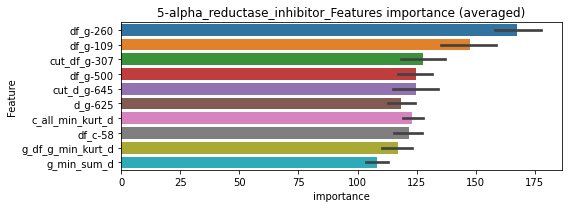

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 5-alpha_reductase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000438203	valid_1's binary_logloss: 0.00177547
[2000]	training's binary_logloss: 0.000267026	valid_1's binary_logloss: 0.00152277
[3000]	training's binary_logloss: 0.000220303	valid_1's binary_logloss: 0.00145763
[4000]	training's binary_logloss: 0.000198343	valid_1's binary_logloss: 0.00142491
Early stopping, best iteration is:
[4599]	training's binary_logloss: 0.000190853	valid_1's binary_logloss: 0.00141318


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 5-alpha_reductase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000442192	valid_1's binary_logloss: 0.0011861
[2000]	training's binary_logloss: 0.000267818	valid_1's binary_logloss: 0.000981029
Early stopping, best iteration is:
[2288]	training's binary_logloss: 0.000249639	valid_1's binary_logloss: 0.000957238


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 5-alpha_reductase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000429099	valid_1's binary_logloss: 0.000396847
[2000]	training's binary_logloss: 0.000264734	valid_1's binary_logloss: 0.000232372
[3000]	training's binary_logloss: 0.000217772	valid_1's binary_logloss: 0.000182573
[4000]	training's binary_logloss: 0.000195103	valid_1's binary_logloss: 0.000157564
[5000]	training's binary_logloss: 0.000182719	valid_1's binary_logloss: 0.000143988
[6000]	training's binary_logloss: 0.000174243	valid_1's binary_logloss: 0.000134914
[7000]	training's binary_logloss: 0.000168017	valid_1's binary_logloss: 0.000128346
[8000]	training's binary_logloss: 0.00016344	valid_1's binary_logloss: 0.000123561
Early stopping, best iteration is:
[8138]	training's binary_logloss: 0.00016287	valid_1's binary_logloss: 0.000122986


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 5-alpha_reductase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000417232	valid_1's binary_logloss: 0.00192141
[2000]	training's binary_logloss: 0.00025609	valid_1's binary_logloss: 0.00167866
[3000]	training's binary_logloss: 0.000205252	valid_1's binary_logloss: 0.00159576
Early stopping, best iteration is:
[3583]	training's binary_logloss: 0.000188694	valid_1's binary_logloss: 0.00157273


5-alpha_reductase_inhibitor logloss: 0.0010168128233233754


neg labels: 3289 → selected neg labels: 3286


11-beta-hsd1_inhibitor, len(trt): 18, len(othr): 3286
target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00120911	valid_1's binary_logloss: 0.00254944
[600]	training's binary_logloss: 0.000355833	valid_1's binary_logloss: 0.00101872
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000355833	valid_1's binary_logloss: 0.00101872
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00120435	valid_1's binary_logloss: 0.00286682
[600]	training's binary_logloss: 0.000362048	valid_1's binary_logloss: 0.00126535
Early stopping, best iteration is:
[589]	training's binary_logloss: 0.000362048	valid_1's binary_logloss: 0.00126535
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00123379	valid_1's binary_logloss: 0.00322015
[600]	training's binary_logloss: 0.000364215	valid_1's binary_logloss: 0.00182115
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.00036515	valid_1's binar

1 / 3 AUC score:1.000
y_Threshold: 0.0017932, Threshold: 0.0051256, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, conf_0:0.00359, conf_1:0.00666
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_1: 0.0051256


[600]	training's binary_logloss: 0.000360677	valid_1's binary_logloss: 0.00076949
Early stopping, best iteration is:
[606]	training's binary_logloss: 0.000360086	valid_1's binary_logloss: 0.000768592


Num_p_label: 3.0, Expected: 3.0, Adj_threshold_2: 0.0351256
threshold: 0.0351256, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00115353	valid_1's binary_logloss: 0.00218174
[600]	training's binary_logloss: 0.000344514	valid_1's binary_logloss: 0.000825913
Early stopping, best iteration is:
[598]	training's binary_logloss: 0.000344514	valid_1's binary_logloss: 0.000825913
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00112329	valid_1's binary_logloss: 0.00273267
Early stopping, best iteration is:
[569]	training's binary_logloss: 0.000348376	valid_1's binary_logloss: 0.00125696
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00113665	valid_1's binary_logloss: 0.00325578
[600]	training's binary_logloss: 0.000351182	valid_1's binary_logloss: 0.0020615
Early stopping, best iteration is:
[608]	training's binary_logloss: 0.000350161	valid_1's binary_logloss: 0.00205996
Training until validation scores don't improve for 30 roun

2 / 3 AUC score:1.000
y_Threshold: 0.0488486, Threshold: 0.0351256, pos_neg_ratio: 0.8000000


[600]	training's binary_logloss: 0.000343003	valid_1's binary_logloss: 0.00067372
Early stopping, best iteration is:
[632]	training's binary_logloss: 0.000341503	valid_1's binary_logloss: 0.000671342


Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0022602 Vs.target_rate: 0.00076
Num_p_label: 9.0, conf_0:0.02810, conf_1:0.04215
Num_p_label: 9.0, Expected: 3.0, Adj_threshold_1: 0.0351256
Num_p_label: 5.0, Expected: 3.0, Adj_threshold_2: 0.0651256
threshold: 0.0651256, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00115353	valid_1's binary_logloss: 0.00218174
[600]	training's binary_logloss: 0.000344514	valid_1's binary_logloss: 0.000825913
Early stopping, best iteration is:
[588]	training's binary_logloss: 0.000344514	valid_1's binary_logloss: 0.000825913
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00112329	valid_1's binary_logloss: 0.00273267
Early stopping, best iteration is:
[569]	training's binary_logloss: 0.000348376	valid_1's binary_logloss: 0.00125696
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00113665	valid_1's binary_logloss: 0.00325578
[600]	training's binary_logloss: 0.000351182	valid_1's binary_logloss: 0.0020615
Early stopping, best iteration is:
[608]	training's binary_logloss: 0.000350161	valid_1's binary_logloss: 0.00205996
Training until validation scores don't improve for 30 roun

3 / 3 AUC score:1.000
y_Threshold: 0.0488486, Threshold: 0.0651256, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0012557 Vs.target_rate: 0.00076
Num_p_label: 5.0, conf_0:0.05861, conf_1:0.07164
Num_p_label: 5.0, Expected: 3.0, Adj_threshold_1: 0.0651256
threshold: 0.0651256, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


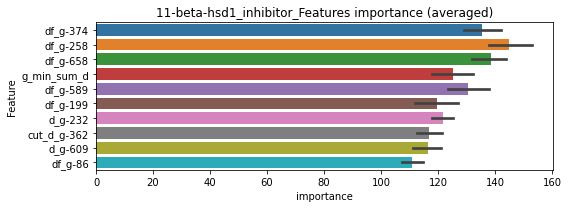

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 11-beta-hsd1_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 11-beta-hsd1_inhibitor=================================


Early stopping, best iteration is:
[531]	training's binary_logloss: 0.000781868	valid_1's binary_logloss: 0.00239739
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000434327	valid_1's binary_logloss: 0.0015205
[2000]	training's binary_logloss: 0.000266992	valid_1's binary_logloss: 0.00127545
[3000]	training's binary_logloss: 0.000218721	valid_1's binary_logloss: 0.00121289
[4000]	training's binary_logloss: 0.00019566	valid_1's binary_logloss: 0.00118146
Early stopping, best iteration is:
[4225]	training's binary_logloss: 0.000192116	valid_1's binary_logloss: 0.00117631


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 11-beta-hsd1_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000437216	valid_1's binary_logloss: 0.00183876
Early stopping, best iteration is:
[1710]	training's binary_logloss: 0.00029104	valid_1's binary_logloss: 0.0016956


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 11-beta-hsd1_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000439191	valid_1's binary_logloss: 0.000934899
Early stopping, best iteration is:
[1692]	training's binary_logloss: 0.000293324	valid_1's binary_logloss: 0.000751138


11-beta-hsd1_inhibitor logloss: 0.0015060460051071894


neg labels: 3289 → selected neg labels: 3282


acat_inhibitor, len(trt): 24, len(othr): 3282
target_rate: 0.0010078 → Adj_target_rate: 0.0012513
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00162503	valid_1's binary_logloss: 0.00854208
[600]	training's binary_logloss: 0.000406651	valid_1's binary_logloss: 0.00562738
Early stopping, best iteration is:
[592]	training's binary_logloss: 0.000408748	valid_1's binary_logloss: 0.00561219
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00172642	valid_1's binary_logloss: 0.00798616
[600]	training's binary_logloss: 0.00041507	valid_1's binary_logloss: 0.00596338
Early stopping, best iteration is:
[621]	training's binary_logloss: 0.000407431	valid_1's binary_logloss: 0.0059476
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00173648	valid_1's binary_logloss: 0.00385374
[600]	training's binary_logloss: 0.000430291	valid_1's binary_logloss: 0.00185215
Early stopping, best iteration is:
[581]	training's binary_logloss: 0.000434692	valid_1's binary

1 / 3 AUC score:1.000
y_Threshold: 0.0025146, Threshold: 0.0063179, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00101
Num_p_label: 40.0, conf_0:0.00442, conf_1:0.00821
Num_p_label: 40.0, Expected: 4.0, Adj_threshold_1: 0.0063179
Num_p_label: 5.0, Expected: 4.0, Adj_threshold_2: 0.0363179
threshold: 0.0363179, positive_p_label: 5.0/3982, p_label_rate: 0.0012557


Early stopping, best iteration is:
[536]	training's binary_logloss: 0.000457803	valid_1's binary_logloss: 0.00892832


positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00153955	valid_1's binary_logloss: 0.00816424
Early stopping, best iteration is:
[569]	training's binary_logloss: 0.000414535	valid_1's binary_logloss: 0.00522512
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0016078	valid_1's binary_logloss: 0.0062355
Early stopping, best iteration is:
[567]	training's binary_logloss: 0.00042429	valid_1's binary_logloss: 0.00407622
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0016213	valid_1's binary_logloss: 0.0045551
[600]	training's binary_logloss: 0.000409499	valid_1's binary_logloss: 0.00263337
Early stopping, best iteration is:
[603]	training's binary_logloss: 0.00040803	valid_1's binary_logloss: 0.0026231
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0015489	valid_1's binary_logloss: 0.0101074


2 / 3 AUC score:1.000
y_Threshold: 0.0211552, Threshold: 0.0363179, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3806
p_label_rate: 0.0027624 Vs.target_rate: 0.00101
Num_p_label: 11.0, conf_0:0.02905, conf_1:0.04358
Num_p_label: 11.0, Expected: 4.0, Adj_threshold_1: 0.0363179
Num_p_label: 8.0, Expected: 4.0, Adj_threshold_2: 0.0663179
threshold: 0.0663179, positive_p_label: 8.0/3982, p_label_rate: 0.0020090


Early stopping, best iteration is:
[557]	training's binary_logloss: 0.000420898	valid_1's binary_logloss: 0.0078937


positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00153955	valid_1's binary_logloss: 0.00816424
Early stopping, best iteration is:
[569]	training's binary_logloss: 0.000414535	valid_1's binary_logloss: 0.00522512
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0016078	valid_1's binary_logloss: 0.0062355
Early stopping, best iteration is:
[567]	training's binary_logloss: 0.00042429	valid_1's binary_logloss: 0.00407622
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0016213	valid_1's binary_logloss: 0.0045551
[600]	training's binary_logloss: 0.000409499	valid_1's binary_logloss: 0.00263337
Early stopping, best iteration is:
[603]	training's binary_logloss: 0.00040803	valid_1's binary_logloss: 0.0026231
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0015489	valid_1's binary_logloss: 0.0101074


3 / 3 AUC score:1.000
y_Threshold: 0.0211552, Threshold: 0.0663179, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3806


Early stopping, best iteration is:
[557]	training's binary_logloss: 0.000420898	valid_1's binary_logloss: 0.0078937


p_label_rate: 0.0020090 Vs.target_rate: 0.00101
Num_p_label: 8.0, conf_0:0.05969, conf_1:0.07295
Num_p_label: 8.0, Expected: 4.0, Adj_threshold_1: 0.0663179
threshold: 0.0663179, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 656.0/3806, y_label_rate: 0.1723594


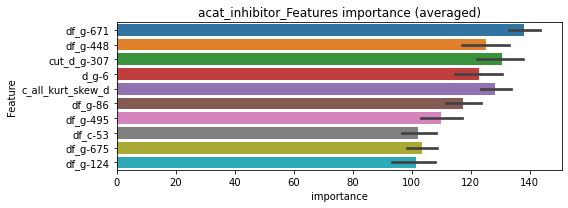

len(train_index) : 2854
len(valid_index) : 952
================================= fold 1/4 acat_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000480235	valid_1's binary_logloss: 0.00114785
[2000]	training's binary_logloss: 0.00027596	valid_1's binary_logloss: 0.000870847
[3000]	training's binary_logloss: 0.000215326	valid_1's binary_logloss: 0.000747283
[4000]	training's binary_logloss: 0.000188926	valid_1's binary_logloss: 0.000684983
[5000]	training's binary_logloss: 0.000175958	valid_1's binary_logloss: 0.000652118
Early stopping, best iteration is:
[5636]	training's binary_logloss: 0.000169742	valid_1's binary_logloss: 0.00063627


len(train_index) : 2854
len(valid_index) : 952
================================= fold 2/4 acat_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000478969	valid_1's binary_logloss: 0.00175331
[2000]	training's binary_logloss: 0.000279638	valid_1's binary_logloss: 0.00149014
Early stopping, best iteration is:
[2131]	training's binary_logloss: 0.000269877	valid_1's binary_logloss: 0.00147441


len(train_index) : 2855
len(valid_index) : 951
================================= fold 3/4 acat_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000478914	valid_1's binary_logloss: 0.00217891
[2000]	training's binary_logloss: 0.000280815	valid_1's binary_logloss: 0.00186163
[3000]	training's binary_logloss: 0.000226109	valid_1's binary_logloss: 0.00177626
Early stopping, best iteration is:
[3068]	training's binary_logloss: 0.00022337	valid_1's binary_logloss: 0.00177235


len(train_index) : 2855
len(valid_index) : 951
================================= fold 4/4 acat_inhibitor=================================


Training until validation scores don't improve for 30 rounds


acat_inhibitor logloss: 0.0026325022137514698


Early stopping, best iteration is:
[501]	training's binary_logloss: 0.000872964	valid_1's binary_logloss: 0.00664996
neg labels: 3289 → selected neg labels: 3261


acetylcholine_receptor_agonist, len(trt): 190, len(othr): 3261
target_rate: 0.0079785 → Adj_target_rate: 0.0072634
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0243793	valid_1's binary_logloss: 0.184858
Early stopping, best iteration is:
[308]	training's binary_logloss: 0.0227982	valid_1's binary_logloss: 0.183665
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0227215	valid_1's binary_logloss: 0.146668
Early stopping, best iteration is:
[351]	training's binary_logloss: 0.0156615	valid_1's binary_logloss: 0.142686
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0231155	valid_1's binary_logloss: 0.159512
Early stopping, best iteration is:
[404]	training's binary_logloss: 0.010981	valid_1's binary_logloss: 0.153804
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0239468	valid_1's binary_logloss: 0.152671


1 / 3 AUC score:0.959
y_Threshold: 0.0551348, Threshold: 0.3003443, pos_neg_ratio: 0.8000000
Remove_noisy_data: 261 → Positive_corect_labels: 587/3652
p_label_rate: 0.0100452 Vs.target_rate: 0.00798
Num_p_label: 40.0, conf_0:0.21024, conf_1:0.39045
threshold: 0.3003443, positive_p_label: 40.0/3982, p_label_rate: 0.0100452


Early stopping, best iteration is:
[389]	training's binary_logloss: 0.0125849	valid_1's binary_logloss: 0.147335


positive_y_label: 587.0/3652, y_label_rate: 0.1607338
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0128875	valid_1's binary_logloss: 0.119681
Early stopping, best iteration is:
[424]	training's binary_logloss: 0.00516239	valid_1's binary_logloss: 0.113561
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0136412	valid_1's binary_logloss: 0.123844
[600]	training's binary_logloss: 0.00225526	valid_1's binary_logloss: 0.115453
Early stopping, best iteration is:
[580]	training's binary_logloss: 0.0024328	valid_1's binary_logloss: 0.114716
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0153511	valid_1's binary_logloss: 0.0858768
[600]	training's binary_logloss: 0.002492	valid_1's binary_logloss: 0.0689696
Early stopping, best iteration is:
[790]	training's binary_logloss: 0.00145326	valid_1's binary_logloss: 0.0671039
Training until validation scores don't improve for 30 rounds
[300]	training's binar

2 / 3 AUC score:0.996
y_Threshold: 0.0465246, Threshold: 0.3003443, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[538]	training's binary_logloss: 0.00311003	valid_1's binary_logloss: 0.0809385


Remove_noisy_data: 70 → Positive_corect_labels: 552.0/3582
p_label_rate: 0.0223506 Vs.target_rate: 0.00798
Num_p_label: 89.0, conf_0:0.24028, conf_1:0.36041
Num_p_label: 89.0, Expected: 31.8, Adj_threshold_1: 0.3003443
Num_p_label: 79.0, Expected: 31.8, Adj_threshold_2: 0.3303443
Num_p_label: 74.0, Expected: 31.8, Adj_threshold_3: 0.3603443
Num_p_label: 67.0, Expected: 31.8, Adj_threshold_4: 0.3903443
Num_p_label: 63.0, Expected: 31.8, Adj_threshold_5: 0.4203443
Num_p_label: 58.0, Expected: 31.8, Adj_threshold_6: 0.4503443
Num_p_label: 52.0, Expected: 31.8, Adj_threshold_7: 0.4803443
Num_p_label: 46.0, Expected: 31.8, Adj_threshold_8: 0.5103443
threshold: 0.5103443, positive_p_label: 46.0/3982, p_label_rate: 0.0115520
positive_y_label: 552.0/3582, y_label_rate: 0.1541039
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0105999	valid_1's binary_logloss: 0.0941185
Early stopping, best iteration is:
[426]	training's binary_logloss: 0.00417385	valid_1's binary_logloss: 0.0873615
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.011117	valid_1's binary_logloss: 0.0840739
Early stopping, best iteration is:
[445]	training's binary_logloss: 0.00385562	valid_1's binary_logloss: 0.0763702
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0104	valid_1's binary_logloss: 0.0940174
Early stopping, best iteration is:
[419]	training's binary_logloss: 0.00426593	valid_1's binary_logloss: 0.0891878
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0107948	valid_1's binary_logloss: 0.0956266


3 / 3 AUC score:0.992
y_Threshold: 0.0527268, Threshold: 0.5103443, pos_neg_ratio: 0.8000000
Remove_noisy_data: 54 → Positive_corect_labels: 525.0/3528


Early stopping, best iteration is:
[377]	training's binary_logloss: 0.00581973	valid_1's binary_logloss: 0.0919345


p_label_rate: 0.0128076 Vs.target_rate: 0.00798
Num_p_label: 51.0, conf_0:0.45931, conf_1:0.56138
Num_p_label: 51.0, Expected: 31.8, Adj_threshold_1: 0.5103443
Num_p_label: 46.0, Expected: 31.8, Adj_threshold_2: 0.5403443
threshold: 0.5403443, positive_p_label: 46.0/3982, p_label_rate: 0.0115520
positive_y_label: 525.0/3528, y_label_rate: 0.1488095


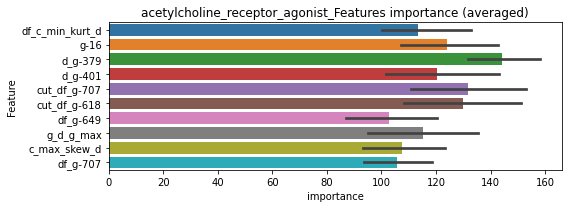

len(train_index) : 2646
len(valid_index) : 882
================================= fold 1/4 acetylcholine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000605716	valid_1's binary_logloss: 0.005247
[2000]	training's binary_logloss: 0.000342229	valid_1's binary_logloss: 0.00471494
[3000]	training's binary_logloss: 0.000266497	valid_1's binary_logloss: 0.0045339
Early stopping, best iteration is:
[3857]	training's binary_logloss: 0.000232763	valid_1's binary_logloss: 0.00445344


len(train_index) : 2646
len(valid_index) : 882
================================= fold 2/4 acetylcholine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000612868	valid_1's binary_logloss: 0.00291881
Early stopping, best iteration is:
[1154]	training's binary_logloss: 0.000539538	valid_1's binary_logloss: 0.00282676


len(train_index) : 2646
len(valid_index) : 882
================================= fold 3/4 acetylcholine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000600406	valid_1's binary_logloss: 0.000845368
[2000]	training's binary_logloss: 0.000340658	valid_1's binary_logloss: 0.000467938
[3000]	training's binary_logloss: 0.000265346	valid_1's binary_logloss: 0.000348089
[4000]	training's binary_logloss: 0.000231652	valid_1's binary_logloss: 0.000292944
[5000]	training's binary_logloss: 0.000214268	valid_1's binary_logloss: 0.000264225
[6000]	training's binary_logloss: 0.000202299	valid_1's binary_logloss: 0.000245006
[7000]	training's binary_logloss: 0.000193812	valid_1's binary_logloss: 0.000231191
[8000]	training's binary_logloss: 0.000187665	valid_1's binary_logloss: 0.00022158
Early stopping, best iteration is:
[8722]	training's binary_logloss: 0.000183985	valid_1's binary_logloss: 0.000215667


len(train_index) : 2646
len(valid_index) : 882
================================= fold 4/4 acetylcholine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000639468	valid_1's binary_logloss: 0.00375982
Early stopping, best iteration is:
[1733]	training's binary_logloss: 0.000392364	valid_1's binary_logloss: 0.00339346


acetylcholine_receptor_agonist logloss: 0.002723207991161986


neg labels: 3289 → selected neg labels: 3241


acetylcholine_receptor_antagonist, len(trt): 301, len(othr): 3241
target_rate: 0.0126396 → Adj_target_rate: 0.0107394
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0440126	valid_1's binary_logloss: 0.26895
Early stopping, best iteration is:
[331]	training's binary_logloss: 0.0366257	valid_1's binary_logloss: 0.267897
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[257]	training's binary_logloss: 0.0556079	valid_1's binary_logloss: 0.289224
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0453579	valid_1's binary_logloss: 0.25407
Early stopping, best iteration is:
[330]	training's binary_logloss: 0.0379521	valid_1's binary_logloss: 0.253689
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0453027	valid_1's binary_logloss: 0.256731


1 / 3 AUC score:0.866
y_Threshold: 0.0928631, Threshold: 0.1959189, pos_neg_ratio: 0.8000000
Remove_noisy_data: 480 → Positive_corect_labels: 473/3409
p_label_rate: 0.0100452 Vs.target_rate: 0.01264
Num_p_label: 40.0, conf_0:0.13714, conf_1:0.25469


Early stopping, best iteration is:
[375]	training's binary_logloss: 0.0293047	valid_1's binary_logloss: 0.254286


threshold: 0.1959189, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 473.0/3409, y_label_rate: 0.1387504
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0152185	valid_1's binary_logloss: 0.140558
Early stopping, best iteration is:
[440]	training's binary_logloss: 0.00560762	valid_1's binary_logloss: 0.131564
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0169885	valid_1's binary_logloss: 0.103142
[600]	training's binary_logloss: 0.00289949	valid_1's binary_logloss: 0.0864657
Early stopping, best iteration is:
[719]	training's binary_logloss: 0.00196676	valid_1's binary_logloss: 0.0853337
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0159791	valid_1's binary_logloss: 0.121384
Early stopping, best iteration is:
[472]	training's binary_logloss: 0.00491143	valid_1's binary_logloss: 0.111228
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0160648	valid_1's binary_logloss: 0.1267


2 / 3 AUC score:0.991
y_Threshold: 0.0571775, Threshold: 0.1959189, pos_neg_ratio: 0.8000000
Remove_noisy_data: 86 → Positive_corect_labels: 430.0/3323
p_label_rate: 0.0075339 Vs.target_rate: 0.01264
Num_p_label: 30.0, conf_0:0.15674, conf_1:0.23510
Num_p_label: 30.0, Expected: 50.3, Adj_threshold_1: 0.1959189


Early stopping, best iteration is:
[458]	training's binary_logloss: 0.00532093	valid_1's binary_logloss: 0.117403


Num_p_label: 35.0, Expected: 50.3, Adj_threshold_2: 0.1659189
threshold: 0.1659189, positive_p_label: 35.0/3982, p_label_rate: 0.0087896
positive_y_label: 430.0/3323, y_label_rate: 0.1294011
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0106016	valid_1's binary_logloss: 0.125562
Early stopping, best iteration is:
[398]	training's binary_logloss: 0.00510164	valid_1's binary_logloss: 0.1208
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0122363	valid_1's binary_logloss: 0.105692
Early stopping, best iteration is:
[455]	training's binary_logloss: 0.00408941	valid_1's binary_logloss: 0.0990757
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0121115	valid_1's binary_logloss: 0.102581
Early stopping, best iteration is:
[479]	training's binary_logloss: 0.0036028	valid_1's binary_logloss: 0.0974796
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.012089	valid_1's binary_logloss: 0.110354


3 / 3 AUC score:0.992
y_Threshold: 0.0506559, Threshold: 0.1659189, pos_neg_ratio: 0.8000000
Remove_noisy_data: 60 → Positive_corect_labels: 400.0/3263


Early stopping, best iteration is:
[462]	training's binary_logloss: 0.00387906	valid_1's binary_logloss: 0.103754


p_label_rate: 0.0082873 Vs.target_rate: 0.01264
Num_p_label: 33.0, conf_0:0.14933, conf_1:0.18251
Num_p_label: 33.0, Expected: 50.3, Adj_threshold_1: 0.1659189
Num_p_label: 42.0, Expected: 50.3, Adj_threshold_2: 0.1359189
threshold: 0.1359189, positive_p_label: 42.0/3982, p_label_rate: 0.0105475
positive_y_label: 400.0/3263, y_label_rate: 0.1225866


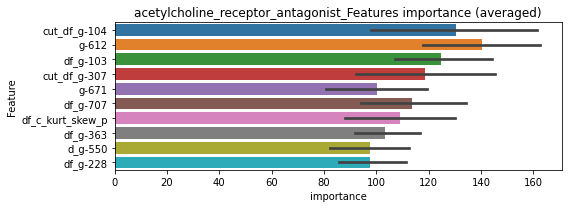

len(train_index) : 2447
len(valid_index) : 816
================================= fold 1/4 acetylcholine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2447
len(valid_index) : 816
================================= fold 2/4 acetylcholine_receptor_antagonist=================================


Early stopping, best iteration is:
[250]	training's binary_logloss: 0.00299763	valid_1's binary_logloss: 0.0125136
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000667884	valid_1's binary_logloss: 0.00257491
Early stopping, best iteration is:
[1627]	training's binary_logloss: 0.000436545	valid_1's binary_logloss: 0.00216876


len(train_index) : 2447
len(valid_index) : 816
================================= fold 3/4 acetylcholine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000663504	valid_1's binary_logloss: 0.00295105
Early stopping, best iteration is:
[1725]	training's binary_logloss: 0.000416477	valid_1's binary_logloss: 0.00253801


len(train_index) : 2448
len(valid_index) : 815
================================= fold 4/4 acetylcholine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000664872	valid_1's binary_logloss: 0.0014645
[2000]	training's binary_logloss: 0.000377296	valid_1's binary_logloss: 0.000976962
[3000]	training's binary_logloss: 0.000291907	valid_1's binary_logloss: 0.000825365
[4000]	training's binary_logloss: 0.000253809	valid_1's binary_logloss: 0.000752144
Early stopping, best iteration is:
[4158]	training's binary_logloss: 0.000250118	valid_1's binary_logloss: 0.000742572


acetylcholine_receptor_antagonist logloss: 0.004492896332582764


neg labels: 3289 → selected neg labels: 3281


acetylcholinesterase_inhibitor, len(trt): 73, len(othr): 3281
target_rate: 0.0030654 → Adj_target_rate: 0.0032212
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00659537	valid_1's binary_logloss: 0.0564017
Early stopping, best iteration is:
[555]	training's binary_logloss: 0.00133935	valid_1's binary_logloss: 0.0474258
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00736521	valid_1's binary_logloss: 0.0414954
[600]	training's binary_logloss: 0.00120211	valid_1's binary_logloss: 0.0310088
Early stopping, best iteration is:
[739]	training's binary_logloss: 0.000858699	valid_1's binary_logloss: 0.0301147
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00792672	valid_1's binary_logloss: 0.0302735
[600]	training's binary_logloss: 0.00130069	valid_1's binary_logloss: 0.0192303
Early stopping, best iteration is:
[790]	training's binary_logloss: 0.000844871	valid_1's binary_logloss: 0.0185199
Training until validation scores don't improve for 30 rounds
[300]	tra

1 / 3 AUC score:0.998
y_Threshold: 0.0105554, Threshold: 0.0379592, pos_neg_ratio: 0.8000000
Remove_noisy_data: 146 → Positive_corect_labels: 649/3791
p_label_rate: 0.0100452 Vs.target_rate: 0.00307
Num_p_label: 40.0, conf_0:0.02657, conf_1:0.04935
Num_p_label: 40.0, Expected: 12.2, Adj_threshold_1: 0.0379592


Early stopping, best iteration is:
[480]	training's binary_logloss: 0.00196017	valid_1's binary_logloss: 0.0611581


Num_p_label: 15.0, Expected: 12.2, Adj_threshold_2: 0.0679592
threshold: 0.0679592, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 649.0/3791, y_label_rate: 0.1711949
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00614864	valid_1's binary_logloss: 0.0520144
[600]	training's binary_logloss: 0.00109989	valid_1's binary_logloss: 0.0434382
Early stopping, best iteration is:
[649]	training's binary_logloss: 0.000963337	valid_1's binary_logloss: 0.0432926
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00642963	valid_1's binary_logloss: 0.0416986
Early stopping, best iteration is:
[495]	training's binary_logloss: 0.00166894	valid_1's binary_logloss: 0.0352269
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00657618	valid_1's binary_logloss: 0.0343175
[600]	training's binary_logloss: 0.00114906	valid_1's binary_logloss: 0.0227064
Early stopping, best iteration is:
[741]	training's binary_logloss: 0.000820449	valid_1's binary_logloss: 0.0217981
Training until validation scores don't improve for 30 rounds
[300]	tra

2 / 3 AUC score:1.000
y_Threshold: 0.0373716, Threshold: 0.0679592, pos_neg_ratio: 0.8000000
Remove_noisy_data: 14 → Positive_corect_labels: 642.0/3777
p_label_rate: 0.0113009 Vs.target_rate: 0.00307
Num_p_label: 45.0, conf_0:0.05437, conf_1:0.08155
Num_p_label: 45.0, Expected: 12.2, Adj_threshold_1: 0.0679592
Num_p_label: 27.0, Expected: 12.2, Adj_threshold_2: 0.0979592
Num_p_label: 26.0, Expected: 12.2, Adj_threshold_3: 0.1279592
Num_p_label: 19.0, Expected: 12.2, Adj_threshold_4: 0.1579592
Num_p_label: 13.0, Expected: 12.2, Adj_threshold_5: 0.1879592
threshold: 0.1879592, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 642.0/3777, y_label_rate: 0.1699762
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00608979	valid_1's binary_logloss: 0.0409067
[600]	training's binary_logloss: 0.00105985	valid_1's binary_logloss: 0.0317601
Early stopping, best iteration is:
[620]	training's binary_logloss: 0.00100155	valid_1's binary_logloss: 0.0316028
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00607231	valid_1's binary_logloss: 0.0351632
[600]	training's binary_logloss: 0.00105637	valid_1's binary_logloss: 0.0243851
Early stopping, best iteration is:
[790]	training's binary_logloss: 0.000715761	valid_1's binary_logloss: 0.0231488
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00599456	valid_1's binary_logloss: 0.0324149
[600]	training's binary_logloss: 0.00106879	valid_1's binary_logloss: 0.0213303
Early stopping, best iteration is:
[785]	training's binary_logloss: 0.000728225	valid_1's binary_logloss: 

3 / 3 AUC score:1.000
y_Threshold: 0.0440069, Threshold: 0.1879592, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 639.0/3771
p_label_rate: 0.0040181 Vs.target_rate: 0.00307
Num_p_label: 16.0, conf_0:0.16916, conf_1:0.20676
threshold: 0.1879592, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 639.0/3771, y_label_rate: 0.1694511


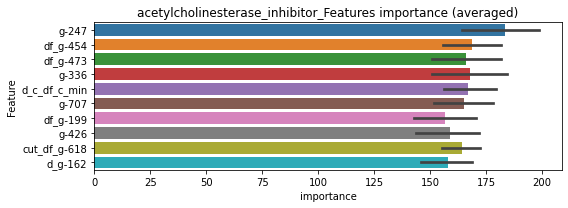

len(train_index) : 2828
len(valid_index) : 943
================================= fold 1/4 acetylcholinesterase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000561084	valid_1's binary_logloss: 0.00300938
[2000]	training's binary_logloss: 0.000322033	valid_1's binary_logloss: 0.00265539
Early stopping, best iteration is:
[2258]	training's binary_logloss: 0.000298762	valid_1's binary_logloss: 0.00260405


len(train_index) : 2828
len(valid_index) : 943
================================= fold 2/4 acetylcholinesterase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000550279	valid_1's binary_logloss: 0.00656768
[2000]	training's binary_logloss: 0.000314187	valid_1's binary_logloss: 0.00612902
Early stopping, best iteration is:
[2042]	training's binary_logloss: 0.000310298	valid_1's binary_logloss: 0.00611999


len(train_index) : 2828
len(valid_index) : 943
================================= fold 3/4 acetylcholinesterase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000569692	valid_1's binary_logloss: 0.00136371
Early stopping, best iteration is:
[1499]	training's binary_logloss: 0.000395963	valid_1's binary_logloss: 0.00116849


len(train_index) : 2829
len(valid_index) : 942
================================= fold 4/4 acetylcholinesterase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000542253	valid_1's binary_logloss: 0.00416286
Early stopping, best iteration is:
[1222]	training's binary_logloss: 0.000458271	valid_1's binary_logloss: 0.0040616


acetylcholinesterase_inhibitor logloss: 0.0034896816199607504


neg labels: 3289 → selected neg labels: 3278


adenosine_receptor_agonist, len(trt): 54, len(othr): 3278
target_rate: 0.0022676 → Adj_target_rate: 0.0024931
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00414779	valid_1's binary_logloss: 0.0261265
[600]	training's binary_logloss: 0.000792127	valid_1's binary_logloss: 0.0180797
Early stopping, best iteration is:
[730]	training's binary_logloss: 0.000615429	valid_1's binary_logloss: 0.0175421
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00436173	valid_1's binary_logloss: 0.0136744
[600]	training's binary_logloss: 0.000819789	valid_1's binary_logloss: 0.00702757
Early stopping, best iteration is:
[789]	training's binary_logloss: 0.000598823	valid_1's binary_logloss: 0.00649851
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00431251	valid_1's binary_logloss: 0.0209137
[600]	training's binary_logloss: 0.000794743	valid_1's binary_logloss: 0.0134546
Early stopping, best iteration is:
[662]	training's binary_logloss: 0.000686516	valid_1's binary_log

1 / 3 AUC score:1.000
y_Threshold: 0.0055236, Threshold: 0.0200949, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 655/3801
p_label_rate: 0.0100452 Vs.target_rate: 0.00227
Num_p_label: 40.0, conf_0:0.01407, conf_1:0.02612
Num_p_label: 40.0, Expected: 9.0, Adj_threshold_1: 0.0200949
Num_p_label: 11.0, Expected: 9.0, Adj_threshold_2: 0.0500949
threshold: 0.0500949, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 655.0/3801, y_label_rate: 0.1723231
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00382997	valid_1's binary_logloss: 0.0227
[600]	training's binary_logloss: 0.000752521	valid_1's binary_logloss: 0.015765
Early stopping, best iteration is:
[625]	training's binary_logloss: 0.000707592	valid_1's binary_logloss: 0.0157385
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00421333	valid_1's binary_logloss: 0.0131017
[600]	training's binary_logloss: 0.000797627	valid_1's binary_logloss: 0.00683513
Early stopping, best iteration is:
[672]	training's binary_logloss: 0.000674426	valid_1's binary_logloss: 0.00662707
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0040107	valid_1's binary_logloss: 0.017042
[600]	training's binary_logloss: 0.000770539	valid_1's binary_logloss: 0.00995451
Early stopping, best iteration is:
[643]	training's binary_logloss: 0.00069569	valid_1's binary_logloss: 

2 / 3 AUC score:1.000
y_Threshold: 0.0281178, Threshold: 0.0500949, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 654.0/3799
p_label_rate: 0.0072828 Vs.target_rate: 0.00227
Num_p_label: 29.0, conf_0:0.04008, conf_1:0.06011
Num_p_label: 29.0, Expected: 9.0, Adj_threshold_1: 0.0500949
Num_p_label: 11.0, Expected: 9.0, Adj_threshold_2: 0.0800949
threshold: 0.0800949, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 654.0/3799, y_label_rate: 0.1721506
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00386096	valid_1's binary_logloss: 0.0244435
[600]	training's binary_logloss: 0.000745078	valid_1's binary_logloss: 0.0170596
Early stopping, best iteration is:
[667]	training's binary_logloss: 0.000641931	valid_1's binary_logloss: 0.0167828
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00410888	valid_1's binary_logloss: 0.0112553
[600]	training's binary_logloss: 0.000789906	valid_1's binary_logloss: 0.00465672
Early stopping, best iteration is:
[772]	training's binary_logloss: 0.000584469	valid_1's binary_logloss: 0.00418139
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00406062	valid_1's binary_logloss: 0.0106449
[600]	training's binary_logloss: 0.000787815	valid_1's binary_logloss: 0.00392183
Early stopping, best iteration is:
[793]	training's binary_logloss: 0.000576749	valid_1's binary_lo

3 / 3 AUC score:1.000
y_Threshold: 0.0322117, Threshold: 0.0800949, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 653.0/3797
p_label_rate: 0.0030136 Vs.target_rate: 0.00227
Num_p_label: 12.0, conf_0:0.07209, conf_1:0.08810
threshold: 0.0800949, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 653.0/3797, y_label_rate: 0.1719779


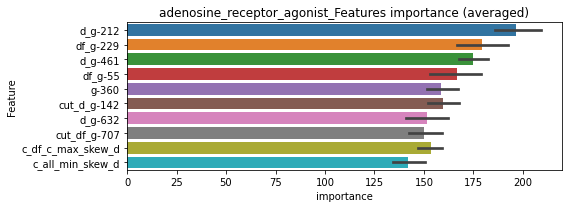

len(train_index) : 2847
len(valid_index) : 950
================================= fold 1/4 adenosine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000531907	valid_1's binary_logloss: 0.00608375
Early stopping, best iteration is:
[1164]	training's binary_logloss: 0.0004654	valid_1's binary_logloss: 0.00597076


len(train_index) : 2848
len(valid_index) : 949
================================= fold 2/4 adenosine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000527158	valid_1's binary_logloss: 0.00120255
Early stopping, best iteration is:
[1267]	training's binary_logloss: 0.000431115	valid_1's binary_logloss: 0.00108442


len(train_index) : 2848
len(valid_index) : 949
================================= fold 3/4 adenosine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000526814	valid_1's binary_logloss: 0.00130694
Early stopping, best iteration is:
[1480]	training's binary_logloss: 0.000376188	valid_1's binary_logloss: 0.00111591


len(train_index) : 2848
len(valid_index) : 949
================================= fold 4/4 adenosine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000518304	valid_1's binary_logloss: 0.000887349
[2000]	training's binary_logloss: 0.000300846	valid_1's binary_logloss: 0.000620154
[3000]	training's binary_logloss: 0.000237021	valid_1's binary_logloss: 0.00053145
[4000]	training's binary_logloss: 0.000206851	valid_1's binary_logloss: 0.000495002
Early stopping, best iteration is:
[4639]	training's binary_logloss: 0.000195833	valid_1's binary_logloss: 0.00048069


adenosine_receptor_agonist logloss: 0.0021646004289114142


neg labels: 3289 → selected neg labels: 3276


adenosine_receptor_antagonist, len(trt): 96, len(othr): 3276
target_rate: 0.0040312 → Adj_target_rate: 0.0040656
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0113497	valid_1's binary_logloss: 0.0664098
[600]	training's binary_logloss: 0.00172002	valid_1's binary_logloss: 0.0512612
Early stopping, best iteration is:
[695]	training's binary_logloss: 0.00127243	valid_1's binary_logloss: 0.0501966
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0119805	valid_1's binary_logloss: 0.0546559
[600]	training's binary_logloss: 0.00179558	valid_1's binary_logloss: 0.035503
[900]	training's binary_logloss: 0.000902643	valid_1's binary_logloss: 0.0334829
Early stopping, best iteration is:
[927]	training's binary_logloss: 0.000880534	valid_1's binary_logloss: 0.0334404
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0108294	valid_1's binary_logloss: 0.0729182
Early stopping, best iteration is:
[490]	training's binary_logloss: 0.0026922	valid_1's binary_logloss: 0.063

1 / 3 AUC score:0.994
y_Threshold: 0.0138603, Threshold: 0.0424560, pos_neg_ratio: 0.8000000
Remove_noisy_data: 158 → Positive_corect_labels: 642/3773


Early stopping, best iteration is:
[527]	training's binary_logloss: 0.00241157	valid_1's binary_logloss: 0.0656415


p_label_rate: 0.0100452 Vs.target_rate: 0.00403
Num_p_label: 40.0, conf_0:0.02972, conf_1:0.05519
Num_p_label: 40.0, Expected: 16.1, Adj_threshold_1: 0.0424560
Num_p_label: 14.0, Expected: 16.1, Adj_threshold_2: 0.0724560
threshold: 0.0724560, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 642.0/3773, y_label_rate: 0.1701564
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00966352	valid_1's binary_logloss: 0.050999
[600]	training's binary_logloss: 0.00152238	valid_1's binary_logloss: 0.0348116
[900]	training's binary_logloss: 0.000809481	valid_1's binary_logloss: 0.032355
Early stopping, best iteration is:
[934]	training's binary_logloss: 0.000784447	valid_1's binary_logloss: 0.0322631
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00930805	valid_1's binary_logloss: 0.0617265
[600]	training's binary_logloss: 0.00146969	valid_1's binary_logloss: 0.0468866
Early stopping, best iteration is:
[775]	training's binary_logloss: 0.00094016	valid_1's binary_logloss: 0.0454206
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00958495	valid_1's binary_logloss: 0.0480048
[600]	training's binary_logloss: 0.00150146	valid_1's binary_logloss: 0.0356303
Early stopping, best iterat

2 / 3 AUC score:0.999
y_Threshold: 0.0368226, Threshold: 0.0724560, pos_neg_ratio: 0.8000000
Remove_noisy_data: 20 → Positive_corect_labels: 632.0/3753
p_label_rate: 0.0082873 Vs.target_rate: 0.00403
Num_p_label: 33.0, conf_0:0.05796, conf_1:0.08695
Num_p_label: 33.0, Expected: 16.1, Adj_threshold_1: 0.0724560
Num_p_label: 21.0, Expected: 16.1, Adj_threshold_2: 0.1024560
threshold: 0.1024560, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 632.0/3753, y_label_rate: 0.1683986
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00875128	valid_1's binary_logloss: 0.0557224
[600]	training's binary_logloss: 0.00140658	valid_1's binary_logloss: 0.0402282
Early stopping, best iteration is:
[808]	training's binary_logloss: 0.000854158	valid_1's binary_logloss: 0.0393845
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00824305	valid_1's binary_logloss: 0.0481843
[600]	training's binary_logloss: 0.00137458	valid_1's binary_logloss: 0.0346747
Early stopping, best iteration is:
[775]	training's binary_logloss: 0.000902569	valid_1's binary_logloss: 0.0331121
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00864167	valid_1's binary_logloss: 0.0394769
[600]	training's binary_logloss: 0.00139359	valid_1's binary_logloss: 0.0240643
Early stopping, best iteration is:
[808]	training's binary_logloss: 0.000858316	valid_1's binary_logloss:

3 / 3 AUC score:0.999
y_Threshold: 0.0252736, Threshold: 0.1024560, pos_neg_ratio: 0.8000000
Remove_noisy_data: 12 → Positive_corect_labels: 626.0/3741
p_label_rate: 0.0080362 Vs.target_rate: 0.00403
Num_p_label: 32.0, conf_0:0.09221, conf_1:0.11270
Num_p_label: 32.0, Expected: 16.1, Adj_threshold_1: 0.1024560
Num_p_label: 20.0, Expected: 16.1, Adj_threshold_2: 0.1324560
threshold: 0.1324560, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 626.0/3741, y_label_rate: 0.1673349


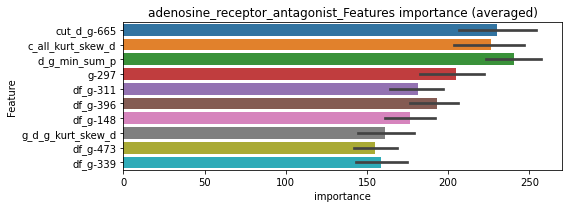

len(train_index) : 2805
len(valid_index) : 936
================================= fold 1/4 adenosine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00057474	valid_1's binary_logloss: 0.00368982
Early stopping, best iteration is:
[1503]	training's binary_logloss: 0.000399159	valid_1's binary_logloss: 0.00348444


len(train_index) : 2806
len(valid_index) : 935
================================= fold 2/4 adenosine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000465997	valid_1's binary_logloss: 0.000684352
[2000]	training's binary_logloss: 0.000256002	valid_1's binary_logloss: 0.000376903
[3000]	training's binary_logloss: 0.00018762	valid_1's binary_logloss: 0.000276483
[4000]	training's binary_logloss: 0.000155326	valid_1's binary_logloss: 0.000229026
[5000]	training's binary_logloss: 0.000138857	valid_1's binary_logloss: 0.000204805
[6000]	training's binary_logloss: 0.000128266	valid_1's binary_logloss: 0.000189192
[7000]	training's binary_logloss: 0.000120901	valid_1's binary_logloss: 0.000178327
[8000]	training's binary_logloss: 0.000115865	valid_1's binary_logloss: 0.000170906
[9000]	training's binary_logloss: 0.000112298	valid_1's binary_logloss: 0.000165652
[10000]	training's binary_logloss: 0.000109727	valid_1's binary_logloss: 0.000161868
Did not meet early stopping. Best iteration is:
[9999]	training's binary_logloss: 0.000109727	valid

len(train_index) : 2806
len(valid_index) : 935
================================= fold 3/4 adenosine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000575984	valid_1's binary_logloss: 0.00135358
Early stopping, best iteration is:
[1682]	training's binary_logloss: 0.000366788	valid_1's binary_logloss: 0.00114469


len(train_index) : 2806
len(valid_index) : 935
================================= fold 4/4 adenosine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000588849	valid_1's binary_logloss: 0.00177757
[2000]	training's binary_logloss: 0.000333629	valid_1's binary_logloss: 0.00139885
Early stopping, best iteration is:
[2084]	training's binary_logloss: 0.000324836	valid_1's binary_logloss: 0.00138294


adenosine_receptor_antagonist logloss: 0.0015444769460825943


neg labels: 3289 → selected neg labels: 3289


adenylyl_cyclase_activator, len(trt): 18, len(othr): 3289
target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00128328	valid_1's binary_logloss: 0.00234912
Early stopping, best iteration is:
[559]	training's binary_logloss: 0.000383014	valid_1's binary_logloss: 0.000866851
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00124703	valid_1's binary_logloss: 0.00395447
[600]	training's binary_logloss: 0.000372288	valid_1's binary_logloss: 0.00192643
Early stopping, best iteration is:
[573]	training's binary_logloss: 0.000372498	valid_1's binary_logloss: 0.00192568
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00128185	valid_1's binary_logloss: 0.00352184
[600]	training's binary_logloss: 0.000367741	valid_1's binary_logloss: 0.0019223
Early stopping, best iteration is:
[608]	training's binary_logloss: 0.000366653	valid_1's binary_logloss: 0.00191855
Training until validation scores don't improve for 30 round

1 / 3 AUC score:1.000
y_Threshold: 0.0021994, Threshold: 0.0105971, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, conf_0:0.00742, conf_1:0.01378
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_1: 0.0105971
Num_p_label: 9.0, Expected: 3.0, Adj_threshold_2: 0.0405971
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_3: 0.0705971


[600]	training's binary_logloss: 0.000376284	valid_1's binary_logloss: 0.00144763
Early stopping, best iteration is:
[575]	training's binary_logloss: 0.000376284	valid_1's binary_logloss: 0.00144763


threshold: 0.0705971, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00115774	valid_1's binary_logloss: 0.00194435
[600]	training's binary_logloss: 0.000349531	valid_1's binary_logloss: 0.000707706
Early stopping, best iteration is:
[606]	training's binary_logloss: 0.000349019	valid_1's binary_logloss: 0.000707417
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00112844	valid_1's binary_logloss: 0.0031596
[600]	training's binary_logloss: 0.000344027	valid_1's binary_logloss: 0.00151497
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000344027	valid_1's binary_logloss: 0.00151497
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00117429	valid_1's binary_logloss: 0.00222141
[600]	training's binary_logloss: 0.000349461	valid_1's binary_logloss: 0.00096146
Early stopping, best iteration is:
[599]	training's binary_logloss: 0.000349461	valid_1's bin

2 / 3 AUC score:1.000
y_Threshold: 0.1368994, Threshold: 0.0705971, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0090407 Vs.target_rate: 0.00076
Num_p_label: 36.0, conf_0:0.05648, conf_1:0.08472
Num_p_label: 36.0, Expected: 3.0, Adj_threshold_1: 0.0705971
Num_p_label: 26.0, Expected: 3.0, Adj_threshold_2: 0.1005971
Num_p_label: 23.0, Expected: 3.0, Adj_threshold_3: 0.1305971
Num_p_label: 20.0, Expected: 3.0, Adj_threshold_4: 0.1605971


[600]	training's binary_logloss: 0.000347605	valid_1's binary_logloss: 0.00115572
Early stopping, best iteration is:
[582]	training's binary_logloss: 0.000349493	valid_1's binary_logloss: 0.00115487


Num_p_label: 17.0, Expected: 3.0, Adj_threshold_5: 0.1905971
Num_p_label: 14.0, Expected: 3.0, Adj_threshold_6: 0.2205971
Num_p_label: 10.0, Expected: 3.0, Adj_threshold_7: 0.2505971
Num_p_label: 9.0, Expected: 3.0, Adj_threshold_8: 0.2805971
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_9: 0.3105971
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_10: 0.3405971
threshold: 0.3705971, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00115774	valid_1's binary_logloss: 0.00194435
[600]	training's binary_logloss: 0.000349531	valid_1's binary_logloss: 0.000707706
Early stopping, best iteration is:
[606]	training's binary_logloss: 0.000349019	valid_1's binary_logloss: 0.000707417
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00112844	valid_1's binary_logloss: 0.0031596
[600]	training's binary_logloss: 0.000344027	valid_1's binary_logloss: 0.00151497
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000344027	valid_1's binary_logloss: 0.00151497
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00117429	valid_1's binary_logloss: 0.00222141
[600]	training's binary_logloss: 0.000349461	valid_1's binary_logloss: 0.00096146
Early stopping, best iteration is:
[600]	training's binary_logloss: 0.000349461	valid_1's bin

3 / 3 AUC score:1.000
y_Threshold: 0.1368994, Threshold: 0.3705971, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813


[600]	training's binary_logloss: 0.000347605	valid_1's binary_logloss: 0.00115572
Early stopping, best iteration is:
[582]	training's binary_logloss: 0.000349493	valid_1's binary_logloss: 0.00115487


p_label_rate: 0.0017579 Vs.target_rate: 0.00076
Num_p_label: 7.0, conf_0:0.33354, conf_1:0.40766
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_1: 0.3705971
threshold: 0.3705971, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


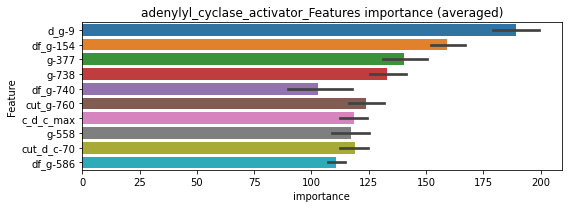

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 adenylyl_cyclase_activator=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000438072	valid_1's binary_logloss: 0.000715947
[2000]	training's binary_logloss: 0.000268028	valid_1's binary_logloss: 0.000502742
Early stopping, best iteration is:
[2676]	training's binary_logloss: 0.000229083	valid_1's binary_logloss: 0.000454072


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 adenylyl_cyclase_activator=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000428558	valid_1's binary_logloss: 0.00269266
[2000]	training's binary_logloss: 0.000262419	valid_1's binary_logloss: 0.00238072
[3000]	training's binary_logloss: 0.000214439	valid_1's binary_logloss: 0.00230228
[4000]	training's binary_logloss: 0.000190181	valid_1's binary_logloss: 0.00226907
[5000]	training's binary_logloss: 0.000177288	valid_1's binary_logloss: 0.0022521
Early stopping, best iteration is:
[5676]	training's binary_logloss: 0.000170894	valid_1's binary_logloss: 0.00224315


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 adenylyl_cyclase_activator=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000446613	valid_1's binary_logloss: 0.000906088
Early stopping, best iteration is:
[1746]	training's binary_logloss: 0.000294059	valid_1's binary_logloss: 0.000715635


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 adenylyl_cyclase_activator=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000441095	valid_1's binary_logloss: 0.00175253
Early stopping, best iteration is:
[1777]	training's binary_logloss: 0.000287495	valid_1's binary_logloss: 0.00148723


adenylyl_cyclase_activator logloss: 0.001225364305109442


neg labels: 3289 → selected neg labels: 3254


adrenergic_receptor_agonist, len(trt): 270, len(othr): 3254
target_rate: 0.0113379 → Adj_target_rate: 0.0097917
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.036525	valid_1's binary_logloss: 0.235216
Early stopping, best iteration is:
[389]	training's binary_logloss: 0.0208398	valid_1's binary_logloss: 0.229881
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0392335	valid_1's binary_logloss: 0.259359
Early stopping, best iteration is:
[332]	training's binary_logloss: 0.0321711	valid_1's binary_logloss: 0.258254
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0391718	valid_1's binary_logloss: 0.223622
Early stopping, best iteration is:
[361]	training's binary_logloss: 0.0262156	valid_1's binary_logloss: 0.219617
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0392415	valid_1's binary_logloss: 0.23194


1 / 3 AUC score:0.907
y_Threshold: 0.0783445, Threshold: 0.5034082, pos_neg_ratio: 0.8000000
Remove_noisy_data: 427 → Positive_corect_labels: 502/3477
p_label_rate: 0.0100452 Vs.target_rate: 0.01134
Num_p_label: 40.0, conf_0:0.35239, conf_1:0.65443
threshold: 0.5034082, positive_p_label: 40.0/3982, p_label_rate: 0.0100452


Early stopping, best iteration is:
[350]	training's binary_logloss: 0.0282208	valid_1's binary_logloss: 0.230362


positive_y_label: 502.0/3477, y_label_rate: 0.1443773
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0149355	valid_1's binary_logloss: 0.125294
Early stopping, best iteration is:
[526]	training's binary_logloss: 0.00355543	valid_1's binary_logloss: 0.114194
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0165533	valid_1's binary_logloss: 0.111128
Early stopping, best iteration is:
[557]	training's binary_logloss: 0.00334973	valid_1's binary_logloss: 0.0974009
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0161937	valid_1's binary_logloss: 0.136529
Early stopping, best iteration is:
[518]	training's binary_logloss: 0.00386079	valid_1's binary_logloss: 0.126285
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0167356	valid_1's binary_logloss: 0.127907
Early stopping, best iteration is:
[502]	training's binary_logloss: 0.00423855	valid_1's binary_loglo

2 / 3 AUC score:0.986
y_Threshold: 0.0794448, Threshold: 0.5034082, pos_neg_ratio: 0.8000000
Remove_noisy_data: 88 → Positive_corect_labels: 458.0/3389
p_label_rate: 0.0316424 Vs.target_rate: 0.01134
Num_p_label: 126.0, conf_0:0.40273, conf_1:0.60409
Num_p_label: 126.0, Expected: 45.1, Adj_threshold_1: 0.5034082
Num_p_label: 115.0, Expected: 45.1, Adj_threshold_2: 0.5334082
Num_p_label: 105.0, Expected: 45.1, Adj_threshold_3: 0.5634082
Num_p_label: 101.0, Expected: 45.1, Adj_threshold_4: 0.5934082
Num_p_label: 93.0, Expected: 45.1, Adj_threshold_5: 0.6234082
Num_p_label: 88.0, Expected: 45.1, Adj_threshold_6: 0.6534082
Num_p_label: 79.0, Expected: 45.1, Adj_threshold_7: 0.6834082
Num_p_label: 71.0, Expected: 45.1, Adj_threshold_8: 0.7134082
Num_p_label: 66.0, Expected: 45.1, Adj_threshold_9: 0.7434082
threshold: 0.7434082, positive_p_label: 66.0/3982, p_label_rate: 0.0165746
positive_y_label: 458.0/3389, y_label_rate: 0.1351431
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0104931	valid_1's binary_logloss: 0.112367
Early stopping, best iteration is:
[556]	training's binary_logloss: 0.00219648	valid_1's binary_logloss: 0.100166
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.011012	valid_1's binary_logloss: 0.102593
[600]	training's binary_logloss: 0.00192297	valid_1's binary_logloss: 0.0915053
Early stopping, best iteration is:
[574]	training's binary_logloss: 0.00211337	valid_1's binary_logloss: 0.0910976
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0117848	valid_1's binary_logloss: 0.0891831
Early stopping, best iteration is:
[565]	training's binary_logloss: 0.00232556	valid_1's binary_logloss: 0.0766851
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0114633	valid_1's binary_logloss: 0.0813461
[600]	training's bi

3 / 3 AUC score:0.995
y_Threshold: 0.0736088, Threshold: 0.7434082, pos_neg_ratio: 0.8000000
Remove_noisy_data: 42 → Positive_corect_labels: 437.0/3347
p_label_rate: 0.0421899 Vs.target_rate: 0.01134
Num_p_label: 168.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 168.0, Expected: 45.1, Adj_threshold_1: 0.7434082
Num_p_label: 164.0, Expected: 45.1, Adj_threshold_2: 0.7734082
threshold: 0.7734082, positive_p_label: 164.0/3982, p_label_rate: 0.0411853
positive_y_label: 437.0/3347, y_label_rate: 0.1305647


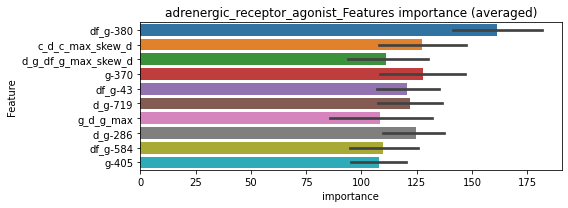

len(train_index) : 2510
len(valid_index) : 837
================================= fold 1/4 adrenergic_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000642259	valid_1's binary_logloss: 0.00380045
[2000]	training's binary_logloss: 0.00036468	valid_1's binary_logloss: 0.00328294
[3000]	training's binary_logloss: 0.000281137	valid_1's binary_logloss: 0.00311896
Early stopping, best iteration is:
[3828]	training's binary_logloss: 0.000247274	valid_1's binary_logloss: 0.00305026


len(train_index) : 2510
len(valid_index) : 837
================================= fold 2/4 adrenergic_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000653557	valid_1's binary_logloss: 0.00239632
[2000]	training's binary_logloss: 0.000367205	valid_1's binary_logloss: 0.00196826
[3000]	training's binary_logloss: 0.000283479	valid_1's binary_logloss: 0.00184283
[4000]	training's binary_logloss: 0.000246529	valid_1's binary_logloss: 0.00177754
[5000]	training's binary_logloss: 0.00022736	valid_1's binary_logloss: 0.00173743
[6000]	training's binary_logloss: 0.000214759	valid_1's binary_logloss: 0.00170995
Early stopping, best iteration is:
[6345]	training's binary_logloss: 0.000211021	valid_1's binary_logloss: 0.00170057


len(train_index) : 2510
len(valid_index) : 837
================================= fold 3/4 adrenergic_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2511
len(valid_index) : 836
================================= fold 4/4 adrenergic_receptor_agonist=================================


Early stopping, best iteration is:
[722]	training's binary_logloss: 0.000883225	valid_1's binary_logloss: 0.00356754
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000651346	valid_1's binary_logloss: 0.00468565
[2000]	training's binary_logloss: 0.000371333	valid_1's binary_logloss: 0.00425425
Early stopping, best iteration is:
[2102]	training's binary_logloss: 0.000360458	valid_1's binary_logloss: 0.004235


adrenergic_receptor_agonist logloss: 0.0031388879558487378


neg labels: 3289 → selected neg labels: 3240


adrenergic_receptor_antagonist, len(trt): 360, len(othr): 3240
target_rate: 0.0151172 → Adj_target_rate: 0.0125042
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[229]	training's binary_logloss: 0.0798785	valid_1's binary_logloss: 0.323125
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0496602	valid_1's binary_logloss: 0.293669
Early stopping, best iteration is:
[278]	training's binary_logloss: 0.0565156	valid_1's binary_logloss: 0.293629
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0491353	valid_1's binary_logloss: 0.287024
Early stopping, best iteration is:
[294]	training's binary_logloss: 0.0509861	valid_1's binary_logloss: 0.286665
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0506099	valid_1's binary_logloss: 0.2895


1 / 3 AUC score:0.842
y_Threshold: 0.1176552, Threshold: 0.7373763, pos_neg_ratio: 0.8000000
Remove_noisy_data: 542 → Positive_corect_labels: 442/3346
p_label_rate: 0.0100452 Vs.target_rate: 0.01512
Num_p_label: 40.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 40.0, Expected: 60.2, Adj_threshold_1: 0.7373763
Num_p_label: 51.0, Expected: 60.2, Adj_threshold_2: 0.7073763
threshold: 0.7073763, positive_p_label: 51.0/3982, p_label_rate: 0.0128076


Early stopping, best iteration is:
[306]	training's binary_logloss: 0.0489172	valid_1's binary_logloss: 0.289252


positive_y_label: 442.0/3346, y_label_rate: 0.1320980
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0147314	valid_1's binary_logloss: 0.162146
Early stopping, best iteration is:
[377]	training's binary_logloss: 0.00815248	valid_1's binary_logloss: 0.159698
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0160794	valid_1's binary_logloss: 0.125851
Early stopping, best iteration is:
[438]	training's binary_logloss: 0.00607359	valid_1's binary_logloss: 0.120185
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.016875	valid_1's binary_logloss: 0.113878
Early stopping, best iteration is:
[348]	training's binary_logloss: 0.0117599	valid_1's binary_logloss: 0.111648
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0159246	valid_1's binary_logloss: 0.166535


2 / 3 AUC score:0.982
y_Threshold: 0.0736192, Threshold: 0.7073763, pos_neg_ratio: 0.8000000
Remove_noisy_data: 108 → Positive_corect_labels: 388.0/3238
p_label_rate: 0.0369161 Vs.target_rate: 0.01512
Num_p_label: 147.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 147.0, Expected: 60.2, Adj_threshold_1: 0.7073763
Num_p_label: 145.0, Expected: 60.2, Adj_threshold_2: 0.7373763
Num_p_label: 139.0, Expected: 60.2, Adj_threshold_3: 0.7673763
Num_p_label: 126.0, Expected: 60.2, Adj_threshold_4: 0.7973763


Early stopping, best iteration is:
[372]	training's binary_logloss: 0.00916237	valid_1's binary_logloss: 0.163297


threshold: 0.7973763, positive_p_label: 126.0/3982, p_label_rate: 0.0316424
positive_y_label: 388.0/3238, y_label_rate: 0.1198271
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00959199	valid_1's binary_logloss: 0.124283
Early stopping, best iteration is:
[393]	training's binary_logloss: 0.00477972	valid_1's binary_logloss: 0.120539
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0103399	valid_1's binary_logloss: 0.112874
Early stopping, best iteration is:
[438]	training's binary_logloss: 0.00388502	valid_1's binary_logloss: 0.108827
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0109552	valid_1's binary_logloss: 0.0937821
Early stopping, best iteration is:
[442]	training's binary_logloss: 0.00397739	valid_1's binary_logloss: 0.0886601
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.011907	valid_1's binary_logloss: 0.0845835


3 / 3 AUC score:0.994
y_Threshold: 0.0601248, Threshold: 0.7973763, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[465]	training's binary_logloss: 0.00374291	valid_1's binary_logloss: 0.077346


Remove_noisy_data: 60 → Positive_corect_labels: 358.0/3178
p_label_rate: 0.0447012 Vs.target_rate: 0.01512
Num_p_label: 178.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 178.0, Expected: 60.2, Adj_threshold_1: 0.7973763
threshold: 0.7973763, positive_p_label: 178.0/3982, p_label_rate: 0.0447012
positive_y_label: 358.0/3178, y_label_rate: 0.1126495


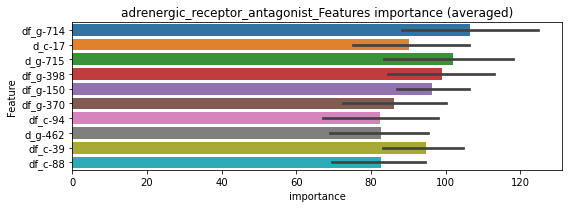

len(train_index) : 2383
len(valid_index) : 795
================================= fold 1/4 adrenergic_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000671197	valid_1's binary_logloss: 0.00160425
[2000]	training's binary_logloss: 0.000374627	valid_1's binary_logloss: 0.0009889
[3000]	training's binary_logloss: 0.000283409	valid_1's binary_logloss: 0.000777777
[4000]	training's binary_logloss: 0.00024124	valid_1's binary_logloss: 0.000672466
[5000]	training's binary_logloss: 0.000219136	valid_1's binary_logloss: 0.000615516
[6000]	training's binary_logloss: 0.000204765	valid_1's binary_logloss: 0.000576957
Early stopping, best iteration is:
[6794]	training's binary_logloss: 0.000196312	valid_1's binary_logloss: 0.000554968


len(train_index) : 2383
len(valid_index) : 795
================================= fold 2/4 adrenergic_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00066597	valid_1's binary_logloss: 0.00337109
Early stopping, best iteration is:
[1642]	training's binary_logloss: 0.000432875	valid_1's binary_logloss: 0.00300758


len(train_index) : 2384
len(valid_index) : 794
================================= fold 3/4 adrenergic_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000666503	valid_1's binary_logloss: 0.00132214
[2000]	training's binary_logloss: 0.000374777	valid_1's binary_logloss: 0.00078432
[3000]	training's binary_logloss: 0.000283756	valid_1's binary_logloss: 0.000599798
[4000]	training's binary_logloss: 0.000241458	valid_1's binary_logloss: 0.000510208
[5000]	training's binary_logloss: 0.000219289	valid_1's binary_logloss: 0.000461253
[6000]	training's binary_logloss: 0.000204825	valid_1's binary_logloss: 0.000429048
Early stopping, best iteration is:
[6158]	training's binary_logloss: 0.000202897	valid_1's binary_logloss: 0.00042495


len(train_index) : 2384
len(valid_index) : 794
================================= fold 4/4 adrenergic_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000674872	valid_1's binary_logloss: 0.0040053
[2000]	training's binary_logloss: 0.00038355	valid_1's binary_logloss: 0.00352208
Early stopping, best iteration is:
[2161]	training's binary_logloss: 0.000365241	valid_1's binary_logloss: 0.00349219


adrenergic_receptor_antagonist logloss: 0.0018704842809866692


neg labels: 3289 → selected neg labels: 3284


akt_inhibitor, len(trt): 66, len(othr): 3284
target_rate: 0.0027715 → Adj_target_rate: 0.0029567
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00570543	valid_1's binary_logloss: 0.0532398
[600]	training's binary_logloss: 0.00104559	valid_1's binary_logloss: 0.0421179
Early stopping, best iteration is:
[615]	training's binary_logloss: 0.00100385	valid_1's binary_logloss: 0.0420437
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00620151	valid_1's binary_logloss: 0.0362543
[600]	training's binary_logloss: 0.00108982	valid_1's binary_logloss: 0.0247394
Early stopping, best iteration is:
[662]	training's binary_logloss: 0.000924777	valid_1's binary_logloss: 0.0241112
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00644112	valid_1's binary_logloss: 0.0204691
[600]	training's binary_logloss: 0.00114228	valid_1's binary_logloss: 0.00930077
[900]	training's binary_logloss: 0.000693806	valid_1's binary_logloss: 0.00798188
Early stopping, best it

1 / 3 AUC score:0.999
y_Threshold: 0.0088937, Threshold: 0.0403716, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[498]	training's binary_logloss: 0.00153934	valid_1's binary_logloss: 0.0496411


Remove_noisy_data: 142 → Positive_corect_labels: 651/3798
p_label_rate: 0.0100452 Vs.target_rate: 0.00277
Num_p_label: 40.0, conf_0:0.02826, conf_1:0.05248
Num_p_label: 40.0, Expected: 11.0, Adj_threshold_1: 0.0403716
Num_p_label: 26.0, Expected: 11.0, Adj_threshold_2: 0.0703716
Num_p_label: 20.0, Expected: 11.0, Adj_threshold_3: 0.1003716
Num_p_label: 17.0, Expected: 11.0, Adj_threshold_4: 0.1303716
Num_p_label: 16.0, Expected: 11.0, Adj_threshold_5: 0.1603716
threshold: 0.1603716, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 651.0/3798, y_label_rate: 0.1714060
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00522822	valid_1's binary_logloss: 0.037588
[600]	training's binary_logloss: 0.000991371	valid_1's binary_logloss: 0.0274108
Early stopping, best iteration is:
[751]	training's binary_logloss: 0.000718092	valid_1's binary_logloss: 0.0265338
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00533556	valid_1's binary_logloss: 0.0338281
[600]	training's binary_logloss: 0.000996128	valid_1's binary_logloss: 0.0241991
Early stopping, best iteration is:
[666]	training's binary_logloss: 0.000844076	valid_1's binary_logloss: 0.0236638
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00546659	valid_1's binary_logloss: 0.0208805
[600]	training's binary_logloss: 0.00103069	valid_1's binary_logloss: 0.0122907
Early stopping, best iteration is:
[774]	training's binary_logloss: 0.000720732	valid_1's binary_logloss

2 / 3 AUC score:1.000


Early stopping, best iteration is:
[567]	training's binary_logloss: 0.00115667	valid_1's binary_logloss: 0.0242248


y_Threshold: 0.0283428, Threshold: 0.1603716, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 646.0/3788
p_label_rate: 0.0075339 Vs.target_rate: 0.00277
Num_p_label: 30.0, conf_0:0.12830, conf_1:0.19245
Num_p_label: 30.0, Expected: 11.0, Adj_threshold_1: 0.1603716
Num_p_label: 27.0, Expected: 11.0, Adj_threshold_2: 0.1903716
Num_p_label: 23.0, Expected: 11.0, Adj_threshold_3: 0.2203716
Num_p_label: 20.0, Expected: 11.0, Adj_threshold_4: 0.2503716
Num_p_label: 19.0, Expected: 11.0, Adj_threshold_5: 0.2803716
Num_p_label: 18.0, Expected: 11.0, Adj_threshold_6: 0.3103716
Num_p_label: 16.0, Expected: 11.0, Adj_threshold_7: 0.3403716
threshold: 0.3403716, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 646.0/3788, y_label_rate: 0.1705385
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00506143	valid_1's binary_logloss: 0.0346874
[600]	training's binary_logloss: 0.000971426	valid_1's binary_logloss: 0.0240381
Early stopping, best iteration is:
[785]	training's binary_logloss: 0.000685638	valid_1's binary_logloss: 0.0228374
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00519607	valid_1's binary_logloss: 0.0290271
[600]	training's binary_logloss: 0.000979044	valid_1's binary_logloss: 0.0190675
Early stopping, best iteration is:
[800]	training's binary_logloss: 0.000669555	valid_1's binary_logloss: 0.0178674
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00517294	valid_1's binary_logloss: 0.0222032
[600]	training's binary_logloss: 0.000976517	valid_1's binary_logloss: 0.0129652
[900]	training's binary_logloss: 0.000636199	valid_1's binary_logloss: 0.0116788
Early stopping, best 

3 / 3 AUC score:1.000
y_Threshold: 0.0399131, Threshold: 0.3403716, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 645.0/3786
p_label_rate: 0.0045203 Vs.target_rate: 0.00277
Num_p_label: 18.0, conf_0:0.30633, conf_1:0.37441
Num_p_label: 18.0, Expected: 11.0, Adj_threshold_1: 0.3403716
Num_p_label: 15.0, Expected: 11.0, Adj_threshold_2: 0.3703716
threshold: 0.3703716, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 645.0/3786, y_label_rate: 0.1703645


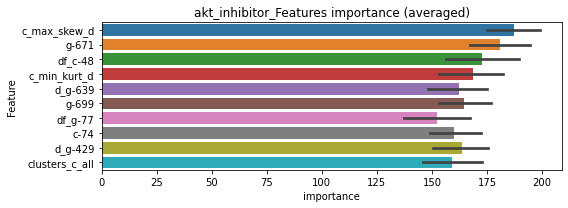

len(train_index) : 2839
len(valid_index) : 947
================================= fold 1/4 akt_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000563086	valid_1's binary_logloss: 0.00434653
Early stopping, best iteration is:
[1092]	training's binary_logloss: 0.000520097	valid_1's binary_logloss: 0.00426619


len(train_index) : 2839
len(valid_index) : 947
================================= fold 2/4 akt_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000568477	valid_1's binary_logloss: 0.00215789
[2000]	training's binary_logloss: 0.000327329	valid_1's binary_logloss: 0.0018824
Early stopping, best iteration is:
[2671]	training's binary_logloss: 0.000271574	valid_1's binary_logloss: 0.00182554


len(train_index) : 2840
len(valid_index) : 946
================================= fold 3/4 akt_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000567173	valid_1's binary_logloss: 0.00212725
Early stopping, best iteration is:
[1171]	training's binary_logloss: 0.000494733	valid_1's binary_logloss: 0.00201338


len(train_index) : 2840
len(valid_index) : 946
================================= fold 4/4 akt_inhibitor=================================


Training until validation scores don't improve for 30 rounds


akt_inhibitor logloss: 0.0040682642112088874


Early stopping, best iteration is:
[502]	training's binary_logloss: 0.0010475	valid_1's binary_logloss: 0.00816941
neg labels: 3289 → selected neg labels: 3288


aldehyde_dehydrogenase_inhibitor, len(trt): 19, len(othr): 3288
target_rate: 0.0007979 → Adj_target_rate: 0.0010260
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00126081	valid_1's binary_logloss: 0.00266336
[600]	training's binary_logloss: 0.000358921	valid_1's binary_logloss: 0.00102369
Early stopping, best iteration is:
[608]	training's binary_logloss: 0.000356574	valid_1's binary_logloss: 0.00101748
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00128395	valid_1's binary_logloss: 0.00430195
[600]	training's binary_logloss: 0.000359213	valid_1's binary_logloss: 0.00197686
Early stopping, best iteration is:
[613]	training's binary_logloss: 0.00035665	valid_1's binary_logloss: 0.00196543
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0013145	valid_1's binary_logloss: 0.00209555
[600]	training's binary_logloss: 0.000359358	valid_1's binary_logloss: 0.000706533
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.000356909	valid_1's binar

1 / 3 AUC score:1.000


[600]	training's binary_logloss: 0.000359393	valid_1's binary_logloss: 0.00171115
Early stopping, best iteration is:
[627]	training's binary_logloss: 0.000353306	valid_1's binary_logloss: 0.0017004


y_Threshold: 0.0020135, Threshold: 0.0087955, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00080
Num_p_label: 40.0, conf_0:0.00616, conf_1:0.01143
Num_p_label: 40.0, Expected: 3.2, Adj_threshold_1: 0.0087955
Num_p_label: 5.0, Expected: 3.2, Adj_threshold_2: 0.0387955
threshold: 0.0387955, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00117233	valid_1's binary_logloss: 0.00226576
[600]	training's binary_logloss: 0.000339637	valid_1's binary_logloss: 0.000864932
Early stopping, best iteration is:
[654]	training's binary_logloss: 0.000331338	valid_1's binary_logloss: 0.000851251
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00117258	valid_1's binary_logloss: 0.00344157
[600]	training's binary_logloss: 0.00034115	valid_1's binary_logloss: 0.0015924
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000341303	valid_1's binary_logloss: 0.00159158
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00121067	valid_1's binary_logloss: 0.00194228
[600]	training's binary_logloss: 0.00033913	valid_1's binary_logloss: 0.000636784
Early stopping, best iteration is:
[614]	training's binary_logloss: 0.000335626	valid_1's bina

2 / 3 AUC score:1.000
y_Threshold: 0.0942755, Threshold: 0.0387955, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0030136 Vs.target_rate: 0.00080
Num_p_label: 12.0, conf_0:0.03104, conf_1:0.04655
Num_p_label: 12.0, Expected: 3.2, Adj_threshold_1: 0.0387955


[600]	training's binary_logloss: 0.000341953	valid_1's binary_logloss: 0.00141817
Early stopping, best iteration is:
[583]	training's binary_logloss: 0.00034584	valid_1's binary_logloss: 0.00141359


Num_p_label: 5.0, Expected: 3.2, Adj_threshold_2: 0.0687955
threshold: 0.0687955, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00117233	valid_1's binary_logloss: 0.00226576
[600]	training's binary_logloss: 0.000339637	valid_1's binary_logloss: 0.000864932
Early stopping, best iteration is:
[654]	training's binary_logloss: 0.000331338	valid_1's binary_logloss: 0.000851251
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00117258	valid_1's binary_logloss: 0.00344157
[600]	training's binary_logloss: 0.00034115	valid_1's binary_logloss: 0.0015924
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000341303	valid_1's binary_logloss: 0.00159158
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00121067	valid_1's binary_logloss: 0.00194228
[600]	training's binary_logloss: 0.00033913	valid_1's binary_logloss: 0.000636784
Early stopping, best iteration is:
[614]	training's binary_logloss: 0.000335626	valid_1's bina

3 / 3 AUC score:1.000
y_Threshold: 0.0942755, Threshold: 0.0687955, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0012557 Vs.target_rate: 0.00080
Num_p_label: 5.0, conf_0:0.06192, conf_1:0.07568
Num_p_label: 5.0, Expected: 3.2, Adj_threshold_1: 0.0687955
threshold: 0.0687955, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


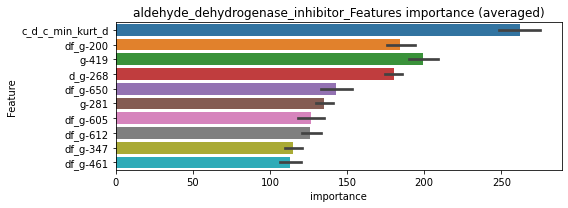

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 aldehyde_dehydrogenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000426287	valid_1's binary_logloss: 0.000596951
[2000]	training's binary_logloss: 0.000259024	valid_1's binary_logloss: 0.000430036
[3000]	training's binary_logloss: 0.000205129	valid_1's binary_logloss: 0.000371846
[4000]	training's binary_logloss: 0.000180001	valid_1's binary_logloss: 0.000344749
[5000]	training's binary_logloss: 0.000166977	valid_1's binary_logloss: 0.000328639
[6000]	training's binary_logloss: 0.000158588	valid_1's binary_logloss: 0.00031675
Early stopping, best iteration is:
[6641]	training's binary_logloss: 0.000154617	valid_1's binary_logloss: 0.000311659


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 aldehyde_dehydrogenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 aldehyde_dehydrogenase_inhibitor=================================


Early stopping, best iteration is:
[628]	training's binary_logloss: 0.00066392	valid_1's binary_logloss: 0.00543048
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000442571	valid_1's binary_logloss: 0.000683424
[2000]	training's binary_logloss: 0.000270902	valid_1's binary_logloss: 0.00050045
Early stopping, best iteration is:
[2778]	training's binary_logloss: 0.000228498	valid_1's binary_logloss: 0.000454658


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 aldehyde_dehydrogenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000420001	valid_1's binary_logloss: 0.00238417
Early stopping, best iteration is:
[1037]	training's binary_logloss: 0.000407116	valid_1's binary_logloss: 0.00236876


aldehyde_dehydrogenase_inhibitor logloss: 0.0021409965387179024


neg labels: 3289 → selected neg labels: 3285


alk_inhibitor, len(trt): 42, len(othr): 3285
target_rate: 0.0017637 → Adj_target_rate: 0.0020135
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00343511	valid_1's binary_logloss: 0.0194723
[600]	training's binary_logloss: 0.00066095	valid_1's binary_logloss: 0.0113601
Early stopping, best iteration is:
[683]	training's binary_logloss: 0.00057137	valid_1's binary_logloss: 0.011015
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00328865	valid_1's binary_logloss: 0.0198197
[600]	training's binary_logloss: 0.000644867	valid_1's binary_logloss: 0.0129738
Early stopping, best iteration is:
[659]	training's binary_logloss: 0.000576453	valid_1's binary_logloss: 0.0127505
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0036129	valid_1's binary_logloss: 0.00954157
[600]	training's binary_logloss: 0.000678534	valid_1's binary_logloss: 0.00441654
Early stopping, best iteration is:
[686]	training's binary_logloss: 0.000587865	valid_1's binary_logloss

1 / 3 AUC score:1.000
y_Threshold: 0.0043248, Threshold: 0.0189953, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00176
Num_p_label: 40.0, conf_0:0.01330, conf_1:0.02469
Num_p_label: 40.0, Expected: 7.0, Adj_threshold_1: 0.0189953
Num_p_label: 14.0, Expected: 7.0, Adj_threshold_2: 0.0489953
threshold: 0.0489953, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00314269	valid_1's binary_logloss: 0.0193225
[600]	training's binary_logloss: 0.000628067	valid_1's binary_logloss: 0.0116743
Early stopping, best iteration is:
[658]	training's binary_logloss: 0.000567528	valid_1's binary_logloss: 0.0114183
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00308639	valid_1's binary_logloss: 0.0186215
[600]	training's binary_logloss: 0.000620962	valid_1's binary_logloss: 0.0124856
Early stopping, best iteration is:
[691]	training's binary_logloss: 0.000543838	valid_1's binary_logloss: 0.0123335
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00324402	valid_1's binary_logloss: 0.00857365
[600]	training's binary_logloss: 0.000643911	valid_1's binary_logloss: 0.00348735
Early stopping, best iteration is:
[707]	training's binary_logloss: 0.000555627	valid_1's binary_log

2 / 3 AUC score:1.000
y_Threshold: 0.0234639, Threshold: 0.0489953, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0080362 Vs.target_rate: 0.00176
Num_p_label: 32.0, conf_0:0.03920, conf_1:0.05879
Num_p_label: 32.0, Expected: 7.0, Adj_threshold_1: 0.0489953
Num_p_label: 23.0, Expected: 7.0, Adj_threshold_2: 0.0789953
Num_p_label: 12.0, Expected: 7.0, Adj_threshold_3: 0.1089953
threshold: 0.1089953, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00316442	valid_1's binary_logloss: 0.0163902
[600]	training's binary_logloss: 0.000628233	valid_1's binary_logloss: 0.0108453
Early stopping, best iteration is:
[622]	training's binary_logloss: 0.000600891	valid_1's binary_logloss: 0.0107361
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00304038	valid_1's binary_logloss: 0.0167113
[600]	training's binary_logloss: 0.000617308	valid_1's binary_logloss: 0.0122903
Early stopping, best iteration is:
[591]	training's binary_logloss: 0.000631454	valid_1's binary_logloss: 0.012243
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00316995	valid_1's binary_logloss: 0.00845682
[600]	training's binary_logloss: 0.000635781	valid_1's binary_logloss: 0.00446967
Early stopping, best iteration is:
[741]	training's binary_logloss: 0.000538035	valid_1's binary_logl

3 / 3 AUC score:1.000
y_Threshold: 0.0395195, Threshold: 0.1089953, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0035158 Vs.target_rate: 0.00176
Num_p_label: 14.0, conf_0:0.09810, conf_1:0.11989
Num_p_label: 14.0, Expected: 7.0, Adj_threshold_1: 0.1089953
threshold: 0.1089953, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 655.0/3806, y_label_rate: 0.1720967


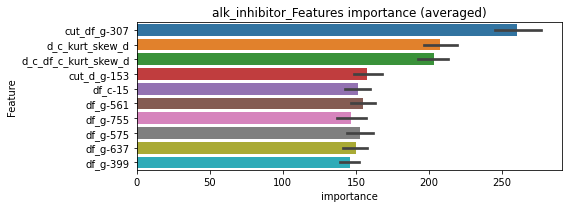

len(train_index) : 2854
len(valid_index) : 952
================================= fold 1/4 alk_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2854
len(valid_index) : 952
================================= fold 2/4 alk_inhibitor=================================


Early stopping, best iteration is:
[418]	training's binary_logloss: 0.00120301	valid_1's binary_logloss: 0.00495284
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000486582	valid_1's binary_logloss: 0.000544705
[2000]	training's binary_logloss: 0.00028807	valid_1's binary_logloss: 0.00030627
[3000]	training's binary_logloss: 0.000224037	valid_1's binary_logloss: 0.000228798
[4000]	training's binary_logloss: 0.000193736	valid_1's binary_logloss: 0.000191224
[5000]	training's binary_logloss: 0.000177717	valid_1's binary_logloss: 0.00017112
[6000]	training's binary_logloss: 0.000166741	valid_1's binary_logloss: 0.000157515
[7000]	training's binary_logloss: 0.00015863	valid_1's binary_logloss: 0.000147541
[8000]	training's binary_logloss: 0.00015285	valid_1's binary_logloss: 0.000140153
[9000]	training's binary_logloss: 0.000148589	valid_1's binary_logloss: 0.00013452
[10000]	training's binary_logloss: 0.00014507	valid_1's binary_logloss: 0

len(train_index) : 2855
len(valid_index) : 951
================================= fold 3/4 alk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000533292	valid_1's binary_logloss: 0.000829586
[2000]	training's binary_logloss: 0.000301803	valid_1's binary_logloss: 0.000577552
[3000]	training's binary_logloss: 0.000233189	valid_1's binary_logloss: 0.000487451
[4000]	training's binary_logloss: 0.000202863	valid_1's binary_logloss: 0.000443748
Early stopping, best iteration is:
[4218]	training's binary_logloss: 0.000199	valid_1's binary_logloss: 0.000436789


len(train_index) : 2855
len(valid_index) : 951
================================= fold 4/4 alk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000526784	valid_1's binary_logloss: 0.00286135
[2000]	training's binary_logloss: 0.000301406	valid_1's binary_logloss: 0.00256852
Early stopping, best iteration is:
[2183]	training's binary_logloss: 0.000285921	valid_1's binary_logloss: 0.00255377


alk_inhibitor logloss: 0.002018766680400571


neg labels: 3289 → selected neg labels: 3289


ampk_activator, len(trt): 12, len(othr): 3289
target_rate: 0.0005039 → Adj_target_rate: 0.0006942
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000745726	valid_1's binary_logloss: 0.0018755
Early stopping, best iteration is:
[549]	training's binary_logloss: 0.000284036	valid_1's binary_logloss: 0.00107469
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000740536	valid_1's binary_logloss: 0.00324217
Early stopping, best iteration is:
[504]	training's binary_logloss: 0.000295944	valid_1's binary_logloss: 0.00238255
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000767186	valid_1's binary_logloss: 0.000993368
Early stopping, best iteration is:
[496]	training's binary_logloss: 0.000307227	valid_1's binary_logloss: 0.000439722
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000739499	valid_1's binary_logloss: 0.00326438


1 / 3 AUC score:1.000
y_Threshold: 0.0013323, Threshold: 0.0063658, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00050
Num_p_label: 40.0, conf_0:0.00446, conf_1:0.00828
Num_p_label: 40.0, Expected: 2.0, Adj_threshold_1: 0.0063658
Num_p_label: 5.0, Expected: 2.0, Adj_threshold_2: 0.0363658
threshold: 0.0363658, positive_p_label: 5.0/3982, p_label_rate: 0.0012557


Early stopping, best iteration is:
[521]	training's binary_logloss: 0.000291543	valid_1's binary_logloss: 0.00197004


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000664629	valid_1's binary_logloss: 0.00132847
Early stopping, best iteration is:
[528]	training's binary_logloss: 0.000271962	valid_1's binary_logloss: 0.000759934
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00066465	valid_1's binary_logloss: 0.00299993
Early stopping, best iteration is:
[509]	training's binary_logloss: 0.000274357	valid_1's binary_logloss: 0.00222705
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00068411	valid_1's binary_logloss: 0.000824206
Early stopping, best iteration is:
[543]	training's binary_logloss: 0.000271919	valid_1's binary_logloss: 0.000328151
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000664465	valid_1's binary_logloss: 0.00266713


2 / 3 AUC score:1.000
y_Threshold: 0.0612067, Threshold: 0.0363658, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0057760 Vs.target_rate: 0.00050
Num_p_label: 23.0, conf_0:0.02909, conf_1:0.04364
Num_p_label: 23.0, Expected: 2.0, Adj_threshold_1: 0.0363658
Num_p_label: 10.0, Expected: 2.0, Adj_threshold_2: 0.0663658
Num_p_label: 7.0, Expected: 2.0, Adj_threshold_3: 0.0963658
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_4: 0.1263658
Num_p_label: 4.0, Expected: 2.0, Adj_threshold_5: 0.1563658
threshold: 0.1563658, positive_p_label: 4.0/3982, p_label_rate: 0.0010045


Early stopping, best iteration is:
[535]	training's binary_logloss: 0.00026655	valid_1's binary_logloss: 0.00159084


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000664629	valid_1's binary_logloss: 0.00132847
Early stopping, best iteration is:
[528]	training's binary_logloss: 0.000271962	valid_1's binary_logloss: 0.000759934
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00066465	valid_1's binary_logloss: 0.00299993
Early stopping, best iteration is:
[509]	training's binary_logloss: 0.000274357	valid_1's binary_logloss: 0.00222705
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00068411	valid_1's binary_logloss: 0.000824206
Early stopping, best iteration is:
[543]	training's binary_logloss: 0.000271919	valid_1's binary_logloss: 0.000328151
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000664465	valid_1's binary_logloss: 0.00266713


3 / 3 AUC score:1.000
y_Threshold: 0.0612067, Threshold: 0.1563658, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0010045 Vs.target_rate: 0.00050
Num_p_label: 4.0, conf_0:0.14073, conf_1:0.17200
Num_p_label: 4.0, Expected: 2.0, Adj_threshold_1: 0.1563658


Early stopping, best iteration is:
[535]	training's binary_logloss: 0.00026655	valid_1's binary_logloss: 0.00159084


threshold: 0.1563658, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


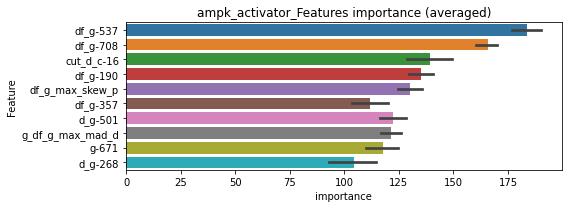

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 ampk_activator=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000403703	valid_1's binary_logloss: 0.00100159
[2000]	training's binary_logloss: 0.000246354	valid_1's binary_logloss: 0.000815524
[3000]	training's binary_logloss: 0.000204704	valid_1's binary_logloss: 0.000766945
[4000]	training's binary_logloss: 0.000185213	valid_1's binary_logloss: 0.000744868
[5000]	training's binary_logloss: 0.000174577	valid_1's binary_logloss: 0.000731211
[6000]	training's binary_logloss: 0.000167695	valid_1's binary_logloss: 0.000723052
Early stopping, best iteration is:
[6736]	training's binary_logloss: 0.000163835	valid_1's binary_logloss: 0.00071804


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 ampk_activator=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000397588	valid_1's binary_logloss: 0.00204363
Early stopping, best iteration is:
[1816]	training's binary_logloss: 0.000260858	valid_1's binary_logloss: 0.00184786


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 ampk_activator=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000381807	valid_1's binary_logloss: 0.000329935
[2000]	training's binary_logloss: 0.000236492	valid_1's binary_logloss: 0.000194604
[3000]	training's binary_logloss: 0.00019168	valid_1's binary_logloss: 0.000151942
[4000]	training's binary_logloss: 0.000170426	valid_1's binary_logloss: 0.0001314
[5000]	training's binary_logloss: 0.000159244	valid_1's binary_logloss: 0.00012037
[6000]	training's binary_logloss: 0.000152032	valid_1's binary_logloss: 0.000112917
[7000]	training's binary_logloss: 0.000146969	valid_1's binary_logloss: 0.000107568
[8000]	training's binary_logloss: 0.000143272	valid_1's binary_logloss: 0.000103625
Early stopping, best iteration is:
[8337]	training's binary_logloss: 0.000142164	valid_1's binary_logloss: 0.000102429


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 ampk_activator=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000401161	valid_1's binary_logloss: 0.00185799
[2000]	training's binary_logloss: 0.00024236	valid_1's binary_logloss: 0.00157099
Early stopping, best iteration is:
[2237]	training's binary_logloss: 0.000228444	valid_1's binary_logloss: 0.00155066


ampk_activator logloss: 0.001055225385988859


neg labels: 3289 → selected neg labels: 3288


analgesic, len(trt): 12, len(othr): 3288
target_rate: 0.0005039 → Adj_target_rate: 0.0006942
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000844005	valid_1's binary_logloss: 0.00166122
Early stopping, best iteration is:
[523]	training's binary_logloss: 0.000308243	valid_1's binary_logloss: 0.000722472
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000828347	valid_1's binary_logloss: 0.0025985
Early stopping, best iteration is:
[529]	training's binary_logloss: 0.000304945	valid_1's binary_logloss: 0.0013075
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000867126	valid_1's binary_logloss: 0.00108844
Early stopping, best iteration is:
[523]	training's binary_logloss: 0.000315589	valid_1's binary_logloss: 0.000436192
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000854619	valid_1's binary_logloss: 0.00199207


1 / 3 AUC score:1.000
y_Threshold: 0.0013330, Threshold: 0.0160544, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00050
Num_p_label: 40.0, conf_0:0.01124, conf_1:0.02087
Num_p_label: 40.0, Expected: 2.0, Adj_threshold_1: 0.0160544
Num_p_label: 16.0, Expected: 2.0, Adj_threshold_2: 0.0460544
Num_p_label: 9.0, Expected: 2.0, Adj_threshold_3: 0.0760544
Num_p_label: 7.0, Expected: 2.0, Adj_threshold_4: 0.1060544
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_5: 0.1360544
Num_p_label: 5.0, Expected: 2.0, Adj_threshold_6: 0.1660544


Early stopping, best iteration is:
[531]	training's binary_logloss: 0.000313797	valid_1's binary_logloss: 0.000918286


threshold: 0.1660544, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000759678	valid_1's binary_logloss: 0.00147849
Early stopping, best iteration is:
[541]	training's binary_logloss: 0.000280471	valid_1's binary_logloss: 0.000664371
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000735966	valid_1's binary_logloss: 0.0014415
Early stopping, best iteration is:
[509]	training's binary_logloss: 0.000287214	valid_1's binary_logloss: 0.000684698
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000768885	valid_1's binary_logloss: 0.000901188
Early stopping, best iteration is:
[548]	training's binary_logloss: 0.000287136	valid_1's binary_logloss: 0.000358005
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000754342	valid_1's binary_logloss: 0.00111823


2 / 3 AUC score:1.000
y_Threshold: 0.1538986, Threshold: 0.1660544, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0035158 Vs.target_rate: 0.00050
Num_p_label: 14.0, conf_0:0.13284, conf_1:0.19927
Num_p_label: 14.0, Expected: 2.0, Adj_threshold_1: 0.1660544
Num_p_label: 10.0, Expected: 2.0, Adj_threshold_2: 0.1960544
Num_p_label: 10.0, Expected: 2.0, Adj_threshold_3: 0.2260544
Num_p_label: 10.0, Expected: 2.0, Adj_threshold_4: 0.2560544
Num_p_label: 10.0, Expected: 2.0, Adj_threshold_5: 0.2860544
Num_p_label: 10.0, Expected: 2.0, Adj_threshold_6: 0.3160544
Num_p_label: 10.0, Expected: 2.0, Adj_threshold_7: 0.3460544
Num_p_label: 8.0, Expected: 2.0, Adj_threshold_8: 0.3760544
Num_p_label: 7.0, Expected: 2.0, Adj_threshold_9: 0.4060544
Num_p_label: 7.0, Expected: 2.0, Adj_threshold_10: 0.4360544


Early stopping, best iteration is:
[532]	training's binary_logloss: 0.000281763	valid_1's binary_logloss: 0.000469987


threshold: 0.4660544, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000759678	valid_1's binary_logloss: 0.00147849
Early stopping, best iteration is:
[541]	training's binary_logloss: 0.000280471	valid_1's binary_logloss: 0.000664371
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000735966	valid_1's binary_logloss: 0.0014415
Early stopping, best iteration is:
[509]	training's binary_logloss: 0.000287214	valid_1's binary_logloss: 0.000684698
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000768885	valid_1's binary_logloss: 0.000901188
Early stopping, best iteration is:
[548]	training's binary_logloss: 0.000287136	valid_1's binary_logloss: 0.000358005
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000754342	valid_1's binary_logloss: 0.00111823


3 / 3 AUC score:1.000
y_Threshold: 0.1538986, Threshold: 0.4660544, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0015068 Vs.target_rate: 0.00050
Num_p_label: 6.0, conf_0:0.41945, conf_1:0.51266
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_1: 0.4660544
Num_p_label: 5.0, Expected: 2.0, Adj_threshold_2: 0.4960544


Early stopping, best iteration is:
[532]	training's binary_logloss: 0.000281763	valid_1's binary_logloss: 0.000469987


threshold: 0.4960544, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


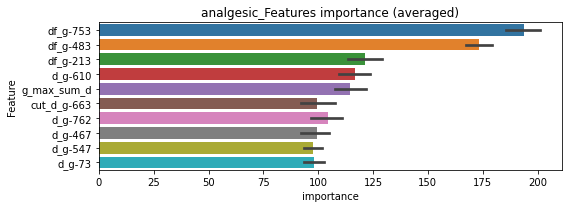

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 analgesic=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000396284	valid_1's binary_logloss: 0.00144316
Early stopping, best iteration is:
[1550]	training's binary_logloss: 0.000286527	valid_1's binary_logloss: 0.00131321


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 analgesic=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000391346	valid_1's binary_logloss: 0.0017329
[2000]	training's binary_logloss: 0.000245528	valid_1's binary_logloss: 0.00146271
Early stopping, best iteration is:
[2952]	training's binary_logloss: 0.000206021	valid_1's binary_logloss: 0.00140071


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 analgesic=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000401229	valid_1's binary_logloss: 0.000415522
[2000]	training's binary_logloss: 0.00025043	valid_1's binary_logloss: 0.000263868
[3000]	training's binary_logloss: 0.00020869	valid_1's binary_logloss: 0.000218898
[4000]	training's binary_logloss: 0.000188114	valid_1's binary_logloss: 0.000195732
[5000]	training's binary_logloss: 0.000176898	valid_1's binary_logloss: 0.000183153
[6000]	training's binary_logloss: 0.000169157	valid_1's binary_logloss: 0.000174174
[7000]	training's binary_logloss: 0.000163617	valid_1's binary_logloss: 0.000167691
[8000]	training's binary_logloss: 0.000159567	valid_1's binary_logloss: 0.000163135
Early stopping, best iteration is:
[8794]	training's binary_logloss: 0.000157028	valid_1's binary_logloss: 0.000160202


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 analgesic=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000400621	valid_1's binary_logloss: 0.000999139
[2000]	training's binary_logloss: 0.000248729	valid_1's binary_logloss: 0.00078515
[3000]	training's binary_logloss: 0.00020741	valid_1's binary_logloss: 0.000728772
[4000]	training's binary_logloss: 0.000186786	valid_1's binary_logloss: 0.000702485
[5000]	training's binary_logloss: 0.000175901	valid_1's binary_logloss: 0.000688844
[6000]	training's binary_logloss: 0.000168259	valid_1's binary_logloss: 0.000679225
[7000]	training's binary_logloss: 0.000162731	valid_1's binary_logloss: 0.000671327
Early stopping, best iteration is:
[7202]	training's binary_logloss: 0.000161957	valid_1's binary_logloss: 0.000670258


analgesic logloss: 0.0008864958080636761


neg labels: 3289 → selected neg labels: 3282


androgen_receptor_agonist, len(trt): 48, len(othr): 3282
target_rate: 0.0020156 → Adj_target_rate: 0.0022556
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00406479	valid_1's binary_logloss: 0.0270397
[600]	training's binary_logloss: 0.000774929	valid_1's binary_logloss: 0.0174775
Early stopping, best iteration is:
[739]	training's binary_logloss: 0.000604081	valid_1's binary_logloss: 0.0167471
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00438216	valid_1's binary_logloss: 0.0221466
[600]	training's binary_logloss: 0.000788157	valid_1's binary_logloss: 0.0141636
Early stopping, best iteration is:
[798]	training's binary_logloss: 0.000576767	valid_1's binary_logloss: 0.0135115
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00448662	valid_1's binary_logloss: 0.00891984
[600]	training's binary_logloss: 0.000822986	valid_1's binary_logloss: 0.00281313
Early stopping, best iteration is:
[766]	training's binary_logloss: 0.000612685	valid_1's binary_log

1 / 3 AUC score:0.999
y_Threshold: 0.0046484, Threshold: 0.0098085, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 655/3804
p_label_rate: 0.0100452 Vs.target_rate: 0.00202
Num_p_label: 40.0, conf_0:0.00687, conf_1:0.01275
Num_p_label: 40.0, Expected: 8.0, Adj_threshold_1: 0.0098085
Num_p_label: 3.0, Expected: 8.0, Adj_threshold_2: 0.0398085
threshold: 0.0398085, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 655.0/3804, y_label_rate: 0.1721872
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00395147	valid_1's binary_logloss: 0.0237873
[600]	training's binary_logloss: 0.000754688	valid_1's binary_logloss: 0.0155838
Early stopping, best iteration is:
[731]	training's binary_logloss: 0.000597072	valid_1's binary_logloss: 0.0152283
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00380166	valid_1's binary_logloss: 0.0139129
[600]	training's binary_logloss: 0.000762505	valid_1's binary_logloss: 0.00682594
Early stopping, best iteration is:
[811]	training's binary_logloss: 0.000570085	valid_1's binary_logloss: 0.00621333
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00398233	valid_1's binary_logloss: 0.0154655
[600]	training's binary_logloss: 0.000772518	valid_1's binary_logloss: 0.0085441
Early stopping, best iteration is:
[787]	training's binary_logloss: 0.000580866	valid_1's binary_log

2 / 3 AUC score:1.000
y_Threshold: 0.0353959, Threshold: 0.0398085, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 654.0/3802
p_label_rate: 0.0032647 Vs.target_rate: 0.00202
Num_p_label: 13.0, conf_0:0.03185, conf_1:0.04777
Num_p_label: 13.0, Expected: 8.0, Adj_threshold_1: 0.0398085
threshold: 0.0398085, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 654.0/3802, y_label_rate: 0.1720147
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00367984	valid_1's binary_logloss: 0.0284676
[600]	training's binary_logloss: 0.000725532	valid_1's binary_logloss: 0.0209582
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000751136	valid_1's binary_logloss: 0.0209141
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00389197	valid_1's binary_logloss: 0.013368
[600]	training's binary_logloss: 0.000760193	valid_1's binary_logloss: 0.00583416
Early stopping, best iteration is:
[859]	training's binary_logloss: 0.000549484	valid_1's binary_logloss: 0.00529048
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00393974	valid_1's binary_logloss: 0.0140925
[600]	training's binary_logloss: 0.000762404	valid_1's binary_logloss: 0.00729364
Early stopping, best iteration is:
[705]	training's binary_logloss: 0.000614966	valid_1's binary_log

3 / 3 AUC score:1.000
y_Threshold: 0.0215186, Threshold: 0.0398085, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 651.0/3796
p_label_rate: 0.0030136 Vs.target_rate: 0.00202
Num_p_label: 12.0, conf_0:0.03583, conf_1:0.04379
threshold: 0.0398085, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 651.0/3796, y_label_rate: 0.1714963


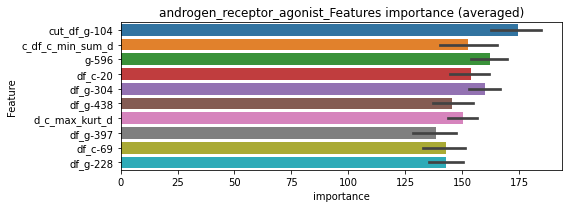

len(train_index) : 2847
len(valid_index) : 949
================================= fold 1/4 androgen_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000526467	valid_1's binary_logloss: 0.000939943
[2000]	training's binary_logloss: 0.000306928	valid_1's binary_logloss: 0.000663804
[3000]	training's binary_logloss: 0.000242435	valid_1's binary_logloss: 0.000572485
Early stopping, best iteration is:
[3920]	training's binary_logloss: 0.000213975	valid_1's binary_logloss: 0.000529444


len(train_index) : 2847
len(valid_index) : 949
================================= fold 2/4 androgen_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000536927	valid_1's binary_logloss: 0.00253505
[2000]	training's binary_logloss: 0.000309803	valid_1's binary_logloss: 0.00226812
Early stopping, best iteration is:
[2103]	training's binary_logloss: 0.000301208	valid_1's binary_logloss: 0.0022588


len(train_index) : 2847
len(valid_index) : 949
================================= fold 3/4 androgen_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000508035	valid_1's binary_logloss: 0.00198205
Early stopping, best iteration is:
[1632]	training's binary_logloss: 0.000336459	valid_1's binary_logloss: 0.00177411


len(train_index) : 2847
len(valid_index) : 949
================================= fold 4/4 androgen_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


androgen_receptor_agonist logloss: 0.0018477326344013784


Early stopping, best iteration is:
[779]	training's binary_logloss: 0.000656914	valid_1's binary_logloss: 0.00282749
neg labels: 3289 → selected neg labels: 3274


androgen_receptor_antagonist, len(trt): 89, len(othr): 3274
target_rate: 0.0037373 → Adj_target_rate: 0.0038122
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00931856	valid_1's binary_logloss: 0.0675115
[600]	training's binary_logloss: 0.0015071	valid_1's binary_logloss: 0.0554319
Early stopping, best iteration is:
[744]	training's binary_logloss: 0.00102731	valid_1's binary_logloss: 0.0543396
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00936112	valid_1's binary_logloss: 0.0577238
[600]	training's binary_logloss: 0.00149282	valid_1's binary_logloss: 0.0398784
Early stopping, best iteration is:
[694]	training's binary_logloss: 0.00114053	valid_1's binary_logloss: 0.0386069
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00931109	valid_1's binary_logloss: 0.0466742
[600]	training's binary_logloss: 0.00151916	valid_1's binary_logloss: 0.0322114
Early stopping, best iteration is:
[678]	training's binary_logloss: 0.00120768	valid_1's binary_logloss: 0.0

1 / 3 AUC score:0.998
y_Threshold: 0.0109339, Threshold: 0.0381764, pos_neg_ratio: 0.8000000
Remove_noisy_data: 142 → Positive_corect_labels: 649/3786
p_label_rate: 0.0100452 Vs.target_rate: 0.00374
Num_p_label: 40.0, conf_0:0.02672, conf_1:0.04963
Num_p_label: 40.0, Expected: 14.9, Adj_threshold_1: 0.0381764
Num_p_label: 12.0, Expected: 14.9, Adj_threshold_2: 0.0681764
threshold: 0.0681764, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 649.0/3786, y_label_rate: 0.1714210
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00791876	valid_1's binary_logloss: 0.0496037
[600]	training's binary_logloss: 0.00136355	valid_1's binary_logloss: 0.0362777
Early stopping, best iteration is:
[711]	training's binary_logloss: 0.00101965	valid_1's binary_logloss: 0.0351896
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00852207	valid_1's binary_logloss: 0.0554547
[600]	training's binary_logloss: 0.00139859	valid_1's binary_logloss: 0.0414094
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.00132121	valid_1's binary_logloss: 0.0411092
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00804753	valid_1's binary_logloss: 0.0610233
[600]	training's binary_logloss: 0.00136693	valid_1's binary_logloss: 0.0478956
Early stopping, best iteration is:
[672]	training's binary_logloss: 0.00111223	valid_1's binary_logloss: 0.

2 / 3 AUC score:0.999
y_Threshold: 0.0291101, Threshold: 0.0681764, pos_neg_ratio: 0.8000000
Remove_noisy_data: 16 → Positive_corect_labels: 641.0/3770
p_label_rate: 0.0087896 Vs.target_rate: 0.00374
Num_p_label: 35.0, conf_0:0.05454, conf_1:0.08181
Num_p_label: 35.0, Expected: 14.9, Adj_threshold_1: 0.0681764
Num_p_label: 21.0, Expected: 14.9, Adj_threshold_2: 0.0981764
threshold: 0.0981764, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 641.0/3770, y_label_rate: 0.1700265
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00760245	valid_1's binary_logloss: 0.0441487
[600]	training's binary_logloss: 0.00132259	valid_1's binary_logloss: 0.0311101
Early stopping, best iteration is:
[671]	training's binary_logloss: 0.00108199	valid_1's binary_logloss: 0.0304353
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00760636	valid_1's binary_logloss: 0.055144
[600]	training's binary_logloss: 0.00130973	valid_1's binary_logloss: 0.0416681
Early stopping, best iteration is:
[737]	training's binary_logloss: 0.000928658	valid_1's binary_logloss: 0.0404775
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00774801	valid_1's binary_logloss: 0.0410613
[600]	training's binary_logloss: 0.0013364	valid_1's binary_logloss: 0.0263443
Early stopping, best iteration is:
[731]	training's binary_logloss: 0.000957442	valid_1's binary_logloss: 0.

3 / 3 AUC score:1.000
y_Threshold: 0.0300368, Threshold: 0.0981764, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 636.0/3760
p_label_rate: 0.0062783 Vs.target_rate: 0.00374
Num_p_label: 25.0, conf_0:0.08836, conf_1:0.10799
Num_p_label: 25.0, Expected: 14.9, Adj_threshold_1: 0.0981764
Num_p_label: 18.0, Expected: 14.9, Adj_threshold_2: 0.1281764
threshold: 0.1281764, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 636.0/3760, y_label_rate: 0.1691489


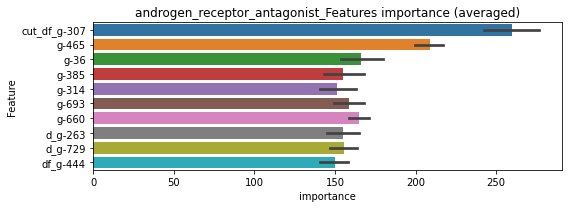

len(train_index) : 2820
len(valid_index) : 940
================================= fold 1/4 androgen_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000578789	valid_1's binary_logloss: 0.00307948
Early stopping, best iteration is:
[1874]	training's binary_logloss: 0.00034754	valid_1's binary_logloss: 0.00284369


len(train_index) : 2820
len(valid_index) : 940
================================= fold 2/4 androgen_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[921]	training's binary_logloss: 0.000604432	valid_1's binary_logloss: 0.00288954


len(train_index) : 2820
len(valid_index) : 940
================================= fold 3/4 androgen_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000579076	valid_1's binary_logloss: 0.00257805
Early stopping, best iteration is:
[1628]	training's binary_logloss: 0.000378196	valid_1's binary_logloss: 0.00234149


len(train_index) : 2820
len(valid_index) : 940
================================= fold 4/4 androgen_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000565818	valid_1's binary_logloss: 0.00197137
Early stopping, best iteration is:
[1421]	training's binary_logloss: 0.000411307	valid_1's binary_logloss: 0.00178195


androgen_receptor_antagonist logloss: 0.002464980544336091


neg labels: 3289 → selected neg labels: 3273


anesthetic_-_local, len(trt): 80, len(othr): 3273
target_rate: 0.0033594 → Adj_target_rate: 0.0034820
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00715017	valid_1's binary_logloss: 0.0556819
[600]	training's binary_logloss: 0.00122743	valid_1's binary_logloss: 0.0464851
Early stopping, best iteration is:
[721]	training's binary_logloss: 0.000906861	valid_1's binary_logloss: 0.0458458
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00645092	valid_1's binary_logloss: 0.0516797
[600]	training's binary_logloss: 0.00118304	valid_1's binary_logloss: 0.0419549
Early stopping, best iteration is:
[635]	training's binary_logloss: 0.00106859	valid_1's binary_logloss: 0.0417668
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00733844	valid_1's binary_logloss: 0.0376102
[600]	training's binary_logloss: 0.00126573	valid_1's binary_logloss: 0.0264207
Early stopping, best iteration is:
[770]	training's binary_logloss: 0.000863153	valid_1's binary_logloss: 

1 / 3 AUC score:0.996
y_Threshold: 0.0081934, Threshold: 0.0172180, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[554]	training's binary_logloss: 0.00142765	valid_1's binary_logloss: 0.0426356


Remove_noisy_data: 140 → Positive_corect_labels: 650/3787
p_label_rate: 0.0100452 Vs.target_rate: 0.00336
Num_p_label: 40.0, conf_0:0.01205, conf_1:0.02238
Num_p_label: 40.0, Expected: 13.4, Adj_threshold_1: 0.0172180
Num_p_label: 4.0, Expected: 13.4, Adj_threshold_2: 0.0472180
threshold: 0.0472180, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 650.0/3787, y_label_rate: 0.1716398
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00602862	valid_1's binary_logloss: 0.05127
[600]	training's binary_logloss: 0.00111197	valid_1's binary_logloss: 0.0427916
Early stopping, best iteration is:
[602]	training's binary_logloss: 0.00110605	valid_1's binary_logloss: 0.0427223
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00593806	valid_1's binary_logloss: 0.0338549
[600]	training's binary_logloss: 0.00111993	valid_1's binary_logloss: 0.0221759
Early stopping, best iteration is:
[828]	training's binary_logloss: 0.000728786	valid_1's binary_logloss: 0.020371
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00631687	valid_1's binary_logloss: 0.0391367
[600]	training's binary_logloss: 0.00115785	valid_1's binary_logloss: 0.0275369
Early stopping, best iteration is:
[738]	training's binary_logloss: 0.000841477	valid_1's binary_logloss: 0.0

2 / 3 AUC score:1.000
y_Threshold: 0.0226173, Threshold: 0.0472180, pos_neg_ratio: 0.8000000
Remove_noisy_data: 12 → Positive_corect_labels: 644.0/3775
p_label_rate: 0.0047715 Vs.target_rate: 0.00336
Num_p_label: 19.0, conf_0:0.03777, conf_1:0.05666
threshold: 0.0472180, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 644.0/3775, y_label_rate: 0.1705960
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0056204	valid_1's binary_logloss: 0.0360695
[600]	training's binary_logloss: 0.00106788	valid_1's binary_logloss: 0.0273383
Early stopping, best iteration is:
[797]	training's binary_logloss: 0.000737604	valid_1's binary_logloss: 0.0262617
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00573545	valid_1's binary_logloss: 0.050019
[600]	training's binary_logloss: 0.00105965	valid_1's binary_logloss: 0.0407912
Early stopping, best iteration is:
[617]	training's binary_logloss: 0.00101154	valid_1's binary_logloss: 0.040541
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00607919	valid_1's binary_logloss: 0.0275616
[600]	training's binary_logloss: 0.00113506	valid_1's binary_logloss: 0.0170053
Early stopping, best iteration is:
[825]	training's binary_logloss: 0.000740779	valid_1's binary_logloss: 0.0

3 / 3 AUC score:1.000
y_Threshold: 0.0259705, Threshold: 0.0472180, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 641.0/3769
p_label_rate: 0.0040181 Vs.target_rate: 0.00336
Num_p_label: 16.0, conf_0:0.04250, conf_1:0.05194
threshold: 0.0472180, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 641.0/3769, y_label_rate: 0.1700716


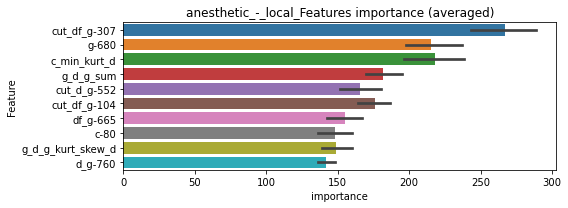

len(train_index) : 2826
len(valid_index) : 943
================================= fold 1/4 anesthetic_-_local=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2827
len(valid_index) : 942
================================= fold 2/4 anesthetic_-_local=================================


Early stopping, best iteration is:
[700]	training's binary_logloss: 0.000790537	valid_1's binary_logloss: 0.00628392
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000556042	valid_1's binary_logloss: 0.00247386
[2000]	training's binary_logloss: 0.000316826	valid_1's binary_logloss: 0.00211173
[3000]	training's binary_logloss: 0.000249064	valid_1's binary_logloss: 0.00200715
Early stopping, best iteration is:
[3201]	training's binary_logloss: 0.000240091	valid_1's binary_logloss: 0.00199273


len(train_index) : 2827
len(valid_index) : 942
================================= fold 3/4 anesthetic_-_local=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000541138	valid_1's binary_logloss: 0.00118275
[2000]	training's binary_logloss: 0.000308324	valid_1's binary_logloss: 0.000939407
Early stopping, best iteration is:
[2144]	training's binary_logloss: 0.00029587	valid_1's binary_logloss: 0.000925493


len(train_index) : 2827
len(valid_index) : 942
================================= fold 4/4 anesthetic_-_local=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000568108	valid_1's binary_logloss: 0.00352709
Early stopping, best iteration is:
[1726]	training's binary_logloss: 0.000354978	valid_1's binary_logloss: 0.00323619


anesthetic_-_local logloss: 0.0031106941943011136


neg labels: 3289 → selected neg labels: 3282


angiogenesis_inhibitor, len(trt): 36, len(othr): 3282
target_rate: 0.0015117 → Adj_target_rate: 0.0017663
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00223121	valid_1's binary_logloss: 0.0184455
[600]	training's binary_logloss: 0.000528453	valid_1's binary_logloss: 0.0155128
Early stopping, best iteration is:
[585]	training's binary_logloss: 0.000542619	valid_1's binary_logloss: 0.0154259
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00244741	valid_1's binary_logloss: 0.0148777
[600]	training's binary_logloss: 0.000545316	valid_1's binary_logloss: 0.00996533
Early stopping, best iteration is:
[665]	training's binary_logloss: 0.000500666	valid_1's binary_logloss: 0.009763
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00244542	valid_1's binary_logloss: 0.0107835
Early stopping, best iteration is:
[472]	training's binary_logloss: 0.000814351	valid_1's binary_logloss: 0.00846111
Training until validation scores don't improve for 30 rounds
[300]

1 / 3 AUC score:1.000
y_Threshold: 0.0039098, Threshold: 0.0143236, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, conf_0:0.01003, conf_1:0.01862
Num_p_label: 40.0, Expected: 6.0, Adj_threshold_1: 0.0143236
Num_p_label: 8.0, Expected: 6.0, Adj_threshold_2: 0.0443236
threshold: 0.0443236, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00209597	valid_1's binary_logloss: 0.0172708
[600]	training's binary_logloss: 0.000512069	valid_1's binary_logloss: 0.0142997
Early stopping, best iteration is:
[573]	training's binary_logloss: 0.000536342	valid_1's binary_logloss: 0.0142296
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.002167	valid_1's binary_logloss: 0.0141606
[600]	training's binary_logloss: 0.000516555	valid_1's binary_logloss: 0.00946706
Early stopping, best iteration is:
[637]	training's binary_logloss: 0.000492252	valid_1's binary_logloss: 0.00938864
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00233707	valid_1's binary_logloss: 0.00987489
Early stopping, best iteration is:
[525]	training's binary_logloss: 0.000640972	valid_1's binary_logloss: 0.00759409
Training until validation scores don't improve for 30 rounds
[300

2 / 3 AUC score:1.000
y_Threshold: 0.0321419, Threshold: 0.0443236, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 654.0/3802
p_label_rate: 0.0097941 Vs.target_rate: 0.00151
Num_p_label: 39.0, conf_0:0.03546, conf_1:0.05319
Num_p_label: 39.0, Expected: 6.0, Adj_threshold_1: 0.0443236
Num_p_label: 21.0, Expected: 6.0, Adj_threshold_2: 0.0743236
Num_p_label: 16.0, Expected: 6.0, Adj_threshold_3: 0.1043236
Num_p_label: 11.0, Expected: 6.0, Adj_threshold_4: 0.1343236
threshold: 0.1343236, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 654.0/3802, y_label_rate: 0.1720147
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0021557	valid_1's binary_logloss: 0.0101599
Early stopping, best iteration is:
[562]	training's binary_logloss: 0.000547131	valid_1's binary_logloss: 0.00652014
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00218306	valid_1's binary_logloss: 0.010705
[600]	training's binary_logloss: 0.000512538	valid_1's binary_logloss: 0.00759298
Early stopping, best iteration is:
[578]	training's binary_logloss: 0.00053412	valid_1's binary_logloss: 0.00757078
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0022083	valid_1's binary_logloss: 0.00904146
[600]	training's binary_logloss: 0.000522151	valid_1's binary_logloss: 0.00542303
Early stopping, best iteration is:
[683]	training's binary_logloss: 0.000481889	valid_1's binary_logloss: 0.00533986
Training until validation scores don't improve for 30 rounds
[300

3 / 3 AUC score:1.000
y_Threshold: 0.0361622, Threshold: 0.1343236, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 654.0/3802
p_label_rate: 0.0030136 Vs.target_rate: 0.00151
Num_p_label: 12.0, conf_0:0.12089, conf_1:0.14776
Num_p_label: 12.0, Expected: 6.0, Adj_threshold_1: 0.1343236
threshold: 0.1343236, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 654.0/3802, y_label_rate: 0.1720147


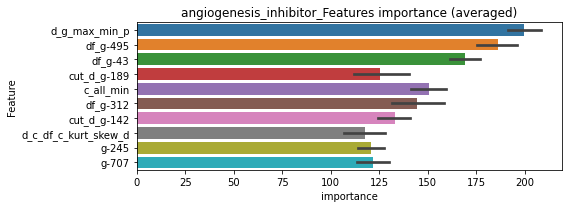

len(train_index) : 2851
len(valid_index) : 951
================================= fold 1/4 angiogenesis_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000504858	valid_1's binary_logloss: 0.00145097
Early stopping, best iteration is:
[1024]	training's binary_logloss: 0.000495739	valid_1's binary_logloss: 0.00142459


len(train_index) : 2851
len(valid_index) : 951
================================= fold 2/4 angiogenesis_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000514133	valid_1's binary_logloss: 0.00253323
Early stopping, best iteration is:
[1510]	training's binary_logloss: 0.000361269	valid_1's binary_logloss: 0.00230369


len(train_index) : 2852
len(valid_index) : 950
================================= fold 3/4 angiogenesis_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000496712	valid_1's binary_logloss: 0.00196609
[2000]	training's binary_logloss: 0.000292136	valid_1's binary_logloss: 0.0016879
[3000]	training's binary_logloss: 0.000230487	valid_1's binary_logloss: 0.00158992
[4000]	training's binary_logloss: 0.000202161	valid_1's binary_logloss: 0.00155144
[5000]	training's binary_logloss: 0.000186943	valid_1's binary_logloss: 0.00152434
Early stopping, best iteration is:
[5155]	training's binary_logloss: 0.000185205	valid_1's binary_logloss: 0.0015213


len(train_index) : 2852
len(valid_index) : 950
================================= fold 4/4 angiogenesis_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000415387	valid_1's binary_logloss: 0.000572694
[2000]	training's binary_logloss: 0.000240897	valid_1's binary_logloss: 0.000333205
[3000]	training's binary_logloss: 0.000179917	valid_1's binary_logloss: 0.000249164
[4000]	training's binary_logloss: 0.000150572	valid_1's binary_logloss: 0.000208717
[5000]	training's binary_logloss: 0.000135296	valid_1's binary_logloss: 0.000187608
[6000]	training's binary_logloss: 0.000125321	valid_1's binary_logloss: 0.000173785
[7000]	training's binary_logloss: 0.000118345	valid_1's binary_logloss: 0.000164115
[8000]	training's binary_logloss: 0.00011351	valid_1's binary_logloss: 0.000157417
[9000]	training's binary_logloss: 0.000110072	valid_1's binary_logloss: 0.000152647
[10000]	training's binary_logloss: 0.00010775	valid_1's binary_logloss: 0.000149464
Did not meet early stopping. Best iteration is:
[9999]	training's binary_logloss: 0.00010775	valid_1

angiogenesis_inhibitor logloss: 0.0013500416695189027


neg labels: 3289 → selected neg labels: 3286


angiotensin_receptor_antagonist, len(trt): 37, len(othr): 3286
target_rate: 0.0015537 → Adj_target_rate: 0.0018079
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00263477	valid_1's binary_logloss: 0.0116233
[600]	training's binary_logloss: 0.000585548	valid_1's binary_logloss: 0.00693466
Early stopping, best iteration is:
[733]	training's binary_logloss: 0.000491907	valid_1's binary_logloss: 0.00667654
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00265921	valid_1's binary_logloss: 0.0126702
[600]	training's binary_logloss: 0.000583995	valid_1's binary_logloss: 0.00671513
Early stopping, best iteration is:
[752]	training's binary_logloss: 0.000476972	valid_1's binary_logloss: 0.0064606
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00270279	valid_1's binary_logloss: 0.00740151
[600]	training's binary_logloss: 0.000596588	valid_1's binary_logloss: 0.00310831
Early stopping, best iteration is:
[730]	training's binary_logloss: 0.000500764	valid_1's binary_

1 / 3 AUC score:1.000
y_Threshold: 0.0034130, Threshold: 0.0135397, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00155


Early stopping, best iteration is:
[563]	training's binary_logloss: 0.000641545	valid_1's binary_logloss: 0.00912919


Num_p_label: 40.0, conf_0:0.00948, conf_1:0.01760
Num_p_label: 40.0, Expected: 6.2, Adj_threshold_1: 0.0135397
Num_p_label: 10.0, Expected: 6.2, Adj_threshold_2: 0.0435397
threshold: 0.0435397, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00249948	valid_1's binary_logloss: 0.0131095
[600]	training's binary_logloss: 0.000554897	valid_1's binary_logloss: 0.00796776
Early stopping, best iteration is:
[704]	training's binary_logloss: 0.000484011	valid_1's binary_logloss: 0.00774787
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00252514	valid_1's binary_logloss: 0.0101843
[600]	training's binary_logloss: 0.000562133	valid_1's binary_logloss: 0.00437937
Early stopping, best iteration is:
[769]	training's binary_logloss: 0.000460955	valid_1's binary_logloss: 0.00406973
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0025704	valid_1's binary_logloss: 0.00579698
[600]	training's binary_logloss: 0.000568086	valid_1's binary_logloss: 0.00206566
Early stopping, best iteration is:
[733]	training's binary_logloss: 0.000482596	valid_1's binary_

2 / 3 AUC score:1.000
y_Threshold: 0.0347597, Threshold: 0.0435397, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811


Early stopping, best iteration is:
[569]	training's binary_logloss: 0.000589083	valid_1's binary_logloss: 0.00867571


p_label_rate: 0.0077850 Vs.target_rate: 0.00155
Num_p_label: 31.0, conf_0:0.03483, conf_1:0.05225
Num_p_label: 31.0, Expected: 6.2, Adj_threshold_1: 0.0435397
Num_p_label: 20.0, Expected: 6.2, Adj_threshold_2: 0.0735397
Num_p_label: 15.0, Expected: 6.2, Adj_threshold_3: 0.1035397
threshold: 0.1035397, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00249948	valid_1's binary_logloss: 0.0131095
[600]	training's binary_logloss: 0.000554897	valid_1's binary_logloss: 0.00796776
Early stopping, best iteration is:
[704]	training's binary_logloss: 0.000484011	valid_1's binary_logloss: 0.00774787
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00252514	valid_1's binary_logloss: 0.0101843
[600]	training's binary_logloss: 0.000562133	valid_1's binary_logloss: 0.00437937
Early stopping, best iteration is:
[769]	training's binary_logloss: 0.000460955	valid_1's binary_logloss: 0.00406973
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0025704	valid_1's binary_logloss: 0.00579698
[600]	training's binary_logloss: 0.000568086	valid_1's binary_logloss: 0.00206566
Early stopping, best iteration is:
[733]	training's binary_logloss: 0.000482596	valid_1's binary_

3 / 3 AUC score:1.000
y_Threshold: 0.0347597, Threshold: 0.1035397, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[569]	training's binary_logloss: 0.000589083	valid_1's binary_logloss: 0.00867571


Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0037670 Vs.target_rate: 0.00155
Num_p_label: 15.0, conf_0:0.09319, conf_1:0.11389
Num_p_label: 15.0, Expected: 6.2, Adj_threshold_1: 0.1035397
threshold: 0.1035397, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


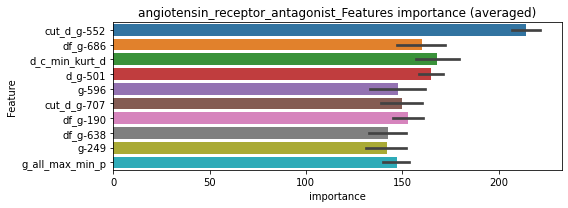

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 angiotensin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000519732	valid_1's binary_logloss: 0.00327321
[2000]	training's binary_logloss: 0.000301464	valid_1's binary_logloss: 0.0029402
Early stopping, best iteration is:
[2521]	training's binary_logloss: 0.000260637	valid_1's binary_logloss: 0.00288522


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 angiotensin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000513282	valid_1's binary_logloss: 0.000777593
[2000]	training's binary_logloss: 0.000294482	valid_1's binary_logloss: 0.000493745
[3000]	training's binary_logloss: 0.000227257	valid_1's binary_logloss: 0.000399829
[4000]	training's binary_logloss: 0.000195743	valid_1's binary_logloss: 0.000349786
[5000]	training's binary_logloss: 0.000179372	valid_1's binary_logloss: 0.000323588
[6000]	training's binary_logloss: 0.000168969	valid_1's binary_logloss: 0.000305681
Early stopping, best iteration is:
[6456]	training's binary_logloss: 0.000165156	valid_1's binary_logloss: 0.00029957


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 angiotensin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00041967	valid_1's binary_logloss: 0.00052401
[2000]	training's binary_logloss: 0.000241969	valid_1's binary_logloss: 0.000302819
[3000]	training's binary_logloss: 0.000180337	valid_1's binary_logloss: 0.000225854
[4000]	training's binary_logloss: 0.000150482	valid_1's binary_logloss: 0.000188547
[5000]	training's binary_logloss: 0.000135041	valid_1's binary_logloss: 0.000169231
[6000]	training's binary_logloss: 0.000125117	valid_1's binary_logloss: 0.000156814
[7000]	training's binary_logloss: 0.000118184	valid_1's binary_logloss: 0.000148135
[8000]	training's binary_logloss: 0.000113405	valid_1's binary_logloss: 0.000142153
[9000]	training's binary_logloss: 0.000110004	valid_1's binary_logloss: 0.000137892
[10000]	training's binary_logloss: 0.000107555	valid_1's binary_logloss: 0.000134831
Did not meet early stopping. Best iteration is:
[9999]	training's binary_logloss: 0.000107555	valid_

len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 angiotensin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


angiotensin_receptor_antagonist logloss: 0.0030624677902556575


Early stopping, best iteration is:
[427]	training's binary_logloss: 0.00113867	valid_1's binary_logloss: 0.00893574
neg labels: 3289 → selected neg labels: 3278


anti-inflammatory, len(trt): 73, len(othr): 3278
target_rate: 0.0030654 → Adj_target_rate: 0.0032212
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00728597	valid_1's binary_logloss: 0.0452837
[600]	training's binary_logloss: 0.00123197	valid_1's binary_logloss: 0.0336833
Early stopping, best iteration is:
[642]	training's binary_logloss: 0.00108816	valid_1's binary_logloss: 0.0331911
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00790668	valid_1's binary_logloss: 0.0346341
[600]	training's binary_logloss: 0.00130803	valid_1's binary_logloss: 0.0197605
Early stopping, best iteration is:
[779]	training's binary_logloss: 0.000853144	valid_1's binary_logloss: 0.0184732
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00733455	valid_1's binary_logloss: 0.0493888
[600]	training's binary_logloss: 0.00125197	valid_1's binary_logloss: 0.0404954
Early stopping, best iteration is:
[580]	training's binary_logloss: 0.00133471	valid_1's binary_logloss: 0

1 / 3 AUC score:0.999
y_Threshold: 0.0104917, Threshold: 0.0754802, pos_neg_ratio: 0.8000000
Remove_noisy_data: 140 → Positive_corect_labels: 651/3793
p_label_rate: 0.0100452 Vs.target_rate: 0.00307
Num_p_label: 40.0, conf_0:0.05284, conf_1:0.09812
Num_p_label: 40.0, Expected: 12.2, Adj_threshold_1: 0.0754802
Num_p_label: 32.0, Expected: 12.2, Adj_threshold_2: 0.1054802
Num_p_label: 24.0, Expected: 12.2, Adj_threshold_3: 0.1354802
Num_p_label: 20.0, Expected: 12.2, Adj_threshold_4: 0.1654802
Num_p_label: 17.0, Expected: 12.2, Adj_threshold_5: 0.1954802
threshold: 0.1954802, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 651.0/3793, y_label_rate: 0.1716320
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00637811	valid_1's binary_logloss: 0.0425065
[600]	training's binary_logloss: 0.00115377	valid_1's binary_logloss: 0.0290962
Early stopping, best iteration is:
[708]	training's binary_logloss: 0.000877483	valid_1's binary_logloss: 0.0280011
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00646773	valid_1's binary_logloss: 0.0411945
[600]	training's binary_logloss: 0.00116259	valid_1's binary_logloss: 0.0291716
Early stopping, best iteration is:
[760]	training's binary_logloss: 0.000798735	valid_1's binary_logloss: 0.027985
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00676965	valid_1's binary_logloss: 0.0331435
[600]	training's binary_logloss: 0.0011922	valid_1's binary_logloss: 0.022093
Early stopping, best iteration is:
[694]	training's binary_logloss: 0.00092947	valid_1's binary_logloss: 0.0

2 / 3 AUC score:1.000
y_Threshold: 0.0430765, Threshold: 0.1954802, pos_neg_ratio: 0.8000000
Remove_noisy_data: 12 → Positive_corect_labels: 645.0/3781
p_label_rate: 0.0113009 Vs.target_rate: 0.00307
Num_p_label: 45.0, conf_0:0.15638, conf_1:0.23458
Num_p_label: 45.0, Expected: 12.2, Adj_threshold_1: 0.1954802
Num_p_label: 41.0, Expected: 12.2, Adj_threshold_2: 0.2254802
Num_p_label: 37.0, Expected: 12.2, Adj_threshold_3: 0.2554802
Num_p_label: 33.0, Expected: 12.2, Adj_threshold_4: 0.2854802
Num_p_label: 28.0, Expected: 12.2, Adj_threshold_5: 0.3154802
Num_p_label: 26.0, Expected: 12.2, Adj_threshold_6: 0.3454802
Num_p_label: 23.0, Expected: 12.2, Adj_threshold_7: 0.3754802
Num_p_label: 20.0, Expected: 12.2, Adj_threshold_8: 0.4054802
Num_p_label: 17.0, Expected: 12.2, Adj_threshold_9: 0.4354802
threshold: 0.4354802, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 645.0/3781, y_label_rate: 0.1705898
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00620693	valid_1's binary_logloss: 0.0480256
[600]	training's binary_logloss: 0.00112541	valid_1's binary_logloss: 0.0328921
Early stopping, best iteration is:
[752]	training's binary_logloss: 0.000785009	valid_1's binary_logloss: 0.0317525
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00623268	valid_1's binary_logloss: 0.038962
[600]	training's binary_logloss: 0.00112757	valid_1's binary_logloss: 0.0285146
Early stopping, best iteration is:
[597]	training's binary_logloss: 0.00113895	valid_1's binary_logloss: 0.0284635
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00618603	valid_1's binary_logloss: 0.0416309
[600]	training's binary_logloss: 0.00114161	valid_1's binary_logloss: 0.032072
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.00115427	valid_1's binary_logloss: 0.0

3 / 3 AUC score:1.000
y_Threshold: 0.0468367, Threshold: 0.4354802, pos_neg_ratio: 0.8000000
Remove_noisy_data: 14 → Positive_corect_labels: 638.0/3767
p_label_rate: 0.0045203 Vs.target_rate: 0.00307
Num_p_label: 18.0, conf_0:0.39193, conf_1:0.47903
threshold: 0.4354802, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 638.0/3767, y_label_rate: 0.1693655


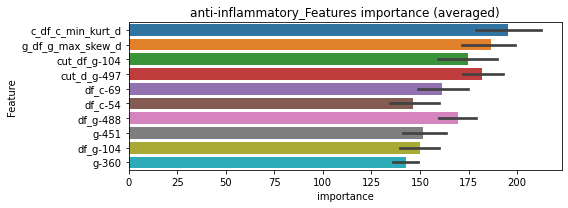

len(train_index) : 2825
len(valid_index) : 942
================================= fold 1/4 anti-inflammatory=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000566752	valid_1's binary_logloss: 0.00567292
Early stopping, best iteration is:
[1228]	training's binary_logloss: 0.000475616	valid_1's binary_logloss: 0.00552893


len(train_index) : 2825
len(valid_index) : 942
================================= fold 2/4 anti-inflammatory=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000551792	valid_1's binary_logloss: 0.00158129
Early stopping, best iteration is:
[1528]	training's binary_logloss: 0.000380417	valid_1's binary_logloss: 0.00141128


len(train_index) : 2825
len(valid_index) : 942
================================= fold 3/4 anti-inflammatory=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000542476	valid_1's binary_logloss: 0.00177864
[2000]	training's binary_logloss: 0.000311264	valid_1's binary_logloss: 0.00145778
Early stopping, best iteration is:
[2813]	training's binary_logloss: 0.000247271	valid_1's binary_logloss: 0.00136685


len(train_index) : 2826
len(valid_index) : 941
================================= fold 4/4 anti-inflammatory=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000551454	valid_1's binary_logloss: 0.00115352
Early stopping, best iteration is:
[1682]	training's binary_logloss: 0.000355261	valid_1's binary_logloss: 0.000903797


anti-inflammatory logloss: 0.002303793130743418


neg labels: 3289 → selected neg labels: 3284


antiarrhythmic, len(trt): 24, len(othr): 3284
target_rate: 0.0010078 → Adj_target_rate: 0.0012513
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00180634	valid_1's binary_logloss: 0.00647187
[600]	training's binary_logloss: 0.000455764	valid_1's binary_logloss: 0.00319161
Early stopping, best iteration is:
[620]	training's binary_logloss: 0.000448556	valid_1's binary_logloss: 0.00316882
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00191503	valid_1's binary_logloss: 0.0070284
[600]	training's binary_logloss: 0.000460628	valid_1's binary_logloss: 0.00398636
Early stopping, best iteration is:
[638]	training's binary_logloss: 0.000446892	valid_1's binary_logloss: 0.00395089
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00186555	valid_1's binary_logloss: 0.00554184
[600]	training's binary_logloss: 0.000457249	valid_1's binary_logloss: 0.00306645
Early stopping, best iteration is:
[601]	training's binary_logloss: 0.000457249	valid_1's binar

1 / 3 AUC score:1.000
y_Threshold: 0.0026711, Threshold: 0.0080753, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00101
Num_p_label: 40.0, conf_0:0.00565, conf_1:0.01050
Num_p_label: 40.0, Expected: 4.0, Adj_threshold_1: 0.0080753
Num_p_label: 3.0, Expected: 4.0, Adj_threshold_2: 0.0380753
threshold: 0.0380753, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00170009	valid_1's binary_logloss: 0.00575598
[600]	training's binary_logloss: 0.000447079	valid_1's binary_logloss: 0.00294423
Early stopping, best iteration is:
[584]	training's binary_logloss: 0.000447079	valid_1's binary_logloss: 0.00294423
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00169639	valid_1's binary_logloss: 0.00710175
[600]	training's binary_logloss: 0.000435224	valid_1's binary_logloss: 0.00448207
Early stopping, best iteration is:
[602]	training's binary_logloss: 0.000435224	valid_1's binary_logloss: 0.00448207
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00171366	valid_1's binary_logloss: 0.00555968
[600]	training's binary_logloss: 0.000442036	valid_1's binary_logloss: 0.00309742
Early stopping, best iteration is:
[583]	training's binary_logloss: 0.000446073	valid_1's bina

2 / 3 AUC score:1.000
y_Threshold: 0.0205316, Threshold: 0.0380753, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808


[600]	training's binary_logloss: 0.000445885	valid_1's binary_logloss: 0.00372352
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000445885	valid_1's binary_logloss: 0.00372352


p_label_rate: 0.0022602 Vs.target_rate: 0.00101
Num_p_label: 9.0, conf_0:0.03046, conf_1:0.04569
Num_p_label: 9.0, Expected: 4.0, Adj_threshold_1: 0.0380753
threshold: 0.0380753, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00170009	valid_1's binary_logloss: 0.00575598
[600]	training's binary_logloss: 0.000447079	valid_1's binary_logloss: 0.00294423
Early stopping, best iteration is:
[585]	training's binary_logloss: 0.000447079	valid_1's binary_logloss: 0.00294423
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00169639	valid_1's binary_logloss: 0.00710175
[600]	training's binary_logloss: 0.000435224	valid_1's binary_logloss: 0.00448207
Early stopping, best iteration is:
[595]	training's binary_logloss: 0.000435224	valid_1's binary_logloss: 0.00448207
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00171366	valid_1's binary_logloss: 0.00555968
[600]	training's binary_logloss: 0.000442036	valid_1's binary_logloss: 0.00309742
Early stopping, best iteration is:
[583]	training's binary_logloss: 0.000446073	valid_1's bina

3 / 3 AUC score:1.000
y_Threshold: 0.0205316, Threshold: 0.0380753, pos_neg_ratio: 0.8000000


[600]	training's binary_logloss: 0.000445885	valid_1's binary_logloss: 0.00372352
Early stopping, best iteration is:
[597]	training's binary_logloss: 0.000445885	valid_1's binary_logloss: 0.00372352


Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0022602 Vs.target_rate: 0.00101
Num_p_label: 9.0, conf_0:0.03427, conf_1:0.04188
Num_p_label: 9.0, Expected: 4.0, Adj_threshold_1: 0.0380753
threshold: 0.0380753, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


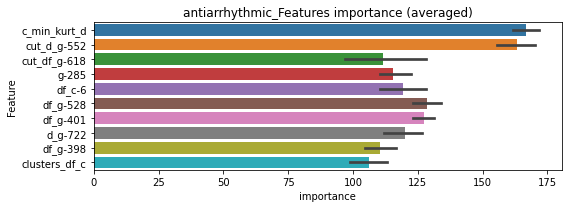

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 antiarrhythmic=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000476903	valid_1's binary_logloss: 0.00140156
[2000]	training's binary_logloss: 0.000280641	valid_1's binary_logloss: 0.00104343
[3000]	training's binary_logloss: 0.000222818	valid_1's binary_logloss: 0.000908845
[4000]	training's binary_logloss: 0.000194613	valid_1's binary_logloss: 0.000856464
Early stopping, best iteration is:
[4962]	training's binary_logloss: 0.000180542	valid_1's binary_logloss: 0.000824827


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 antiarrhythmic=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00048489	valid_1's binary_logloss: 0.00161833
[2000]	training's binary_logloss: 0.000291221	valid_1's binary_logloss: 0.00135868
[3000]	training's binary_logloss: 0.000236593	valid_1's binary_logloss: 0.00128405
[4000]	training's binary_logloss: 0.000210288	valid_1's binary_logloss: 0.00124921
[5000]	training's binary_logloss: 0.00019611	valid_1's binary_logloss: 0.00123012
Early stopping, best iteration is:
[5586]	training's binary_logloss: 0.000190173	valid_1's binary_logloss: 0.00122232


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 antiarrhythmic=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000401133	valid_1's binary_logloss: 0.000503282
[2000]	training's binary_logloss: 0.000236731	valid_1's binary_logloss: 0.000297781
[3000]	training's binary_logloss: 0.000178109	valid_1's binary_logloss: 0.000224257
[4000]	training's binary_logloss: 0.000149521	valid_1's binary_logloss: 0.000188374
[5000]	training's binary_logloss: 0.000134489	valid_1's binary_logloss: 0.000169476
[6000]	training's binary_logloss: 0.000124703	valid_1's binary_logloss: 0.00015716
[7000]	training's binary_logloss: 0.000117845	valid_1's binary_logloss: 0.000148525
[8000]	training's binary_logloss: 0.000113132	valid_1's binary_logloss: 0.000142592
[9000]	training's binary_logloss: 0.000109776	valid_1's binary_logloss: 0.000138364
[10000]	training's binary_logloss: 0.000107501	valid_1's binary_logloss: 0.000135516
Did not meet early stopping. Best iteration is:
[9999]	training's binary_logloss: 0.000107501	valid

len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 antiarrhythmic=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000473611	valid_1's binary_logloss: 0.00199358
Early stopping, best iteration is:
[1214]	training's binary_logloss: 0.000405118	valid_1's binary_logloss: 0.00190865


antiarrhythmic logloss: 0.001022925766053541


neg labels: 3289 → selected neg labels: 3281


antibiotic, len(trt): 43, len(othr): 3281
target_rate: 0.0018057 → Adj_target_rate: 0.0020542
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00360289	valid_1's binary_logloss: 0.0214161
[600]	training's binary_logloss: 0.000702977	valid_1's binary_logloss: 0.0140977
Early stopping, best iteration is:
[635]	training's binary_logloss: 0.000649938	valid_1's binary_logloss: 0.013742
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00343001	valid_1's binary_logloss: 0.0165249
[600]	training's binary_logloss: 0.000688942	valid_1's binary_logloss: 0.010395
Early stopping, best iteration is:
[758]	training's binary_logloss: 0.000560038	valid_1's binary_logloss: 0.0100505
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00379866	valid_1's binary_logloss: 0.00844569
[600]	training's binary_logloss: 0.000725144	valid_1's binary_logloss: 0.00281244
Early stopping, best iteration is:
[808]	training's binary_logloss: 0.000555967	valid_1's binary_loglo

1 / 3 AUC score:1.000
y_Threshold: 0.0051504, Threshold: 0.0443671, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00181
Num_p_label: 40.0, conf_0:0.03106, conf_1:0.05768
Num_p_label: 40.0, Expected: 7.2, Adj_threshold_1: 0.0443671
Num_p_label: 22.0, Expected: 7.2, Adj_threshold_2: 0.0743671
Num_p_label: 14.0, Expected: 7.2, Adj_threshold_3: 0.1043671
threshold: 0.1043671, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00321684	valid_1's binary_logloss: 0.0190367
[600]	training's binary_logloss: 0.000661735	valid_1's binary_logloss: 0.0122124
Early stopping, best iteration is:
[683]	training's binary_logloss: 0.000573002	valid_1's binary_logloss: 0.0119267
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00335213	valid_1's binary_logloss: 0.0130067
[600]	training's binary_logloss: 0.000679501	valid_1's binary_logloss: 0.00814737
Early stopping, best iteration is:
[689]	training's binary_logloss: 0.000578124	valid_1's binary_logloss: 0.00794222
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00334452	valid_1's binary_logloss: 0.00810312
[600]	training's binary_logloss: 0.000676408	valid_1's binary_logloss: 0.00287764
Early stopping, best iteration is:
[732]	training's binary_logloss: 0.000563256	valid_1's binary_l

2 / 3 AUC score:1.000
y_Threshold: 0.0341898, Threshold: 0.1043671, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3805
p_label_rate: 0.0133099 Vs.target_rate: 0.00181
Num_p_label: 53.0, conf_0:0.08349, conf_1:0.12524
Num_p_label: 53.0, Expected: 7.2, Adj_threshold_1: 0.1043671
Num_p_label: 38.0, Expected: 7.2, Adj_threshold_2: 0.1343671
Num_p_label: 31.0, Expected: 7.2, Adj_threshold_3: 0.1643671
Num_p_label: 27.0, Expected: 7.2, Adj_threshold_4: 0.1943671
Num_p_label: 23.0, Expected: 7.2, Adj_threshold_5: 0.2243671
Num_p_label: 20.0, Expected: 7.2, Adj_threshold_6: 0.2543671
Num_p_label: 17.0, Expected: 7.2, Adj_threshold_7: 0.2843671
threshold: 0.2843671, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00321684	valid_1's binary_logloss: 0.0190367
[600]	training's binary_logloss: 0.000661735	valid_1's binary_logloss: 0.0122124
Early stopping, best iteration is:
[683]	training's binary_logloss: 0.000573002	valid_1's binary_logloss: 0.0119267
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00335213	valid_1's binary_logloss: 0.0130067
[600]	training's binary_logloss: 0.000679501	valid_1's binary_logloss: 0.00814737
Early stopping, best iteration is:
[689]	training's binary_logloss: 0.000578124	valid_1's binary_logloss: 0.00794222
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00334452	valid_1's binary_logloss: 0.00810312
[600]	training's binary_logloss: 0.000676408	valid_1's binary_logloss: 0.00287764
Early stopping, best iteration is:
[718]	training's binary_logloss: 0.000563256	valid_1's binary_l

3 / 3 AUC score:1.000
y_Threshold: 0.0341898, Threshold: 0.2843671, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3805
p_label_rate: 0.0042692 Vs.target_rate: 0.00181
Num_p_label: 17.0, conf_0:0.25593, conf_1:0.31280
Num_p_label: 17.0, Expected: 7.2, Adj_threshold_1: 0.2843671
threshold: 0.2843671, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 656.0/3805, y_label_rate: 0.1724047


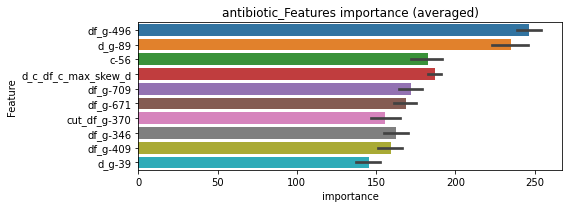

len(train_index) : 2853
len(valid_index) : 952
================================= fold 1/4 antibiotic=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000430297	valid_1's binary_logloss: 0.000722292
[2000]	training's binary_logloss: 0.000244904	valid_1's binary_logloss: 0.000413843
[3000]	training's binary_logloss: 0.00018162	valid_1's binary_logloss: 0.000307599
[4000]	training's binary_logloss: 0.000151302	valid_1's binary_logloss: 0.000256649
[5000]	training's binary_logloss: 0.000135671	valid_1's binary_logloss: 0.000230317
[6000]	training's binary_logloss: 0.000125537	valid_1's binary_logloss: 0.000213156
[7000]	training's binary_logloss: 0.000118486	valid_1's binary_logloss: 0.00020121
[8000]	training's binary_logloss: 0.000113616	valid_1's binary_logloss: 0.000192938
[9000]	training's binary_logloss: 0.000110182	valid_1's binary_logloss: 0.000187119
[10000]	training's binary_logloss: 0.000107761	valid_1's binary_logloss: 0.000183069
Did not meet early stopping. Best iteration is:
[9999]	training's binary_logloss: 0.000107761	valid_

len(train_index) : 2854
len(valid_index) : 951
================================= fold 2/4 antibiotic=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00053345	valid_1's binary_logloss: 0.00437735
Early stopping, best iteration is:
[1123]	training's binary_logloss: 0.000481161	valid_1's binary_logloss: 0.00432431


len(train_index) : 2854
len(valid_index) : 951
================================= fold 3/4 antibiotic=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000431525	valid_1's binary_logloss: 0.000566321
[2000]	training's binary_logloss: 0.00024531	valid_1's binary_logloss: 0.000322193
[3000]	training's binary_logloss: 0.000181805	valid_1's binary_logloss: 0.000238849
[4000]	training's binary_logloss: 0.000151394	valid_1's binary_logloss: 0.000198933
[5000]	training's binary_logloss: 0.000135714	valid_1's binary_logloss: 0.000178343
[6000]	training's binary_logloss: 0.0001256	valid_1's binary_logloss: 0.000165058
[7000]	training's binary_logloss: 0.000118546	valid_1's binary_logloss: 0.00015579
[8000]	training's binary_logloss: 0.000113692	valid_1's binary_logloss: 0.000149413
[9000]	training's binary_logloss: 0.000110244	valid_1's binary_logloss: 0.000144882
[10000]	training's binary_logloss: 0.000107796	valid_1's binary_logloss: 0.000141669
Did not meet early stopping. Best iteration is:
[9999]	training's binary_logloss: 0.000107796	valid_1'

len(train_index) : 2854
len(valid_index) : 951
================================= fold 4/4 antibiotic=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000515323	valid_1's binary_logloss: 0.00696586
Early stopping, best iteration is:
[1115]	training's binary_logloss: 0.000469632	valid_1's binary_logloss: 0.00690445


antibiotic logloss: 0.002888344415176033


neg labels: 3289 → selected neg labels: 3286


anticonvulsant, len(trt): 18, len(othr): 3286
target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00113212	valid_1's binary_logloss: 0.003209
[600]	training's binary_logloss: 0.000329524	valid_1's binary_logloss: 0.00143397
Early stopping, best iteration is:
[607]	training's binary_logloss: 0.000328682	valid_1's binary_logloss: 0.00143202
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00111201	valid_1's binary_logloss: 0.00472667
Early stopping, best iteration is:
[559]	training's binary_logloss: 0.000338132	valid_1's binary_logloss: 0.00281885
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00111609	valid_1's binary_logloss: 0.00507068
Early stopping, best iteration is:
[502]	training's binary_logloss: 0.000374865	valid_1's binary_logloss: 0.00438206
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00111407	valid_1's binary_logloss: 0.00394138


1 / 3 AUC score:1.000
y_Threshold: 0.0016859, Threshold: 0.0051626, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, conf_0:0.00361, conf_1:0.00671
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_1: 0.0051626


[600]	training's binary_logloss: 0.000323786	valid_1's binary_logloss: 0.00203482
Early stopping, best iteration is:
[606]	training's binary_logloss: 0.000322519	valid_1's binary_logloss: 0.00202727


Num_p_label: 4.0, Expected: 3.0, Adj_threshold_2: 0.0351626
threshold: 0.0351626, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00108298	valid_1's binary_logloss: 0.00226968
[600]	training's binary_logloss: 0.000322909	valid_1's binary_logloss: 0.000991047
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000322919	valid_1's binary_logloss: 0.000991006
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00105191	valid_1's binary_logloss: 0.00435673
Early stopping, best iteration is:
[562]	training's binary_logloss: 0.000326971	valid_1's binary_logloss: 0.00275501
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00106562	valid_1's binary_logloss: 0.00576132
Early stopping, best iteration is:
[467]	training's binary_logloss: 0.000398782	valid_1's binary_logloss: 0.00498494
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00106173	valid_1's binary_logloss: 0.004366

2 / 3 AUC score:1.000
y_Threshold: 0.0112384, Threshold: 0.0351626, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0022602 Vs.target_rate: 0.00076
Num_p_label: 9.0, conf_0:0.02813, conf_1:0.04220
Num_p_label: 9.0, Expected: 3.0, Adj_threshold_1: 0.0351626
Num_p_label: 4.0, Expected: 3.0, Adj_threshold_2: 0.0651626
threshold: 0.0651626, positive_p_label: 4.0/3982, p_label_rate: 0.0010045


Early stopping, best iteration is:
[520]	training's binary_logloss: 0.000341981	valid_1's binary_logloss: 0.00242551


positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00108298	valid_1's binary_logloss: 0.00226968
[600]	training's binary_logloss: 0.000322909	valid_1's binary_logloss: 0.000991047
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000322919	valid_1's binary_logloss: 0.000991006
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00105191	valid_1's binary_logloss: 0.00435673
Early stopping, best iteration is:
[562]	training's binary_logloss: 0.000326971	valid_1's binary_logloss: 0.00275501
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00106562	valid_1's binary_logloss: 0.00576132
Early stopping, best iteration is:
[467]	training's binary_logloss: 0.000398782	valid_1's binary_logloss: 0.00498494
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00106173	valid_1's binary_logloss: 0.004366

3 / 3 AUC score:1.000
y_Threshold: 0.0112384, Threshold: 0.0651626, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0010045 Vs.target_rate: 0.00076


Early stopping, best iteration is:
[520]	training's binary_logloss: 0.000341981	valid_1's binary_logloss: 0.00242551


Num_p_label: 4.0, conf_0:0.05865, conf_1:0.07168
threshold: 0.0651626, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


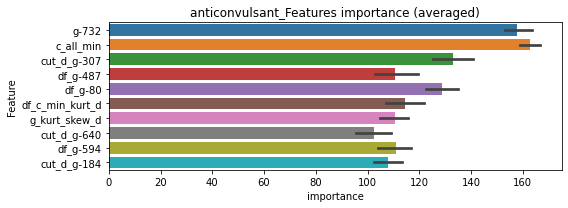

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 anticonvulsant=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000452762	valid_1's binary_logloss: 0.000494197
[2000]	training's binary_logloss: 0.000268766	valid_1's binary_logloss: 0.00030993
[3000]	training's binary_logloss: 0.000218966	valid_1's binary_logloss: 0.000256099
[4000]	training's binary_logloss: 0.00019642	valid_1's binary_logloss: 0.0002303
[5000]	training's binary_logloss: 0.000184788	valid_1's binary_logloss: 0.000216528
[6000]	training's binary_logloss: 0.000177212	valid_1's binary_logloss: 0.000207815
[7000]	training's binary_logloss: 0.000172066	valid_1's binary_logloss: 0.000202094
Early stopping, best iteration is:
[7566]	training's binary_logloss: 0.000169901	valid_1's binary_logloss: 0.000199749


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 anticonvulsant=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000446378	valid_1's binary_logloss: 0.00151502
[2000]	training's binary_logloss: 0.000267655	valid_1's binary_logloss: 0.00129638
Early stopping, best iteration is:
[2301]	training's binary_logloss: 0.000247943	valid_1's binary_logloss: 0.00127393


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 anticonvulsant=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000455405	valid_1's binary_logloss: 0.00243719
[2000]	training's binary_logloss: 0.000270562	valid_1's binary_logloss: 0.00208407
[3000]	training's binary_logloss: 0.000218944	valid_1's binary_logloss: 0.00195271
[4000]	training's binary_logloss: 0.000196524	valid_1's binary_logloss: 0.00190052
[5000]	training's binary_logloss: 0.000184804	valid_1's binary_logloss: 0.00187404
[6000]	training's binary_logloss: 0.000177503	valid_1's binary_logloss: 0.00185605
Early stopping, best iteration is:
[6703]	training's binary_logloss: 0.000173394	valid_1's binary_logloss: 0.00184475


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 anticonvulsant=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000464844	valid_1's binary_logloss: 0.00304959
[2000]	training's binary_logloss: 0.000271306	valid_1's binary_logloss: 0.00263038
Early stopping, best iteration is:
[2420]	training's binary_logloss: 0.000240036	valid_1's binary_logloss: 0.00255278


anticonvulsant logloss: 0.001468085863438294


neg labels: 3289 → selected neg labels: 3286


antifungal, len(trt): 26, len(othr): 3286
target_rate: 0.0010918 → Adj_target_rate: 0.0013394
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00158646	valid_1's binary_logloss: 0.0043507
[600]	training's binary_logloss: 0.000410835	valid_1's binary_logloss: 0.00188244
Early stopping, best iteration is:
[650]	training's binary_logloss: 0.000396889	valid_1's binary_logloss: 0.00186024
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00152412	valid_1's binary_logloss: 0.00672227
[600]	training's binary_logloss: 0.00040309	valid_1's binary_logloss: 0.00447657
Early stopping, best iteration is:
[583]	training's binary_logloss: 0.000410629	valid_1's binary_logloss: 0.00444996
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00156604	valid_1's binary_logloss: 0.0030928
[600]	training's binary_logloss: 0.000407266	valid_1's binary_logloss: 0.00121767
Early stopping, best iteration is:
[654]	training's binary_logloss: 0.000390723	valid_1's binary_

1 / 3 AUC score:1.000
y_Threshold: 0.0022483, Threshold: 0.0068503, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00109
Num_p_label: 40.0, conf_0:0.00480, conf_1:0.00891
Num_p_label: 40.0, Expected: 4.3, Adj_threshold_1: 0.0068503
Num_p_label: 3.0, Expected: 4.3, Adj_threshold_2: 0.0368503


Early stopping, best iteration is:
[554]	training's binary_logloss: 0.000434527	valid_1's binary_logloss: 0.00412389


threshold: 0.0368503, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00150503	valid_1's binary_logloss: 0.00482695
[600]	training's binary_logloss: 0.000403465	valid_1's binary_logloss: 0.00221397
Early stopping, best iteration is:
[593]	training's binary_logloss: 0.00040404	valid_1's binary_logloss: 0.00221332
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00143444	valid_1's binary_logloss: 0.0065786
Early stopping, best iteration is:
[568]	training's binary_logloss: 0.000402825	valid_1's binary_logloss: 0.00464252
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00150962	valid_1's binary_logloss: 0.00256161
[600]	training's binary_logloss: 0.000396174	valid_1's binary_logloss: 0.000876494
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.000391748	valid_1's binary_logloss: 0.000868118
Training until validation scores don't improve for 30 round

2 / 3 AUC score:1.000
y_Threshold: 0.0277425, Threshold: 0.0368503, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0020090 Vs.target_rate: 0.00109
Num_p_label: 8.0, conf_0:0.02948, conf_1:0.04422
Num_p_label: 8.0, Expected: 4.3, Adj_threshold_1: 0.0368503
threshold: 0.0368503, positive_p_label: 8.0/3982, p_label_rate: 0.0020090


Early stopping, best iteration is:
[545]	training's binary_logloss: 0.000428133	valid_1's binary_logloss: 0.00497112


positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00150503	valid_1's binary_logloss: 0.00482695
[600]	training's binary_logloss: 0.000403465	valid_1's binary_logloss: 0.00221397
Early stopping, best iteration is:
[593]	training's binary_logloss: 0.00040404	valid_1's binary_logloss: 0.00221332
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00143444	valid_1's binary_logloss: 0.0065786
Early stopping, best iteration is:
[568]	training's binary_logloss: 0.000402825	valid_1's binary_logloss: 0.00464252
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00150962	valid_1's binary_logloss: 0.00256161
[600]	training's binary_logloss: 0.000396174	valid_1's binary_logloss: 0.000876494
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.000391748	valid_1's binary_logloss: 0.000868118
Training until validation scores don't improve for 30 round

3 / 3 AUC score:1.000
y_Threshold: 0.0277425, Threshold: 0.0368503, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811


Early stopping, best iteration is:
[545]	training's binary_logloss: 0.000428133	valid_1's binary_logloss: 0.00497112


p_label_rate: 0.0020090 Vs.target_rate: 0.00109
Num_p_label: 8.0, conf_0:0.03317, conf_1:0.04054
Num_p_label: 8.0, Expected: 4.3, Adj_threshold_1: 0.0368503
threshold: 0.0368503, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


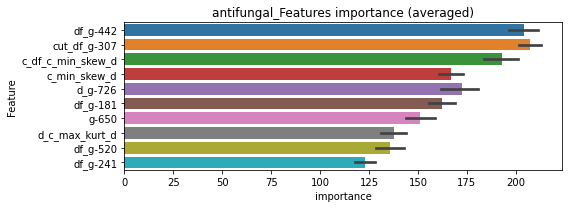

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 antifungal=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00039295	valid_1's binary_logloss: 0.000540686
[2000]	training's binary_logloss: 0.000234203	valid_1's binary_logloss: 0.000323991
[3000]	training's binary_logloss: 0.000177019	valid_1's binary_logloss: 0.000245369
[4000]	training's binary_logloss: 0.000148896	valid_1's binary_logloss: 0.000206644
[5000]	training's binary_logloss: 0.000134059	valid_1's binary_logloss: 0.000186132
[6000]	training's binary_logloss: 0.000124426	valid_1's binary_logloss: 0.00017279
[7000]	training's binary_logloss: 0.000117664	valid_1's binary_logloss: 0.000163416
[8000]	training's binary_logloss: 0.000113009	valid_1's binary_logloss: 0.000156966
[9000]	training's binary_logloss: 0.00010971	valid_1's binary_logloss: 0.000152395
[10000]	training's binary_logloss: 0.000107416	valid_1's binary_logloss: 0.000149254
Did not meet early stopping. Best iteration is:
[9999]	training's binary_logloss: 0.000107416	valid_1

len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 antifungal=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000437802	valid_1's binary_logloss: 0.000968375
[2000]	training's binary_logloss: 0.000264334	valid_1's binary_logloss: 0.00073458
Early stopping, best iteration is:
[2484]	training's binary_logloss: 0.000232498	valid_1's binary_logloss: 0.000695749


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 antifungal=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000470299	valid_1's binary_logloss: 0.000425185
[2000]	training's binary_logloss: 0.00028015	valid_1's binary_logloss: 0.000242765
[3000]	training's binary_logloss: 0.000226521	valid_1's binary_logloss: 0.000188869
[4000]	training's binary_logloss: 0.000201655	valid_1's binary_logloss: 0.000162502
[5000]	training's binary_logloss: 0.000188923	valid_1's binary_logloss: 0.000148597
[6000]	training's binary_logloss: 0.000180269	valid_1's binary_logloss: 0.000139377
[7000]	training's binary_logloss: 0.000174218	valid_1's binary_logloss: 0.000132828
[8000]	training's binary_logloss: 0.000169716	valid_1's binary_logloss: 0.000128119
Early stopping, best iteration is:
[8584]	training's binary_logloss: 0.000167519	valid_1's binary_logloss: 0.00012586


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 antifungal=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000392048	valid_1's binary_logloss: 0.000572472
[2000]	training's binary_logloss: 0.000233651	valid_1's binary_logloss: 0.000343495
[3000]	training's binary_logloss: 0.000176716	valid_1's binary_logloss: 0.000260401
[4000]	training's binary_logloss: 0.000148547	valid_1's binary_logloss: 0.000219169
[5000]	training's binary_logloss: 0.000133806	valid_1's binary_logloss: 0.000197528
[6000]	training's binary_logloss: 0.000124246	valid_1's binary_logloss: 0.000183472
[7000]	training's binary_logloss: 0.000117549	valid_1's binary_logloss: 0.000173622
[8000]	training's binary_logloss: 0.000112935	valid_1's binary_logloss: 0.000166834
[9000]	training's binary_logloss: 0.000109656	valid_1's binary_logloss: 0.00016201
[10000]	training's binary_logloss: 0.000107307	valid_1's binary_logloss: 0.000158568
Did not meet early stopping. Best iteration is:
[9999]	training's binary_logloss: 0.000107307	valid

antifungal logloss: 0.0002824475584962252


neg labels: 3289 → selected neg labels: 3288


antihistamine, len(trt): 18, len(othr): 3288
target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00132238	valid_1's binary_logloss: 0.00311987
[600]	training's binary_logloss: 0.00038172	valid_1's binary_logloss: 0.00133213
Early stopping, best iteration is:
[571]	training's binary_logloss: 0.00038172	valid_1's binary_logloss: 0.00133213
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00123737	valid_1's binary_logloss: 0.00533056
Early stopping, best iteration is:
[546]	training's binary_logloss: 0.000387496	valid_1's binary_logloss: 0.00301061
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00129276	valid_1's binary_logloss: 0.00343183
Early stopping, best iteration is:
[565]	training's binary_logloss: 0.000380407	valid_1's binary_logloss: 0.00148671
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00125713	valid_1's binary_logloss: 0.00478847


1 / 3 AUC score:1.000
y_Threshold: 0.0026022, Threshold: 0.0808001, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, conf_0:0.05656, conf_1:0.10504
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_1: 0.0808001
Num_p_label: 34.0, Expected: 3.0, Adj_threshold_2: 0.1108001
Num_p_label: 29.0, Expected: 3.0, Adj_threshold_3: 0.1408001
Num_p_label: 27.0, Expected: 3.0, Adj_threshold_4: 0.1708001
Num_p_label: 23.0, Expected: 3.0, Adj_threshold_5: 0.2008001
Num_p_label: 23.0, Expected: 3.0, Adj_threshold_6: 0.2308001
Num_p_label: 23.0, Expected: 3.0, Adj_threshold_7: 0.2608001


Early stopping, best iteration is:
[546]	training's binary_logloss: 0.000391155	valid_1's binary_logloss: 0.00301812


Num_p_label: 19.0, Expected: 3.0, Adj_threshold_8: 0.2908001
Num_p_label: 19.0, Expected: 3.0, Adj_threshold_9: 0.3208001
Num_p_label: 18.0, Expected: 3.0, Adj_threshold_10: 0.3508001
threshold: 0.3808001, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00117748	valid_1's binary_logloss: 0.00287633
Early stopping, best iteration is:
[561]	training's binary_logloss: 0.000367464	valid_1's binary_logloss: 0.00129008
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00112052	valid_1's binary_logloss: 0.00521326
Early stopping, best iteration is:
[531]	training's binary_logloss: 0.000366075	valid_1's binary_logloss: 0.00310941
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00118666	valid_1's binary_logloss: 0.0020455
Early stopping, best iteration is:
[567]	training's binary_logloss: 0.000358974	valid_1's binary_logloss: 0.000778574
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00115857	valid_1's binary_logloss: 0.00363825


2 / 3 AUC score:1.000
y_Threshold: 0.0857031, Threshold: 0.3808001, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0097941 Vs.target_rate: 0.00076
Num_p_label: 39.0, conf_0:0.30464, conf_1:0.45696
Num_p_label: 39.0, Expected: 3.0, Adj_threshold_1: 0.3808001
Num_p_label: 38.0, Expected: 3.0, Adj_threshold_2: 0.4108001
Num_p_label: 36.0, Expected: 3.0, Adj_threshold_3: 0.4408001
Num_p_label: 31.0, Expected: 3.0, Adj_threshold_4: 0.4708001
Num_p_label: 29.0, Expected: 3.0, Adj_threshold_5: 0.5008001


Early stopping, best iteration is:
[556]	training's binary_logloss: 0.000368254	valid_1's binary_logloss: 0.0022383


Num_p_label: 27.0, Expected: 3.0, Adj_threshold_6: 0.5308001
Num_p_label: 26.0, Expected: 3.0, Adj_threshold_7: 0.5608001
Num_p_label: 24.0, Expected: 3.0, Adj_threshold_8: 0.5908001
Num_p_label: 24.0, Expected: 3.0, Adj_threshold_9: 0.6208001
Num_p_label: 23.0, Expected: 3.0, Adj_threshold_10: 0.6508001
threshold: 0.6808001, positive_p_label: 23.0/3982, p_label_rate: 0.0057760
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00117748	valid_1's binary_logloss: 0.00287633
Early stopping, best iteration is:
[561]	training's binary_logloss: 0.000367464	valid_1's binary_logloss: 0.00129008
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00112052	valid_1's binary_logloss: 0.00521326
Early stopping, best iteration is:
[531]	training's binary_logloss: 0.000366075	valid_1's binary_logloss: 0.00310941
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00118666	valid_1's binary_logloss: 0.0020455
Early stopping, best iteration is:
[567]	training's binary_logloss: 0.000358974	valid_1's binary_logloss: 0.000778574
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00115857	valid_1's binary_logloss: 0.00363825


3 / 3 AUC score:1.000
y_Threshold: 0.0857031, Threshold: 0.6808001, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0057760 Vs.target_rate: 0.00076


Early stopping, best iteration is:
[556]	training's binary_logloss: 0.000368254	valid_1's binary_logloss: 0.0022383


Num_p_label: 23.0, conf_0:0.50000, conf_1:0.74888
Num_p_label: 23.0, Expected: 3.0, Adj_threshold_1: 0.6808001
Num_p_label: 22.0, Expected: 3.0, Adj_threshold_2: 0.7108001
Num_p_label: 21.0, Expected: 3.0, Adj_threshold_3: 0.7408001
Num_p_label: 17.0, Expected: 3.0, Adj_threshold_4: 0.7708001
threshold: 0.7708001, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


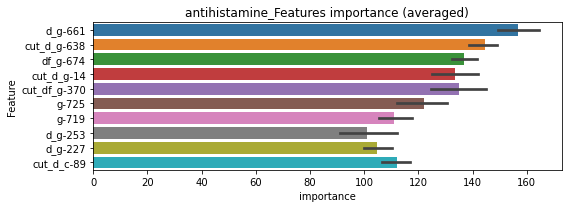

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 antihistamine=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00045422	valid_1's binary_logloss: 0.00104503
[2000]	training's binary_logloss: 0.000270517	valid_1's binary_logloss: 0.000805697
Early stopping, best iteration is:
[2710]	training's binary_logloss: 0.000228429	valid_1's binary_logloss: 0.000745568


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 antihistamine=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000435776	valid_1's binary_logloss: 0.00356357
[2000]	training's binary_logloss: 0.000265884	valid_1's binary_logloss: 0.00322959
Early stopping, best iteration is:
[2036]	training's binary_logloss: 0.00026342	valid_1's binary_logloss: 0.00322537


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 antihistamine=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000451551	valid_1's binary_logloss: 0.000565564
[2000]	training's binary_logloss: 0.000267966	valid_1's binary_logloss: 0.000378476
[3000]	training's binary_logloss: 0.000216277	valid_1's binary_logloss: 0.000326131
[4000]	training's binary_logloss: 0.000193171	valid_1's binary_logloss: 0.000299924
[5000]	training's binary_logloss: 0.000180445	valid_1's binary_logloss: 0.000284725
Early stopping, best iteration is:
[5799]	training's binary_logloss: 0.000173132	valid_1's binary_logloss: 0.00027714


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 antihistamine=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000450767	valid_1's binary_logloss: 0.00243797
[2000]	training's binary_logloss: 0.000263501	valid_1's binary_logloss: 0.00218635
Early stopping, best iteration is:
[2024]	training's binary_logloss: 0.00026156	valid_1's binary_logloss: 0.00218554


antihistamine logloss: 0.0016095327566135358


neg labels: 3289 → selected neg labels: 3287


antimalarial, len(trt): 18, len(othr): 3287
target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00133466	valid_1's binary_logloss: 0.00300954
Early stopping, best iteration is:
[518]	training's binary_logloss: 0.000417292	valid_1's binary_logloss: 0.00146102
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00133339	valid_1's binary_logloss: 0.00613249
Early stopping, best iteration is:
[541]	training's binary_logloss: 0.000404975	valid_1's binary_logloss: 0.00342387
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00136923	valid_1's binary_logloss: 0.00280822
Early stopping, best iteration is:
[548]	training's binary_logloss: 0.000408043	valid_1's binary_logloss: 0.00111903
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0013292	valid_1's binary_logloss: 0.00585642


1 / 3 AUC score:1.000
y_Threshold: 0.0024427, Threshold: 0.0100329, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, conf_0:0.00702, conf_1:0.01304
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_1: 0.0100329
Num_p_label: 10.0, Expected: 3.0, Adj_threshold_2: 0.0400329
Num_p_label: 4.0, Expected: 3.0, Adj_threshold_3: 0.0700329


Early stopping, best iteration is:
[531]	training's binary_logloss: 0.000412175	valid_1's binary_logloss: 0.00375874


threshold: 0.0700329, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00121855	valid_1's binary_logloss: 0.00287803
Early stopping, best iteration is:
[540]	training's binary_logloss: 0.0003807	valid_1's binary_logloss: 0.00128974
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00118151	valid_1's binary_logloss: 0.0056748
Early stopping, best iteration is:
[548]	training's binary_logloss: 0.000370473	valid_1's binary_logloss: 0.00338929
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00124679	valid_1's binary_logloss: 0.00187102
Early stopping, best iteration is:
[559]	training's binary_logloss: 0.00038506	valid_1's binary_logloss: 0.000674484
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00119667	valid_1's binary_logloss: 0.00426337


2 / 3 AUC score:1.000
y_Threshold: 0.2884029, Threshold: 0.0700329, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3810


Early stopping, best iteration is:
[529]	training's binary_logloss: 0.000380103	valid_1's binary_logloss: 0.00262912


p_label_rate: 0.0070316 Vs.target_rate: 0.00076
Num_p_label: 28.0, conf_0:0.05603, conf_1:0.08404
Num_p_label: 28.0, Expected: 3.0, Adj_threshold_1: 0.0700329
Num_p_label: 27.0, Expected: 3.0, Adj_threshold_2: 0.1000329
Num_p_label: 23.0, Expected: 3.0, Adj_threshold_3: 0.1300329
Num_p_label: 18.0, Expected: 3.0, Adj_threshold_4: 0.1600329
Num_p_label: 17.0, Expected: 3.0, Adj_threshold_5: 0.1900329
Num_p_label: 16.0, Expected: 3.0, Adj_threshold_6: 0.2200329
Num_p_label: 15.0, Expected: 3.0, Adj_threshold_7: 0.2500329
Num_p_label: 14.0, Expected: 3.0, Adj_threshold_8: 0.2800329
Num_p_label: 14.0, Expected: 3.0, Adj_threshold_9: 0.3100329
Num_p_label: 12.0, Expected: 3.0, Adj_threshold_10: 0.3400329
threshold: 0.3700329, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 656.0/3810, y_label_rate: 0.1721785
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00119905	valid_1's binary_logloss: 0.00289997
Early stopping, best iteration is:
[522]	training's binary_logloss: 0.000384228	valid_1's binary_logloss: 0.00146588
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0011532	valid_1's binary_logloss: 0.00632504
Early stopping, best iteration is:
[526]	training's binary_logloss: 0.000375381	valid_1's binary_logloss: 0.00438892
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0012399	valid_1's binary_logloss: 0.00192152
Early stopping, best iteration is:
[534]	training's binary_logloss: 0.000388075	valid_1's binary_logloss: 0.00068557
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0012182	valid_1's binary_logloss: 0.00371344


3 / 3 AUC score:1.000
y_Threshold: 0.0957505, Threshold: 0.3700329, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3810
p_label_rate: 0.0030136 Vs.target_rate: 0.00076
Num_p_label: 12.0, conf_0:0.33303, conf_1:0.40704


Early stopping, best iteration is:
[528]	training's binary_logloss: 0.000389725	valid_1's binary_logloss: 0.00218867


Num_p_label: 12.0, Expected: 3.0, Adj_threshold_1: 0.3700329
Num_p_label: 11.0, Expected: 3.0, Adj_threshold_2: 0.4000329
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_3: 0.4300329
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_4: 0.4600329
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_5: 0.4900329
threshold: 0.4900329, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 656.0/3810, y_label_rate: 0.1721785


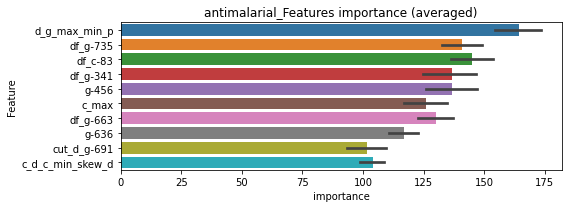

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 antimalarial=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000454499	valid_1's binary_logloss: 0.000712044
[2000]	training's binary_logloss: 0.00027026	valid_1's binary_logloss: 0.000504391
[3000]	training's binary_logloss: 0.000216864	valid_1's binary_logloss: 0.000435554
Early stopping, best iteration is:
[3070]	training's binary_logloss: 0.000214183	valid_1's binary_logloss: 0.000431618


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 antimalarial=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[954]	training's binary_logloss: 0.000451369	valid_1's binary_logloss: 0.00163992


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 antimalarial=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000454645	valid_1's binary_logloss: 0.000577799
[2000]	training's binary_logloss: 0.000270857	valid_1's binary_logloss: 0.000383872
[3000]	training's binary_logloss: 0.000218653	valid_1's binary_logloss: 0.000324394
[4000]	training's binary_logloss: 0.000195598	valid_1's binary_logloss: 0.000297324
Early stopping, best iteration is:
[4226]	training's binary_logloss: 0.00019245	valid_1's binary_logloss: 0.000293421


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 antimalarial=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000443445	valid_1's binary_logloss: 0.00106446
Early stopping, best iteration is:
[1079]	training's binary_logloss: 0.000417517	valid_1's binary_logloss: 0.00103216


antimalarial logloss: 0.0008496278527184594


neg labels: 3289 → selected neg labels: 3281


antioxidant, len(trt): 73, len(othr): 3281
target_rate: 0.0030654 → Adj_target_rate: 0.0032212
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00677098	valid_1's binary_logloss: 0.0532408
[600]	training's binary_logloss: 0.00114239	valid_1's binary_logloss: 0.0408352
Early stopping, best iteration is:
[574]	training's binary_logloss: 0.00124554	valid_1's binary_logloss: 0.0407672
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00737548	valid_1's binary_logloss: 0.0453232
[600]	training's binary_logloss: 0.00118613	valid_1's binary_logloss: 0.0339564
Early stopping, best iteration is:
[781]	training's binary_logloss: 0.000792535	valid_1's binary_logloss: 0.032908
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00765589	valid_1's binary_logloss: 0.0290173
[600]	training's binary_logloss: 0.00123988	valid_1's binary_logloss: 0.0200016
Early stopping, best iteration is:
[652]	training's binary_logloss: 0.00106147	valid_1's binary_logloss: 0.

1 / 3 AUC score:0.999
y_Threshold: 0.0099328, Threshold: 0.0385709, pos_neg_ratio: 0.8000000
Remove_noisy_data: 140 → Positive_corect_labels: 652/3797
p_label_rate: 0.0100452 Vs.target_rate: 0.00307
Num_p_label: 40.0, conf_0:0.02700, conf_1:0.05014
Num_p_label: 40.0, Expected: 12.2, Adj_threshold_1: 0.0385709
Num_p_label: 22.0, Expected: 12.2, Adj_threshold_2: 0.0685709
Num_p_label: 14.0, Expected: 12.2, Adj_threshold_3: 0.0985709


Early stopping, best iteration is:
[440]	training's binary_logloss: 0.00250369	valid_1's binary_logloss: 0.0488287


threshold: 0.0985709, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 652.0/3797, y_label_rate: 0.1717145
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00705679	valid_1's binary_logloss: 0.0312469
[600]	training's binary_logloss: 0.00117393	valid_1's binary_logloss: 0.0192148
Early stopping, best iteration is:
[829]	training's binary_logloss: 0.000730954	valid_1's binary_logloss: 0.0178057
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00675161	valid_1's binary_logloss: 0.0427208
[600]	training's binary_logloss: 0.0011335	valid_1's binary_logloss: 0.0339561
Early stopping, best iteration is:
[581]	training's binary_logloss: 0.00120681	valid_1's binary_logloss: 0.0338681
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00685827	valid_1's binary_logloss: 0.0416679
[600]	training's binary_logloss: 0.0011491	valid_1's binary_logloss: 0.0329248
Early stopping, best iteration is:
[675]	training's binary_logloss: 0.000932698	valid_1's binary_logloss: 0.

2 / 3 AUC score:0.999
y_Threshold: 0.0245214, Threshold: 0.0985709, pos_neg_ratio: 0.8000000
Remove_noisy_data: 12 → Positive_corect_labels: 646.0/3785
p_label_rate: 0.0065294 Vs.target_rate: 0.00307
Num_p_label: 26.0, conf_0:0.07886, conf_1:0.11829
Num_p_label: 26.0, Expected: 12.2, Adj_threshold_1: 0.0985709
Num_p_label: 24.0, Expected: 12.2, Adj_threshold_2: 0.1285709
Num_p_label: 13.0, Expected: 12.2, Adj_threshold_3: 0.1585709
threshold: 0.1585709, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 646.0/3785, y_label_rate: 0.1706737
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00677048	valid_1's binary_logloss: 0.0451766
[600]	training's binary_logloss: 0.00111407	valid_1's binary_logloss: 0.0359364
Early stopping, best iteration is:
[734]	training's binary_logloss: 0.000806338	valid_1's binary_logloss: 0.0348646
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00620798	valid_1's binary_logloss: 0.0431358
[600]	training's binary_logloss: 0.00108144	valid_1's binary_logloss: 0.0321885
Early stopping, best iteration is:
[581]	training's binary_logloss: 0.00114733	valid_1's binary_logloss: 0.0320299
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00687568	valid_1's binary_logloss: 0.037454
[600]	training's binary_logloss: 0.00111009	valid_1's binary_logloss: 0.0268985
Early stopping, best iteration is:
[684]	training's binary_logloss: 0.000891428	valid_1's binary_logloss: 0

3 / 3 AUC score:0.999
y_Threshold: 0.0366629, Threshold: 0.1585709, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 641.0/3775
p_label_rate: 0.0047715 Vs.target_rate: 0.00307
Num_p_label: 19.0, conf_0:0.14271, conf_1:0.17443
Num_p_label: 19.0, Expected: 12.2, Adj_threshold_1: 0.1585709
Num_p_label: 14.0, Expected: 12.2, Adj_threshold_2: 0.1885709
threshold: 0.1885709, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 641.0/3775, y_label_rate: 0.1698013


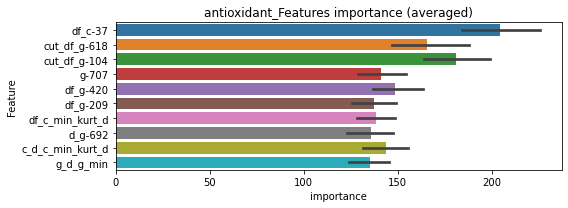

len(train_index) : 2831
len(valid_index) : 944
================================= fold 1/4 antioxidant=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2831
len(valid_index) : 944
================================= fold 2/4 antioxidant=================================


Early stopping, best iteration is:
[725]	training's binary_logloss: 0.000761787	valid_1's binary_logloss: 0.00501879
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000596638	valid_1's binary_logloss: 0.00142203
Early stopping, best iteration is:
[1359]	training's binary_logloss: 0.000450773	valid_1's binary_logloss: 0.00130066


len(train_index) : 2831
len(valid_index) : 944
================================= fold 3/4 antioxidant=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000559936	valid_1's binary_logloss: 0.00528358
Early stopping, best iteration is:
[1140]	training's binary_logloss: 0.000500397	valid_1's binary_logloss: 0.00518681


len(train_index) : 2832
len(valid_index) : 943
================================= fold 4/4 antioxidant=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000557649	valid_1's binary_logloss: 0.00213657
Early stopping, best iteration is:
[1848]	training's binary_logloss: 0.000337921	valid_1's binary_logloss: 0.00189088


antioxidant logloss: 0.003349722763545894


neg labels: 3289 → selected neg labels: 3283


antiprotozoal, len(trt): 36, len(othr): 3283
target_rate: 0.0015117 → Adj_target_rate: 0.0017663
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00308307	valid_1's binary_logloss: 0.00940234
[600]	training's binary_logloss: 0.00060863	valid_1's binary_logloss: 0.00382686
Early stopping, best iteration is:
[713]	training's binary_logloss: 0.000512563	valid_1's binary_logloss: 0.00356766
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00301865	valid_1's binary_logloss: 0.0102533
[600]	training's binary_logloss: 0.00059795	valid_1's binary_logloss: 0.0048566
Early stopping, best iteration is:
[704]	training's binary_logloss: 0.000505024	valid_1's binary_logloss: 0.00459823
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00322815	valid_1's binary_logloss: 0.00661364
[600]	training's binary_logloss: 0.000612824	valid_1's binary_logloss: 0.00176416
Early stopping, best iteration is:
[746]	training's binary_logloss: 0.000508945	valid_1's binary_l

1 / 3 AUC score:1.000
y_Threshold: 0.0040329, Threshold: 0.0163247, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, conf_0:0.01143, conf_1:0.02122
Num_p_label: 40.0, Expected: 6.0, Adj_threshold_1: 0.0163247
Num_p_label: 10.0, Expected: 6.0, Adj_threshold_2: 0.0463247
threshold: 0.0463247, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00279567	valid_1's binary_logloss: 0.0095939
[600]	training's binary_logloss: 0.000573254	valid_1's binary_logloss: 0.00427994
Early stopping, best iteration is:
[720]	training's binary_logloss: 0.000489368	valid_1's binary_logloss: 0.00402114
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00280719	valid_1's binary_logloss: 0.00794765
[600]	training's binary_logloss: 0.000575132	valid_1's binary_logloss: 0.0035984
Early stopping, best iteration is:
[729]	training's binary_logloss: 0.000487578	valid_1's binary_logloss: 0.00342987
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00291542	valid_1's binary_logloss: 0.00625528
[600]	training's binary_logloss: 0.000581901	valid_1's binary_logloss: 0.00164101
Early stopping, best iteration is:
[761]	training's binary_logloss: 0.000487558	valid_1's binary

2 / 3 AUC score:1.000
y_Threshold: 0.0320074, Threshold: 0.0463247, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0052737 Vs.target_rate: 0.00151
Num_p_label: 21.0, conf_0:0.03706, conf_1:0.05559
Num_p_label: 21.0, Expected: 6.0, Adj_threshold_1: 0.0463247
Num_p_label: 10.0, Expected: 6.0, Adj_threshold_2: 0.0763247
threshold: 0.0763247, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00279567	valid_1's binary_logloss: 0.0095939
[600]	training's binary_logloss: 0.000573254	valid_1's binary_logloss: 0.00427994
Early stopping, best iteration is:
[720]	training's binary_logloss: 0.000489368	valid_1's binary_logloss: 0.00402114
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00280719	valid_1's binary_logloss: 0.00794765
[600]	training's binary_logloss: 0.000575132	valid_1's binary_logloss: 0.0035984
Early stopping, best iteration is:
[729]	training's binary_logloss: 0.000487578	valid_1's binary_logloss: 0.00342987
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00291542	valid_1's binary_logloss: 0.00625528
[600]	training's binary_logloss: 0.000581901	valid_1's binary_logloss: 0.00164101
Early stopping, best iteration is:
[757]	training's binary_logloss: 0.000487558	valid_1's binary

3 / 3 AUC score:1.000
y_Threshold: 0.0320074, Threshold: 0.0763247, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0025113 Vs.target_rate: 0.00151
Num_p_label: 10.0, conf_0:0.06869, conf_1:0.08396
Num_p_label: 10.0, Expected: 6.0, Adj_threshold_1: 0.0763247
threshold: 0.0763247, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 656.0/3807, y_label_rate: 0.1723142


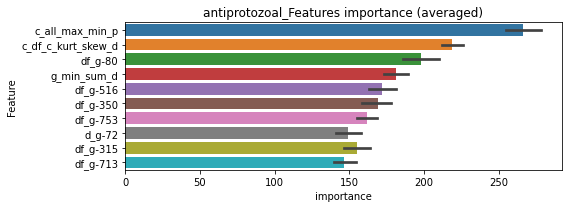

len(train_index) : 2855
len(valid_index) : 952
================================= fold 1/4 antiprotozoal=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00051262	valid_1's binary_logloss: 0.000959533
[2000]	training's binary_logloss: 0.000301561	valid_1's binary_logloss: 0.000661671
[3000]	training's binary_logloss: 0.000241056	valid_1's binary_logloss: 0.000576894
Early stopping, best iteration is:
[3942]	training's binary_logloss: 0.000213488	valid_1's binary_logloss: 0.000536186


len(train_index) : 2855
len(valid_index) : 952
================================= fold 2/4 antiprotozoal=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000504451	valid_1's binary_logloss: 0.00234125
[2000]	training's binary_logloss: 0.000298162	valid_1's binary_logloss: 0.00212747
Early stopping, best iteration is:
[2224]	training's binary_logloss: 0.000281473	valid_1's binary_logloss: 0.00210527


len(train_index) : 2855
len(valid_index) : 952
================================= fold 3/4 antiprotozoal=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000502018	valid_1's binary_logloss: 0.00119364
Early stopping, best iteration is:
[1356]	training's binary_logloss: 0.000385155	valid_1's binary_logloss: 0.00105344


len(train_index) : 2856
len(valid_index) : 951
================================= fold 4/4 antiprotozoal=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[933]	training's binary_logloss: 0.00052821	valid_1's binary_logloss: 0.00186954


antiprotozoal logloss: 0.0013910878839084866


neg labels: 3289 → selected neg labels: 3282


antiviral, len(trt): 23, len(othr): 3282
target_rate: 0.0009658 → Adj_target_rate: 0.0012069
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0014388	valid_1's binary_logloss: 0.00455391
[600]	training's binary_logloss: 0.000380404	valid_1's binary_logloss: 0.00221453
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000381002	valid_1's binary_logloss: 0.00221389
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00146531	valid_1's binary_logloss: 0.00270788
[600]	training's binary_logloss: 0.000382727	valid_1's binary_logloss: 0.000938251
Early stopping, best iteration is:
[626]	training's binary_logloss: 0.00037711	valid_1's binary_logloss: 0.000927135
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00148687	valid_1's binary_logloss: 0.00298534
[600]	training's binary_logloss: 0.000385359	valid_1's binary_logloss: 0.00105471
Early stopping, best iteration is:
[649]	training's binary_logloss: 0.000372275	valid_1's bina

1 / 3 AUC score:1.000
y_Threshold: 0.0023105, Threshold: 0.0088457, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00097
Num_p_label: 40.0, conf_0:0.00619, conf_1:0.01150
Num_p_label: 40.0, Expected: 3.8, Adj_threshold_1: 0.0088457
Num_p_label: 8.0, Expected: 3.8, Adj_threshold_2: 0.0388457


[600]	training's binary_logloss: 0.000381936	valid_1's binary_logloss: 0.00154361
Early stopping, best iteration is:
[597]	training's binary_logloss: 0.000382195	valid_1's binary_logloss: 0.00154219


threshold: 0.0388457, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0013271	valid_1's binary_logloss: 0.00360509
[600]	training's binary_logloss: 0.000361691	valid_1's binary_logloss: 0.00165999
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000362247	valid_1's binary_logloss: 0.00165618
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00134978	valid_1's binary_logloss: 0.00235951
[600]	training's binary_logloss: 0.000365757	valid_1's binary_logloss: 0.000823566
Early stopping, best iteration is:
[615]	training's binary_logloss: 0.000362652	valid_1's binary_logloss: 0.000817566
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0013647	valid_1's binary_logloss: 0.00326193
[600]	training's binary_logloss: 0.000363882	valid_1's binary_logloss: 0.00153071
Early stopping, best iteration is:
[634]	training's binary_logloss: 0.000358417	valid_1's bina

2 / 3 AUC score:1.000
y_Threshold: 0.0939499, Threshold: 0.0388457, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3806
p_label_rate: 0.0055249 Vs.target_rate: 0.00097


[600]	training's binary_logloss: 0.00036489	valid_1's binary_logloss: 0.00187905
Early stopping, best iteration is:
[607]	training's binary_logloss: 0.000362447	valid_1's binary_logloss: 0.00187266


Num_p_label: 22.0, conf_0:0.03108, conf_1:0.04661
Num_p_label: 22.0, Expected: 3.8, Adj_threshold_1: 0.0388457
Num_p_label: 13.0, Expected: 3.8, Adj_threshold_2: 0.0688457
Num_p_label: 10.0, Expected: 3.8, Adj_threshold_3: 0.0988457
Num_p_label: 7.0, Expected: 3.8, Adj_threshold_4: 0.1288457
threshold: 0.1288457, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0013271	valid_1's binary_logloss: 0.00360509
[600]	training's binary_logloss: 0.000361691	valid_1's binary_logloss: 0.00165999
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000362247	valid_1's binary_logloss: 0.00165618
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00134978	valid_1's binary_logloss: 0.00235951
[600]	training's binary_logloss: 0.000365757	valid_1's binary_logloss: 0.000823566
Early stopping, best iteration is:
[615]	training's binary_logloss: 0.000362652	valid_1's binary_logloss: 0.000817566
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0013647	valid_1's binary_logloss: 0.00326193
[600]	training's binary_logloss: 0.000363882	valid_1's binary_logloss: 0.00153071
Early stopping, best iteration is:
[634]	training's binary_logloss: 0.000358417	valid_1's bina

3 / 3 AUC score:1.000
y_Threshold: 0.0939499, Threshold: 0.1288457, pos_neg_ratio: 0.8000000


[600]	training's binary_logloss: 0.00036489	valid_1's binary_logloss: 0.00187905
Early stopping, best iteration is:
[607]	training's binary_logloss: 0.000362447	valid_1's binary_logloss: 0.00187266


Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3806
p_label_rate: 0.0017579 Vs.target_rate: 0.00097
Num_p_label: 7.0, conf_0:0.11596, conf_1:0.14173
Num_p_label: 7.0, Expected: 3.8, Adj_threshold_1: 0.1288457
threshold: 0.1288457, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 656.0/3806, y_label_rate: 0.1723594


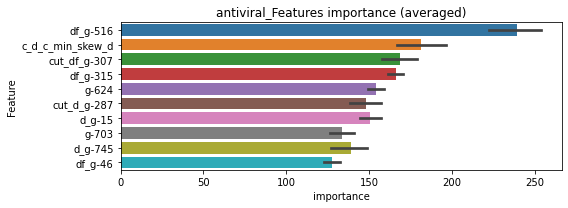

len(train_index) : 2854
len(valid_index) : 952
================================= fold 1/4 antiviral=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000432632	valid_1's binary_logloss: 0.00115324
Early stopping, best iteration is:
[1712]	training's binary_logloss: 0.000288617	valid_1's binary_logloss: 0.000946366


len(train_index) : 2854
len(valid_index) : 952
================================= fold 2/4 antiviral=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000439573	valid_1's binary_logloss: 0.000422269
[2000]	training's binary_logloss: 0.000266414	valid_1's binary_logloss: 0.000246193
[3000]	training's binary_logloss: 0.000216638	valid_1's binary_logloss: 0.000192094
[4000]	training's binary_logloss: 0.000191766	valid_1's binary_logloss: 0.000164091
[5000]	training's binary_logloss: 0.000178471	valid_1's binary_logloss: 0.000148964
[6000]	training's binary_logloss: 0.000169471	valid_1's binary_logloss: 0.000138751
[7000]	training's binary_logloss: 0.000163185	valid_1's binary_logloss: 0.000131548
[8000]	training's binary_logloss: 0.000158544	valid_1's binary_logloss: 0.000126186
Early stopping, best iteration is:
[8722]	training's binary_logloss: 0.00015581	valid_1's binary_logloss: 0.000123015


len(train_index) : 2855
len(valid_index) : 951
================================= fold 3/4 antiviral=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000381527	valid_1's binary_logloss: 0.000452068
[2000]	training's binary_logloss: 0.000230193	valid_1's binary_logloss: 0.00027319
[3000]	training's binary_logloss: 0.000175291	valid_1's binary_logloss: 0.000208086
[4000]	training's binary_logloss: 0.000147858	valid_1's binary_logloss: 0.000175543
[5000]	training's binary_logloss: 0.000133435	valid_1's binary_logloss: 0.00015843
[6000]	training's binary_logloss: 0.000124073	valid_1's binary_logloss: 0.00014732
[7000]	training's binary_logloss: 0.000117493	valid_1's binary_logloss: 0.000139512
[8000]	training's binary_logloss: 0.000112935	valid_1's binary_logloss: 0.000134102
[9000]	training's binary_logloss: 0.000109712	valid_1's binary_logloss: 0.000130276
[10000]	training's binary_logloss: 0.000107366	valid_1's binary_logloss: 0.000127493
Did not meet early stopping. Best iteration is:
[9999]	training's binary_logloss: 0.000107366	valid_1

len(train_index) : 2855
len(valid_index) : 951
================================= fold 4/4 antiviral=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000451034	valid_1's binary_logloss: 0.00158771
[2000]	training's binary_logloss: 0.000271429	valid_1's binary_logloss: 0.00130529
[3000]	training's binary_logloss: 0.00022101	valid_1's binary_logloss: 0.00122824
[4000]	training's binary_logloss: 0.000196308	valid_1's binary_logloss: 0.00119142
Early stopping, best iteration is:
[4206]	training's binary_logloss: 0.000193273	valid_1's binary_logloss: 0.00118572


antiviral logloss: 0.0005959326457794234


neg labels: 3289 → selected neg labels: 3283


apoptosis_stimulant, len(trt): 49, len(othr): 3283
target_rate: 0.0020576 → Adj_target_rate: 0.0022954
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00373133	valid_1's binary_logloss: 0.0347222
Early stopping, best iteration is:
[497]	training's binary_logloss: 0.00102721	valid_1's binary_logloss: 0.0296619
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00402993	valid_1's binary_logloss: 0.0268352
[600]	training's binary_logloss: 0.000761049	valid_1's binary_logloss: 0.0211358
Early stopping, best iteration is:
[617]	training's binary_logloss: 0.000729364	valid_1's binary_logloss: 0.0211086
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00441808	valid_1's binary_logloss: 0.00893955
[600]	training's binary_logloss: 0.000822612	valid_1's binary_logloss: 0.00331653
Early stopping, best iteration is:
[760]	training's binary_logloss: 0.000614748	valid_1's binary_logloss: 0.00282165
Training until validation scores don't improve for 30 rounds
[300

1 / 3 AUC score:1.000
y_Threshold: 0.0053212, Threshold: 0.0449537, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 655/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00206
Num_p_label: 40.0, conf_0:0.03147, conf_1:0.05844
Num_p_label: 40.0, Expected: 8.2, Adj_threshold_1: 0.0449537
Num_p_label: 26.0, Expected: 8.2, Adj_threshold_2: 0.0749537
Num_p_label: 18.0, Expected: 8.2, Adj_threshold_3: 0.1049537
threshold: 0.1049537, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 655.0/3805, y_label_rate: 0.1721419
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0035957	valid_1's binary_logloss: 0.0204564
[600]	training's binary_logloss: 0.000714263	valid_1's binary_logloss: 0.013813
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.000662757	valid_1's binary_logloss: 0.0136354
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0035467	valid_1's binary_logloss: 0.0253981
Early stopping, best iteration is:
[457]	training's binary_logloss: 0.00118182	valid_1's binary_logloss: 0.0214829
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00364248	valid_1's binary_logloss: 0.0170419
[600]	training's binary_logloss: 0.00073572	valid_1's binary_logloss: 0.0108159
Early stopping, best iteration is:
[636]	training's binary_logloss: 0.000676873	valid_1's binary_logloss: 0.0106597
Training until validation scores don't improve for 30 rounds
[300]	train

2 / 3 AUC score:1.000
y_Threshold: 0.0257316, Threshold: 0.1049537, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 652.0/3799
p_label_rate: 0.0140633 Vs.target_rate: 0.00206
Num_p_label: 56.0, conf_0:0.08396, conf_1:0.12594
Num_p_label: 56.0, Expected: 8.2, Adj_threshold_1: 0.1049537
Num_p_label: 42.0, Expected: 8.2, Adj_threshold_2: 0.1349537
Num_p_label: 37.0, Expected: 8.2, Adj_threshold_3: 0.1649537
Num_p_label: 33.0, Expected: 8.2, Adj_threshold_4: 0.1949537
Num_p_label: 29.0, Expected: 8.2, Adj_threshold_5: 0.2249537
Num_p_label: 27.0, Expected: 8.2, Adj_threshold_6: 0.2549537
Num_p_label: 22.0, Expected: 8.2, Adj_threshold_7: 0.2849537
Num_p_label: 20.0, Expected: 8.2, Adj_threshold_8: 0.3149537
threshold: 0.3149537, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 652.0/3799, y_label_rate: 0.1716241
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0035466	valid_1's binary_logloss: 0.0172363
[600]	training's binary_logloss: 0.0007092	valid_1's binary_logloss: 0.0111358
Early stopping, best iteration is:
[738]	training's binary_logloss: 0.000565284	valid_1's binary_logloss: 0.0108314
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00333782	valid_1's binary_logloss: 0.0263253
[600]	training's binary_logloss: 0.00069011	valid_1's binary_logloss: 0.0208625
Early stopping, best iteration is:
[686]	training's binary_logloss: 0.000586446	valid_1's binary_logloss: 0.0204222
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00347419	valid_1's binary_logloss: 0.0202929
Early stopping, best iteration is:
[547]	training's binary_logloss: 0.000818432	valid_1's binary_logloss: 0.0158257
Training until validation scores don't improve for 30 rounds
[300]	trai

3 / 3 AUC score:1.000
y_Threshold: 0.0291018, Threshold: 0.3149537, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 650.0/3795
p_label_rate: 0.0060271 Vs.target_rate: 0.00206
Num_p_label: 24.0, conf_0:0.28346, conf_1:0.34645
Num_p_label: 24.0, Expected: 8.2, Adj_threshold_1: 0.3149537
Num_p_label: 22.0, Expected: 8.2, Adj_threshold_2: 0.3449537
Num_p_label: 19.0, Expected: 8.2, Adj_threshold_3: 0.3749537
threshold: 0.3749537, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 650.0/3795, y_label_rate: 0.1712780


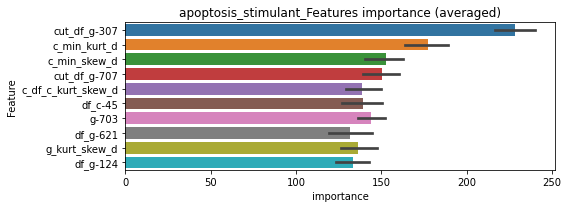

len(train_index) : 2846
len(valid_index) : 949
================================= fold 1/4 apoptosis_stimulant=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00053143	valid_1's binary_logloss: 0.00321946
Early stopping, best iteration is:
[1946]	training's binary_logloss: 0.00030971	valid_1's binary_logloss: 0.0029162


len(train_index) : 2846
len(valid_index) : 949
================================= fold 2/4 apoptosis_stimulant=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2846
len(valid_index) : 949
================================= fold 3/4 apoptosis_stimulant=================================


Early stopping, best iteration is:
[659]	training's binary_logloss: 0.000784675	valid_1's binary_logloss: 0.00370313
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000509146	valid_1's binary_logloss: 0.000961878
Early stopping, best iteration is:
[1493]	training's binary_logloss: 0.00036053	valid_1's binary_logloss: 0.000812025


len(train_index) : 2847
len(valid_index) : 948
================================= fold 4/4 apoptosis_stimulant=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000527297	valid_1's binary_logloss: 0.00125723
Early stopping, best iteration is:
[1624]	training's binary_logloss: 0.000346844	valid_1's binary_logloss: 0.000992913


apoptosis_stimulant logloss: 0.0021070526394471154


neg labels: 3289 → selected neg labels: 3283


aromatase_inhibitor, len(trt): 47, len(othr): 3283
target_rate: 0.0019736 → Adj_target_rate: 0.0022155
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00383207	valid_1's binary_logloss: 0.0269983
Early stopping, best iteration is:
[497]	training's binary_logloss: 0.00102475	valid_1's binary_logloss: 0.0212762
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0038728	valid_1's binary_logloss: 0.0189805
[600]	training's binary_logloss: 0.000744659	valid_1's binary_logloss: 0.0117055
Early stopping, best iteration is:
[783]	training's binary_logloss: 0.00057115	valid_1's binary_logloss: 0.011213
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00449476	valid_1's binary_logloss: 0.010574
[600]	training's binary_logloss: 0.000795039	valid_1's binary_logloss: 0.00381754
Early stopping, best iteration is:
[790]	training's binary_logloss: 0.000588028	valid_1's binary_logloss: 0.0033477
Training until validation scores don't improve for 30 rounds
[300]	trai

1 / 3 AUC score:1.000
y_Threshold: 0.0053291, Threshold: 0.0192711, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0100452 Vs.target_rate: 0.00197
Num_p_label: 40.0, conf_0:0.01349, conf_1:0.02505
Num_p_label: 40.0, Expected: 7.9, Adj_threshold_1: 0.0192711
Num_p_label: 9.0, Expected: 7.9, Adj_threshold_2: 0.0492711
threshold: 0.0492711, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00362925	valid_1's binary_logloss: 0.0274242
Early stopping, best iteration is:
[491]	training's binary_logloss: 0.00101893	valid_1's binary_logloss: 0.0218813
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00361725	valid_1's binary_logloss: 0.0160273
[600]	training's binary_logloss: 0.000725916	valid_1's binary_logloss: 0.00931903
Early stopping, best iteration is:
[772]	training's binary_logloss: 0.000565133	valid_1's binary_logloss: 0.00885505
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00406839	valid_1's binary_logloss: 0.00967646
[600]	training's binary_logloss: 0.000750821	valid_1's binary_logloss: 0.00348231
Early stopping, best iteration is:
[755]	training's binary_logloss: 0.000574181	valid_1's binary_logloss: 0.00309359
Training until validation scores don't improve for 30 rounds
[3

2 / 3 AUC score:1.000
y_Threshold: 0.0245842, Threshold: 0.0492711, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 654.0/3803
p_label_rate: 0.0067805 Vs.target_rate: 0.00197
Num_p_label: 27.0, conf_0:0.03942, conf_1:0.05913
Num_p_label: 27.0, Expected: 7.9, Adj_threshold_1: 0.0492711
Num_p_label: 12.0, Expected: 7.9, Adj_threshold_2: 0.0792711


Early stopping, best iteration is:
[517]	training's binary_logloss: 0.000908457	valid_1's binary_logloss: 0.0250813


threshold: 0.0792711, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 654.0/3803, y_label_rate: 0.1719695
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00354947	valid_1's binary_logloss: 0.0274777
[600]	training's binary_logloss: 0.000689116	valid_1's binary_logloss: 0.0202813
Early stopping, best iteration is:
[734]	training's binary_logloss: 0.000556655	valid_1's binary_logloss: 0.0200266
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00378673	valid_1's binary_logloss: 0.0140509
[600]	training's binary_logloss: 0.000724808	valid_1's binary_logloss: 0.00693964
Early stopping, best iteration is:
[750]	training's binary_logloss: 0.000567583	valid_1's binary_logloss: 0.00641148
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00381548	valid_1's binary_logloss: 0.018759
[600]	training's binary_logloss: 0.000721246	valid_1's binary_logloss: 0.0120468
Early stopping, best iteration is:
[742]	training's binary_logloss: 0.000571054	valid_1's binary_logl

3 / 3 AUC score:1.000
y_Threshold: 0.0282525, Threshold: 0.0792711, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 653.0/3801
p_label_rate: 0.0035158 Vs.target_rate: 0.00197
Num_p_label: 14.0, conf_0:0.07134, conf_1:0.08720
Num_p_label: 14.0, Expected: 7.9, Adj_threshold_1: 0.0792711
threshold: 0.0792711, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 653.0/3801, y_label_rate: 0.1717969


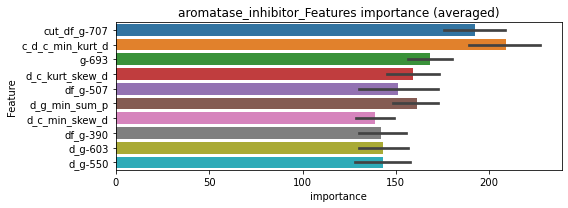

len(train_index) : 2850
len(valid_index) : 951
================================= fold 1/4 aromatase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2851
len(valid_index) : 950
================================= fold 2/4 aromatase_inhibitor=================================


Early stopping, best iteration is:
[721]	training's binary_logloss: 0.000732389	valid_1's binary_logloss: 0.00564551
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000515512	valid_1's binary_logloss: 0.00125956
[2000]	training's binary_logloss: 0.000298143	valid_1's binary_logloss: 0.00100146
Early stopping, best iteration is:
[2070]	training's binary_logloss: 0.000292391	valid_1's binary_logloss: 0.000994475


len(train_index) : 2851
len(valid_index) : 950
================================= fold 3/4 aromatase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2851
len(valid_index) : 950
================================= fold 4/4 aromatase_inhibitor=================================


Early stopping, best iteration is:
[673]	training's binary_logloss: 0.000628952	valid_1's binary_logloss: 0.0050808
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000519783	valid_1's binary_logloss: 0.00073516
[2000]	training's binary_logloss: 0.000299043	valid_1's binary_logloss: 0.000414103
[3000]	training's binary_logloss: 0.000229458	valid_1's binary_logloss: 0.000310137
[4000]	training's binary_logloss: 0.000195952	valid_1's binary_logloss: 0.000258371
[5000]	training's binary_logloss: 0.000178416	valid_1's binary_logloss: 0.000231989
[6000]	training's binary_logloss: 0.000166887	valid_1's binary_logloss: 0.000214559
[7000]	training's binary_logloss: 0.000158377	valid_1's binary_logloss: 0.000200392
[8000]	training's binary_logloss: 0.000152057	valid_1's binary_logloss: 0.000189997
[9000]	training's binary_logloss: 0.000146929	valid_1's binary_logloss: 0.000181481
Early stopping, best iteration is:
[9159]	training's binary_logloss:

aromatase_inhibitor logloss: 0.0029761420628089605


neg labels: 3289 → selected neg labels: 3285


atm_kinase_inhibitor, len(trt): 6, len(othr): 3285
target_rate: 0.0002520 → Adj_target_rate: 0.0003851
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000412804	valid_1's binary_logloss: 0.00146352
Early stopping, best iteration is:
[490]	training's binary_logloss: 0.000195819	valid_1's binary_logloss: 0.000938075
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000408281	valid_1's binary_logloss: 0.00170542
Early stopping, best iteration is:
[461]	training's binary_logloss: 0.000208044	valid_1's binary_logloss: 0.00122419
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000419198	valid_1's binary_logloss: 0.000453314
Early stopping, best iteration is:
[494]	training's binary_logloss: 0.000197852	valid_1's binary_logloss: 0.000220998
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000408192	valid_1's binary_logloss: 0.00155687


1 / 3 AUC score:1.000
y_Threshold: 0.0006099, Threshold: 0.0024504, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00025
Num_p_label: 40.0, conf_0:0.00172, conf_1:0.00319
Num_p_label: 40.0, Expected: 1.0, Adj_threshold_1: 0.0024504
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_2: 0.0324504
Num_p_label: 1.0, Expected: 1.0, Adj_threshold_3: 0.0624504
threshold: 0.0624504, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[468]	training's binary_logloss: 0.000201057	valid_1's binary_logloss: 0.000942839


positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000392965	valid_1's binary_logloss: 0.000957646
[600]	training's binary_logloss: 0.0001834	valid_1's binary_logloss: 0.000557769
Early stopping, best iteration is:
[578]	training's binary_logloss: 0.0001834	valid_1's binary_logloss: 0.000557769
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000383286	valid_1's binary_logloss: 0.00186512
Early stopping, best iteration is:
[515]	training's binary_logloss: 0.000188398	valid_1's binary_logloss: 0.00148052
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000395173	valid_1's binary_logloss: 0.000390522
Early stopping, best iteration is:
[504]	training's binary_logloss: 0.000188684	valid_1's binary_logloss: 0.000186624
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00038526	valid_1's binary_logloss: 0.0020

2 / 3 AUC score:1.000
y_Threshold: 0.0544483, Threshold: 0.0624504, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0040181 Vs.target_rate: 0.00025
Num_p_label: 16.0, conf_0:0.04996, conf_1:0.07494
Num_p_label: 16.0, Expected: 1.0, Adj_threshold_1: 0.0624504
Num_p_label: 11.0, Expected: 1.0, Adj_threshold_2: 0.0924504
Num_p_label: 8.0, Expected: 1.0, Adj_threshold_3: 0.1224504
Num_p_label: 6.0, Expected: 1.0, Adj_threshold_4: 0.1524504
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_5: 0.1824504
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_6: 0.2124504
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_7: 0.2424504
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_8: 0.2724504
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_9: 0.3024504
Num_p_label: 1.0, Expected: 1.0, Adj_threshold_10: 0.3324504
threshold: 0.3324504, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[519]	training's binary_logloss: 0.000187865	valid_1's binary_logloss: 0.00142598


positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000392965	valid_1's binary_logloss: 0.000957646
Early stopping, best iteration is:
[553]	training's binary_logloss: 0.0001834	valid_1's binary_logloss: 0.000557769
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000383286	valid_1's binary_logloss: 0.00186512
Early stopping, best iteration is:
[515]	training's binary_logloss: 0.000188398	valid_1's binary_logloss: 0.00148052
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000395173	valid_1's binary_logloss: 0.000390522
Early stopping, best iteration is:
[504]	training's binary_logloss: 0.000188684	valid_1's binary_logloss: 0.000186624
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00038526	valid_1's binary_logloss: 0.00202847


3 / 3 AUC score:1.000
y_Threshold: 0.0544483, Threshold: 0.3324504, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0002511 Vs.target_rate: 0.00025
Num_p_label: 1.0, conf_0:0.29921, conf_1:0.36570


Early stopping, best iteration is:
[519]	training's binary_logloss: 0.000187865	valid_1's binary_logloss: 0.00142598


threshold: 0.3324504, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


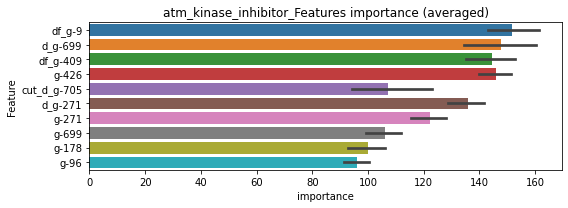

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 atm_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00032552	valid_1's binary_logloss: 0.000363896
[2000]	training's binary_logloss: 0.000201278	valid_1's binary_logloss: 0.000236306
[3000]	training's binary_logloss: 0.000165116	valid_1's binary_logloss: 0.00019926
[4000]	training's binary_logloss: 0.000148656	valid_1's binary_logloss: 0.000181377
[5000]	training's binary_logloss: 0.000140567	valid_1's binary_logloss: 0.000172732
[6000]	training's binary_logloss: 0.000136413	valid_1's binary_logloss: 0.000168255
[7000]	training's binary_logloss: 0.000133355	valid_1's binary_logloss: 0.000165138
Early stopping, best iteration is:
[7801]	training's binary_logloss: 0.000131344	valid_1's binary_logloss: 0.000163064


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 atm_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000335125	valid_1's binary_logloss: 0.00137141


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 atm_kinase_inhibitor=================================


Early stopping, best iteration is:
[1297]	training's binary_logloss: 0.000274255	valid_1's binary_logloss: 0.00128353
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000350338	valid_1's binary_logloss: 0.000277984
[2000]	training's binary_logloss: 0.000214179	valid_1's binary_logloss: 0.000163911
[3000]	training's binary_logloss: 0.000176566	valid_1's binary_logloss: 0.000131922
[4000]	training's binary_logloss: 0.000162334	valid_1's binary_logloss: 0.000118846
[5000]	training's binary_logloss: 0.000155453	valid_1's binary_logloss: 0.000112172
[6000]	training's binary_logloss: 0.000151	valid_1's binary_logloss: 0.000107745
Early stopping, best iteration is:
[6495]	training's binary_logloss: 0.000149299	valid_1's binary_logloss: 0.000106015


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 atm_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000326015	valid_1's binary_logloss: 0.00170821
[2000]	training's binary_logloss: 0.000201868	valid_1's binary_logloss: 0.00135279
Early stopping, best iteration is:
[2490]	training's binary_logloss: 0.000182761	valid_1's binary_logloss: 0.00128129


atm_kinase_inhibitor logloss: 0.0007086142870028031


neg labels: 3289 → selected neg labels: 3289


atp-sensitive_potassium_channel_antagonist, len(trt): 7, len(othr): 3289
target_rate: 0.0002939 → Adj_target_rate: 0.0004391
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000490232	valid_1's binary_logloss: 0.000763453
Early stopping, best iteration is:
[467]	training's binary_logloss: 0.0002319	valid_1's binary_logloss: 0.000389266
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000489135	valid_1's binary_logloss: 0.00537539
Early stopping, best iteration is:
[473]	training's binary_logloss: 0.000229193	valid_1's binary_logloss: 0.00441292
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000491492	valid_1's binary_logloss: 0.000680361
Early stopping, best iteration is:
[494]	training's binary_logloss: 0.000227098	valid_1's binary_logloss: 0.00034502
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00049105	valid_1's binary_logloss: 0.000694878


1 / 3 AUC score:1.000
y_Threshold: 0.0007500, Threshold: 0.0035637, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00029
Num_p_label: 40.0, conf_0:0.00249, conf_1:0.00463
Num_p_label: 40.0, Expected: 1.2, Adj_threshold_1: 0.0035637
Num_p_label: 3.0, Expected: 1.2, Adj_threshold_2: 0.0335637
Num_p_label: 2.0, Expected: 1.2, Adj_threshold_3: 0.0635637
threshold: 0.0635637, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[483]	training's binary_logloss: 0.000229234	valid_1's binary_logloss: 0.00033898


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000459838	valid_1's binary_logloss: 0.00055164
Early stopping, best iteration is:
[490]	training's binary_logloss: 0.00021592	valid_1's binary_logloss: 0.000261525
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000445091	valid_1's binary_logloss: 0.00192395
Early stopping, best iteration is:
[469]	training's binary_logloss: 0.000218598	valid_1's binary_logloss: 0.00143931
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000456782	valid_1's binary_logloss: 0.000493002
Early stopping, best iteration is:
[495]	training's binary_logloss: 0.000215202	valid_1's binary_logloss: 0.00023355
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00045895	valid_1's binary_logloss: 0.00051637


2 / 3 AUC score:1.000
y_Threshold: 0.0650693, Threshold: 0.0635637, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0025113 Vs.target_rate: 0.00029
Num_p_label: 10.0, conf_0:0.05085, conf_1:0.07628
Num_p_label: 10.0, Expected: 1.2, Adj_threshold_1: 0.0635637
Num_p_label: 6.0, Expected: 1.2, Adj_threshold_2: 0.0935637
Num_p_label: 6.0, Expected: 1.2, Adj_threshold_3: 0.1235637
Num_p_label: 3.0, Expected: 1.2, Adj_threshold_4: 0.1535637
Num_p_label: 3.0, Expected: 1.2, Adj_threshold_5: 0.1835637
Num_p_label: 2.0, Expected: 1.2, Adj_threshold_6: 0.2135637
threshold: 0.2135637, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[527]	training's binary_logloss: 0.000210721	valid_1's binary_logloss: 0.000239714


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000459838	valid_1's binary_logloss: 0.00055164
Early stopping, best iteration is:
[490]	training's binary_logloss: 0.00021592	valid_1's binary_logloss: 0.000261525
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000445091	valid_1's binary_logloss: 0.00192395
Early stopping, best iteration is:
[469]	training's binary_logloss: 0.000218598	valid_1's binary_logloss: 0.00143931
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000456782	valid_1's binary_logloss: 0.000493002
Early stopping, best iteration is:
[494]	training's binary_logloss: 0.000215202	valid_1's binary_logloss: 0.00023355
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00045895	valid_1's binary_logloss: 0.00051637


3 / 3 AUC score:1.000
y_Threshold: 0.0650693, Threshold: 0.2135637, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0005023 Vs.target_rate: 0.00029
Num_p_label: 2.0, conf_0:0.19221, conf_1:0.23492
Num_p_label: 2.0, Expected: 1.2, Adj_threshold_1: 0.2135637
threshold: 0.2135637, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[527]	training's binary_logloss: 0.000210721	valid_1's binary_logloss: 0.000239714


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


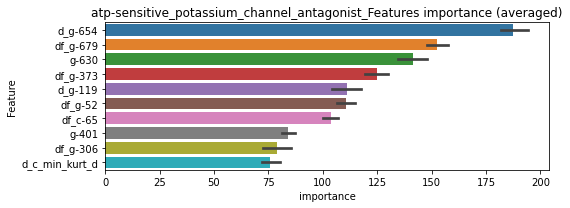

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 atp-sensitive_potassium_channel_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000351298	valid_1's binary_logloss: 0.000411648
[2000]	training's binary_logloss: 0.000218211	valid_1's binary_logloss: 0.000268283
[3000]	training's binary_logloss: 0.000184587	valid_1's binary_logloss: 0.000231877
[4000]	training's binary_logloss: 0.000168732	valid_1's binary_logloss: 0.00021404
[5000]	training's binary_logloss: 0.000159677	valid_1's binary_logloss: 0.000203338
[6000]	training's binary_logloss: 0.000153339	valid_1's binary_logloss: 0.000195847
[7000]	training's binary_logloss: 0.000148702	valid_1's binary_logloss: 0.000190325
[8000]	training's binary_logloss: 0.00014527	valid_1's binary_logloss: 0.000186308
Early stopping, best iteration is:
[8397]	training's binary_logloss: 0.000144175	valid_1's binary_logloss: 0.000184996


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 atp-sensitive_potassium_channel_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000346731	valid_1's binary_logloss: 0.00125158
[2000]	training's binary_logloss: 0.000217851	valid_1's binary_logloss: 0.00102974
Early stopping, best iteration is:
[2116]	training's binary_logloss: 0.000213131	valid_1's binary_logloss: 0.00102242


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 atp-sensitive_potassium_channel_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000342064	valid_1's binary_logloss: 0.000310287
[2000]	training's binary_logloss: 0.000213443	valid_1's binary_logloss: 0.000188566
[3000]	training's binary_logloss: 0.00018005	valid_1's binary_logloss: 0.000154786
[4000]	training's binary_logloss: 0.000163004	valid_1's binary_logloss: 0.000136846
[5000]	training's binary_logloss: 0.000153464	valid_1's binary_logloss: 0.000126637
[6000]	training's binary_logloss: 0.000146898	valid_1's binary_logloss: 0.000119592
[7000]	training's binary_logloss: 0.000142126	valid_1's binary_logloss: 0.000114473
[8000]	training's binary_logloss: 0.000138696	valid_1's binary_logloss: 0.000110791
[9000]	training's binary_logloss: 0.000136084	valid_1's binary_logloss: 0.000107989
[10000]	training's binary_logloss: 0.000134054	valid_1's binary_logloss: 0.00010581
Did not meet early stopping. Best iteration is:
[9999]	training's binary_logloss: 0.000134054	valid_

len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 atp-sensitive_potassium_channel_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000351886	valid_1's binary_logloss: 0.000375834
[2000]	training's binary_logloss: 0.00021855	valid_1's binary_logloss: 0.000239039
[3000]	training's binary_logloss: 0.000183613	valid_1's binary_logloss: 0.000201633
[4000]	training's binary_logloss: 0.000167424	valid_1's binary_logloss: 0.000184032
[5000]	training's binary_logloss: 0.000158181	valid_1's binary_logloss: 0.000173447
[6000]	training's binary_logloss: 0.000151737	valid_1's binary_logloss: 0.000166093
[7000]	training's binary_logloss: 0.000146892	valid_1's binary_logloss: 0.000160282
[8000]	training's binary_logloss: 0.00014345	valid_1's binary_logloss: 0.0001562
Early stopping, best iteration is:
[8252]	training's binary_logloss: 0.000142603	valid_1's binary_logloss: 0.000155101


atp-sensitive_potassium_channel_antagonist logloss: 0.0003673283409710112


neg labels: 3289 → selected neg labels: 3286


atp_synthase_inhibitor, len(trt): 12, len(othr): 3286
target_rate: 0.0005039 → Adj_target_rate: 0.0006942
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000920592	valid_1's binary_logloss: 0.00328365
Early stopping, best iteration is:
[527]	training's binary_logloss: 0.000335702	valid_1's binary_logloss: 0.00185071
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00090586	valid_1's binary_logloss: 0.00252935
Early stopping, best iteration is:
[530]	training's binary_logloss: 0.00032975	valid_1's binary_logloss: 0.00171537
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000924299	valid_1's binary_logloss: 0.00152733
Early stopping, best iteration is:
[528]	training's binary_logloss: 0.000332631	valid_1's binary_logloss: 0.000634531
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000935816	valid_1's binary_logloss: 0.00201817


1 / 3 AUC score:1.000
y_Threshold: 0.0018217, Threshold: 0.0183790, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00050
Num_p_label: 40.0, conf_0:0.01287, conf_1:0.02389
Num_p_label: 40.0, Expected: 2.0, Adj_threshold_1: 0.0183790
Num_p_label: 19.0, Expected: 2.0, Adj_threshold_2: 0.0483790
Num_p_label: 11.0, Expected: 2.0, Adj_threshold_3: 0.0783790
Num_p_label: 8.0, Expected: 2.0, Adj_threshold_4: 0.1083790
Num_p_label: 5.0, Expected: 2.0, Adj_threshold_5: 0.1383790
threshold: 0.1383790, positive_p_label: 5.0/3982, p_label_rate: 0.0012557


Early stopping, best iteration is:
[538]	training's binary_logloss: 0.000334609	valid_1's binary_logloss: 0.000911193


positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000845081	valid_1's binary_logloss: 0.00357861
Early stopping, best iteration is:
[498]	training's binary_logloss: 0.000324882	valid_1's binary_logloss: 0.00214478
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000816859	valid_1's binary_logloss: 0.00210568
Early stopping, best iteration is:
[534]	training's binary_logloss: 0.000309178	valid_1's binary_logloss: 0.000927084
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000844298	valid_1's binary_logloss: 0.00106688
Early stopping, best iteration is:
[518]	training's binary_logloss: 0.000320238	valid_1's binary_logloss: 0.000433207
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000833421	valid_1's binary_logloss: 0.00199383


2 / 3 AUC score:1.000
y_Threshold: 0.1307623, Threshold: 0.1383790, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0110497 Vs.target_rate: 0.00050
Num_p_label: 44.0, conf_0:0.11070, conf_1:0.16605
Num_p_label: 44.0, Expected: 2.0, Adj_threshold_1: 0.1383790
Num_p_label: 38.0, Expected: 2.0, Adj_threshold_2: 0.1683790
Num_p_label: 32.0, Expected: 2.0, Adj_threshold_3: 0.1983790
Num_p_label: 27.0, Expected: 2.0, Adj_threshold_4: 0.2283790
Num_p_label: 22.0, Expected: 2.0, Adj_threshold_5: 0.2583790
Num_p_label: 19.0, Expected: 2.0, Adj_threshold_6: 0.2883790
Num_p_label: 17.0, Expected: 2.0, Adj_threshold_7: 0.3183790
Num_p_label: 17.0, Expected: 2.0, Adj_threshold_8: 0.3483790
Num_p_label: 17.0, Expected: 2.0, Adj_threshold_9: 0.3783790


Early stopping, best iteration is:
[525]	training's binary_logloss: 0.000316623	valid_1's binary_logloss: 0.00103414


Num_p_label: 16.0, Expected: 2.0, Adj_threshold_10: 0.4083790
threshold: 0.4383790, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000845081	valid_1's binary_logloss: 0.00357861
Early stopping, best iteration is:
[498]	training's binary_logloss: 0.000324882	valid_1's binary_logloss: 0.00214478
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000816859	valid_1's binary_logloss: 0.00210568
Early stopping, best iteration is:
[534]	training's binary_logloss: 0.000309178	valid_1's binary_logloss: 0.000927084
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000844298	valid_1's binary_logloss: 0.00106688
Early stopping, best iteration is:
[518]	training's binary_logloss: 0.000320238	valid_1's binary_logloss: 0.000433207
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000833421	valid_1's binary_logloss: 0.00199383


3 / 3 AUC score:1.000
y_Threshold: 0.1307623, Threshold: 0.4383790, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0037670 Vs.target_rate: 0.00050
Num_p_label: 15.0, conf_0:0.39454, conf_1:0.48222
Num_p_label: 15.0, Expected: 2.0, Adj_threshold_1: 0.4383790
Num_p_label: 13.0, Expected: 2.0, Adj_threshold_2: 0.4683790
Num_p_label: 10.0, Expected: 2.0, Adj_threshold_3: 0.4983790
Num_p_label: 8.0, Expected: 2.0, Adj_threshold_4: 0.5283790


Early stopping, best iteration is:
[525]	training's binary_logloss: 0.000316623	valid_1's binary_logloss: 0.00103414


Num_p_label: 8.0, Expected: 2.0, Adj_threshold_5: 0.5583790
Num_p_label: 7.0, Expected: 2.0, Adj_threshold_6: 0.5883790
Num_p_label: 7.0, Expected: 2.0, Adj_threshold_7: 0.6183790
Num_p_label: 7.0, Expected: 2.0, Adj_threshold_8: 0.6483790
Num_p_label: 7.0, Expected: 2.0, Adj_threshold_9: 0.6783790
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_10: 0.7083790
threshold: 0.7383790, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


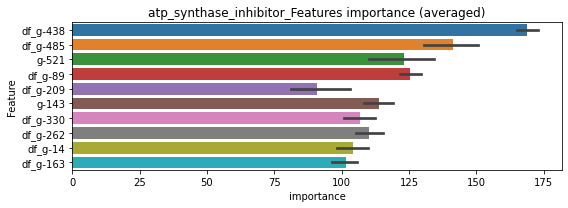

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 atp_synthase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000401787	valid_1's binary_logloss: 0.000817924
[2000]	training's binary_logloss: 0.000249015	valid_1's binary_logloss: 0.000620808
[3000]	training's binary_logloss: 0.000206151	valid_1's binary_logloss: 0.000550873
[4000]	training's binary_logloss: 0.000183561	valid_1's binary_logloss: 0.000507466
[5000]	training's binary_logloss: 0.000171482	valid_1's binary_logloss: 0.000486174
Early stopping, best iteration is:
[5165]	training's binary_logloss: 0.000169943	valid_1's binary_logloss: 0.000483447


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 atp_synthase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000407533	valid_1's binary_logloss: 0.00155913
[2000]	training's binary_logloss: 0.000253542	valid_1's binary_logloss: 0.00127773
Early stopping, best iteration is:
[2688]	training's binary_logloss: 0.000218891	valid_1's binary_logloss: 0.00121803


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 atp_synthase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000395555	valid_1's binary_logloss: 0.000418977
[2000]	training's binary_logloss: 0.000252489	valid_1's binary_logloss: 0.000269865
[3000]	training's binary_logloss: 0.000208684	valid_1's binary_logloss: 0.000222917
[4000]	training's binary_logloss: 0.0001857	valid_1's binary_logloss: 0.000197595
[5000]	training's binary_logloss: 0.000172902	valid_1's binary_logloss: 0.000182926
[6000]	training's binary_logloss: 0.000164519	valid_1's binary_logloss: 0.000173474
[7000]	training's binary_logloss: 0.000158702	valid_1's binary_logloss: 0.000166816
[8000]	training's binary_logloss: 0.000154579	valid_1's binary_logloss: 0.000162023
Early stopping, best iteration is:
[8343]	training's binary_logloss: 0.000153305	valid_1's binary_logloss: 0.000160597


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 atp_synthase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000354656	valid_1's binary_logloss: 0.000453231
[2000]	training's binary_logloss: 0.000220296	valid_1's binary_logloss: 0.000283376
[3000]	training's binary_logloss: 0.000170669	valid_1's binary_logloss: 0.000219922
[4000]	training's binary_logloss: 0.00014527	valid_1's binary_logloss: 0.000187365
[5000]	training's binary_logloss: 0.000131719	valid_1's binary_logloss: 0.000169962
[6000]	training's binary_logloss: 0.000122858	valid_1's binary_logloss: 0.000158575
[7000]	training's binary_logloss: 0.000116613	valid_1's binary_logloss: 0.000150547
[8000]	training's binary_logloss: 0.000112281	valid_1's binary_logloss: 0.000144978
[9000]	training's binary_logloss: 0.000109179	valid_1's binary_logloss: 0.000140989
[10000]	training's binary_logloss: 0.000106931	valid_1's binary_logloss: 0.000138102
Did not meet early stopping. Best iteration is:
[9999]	training's binary_logloss: 0.000106931	valid

atp_synthase_inhibitor logloss: 0.0005003225850607377


neg labels: 3289 → selected neg labels: 3273


atpase_inhibitor, len(trt): 97, len(othr): 3273
target_rate: 0.0040732 → Adj_target_rate: 0.0041016
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00979654	valid_1's binary_logloss: 0.0802067
Early stopping, best iteration is:
[552]	training's binary_logloss: 0.00191689	valid_1's binary_logloss: 0.0719353
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00988136	valid_1's binary_logloss: 0.064042
[600]	training's binary_logloss: 0.00162324	valid_1's binary_logloss: 0.0494956
Early stopping, best iteration is:
[630]	training's binary_logloss: 0.00147316	valid_1's binary_logloss: 0.0492119
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00980872	valid_1's binary_logloss: 0.0523035
[600]	training's binary_logloss: 0.00164741	valid_1's binary_logloss: 0.0403877
Early stopping, best iteration is:
[649]	training's binary_logloss: 0.0014173	valid_1's binary_logloss: 0.0397623
Training until validation scores don't improve for 30 rounds
[300]	trainin

1 / 3 AUC score:0.997
y_Threshold: 0.0119797, Threshold: 0.0285377, pos_neg_ratio: 0.8000000
Remove_noisy_data: 142 → Positive_corect_labels: 649/3785
p_label_rate: 0.0100452 Vs.target_rate: 0.00407
Num_p_label: 40.0, conf_0:0.01998, conf_1:0.03710
Num_p_label: 40.0, Expected: 16.2, Adj_threshold_1: 0.0285377
Num_p_label: 10.0, Expected: 16.2, Adj_threshold_2: 0.0585377
threshold: 0.0585377, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 649.0/3785, y_label_rate: 0.1714663
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00831286	valid_1's binary_logloss: 0.0606842
Early stopping, best iteration is:
[482]	training's binary_logloss: 0.00235375	valid_1's binary_logloss: 0.0525508
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00886052	valid_1's binary_logloss: 0.0611952
[600]	training's binary_logloss: 0.00148956	valid_1's binary_logloss: 0.0490108
Early stopping, best iteration is:
[620]	training's binary_logloss: 0.00140079	valid_1's binary_logloss: 0.0487584
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00955921	valid_1's binary_logloss: 0.0536576
[600]	training's binary_logloss: 0.00156749	valid_1's binary_logloss: 0.0392689
Early stopping, best iteration is:
[730]	training's binary_logloss: 0.00110184	valid_1's binary_logloss: 0.0381298
Training until validation scores don't improve for 30 rounds
[300]	train

2 / 3 AUC score:0.999
y_Threshold: 0.0326926, Threshold: 0.0585377, pos_neg_ratio: 0.8000000
Remove_noisy_data: 20 → Positive_corect_labels: 639.0/3765
p_label_rate: 0.0045203 Vs.target_rate: 0.00407
Num_p_label: 18.0, conf_0:0.04683, conf_1:0.07025
threshold: 0.0585377, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 639.0/3765, y_label_rate: 0.1697211
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00780921	valid_1's binary_logloss: 0.0692175
[600]	training's binary_logloss: 0.00139625	valid_1's binary_logloss: 0.0575884
Early stopping, best iteration is:
[626]	training's binary_logloss: 0.00128323	valid_1's binary_logloss: 0.0573386
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00803106	valid_1's binary_logloss: 0.0476958
[600]	training's binary_logloss: 0.00141001	valid_1's binary_logloss: 0.0346164
Early stopping, best iteration is:
[713]	training's binary_logloss: 0.00104348	valid_1's binary_logloss: 0.0333901
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00871386	valid_1's binary_logloss: 0.0369815
[600]	training's binary_logloss: 0.00146555	valid_1's binary_logloss: 0.0221098
Early stopping, best iteration is:
[682]	training's binary_logloss: 0.00116964	valid_1's binary_logloss: 0.

3 / 3 AUC score:1.000
y_Threshold: 0.0330772, Threshold: 0.0585377, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 636.0/3759
p_label_rate: 0.0047715 Vs.target_rate: 0.00407
Num_p_label: 19.0, conf_0:0.05268, conf_1:0.06439
threshold: 0.0585377, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 636.0/3759, y_label_rate: 0.1691939


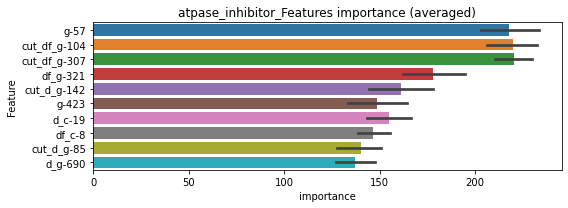

len(train_index) : 2819
len(valid_index) : 940
================================= fold 1/4 atpase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00059473	valid_1's binary_logloss: 0.00233225
Early stopping, best iteration is:
[1630]	training's binary_logloss: 0.000387253	valid_1's binary_logloss: 0.00197476


len(train_index) : 2819
len(valid_index) : 940
================================= fold 2/4 atpase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2819
len(valid_index) : 940
================================= fold 3/4 atpase_inhibitor=================================


Early stopping, best iteration is:
[448]	training's binary_logloss: 0.0012072	valid_1's binary_logloss: 0.0127609
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000589404	valid_1's binary_logloss: 0.00130396
[2000]	training's binary_logloss: 0.000330399	valid_1's binary_logloss: 0.000934235
[3000]	training's binary_logloss: 0.000255463	valid_1's binary_logloss: 0.000813891
[4000]	training's binary_logloss: 0.000220757	valid_1's binary_logloss: 0.00076186
Early stopping, best iteration is:
[4550]	training's binary_logloss: 0.000209735	valid_1's binary_logloss: 0.000742484


len(train_index) : 2820
len(valid_index) : 939
================================= fold 4/4 atpase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000566983	valid_1's binary_logloss: 0.00347398
Early stopping, best iteration is:
[1488]	training's binary_logloss: 0.000397398	valid_1's binary_logloss: 0.00334094


atpase_inhibitor logloss: 0.004707376336192067


neg labels: 3289 → selected neg labels: 3287


atr_kinase_inhibitor, len(trt): 19, len(othr): 3287
target_rate: 0.0007979 → Adj_target_rate: 0.0010260
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00159919	valid_1's binary_logloss: 0.00324201
[600]	training's binary_logloss: 0.000407601	valid_1's binary_logloss: 0.00107842
Early stopping, best iteration is:
[646]	training's binary_logloss: 0.000391939	valid_1's binary_logloss: 0.00104484
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00159241	valid_1's binary_logloss: 0.00374659
[600]	training's binary_logloss: 0.000405227	valid_1's binary_logloss: 0.00138235
Early stopping, best iteration is:
[687]	training's binary_logloss: 0.000387649	valid_1's binary_logloss: 0.00135206
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0015957	valid_1's binary_logloss: 0.00294377
[600]	training's binary_logloss: 0.000406843	valid_1's binary_logloss: 0.00103552
Early stopping, best iteration is:
[600]	training's binary_logloss: 0.000406843	valid_1's binar

1 / 3 AUC score:1.000
y_Threshold: 0.0025074, Threshold: 0.0086895, pos_neg_ratio: 0.8000000


[600]	training's binary_logloss: 0.000406426	valid_1's binary_logloss: 0.00161672
Early stopping, best iteration is:
[615]	training's binary_logloss: 0.000402071	valid_1's binary_logloss: 0.00159616


Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00080
Num_p_label: 40.0, conf_0:0.00608, conf_1:0.01130
Num_p_label: 40.0, Expected: 3.2, Adj_threshold_1: 0.0086895
Num_p_label: 7.0, Expected: 3.2, Adj_threshold_2: 0.0386895
threshold: 0.0386895, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00148866	valid_1's binary_logloss: 0.00294987
[600]	training's binary_logloss: 0.000392572	valid_1's binary_logloss: 0.00102225
Early stopping, best iteration is:
[593]	training's binary_logloss: 0.000392977	valid_1's binary_logloss: 0.00102209
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00146532	valid_1's binary_logloss: 0.00390139
[600]	training's binary_logloss: 0.000393545	valid_1's binary_logloss: 0.00166636
Early stopping, best iteration is:
[635]	training's binary_logloss: 0.000384085	valid_1's binary_logloss: 0.00163749
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00149564	valid_1's binary_logloss: 0.00241389
[600]	training's binary_logloss: 0.000392607	valid_1's binary_logloss: 0.00075512
Early stopping, best iteration is:
[660]	training's binary_logloss: 0.000376862	valid_1's bina

2 / 3 AUC score:1.000
y_Threshold: 0.1059509, Threshold: 0.0386895, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0045203 Vs.target_rate: 0.00080
Num_p_label: 18.0, conf_0:0.03095, conf_1:0.04643
Num_p_label: 18.0, Expected: 3.2, Adj_threshold_1: 0.0386895
Num_p_label: 13.0, Expected: 3.2, Adj_threshold_2: 0.0686895
Num_p_label: 7.0, Expected: 3.2, Adj_threshold_3: 0.0986895
threshold: 0.0986895, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00148866	valid_1's binary_logloss: 0.00294987
[600]	training's binary_logloss: 0.000392572	valid_1's binary_logloss: 0.00102225
Early stopping, best iteration is:
[593]	training's binary_logloss: 0.000392977	valid_1's binary_logloss: 0.00102209
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00146532	valid_1's binary_logloss: 0.00390139
[600]	training's binary_logloss: 0.000393545	valid_1's binary_logloss: 0.00166636
Early stopping, best iteration is:
[635]	training's binary_logloss: 0.000384085	valid_1's binary_logloss: 0.00163749
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00149564	valid_1's binary_logloss: 0.00241389
[600]	training's binary_logloss: 0.000392607	valid_1's binary_logloss: 0.00075512
Early stopping, best iteration is:
[660]	training's binary_logloss: 0.000376862	valid_1's bina

3 / 3 AUC score:1.000
y_Threshold: 0.1059509, Threshold: 0.0986895, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0017579 Vs.target_rate: 0.00080
Num_p_label: 7.0, conf_0:0.08882, conf_1:0.10856
Num_p_label: 7.0, Expected: 3.2, Adj_threshold_1: 0.0986895
threshold: 0.0986895, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


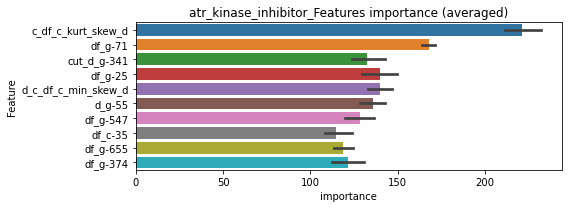

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 atr_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000453813	valid_1's binary_logloss: 0.000520763
[2000]	training's binary_logloss: 0.000271142	valid_1's binary_logloss: 0.00032839
[3000]	training's binary_logloss: 0.000220641	valid_1's binary_logloss: 0.000273938
[4000]	training's binary_logloss: 0.000195593	valid_1's binary_logloss: 0.000244703
[5000]	training's binary_logloss: 0.000181813	valid_1's binary_logloss: 0.000228324
[6000]	training's binary_logloss: 0.000172617	valid_1's binary_logloss: 0.000217924
[7000]	training's binary_logloss: 0.000166142	valid_1's binary_logloss: 0.000211733
[8000]	training's binary_logloss: 0.000161585	valid_1's binary_logloss: 0.000205888
Early stopping, best iteration is:
[8357]	training's binary_logloss: 0.000160182	valid_1's binary_logloss: 0.000203997


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 atr_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[955]	training's binary_logloss: 0.000481668	valid_1's binary_logloss: 0.00178925


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 atr_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000449885	valid_1's binary_logloss: 0.00292591
Early stopping, best iteration is:
[1326]	training's binary_logloss: 0.000354392	valid_1's binary_logloss: 0.00274058


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 atr_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000461381	valid_1's binary_logloss: 0.00274093
Early stopping, best iteration is:
[1298]	training's binary_logloss: 0.000373085	valid_1's binary_logloss: 0.00260588


atr_kinase_inhibitor logloss: 0.0018349266233794082


neg labels: 3289 → selected neg labels: 3271


aurora_kinase_inhibitor, len(trt): 96, len(othr): 3271
target_rate: 0.0040312 → Adj_target_rate: 0.0040656
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0120098	valid_1's binary_logloss: 0.0759772
[600]	training's binary_logloss: 0.00174099	valid_1's binary_logloss: 0.0610337
Early stopping, best iteration is:
[609]	training's binary_logloss: 0.00168305	valid_1's binary_logloss: 0.0607952
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0117795	valid_1's binary_logloss: 0.0535736
[600]	training's binary_logloss: 0.00177131	valid_1's binary_logloss: 0.031137
[900]	training's binary_logloss: 0.000898903	valid_1's binary_logloss: 0.0283894
Early stopping, best iteration is:
[1010]	training's binary_logloss: 0.000814915	valid_1's binary_logloss: 0.0279174
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0119976	valid_1's binary_logloss: 0.0575517
[600]	training's binary_logloss: 0.00176916	valid_1's binary_logloss: 0.0417937
Early stopping, best iterati

1 / 3 AUC score:0.995
y_Threshold: 0.0154546, Threshold: 0.0766959, pos_neg_ratio: 0.8000000
Remove_noisy_data: 149 → Positive_corect_labels: 645/3776
p_label_rate: 0.0100452 Vs.target_rate: 0.00403
Num_p_label: 40.0, conf_0:0.05369, conf_1:0.09970
Num_p_label: 40.0, Expected: 16.1, Adj_threshold_1: 0.0766959


Early stopping, best iteration is:
[464]	training's binary_logloss: 0.00327776	valid_1's binary_logloss: 0.0644604


Num_p_label: 31.0, Expected: 16.1, Adj_threshold_2: 0.1066959
Num_p_label: 21.0, Expected: 16.1, Adj_threshold_3: 0.1366959
threshold: 0.1366959, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 645.0/3776, y_label_rate: 0.1708157
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00955221	valid_1's binary_logloss: 0.0576608
[600]	training's binary_logloss: 0.001539	valid_1's binary_logloss: 0.0420913
Early stopping, best iteration is:
[651]	training's binary_logloss: 0.00131743	valid_1's binary_logloss: 0.0412255
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00976117	valid_1's binary_logloss: 0.0500087
[600]	training's binary_logloss: 0.00157055	valid_1's binary_logloss: 0.0318632
Early stopping, best iteration is:
[777]	training's binary_logloss: 0.000995068	valid_1's binary_logloss: 0.0303352
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00999914	valid_1's binary_logloss: 0.047091
[600]	training's binary_logloss: 0.00160052	valid_1's binary_logloss: 0.0317105
Early stopping, best iteration is:
[740]	training's binary_logloss: 0.00108806	valid_1's binary_logloss: 0.03

2 / 3 AUC score:0.999
y_Threshold: 0.0485394, Threshold: 0.1366959, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 640.0/3766
p_label_rate: 0.0100452 Vs.target_rate: 0.00403
Num_p_label: 40.0, conf_0:0.10936, conf_1:0.16404
Num_p_label: 40.0, Expected: 16.1, Adj_threshold_1: 0.1366959
Num_p_label: 34.0, Expected: 16.1, Adj_threshold_2: 0.1666959
Num_p_label: 26.0, Expected: 16.1, Adj_threshold_3: 0.1966959
Num_p_label: 21.0, Expected: 16.1, Adj_threshold_4: 0.2266959
threshold: 0.2266959, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 640.0/3766, y_label_rate: 0.1699416
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00962858	valid_1's binary_logloss: 0.0481695
[600]	training's binary_logloss: 0.00153016	valid_1's binary_logloss: 0.0324022
Early stopping, best iteration is:
[736]	training's binary_logloss: 0.0010506	valid_1's binary_logloss: 0.0311845
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00984035	valid_1's binary_logloss: 0.062548
[600]	training's binary_logloss: 0.00154828	valid_1's binary_logloss: 0.0500601
Early stopping, best iteration is:
[611]	training's binary_logloss: 0.00149118	valid_1's binary_logloss: 0.0496273
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00941639	valid_1's binary_logloss: 0.0485024
[600]	training's binary_logloss: 0.00153875	valid_1's binary_logloss: 0.0289191
[900]	training's binary_logloss: 0.0008194	valid_1's binary_logloss: 0.0257536
Early stopping, best iteration

3 / 3 AUC score:0.999
y_Threshold: 0.0391502, Threshold: 0.2266959, pos_neg_ratio: 0.8000000
Remove_noisy_data: 12 → Positive_corect_labels: 634.0/3754
p_label_rate: 0.0065294 Vs.target_rate: 0.00403
Num_p_label: 26.0, conf_0:0.20403, conf_1:0.24937
Num_p_label: 26.0, Expected: 16.1, Adj_threshold_1: 0.2266959
Num_p_label: 20.0, Expected: 16.1, Adj_threshold_2: 0.2566959
threshold: 0.2566959, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 634.0/3754, y_label_rate: 0.1688865


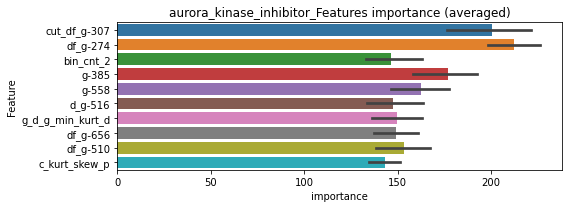

len(train_index) : 2815
len(valid_index) : 939
================================= fold 1/4 aurora_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000583816	valid_1's binary_logloss: 0.00241526
[2000]	training's binary_logloss: 0.000331158	valid_1's binary_logloss: 0.00197323
[3000]	training's binary_logloss: 0.000258219	valid_1's binary_logloss: 0.00182728
[4000]	training's binary_logloss: 0.000224834	valid_1's binary_logloss: 0.00175574
Early stopping, best iteration is:
[4836]	training's binary_logloss: 0.000210123	valid_1's binary_logloss: 0.00172601


len(train_index) : 2815
len(valid_index) : 939
================================= fold 2/4 aurora_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000584249	valid_1's binary_logloss: 0.00335867
Early stopping, best iteration is:
[1613]	training's binary_logloss: 0.000381061	valid_1's binary_logloss: 0.00309811


len(train_index) : 2816
len(valid_index) : 938
================================= fold 3/4 aurora_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000585549	valid_1's binary_logloss: 0.00110099
[2000]	training's binary_logloss: 0.000329863	valid_1's binary_logloss: 0.000748939
[3000]	training's binary_logloss: 0.000252762	valid_1's binary_logloss: 0.000617328
Early stopping, best iteration is:
[3474]	training's binary_logloss: 0.000233362	valid_1's binary_logloss: 0.000583287


len(train_index) : 2816
len(valid_index) : 938
================================= fold 4/4 aurora_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000581389	valid_1's binary_logloss: 0.00226877
Early stopping, best iteration is:
[1488]	training's binary_logloss: 0.000406662	valid_1's binary_logloss: 0.00203338


aurora_kinase_inhibitor logloss: 0.0018612731844764997


neg labels: 3289 → selected neg labels: 3287


autotaxin_inhibitor, len(trt): 6, len(othr): 3287
target_rate: 0.0002520 → Adj_target_rate: 0.0003851
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000413699	valid_1's binary_logloss: 0.000642802
Early stopping, best iteration is:
[500]	training's binary_logloss: 0.000205377	valid_1's binary_logloss: 0.000379422
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000411054	valid_1's binary_logloss: 0.000650147
Early stopping, best iteration is:
[481]	training's binary_logloss: 0.000207674	valid_1's binary_logloss: 0.000359702
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000406917	valid_1's binary_logloss: 0.000643652
Early stopping, best iteration is:
[484]	training's binary_logloss: 0.00020562	valid_1's binary_logloss: 0.000349052
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000411119	valid_1's binary_logloss: 0.00073891


1 / 3 AUC score:1.000
y_Threshold: 0.0008073, Threshold: 0.0054141, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00025
Num_p_label: 40.0, conf_0:0.00379, conf_1:0.00704
Num_p_label: 40.0, Expected: 1.0, Adj_threshold_1: 0.0054141
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_2: 0.0354141
Num_p_label: 1.0, Expected: 1.0, Adj_threshold_3: 0.0654141
threshold: 0.0654141, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[473]	training's binary_logloss: 0.000209558	valid_1's binary_logloss: 0.000409932


positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000366947	valid_1's binary_logloss: 0.000746735
Early stopping, best iteration is:
[538]	training's binary_logloss: 0.000183545	valid_1's binary_logloss: 0.000481527
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000364627	valid_1's binary_logloss: 0.00048561
Early stopping, best iteration is:
[531]	training's binary_logloss: 0.000183704	valid_1's binary_logloss: 0.000258927
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000370203	valid_1's binary_logloss: 0.000401684
Early stopping, best iteration is:
[509]	training's binary_logloss: 0.000184838	valid_1's binary_logloss: 0.000203826
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000368848	valid_1's binary_logloss: 0.000453418


2 / 3 AUC score:1.000
y_Threshold: 0.1418221, Threshold: 0.0654141, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0075339 Vs.target_rate: 0.00025
Num_p_label: 30.0, conf_0:0.05233, conf_1:0.07850
Num_p_label: 30.0, Expected: 1.0, Adj_threshold_1: 0.0654141
Num_p_label: 19.0, Expected: 1.0, Adj_threshold_2: 0.0954141
Num_p_label: 14.0, Expected: 1.0, Adj_threshold_3: 0.1254141
Num_p_label: 13.0, Expected: 1.0, Adj_threshold_4: 0.1554141
Num_p_label: 10.0, Expected: 1.0, Adj_threshold_5: 0.1854141
Num_p_label: 9.0, Expected: 1.0, Adj_threshold_6: 0.2154141
Num_p_label: 8.0, Expected: 1.0, Adj_threshold_7: 0.2454141
Num_p_label: 8.0, Expected: 1.0, Adj_threshold_8: 0.2754141
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_9: 0.3054141
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_10: 0.3354141


Early stopping, best iteration is:
[500]	training's binary_logloss: 0.000186821	valid_1's binary_logloss: 0.000242779


threshold: 0.3654141, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000366947	valid_1's binary_logloss: 0.000746735
Early stopping, best iteration is:
[538]	training's binary_logloss: 0.000183545	valid_1's binary_logloss: 0.000481527
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000364627	valid_1's binary_logloss: 0.00048561
Early stopping, best iteration is:
[531]	training's binary_logloss: 0.000183704	valid_1's binary_logloss: 0.000258927
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000370203	valid_1's binary_logloss: 0.000401684
Early stopping, best iteration is:
[509]	training's binary_logloss: 0.000184838	valid_1's binary_logloss: 0.000203826
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000368848	valid_1's binary_logloss: 0.000453418


3 / 3 AUC score:1.000
y_Threshold: 0.1418221, Threshold: 0.3654141, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0007534 Vs.target_rate: 0.00025
Num_p_label: 3.0, conf_0:0.32887, conf_1:0.40196
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_1: 0.3654141
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_2: 0.3954141
threshold: 0.3954141, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[492]	training's binary_logloss: 0.000186821	valid_1's binary_logloss: 0.000242779


positive_y_label: 657.0/3812, y_label_rate: 0.1723505


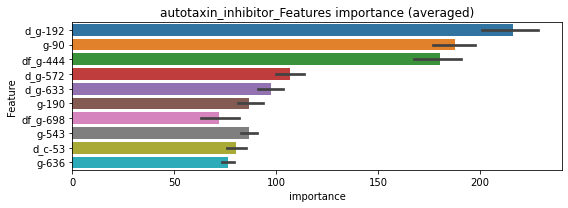

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 autotaxin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000288879	valid_1's binary_logloss: 0.000339148
[2000]	training's binary_logloss: 0.000181975	valid_1's binary_logloss: 0.000216956
[3000]	training's binary_logloss: 0.000151036	valid_1's binary_logloss: 0.000180847
[4000]	training's binary_logloss: 0.000133947	valid_1's binary_logloss: 0.000160789
[5000]	training's binary_logloss: 0.000124313	valid_1's binary_logloss: 0.000149443
[6000]	training's binary_logloss: 0.000117776	valid_1's binary_logloss: 0.000141723
[7000]	training's binary_logloss: 0.000113041	valid_1's binary_logloss: 0.000136121
[8000]	training's binary_logloss: 0.000109743	valid_1's binary_logloss: 0.000132226
[9000]	training's binary_logloss: 0.000107364	valid_1's binary_logloss: 0.000129414
[10000]	training's binary_logloss: 0.000105565	valid_1's binary_logloss: 0.000127274
Did not meet early stopping. Best iteration is:
[9999]	training's binary_logloss: 0.000105565	vali

len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 autotaxin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000324435	valid_1's binary_logloss: 0.000588438
[2000]	training's binary_logloss: 0.000204978	valid_1's binary_logloss: 0.000442243
Early stopping, best iteration is:
[2381]	training's binary_logloss: 0.000190251	valid_1's binary_logloss: 0.000428573


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 autotaxin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0003139	valid_1's binary_logloss: 0.000305185
[2000]	training's binary_logloss: 0.000197333	valid_1's binary_logloss: 0.000190839
[3000]	training's binary_logloss: 0.00016598	valid_1's binary_logloss: 0.000159187
[4000]	training's binary_logloss: 0.000151309	valid_1's binary_logloss: 0.000143839
[5000]	training's binary_logloss: 0.000143337	valid_1's binary_logloss: 0.00013557
[6000]	training's binary_logloss: 0.000137731	valid_1's binary_logloss: 0.000129695
[7000]	training's binary_logloss: 0.000133538	valid_1's binary_logloss: 0.000125377
[8000]	training's binary_logloss: 0.000130414	valid_1's binary_logloss: 0.000122177
Early stopping, best iteration is:
[8893]	training's binary_logloss: 0.000128327	valid_1's binary_logloss: 0.000119983


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 autotaxin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000326552	valid_1's binary_logloss: 0.000483032
[2000]	training's binary_logloss: 0.000205766	valid_1's binary_logloss: 0.000358966
[3000]	training's binary_logloss: 0.000175397	valid_1's binary_logloss: 0.000330547
[4000]	training's binary_logloss: 0.000161661	valid_1's binary_logloss: 0.000316281
Early stopping, best iteration is:
[4243]	training's binary_logloss: 0.000159531	valid_1's binary_logloss: 0.000314337


autotaxin_inhibitor logloss: 0.0002476792131488415


neg labels: 3289 → selected neg labels: 3277


bacterial_30s_ribosomal_subunit_inhibitor, len(trt): 60, len(othr): 3277
target_rate: 0.0025195 → Adj_target_rate: 0.0027266
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00607854	valid_1's binary_logloss: 0.0446461
Early stopping, best iteration is:
[559]	training's binary_logloss: 0.00118009	valid_1's binary_logloss: 0.0368393
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00637629	valid_1's binary_logloss: 0.0246944
[600]	training's binary_logloss: 0.00107129	valid_1's binary_logloss: 0.0130569
Early stopping, best iteration is:
[809]	training's binary_logloss: 0.000709684	valid_1's binary_logloss: 0.0118536
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00646323	valid_1's binary_logloss: 0.0292518
[600]	training's binary_logloss: 0.00106303	valid_1's binary_logloss: 0.0178615
Early stopping, best iteration is:
[812]	training's binary_logloss: 0.000698579	valid_1's binary_logloss: 0.016646
Training until validation scores don't improve for 30 rounds
[300]	trai

1 / 3 AUC score:1.000
y_Threshold: 0.0083514, Threshold: 0.0208182, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 654/3798
p_label_rate: 0.0100452 Vs.target_rate: 0.00252
Num_p_label: 40.0, conf_0:0.01457, conf_1:0.02706
Num_p_label: 40.0, Expected: 10.0, Adj_threshold_1: 0.0208182
Num_p_label: 8.0, Expected: 10.0, Adj_threshold_2: 0.0508182
threshold: 0.0508182, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 654.0/3798, y_label_rate: 0.1721959
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00538607	valid_1's binary_logloss: 0.0382031
Early stopping, best iteration is:
[559]	training's binary_logloss: 0.00109903	valid_1's binary_logloss: 0.0300542
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0057914	valid_1's binary_logloss: 0.0316943
[600]	training's binary_logloss: 0.00100972	valid_1's binary_logloss: 0.0214506
Early stopping, best iteration is:
[727]	training's binary_logloss: 0.0007539	valid_1's binary_logloss: 0.020834
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00566213	valid_1's binary_logloss: 0.0276275
[600]	training's binary_logloss: 0.00100155	valid_1's binary_logloss: 0.0178899
Early stopping, best iteration is:
[779]	training's binary_logloss: 0.000697614	valid_1's binary_logloss: 0.0170509
Training until validation scores don't improve for 30 rounds
[300]	trainin

2 / 3 AUC score:1.000
y_Threshold: 0.0334659, Threshold: 0.0508182, pos_neg_ratio: 0.8000000
Remove_noisy_data: 12 → Positive_corect_labels: 648.0/3786
p_label_rate: 0.0070316 Vs.target_rate: 0.00252
Num_p_label: 28.0, conf_0:0.04065, conf_1:0.06098
Num_p_label: 28.0, Expected: 10.0, Adj_threshold_1: 0.0508182
Num_p_label: 12.0, Expected: 10.0, Adj_threshold_2: 0.0808182


Early stopping, best iteration is:
[437]	training's binary_logloss: 0.00191792	valid_1's binary_logloss: 0.0338496


threshold: 0.0808182, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 648.0/3786, y_label_rate: 0.1711569
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00506775	valid_1's binary_logloss: 0.0293363
[600]	training's binary_logloss: 0.000929793	valid_1's binary_logloss: 0.0197821
Early stopping, best iteration is:
[600]	training's binary_logloss: 0.000929793	valid_1's binary_logloss: 0.0197821
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00509582	valid_1's binary_logloss: 0.0380428
[600]	training's binary_logloss: 0.000943906	valid_1's binary_logloss: 0.0308382
Early stopping, best iteration is:
[739]	training's binary_logloss: 0.000695064	valid_1's binary_logloss: 0.0301146
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00535754	valid_1's binary_logloss: 0.0209697
[600]	training's binary_logloss: 0.000960716	valid_1's binary_logloss: 0.012236
Early stopping, best iteration is:
[747]	training's binary_logloss: 0.000698866	valid_1's binary_loglos

3 / 3 AUC score:1.000
y_Threshold: 0.0375779, Threshold: 0.0808182, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 645.0/3780
p_label_rate: 0.0027624 Vs.target_rate: 0.00252
Num_p_label: 11.0, conf_0:0.07274, conf_1:0.08890
threshold: 0.0808182, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 645.0/3780, y_label_rate: 0.1706349


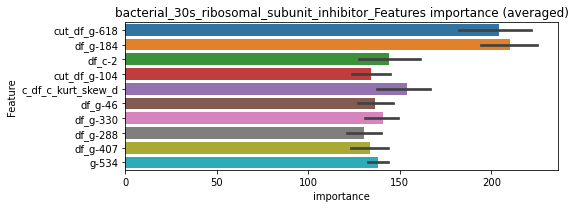

len(train_index) : 2835
len(valid_index) : 945
================================= fold 1/4 bacterial_30s_ribosomal_subunit_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2835
len(valid_index) : 945
================================= fold 2/4 bacterial_30s_ribosomal_subunit_inhibitor=================================


Early stopping, best iteration is:
[689]	training's binary_logloss: 0.000807191	valid_1's binary_logloss: 0.00618134
Training until validation scores don't improve for 30 rounds


len(train_index) : 2835
len(valid_index) : 945
================================= fold 3/4 bacterial_30s_ribosomal_subunit_inhibitor=================================


Early stopping, best iteration is:
[498]	training's binary_logloss: 0.00110651	valid_1's binary_logloss: 0.00353975
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000557625	valid_1's binary_logloss: 0.00124458
[2000]	training's binary_logloss: 0.000310746	valid_1's binary_logloss: 0.000901815
[3000]	training's binary_logloss: 0.000235593	valid_1's binary_logloss: 0.000767247
[4000]	training's binary_logloss: 0.000200539	valid_1's binary_logloss: 0.000688545
[5000]	training's binary_logloss: 0.000182425	valid_1's binary_logloss: 0.000644951
[6000]	training's binary_logloss: 0.000170759	valid_1's binary_logloss: 0.000612806
Early stopping, best iteration is:
[6371]	training's binary_logloss: 0.000167256	valid_1's binary_logloss: 0.000603721


len(train_index) : 2835
len(valid_index) : 945
================================= fold 4/4 bacterial_30s_ribosomal_subunit_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000446173	valid_1's binary_logloss: 0.00072571
[2000]	training's binary_logloss: 0.00024988	valid_1's binary_logloss: 0.00040852
[3000]	training's binary_logloss: 0.000184282	valid_1's binary_logloss: 0.00030178
[4000]	training's binary_logloss: 0.000153005	valid_1's binary_logloss: 0.000250795
[5000]	training's binary_logloss: 0.000136974	valid_1's binary_logloss: 0.000224622
[6000]	training's binary_logloss: 0.000126667	valid_1's binary_logloss: 0.000207756
[7000]	training's binary_logloss: 0.000119513	valid_1's binary_logloss: 0.000196061
[8000]	training's binary_logloss: 0.000114565	valid_1's binary_logloss: 0.000187957
[9000]	training's binary_logloss: 0.000111065	valid_1's binary_logloss: 0.000182228
[10000]	training's binary_logloss: 0.000108558	valid_1's binary_logloss: 0.000178134
Did not meet early stopping. Best iteration is:
[9999]	training's binary_logloss: 0.000108558	valid_1'

bacterial_30s_ribosomal_subunit_inhibitor logloss: 0.002625739909264058


neg labels: 3289 → selected neg labels: 3277


bacterial_50s_ribosomal_subunit_inhibitor, len(trt): 80, len(othr): 3277
target_rate: 0.0033594 → Adj_target_rate: 0.0034820
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00843361	valid_1's binary_logloss: 0.0534789
[600]	training's binary_logloss: 0.00135104	valid_1's binary_logloss: 0.0405105
Early stopping, best iteration is:
[715]	training's binary_logloss: 0.000986962	valid_1's binary_logloss: 0.0398109
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00888199	valid_1's binary_logloss: 0.0412166
[600]	training's binary_logloss: 0.00140128	valid_1's binary_logloss: 0.030097
Early stopping, best iteration is:
[621]	training's binary_logloss: 0.00130864	valid_1's binary_logloss: 0.0298482
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00888359	valid_1's binary_logloss: 0.046531
[600]	training's binary_logloss: 0.00139153	valid_1's binary_logloss: 0.0326435
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.00144183	valid_1's binary_logloss: 0.0

1 / 3 AUC score:0.999
y_Threshold: 0.0116968, Threshold: 0.0369811, pos_neg_ratio: 0.8000000
Remove_noisy_data: 140 → Positive_corect_labels: 651/3792
p_label_rate: 0.0100452 Vs.target_rate: 0.00336
Num_p_label: 40.0, conf_0:0.02589, conf_1:0.04808
Num_p_label: 40.0, Expected: 13.4, Adj_threshold_1: 0.0369811
Num_p_label: 17.0, Expected: 13.4, Adj_threshold_2: 0.0669811
threshold: 0.0669811, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 651.0/3792, y_label_rate: 0.1716772
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00745467	valid_1's binary_logloss: 0.0432318
[600]	training's binary_logloss: 0.00126092	valid_1's binary_logloss: 0.0310707
Early stopping, best iteration is:
[743]	training's binary_logloss: 0.000880552	valid_1's binary_logloss: 0.029921
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00720609	valid_1's binary_logloss: 0.036615
[600]	training's binary_logloss: 0.00121648	valid_1's binary_logloss: 0.0248142
Early stopping, best iteration is:
[836]	training's binary_logloss: 0.00074188	valid_1's binary_logloss: 0.023569
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00751976	valid_1's binary_logloss: 0.0341663
[600]	training's binary_logloss: 0.00127643	valid_1's binary_logloss: 0.0198908
Early stopping, best iteration is:
[783]	training's binary_logloss: 0.000828728	valid_1's binary_logloss: 0.0

2 / 3 AUC score:1.000
y_Threshold: 0.0439075, Threshold: 0.0669811, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 646.0/3782
p_label_rate: 0.0080362 Vs.target_rate: 0.00336
Num_p_label: 32.0, conf_0:0.05358, conf_1:0.08038
Num_p_label: 32.0, Expected: 13.4, Adj_threshold_1: 0.0669811
Num_p_label: 21.0, Expected: 13.4, Adj_threshold_2: 0.0969811
Num_p_label: 13.0, Expected: 13.4, Adj_threshold_3: 0.1269811
threshold: 0.1269811, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 646.0/3782, y_label_rate: 0.1708091
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00701727	valid_1's binary_logloss: 0.0408794
[600]	training's binary_logloss: 0.00119836	valid_1's binary_logloss: 0.0288996
Early stopping, best iteration is:
[746]	training's binary_logloss: 0.000839339	valid_1's binary_logloss: 0.0280037
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00695745	valid_1's binary_logloss: 0.039878
[600]	training's binary_logloss: 0.00120325	valid_1's binary_logloss: 0.0251389
Early stopping, best iteration is:
[748]	training's binary_logloss: 0.000836071	valid_1's binary_logloss: 0.0236359
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00707419	valid_1's binary_logloss: 0.0274567
[600]	training's binary_logloss: 0.0012313	valid_1's binary_logloss: 0.014981
Early stopping, best iteration is:
[825]	training's binary_logloss: 0.000762963	valid_1's binary_logloss: 0.

3 / 3 AUC score:1.000
y_Threshold: 0.0386720, Threshold: 0.1269811, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 645.0/3780
p_label_rate: 0.0035158 Vs.target_rate: 0.00336
Num_p_label: 14.0, conf_0:0.11428, conf_1:0.13968
threshold: 0.1269811, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 645.0/3780, y_label_rate: 0.1706349


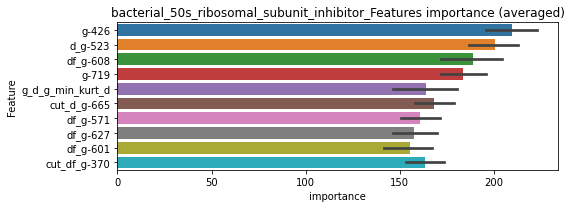

len(train_index) : 2835
len(valid_index) : 945
================================= fold 1/4 bacterial_50s_ribosomal_subunit_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000571953	valid_1's binary_logloss: 0.00419772
Early stopping, best iteration is:
[1778]	training's binary_logloss: 0.000353985	valid_1's binary_logloss: 0.00381396


len(train_index) : 2835
len(valid_index) : 945
================================= fold 2/4 bacterial_50s_ribosomal_subunit_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2835
len(valid_index) : 945
================================= fold 3/4 bacterial_50s_ribosomal_subunit_inhibitor=================================


Early stopping, best iteration is:
[693]	training's binary_logloss: 0.00064255	valid_1's binary_logloss: 0.00472844
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000579861	valid_1's binary_logloss: 0.00229172
[2000]	training's binary_logloss: 0.00033046	valid_1's binary_logloss: 0.00195852
Early stopping, best iteration is:
[2051]	training's binary_logloss: 0.000325446	valid_1's binary_logloss: 0.00194831


len(train_index) : 2835
len(valid_index) : 945
================================= fold 4/4 bacterial_50s_ribosomal_subunit_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[944]	training's binary_logloss: 0.000614804	valid_1's binary_logloss: 0.00351906


bacterial_50s_ribosomal_subunit_inhibitor logloss: 0.0035029665541421386


neg labels: 3289 → selected neg labels: 3286


bacterial_antifolate, len(trt): 36, len(othr): 3286
target_rate: 0.0015117 → Adj_target_rate: 0.0017663
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00291028	valid_1's binary_logloss: 0.0127473
[600]	training's binary_logloss: 0.000624865	valid_1's binary_logloss: 0.0074533
Early stopping, best iteration is:
[655]	training's binary_logloss: 0.00056147	valid_1's binary_logloss: 0.00737748
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00290524	valid_1's binary_logloss: 0.017363
[600]	training's binary_logloss: 0.000608721	valid_1's binary_logloss: 0.0107848
Early stopping, best iteration is:
[696]	training's binary_logloss: 0.00053578	valid_1's binary_logloss: 0.010429
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00296547	valid_1's binary_logloss: 0.00886225
[600]	training's binary_logloss: 0.000635304	valid_1's binary_logloss: 0.00390047
Early stopping, best iteration is:
[717]	training's binary_logloss: 0.000546065	valid_1's binary_loglos

1 / 3 AUC score:1.000
y_Threshold: 0.0039381, Threshold: 0.0383059, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, conf_0:0.02681, conf_1:0.04980
Num_p_label: 40.0, Expected: 6.0, Adj_threshold_1: 0.0383059
Num_p_label: 24.0, Expected: 6.0, Adj_threshold_2: 0.0683059
Num_p_label: 19.0, Expected: 6.0, Adj_threshold_3: 0.0983059
Num_p_label: 18.0, Expected: 6.0, Adj_threshold_4: 0.1283059
Num_p_label: 8.0, Expected: 6.0, Adj_threshold_5: 0.1583059
threshold: 0.1583059, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00271644	valid_1's binary_logloss: 0.0108213
[600]	training's binary_logloss: 0.000589204	valid_1's binary_logloss: 0.00646107
Early stopping, best iteration is:
[669]	training's binary_logloss: 0.000531376	valid_1's binary_logloss: 0.00630586
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00261096	valid_1's binary_logloss: 0.0162511
[600]	training's binary_logloss: 0.000579185	valid_1's binary_logloss: 0.0102705
Early stopping, best iteration is:
[649]	training's binary_logloss: 0.000530508	valid_1's binary_logloss: 0.0101389
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00272188	valid_1's binary_logloss: 0.00895648
[600]	training's binary_logloss: 0.000599623	valid_1's binary_logloss: 0.00405056
Early stopping, best iteration is:
[664]	training's binary_logloss: 0.000540417	valid_1's binary_l

2 / 3 AUC score:1.000
y_Threshold: 0.0863252, Threshold: 0.1583059, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3809
p_label_rate: 0.0102963 Vs.target_rate: 0.00151
Num_p_label: 41.0, conf_0:0.12664, conf_1:0.18997
Num_p_label: 41.0, Expected: 6.0, Adj_threshold_1: 0.1583059
Num_p_label: 36.0, Expected: 6.0, Adj_threshold_2: 0.1883059
Num_p_label: 33.0, Expected: 6.0, Adj_threshold_3: 0.2183059
Num_p_label: 32.0, Expected: 6.0, Adj_threshold_4: 0.2483059
Num_p_label: 31.0, Expected: 6.0, Adj_threshold_5: 0.2783059
Num_p_label: 31.0, Expected: 6.0, Adj_threshold_6: 0.3083059
Num_p_label: 31.0, Expected: 6.0, Adj_threshold_7: 0.3383059
Num_p_label: 29.0, Expected: 6.0, Adj_threshold_8: 0.3683059
Num_p_label: 28.0, Expected: 6.0, Adj_threshold_9: 0.3983059
Num_p_label: 28.0, Expected: 6.0, Adj_threshold_10: 0.4283059
threshold: 0.4583059, positive_p_label: 28.0/3982, p_label_rate: 0.0070316
positive_y_label: 656.0/3809, y_label_rate: 0.1722237
===========

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00255213	valid_1's binary_logloss: 0.0193119
[600]	training's binary_logloss: 0.000571566	valid_1's binary_logloss: 0.0150338
Early stopping, best iteration is:
[637]	training's binary_logloss: 0.000533777	valid_1's binary_logloss: 0.0148328
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00258886	valid_1's binary_logloss: 0.00927518
[600]	training's binary_logloss: 0.000580441	valid_1's binary_logloss: 0.00498462
Early stopping, best iteration is:
[705]	training's binary_logloss: 0.000516343	valid_1's binary_logloss: 0.00484398
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0026764	valid_1's binary_logloss: 0.00741094
[600]	training's binary_logloss: 0.00059737	valid_1's binary_logloss: 0.00385192
Early stopping, best iteration is:
[621]	training's binary_logloss: 0.000573601	valid_1's binary_lo

3 / 3 AUC score:1.000
y_Threshold: 0.0709988, Threshold: 0.4583059, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3807
p_label_rate: 0.0070316 Vs.target_rate: 0.00151
Num_p_label: 28.0, conf_0:0.41248, conf_1:0.50414
Num_p_label: 28.0, Expected: 6.0, Adj_threshold_1: 0.4583059
Num_p_label: 28.0, Expected: 6.0, Adj_threshold_2: 0.4883059
Num_p_label: 27.0, Expected: 6.0, Adj_threshold_3: 0.5183059
Num_p_label: 27.0, Expected: 6.0, Adj_threshold_4: 0.5483059
Num_p_label: 27.0, Expected: 6.0, Adj_threshold_5: 0.5783059
Num_p_label: 27.0, Expected: 6.0, Adj_threshold_6: 0.6083059
Num_p_label: 26.0, Expected: 6.0, Adj_threshold_7: 0.6383059
Num_p_label: 25.0, Expected: 6.0, Adj_threshold_8: 0.6683059
Num_p_label: 24.0, Expected: 6.0, Adj_threshold_9: 0.6983059
Num_p_label: 23.0, Expected: 6.0, Adj_threshold_10: 0.7283059
threshold: 0.7583059, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 655.0/3807, y_label_rate: 0.1720515


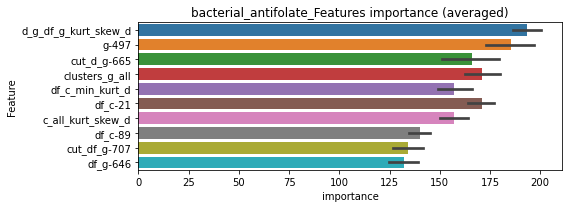

len(train_index) : 2855
len(valid_index) : 952
================================= fold 1/4 bacterial_antifolate=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000509972	valid_1's binary_logloss: 0.00334484
[2000]	training's binary_logloss: 0.000302477	valid_1's binary_logloss: 0.00298932
Early stopping, best iteration is:
[2176]	training's binary_logloss: 0.000288289	valid_1's binary_logloss: 0.00295649


len(train_index) : 2855
len(valid_index) : 952
================================= fold 2/4 bacterial_antifolate=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000424532	valid_1's binary_logloss: 0.000565632
[2000]	training's binary_logloss: 0.000243418	valid_1's binary_logloss: 0.00032521
[3000]	training's binary_logloss: 0.000180934	valid_1's binary_logloss: 0.000241949
[4000]	training's binary_logloss: 0.000150871	valid_1's binary_logloss: 0.000201864
[5000]	training's binary_logloss: 0.000135372	valid_1's binary_logloss: 0.000181175
[6000]	training's binary_logloss: 0.000125361	valid_1's binary_logloss: 0.000167795
[7000]	training's binary_logloss: 0.000118375	valid_1's binary_logloss: 0.000158453
[8000]	training's binary_logloss: 0.000113581	valid_1's binary_logloss: 0.000152048
[9000]	training's binary_logloss: 0.000110146	valid_1's binary_logloss: 0.000147455
[10000]	training's binary_logloss: 0.000107709	valid_1's binary_logloss: 0.000144207
Did not meet early stopping. Best iteration is:
[9999]	training's binary_logloss: 0.000107709	valid

len(train_index) : 2855
len(valid_index) : 952
================================= fold 3/4 bacterial_antifolate=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000513757	valid_1's binary_logloss: 0.00424626
Early stopping, best iteration is:
[1081]	training's binary_logloss: 0.000480136	valid_1's binary_logloss: 0.00418276


len(train_index) : 2856
len(valid_index) : 951
================================= fold 4/4 bacterial_antifolate=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00042198	valid_1's binary_logloss: 0.00071889
[2000]	training's binary_logloss: 0.000242549	valid_1's binary_logloss: 0.000416857
[3000]	training's binary_logloss: 0.000180573	valid_1's binary_logloss: 0.000311341
[4000]	training's binary_logloss: 0.000150643	valid_1's binary_logloss: 0.000260191
[5000]	training's binary_logloss: 0.000135208	valid_1's binary_logloss: 0.000233741
[6000]	training's binary_logloss: 0.000125232	valid_1's binary_logloss: 0.000216583
[7000]	training's binary_logloss: 0.000118266	valid_1's binary_logloss: 0.000204604
[8000]	training's binary_logloss: 0.000113464	valid_1's binary_logloss: 0.000196335
[9000]	training's binary_logloss: 0.000110044	valid_1's binary_logloss: 0.000190446
[10000]	training's binary_logloss: 0.00010762	valid_1's binary_logloss: 0.000186298
Did not meet early stopping. Best iteration is:
[9999]	training's binary_logloss: 0.00010762	valid_1'

bacterial_antifolate logloss: 0.0018682902888144655


neg labels: 3289 → selected neg labels: 3268


bacterial_cell_wall_synthesis_inhibitor, len(trt): 192, len(othr): 3268
target_rate: 0.0080625 → Adj_target_rate: 0.0073283
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0238931	valid_1's binary_logloss: 0.185977
Early stopping, best iteration is:
[365]	training's binary_logloss: 0.014998	valid_1's binary_logloss: 0.183873
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0243891	valid_1's binary_logloss: 0.15977
Early stopping, best iteration is:
[469]	training's binary_logloss: 0.00748095	valid_1's binary_logloss: 0.152117
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0273994	valid_1's binary_logloss: 0.157587
Early stopping, best iteration is:
[429]	training's binary_logloss: 0.0111191	valid_1's binary_logloss: 0.147411
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.025391	valid_1's binary_logloss: 0.145793


1 / 3 AUC score:0.962
y_Threshold: 0.0482712, Threshold: 0.2158189, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[519]	training's binary_logloss: 0.00604939	valid_1's binary_logloss: 0.133114


Remove_noisy_data: 272 → Positive_corect_labels: 583/3649
p_label_rate: 0.0100452 Vs.target_rate: 0.00806
Num_p_label: 40.0, conf_0:0.15107, conf_1:0.28056
threshold: 0.2158189, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 583.0/3649, y_label_rate: 0.1597698
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0149786	valid_1's binary_logloss: 0.108323
[600]	training's binary_logloss: 0.00247972	valid_1's binary_logloss: 0.0959493
Early stopping, best iteration is:
[735]	training's binary_logloss: 0.00163128	valid_1's binary_logloss: 0.0948995
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0150811	valid_1's binary_logloss: 0.120866
[600]	training's binary_logloss: 0.00247621	valid_1's binary_logloss: 0.108811
Early stopping, best iteration is:
[574]	training's binary_logloss: 0.0027527	valid_1's binary_logloss: 0.108124
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0157823	valid_1's binary_logloss: 0.0948146
Early stopping, best iteration is:
[497]	training's binary_logloss: 0.00416169	valid_1's binary_logloss: 0.0823198
Training until validation scores don't improve for 30 rounds
[300]	training's bi

2 / 3 AUC score:0.988
y_Threshold: 0.0554777, Threshold: 0.2158189, pos_neg_ratio: 0.8000000
Remove_noisy_data: 82 → Positive_corect_labels: 542.0/3567
p_label_rate: 0.0190859 Vs.target_rate: 0.00806
Num_p_label: 76.0, conf_0:0.17266, conf_1:0.25898
Num_p_label: 76.0, Expected: 32.1, Adj_threshold_1: 0.2158189
Num_p_label: 70.0, Expected: 32.1, Adj_threshold_2: 0.2458189
Num_p_label: 68.0, Expected: 32.1, Adj_threshold_3: 0.2758189
Num_p_label: 62.0, Expected: 32.1, Adj_threshold_4: 0.3058189


Early stopping, best iteration is:
[397]	training's binary_logloss: 0.00689361	valid_1's binary_logloss: 0.127291


Num_p_label: 52.0, Expected: 32.1, Adj_threshold_5: 0.3358189
Num_p_label: 51.0, Expected: 32.1, Adj_threshold_6: 0.3658189
Num_p_label: 44.0, Expected: 32.1, Adj_threshold_7: 0.3958189
threshold: 0.3958189, positive_p_label: 44.0/3982, p_label_rate: 0.0110497
positive_y_label: 542.0/3567, y_label_rate: 0.1519484
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0109795	valid_1's binary_logloss: 0.0924497
Early stopping, best iteration is:
[375]	training's binary_logloss: 0.00609658	valid_1's binary_logloss: 0.0865544
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0112171	valid_1's binary_logloss: 0.0936519
Early stopping, best iteration is:
[560]	training's binary_logloss: 0.00228274	valid_1's binary_logloss: 0.0820238
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0111353	valid_1's binary_logloss: 0.0787981
[600]	training's binary_logloss: 0.00195541	valid_1's binary_logloss: 0.0676531
Early stopping, best iteration is:
[579]	training's binary_logloss: 0.002114	valid_1's binary_logloss: 0.0674717
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0113246	valid_1's binary_logloss: 0.0936626


3 / 3 AUC score:0.997
y_Threshold: 0.0549175, Threshold: 0.3958189, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[502]	training's binary_logloss: 0.00289847	valid_1's binary_logloss: 0.0822063


Remove_noisy_data: 50 → Positive_corect_labels: 517.0/3517
p_label_rate: 0.0155701 Vs.target_rate: 0.00806
Num_p_label: 62.0, conf_0:0.35624, conf_1:0.43540
Num_p_label: 62.0, Expected: 32.1, Adj_threshold_1: 0.3958189
Num_p_label: 60.0, Expected: 32.1, Adj_threshold_2: 0.4258189
Num_p_label: 55.0, Expected: 32.1, Adj_threshold_3: 0.4558189
Num_p_label: 52.0, Expected: 32.1, Adj_threshold_4: 0.4858189
Num_p_label: 46.0, Expected: 32.1, Adj_threshold_5: 0.5158189
threshold: 0.5158189, positive_p_label: 46.0/3982, p_label_rate: 0.0115520
positive_y_label: 517.0/3517, y_label_rate: 0.1470003


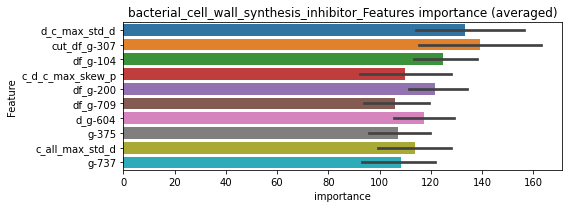

len(train_index) : 2637
len(valid_index) : 880
================================= fold 1/4 bacterial_cell_wall_synthesis_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2638
len(valid_index) : 879
================================= fold 2/4 bacterial_cell_wall_synthesis_inhibitor=================================


Early stopping, best iteration is:
[642]	training's binary_logloss: 0.000963951	valid_1's binary_logloss: 0.00582495
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000622505	valid_1's binary_logloss: 0.0013923
[2000]	training's binary_logloss: 0.000352213	valid_1's binary_logloss: 0.000935906
[3000]	training's binary_logloss: 0.000272293	valid_1's binary_logloss: 0.000774649
[4000]	training's binary_logloss: 0.000234894	valid_1's binary_logloss: 0.000696554
[5000]	training's binary_logloss: 0.000214737	valid_1's binary_logloss: 0.000652937
[6000]	training's binary_logloss: 0.00020143	valid_1's binary_logloss: 0.000625008
Early stopping, best iteration is:
[6819]	training's binary_logloss: 0.000193495	valid_1's binary_logloss: 0.000605624


len(train_index) : 2638
len(valid_index) : 879
================================= fold 3/4 bacterial_cell_wall_synthesis_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000619631	valid_1's binary_logloss: 0.00110368
[2000]	training's binary_logloss: 0.0003508	valid_1's binary_logloss: 0.000684264
[3000]	training's binary_logloss: 0.000271576	valid_1's binary_logloss: 0.000543402
[4000]	training's binary_logloss: 0.000235582	valid_1's binary_logloss: 0.000474483
[5000]	training's binary_logloss: 0.00021683	valid_1's binary_logloss: 0.0004407
[6000]	training's binary_logloss: 0.000204448	valid_1's binary_logloss: 0.000417829
[7000]	training's binary_logloss: 0.000195685	valid_1's binary_logloss: 0.000401152
Early stopping, best iteration is:
[7668]	training's binary_logloss: 0.000191144	valid_1's binary_logloss: 0.000393072


len(train_index) : 2638
len(valid_index) : 879
================================= fold 4/4 bacterial_cell_wall_synthesis_inhibitor=================================


Training until validation scores don't improve for 30 rounds


bacterial_cell_wall_synthesis_inhibitor logloss: 0.0034438109278608674


Early stopping, best iteration is:
[875]	training's binary_logloss: 0.000687308	valid_1's binary_logloss: 0.00694876


neg labels: 3289 → selected neg labels: 3279


bacterial_dna_gyrase_inhibitor, len(trt): 89, len(othr): 3279
target_rate: 0.0037373 → Adj_target_rate: 0.0038122
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0103719	valid_1's binary_logloss: 0.0519807
[600]	training's binary_logloss: 0.00159814	valid_1's binary_logloss: 0.0326174
[900]	training's binary_logloss: 0.000841856	valid_1's binary_logloss: 0.0294167
Early stopping, best iteration is:
[958]	training's binary_logloss: 0.000799376	valid_1's binary_logloss: 0.0291557
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00999176	valid_1's binary_logloss: 0.0576462
[600]	training's binary_logloss: 0.0015618	valid_1's binary_logloss: 0.041574
Early stopping, best iteration is:
[723]	training's binary_logloss: 0.00110391	valid_1's binary_logloss: 0.040499
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00987723	valid_1's binary_logloss: 0.0603165
[600]	training's binary_logloss: 0.00154684	valid_1's binary_logloss: 0.0497581
Early stopping, best iteratio

1 / 3 AUC score:0.998


[600]	training's binary_logloss: 0.00157347	valid_1's binary_logloss: 0.0495741
Early stopping, best iteration is:
[570]	training's binary_logloss: 0.0017589	valid_1's binary_logloss: 0.049359


y_Threshold: 0.0122145, Threshold: 0.0313725, pos_neg_ratio: 0.8000000
Remove_noisy_data: 144 → Positive_corect_labels: 649/3790
p_label_rate: 0.0100452 Vs.target_rate: 0.00374
Num_p_label: 40.0, conf_0:0.02196, conf_1:0.04078
Num_p_label: 40.0, Expected: 14.9, Adj_threshold_1: 0.0313725
Num_p_label: 10.0, Expected: 14.9, Adj_threshold_2: 0.0613725
threshold: 0.0613725, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 649.0/3790, y_label_rate: 0.1712401
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00862997	valid_1's binary_logloss: 0.046652
[600]	training's binary_logloss: 0.00143384	valid_1's binary_logloss: 0.0331804
Early stopping, best iteration is:
[653]	training's binary_logloss: 0.00121749	valid_1's binary_logloss: 0.0324305
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00850886	valid_1's binary_logloss: 0.0628491
Early stopping, best iteration is:
[566]	training's binary_logloss: 0.00160896	valid_1's binary_logloss: 0.0516539
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0084786	valid_1's binary_logloss: 0.0607825
[600]	training's binary_logloss: 0.00142201	valid_1's binary_logloss: 0.05013
Early stopping, best iteration is:
[725]	training's binary_logloss: 0.00101148	valid_1's binary_logloss: 0.0492332
Training until validation scores don't improve for 30 rounds
[300]	training'

2 / 3 AUC score:0.999
y_Threshold: 0.0286192, Threshold: 0.0613725, pos_neg_ratio: 0.8000000
Remove_noisy_data: 26 → Positive_corect_labels: 636.0/3764
p_label_rate: 0.0070316 Vs.target_rate: 0.00374
Num_p_label: 28.0, conf_0:0.04910, conf_1:0.07365
Num_p_label: 28.0, Expected: 14.9, Adj_threshold_1: 0.0613725
Num_p_label: 13.0, Expected: 14.9, Adj_threshold_2: 0.0913725
threshold: 0.0913725, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 636.0/3764, y_label_rate: 0.1689692
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00790203	valid_1's binary_logloss: 0.0444756
[600]	training's binary_logloss: 0.00133354	valid_1's binary_logloss: 0.0302504
Early stopping, best iteration is:
[705]	training's binary_logloss: 0.00100105	valid_1's binary_logloss: 0.0294176
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00732229	valid_1's binary_logloss: 0.0387743
[600]	training's binary_logloss: 0.00129801	valid_1's binary_logloss: 0.0291228
Early stopping, best iteration is:
[606]	training's binary_logloss: 0.00127249	valid_1's binary_logloss: 0.0290743
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00769125	valid_1's binary_logloss: 0.0416062
[600]	training's binary_logloss: 0.00130892	valid_1's binary_logloss: 0.0272449
Early stopping, best iteration is:
[852]	training's binary_logloss: 0.000774177	valid_1's binary_logloss: 0

3 / 3 AUC score:1.000
y_Threshold: 0.0434306, Threshold: 0.0913725, pos_neg_ratio: 0.8000000
Remove_noisy_data: 12 → Positive_corect_labels: 630.0/3752
p_label_rate: 0.0025113 Vs.target_rate: 0.00374
Num_p_label: 10.0, conf_0:0.08224, conf_1:0.10051
threshold: 0.0913725, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 630.0/3752, y_label_rate: 0.1679104


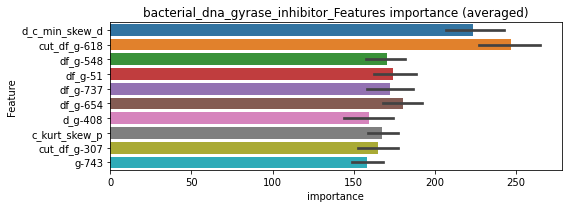

len(train_index) : 2814
len(valid_index) : 938
================================= fold 1/4 bacterial_dna_gyrase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000578026	valid_1's binary_logloss: 0.00517345
Early stopping, best iteration is:
[1310]	training's binary_logloss: 0.000451261	valid_1's binary_logloss: 0.00497535


len(train_index) : 2814
len(valid_index) : 938
================================= fold 2/4 bacterial_dna_gyrase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2814
len(valid_index) : 938
================================= fold 3/4 bacterial_dna_gyrase_inhibitor=================================


Early stopping, best iteration is:
[760]	training's binary_logloss: 0.000725814	valid_1's binary_logloss: 0.00859531
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000574045	valid_1's binary_logloss: 0.00142392
Early stopping, best iteration is:
[1738]	training's binary_logloss: 0.000358041	valid_1's binary_logloss: 0.00111504


len(train_index) : 2814
len(valid_index) : 938
================================= fold 4/4 bacterial_dna_gyrase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00056247	valid_1's binary_logloss: 0.00129105
[2000]	training's binary_logloss: 0.000315866	valid_1's binary_logloss: 0.000890605
[3000]	training's binary_logloss: 0.000239591	valid_1's binary_logloss: 0.000731265
[4000]	training's binary_logloss: 0.000203439	valid_1's binary_logloss: 0.000655457
[5000]	training's binary_logloss: 0.000184789	valid_1's binary_logloss: 0.000611261
[6000]	training's binary_logloss: 0.000172891	valid_1's binary_logloss: 0.00058072
[7000]	training's binary_logloss: 0.000164018	valid_1's binary_logloss: 0.000560646
[8000]	training's binary_logloss: 0.000157657	valid_1's binary_logloss: 0.000545155
Early stopping, best iteration is:
[8180]	training's binary_logloss: 0.000156653	valid_1's binary_logloss: 0.00054287


bacterial_dna_gyrase_inhibitor logloss: 0.0038072603889025077


neg labels: 3289 → selected neg labels: 3274


bacterial_dna_inhibitor, len(trt): 115, len(othr): 3274
target_rate: 0.0048291 → Adj_target_rate: 0.0047401
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0116615	valid_1's binary_logloss: 0.110151
Early stopping, best iteration is:
[404]	training's binary_logloss: 0.00506321	valid_1's binary_logloss: 0.105106
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0129539	valid_1's binary_logloss: 0.0780017
[600]	training's binary_logloss: 0.00204042	valid_1's binary_logloss: 0.0640237
Early stopping, best iteration is:
[581]	training's binary_logloss: 0.00219658	valid_1's binary_logloss: 0.063815
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0134028	valid_1's binary_logloss: 0.066185
[600]	training's binary_logloss: 0.00210486	valid_1's binary_logloss: 0.0511726
Early stopping, best iteration is:
[720]	training's binary_logloss: 0.00144562	valid_1's binary_logloss: 0.050351
Training until validation scores don't improve for 30 rounds
[300]	training's bi

1 / 3 AUC score:0.992
y_Threshold: 0.0166926, Threshold: 0.0515389, pos_neg_ratio: 0.8000000
Remove_noisy_data: 174 → Positive_corect_labels: 633/3754
p_label_rate: 0.0100452 Vs.target_rate: 0.00483
Num_p_label: 40.0, conf_0:0.03608, conf_1:0.06700
Num_p_label: 40.0, Expected: 19.2, Adj_threshold_1: 0.0515389
Num_p_label: 13.0, Expected: 19.2, Adj_threshold_2: 0.0815389
threshold: 0.0815389, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 633.0/3754, y_label_rate: 0.1686201
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00980979	valid_1's binary_logloss: 0.067551
[600]	training's binary_logloss: 0.00163762	valid_1's binary_logloss: 0.0544476
Early stopping, best iteration is:
[617]	training's binary_logloss: 0.00154472	valid_1's binary_logloss: 0.054157
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00983009	valid_1's binary_logloss: 0.0696927
[600]	training's binary_logloss: 0.00162487	valid_1's binary_logloss: 0.0574478
Early stopping, best iteration is:
[575]	training's binary_logloss: 0.00177872	valid_1's binary_logloss: 0.0571678
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0100923	valid_1's binary_logloss: 0.0524445
[600]	training's binary_logloss: 0.00166947	valid_1's binary_logloss: 0.0389902
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.00149652	valid_1's binary_logloss: 0.038

2 / 3 AUC score:0.999
y_Threshold: 0.0390440, Threshold: 0.0815389, pos_neg_ratio: 0.8000000
Remove_noisy_data: 12 → Positive_corect_labels: 627.0/3742
p_label_rate: 0.0085384 Vs.target_rate: 0.00483
Num_p_label: 34.0, conf_0:0.06523, conf_1:0.09785
Num_p_label: 34.0, Expected: 19.2, Adj_threshold_1: 0.0815389
Num_p_label: 21.0, Expected: 19.2, Adj_threshold_2: 0.1115389
threshold: 0.1115389, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 627.0/3742, y_label_rate: 0.1675575
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00924982	valid_1's binary_logloss: 0.0615667
Early stopping, best iteration is:
[557]	training's binary_logloss: 0.00182423	valid_1's binary_logloss: 0.0492923
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00857858	valid_1's binary_logloss: 0.0725972
[600]	training's binary_logloss: 0.00153527	valid_1's binary_logloss: 0.0615963
Early stopping, best iteration is:
[573]	training's binary_logloss: 0.00167862	valid_1's binary_logloss: 0.0614103
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00953296	valid_1's binary_logloss: 0.0507748
[600]	training's binary_logloss: 0.00161191	valid_1's binary_logloss: 0.0376099
Early stopping, best iteration is:
[715]	training's binary_logloss: 0.00117243	valid_1's binary_logloss: 0.0366641
Training until validation scores don't improve for 30 rounds
[300]	train

3 / 3 AUC score:0.999
y_Threshold: 0.0345942, Threshold: 0.1115389, pos_neg_ratio: 0.8000000
Remove_noisy_data: 14 → Positive_corect_labels: 620.0/3728
p_label_rate: 0.0040181 Vs.target_rate: 0.00483
Num_p_label: 16.0, conf_0:0.10038, conf_1:0.12269
threshold: 0.1115389, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 620.0/3728, y_label_rate: 0.1663090


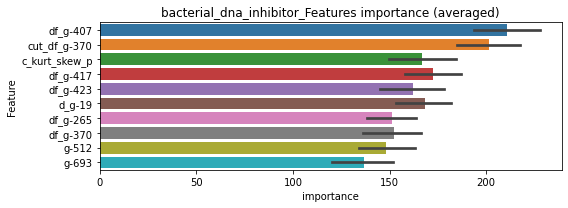

len(train_index) : 2796
len(valid_index) : 932
================================= fold 1/4 bacterial_dna_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000586069	valid_1's binary_logloss: 0.00574478
Early stopping, best iteration is:
[1188]	training's binary_logloss: 0.000504807	valid_1's binary_logloss: 0.00561084


len(train_index) : 2796
len(valid_index) : 932
================================= fold 2/4 bacterial_dna_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000563276	valid_1's binary_logloss: 0.00141697
Early stopping, best iteration is:
[1413]	training's binary_logloss: 0.000413803	valid_1's binary_logloss: 0.00125443


len(train_index) : 2796
len(valid_index) : 932
================================= fold 3/4 bacterial_dna_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000554013	valid_1's binary_logloss: 0.00324912
[2000]	training's binary_logloss: 0.000316027	valid_1's binary_logloss: 0.00291598
[3000]	training's binary_logloss: 0.000241364	valid_1's binary_logloss: 0.00278595
Early stopping, best iteration is:
[3806]	training's binary_logloss: 0.000209886	valid_1's binary_logloss: 0.00273274


len(train_index) : 2796
len(valid_index) : 932
================================= fold 4/4 bacterial_dna_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000583188	valid_1's binary_logloss: 0.00309101
Early stopping, best iteration is:
[1360]	training's binary_logloss: 0.000440585	valid_1's binary_logloss: 0.00292154


bacterial_dna_inhibitor logloss: 0.003130495530538584


neg labels: 3289 → selected neg labels: 3286


bacterial_membrane_integrity_inhibitor, len(trt): 19, len(othr): 3286
target_rate: 0.0007979 → Adj_target_rate: 0.0010260
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00126058	valid_1's binary_logloss: 0.00303419
[600]	training's binary_logloss: 0.000344293	valid_1's binary_logloss: 0.00121639
Early stopping, best iteration is:
[606]	training's binary_logloss: 0.000342746	valid_1's binary_logloss: 0.00120976
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00122452	valid_1's binary_logloss: 0.00466958
[600]	training's binary_logloss: 0.000342642	valid_1's binary_logloss: 0.00243119
Early stopping, best iteration is:
[600]	training's binary_logloss: 0.000342642	valid_1's binary_logloss: 0.00243119
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.001321	valid_1's binary_logloss: 0.00292306
Early stopping, best iteration is:
[569]	training's binary_logloss: 0.000356968	valid_1's binary_logloss: 0.00132751
Training until validation scores don't improve for 30 rounds


1 / 3 AUC score:1.000
y_Threshold: 0.0019696, Threshold: 0.0056483, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00080
Num_p_label: 40.0, conf_0:0.00395, conf_1:0.00734
Num_p_label: 40.0, Expected: 3.2, Adj_threshold_1: 0.0056483
Num_p_label: 1.0, Expected: 3.2, Adj_threshold_2: 0.0356483


[600]	training's binary_logloss: 0.000345581	valid_1's binary_logloss: 0.00227669
Early stopping, best iteration is:
[592]	training's binary_logloss: 0.000345581	valid_1's binary_logloss: 0.00227669


threshold: 0.0356483, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0011996	valid_1's binary_logloss: 0.00312859
Early stopping, best iteration is:
[557]	training's binary_logloss: 0.000354511	valid_1's binary_logloss: 0.00133943
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00114982	valid_1's binary_logloss: 0.00464606
[600]	training's binary_logloss: 0.000327035	valid_1's binary_logloss: 0.00274947
Early stopping, best iteration is:
[579]	training's binary_logloss: 0.000328967	valid_1's binary_logloss: 0.00274081
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00119309	valid_1's binary_logloss: 0.00206805
[600]	training's binary_logloss: 0.000337005	valid_1's binary_logloss: 0.000799287
Early stopping, best iteration is:
[609]	training's binary_logloss: 0.000335526	valid_1's binary_logloss: 0.000795027
Training until validation scores don't improve for 30 roun

2 / 3 AUC score:1.000
y_Threshold: 0.0576249, Threshold: 0.0356483, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0022602 Vs.target_rate: 0.00080
Num_p_label: 9.0, conf_0:0.02852, conf_1:0.04278
Num_p_label: 9.0, Expected: 3.2, Adj_threshold_1: 0.0356483
Num_p_label: 4.0, Expected: 3.2, Adj_threshold_2: 0.0656483
threshold: 0.0656483, positive_p_label: 4.0/3982, p_label_rate: 0.0010045


[600]	training's binary_logloss: 0.000329739	valid_1's binary_logloss: 0.00324554
Early stopping, best iteration is:
[580]	training's binary_logloss: 0.000332449	valid_1's binary_logloss: 0.00324325


positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0011996	valid_1's binary_logloss: 0.00312859
Early stopping, best iteration is:
[545]	training's binary_logloss: 0.000354511	valid_1's binary_logloss: 0.00133943
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00114982	valid_1's binary_logloss: 0.00464606
[600]	training's binary_logloss: 0.000327035	valid_1's binary_logloss: 0.00274947
Early stopping, best iteration is:
[579]	training's binary_logloss: 0.000328967	valid_1's binary_logloss: 0.00274081
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00119309	valid_1's binary_logloss: 0.00206805
[600]	training's binary_logloss: 0.000337005	valid_1's binary_logloss: 0.000799287
Early stopping, best iteration is:
[609]	training's binary_logloss: 0.000335526	valid_1's binary_logloss: 0.000795027
Training until validation scores don't improve for 30 roun

3 / 3 AUC score:1.000
y_Threshold: 0.0576249, Threshold: 0.0656483, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811


[600]	training's binary_logloss: 0.000329739	valid_1's binary_logloss: 0.00324554
Early stopping, best iteration is:
[580]	training's binary_logloss: 0.000332449	valid_1's binary_logloss: 0.00324325


p_label_rate: 0.0010045 Vs.target_rate: 0.00080
Num_p_label: 4.0, conf_0:0.05908, conf_1:0.07221
threshold: 0.0656483, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


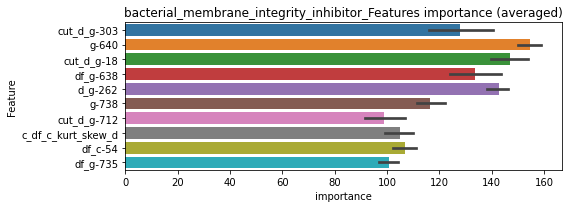

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 bacterial_membrane_integrity_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00041874	valid_1's binary_logloss: 0.00204968
Early stopping, best iteration is:
[1366]	training's binary_logloss: 0.000326009	valid_1's binary_logloss: 0.00192995


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 bacterial_membrane_integrity_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 bacterial_membrane_integrity_inhibitor=================================


Early stopping, best iteration is:
[827]	training's binary_logloss: 0.000515399	valid_1's binary_logloss: 0.0032998
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000432045	valid_1's binary_logloss: 0.000575
[2000]	training's binary_logloss: 0.000258409	valid_1's binary_logloss: 0.000398429
[3000]	training's binary_logloss: 0.000209159	valid_1's binary_logloss: 0.000339938
[4000]	training's binary_logloss: 0.000185355	valid_1's binary_logloss: 0.00031211
[5000]	training's binary_logloss: 0.000172923	valid_1's binary_logloss: 0.000296286
Early stopping, best iteration is:
[5042]	training's binary_logloss: 0.000172472	valid_1's binary_logloss: 0.000295836


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 bacterial_membrane_integrity_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000443838	valid_1's binary_logloss: 0.0026314
Early stopping, best iteration is:
[1283]	training's binary_logloss: 0.000364034	valid_1's binary_logloss: 0.00249729


bacterial_membrane_integrity_inhibitor logloss: 0.0020067690393158707


neg labels: 3289 → selected neg labels: 3282


bcl_inhibitor, len(trt): 31, len(othr): 3282
target_rate: 0.0013018 → Adj_target_rate: 0.0015554
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00245207	valid_1's binary_logloss: 0.0176794
[600]	training's binary_logloss: 0.000518834	valid_1's binary_logloss: 0.0130161
Early stopping, best iteration is:
[607]	training's binary_logloss: 0.000512472	valid_1's binary_logloss: 0.0129581
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00257003	valid_1's binary_logloss: 0.00509089
[600]	training's binary_logloss: 0.000534187	valid_1's binary_logloss: 0.00157397
Early stopping, best iteration is:
[664]	training's binary_logloss: 0.000487979	valid_1's binary_logloss: 0.00147321
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00250928	valid_1's binary_logloss: 0.00514719
[600]	training's binary_logloss: 0.000531453	valid_1's binary_logloss: 0.00185462
Early stopping, best iteration is:
[629]	training's binary_logloss: 0.000507035	valid_1's binary_

1 / 3 AUC score:1.000
y_Threshold: 0.0040778, Threshold: 0.0250935, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00130
Num_p_label: 40.0, conf_0:0.01757, conf_1:0.03262
Num_p_label: 40.0, Expected: 5.2, Adj_threshold_1: 0.0250935
Num_p_label: 21.0, Expected: 5.2, Adj_threshold_2: 0.0550935
Num_p_label: 8.0, Expected: 5.2, Adj_threshold_3: 0.0850935
threshold: 0.0850935, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00221612	valid_1's binary_logloss: 0.015981
[600]	training's binary_logloss: 0.000484553	valid_1's binary_logloss: 0.0118478
Early stopping, best iteration is:
[614]	training's binary_logloss: 0.00047249	valid_1's binary_logloss: 0.0118337
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00233558	valid_1's binary_logloss: 0.004713
[600]	training's binary_logloss: 0.000502451	valid_1's binary_logloss: 0.00134808
Early stopping, best iteration is:
[656]	training's binary_logloss: 0.00046235	valid_1's binary_logloss: 0.00125442
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00236309	valid_1's binary_logloss: 0.00386465
[600]	training's binary_logloss: 0.000504885	valid_1's binary_logloss: 0.00106537
Early stopping, best iteration is:
[662]	training's binary_logloss: 0.000466301	valid_1's binary_loglo

2 / 3 AUC score:1.000
y_Threshold: 0.0278204, Threshold: 0.0850935, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3804
p_label_rate: 0.0097941 Vs.target_rate: 0.00130
Num_p_label: 39.0, conf_0:0.06807, conf_1:0.10211
Num_p_label: 39.0, Expected: 5.2, Adj_threshold_1: 0.0850935
Num_p_label: 25.0, Expected: 5.2, Adj_threshold_2: 0.1150935
Num_p_label: 20.0, Expected: 5.2, Adj_threshold_3: 0.1450935
Num_p_label: 16.0, Expected: 5.2, Adj_threshold_4: 0.1750935
Num_p_label: 12.0, Expected: 5.2, Adj_threshold_5: 0.2050935
threshold: 0.2050935, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 655.0/3804, y_label_rate: 0.1721872
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00227203	valid_1's binary_logloss: 0.00489776
[600]	training's binary_logloss: 0.000491853	valid_1's binary_logloss: 0.00154708
Early stopping, best iteration is:
[664]	training's binary_logloss: 0.000457866	valid_1's binary_logloss: 0.0014901
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00227854	valid_1's binary_logloss: 0.00656563
[600]	training's binary_logloss: 0.000492811	valid_1's binary_logloss: 0.00217617
Early stopping, best iteration is:
[673]	training's binary_logloss: 0.000454841	valid_1's binary_logloss: 0.00207432
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00229467	valid_1's binary_logloss: 0.00822701
[600]	training's binary_logloss: 0.000489044	valid_1's binary_logloss: 0.00487259
Early stopping, best iteration is:
[617]	training's binary_logloss: 0.000475689	valid_1's binar

3 / 3 AUC score:1.000
y_Threshold: 0.0414205, Threshold: 0.2050935, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3804
p_label_rate: 0.0040181 Vs.target_rate: 0.00130
Num_p_label: 16.0, conf_0:0.18458, conf_1:0.22560
Num_p_label: 16.0, Expected: 5.2, Adj_threshold_1: 0.2050935
Num_p_label: 10.0, Expected: 5.2, Adj_threshold_2: 0.2350935
threshold: 0.2350935, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 655.0/3804, y_label_rate: 0.1721872


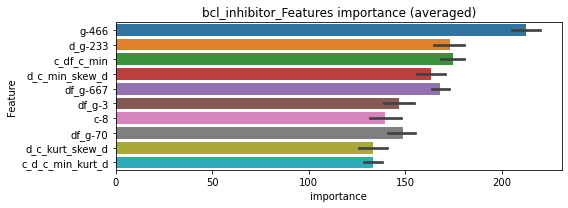

len(train_index) : 2853
len(valid_index) : 951
================================= fold 1/4 bcl_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000488129	valid_1's binary_logloss: 0.000503753
[2000]	training's binary_logloss: 0.000291261	valid_1's binary_logloss: 0.000288149
[3000]	training's binary_logloss: 0.000234743	valid_1's binary_logloss: 0.00022226
[4000]	training's binary_logloss: 0.000208538	valid_1's binary_logloss: 0.000189954
[5000]	training's binary_logloss: 0.000194482	valid_1's binary_logloss: 0.000172784
[6000]	training's binary_logloss: 0.000185009	valid_1's binary_logloss: 0.000161081
[7000]	training's binary_logloss: 0.000178224	valid_1's binary_logloss: 0.000153037
[8000]	training's binary_logloss: 0.000173214	valid_1's binary_logloss: 0.00014711
[9000]	training's binary_logloss: 0.000169563	valid_1's binary_logloss: 0.000142758
Early stopping, best iteration is:
[8971]	training's binary_logloss: 0.000169563	valid_1's binary_logloss: 0.000142758


len(train_index) : 2853
len(valid_index) : 951
================================= fold 2/4 bcl_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000503449	valid_1's binary_logloss: 0.00122456
[2000]	training's binary_logloss: 0.000292861	valid_1's binary_logloss: 0.000984202
Early stopping, best iteration is:
[2828]	training's binary_logloss: 0.000238857	valid_1's binary_logloss: 0.000912361


len(train_index) : 2853
len(valid_index) : 951
================================= fold 3/4 bcl_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000469744	valid_1's binary_logloss: 0.00161665
[2000]	training's binary_logloss: 0.000281747	valid_1's binary_logloss: 0.00135103
[3000]	training's binary_logloss: 0.000227263	valid_1's binary_logloss: 0.00127743
Early stopping, best iteration is:
[3294]	training's binary_logloss: 0.000217282	valid_1's binary_logloss: 0.00126474


len(train_index) : 2853
len(valid_index) : 951
================================= fold 4/4 bcl_inhibitor=================================


Training until validation scores don't improve for 30 rounds


bcl_inhibitor logloss: 0.0018517664031311757


Early stopping, best iteration is:
[689]	training's binary_logloss: 0.000660398	valid_1's binary_logloss: 0.00508639
neg labels: 3289 → selected neg labels: 3285


bcr-abl_inhibitor, len(trt): 38, len(othr): 3285
target_rate: 0.0015957 → Adj_target_rate: 0.0018493
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00284515	valid_1's binary_logloss: 0.0103398
[600]	training's binary_logloss: 0.000617708	valid_1's binary_logloss: 0.00494404
Early stopping, best iteration is:
[665]	training's binary_logloss: 0.000555338	valid_1's binary_logloss: 0.00480758
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00267075	valid_1's binary_logloss: 0.0227905
[600]	training's binary_logloss: 0.000588598	valid_1's binary_logloss: 0.0177456
Early stopping, best iteration is:
[639]	training's binary_logloss: 0.000548306	valid_1's binary_logloss: 0.0176682
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0028657	valid_1's binary_logloss: 0.00728132
[600]	training's binary_logloss: 0.000621074	valid_1's binary_logloss: 0.00363241
Early stopping, best iteration is:
[665]	training's binary_logloss: 0.000558497	valid_1's binary_lo

1 / 3 AUC score:1.000
y_Threshold: 0.0038523, Threshold: 0.0465733, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00160
Num_p_label: 40.0, conf_0:0.03260, conf_1:0.06055
Num_p_label: 40.0, Expected: 6.4, Adj_threshold_1: 0.0465733
Num_p_label: 26.0, Expected: 6.4, Adj_threshold_2: 0.0765733
Num_p_label: 22.0, Expected: 6.4, Adj_threshold_3: 0.1065733
Num_p_label: 17.0, Expected: 6.4, Adj_threshold_4: 0.1365733
Num_p_label: 13.0, Expected: 6.4, Adj_threshold_5: 0.1665733
threshold: 0.1665733, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00264516	valid_1's binary_logloss: 0.0083745
[600]	training's binary_logloss: 0.000582477	valid_1's binary_logloss: 0.00392475
Early stopping, best iteration is:
[665]	training's binary_logloss: 0.000533967	valid_1's binary_logloss: 0.0037626
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00240315	valid_1's binary_logloss: 0.0239145
Early stopping, best iteration is:
[491]	training's binary_logloss: 0.000747098	valid_1's binary_logloss: 0.0206151
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00260988	valid_1's binary_logloss: 0.00601117
[600]	training's binary_logloss: 0.000580948	valid_1's binary_logloss: 0.00266204
Early stopping, best iteration is:
[668]	training's binary_logloss: 0.000527687	valid_1's binary_logloss: 0.00254513
Training until validation scores don't improve for 30 rounds
[3

2 / 3 AUC score:1.000
y_Threshold: 0.0523772, Threshold: 0.1665733, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 654.0/3804
p_label_rate: 0.0135610 Vs.target_rate: 0.00160
Num_p_label: 54.0, conf_0:0.13326, conf_1:0.19989
Num_p_label: 54.0, Expected: 6.4, Adj_threshold_1: 0.1665733
Num_p_label: 51.0, Expected: 6.4, Adj_threshold_2: 0.1965733
Num_p_label: 50.0, Expected: 6.4, Adj_threshold_3: 0.2265733
Num_p_label: 46.0, Expected: 6.4, Adj_threshold_4: 0.2565733
Num_p_label: 42.0, Expected: 6.4, Adj_threshold_5: 0.2865733
Num_p_label: 37.0, Expected: 6.4, Adj_threshold_6: 0.3165733
Num_p_label: 36.0, Expected: 6.4, Adj_threshold_7: 0.3465733
Num_p_label: 32.0, Expected: 6.4, Adj_threshold_8: 0.3765733
Num_p_label: 32.0, Expected: 6.4, Adj_threshold_9: 0.4065733
Num_p_label: 31.0, Expected: 6.4, Adj_threshold_10: 0.4365733
threshold: 0.4665733, positive_p_label: 27.0/3982, p_label_rate: 0.0067805
positive_y_label: 654.0/3804, y_label_rate: 0.1719243
===========

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00249241	valid_1's binary_logloss: 0.0124103
[600]	training's binary_logloss: 0.000559439	valid_1's binary_logloss: 0.00824843
Early stopping, best iteration is:
[681]	training's binary_logloss: 0.000509547	valid_1's binary_logloss: 0.00806797
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00253507	valid_1's binary_logloss: 0.00816015
[600]	training's binary_logloss: 0.000569037	valid_1's binary_logloss: 0.00388894
Early stopping, best iteration is:
[631]	training's binary_logloss: 0.000543731	valid_1's binary_logloss: 0.00383897
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00242495	valid_1's binary_logloss: 0.0140101
[600]	training's binary_logloss: 0.000553374	valid_1's binary_logloss: 0.00947966
Early stopping, best iteration is:
[661]	training's binary_logloss: 0.000511126	valid_1's binary

3 / 3 AUC score:1.000
y_Threshold: 0.0548031, Threshold: 0.4665733, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 654.0/3804
p_label_rate: 0.0095429 Vs.target_rate: 0.00160
Num_p_label: 38.0, conf_0:0.41992, conf_1:0.51323
Num_p_label: 38.0, Expected: 6.4, Adj_threshold_1: 0.4665733
Num_p_label: 35.0, Expected: 6.4, Adj_threshold_2: 0.4965733
Num_p_label: 35.0, Expected: 6.4, Adj_threshold_3: 0.5265733
Num_p_label: 32.0, Expected: 6.4, Adj_threshold_4: 0.5565733
Num_p_label: 31.0, Expected: 6.4, Adj_threshold_5: 0.5865733
Num_p_label: 25.0, Expected: 6.4, Adj_threshold_6: 0.6165733
Num_p_label: 19.0, Expected: 6.4, Adj_threshold_7: 0.6465733
Num_p_label: 18.0, Expected: 6.4, Adj_threshold_8: 0.6765733
Num_p_label: 15.0, Expected: 6.4, Adj_threshold_9: 0.7065733
threshold: 0.7065733, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 654.0/3804, y_label_rate: 0.1719243


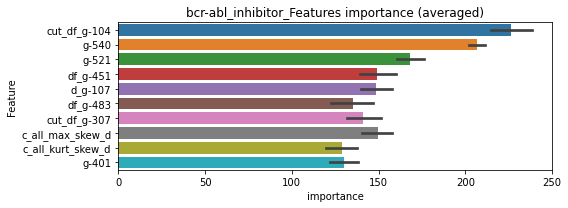

len(train_index) : 2853
len(valid_index) : 951
================================= fold 1/4 bcr-abl_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000508278	valid_1's binary_logloss: 0.00144905
[2000]	training's binary_logloss: 0.000295814	valid_1's binary_logloss: 0.00114461
Early stopping, best iteration is:
[2055]	training's binary_logloss: 0.000291492	valid_1's binary_logloss: 0.00113534


len(train_index) : 2853
len(valid_index) : 951
================================= fold 2/4 bcr-abl_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000509302	valid_1's binary_logloss: 0.00123221
Early stopping, best iteration is:
[1120]	training's binary_logloss: 0.000461181	valid_1's binary_logloss: 0.00117167


len(train_index) : 2853
len(valid_index) : 951
================================= fold 3/4 bcr-abl_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00050375	valid_1's binary_logloss: 0.00398854
Early stopping, best iteration is:
[1774]	training's binary_logloss: 0.000317248	valid_1's binary_logloss: 0.00360743


len(train_index) : 2853
len(valid_index) : 951
================================= fold 4/4 bcr-abl_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000505067	valid_1's binary_logloss: 0.00153507
[2000]	training's binary_logloss: 0.0002879	valid_1's binary_logloss: 0.00119658
[3000]	training's binary_logloss: 0.000222952	valid_1's binary_logloss: 0.00105791
Early stopping, best iteration is:
[3261]	training's binary_logloss: 0.000212773	valid_1's binary_logloss: 0.00103466


bcr-abl_inhibitor logloss: 0.001738038594439477


neg labels: 3289 → selected neg labels: 3280


benzodiazepine_receptor_agonist, len(trt): 67, len(othr): 3280
target_rate: 0.0028135 → Adj_target_rate: 0.0029948
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00652818	valid_1's binary_logloss: 0.0482566
[600]	training's binary_logloss: 0.00106719	valid_1's binary_logloss: 0.0349146
Early stopping, best iteration is:
[651]	training's binary_logloss: 0.000919598	valid_1's binary_logloss: 0.0344715
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00672825	valid_1's binary_logloss: 0.0313504
[600]	training's binary_logloss: 0.00110606	valid_1's binary_logloss: 0.0179261
[900]	training's binary_logloss: 0.000661263	valid_1's binary_logloss: 0.016353
Early stopping, best iteration is:
[890]	training's binary_logloss: 0.000661263	valid_1's binary_logloss: 0.016353
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00721554	valid_1's binary_logloss: 0.0342242
[600]	training's binary_logloss: 0.00115107	valid_1's binary_logloss: 0.0258397
Early stopping, best itera

1 / 3 AUC score:0.999
y_Threshold: 0.0079924, Threshold: 0.0197041, pos_neg_ratio: 0.8000000
Remove_noisy_data: 136 → Positive_corect_labels: 654/3800
p_label_rate: 0.0100452 Vs.target_rate: 0.00281
Num_p_label: 40.0, conf_0:0.01379, conf_1:0.02562
Num_p_label: 40.0, Expected: 11.2, Adj_threshold_1: 0.0197041
Num_p_label: 10.0, Expected: 11.2, Adj_threshold_2: 0.0497041
threshold: 0.0497041, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 654.0/3800, y_label_rate: 0.1721053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00589851	valid_1's binary_logloss: 0.0462227
Early stopping, best iteration is:
[498]	training's binary_logloss: 0.00148855	valid_1's binary_logloss: 0.039211
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00633095	valid_1's binary_logloss: 0.0379437
[600]	training's binary_logloss: 0.00105321	valid_1's binary_logloss: 0.026955
Early stopping, best iteration is:
[602]	training's binary_logloss: 0.00104636	valid_1's binary_logloss: 0.0268999
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00623914	valid_1's binary_logloss: 0.0220672
[600]	training's binary_logloss: 0.00107307	valid_1's binary_logloss: 0.0116135
Early stopping, best iteration is:
[781]	training's binary_logloss: 0.000722804	valid_1's binary_logloss: 0.0102651
Training until validation scores don't improve for 30 rounds
[300]	traini

2 / 3 AUC score:1.000
y_Threshold: 0.0330382, Threshold: 0.0497041, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 650.0/3792
p_label_rate: 0.0075339 Vs.target_rate: 0.00281
Num_p_label: 30.0, conf_0:0.03976, conf_1:0.05964
Num_p_label: 30.0, Expected: 11.2, Adj_threshold_1: 0.0497041
Num_p_label: 16.0, Expected: 11.2, Adj_threshold_2: 0.0797041
threshold: 0.0797041, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 650.0/3792, y_label_rate: 0.1714135
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00591948	valid_1's binary_logloss: 0.0426368
[600]	training's binary_logloss: 0.00102112	valid_1's binary_logloss: 0.0309862
Early stopping, best iteration is:
[616]	training's binary_logloss: 0.000970978	valid_1's binary_logloss: 0.0309402
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00606635	valid_1's binary_logloss: 0.0270937
[600]	training's binary_logloss: 0.00102659	valid_1's binary_logloss: 0.0157231
Early stopping, best iteration is:
[761]	training's binary_logloss: 0.000713905	valid_1's binary_logloss: 0.0151348
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00626493	valid_1's binary_logloss: 0.027554
[600]	training's binary_logloss: 0.00105201	valid_1's binary_logloss: 0.0173891
Early stopping, best iteration is:
[771]	training's binary_logloss: 0.000719057	valid_1's binary_logloss: 

3 / 3 AUC score:1.000
y_Threshold: 0.0376538, Threshold: 0.0797041, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 646.0/3784
p_label_rate: 0.0035158 Vs.target_rate: 0.00281
Num_p_label: 14.0, conf_0:0.07173, conf_1:0.08767
threshold: 0.0797041, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 646.0/3784, y_label_rate: 0.1707188


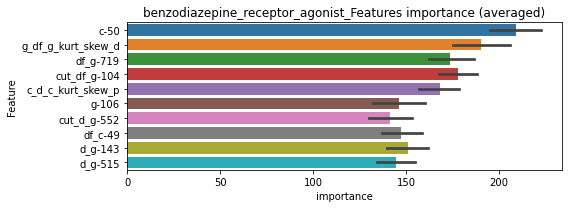

len(train_index) : 2838
len(valid_index) : 946
================================= fold 1/4 benzodiazepine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00056306	valid_1's binary_logloss: 0.000782713
[2000]	training's binary_logloss: 0.000318879	valid_1's binary_logloss: 0.000443066
[3000]	training's binary_logloss: 0.000248103	valid_1's binary_logloss: 0.000334818
[4000]	training's binary_logloss: 0.000214987	valid_1's binary_logloss: 0.000283401
[5000]	training's binary_logloss: 0.000198605	valid_1's binary_logloss: 0.00025582
[6000]	training's binary_logloss: 0.000187875	valid_1's binary_logloss: 0.000238109
[7000]	training's binary_logloss: 0.000180128	valid_1's binary_logloss: 0.000225749
Early stopping, best iteration is:
[7200]	training's binary_logloss: 0.000179126	valid_1's binary_logloss: 0.000224202


len(train_index) : 2838
len(valid_index) : 946
================================= fold 2/4 benzodiazepine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2838
len(valid_index) : 946


Early stopping, best iteration is:
[847]	training's binary_logloss: 0.000651371	valid_1's binary_logloss: 0.00532128


================================= fold 3/4 benzodiazepine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000532535	valid_1's binary_logloss: 0.0040599
Early stopping, best iteration is:
[1402]	training's binary_logloss: 0.000397125	valid_1's binary_logloss: 0.00384036


len(train_index) : 2838
len(valid_index) : 946
================================= fold 4/4 benzodiazepine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


benzodiazepine_receptor_agonist logloss: 0.0031119997815162877


Early stopping, best iteration is:
[706]	training's binary_logloss: 0.000771159	valid_1's binary_logloss: 0.00306164
neg labels: 3289 → selected neg labels: 3287


beta_amyloid_inhibitor, len(trt): 24, len(othr): 3287
target_rate: 0.0010078 → Adj_target_rate: 0.0012513
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00201815	valid_1's binary_logloss: 0.00406318
[600]	training's binary_logloss: 0.000460407	valid_1's binary_logloss: 0.00139252
Early stopping, best iteration is:
[617]	training's binary_logloss: 0.000450716	valid_1's binary_logloss: 0.00137627
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00193513	valid_1's binary_logloss: 0.00831027
[600]	training's binary_logloss: 0.000453027	valid_1's binary_logloss: 0.00522843
Early stopping, best iteration is:
[595]	training's binary_logloss: 0.000453027	valid_1's binary_logloss: 0.00522843
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00198473	valid_1's binary_logloss: 0.00445887
[600]	training's binary_logloss: 0.000457862	valid_1's binary_logloss: 0.00153673
Early stopping, best iteration is:
[617]	training's binary_logloss: 0.000447847	valid_1's bina

1 / 3 AUC score:1.000
y_Threshold: 0.0023859, Threshold: 0.0081432, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00101
Num_p_label: 40.0, conf_0:0.00570, conf_1:0.01059
Num_p_label: 40.0, Expected: 4.0, Adj_threshold_1: 0.0081432
Num_p_label: 5.0, Expected: 4.0, Adj_threshold_2: 0.0381432
threshold: 0.0381432, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00185164	valid_1's binary_logloss: 0.00382942
[600]	training's binary_logloss: 0.000449788	valid_1's binary_logloss: 0.00129665
Early stopping, best iteration is:
[671]	training's binary_logloss: 0.000431948	valid_1's binary_logloss: 0.00126238
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00183315	valid_1's binary_logloss: 0.00801235
[600]	training's binary_logloss: 0.000441001	valid_1's binary_logloss: 0.00523354
Early stopping, best iteration is:
[606]	training's binary_logloss: 0.000439305	valid_1's binary_logloss: 0.00522264
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00193122	valid_1's binary_logloss: 0.00369101
[600]	training's binary_logloss: 0.0004549	valid_1's binary_logloss: 0.00127414
Early stopping, best iteration is:
[620]	training's binary_logloss: 0.000447449	valid_1's binary

2 / 3 AUC score:1.000
y_Threshold: 0.0226216, Threshold: 0.0381432, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0032647 Vs.target_rate: 0.00101
Num_p_label: 13.0, conf_0:0.03051, conf_1:0.04577


[600]	training's binary_logloss: 0.000443362	valid_1's binary_logloss: 0.00478407
Early stopping, best iteration is:
[570]	training's binary_logloss: 0.000459809	valid_1's binary_logloss: 0.00476904


Num_p_label: 13.0, Expected: 4.0, Adj_threshold_1: 0.0381432
Num_p_label: 7.0, Expected: 4.0, Adj_threshold_2: 0.0681432
threshold: 0.0681432, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00185164	valid_1's binary_logloss: 0.00382942
[600]	training's binary_logloss: 0.000449788	valid_1's binary_logloss: 0.00129665
Early stopping, best iteration is:
[671]	training's binary_logloss: 0.000431948	valid_1's binary_logloss: 0.00126238
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00183315	valid_1's binary_logloss: 0.00801235
[600]	training's binary_logloss: 0.000441001	valid_1's binary_logloss: 0.00523354
Early stopping, best iteration is:
[606]	training's binary_logloss: 0.000439305	valid_1's binary_logloss: 0.00522264
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00193122	valid_1's binary_logloss: 0.00369101
[600]	training's binary_logloss: 0.0004549	valid_1's binary_logloss: 0.00127414
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000447449	valid_1's binary

3 / 3 AUC score:1.000
y_Threshold: 0.0226216, Threshold: 0.0681432, pos_neg_ratio: 0.8000000


[600]	training's binary_logloss: 0.000443362	valid_1's binary_logloss: 0.00478407
Early stopping, best iteration is:
[570]	training's binary_logloss: 0.000459809	valid_1's binary_logloss: 0.00476904


Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0017579 Vs.target_rate: 0.00101
Num_p_label: 7.0, conf_0:0.06133, conf_1:0.07496
Num_p_label: 7.0, Expected: 4.0, Adj_threshold_1: 0.0681432
threshold: 0.0681432, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


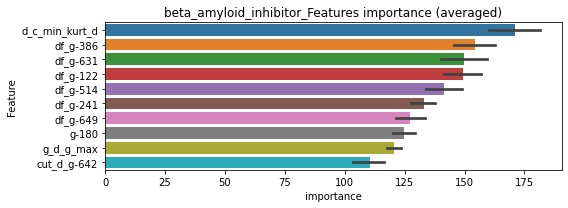

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 beta_amyloid_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000456315	valid_1's binary_logloss: 0.00319585
Early stopping, best iteration is:
[1184]	training's binary_logloss: 0.000399309	valid_1's binary_logloss: 0.0031039


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 beta_amyloid_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000467985	valid_1's binary_logloss: 0.00155453
Early stopping, best iteration is:
[1214]	training's binary_logloss: 0.000400086	valid_1's binary_logloss: 0.00145491


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 beta_amyloid_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000456555	valid_1's binary_logloss: 0.000660038
[2000]	training's binary_logloss: 0.00027402	valid_1's binary_logloss: 0.000463589
[3000]	training's binary_logloss: 0.000214941	valid_1's binary_logloss: 0.000403236
[4000]	training's binary_logloss: 0.000186989	valid_1's binary_logloss: 0.000371098
[5000]	training's binary_logloss: 0.00017239	valid_1's binary_logloss: 0.000353153
[6000]	training's binary_logloss: 0.000162736	valid_1's binary_logloss: 0.000339055
Early stopping, best iteration is:
[6334]	training's binary_logloss: 0.000160017	valid_1's binary_logloss: 0.000335821


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 beta_amyloid_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000403765	valid_1's binary_logloss: 0.000602541
[2000]	training's binary_logloss: 0.000237547	valid_1's binary_logloss: 0.000356872
[3000]	training's binary_logloss: 0.000178364	valid_1's binary_logloss: 0.000268607
[4000]	training's binary_logloss: 0.000149481	valid_1's binary_logloss: 0.000225418
[5000]	training's binary_logloss: 0.000134406	valid_1's binary_logloss: 0.00020281
[6000]	training's binary_logloss: 0.000124657	valid_1's binary_logloss: 0.000188166
[7000]	training's binary_logloss: 0.000117813	valid_1's binary_logloss: 0.000177877
[8000]	training's binary_logloss: 0.000113116	valid_1's binary_logloss: 0.000170809
[9000]	training's binary_logloss: 0.000109758	valid_1's binary_logloss: 0.000165752
[10000]	training's binary_logloss: 0.000107409	valid_1's binary_logloss: 0.000162245
Did not meet early stopping. Best iteration is:
[9999]	training's binary_logloss: 0.000107409	valid

beta_amyloid_inhibitor logloss: 0.0012654600269759652


neg labels: 3289 → selected neg labels: 3281


bromodomain_inhibitor, len(trt): 68, len(othr): 3281
target_rate: 0.0028555 → Adj_target_rate: 0.0030327
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00629897	valid_1's binary_logloss: 0.0528568
[600]	training's binary_logloss: 0.00108873	valid_1's binary_logloss: 0.0399899
Early stopping, best iteration is:
[592]	training's binary_logloss: 0.00111772	valid_1's binary_logloss: 0.0398293
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00680289	valid_1's binary_logloss: 0.037864
[600]	training's binary_logloss: 0.00112831	valid_1's binary_logloss: 0.0256506
Early stopping, best iteration is:
[782]	training's binary_logloss: 0.000758455	valid_1's binary_logloss: 0.0242066
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00772667	valid_1's binary_logloss: 0.0219386
[600]	training's binary_logloss: 0.0012364	valid_1's binary_logloss: 0.00919057
[900]	training's binary_logloss: 0.000711002	valid_1's binary_logloss: 0.00777717
Early stopping, best iter

1 / 3 AUC score:1.000
y_Threshold: 0.0076059, Threshold: 0.0228571, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00286
Num_p_label: 40.0, conf_0:0.01600, conf_1:0.02971
Num_p_label: 40.0, Expected: 11.4, Adj_threshold_1: 0.0228571
Num_p_label: 11.0, Expected: 11.4, Adj_threshold_2: 0.0528571
threshold: 0.0528571, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00598141	valid_1's binary_logloss: 0.0554119
[600]	training's binary_logloss: 0.00105993	valid_1's binary_logloss: 0.0429372
Early stopping, best iteration is:
[670]	training's binary_logloss: 0.000884758	valid_1's binary_logloss: 0.0421379
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00619871	valid_1's binary_logloss: 0.0357535
[600]	training's binary_logloss: 0.00107561	valid_1's binary_logloss: 0.0234823
Early stopping, best iteration is:
[691]	training's binary_logloss: 0.000859375	valid_1's binary_logloss: 0.0228084
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00707538	valid_1's binary_logloss: 0.0201336
[600]	training's binary_logloss: 0.00116412	valid_1's binary_logloss: 0.00802083
[900]	training's binary_logloss: 0.000690937	valid_1's binary_logloss: 0.00665408
Early stopping, best i

2 / 3 AUC score:1.000
y_Threshold: 0.0407364, Threshold: 0.0528571, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 653.0/3799
p_label_rate: 0.0070316 Vs.target_rate: 0.00286
Num_p_label: 28.0, conf_0:0.04229, conf_1:0.06343
Num_p_label: 28.0, Expected: 11.4, Adj_threshold_1: 0.0528571
Num_p_label: 13.0, Expected: 11.4, Adj_threshold_2: 0.0828571
threshold: 0.0828571, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 653.0/3799, y_label_rate: 0.1718873
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0059355	valid_1's binary_logloss: 0.0449496
[600]	training's binary_logloss: 0.00105403	valid_1's binary_logloss: 0.0331193
Early stopping, best iteration is:
[604]	training's binary_logloss: 0.00104122	valid_1's binary_logloss: 0.0330525
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00633608	valid_1's binary_logloss: 0.0357412
[600]	training's binary_logloss: 0.00109453	valid_1's binary_logloss: 0.0241672
Early stopping, best iteration is:
[740]	training's binary_logloss: 0.000784375	valid_1's binary_logloss: 0.0235047
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00662498	valid_1's binary_logloss: 0.030985
[600]	training's binary_logloss: 0.00111627	valid_1's binary_logloss: 0.0196032
Early stopping, best iteration is:
[723]	training's binary_logloss: 0.000828145	valid_1's binary_logloss: 0.

3 / 3 AUC score:1.000
y_Threshold: 0.0276185, Threshold: 0.0828571, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 649.0/3791
p_label_rate: 0.0047715 Vs.target_rate: 0.00286
Num_p_label: 19.0, conf_0:0.07457, conf_1:0.09114
Num_p_label: 19.0, Expected: 11.4, Adj_threshold_1: 0.0828571
Num_p_label: 10.0, Expected: 11.4, Adj_threshold_2: 0.1128571
threshold: 0.1128571, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 649.0/3791, y_label_rate: 0.1711949


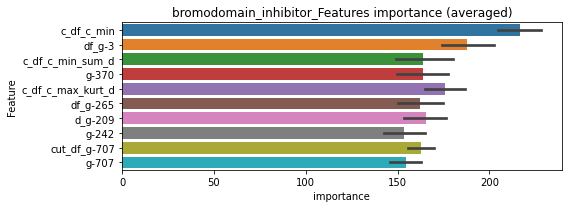

len(train_index) : 2843
len(valid_index) : 948
================================= fold 1/4 bromodomain_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000570717	valid_1's binary_logloss: 0.00326885
Early stopping, best iteration is:
[1910]	training's binary_logloss: 0.000336758	valid_1's binary_logloss: 0.00291778


len(train_index) : 2843
len(valid_index) : 948
================================= fold 2/4 bromodomain_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[902]	training's binary_logloss: 0.000609785	valid_1's binary_logloss: 0.00579473


len(train_index) : 2843
len(valid_index) : 948
================================= fold 3/4 bromodomain_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000560606	valid_1's binary_logloss: 0.000649263
[2000]	training's binary_logloss: 0.000318473	valid_1's binary_logloss: 0.000360613
[3000]	training's binary_logloss: 0.000247429	valid_1's binary_logloss: 0.000270695
[4000]	training's binary_logloss: 0.000215189	valid_1's binary_logloss: 0.000228273
[5000]	training's binary_logloss: 0.000199096	valid_1's binary_logloss: 0.000207416
[6000]	training's binary_logloss: 0.000188593	valid_1's binary_logloss: 0.000193632
[7000]	training's binary_logloss: 0.000181168	valid_1's binary_logloss: 0.000183946
[8000]	training's binary_logloss: 0.00017543	valid_1's binary_logloss: 0.000176349
Early stopping, best iteration is:
[8214]	training's binary_logloss: 0.0001745	valid_1's binary_logloss: 0.000175289


len(train_index) : 2844
len(valid_index) : 947
================================= fold 4/4 bromodomain_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00056382	valid_1's binary_logloss: 0.00126392
[2000]	training's binary_logloss: 0.000323543	valid_1's binary_logloss: 0.000888586
[3000]	training's binary_logloss: 0.000252993	valid_1's binary_logloss: 0.000763216
Early stopping, best iteration is:
[3647]	training's binary_logloss: 0.000229255	valid_1's binary_logloss: 0.000720327


bromodomain_inhibitor logloss: 0.0024027619332718806


neg labels: 3289 → selected neg labels: 3286


btk_inhibitor, len(trt): 29, len(othr): 3286
target_rate: 0.0012178 → Adj_target_rate: 0.0014697
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00259421	valid_1's binary_logloss: 0.00747846
[600]	training's binary_logloss: 0.000537162	valid_1's binary_logloss: 0.00320388
Early stopping, best iteration is:
[681]	training's binary_logloss: 0.000484311	valid_1's binary_logloss: 0.00311431
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00251099	valid_1's binary_logloss: 0.0109577
[600]	training's binary_logloss: 0.000534573	valid_1's binary_logloss: 0.00586133
Early stopping, best iteration is:
[681]	training's binary_logloss: 0.000478922	valid_1's binary_logloss: 0.00569995
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00266587	valid_1's binary_logloss: 0.0058781
[600]	training's binary_logloss: 0.000549434	valid_1's binary_logloss: 0.00192687
Early stopping, best iteration is:
[675]	training's binary_logloss: 0.000493519	valid_1's binary

1 / 3 AUC score:1.000
y_Threshold: 0.0028412, Threshold: 0.0134650, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00122
Num_p_label: 40.0, conf_0:0.00943, conf_1:0.01750
Num_p_label: 40.0, Expected: 4.8, Adj_threshold_1: 0.0134650
Num_p_label: 8.0, Expected: 4.8, Adj_threshold_2: 0.0434650
threshold: 0.0434650, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00237425	valid_1's binary_logloss: 0.00723655
[600]	training's binary_logloss: 0.000522184	valid_1's binary_logloss: 0.00311201
Early stopping, best iteration is:
[686]	training's binary_logloss: 0.000473103	valid_1's binary_logloss: 0.00298228
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00236259	valid_1's binary_logloss: 0.0104803
[600]	training's binary_logloss: 0.000521335	valid_1's binary_logloss: 0.00567647
Early stopping, best iteration is:
[615]	training's binary_logloss: 0.000507188	valid_1's binary_logloss: 0.00561191
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00244304	valid_1's binary_logloss: 0.00613325
[600]	training's binary_logloss: 0.000519226	valid_1's binary_logloss: 0.00205384
Early stopping, best iteration is:
[677]	training's binary_logloss: 0.000473364	valid_1's binar

2 / 3 AUC score:1.000
y_Threshold: 0.0741936, Threshold: 0.0434650, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0050226 Vs.target_rate: 0.00122
Num_p_label: 20.0, conf_0:0.03477, conf_1:0.05216
Num_p_label: 20.0, Expected: 4.8, Adj_threshold_1: 0.0434650
Num_p_label: 10.0, Expected: 4.8, Adj_threshold_2: 0.0734650
threshold: 0.0734650, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00237425	valid_1's binary_logloss: 0.00723655
[600]	training's binary_logloss: 0.000522184	valid_1's binary_logloss: 0.00311201
Early stopping, best iteration is:
[686]	training's binary_logloss: 0.000473103	valid_1's binary_logloss: 0.00298228
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00236259	valid_1's binary_logloss: 0.0104803
[600]	training's binary_logloss: 0.000521335	valid_1's binary_logloss: 0.00567647
Early stopping, best iteration is:
[615]	training's binary_logloss: 0.000507188	valid_1's binary_logloss: 0.00561191
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00244304	valid_1's binary_logloss: 0.00613325
[600]	training's binary_logloss: 0.000519226	valid_1's binary_logloss: 0.00205384
Early stopping, best iteration is:
[677]	training's binary_logloss: 0.000473364	valid_1's binar

3 / 3 AUC score:1.000
y_Threshold: 0.0741936, Threshold: 0.0734650, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0025113 Vs.target_rate: 0.00122
Num_p_label: 10.0, conf_0:0.06612, conf_1:0.08081
Num_p_label: 10.0, Expected: 4.8, Adj_threshold_1: 0.0734650
threshold: 0.0734650, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


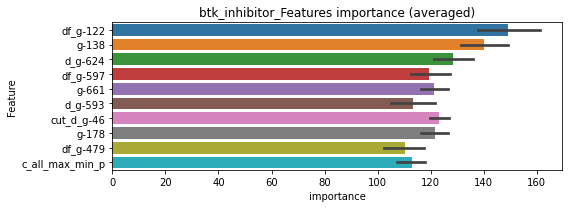

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 btk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000504966	valid_1's binary_logloss: 0.00130274
Early stopping, best iteration is:
[1592]	training's binary_logloss: 0.000342235	valid_1's binary_logloss: 0.00112059


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 btk_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 btk_inhibitor=================================


Early stopping, best iteration is:
[343]	training's binary_logloss: 0.00143376	valid_1's binary_logloss: 0.00562975
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000469522	valid_1's binary_logloss: 0.00388557
Early stopping, best iteration is:
[1090]	training's binary_logloss: 0.000436946	valid_1's binary_logloss: 0.00383918


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 btk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000498472	valid_1's binary_logloss: 0.00122084
[2000]	training's binary_logloss: 0.000285093	valid_1's binary_logloss: 0.000895171
Early stopping, best iteration is:
[2834]	training's binary_logloss: 0.000227547	valid_1's binary_logloss: 0.000790119


btk_inhibitor logloss: 0.002848519776749578


neg labels: 3289 → selected neg labels: 3288


calcineurin_inhibitor, len(trt): 12, len(othr): 3288
target_rate: 0.0005039 → Adj_target_rate: 0.0006942
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000718579	valid_1's binary_logloss: 0.00177471
Early stopping, best iteration is:
[489]	training's binary_logloss: 0.000294443	valid_1's binary_logloss: 0.00103457
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000705363	valid_1's binary_logloss: 0.00215968
Early stopping, best iteration is:
[517]	training's binary_logloss: 0.000283146	valid_1's binary_logloss: 0.0012744
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00073746	valid_1's binary_logloss: 0.00104268
Early stopping, best iteration is:
[505]	training's binary_logloss: 0.000295317	valid_1's binary_logloss: 0.000453533
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000715515	valid_1's binary_logloss: 0.00154274


1 / 3 AUC score:1.000
y_Threshold: 0.0011935, Threshold: 0.0181051, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00050
Num_p_label: 40.0, conf_0:0.01267, conf_1:0.02354
Num_p_label: 40.0, Expected: 2.0, Adj_threshold_1: 0.0181051
Num_p_label: 14.0, Expected: 2.0, Adj_threshold_2: 0.0481051
Num_p_label: 11.0, Expected: 2.0, Adj_threshold_3: 0.0781051
Num_p_label: 10.0, Expected: 2.0, Adj_threshold_4: 0.1081051
Num_p_label: 8.0, Expected: 2.0, Adj_threshold_5: 0.1381051
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_6: 0.1681051
Num_p_label: 5.0, Expected: 2.0, Adj_threshold_7: 0.1981051
threshold: 0.1981051, positive_p_label: 5.0/3982, p_label_rate: 0.0012557


Early stopping, best iteration is:
[491]	training's binary_logloss: 0.000297623	valid_1's binary_logloss: 0.0007931


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000645882	valid_1's binary_logloss: 0.0012954
Early stopping, best iteration is:
[543]	training's binary_logloss: 0.000257922	valid_1's binary_logloss: 0.000654442
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000648944	valid_1's binary_logloss: 0.00152677
Early stopping, best iteration is:
[488]	training's binary_logloss: 0.000265751	valid_1's binary_logloss: 0.000856288
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000665855	valid_1's binary_logloss: 0.000860644
Early stopping, best iteration is:
[514]	training's binary_logloss: 0.000265214	valid_1's binary_logloss: 0.000362238
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000648856	valid_1's binary_logloss: 0.00126559


2 / 3 AUC score:1.000
y_Threshold: 0.1413918, Threshold: 0.1981051, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0087896 Vs.target_rate: 0.00050
Num_p_label: 35.0, conf_0:0.15848, conf_1:0.23773
Num_p_label: 35.0, Expected: 2.0, Adj_threshold_1: 0.1981051
Num_p_label: 31.0, Expected: 2.0, Adj_threshold_2: 0.2281051
Num_p_label: 30.0, Expected: 2.0, Adj_threshold_3: 0.2581051
Num_p_label: 24.0, Expected: 2.0, Adj_threshold_4: 0.2881051
Num_p_label: 22.0, Expected: 2.0, Adj_threshold_5: 0.3181051
Num_p_label: 20.0, Expected: 2.0, Adj_threshold_6: 0.3481051
Num_p_label: 17.0, Expected: 2.0, Adj_threshold_7: 0.3781051
Num_p_label: 16.0, Expected: 2.0, Adj_threshold_8: 0.4081051
Num_p_label: 16.0, Expected: 2.0, Adj_threshold_9: 0.4381051
Num_p_label: 13.0, Expected: 2.0, Adj_threshold_10: 0.4681051


Early stopping, best iteration is:
[505]	training's binary_logloss: 0.000262866	valid_1's binary_logloss: 0.000642564


threshold: 0.4981051, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000645882	valid_1's binary_logloss: 0.0012954
Early stopping, best iteration is:
[550]	training's binary_logloss: 0.000257922	valid_1's binary_logloss: 0.000654442
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000648944	valid_1's binary_logloss: 0.00152677
Early stopping, best iteration is:
[488]	training's binary_logloss: 0.000265751	valid_1's binary_logloss: 0.000856288
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000665855	valid_1's binary_logloss: 0.000860644
Early stopping, best iteration is:
[513]	training's binary_logloss: 0.000265214	valid_1's binary_logloss: 0.000362238
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000648856	valid_1's binary_logloss: 0.00126559


3 / 3 AUC score:1.000
y_Threshold: 0.1413918, Threshold: 0.4981051, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0032647 Vs.target_rate: 0.00050
Num_p_label: 13.0, conf_0:0.44829, conf_1:0.54792
Num_p_label: 13.0, Expected: 2.0, Adj_threshold_1: 0.4981051
Num_p_label: 11.0, Expected: 2.0, Adj_threshold_2: 0.5281051
Num_p_label: 9.0, Expected: 2.0, Adj_threshold_3: 0.5581051


Early stopping, best iteration is:
[525]	training's binary_logloss: 0.000262866	valid_1's binary_logloss: 0.000642564


Num_p_label: 9.0, Expected: 2.0, Adj_threshold_4: 0.5881051
Num_p_label: 9.0, Expected: 2.0, Adj_threshold_5: 0.6181051
Num_p_label: 7.0, Expected: 2.0, Adj_threshold_6: 0.6481051
Num_p_label: 7.0, Expected: 2.0, Adj_threshold_7: 0.6781051
Num_p_label: 7.0, Expected: 2.0, Adj_threshold_8: 0.7081051
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_9: 0.7381051
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_10: 0.7681051
threshold: 0.7981051, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


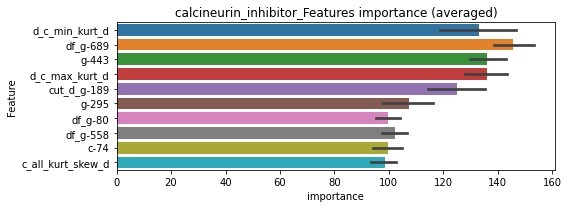

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 calcineurin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000332971	valid_1's binary_logloss: 0.000376737
[2000]	training's binary_logloss: 0.00020912	valid_1's binary_logloss: 0.000238522
[3000]	training's binary_logloss: 0.00016563	valid_1's binary_logloss: 0.000189299
[4000]	training's binary_logloss: 0.000142555	valid_1's binary_logloss: 0.000163096
[5000]	training's binary_logloss: 0.000129965	valid_1's binary_logloss: 0.000148759
[6000]	training's binary_logloss: 0.000121637	valid_1's binary_logloss: 0.000139268
[7000]	training's binary_logloss: 0.000115744	valid_1's binary_logloss: 0.000132549
[8000]	training's binary_logloss: 0.000111593	valid_1's binary_logloss: 0.000127812
[9000]	training's binary_logloss: 0.000108741	valid_1's binary_logloss: 0.000124574
[10000]	training's binary_logloss: 0.000106672	valid_1's binary_logloss: 0.000122224
Did not meet early stopping. Best iteration is:
[9999]	training's binary_logloss: 0.000106672	valid_

len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 calcineurin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000359768	valid_1's binary_logloss: 0.000527778
[2000]	training's binary_logloss: 0.000226621	valid_1's binary_logloss: 0.000378632
[3000]	training's binary_logloss: 0.000186394	valid_1's binary_logloss: 0.000332419
Early stopping, best iteration is:
[3585]	training's binary_logloss: 0.000173514	valid_1's binary_logloss: 0.000317046


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 calcineurin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000392001	valid_1's binary_logloss: 0.000524488
[2000]	training's binary_logloss: 0.000244482	valid_1's binary_logloss: 0.000378579
[3000]	training's binary_logloss: 0.000204706	valid_1's binary_logloss: 0.000339598
[4000]	training's binary_logloss: 0.000186103	valid_1's binary_logloss: 0.000318767
Early stopping, best iteration is:
[4606]	training's binary_logloss: 0.000179526	valid_1's binary_logloss: 0.00031196


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 calcineurin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000398595	valid_1's binary_logloss: 0.000981605
[2000]	training's binary_logloss: 0.000248433	valid_1's binary_logloss: 0.000791018
[3000]	training's binary_logloss: 0.000208656	valid_1's binary_logloss: 0.000743697
[4000]	training's binary_logloss: 0.000190279	valid_1's binary_logloss: 0.000723136
[5000]	training's binary_logloss: 0.000180026	valid_1's binary_logloss: 0.000711563
Early stopping, best iteration is:
[5328]	training's binary_logloss: 0.00017745	valid_1's binary_logloss: 0.000708905


calcineurin_inhibitor logloss: 0.00036502396811240314


neg labels: 3289 → selected neg labels: 3246


calcium_channel_blocker, len(trt): 281, len(othr): 3246
target_rate: 0.0117998 → Adj_target_rate: 0.0101297
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0389017	valid_1's binary_logloss: 0.253641
Early stopping, best iteration is:
[386]	training's binary_logloss: 0.0223684	valid_1's binary_logloss: 0.249401
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0416916	valid_1's binary_logloss: 0.26619
Early stopping, best iteration is:
[322]	training's binary_logloss: 0.0358926	valid_1's binary_logloss: 0.265171
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0406808	valid_1's binary_logloss: 0.239391
Early stopping, best iteration is:
[347]	training's binary_logloss: 0.0304623	valid_1's binary_logloss: 0.235861
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0392683	valid_1's binary_logloss: 0.227345


1 / 3 AUC score:0.904
y_Threshold: 0.0818700, Threshold: 0.2635424, pos_neg_ratio: 0.8000000
Remove_noisy_data: 432 → Positive_corect_labels: 498/3463


Early stopping, best iteration is:
[485]	training's binary_logloss: 0.0128849	valid_1's binary_logloss: 0.215767


p_label_rate: 0.0100452 Vs.target_rate: 0.01180
Num_p_label: 40.0, conf_0:0.18448, conf_1:0.34261
threshold: 0.2635424, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 498.0/3463, y_label_rate: 0.1438059
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0174469	valid_1's binary_logloss: 0.153359
Early stopping, best iteration is:
[442]	training's binary_logloss: 0.00625818	valid_1's binary_logloss: 0.149328
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0177441	valid_1's binary_logloss: 0.139944
Early stopping, best iteration is:
[486]	training's binary_logloss: 0.00495225	valid_1's binary_logloss: 0.127242
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0175573	valid_1's binary_logloss: 0.141688
Early stopping, best iteration is:
[461]	training's binary_logloss: 0.00572477	valid_1's binary_logloss: 0.131232
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.01755	valid_1's binary_logloss: 0.149893


2 / 3 AUC score:0.982
y_Threshold: 0.0719841, Threshold: 0.2635424, pos_neg_ratio: 0.8000000
Remove_noisy_data: 116 → Positive_corect_labels: 440.0/3347
p_label_rate: 0.0198393 Vs.target_rate: 0.01180
Num_p_label: 79.0, conf_0:0.21083, conf_1:0.31625
Num_p_label: 79.0, Expected: 47.0, Adj_threshold_1: 0.2635424
Num_p_label: 68.0, Expected: 47.0, Adj_threshold_2: 0.2935424


Early stopping, best iteration is:
[459]	training's binary_logloss: 0.00578874	valid_1's binary_logloss: 0.141653


threshold: 0.2935424, positive_p_label: 68.0/3982, p_label_rate: 0.0170768
positive_y_label: 440.0/3347, y_label_rate: 0.1314610
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0118846	valid_1's binary_logloss: 0.105756
[600]	training's binary_logloss: 0.0021128	valid_1's binary_logloss: 0.0925642
Early stopping, best iteration is:
[699]	training's binary_logloss: 0.0015631	valid_1's binary_logloss: 0.0913626
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0122264	valid_1's binary_logloss: 0.114196
Early stopping, best iteration is:
[411]	training's binary_logloss: 0.00539337	valid_1's binary_logloss: 0.107925
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.012406	valid_1's binary_logloss: 0.0990555
[600]	training's binary_logloss: 0.00216032	valid_1's binary_logloss: 0.0828088
Early stopping, best iteration is:
[571]	training's binary_logloss: 0.00240546	valid_1's binary_logloss: 0.0825724
Training until validation scores don't improve for 30 rounds
[300]	training's bin

3 / 3 AUC score:0.994
y_Threshold: 0.0719227, Threshold: 0.2935424, pos_neg_ratio: 0.8000000
Remove_noisy_data: 70 → Positive_corect_labels: 405.0/3277


Early stopping, best iteration is:
[383]	training's binary_logloss: 0.00640866	valid_1's binary_logloss: 0.112914


p_label_rate: 0.0223506 Vs.target_rate: 0.01180
Num_p_label: 89.0, conf_0:0.26419, conf_1:0.32290
Num_p_label: 89.0, Expected: 47.0, Adj_threshold_1: 0.2935424
Num_p_label: 80.0, Expected: 47.0, Adj_threshold_2: 0.3235424
Num_p_label: 70.0, Expected: 47.0, Adj_threshold_3: 0.3535424
threshold: 0.3535424, positive_p_label: 70.0/3982, p_label_rate: 0.0175791
positive_y_label: 405.0/3277, y_label_rate: 0.1235886


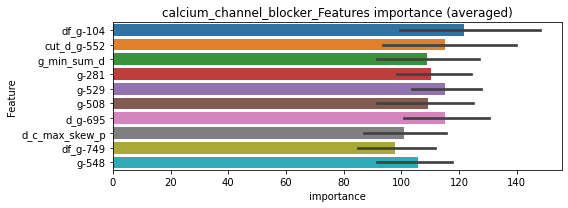

len(train_index) : 2457
len(valid_index) : 820
================================= fold 1/4 calcium_channel_blocker=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000654453	valid_1's binary_logloss: 0.00226671
[2000]	training's binary_logloss: 0.000366121	valid_1's binary_logloss: 0.00167186
[3000]	training's binary_logloss: 0.000281143	valid_1's binary_logloss: 0.00145571
[4000]	training's binary_logloss: 0.000242323	valid_1's binary_logloss: 0.00134546
Early stopping, best iteration is:
[4202]	training's binary_logloss: 0.000237509	valid_1's binary_logloss: 0.00133101


len(train_index) : 2458
len(valid_index) : 819
================================= fold 2/4 calcium_channel_blocker=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2458
len(valid_index) : 819
================================= fold 3/4 calcium_channel_blocker=================================


Early stopping, best iteration is:
[609]	training's binary_logloss: 0.00106282	valid_1's binary_logloss: 0.0117048
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[898]	training's binary_logloss: 0.000709259	valid_1's binary_logloss: 0.00617016


len(train_index) : 2458
len(valid_index) : 819
================================= fold 4/4 calcium_channel_blocker=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000671381	valid_1's binary_logloss: 0.00235898
Early stopping, best iteration is:
[1485]	training's binary_logloss: 0.000467577	valid_1's binary_logloss: 0.00208542


calcium_channel_blocker logloss: 0.005322095335812195


neg labels: 3289 → selected neg labels: 3281


cannabinoid_receptor_agonist, len(trt): 42, len(othr): 3281
target_rate: 0.0017637 → Adj_target_rate: 0.0020135
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00328497	valid_1's binary_logloss: 0.0278218
[600]	training's binary_logloss: 0.000652377	valid_1's binary_logloss: 0.0190803
Early stopping, best iteration is:
[703]	training's binary_logloss: 0.000552422	valid_1's binary_logloss: 0.0186159
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00366739	valid_1's binary_logloss: 0.0142612
[600]	training's binary_logloss: 0.000695777	valid_1's binary_logloss: 0.00875566
Early stopping, best iteration is:
[683]	training's binary_logloss: 0.000593891	valid_1's binary_logloss: 0.00861748
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00363838	valid_1's binary_logloss: 0.00854267
[600]	training's binary_logloss: 0.000713605	valid_1's binary_logloss: 0.00338648
Early stopping, best iteration is:
[745]	training's binary_logloss: 0.000572553	valid_1's binary_l

1 / 3 AUC score:1.000
y_Threshold: 0.0048500, Threshold: 0.0313572, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00176
Num_p_label: 40.0, conf_0:0.02195, conf_1:0.04076
Num_p_label: 40.0, Expected: 7.0, Adj_threshold_1: 0.0313572
Num_p_label: 16.0, Expected: 7.0, Adj_threshold_2: 0.0613572
threshold: 0.0613572, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00318254	valid_1's binary_logloss: 0.0245471
[600]	training's binary_logloss: 0.000643214	valid_1's binary_logloss: 0.0168468
Early stopping, best iteration is:
[669]	training's binary_logloss: 0.000562858	valid_1's binary_logloss: 0.0165371
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00349718	valid_1's binary_logloss: 0.0123163
[600]	training's binary_logloss: 0.000671588	valid_1's binary_logloss: 0.00665844
Early stopping, best iteration is:
[634]	training's binary_logloss: 0.000619161	valid_1's binary_logloss: 0.0064895
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00328814	valid_1's binary_logloss: 0.00794995
[600]	training's binary_logloss: 0.000679618	valid_1's binary_logloss: 0.00299961
Early stopping, best iteration is:
[752]	training's binary_logloss: 0.000549973	valid_1's binary_lo

2 / 3 AUC score:1.000
y_Threshold: 0.0325238, Threshold: 0.0613572, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3803
p_label_rate: 0.0092918 Vs.target_rate: 0.00176
Num_p_label: 37.0, conf_0:0.04909, conf_1:0.07363
Num_p_label: 37.0, Expected: 7.0, Adj_threshold_1: 0.0613572
Num_p_label: 26.0, Expected: 7.0, Adj_threshold_2: 0.0913572
Num_p_label: 20.0, Expected: 7.0, Adj_threshold_3: 0.1213572
Num_p_label: 13.0, Expected: 7.0, Adj_threshold_4: 0.1513572
threshold: 0.1513572, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 655.0/3803, y_label_rate: 0.1722324
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00323579	valid_1's binary_logloss: 0.0143456
[600]	training's binary_logloss: 0.000658899	valid_1's binary_logloss: 0.00773575
Early stopping, best iteration is:
[722]	training's binary_logloss: 0.00054235	valid_1's binary_logloss: 0.00738356
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00329007	valid_1's binary_logloss: 0.012414
[600]	training's binary_logloss: 0.000659151	valid_1's binary_logloss: 0.00651509
Early stopping, best iteration is:
[719]	training's binary_logloss: 0.00054628	valid_1's binary_logloss: 0.00625352
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.003288	valid_1's binary_logloss: 0.0109029
[600]	training's binary_logloss: 0.000655482	valid_1's binary_logloss: 0.00532647
Early stopping, best iteration is:
[726]	training's binary_logloss: 0.000541519	valid_1's binary_loglo

3 / 3 AUC score:1.000
y_Threshold: 0.0483646, Threshold: 0.1513572, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3803
p_label_rate: 0.0030136 Vs.target_rate: 0.00176
Num_p_label: 12.0, conf_0:0.13622, conf_1:0.16649
Num_p_label: 12.0, Expected: 7.0, Adj_threshold_1: 0.1513572
threshold: 0.1513572, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 655.0/3803, y_label_rate: 0.1722324


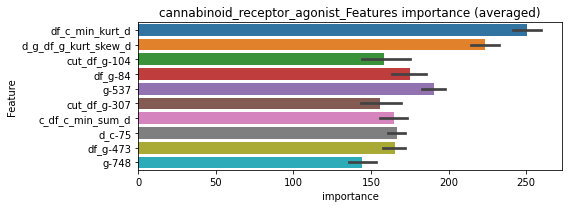

len(train_index) : 2852
len(valid_index) : 951
================================= fold 1/4 cannabinoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000520013	valid_1's binary_logloss: 0.00328665
Early stopping, best iteration is:
[1086]	training's binary_logloss: 0.000481865	valid_1's binary_logloss: 0.00320503


len(train_index) : 2852
len(valid_index) : 951
================================= fold 2/4 cannabinoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000517536	valid_1's binary_logloss: 0.00347728
Early stopping, best iteration is:
[1797]	training's binary_logloss: 0.000325529	valid_1's binary_logloss: 0.00320116


len(train_index) : 2852
len(valid_index) : 951
================================= fold 3/4 cannabinoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00052515	valid_1's binary_logloss: 0.0014752
Early stopping, best iteration is:
[1474]	training's binary_logloss: 0.000376107	valid_1's binary_logloss: 0.00133534


len(train_index) : 2853
len(valid_index) : 950
================================= fold 4/4 cannabinoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000530741	valid_1's binary_logloss: 0.00387321
[2000]	training's binary_logloss: 0.000307004	valid_1's binary_logloss: 0.00347807
Early stopping, best iteration is:
[2166]	training's binary_logloss: 0.000293548	valid_1's binary_logloss: 0.00345471


cannabinoid_receptor_agonist logloss: 0.002800313494743196


neg labels: 3289 → selected neg labels: 3280


cannabinoid_receptor_antagonist, len(trt): 55, len(othr): 3280
target_rate: 0.0023096 → Adj_target_rate: 0.0025322
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00448782	valid_1's binary_logloss: 0.0369301
[600]	training's binary_logloss: 0.000839214	valid_1's binary_logloss: 0.0305778
Early stopping, best iteration is:
[605]	training's binary_logloss: 0.000828389	valid_1's binary_logloss: 0.0305274
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00450532	valid_1's binary_logloss: 0.0330054
[600]	training's binary_logloss: 0.000860793	valid_1's binary_logloss: 0.0245356
Early stopping, best iteration is:
[691]	training's binary_logloss: 0.000703612	valid_1's binary_logloss: 0.0239063
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00476957	valid_1's binary_logloss: 0.0169705
[600]	training's binary_logloss: 0.000903642	valid_1's binary_logloss: 0.0101421
Early stopping, best iteration is:
[760]	training's binary_logloss: 0.000668235	valid_1's binary_loglo

1 / 3 AUC score:1.000
y_Threshold: 0.0058854, Threshold: 0.0216449, pos_neg_ratio: 0.8000000
Remove_noisy_data: 136 → Positive_corect_labels: 654/3800
p_label_rate: 0.0100452 Vs.target_rate: 0.00231
Num_p_label: 40.0, conf_0:0.01515, conf_1:0.02814
Num_p_label: 40.0, Expected: 9.2, Adj_threshold_1: 0.0216449
Num_p_label: 13.0, Expected: 9.2, Adj_threshold_2: 0.0516449
threshold: 0.0516449, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 654.0/3800, y_label_rate: 0.1721053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00426607	valid_1's binary_logloss: 0.020514
[600]	training's binary_logloss: 0.000828979	valid_1's binary_logloss: 0.0133795
Early stopping, best iteration is:
[800]	training's binary_logloss: 0.000609361	valid_1's binary_logloss: 0.0128054
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00424827	valid_1's binary_logloss: 0.0186496
[600]	training's binary_logloss: 0.000833609	valid_1's binary_logloss: 0.0103152
Early stopping, best iteration is:
[794]	training's binary_logloss: 0.000609893	valid_1's binary_logloss: 0.00969596
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00409738	valid_1's binary_logloss: 0.0241748
[600]	training's binary_logloss: 0.000809508	valid_1's binary_logloss: 0.0185566
Early stopping, best iteration is:
[657]	training's binary_logloss: 0.000709845	valid_1's binary_loglo

2 / 3 AUC score:1.000
y_Threshold: 0.0228735, Threshold: 0.0516449, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 653.0/3798
p_label_rate: 0.0052737 Vs.target_rate: 0.00231
Num_p_label: 21.0, conf_0:0.04132, conf_1:0.06197
Num_p_label: 21.0, Expected: 9.2, Adj_threshold_1: 0.0516449
threshold: 0.0516449, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 653.0/3798, y_label_rate: 0.1719326
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00418798	valid_1's binary_logloss: 0.0243532
[600]	training's binary_logloss: 0.000811782	valid_1's binary_logloss: 0.0165211
Early stopping, best iteration is:
[789]	training's binary_logloss: 0.000592481	valid_1's binary_logloss: 0.0155821
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00408753	valid_1's binary_logloss: 0.0207071
[600]	training's binary_logloss: 0.000813556	valid_1's binary_logloss: 0.0121689
Early stopping, best iteration is:
[793]	training's binary_logloss: 0.000597455	valid_1's binary_logloss: 0.0115562
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0041061	valid_1's binary_logloss: 0.0211913
[600]	training's binary_logloss: 0.000811379	valid_1's binary_logloss: 0.014559
Early stopping, best iteration is:
[675]	training's binary_logloss: 0.000686968	valid_1's binary_logloss

3 / 3 AUC score:1.000
y_Threshold: 0.0217711, Threshold: 0.0516449, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 652.0/3796
p_label_rate: 0.0052737 Vs.target_rate: 0.00231
Num_p_label: 21.0, conf_0:0.04648, conf_1:0.05681
Num_p_label: 21.0, Expected: 9.2, Adj_threshold_1: 0.0516449
threshold: 0.0516449, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 652.0/3796, y_label_rate: 0.1717597


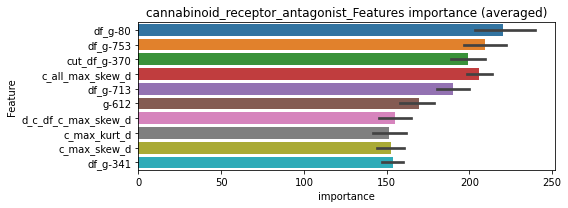

len(train_index) : 2847
len(valid_index) : 949
================================= fold 1/4 cannabinoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000511446	valid_1's binary_logloss: 0.00142854
Early stopping, best iteration is:
[1841]	training's binary_logloss: 0.000315076	valid_1's binary_logloss: 0.00115527


len(train_index) : 2847
len(valid_index) : 949
================================= fold 2/4 cannabinoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000532353	valid_1's binary_logloss: 0.00122429
[2000]	training's binary_logloss: 0.000303905	valid_1's binary_logloss: 0.000905215
Early stopping, best iteration is:
[2394]	training's binary_logloss: 0.000269895	valid_1's binary_logloss: 0.000843182


len(train_index) : 2847
len(valid_index) : 949
================================= fold 3/4 cannabinoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000441359	valid_1's binary_logloss: 0.000601299
[2000]	training's binary_logloss: 0.000247949	valid_1's binary_logloss: 0.000338696
[3000]	training's binary_logloss: 0.000183096	valid_1's binary_logloss: 0.000250342
[4000]	training's binary_logloss: 0.00015226	valid_1's binary_logloss: 0.000208326
[5000]	training's binary_logloss: 0.000136428	valid_1's binary_logloss: 0.000186728
[6000]	training's binary_logloss: 0.000126145	valid_1's binary_logloss: 0.000172657
[7000]	training's binary_logloss: 0.000118987	valid_1's binary_logloss: 0.000162867
[8000]	training's binary_logloss: 0.000114056	valid_1's binary_logloss: 0.000156116
[9000]	training's binary_logloss: 0.000110562	valid_1's binary_logloss: 0.000151333
[10000]	training's binary_logloss: 0.000108115	valid_1's binary_logloss: 0.000148007
Did not meet early stopping. Best iteration is:
[9999]	training's binary_logloss: 0.000108115	valid

len(train_index) : 2847
len(valid_index) : 949
================================= fold 4/4 cannabinoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000541411	valid_1's binary_logloss: 0.00430109
Early stopping, best iteration is:
[1582]	training's binary_logloss: 0.000364187	valid_1's binary_logloss: 0.00397967


cannabinoid_receptor_antagonist logloss: 0.001532860508278194


neg labels: 3289 → selected neg labels: 3281


carbonic_anhydrase_inhibitor, len(trt): 36, len(othr): 3281
target_rate: 0.0015117 → Adj_target_rate: 0.0017663
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.004232	valid_1's binary_logloss: 0.0174847
[600]	training's binary_logloss: 0.000704529	valid_1's binary_logloss: 0.00648573
Early stopping, best iteration is:
[780]	training's binary_logloss: 0.000546229	valid_1's binary_logloss: 0.00575792
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00405673	valid_1's binary_logloss: 0.0131736
[600]	training's binary_logloss: 0.000701762	valid_1's binary_logloss: 0.00600194
Early stopping, best iteration is:
[730]	training's binary_logloss: 0.000569608	valid_1's binary_logloss: 0.00566502
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00398605	valid_1's binary_logloss: 0.00827833
[600]	training's binary_logloss: 0.00070392	valid_1's binary_logloss: 0.00246968
Early stopping, best iteration is:
[721]	training's binary_logloss: 0.000571016	valid_1's binary_lo

1 / 3 AUC score:1.000
y_Threshold: 0.0048563, Threshold: 0.0780461, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, conf_0:0.05463, conf_1:0.10146
Num_p_label: 40.0, Expected: 6.0, Adj_threshold_1: 0.0780461
Num_p_label: 33.0, Expected: 6.0, Adj_threshold_2: 0.1080461
Num_p_label: 27.0, Expected: 6.0, Adj_threshold_3: 0.1380461
Num_p_label: 22.0, Expected: 6.0, Adj_threshold_4: 0.1680461
Num_p_label: 16.0, Expected: 6.0, Adj_threshold_5: 0.1980461
Num_p_label: 15.0, Expected: 6.0, Adj_threshold_6: 0.2280461
threshold: 0.2280461, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00358057	valid_1's binary_logloss: 0.0158324
[600]	training's binary_logloss: 0.00065492	valid_1's binary_logloss: 0.00699789
Early stopping, best iteration is:
[704]	training's binary_logloss: 0.000545016	valid_1's binary_logloss: 0.00652118
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00381277	valid_1's binary_logloss: 0.0103141
[600]	training's binary_logloss: 0.000668618	valid_1's binary_logloss: 0.0046268
Early stopping, best iteration is:
[739]	training's binary_logloss: 0.000543507	valid_1's binary_logloss: 0.00439127
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00365911	valid_1's binary_logloss: 0.00861949
[600]	training's binary_logloss: 0.000664411	valid_1's binary_logloss: 0.00277671
Early stopping, best iteration is:
[751]	training's binary_logloss: 0.00054862	valid_1's binary_lo

2 / 3 AUC score:1.000
y_Threshold: 0.0501802, Threshold: 0.2280461, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3805
p_label_rate: 0.0097941 Vs.target_rate: 0.00151
Num_p_label: 39.0, conf_0:0.18244, conf_1:0.27366
Num_p_label: 39.0, Expected: 6.0, Adj_threshold_1: 0.2280461
Num_p_label: 36.0, Expected: 6.0, Adj_threshold_2: 0.2580461
Num_p_label: 33.0, Expected: 6.0, Adj_threshold_3: 0.2880461
Num_p_label: 32.0, Expected: 6.0, Adj_threshold_4: 0.3180461
Num_p_label: 25.0, Expected: 6.0, Adj_threshold_5: 0.3480461
Num_p_label: 23.0, Expected: 6.0, Adj_threshold_6: 0.3780461
Num_p_label: 21.0, Expected: 6.0, Adj_threshold_7: 0.4080461
Num_p_label: 19.0, Expected: 6.0, Adj_threshold_8: 0.4380461
Num_p_label: 18.0, Expected: 6.0, Adj_threshold_9: 0.4680461
Num_p_label: 15.0, Expected: 6.0, Adj_threshold_10: 0.4980461
threshold: 0.4980461, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
===========

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00358057	valid_1's binary_logloss: 0.0158324
[600]	training's binary_logloss: 0.00065492	valid_1's binary_logloss: 0.00699789
Early stopping, best iteration is:
[704]	training's binary_logloss: 0.000545016	valid_1's binary_logloss: 0.00652118
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00381277	valid_1's binary_logloss: 0.0103141
[600]	training's binary_logloss: 0.000668618	valid_1's binary_logloss: 0.0046268
Early stopping, best iteration is:
[739]	training's binary_logloss: 0.000543507	valid_1's binary_logloss: 0.00439127
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00365911	valid_1's binary_logloss: 0.00861949
[600]	training's binary_logloss: 0.000664411	valid_1's binary_logloss: 0.00277671
Early stopping, best iteration is:
[751]	training's binary_logloss: 0.00054862	valid_1's binary_lo

3 / 3 AUC score:1.000
y_Threshold: 0.0501802, Threshold: 0.4980461, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3805
p_label_rate: 0.0037670 Vs.target_rate: 0.00151
Num_p_label: 15.0, conf_0:0.44824, conf_1:0.54785
Num_p_label: 15.0, Expected: 6.0, Adj_threshold_1: 0.4980461
threshold: 0.4980461, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 656.0/3805, y_label_rate: 0.1724047


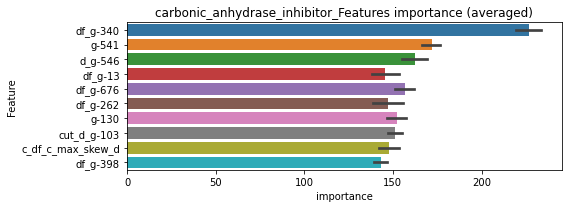

len(train_index) : 2853
len(valid_index) : 952
================================= fold 1/4 carbonic_anhydrase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000521479	valid_1's binary_logloss: 0.00301144
Early stopping, best iteration is:
[1791]	training's binary_logloss: 0.000327476	valid_1's binary_logloss: 0.00276295


len(train_index) : 2854
len(valid_index) : 951
================================= fold 2/4 carbonic_anhydrase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000531814	valid_1's binary_logloss: 0.00339694
Early stopping, best iteration is:
[1305]	training's binary_logloss: 0.000422322	valid_1's binary_logloss: 0.00323774


len(train_index) : 2854
len(valid_index) : 951
================================= fold 3/4 carbonic_anhydrase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000530283	valid_1's binary_logloss: 0.0015353
Early stopping, best iteration is:
[1603]	training's binary_logloss: 0.000354931	valid_1's binary_logloss: 0.00138741


len(train_index) : 2854
len(valid_index) : 951
================================= fold 4/4 carbonic_anhydrase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


carbonic_anhydrase_inhibitor logloss: 0.0029037992549066456


Early stopping, best iteration is:
[592]	training's binary_logloss: 0.000827952	valid_1's binary_logloss: 0.00422124
neg labels: 3289 → selected neg labels: 3283


casein_kinase_inhibitor, len(trt): 36, len(othr): 3283
target_rate: 0.0015117 → Adj_target_rate: 0.0017663
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00269971	valid_1's binary_logloss: 0.0142603
[600]	training's binary_logloss: 0.000561455	valid_1's binary_logloss: 0.00823676
Early stopping, best iteration is:
[632]	training's binary_logloss: 0.000524557	valid_1's binary_logloss: 0.00811127
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0028203	valid_1's binary_logloss: 0.00793443
[600]	training's binary_logloss: 0.000582597	valid_1's binary_logloss: 0.00295419
Early stopping, best iteration is:
[719]	training's binary_logloss: 0.000489275	valid_1's binary_logloss: 0.00270471
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00293227	valid_1's binary_logloss: 0.00547288
[600]	training's binary_logloss: 0.000585761	valid_1's binary_logloss: 0.00173414
Early stopping, best iteration is:
[728]	training's binary_logloss: 0.000499284	valid_1's binary

1 / 3 AUC score:1.000
y_Threshold: 0.0040382, Threshold: 0.0100323, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, conf_0:0.00702, conf_1:0.01304
Num_p_label: 40.0, Expected: 6.0, Adj_threshold_1: 0.0100323
Num_p_label: 5.0, Expected: 6.0, Adj_threshold_2: 0.0400323
threshold: 0.0400323, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00255098	valid_1's binary_logloss: 0.0137492
[600]	training's binary_logloss: 0.000533241	valid_1's binary_logloss: 0.00847556
Early stopping, best iteration is:
[625]	training's binary_logloss: 0.000507447	valid_1's binary_logloss: 0.00831731
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00254337	valid_1's binary_logloss: 0.00695563
[600]	training's binary_logloss: 0.000537753	valid_1's binary_logloss: 0.0026197
Early stopping, best iteration is:
[708]	training's binary_logloss: 0.000471324	valid_1's binary_logloss: 0.00247759
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00272238	valid_1's binary_logloss: 0.00486082
[600]	training's binary_logloss: 0.000559147	valid_1's binary_logloss: 0.00136714
Early stopping, best iteration is:
[715]	training's binary_logloss: 0.000476714	valid_1's binary

2 / 3 AUC score:1.000
y_Threshold: 0.0400949, Threshold: 0.0400323, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0037670 Vs.target_rate: 0.00151
Num_p_label: 15.0, conf_0:0.03203, conf_1:0.04804
Num_p_label: 15.0, Expected: 6.0, Adj_threshold_1: 0.0400323
threshold: 0.0400323, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00255098	valid_1's binary_logloss: 0.0137492
[600]	training's binary_logloss: 0.000533241	valid_1's binary_logloss: 0.00847556
Early stopping, best iteration is:
[625]	training's binary_logloss: 0.000507447	valid_1's binary_logloss: 0.00831731
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00254337	valid_1's binary_logloss: 0.00695563
[600]	training's binary_logloss: 0.000537753	valid_1's binary_logloss: 0.0026197
Early stopping, best iteration is:
[708]	training's binary_logloss: 0.000471324	valid_1's binary_logloss: 0.00247759
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00272238	valid_1's binary_logloss: 0.00486082
[600]	training's binary_logloss: 0.000559147	valid_1's binary_logloss: 0.00136714
Early stopping, best iteration is:
[715]	training's binary_logloss: 0.000476714	valid_1's binary

3 / 3 AUC score:1.000
y_Threshold: 0.0400949, Threshold: 0.0400323, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0037670 Vs.target_rate: 0.00151
Num_p_label: 15.0, conf_0:0.03603, conf_1:0.04404
Num_p_label: 15.0, Expected: 6.0, Adj_threshold_1: 0.0400323
threshold: 0.0400323, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 656.0/3807, y_label_rate: 0.1723142


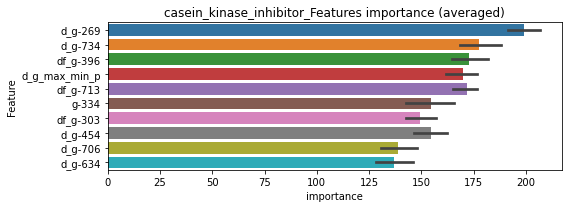

len(train_index) : 2855
len(valid_index) : 952
================================= fold 1/4 casein_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000414304	valid_1's binary_logloss: 0.000671491
[2000]	training's binary_logloss: 0.000240543	valid_1's binary_logloss: 0.000393494
[3000]	training's binary_logloss: 0.000179798	valid_1's binary_logloss: 0.000295113
[4000]	training's binary_logloss: 0.000150286	valid_1's binary_logloss: 0.000247125
[5000]	training's binary_logloss: 0.000134957	valid_1's binary_logloss: 0.000222103
[6000]	training's binary_logloss: 0.000125107	valid_1's binary_logloss: 0.000205997
[7000]	training's binary_logloss: 0.000118189	valid_1's binary_logloss: 0.000194657
[8000]	training's binary_logloss: 0.000113429	valid_1's binary_logloss: 0.000186861
[9000]	training's binary_logloss: 0.000110034	valid_1's binary_logloss: 0.000181282
[10000]	training's binary_logloss: 0.000107639	valid_1's binary_logloss: 0.000177398
Did not meet early stopping. Best iteration is:
[9999]	training's binary_logloss: 0.000107639	vali

len(train_index) : 2855
len(valid_index) : 952
================================= fold 2/4 casein_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2855
len(valid_index) : 952
================================= fold 3/4 casein_kinase_inhibitor=================================


Early stopping, best iteration is:
[584]	training's binary_logloss: 0.000801357	valid_1's binary_logloss: 0.00582437
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000518528	valid_1's binary_logloss: 0.000826466
Early stopping, best iteration is:
[1607]	training's binary_logloss: 0.000347443	valid_1's binary_logloss: 0.000686426


len(train_index) : 2856
len(valid_index) : 951
================================= fold 4/4 casein_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000414563	valid_1's binary_logloss: 0.00071586
[2000]	training's binary_logloss: 0.000240552	valid_1's binary_logloss: 0.000418918
[3000]	training's binary_logloss: 0.000179721	valid_1's binary_logloss: 0.000313957
[4000]	training's binary_logloss: 0.000150222	valid_1's binary_logloss: 0.000262853
[5000]	training's binary_logloss: 0.000134886	valid_1's binary_logloss: 0.000236192
[6000]	training's binary_logloss: 0.000125027	valid_1's binary_logloss: 0.000219022
[7000]	training's binary_logloss: 0.000118136	valid_1's binary_logloss: 0.000207008
[8000]	training's binary_logloss: 0.000113365	valid_1's binary_logloss: 0.000198695
[9000]	training's binary_logloss: 0.000109976	valid_1's binary_logloss: 0.000192775
[10000]	training's binary_logloss: 0.000107568	valid_1's binary_logloss: 0.000188612
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.000107568	vali

casein_kinase_inhibitor logloss: 0.0017196028087039887


neg labels: 3289 → selected neg labels: 3288


caspase_activator, len(trt): 18, len(othr): 3288
target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00107877	valid_1's binary_logloss: 0.00257217
[600]	training's binary_logloss: 0.000354196	valid_1's binary_logloss: 0.00137014
Early stopping, best iteration is:
[575]	training's binary_logloss: 0.000354204	valid_1's binary_logloss: 0.00137005
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00107494	valid_1's binary_logloss: 0.00310721
[600]	training's binary_logloss: 0.000349492	valid_1's binary_logloss: 0.00159569
Early stopping, best iteration is:
[573]	training's binary_logloss: 0.000350746	valid_1's binary_logloss: 0.00159427
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00109401	valid_1's binary_logloss: 0.00198918
Early stopping, best iteration is:
[557]	training's binary_logloss: 0.000359435	valid_1's binary_logloss: 0.000842301
Training until validation scores don't improve for 30 roun

1 / 3 AUC score:1.000
y_Threshold: 0.0015324, Threshold: 0.0119915, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, conf_0:0.00839, conf_1:0.01559
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_1: 0.0119915
Num_p_label: 13.0, Expected: 3.0, Adj_threshold_2: 0.0419915
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_3: 0.0719915


[600]	training's binary_logloss: 0.00034479	valid_1's binary_logloss: 0.000988914
Early stopping, best iteration is:
[576]	training's binary_logloss: 0.00034479	valid_1's binary_logloss: 0.000988914


threshold: 0.0719915, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000997398	valid_1's binary_logloss: 0.00196915
Early stopping, best iteration is:
[542]	training's binary_logloss: 0.000338184	valid_1's binary_logloss: 0.00096881
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000976828	valid_1's binary_logloss: 0.00412636
Early stopping, best iteration is:
[495]	training's binary_logloss: 0.000353776	valid_1's binary_logloss: 0.00286105
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00100019	valid_1's binary_logloss: 0.00178935
Early stopping, best iteration is:
[556]	training's binary_logloss: 0.000341068	valid_1's binary_logloss: 0.000783575
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000960771	valid_1's binary_logloss: 0.00197843


2 / 3 AUC score:1.000
y_Threshold: 0.0326223, Threshold: 0.0719915, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0077850 Vs.target_rate: 0.00076
Num_p_label: 31.0, conf_0:0.05759, conf_1:0.08639
Num_p_label: 31.0, Expected: 3.0, Adj_threshold_1: 0.0719915
Num_p_label: 21.0, Expected: 3.0, Adj_threshold_2: 0.1019915
Num_p_label: 14.0, Expected: 3.0, Adj_threshold_3: 0.1319915
Num_p_label: 12.0, Expected: 3.0, Adj_threshold_4: 0.1619915
Num_p_label: 10.0, Expected: 3.0, Adj_threshold_5: 0.1919915
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_6: 0.2219915


Early stopping, best iteration is:
[565]	training's binary_logloss: 0.000331029	valid_1's binary_logloss: 0.000958313


threshold: 0.2219915, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000997398	valid_1's binary_logloss: 0.00196915
Early stopping, best iteration is:
[545]	training's binary_logloss: 0.000338184	valid_1's binary_logloss: 0.00096881
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000976828	valid_1's binary_logloss: 0.00412636
Early stopping, best iteration is:
[495]	training's binary_logloss: 0.000353776	valid_1's binary_logloss: 0.00286105
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00100019	valid_1's binary_logloss: 0.00178935
Early stopping, best iteration is:
[557]	training's binary_logloss: 0.000341068	valid_1's binary_logloss: 0.000783575
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000960771	valid_1's binary_logloss: 0.00197843


3 / 3 AUC score:1.000
y_Threshold: 0.0326210, Threshold: 0.2219915, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0017579 Vs.target_rate: 0.00076
Num_p_label: 7.0, conf_0:0.19979, conf_1:0.24419
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_1: 0.2219915


Early stopping, best iteration is:
[565]	training's binary_logloss: 0.000331029	valid_1's binary_logloss: 0.000958313


threshold: 0.2219915, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


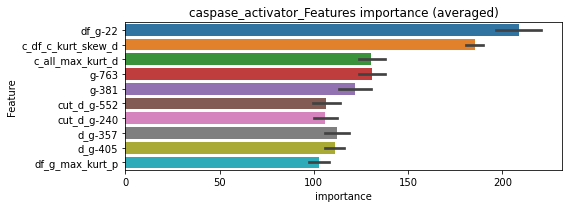

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 caspase_activator=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 caspase_activator=================================


Early stopping, best iteration is:
[950]	training's binary_logloss: 0.000433708	valid_1's binary_logloss: 0.0018281
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000431743	valid_1's binary_logloss: 0.0019397
[2000]	training's binary_logloss: 0.000263379	valid_1's binary_logloss: 0.00165804
[3000]	training's binary_logloss: 0.000216646	valid_1's binary_logloss: 0.00158416
[4000]	training's binary_logloss: 0.000193796	valid_1's binary_logloss: 0.00154762
Early stopping, best iteration is:
[4224]	training's binary_logloss: 0.000190615	valid_1's binary_logloss: 0.00154372


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 caspase_activator=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000411724	valid_1's binary_logloss: 0.000515672
[2000]	training's binary_logloss: 0.000253773	valid_1's binary_logloss: 0.000339022
[3000]	training's binary_logloss: 0.000204295	valid_1's binary_logloss: 0.000281371
[4000]	training's binary_logloss: 0.000180938	valid_1's binary_logloss: 0.000253233
[5000]	training's binary_logloss: 0.000169084	valid_1's binary_logloss: 0.000239204
[6000]	training's binary_logloss: 0.000161393	valid_1's binary_logloss: 0.000230701
[7000]	training's binary_logloss: 0.000155968	valid_1's binary_logloss: 0.000224906
[8000]	training's binary_logloss: 0.000151771	valid_1's binary_logloss: 0.000219591
Early stopping, best iteration is:
[8751]	training's binary_logloss: 0.00014904	valid_1's binary_logloss: 0.000216011


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 caspase_activator=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00042056	valid_1's binary_logloss: 0.000443045
[2000]	training's binary_logloss: 0.000257372	valid_1's binary_logloss: 0.00026358
[3000]	training's binary_logloss: 0.000210992	valid_1's binary_logloss: 0.000207645
[4000]	training's binary_logloss: 0.000188589	valid_1's binary_logloss: 0.000178901
[5000]	training's binary_logloss: 0.000176219	valid_1's binary_logloss: 0.000162781
[6000]	training's binary_logloss: 0.000168332	valid_1's binary_logloss: 0.000152324
[7000]	training's binary_logloss: 0.000162404	valid_1's binary_logloss: 0.000144531
[8000]	training's binary_logloss: 0.000158228	valid_1's binary_logloss: 0.000139036
Early stopping, best iteration is:
[8327]	training's binary_logloss: 0.000157018	valid_1's binary_logloss: 0.000137444


caspase_activator logloss: 0.0009315872246642993


neg labels: 3289 → selected neg labels: 3286


catechol_o_methyltransferase_inhibitor, len(trt): 18, len(othr): 3286
target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00124682	valid_1's binary_logloss: 0.00251227
Early stopping, best iteration is:
[538]	training's binary_logloss: 0.000385124	valid_1's binary_logloss: 0.00119751
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00127003	valid_1's binary_logloss: 0.00511858
Early stopping, best iteration is:
[565]	training's binary_logloss: 0.000375621	valid_1's binary_logloss: 0.00275106
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00127679	valid_1's binary_logloss: 0.00229649
[600]	training's binary_logloss: 0.000365325	valid_1's binary_logloss: 0.000980507
Early stopping, best iteration is:
[614]	training's binary_logloss: 0.000363007	valid_1's binary_logloss: 0.000977138
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0012962	valid_1's binary_logloss: 0.0039429

1 / 3 AUC score:1.000
y_Threshold: 0.0018005, Threshold: 0.0079903, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, conf_0:0.00559, conf_1:0.01039
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_1: 0.0079903
Num_p_label: 4.0, Expected: 3.0, Adj_threshold_2: 0.0379903
threshold: 0.0379903, positive_p_label: 4.0/3982, p_label_rate: 0.0010045


Early stopping, best iteration is:
[536]	training's binary_logloss: 0.000386074	valid_1's binary_logloss: 0.0019022


positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00119268	valid_1's binary_logloss: 0.00199392
[600]	training's binary_logloss: 0.000368447	valid_1's binary_logloss: 0.000758168
Early stopping, best iteration is:
[570]	training's binary_logloss: 0.000368447	valid_1's binary_logloss: 0.000758168
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00116878	valid_1's binary_logloss: 0.00385641
Early stopping, best iteration is:
[523]	training's binary_logloss: 0.000371886	valid_1's binary_logloss: 0.00208144
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00119108	valid_1's binary_logloss: 0.00187523
[600]	training's binary_logloss: 0.000359113	valid_1's binary_logloss: 0.00070648
Early stopping, best iteration is:
[572]	training's binary_logloss: 0.000359113	valid_1's binary_logloss: 0.00070648
Training until validation scores don't improve for 30 rou

2 / 3 AUC score:1.000
y_Threshold: 0.1256860, Threshold: 0.0379903, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0050226 Vs.target_rate: 0.00076
Num_p_label: 20.0, conf_0:0.03039, conf_1:0.04559
Num_p_label: 20.0, Expected: 3.0, Adj_threshold_1: 0.0379903
Num_p_label: 11.0, Expected: 3.0, Adj_threshold_2: 0.0679903
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_3: 0.0979903
threshold: 0.0979903, positive_p_label: 7.0/3982, p_label_rate: 0.0017579


Early stopping, best iteration is:
[560]	training's binary_logloss: 0.000366157	valid_1's binary_logloss: 0.00115873


positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00119268	valid_1's binary_logloss: 0.00199392
[600]	training's binary_logloss: 0.000368447	valid_1's binary_logloss: 0.000758168
Early stopping, best iteration is:
[572]	training's binary_logloss: 0.000368447	valid_1's binary_logloss: 0.000758168
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00116878	valid_1's binary_logloss: 0.00385641
Early stopping, best iteration is:
[523]	training's binary_logloss: 0.000371886	valid_1's binary_logloss: 0.00208144
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00119108	valid_1's binary_logloss: 0.00187523
[600]	training's binary_logloss: 0.000359113	valid_1's binary_logloss: 0.00070648
Early stopping, best iteration is:
[572]	training's binary_logloss: 0.000359113	valid_1's binary_logloss: 0.00070648
Training until validation scores don't improve for 30 rou

3 / 3 AUC score:1.000
y_Threshold: 0.1256860, Threshold: 0.0979903, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811


Early stopping, best iteration is:
[560]	training's binary_logloss: 0.000366157	valid_1's binary_logloss: 0.00115873


p_label_rate: 0.0017579 Vs.target_rate: 0.00076
Num_p_label: 7.0, conf_0:0.08819, conf_1:0.10779
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_1: 0.0979903
threshold: 0.0979903, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


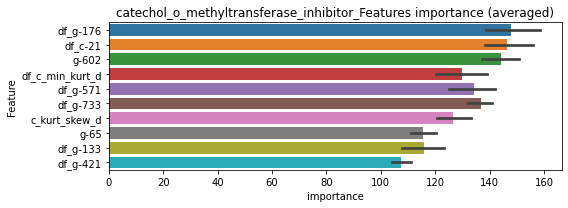

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 catechol_o_methyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000453833	valid_1's binary_logloss: 0.0005809
[2000]	training's binary_logloss: 0.000273393	valid_1's binary_logloss: 0.000382744
[3000]	training's binary_logloss: 0.000221852	valid_1's binary_logloss: 0.000322328
[4000]	training's binary_logloss: 0.000198091	valid_1's binary_logloss: 0.000292849
[5000]	training's binary_logloss: 0.000185389	valid_1's binary_logloss: 0.000275591
[6000]	training's binary_logloss: 0.00017692	valid_1's binary_logloss: 0.000264408
[7000]	training's binary_logloss: 0.00017053	valid_1's binary_logloss: 0.000255349
[8000]	training's binary_logloss: 0.000166094	valid_1's binary_logloss: 0.000249518
Early stopping, best iteration is:
[8252]	training's binary_logloss: 0.000165056	valid_1's binary_logloss: 0.000247973


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 catechol_o_methyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 catechol_o_methyltransferase_inhibitor=================================


Early stopping, best iteration is:
[836]	training's binary_logloss: 0.00050221	valid_1's binary_logloss: 0.00411173
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000418876	valid_1's binary_logloss: 0.000618666
[2000]	training's binary_logloss: 0.000261083	valid_1's binary_logloss: 0.000417799
[3000]	training's binary_logloss: 0.00021301	valid_1's binary_logloss: 0.000357177
[4000]	training's binary_logloss: 0.000188116	valid_1's binary_logloss: 0.000326154
Early stopping, best iteration is:
[4244]	training's binary_logloss: 0.000184389	valid_1's binary_logloss: 0.000321756


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 catechol_o_methyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000417336	valid_1's binary_logloss: 0.000656404
[2000]	training's binary_logloss: 0.00025984	valid_1's binary_logloss: 0.000453331
[3000]	training's binary_logloss: 0.000211363	valid_1's binary_logloss: 0.00038804
[4000]	training's binary_logloss: 0.000186588	valid_1's binary_logloss: 0.000352072
[5000]	training's binary_logloss: 0.00017273	valid_1's binary_logloss: 0.0003325
[6000]	training's binary_logloss: 0.000163765	valid_1's binary_logloss: 0.000318912
[7000]	training's binary_logloss: 0.000157271	valid_1's binary_logloss: 0.000308281
Early stopping, best iteration is:
[7821]	training's binary_logloss: 0.000153225	valid_1's binary_logloss: 0.000301509


catechol_o_methyltransferase_inhibitor logloss: 0.0012460006751602592


neg labels: 3289 → selected neg labels: 3276


cc_chemokine_receptor_antagonist, len(trt): 102, len(othr): 3276
target_rate: 0.0042832 → Adj_target_rate: 0.0042806
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0102186	valid_1's binary_logloss: 0.0903774
Early stopping, best iteration is:
[556]	training's binary_logloss: 0.00201084	valid_1's binary_logloss: 0.0811283
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.010927	valid_1's binary_logloss: 0.0637374
[600]	training's binary_logloss: 0.00177536	valid_1's binary_logloss: 0.0471612
Early stopping, best iteration is:
[729]	training's binary_logloss: 0.00122786	valid_1's binary_logloss: 0.0459825
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.010998	valid_1's binary_logloss: 0.0536841
[600]	training's binary_logloss: 0.00180003	valid_1's binary_logloss: 0.037037
Early stopping, best iteration is:
[716]	training's binary_logloss: 0.00127749	valid_1's binary_logloss: 0.0359556
Training until validation scores don't improve for 30 rounds
[300]	training's 

1 / 3 AUC score:0.996
y_Threshold: 0.0137472, Threshold: 0.0464231, pos_neg_ratio: 0.8000000
Remove_noisy_data: 148 → Positive_corect_labels: 647/3783
p_label_rate: 0.0100452 Vs.target_rate: 0.00428
Num_p_label: 40.0, conf_0:0.03250, conf_1:0.06035
Num_p_label: 40.0, Expected: 17.1, Adj_threshold_1: 0.0464231
Num_p_label: 15.0, Expected: 17.1, Adj_threshold_2: 0.0764231
threshold: 0.0764231, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 647.0/3783, y_label_rate: 0.1710283
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00917582	valid_1's binary_logloss: 0.0697892
[600]	training's binary_logloss: 0.00154603	valid_1's binary_logloss: 0.0552843
Early stopping, best iteration is:
[749]	training's binary_logloss: 0.00104895	valid_1's binary_logloss: 0.0540471
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00988054	valid_1's binary_logloss: 0.0615674
[600]	training's binary_logloss: 0.00164143	valid_1's binary_logloss: 0.0494106
Early stopping, best iteration is:
[658]	training's binary_logloss: 0.00136817	valid_1's binary_logloss: 0.0489721
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00908962	valid_1's binary_logloss: 0.0710975
Early stopping, best iteration is:
[548]	training's binary_logloss: 0.00192552	valid_1's binary_logloss: 0.0602097
Training until validation scores don't improve for 30 rounds
[300]	train

2 / 3 AUC score:0.997
y_Threshold: 0.0404634, Threshold: 0.0764231, pos_neg_ratio: 0.8000000
Remove_noisy_data: 24 → Positive_corect_labels: 635.0/3759
p_label_rate: 0.0102963 Vs.target_rate: 0.00428
Num_p_label: 41.0, conf_0:0.06114, conf_1:0.09171
Num_p_label: 41.0, Expected: 17.1, Adj_threshold_1: 0.0764231
Num_p_label: 24.0, Expected: 17.1, Adj_threshold_2: 0.1064231
threshold: 0.1064231, positive_p_label: 24.0/3982, p_label_rate: 0.0060271
positive_y_label: 635.0/3759, y_label_rate: 0.1689279
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00846099	valid_1's binary_logloss: 0.0581705
[600]	training's binary_logloss: 0.00146076	valid_1's binary_logloss: 0.0467004
Early stopping, best iteration is:
[580]	training's binary_logloss: 0.0015608	valid_1's binary_logloss: 0.0466401
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00881373	valid_1's binary_logloss: 0.0531008
Early stopping, best iteration is:
[546]	training's binary_logloss: 0.00184501	valid_1's binary_logloss: 0.0418204
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00846946	valid_1's binary_logloss: 0.0540029
[600]	training's binary_logloss: 0.00149045	valid_1's binary_logloss: 0.0428196
Early stopping, best iteration is:
[692]	training's binary_logloss: 0.00115463	valid_1's binary_logloss: 0.042435
Training until validation scores don't improve for 30 rounds
[300]	trainin

3 / 3 AUC score:0.999
y_Threshold: 0.0405932, Threshold: 0.1064231, pos_neg_ratio: 0.8000000
Remove_noisy_data: 14 → Positive_corect_labels: 628.0/3745
p_label_rate: 0.0067805 Vs.target_rate: 0.00428
Num_p_label: 27.0, conf_0:0.09578, conf_1:0.11707
Num_p_label: 27.0, Expected: 17.1, Adj_threshold_1: 0.1064231
Num_p_label: 18.0, Expected: 17.1, Adj_threshold_2: 0.1364231
threshold: 0.1364231, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 628.0/3745, y_label_rate: 0.1676903


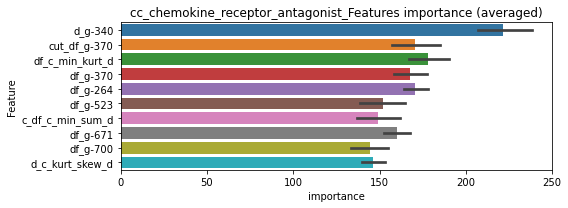

len(train_index) : 2808
len(valid_index) : 937
================================= fold 1/4 cc_chemokine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00058432	valid_1's binary_logloss: 0.00128192
[2000]	training's binary_logloss: 0.000324816	valid_1's binary_logloss: 0.000875163
[3000]	training's binary_logloss: 0.00024456	valid_1's binary_logloss: 0.000724022
[4000]	training's binary_logloss: 0.000206897	valid_1's binary_logloss: 0.000644964
[5000]	training's binary_logloss: 0.000187329	valid_1's binary_logloss: 0.000601295
[6000]	training's binary_logloss: 0.000174389	valid_1's binary_logloss: 0.000570084
Early stopping, best iteration is:
[6947]	training's binary_logloss: 0.000165453	valid_1's binary_logloss: 0.000551879


len(train_index) : 2809
len(valid_index) : 936
================================= fold 2/4 cc_chemokine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000580049	valid_1's binary_logloss: 0.00466913
Early stopping, best iteration is:
[1772]	training's binary_logloss: 0.000359238	valid_1's binary_logloss: 0.00442219


len(train_index) : 2809
len(valid_index) : 936
================================= fold 3/4 cc_chemokine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000582972	valid_1's binary_logloss: 0.00312437
Early stopping, best iteration is:
[1484]	training's binary_logloss: 0.000408886	valid_1's binary_logloss: 0.00300825


len(train_index) : 2809
len(valid_index) : 936
================================= fold 4/4 cc_chemokine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000576815	valid_1's binary_logloss: 0.00145843
[2000]	training's binary_logloss: 0.00032611	valid_1's binary_logloss: 0.00107074
[3000]	training's binary_logloss: 0.000249783	valid_1's binary_logloss: 0.000944349
[4000]	training's binary_logloss: 0.000215621	valid_1's binary_logloss: 0.000866616
Early stopping, best iteration is:
[4323]	training's binary_logloss: 0.000209431	valid_1's binary_logloss: 0.00085068


cc_chemokine_receptor_antagonist logloss: 0.0022085844110654486


neg labels: 3289 → selected neg labels: 3288


cck_receptor_antagonist, len(trt): 18, len(othr): 3288
target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00135876	valid_1's binary_logloss: 0.00310459
[600]	training's binary_logloss: 0.000377027	valid_1's binary_logloss: 0.00125079
Early stopping, best iteration is:
[589]	training's binary_logloss: 0.000377052	valid_1's binary_logloss: 0.00125065
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0013575	valid_1's binary_logloss: 0.00507812
[600]	training's binary_logloss: 0.000371124	valid_1's binary_logloss: 0.00241517
Early stopping, best iteration is:
[570]	training's binary_logloss: 0.000377261	valid_1's binary_logloss: 0.00241348
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00138564	valid_1's binary_logloss: 0.00211348
[600]	training's binary_logloss: 0.000373432	valid_1's binary_logloss: 0.000739395
Early stopping, best iteration is:
[630]	training's binary_logloss: 0.000369946	valid_1's bina

1 / 3 AUC score:1.000
y_Threshold: 0.0016649, Threshold: 0.0045757, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, conf_0:0.00320, conf_1:0.00595
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_1: 0.0045757
Num_p_label: 1.0, Expected: 3.0, Adj_threshold_2: 0.0345757
threshold: 0.0345757, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00128847	valid_1's binary_logloss: 0.00316661
[600]	training's binary_logloss: 0.00036272	valid_1's binary_logloss: 0.00138151
Early stopping, best iteration is:
[588]	training's binary_logloss: 0.00036272	valid_1's binary_logloss: 0.00138151
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00126372	valid_1's binary_logloss: 0.00499063
[600]	training's binary_logloss: 0.00035954	valid_1's binary_logloss: 0.00237159
Early stopping, best iteration is:
[570]	training's binary_logloss: 0.00036275	valid_1's binary_logloss: 0.00236892
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00132851	valid_1's binary_logloss: 0.00196415
[600]	training's binary_logloss: 0.000373703	valid_1's binary_logloss: 0.000684886
Early stopping, best iteration is:
[571]	training's binary_logloss: 0.000373703	valid_1's binary_

2 / 3 AUC score:1.000
y_Threshold: 0.0961927, Threshold: 0.0345757, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0007534 Vs.target_rate: 0.00076
Num_p_label: 3.0, conf_0:0.02766, conf_1:0.04149
threshold: 0.0345757, positive_p_label: 3.0/3982, p_label_rate: 0.0007534


[600]	training's binary_logloss: 0.000364744	valid_1's binary_logloss: 0.00103288
Early stopping, best iteration is:
[585]	training's binary_logloss: 0.000364986	valid_1's binary_logloss: 0.00103243


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00128847	valid_1's binary_logloss: 0.00316661
[600]	training's binary_logloss: 0.00036272	valid_1's binary_logloss: 0.00138151
Early stopping, best iteration is:
[588]	training's binary_logloss: 0.00036272	valid_1's binary_logloss: 0.00138151
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00126372	valid_1's binary_logloss: 0.00499063
[600]	training's binary_logloss: 0.00035954	valid_1's binary_logloss: 0.00237159
Early stopping, best iteration is:
[570]	training's binary_logloss: 0.00036275	valid_1's binary_logloss: 0.00236892
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00132851	valid_1's binary_logloss: 0.00196415
[600]	training's binary_logloss: 0.000373703	valid_1's binary_logloss: 0.000684886
Early stopping, best iteration is:
[571]	training's binary_logloss: 0.000373703	valid_1's binary_

3 / 3 AUC score:1.000
y_Threshold: 0.0961927, Threshold: 0.0345757, pos_neg_ratio: 0.8000000


[600]	training's binary_logloss: 0.000364744	valid_1's binary_logloss: 0.00103288
Early stopping, best iteration is:
[585]	training's binary_logloss: 0.000364986	valid_1's binary_logloss: 0.00103243


Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0007534 Vs.target_rate: 0.00076
Num_p_label: 3.0, conf_0:0.03112, conf_1:0.03803
threshold: 0.0345757, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


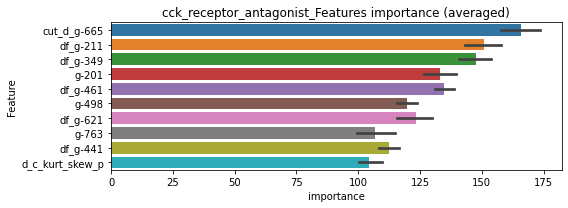

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 cck_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000451785	valid_1's binary_logloss: 0.00134995
Early stopping, best iteration is:
[1790]	training's binary_logloss: 0.000292608	valid_1's binary_logloss: 0.00116349


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 cck_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 cck_receptor_antagonist=================================


Early stopping, best iteration is:
[761]	training's binary_logloss: 0.000579477	valid_1's binary_logloss: 0.00353281
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000454289	valid_1's binary_logloss: 0.000388624
[2000]	training's binary_logloss: 0.000274289	valid_1's binary_logloss: 0.000222266
[3000]	training's binary_logloss: 0.000222958	valid_1's binary_logloss: 0.000172712
[4000]	training's binary_logloss: 0.000199913	valid_1's binary_logloss: 0.000149391
[5000]	training's binary_logloss: 0.00018748	valid_1's binary_logloss: 0.000136718
[6000]	training's binary_logloss: 0.000179468	valid_1's binary_logloss: 0.000128519
[7000]	training's binary_logloss: 0.000173647	valid_1's binary_logloss: 0.000122712
[8000]	training's binary_logloss: 0.000169305	valid_1's binary_logloss: 0.000118281
Early stopping, best iteration is:
[8279]	training's binary_logloss: 0.00016823	valid_1's binary_logloss: 0.000117217


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 cck_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000436822	valid_1's binary_logloss: 0.000588924
[2000]	training's binary_logloss: 0.000263539	valid_1's binary_logloss: 0.000397135
[3000]	training's binary_logloss: 0.000213167	valid_1's binary_logloss: 0.000336111
Early stopping, best iteration is:
[3520]	training's binary_logloss: 0.000198195	valid_1's binary_logloss: 0.000317055


cck_receptor_antagonist logloss: 0.0012826940086416421


neg labels: 3289 → selected neg labels: 3241


cdk_inhibitor, len(trt): 352, len(othr): 3241
target_rate: 0.0147812 → Adj_target_rate: 0.0122676
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0602596	valid_1's binary_logloss: 0.312281
Early stopping, best iteration is:
[352]	training's binary_logloss: 0.0440667	valid_1's binary_logloss: 0.310566
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0593648	valid_1's binary_logloss: 0.318375
Early stopping, best iteration is:
[371]	training's binary_logloss: 0.039882	valid_1's binary_logloss: 0.315103
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0585465	valid_1's binary_logloss: 0.329593
Early stopping, best iteration is:
[316]	training's binary_logloss: 0.0534385	valid_1's binary_logloss: 0.32841
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0569227	valid_1's binary_logloss: 0.332866


1 / 3 AUC score:0.824
y_Threshold: 0.1168458, Threshold: 0.4199641, pos_neg_ratio: 0.8000000
Remove_noisy_data: 582 → Positive_corect_labels: 422/3307
p_label_rate: 0.0100452 Vs.target_rate: 0.01478
Num_p_label: 40.0, conf_0:0.29397, conf_1:0.54595
threshold: 0.4199641, positive_p_label: 40.0/3982, p_label_rate: 0.0100452


Early stopping, best iteration is:
[304]	training's binary_logloss: 0.0554321	valid_1's binary_logloss: 0.332263


positive_y_label: 422.0/3307, y_label_rate: 0.1276081
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0208387	valid_1's binary_logloss: 0.199623
Early stopping, best iteration is:
[328]	training's binary_logloss: 0.0171572	valid_1's binary_logloss: 0.197906
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.020642	valid_1's binary_logloss: 0.198024
Early stopping, best iteration is:
[306]	training's binary_logloss: 0.019681	valid_1's binary_logloss: 0.197496
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.022075	valid_1's binary_logloss: 0.157932
Early stopping, best iteration is:
[447]	training's binary_logloss: 0.00763597	valid_1's binary_logloss: 0.150048
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0225776	valid_1's binary_logloss: 0.162403
Early stopping, best iteration is:
[526]	training's binary_logloss: 0.00501654	valid_1's binary_logloss: 0.

2 / 3 AUC score:0.965
y_Threshold: 0.0865081, Threshold: 0.4199641, pos_neg_ratio: 0.8000000
Remove_noisy_data: 166 → Positive_corect_labels: 339.0/3141
p_label_rate: 0.0278754 Vs.target_rate: 0.01478
Num_p_label: 111.0, conf_0:0.33597, conf_1:0.50396
Num_p_label: 111.0, Expected: 58.9, Adj_threshold_1: 0.4199641
Num_p_label: 107.0, Expected: 58.9, Adj_threshold_2: 0.4499641
Num_p_label: 100.0, Expected: 58.9, Adj_threshold_3: 0.4799641
Num_p_label: 96.0, Expected: 58.9, Adj_threshold_4: 0.5099641
Num_p_label: 89.0, Expected: 58.9, Adj_threshold_5: 0.5399641
Num_p_label: 81.0, Expected: 58.9, Adj_threshold_6: 0.5699641
threshold: 0.5699641, positive_p_label: 81.0/3982, p_label_rate: 0.0203415
positive_y_label: 339.0/3141, y_label_rate: 0.1079274
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0141785	valid_1's binary_logloss: 0.144468
Early stopping, best iteration is:
[392]	training's binary_logloss: 0.00693787	valid_1's binary_logloss: 0.140548
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0136667	valid_1's binary_logloss: 0.123503
Early stopping, best iteration is:
[429]	training's binary_logloss: 0.00513998	valid_1's binary_logloss: 0.114893
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0130123	valid_1's binary_logloss: 0.114908
Early stopping, best iteration is:
[499]	training's binary_logloss: 0.00336407	valid_1's binary_logloss: 0.103149
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0122183	valid_1's binary_logloss: 0.134959
Early stopping, best iteration is:
[422]	training's binary_logloss: 0.00499868	valid_1's binary_loglos

3 / 3 AUC score:0.986
y_Threshold: 0.0694479, Threshold: 0.5699641, pos_neg_ratio: 0.8000000
Remove_noisy_data: 90 → Positive_corect_labels: 294.0/3051
p_label_rate: 0.0303867 Vs.target_rate: 0.01478
Num_p_label: 121.0, conf_0:0.50000, conf_1:0.62696
Num_p_label: 121.0, Expected: 58.9, Adj_threshold_1: 0.5699641
Num_p_label: 116.0, Expected: 58.9, Adj_threshold_2: 0.5999641
Num_p_label: 112.0, Expected: 58.9, Adj_threshold_3: 0.6299641
Num_p_label: 109.0, Expected: 58.9, Adj_threshold_4: 0.6599641
Num_p_label: 106.0, Expected: 58.9, Adj_threshold_5: 0.6899641
Num_p_label: 103.0, Expected: 58.9, Adj_threshold_6: 0.7199641
Num_p_label: 99.0, Expected: 58.9, Adj_threshold_7: 0.7499641
Num_p_label: 95.0, Expected: 58.9, Adj_threshold_8: 0.7799641
threshold: 0.7799641, positive_p_label: 95.0/3982, p_label_rate: 0.0238574
positive_y_label: 294.0/3051, y_label_rate: 0.0963618


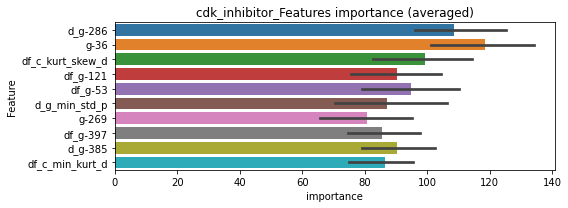

len(train_index) : 2288
len(valid_index) : 763
================================= fold 1/4 cdk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000687775	valid_1's binary_logloss: 0.0016682
[2000]	training's binary_logloss: 0.000390268	valid_1's binary_logloss: 0.00103461
[3000]	training's binary_logloss: 0.000295727	valid_1's binary_logloss: 0.000805898
[4000]	training's binary_logloss: 0.00025166	valid_1's binary_logloss: 0.000693133
[5000]	training's binary_logloss: 0.00022878	valid_1's binary_logloss: 0.000634633
[6000]	training's binary_logloss: 0.000214335	valid_1's binary_logloss: 0.000595306
Early stopping, best iteration is:
[6657]	training's binary_logloss: 0.000207005	valid_1's binary_logloss: 0.000575383


len(train_index) : 2288
len(valid_index) : 763
================================= fold 2/4 cdk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000570909	valid_1's binary_logloss: 0.00136361
[2000]	training's binary_logloss: 0.000314078	valid_1's binary_logloss: 0.000756057
[3000]	training's binary_logloss: 0.000230443	valid_1's binary_logloss: 0.000556253
[4000]	training's binary_logloss: 0.000190611	valid_1's binary_logloss: 0.000460607
[5000]	training's binary_logloss: 0.000170329	valid_1's binary_logloss: 0.000411882
[6000]	training's binary_logloss: 0.000157437	valid_1's binary_logloss: 0.000380871
[7000]	training's binary_logloss: 0.000148449	valid_1's binary_logloss: 0.000359266
[8000]	training's binary_logloss: 0.000142294	valid_1's binary_logloss: 0.000344423
[9000]	training's binary_logloss: 0.000137925	valid_1's binary_logloss: 0.000333894
[10000]	training's binary_logloss: 0.000134721	valid_1's binary_logloss: 0.000326141
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.000134721	vali

len(train_index) : 2288
len(valid_index) : 763
================================= fold 3/4 cdk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000699253	valid_1's binary_logloss: 0.00618801
Early stopping, best iteration is:
[1747]	training's binary_logloss: 0.00043555	valid_1's binary_logloss: 0.00569475


len(train_index) : 2289
len(valid_index) : 762
================================= fold 4/4 cdk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00071209	valid_1's binary_logloss: 0.00188357
[2000]	training's binary_logloss: 0.000402351	valid_1's binary_logloss: 0.00139673
[3000]	training's binary_logloss: 0.00031097	valid_1's binary_logloss: 0.00124155
Early stopping, best iteration is:
[3520]	training's binary_logloss: 0.000284568	valid_1's binary_logloss: 0.00119949


cdk_inhibitor logloss: 0.0019494060321508355


neg labels: 3289 → selected neg labels: 3282


chelating_agent, len(trt): 54, len(othr): 3282
target_rate: 0.0022676 → Adj_target_rate: 0.0024931
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00424027	valid_1's binary_logloss: 0.0363941
[600]	training's binary_logloss: 0.000825275	valid_1's binary_logloss: 0.0294889
Early stopping, best iteration is:
[574]	training's binary_logloss: 0.000889033	valid_1's binary_logloss: 0.0294534
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00445274	valid_1's binary_logloss: 0.0239312
[600]	training's binary_logloss: 0.000846099	valid_1's binary_logloss: 0.0145976
Early stopping, best iteration is:
[830]	training's binary_logloss: 0.000599431	valid_1's binary_logloss: 0.0136418
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0047387	valid_1's binary_logloss: 0.0121115
[600]	training's binary_logloss: 0.000894144	valid_1's binary_logloss: 0.00555112
Early stopping, best iteration is:
[838]	training's binary_logloss: 0.00062125	valid_1's binary_loglos

1 / 3 AUC score:1.000
y_Threshold: 0.0056714, Threshold: 0.0240556, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00227
Num_p_label: 40.0, conf_0:0.01684, conf_1:0.03127
Num_p_label: 40.0, Expected: 9.0, Adj_threshold_1: 0.0240556
Num_p_label: 29.0, Expected: 9.0, Adj_threshold_2: 0.0540556
Num_p_label: 23.0, Expected: 9.0, Adj_threshold_3: 0.0840556
Num_p_label: 18.0, Expected: 9.0, Adj_threshold_4: 0.1140556
threshold: 0.1140556, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00385687	valid_1's binary_logloss: 0.0366338
[600]	training's binary_logloss: 0.000787423	valid_1's binary_logloss: 0.0287684
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.000768938	valid_1's binary_logloss: 0.0287385
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00424838	valid_1's binary_logloss: 0.0206246
[600]	training's binary_logloss: 0.00082956	valid_1's binary_logloss: 0.0119107
Early stopping, best iteration is:
[796]	training's binary_logloss: 0.000608417	valid_1's binary_logloss: 0.0114044
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00443864	valid_1's binary_logloss: 0.0114914
[600]	training's binary_logloss: 0.000862558	valid_1's binary_logloss: 0.0056666
Early stopping, best iteration is:
[840]	training's binary_logloss: 0.000601538	valid_1's binary_loglos

2 / 3 AUC score:1.000
y_Threshold: 0.0345692, Threshold: 0.1140556, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 653.0/3800
p_label_rate: 0.0077850 Vs.target_rate: 0.00227
Num_p_label: 31.0, conf_0:0.09124, conf_1:0.13687
Num_p_label: 31.0, Expected: 9.0, Adj_threshold_1: 0.1140556
Num_p_label: 28.0, Expected: 9.0, Adj_threshold_2: 0.1440556
Num_p_label: 24.0, Expected: 9.0, Adj_threshold_3: 0.1740556
Num_p_label: 22.0, Expected: 9.0, Adj_threshold_4: 0.2040556
threshold: 0.2040556, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 653.0/3800, y_label_rate: 0.1718421
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00407078	valid_1's binary_logloss: 0.0237788
[600]	training's binary_logloss: 0.000800798	valid_1's binary_logloss: 0.0157811
Early stopping, best iteration is:
[691]	training's binary_logloss: 0.000659705	valid_1's binary_logloss: 0.0153047
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00400913	valid_1's binary_logloss: 0.0248139
[600]	training's binary_logloss: 0.00079162	valid_1's binary_logloss: 0.0166122
Early stopping, best iteration is:
[676]	training's binary_logloss: 0.000672091	valid_1's binary_logloss: 0.0161514
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00422267	valid_1's binary_logloss: 0.0257676
[600]	training's binary_logloss: 0.000824334	valid_1's binary_logloss: 0.017683
Early stopping, best iteration is:
[769]	training's binary_logloss: 0.000615262	valid_1's binary_logloss

3 / 3 AUC score:1.000
y_Threshold: 0.0233350, Threshold: 0.2040556, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[539]	training's binary_logloss: 0.000954887	valid_1's binary_logloss: 0.0234705


Remove_noisy_data: 4 → Positive_corect_labels: 651.0/3796
p_label_rate: 0.0047715 Vs.target_rate: 0.00227
Num_p_label: 19.0, conf_0:0.18365, conf_1:0.22446
Num_p_label: 19.0, Expected: 9.0, Adj_threshold_1: 0.2040556
threshold: 0.2040556, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 651.0/3796, y_label_rate: 0.1714963


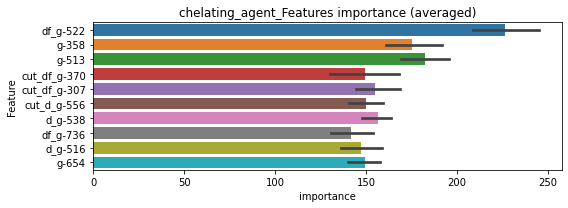

len(train_index) : 2847
len(valid_index) : 949
================================= fold 1/4 chelating_agent=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000441267	valid_1's binary_logloss: 0.000646228
[2000]	training's binary_logloss: 0.000248062	valid_1's binary_logloss: 0.000364285
[3000]	training's binary_logloss: 0.000183151	valid_1's binary_logloss: 0.000269208
[4000]	training's binary_logloss: 0.000152269	valid_1's binary_logloss: 0.000223936
[5000]	training's binary_logloss: 0.000136425	valid_1's binary_logloss: 0.000200692
[6000]	training's binary_logloss: 0.000126131	valid_1's binary_logloss: 0.000185555
[7000]	training's binary_logloss: 0.000119007	valid_1's binary_logloss: 0.000175093
[8000]	training's binary_logloss: 0.00011409	valid_1's binary_logloss: 0.000167865
[9000]	training's binary_logloss: 0.000110603	valid_1's binary_logloss: 0.000162737
[10000]	training's binary_logloss: 0.000108142	valid_1's binary_logloss: 0.000159133
Did not meet early stopping. Best iteration is:
[9999]	training's binary_logloss: 0.000108142	valid

len(train_index) : 2847
len(valid_index) : 949
================================= fold 2/4 chelating_agent=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2847
len(valid_index) : 949
================================= fold 3/4 chelating_agent=================================


Early stopping, best iteration is:
[519]	training's binary_logloss: 0.000995956	valid_1's binary_logloss: 0.00357539
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000552411	valid_1's binary_logloss: 0.00156625
Early stopping, best iteration is:
[1965]	training's binary_logloss: 0.00032059	valid_1's binary_logloss: 0.00131591


len(train_index) : 2847
len(valid_index) : 949
================================= fold 4/4 chelating_agent=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[895]	training's binary_logloss: 0.000589474	valid_1's binary_logloss: 0.00320143


chelating_agent logloss: 0.0020632067916036387


neg labels: 3289 → selected neg labels: 3285


chk_inhibitor, len(trt): 24, len(othr): 3285
target_rate: 0.0010078 → Adj_target_rate: 0.0012513
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00164566	valid_1's binary_logloss: 0.00353398
[600]	training's binary_logloss: 0.000429725	valid_1's binary_logloss: 0.00128943
Early stopping, best iteration is:
[606]	training's binary_logloss: 0.000428159	valid_1's binary_logloss: 0.00128749
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00170319	valid_1's binary_logloss: 0.00376789
[600]	training's binary_logloss: 0.000429268	valid_1's binary_logloss: 0.00137445
Early stopping, best iteration is:
[611]	training's binary_logloss: 0.000425966	valid_1's binary_logloss: 0.00136875
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00162672	valid_1's binary_logloss: 0.00420596
[600]	training's binary_logloss: 0.000426352	valid_1's binary_logloss: 0.0015876
Early stopping, best iteration is:
[615]	training's binary_logloss: 0.000420969	valid_1's binar

1 / 3 AUC score:1.000
y_Threshold: 0.0030112, Threshold: 0.0964306, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00101
Num_p_label: 40.0, conf_0:0.06750, conf_1:0.12536
Num_p_label: 40.0, Expected: 4.0, Adj_threshold_1: 0.0964306
Num_p_label: 33.0, Expected: 4.0, Adj_threshold_2: 0.1264306
Num_p_label: 31.0, Expected: 4.0, Adj_threshold_3: 0.1564306
Num_p_label: 28.0, Expected: 4.0, Adj_threshold_4: 0.1864306
Num_p_label: 28.0, Expected: 4.0, Adj_threshold_5: 0.2164306
Num_p_label: 25.0, Expected: 4.0, Adj_threshold_6: 0.2464306
Num_p_label: 25.0, Expected: 4.0, Adj_threshold_7: 0.2764306
Num_p_label: 24.0, Expected: 4.0, Adj_threshold_8: 0.3064306
Num_p_label: 22.0, Expected: 4.0, Adj_threshold_9: 0.3364306
Num_p_label: 22.0, Expected: 4.0, Adj_threshold_10: 0.3664306
threshold: 0.3964306, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
===========

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00156393	valid_1's binary_logloss: 0.00318707
[600]	training's binary_logloss: 0.000412129	valid_1's binary_logloss: 0.00112537
Early stopping, best iteration is:
[630]	training's binary_logloss: 0.000411511	valid_1's binary_logloss: 0.00112475
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00149642	valid_1's binary_logloss: 0.00322265
[600]	training's binary_logloss: 0.000402442	valid_1's binary_logloss: 0.00115285
Early stopping, best iteration is:
[620]	training's binary_logloss: 0.000398917	valid_1's binary_logloss: 0.00114651
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00153349	valid_1's binary_logloss: 0.00341055
Early stopping, best iteration is:
[562]	training's binary_logloss: 0.0004216	valid_1's binary_logloss: 0.00128767
Training until validation scores don't improve for 30 rounds


2 / 3 AUC score:1.000
y_Threshold: 0.1564856, Threshold: 0.3964306, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0087896 Vs.target_rate: 0.00101
Num_p_label: 35.0, conf_0:0.31714, conf_1:0.47572
Num_p_label: 35.0, Expected: 4.0, Adj_threshold_1: 0.3964306
Num_p_label: 34.0, Expected: 4.0, Adj_threshold_2: 0.4264306
Num_p_label: 31.0, Expected: 4.0, Adj_threshold_3: 0.4564306
Num_p_label: 30.0, Expected: 4.0, Adj_threshold_4: 0.4864306
Num_p_label: 29.0, Expected: 4.0, Adj_threshold_5: 0.5164306
Num_p_label: 29.0, Expected: 4.0, Adj_threshold_6: 0.5464306
Num_p_label: 29.0, Expected: 4.0, Adj_threshold_7: 0.5764306
Num_p_label: 26.0, Expected: 4.0, Adj_threshold_8: 0.6064306
Num_p_label: 26.0, Expected: 4.0, Adj_threshold_9: 0.6364306
Num_p_label: 25.0, Expected: 4.0, Adj_threshold_10: 0.6664306
threshold: 0.6964306, positive_p_label: 24.0/3982, p_label_rate: 0.0060271
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
===========

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00156393	valid_1's binary_logloss: 0.00318707
[600]	training's binary_logloss: 0.000412129	valid_1's binary_logloss: 0.00112537
Early stopping, best iteration is:
[606]	training's binary_logloss: 0.000411511	valid_1's binary_logloss: 0.00112475
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00149642	valid_1's binary_logloss: 0.00322265
[600]	training's binary_logloss: 0.000402442	valid_1's binary_logloss: 0.00115285
Early stopping, best iteration is:
[620]	training's binary_logloss: 0.000398917	valid_1's binary_logloss: 0.00114651
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00153349	valid_1's binary_logloss: 0.00341055
Early stopping, best iteration is:
[562]	training's binary_logloss: 0.0004216	valid_1's binary_logloss: 0.00128767
Training until validation scores don't improve for 30 rounds


3 / 3 AUC score:1.000


[600]	training's binary_logloss: 0.000405325	valid_1's binary_logloss: 0.00126586
Early stopping, best iteration is:
[606]	training's binary_logloss: 0.00040375	valid_1's binary_logloss: 0.00126273


y_Threshold: 0.1564856, Threshold: 0.6964306, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0060271 Vs.target_rate: 0.00101
Num_p_label: 24.0, conf_0:0.50000, conf_1:0.76607
Num_p_label: 24.0, Expected: 4.0, Adj_threshold_1: 0.6964306
Num_p_label: 23.0, Expected: 4.0, Adj_threshold_2: 0.7264306
Num_p_label: 23.0, Expected: 4.0, Adj_threshold_3: 0.7564306
Num_p_label: 20.0, Expected: 4.0, Adj_threshold_4: 0.7864306
threshold: 0.7864306, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


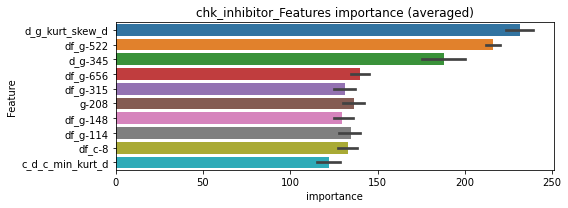

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 chk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00039301	valid_1's binary_logloss: 0.000470407
[2000]	training's binary_logloss: 0.000234506	valid_1's binary_logloss: 0.00028117
[3000]	training's binary_logloss: 0.000177198	valid_1's binary_logloss: 0.000212585
[4000]	training's binary_logloss: 0.000148871	valid_1's binary_logloss: 0.000178653
[5000]	training's binary_logloss: 0.000134082	valid_1's binary_logloss: 0.000160931
[6000]	training's binary_logloss: 0.000124471	valid_1's binary_logloss: 0.000149411
[7000]	training's binary_logloss: 0.000117743	valid_1's binary_logloss: 0.000141343
[8000]	training's binary_logloss: 0.00011312	valid_1's binary_logloss: 0.000135799
[9000]	training's binary_logloss: 0.00010983	valid_1's binary_logloss: 0.000131854
[10000]	training's binary_logloss: 0.00010747	valid_1's binary_logloss: 0.000129025
Did not meet early stopping. Best iteration is:
[9999]	training's binary_logloss: 0.00010747	valid_1's 

len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 chk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000392336	valid_1's binary_logloss: 0.000532363
[2000]	training's binary_logloss: 0.000234408	valid_1's binary_logloss: 0.000318766
[3000]	training's binary_logloss: 0.000177111	valid_1's binary_logloss: 0.000241009
[4000]	training's binary_logloss: 0.000148839	valid_1's binary_logloss: 0.000202609
[5000]	training's binary_logloss: 0.000134036	valid_1's binary_logloss: 0.000182489
[6000]	training's binary_logloss: 0.000124467	valid_1's binary_logloss: 0.000169482
[7000]	training's binary_logloss: 0.000117753	valid_1's binary_logloss: 0.000160349
[8000]	training's binary_logloss: 0.000113135	valid_1's binary_logloss: 0.00015407
[9000]	training's binary_logloss: 0.000109818	valid_1's binary_logloss: 0.000149556
[10000]	training's binary_logloss: 0.000107465	valid_1's binary_logloss: 0.000146359
Did not meet early stopping. Best iteration is:
[9999]	training's binary_logloss: 0.000107465	valid

len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 chk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000454559	valid_1's binary_logloss: 0.000536728
[2000]	training's binary_logloss: 0.00027449	valid_1's binary_logloss: 0.00034317
[3000]	training's binary_logloss: 0.000221626	valid_1's binary_logloss: 0.000283157
[4000]	training's binary_logloss: 0.000195326	valid_1's binary_logloss: 0.00025263
[5000]	training's binary_logloss: 0.000181353	valid_1's binary_logloss: 0.000236291
[6000]	training's binary_logloss: 0.000172276	valid_1's binary_logloss: 0.000226582
[7000]	training's binary_logloss: 0.000165751	valid_1's binary_logloss: 0.000219931
Early stopping, best iteration is:
[7686]	training's binary_logloss: 0.000162573	valid_1's binary_logloss: 0.00021638


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 chk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000467635	valid_1's binary_logloss: 0.00112468
[2000]	training's binary_logloss: 0.000284453	valid_1's binary_logloss: 0.000867642
Early stopping, best iteration is:
[2953]	training's binary_logloss: 0.000233417	valid_1's binary_logloss: 0.00079267


chk_inhibitor logloss: 0.000321049841476488


neg labels: 3289 → selected neg labels: 3284


chloride_channel_blocker, len(trt): 42, len(othr): 3284
target_rate: 0.0017637 → Adj_target_rate: 0.0020135
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00301726	valid_1's binary_logloss: 0.0198977
[600]	training's binary_logloss: 0.000638931	valid_1's binary_logloss: 0.012627
Early stopping, best iteration is:
[705]	training's binary_logloss: 0.000552073	valid_1's binary_logloss: 0.0123555
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00319359	valid_1's binary_logloss: 0.0146709
[600]	training's binary_logloss: 0.000655681	valid_1's binary_logloss: 0.00903038
Early stopping, best iteration is:
[731]	training's binary_logloss: 0.00056167	valid_1's binary_logloss: 0.00882229
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00343569	valid_1's binary_logloss: 0.008306
[600]	training's binary_logloss: 0.000685959	valid_1's binary_logloss: 0.00329209
Early stopping, best iteration is:
[704]	training's binary_logloss: 0.00058985	valid_1's binary_loglos

1 / 3 AUC score:1.000
y_Threshold: 0.0048714, Threshold: 0.0522774, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00176
Num_p_label: 40.0, conf_0:0.03659, conf_1:0.06796
Num_p_label: 40.0, Expected: 7.0, Adj_threshold_1: 0.0522774
Num_p_label: 22.0, Expected: 7.0, Adj_threshold_2: 0.0822774
Num_p_label: 15.0, Expected: 7.0, Adj_threshold_3: 0.1122774
threshold: 0.1122774, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00276761	valid_1's binary_logloss: 0.0192362
[600]	training's binary_logloss: 0.000603307	valid_1's binary_logloss: 0.0127294
Early stopping, best iteration is:
[655]	training's binary_logloss: 0.000544742	valid_1's binary_logloss: 0.0125349
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00289937	valid_1's binary_logloss: 0.0146601
[600]	training's binary_logloss: 0.000621004	valid_1's binary_logloss: 0.00960192
Early stopping, best iteration is:
[660]	training's binary_logloss: 0.000563225	valid_1's binary_logloss: 0.00933706
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00298951	valid_1's binary_logloss: 0.00718181
[600]	training's binary_logloss: 0.000632697	valid_1's binary_logloss: 0.00281043
Early stopping, best iteration is:
[678]	training's binary_logloss: 0.000567831	valid_1's binary_l

2 / 3 AUC score:1.000
y_Threshold: 0.0393917, Threshold: 0.1122774, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0150678 Vs.target_rate: 0.00176
Num_p_label: 60.0, conf_0:0.08982, conf_1:0.13473
Num_p_label: 60.0, Expected: 7.0, Adj_threshold_1: 0.1122774
Num_p_label: 53.0, Expected: 7.0, Adj_threshold_2: 0.1422774
Num_p_label: 45.0, Expected: 7.0, Adj_threshold_3: 0.1722774
Num_p_label: 36.0, Expected: 7.0, Adj_threshold_4: 0.2022774
Num_p_label: 31.0, Expected: 7.0, Adj_threshold_5: 0.2322774
Num_p_label: 28.0, Expected: 7.0, Adj_threshold_6: 0.2622774
Num_p_label: 24.0, Expected: 7.0, Adj_threshold_7: 0.2922774
Num_p_label: 22.0, Expected: 7.0, Adj_threshold_8: 0.3222774
Num_p_label: 21.0, Expected: 7.0, Adj_threshold_9: 0.3522774
Num_p_label: 17.0, Expected: 7.0, Adj_threshold_10: 0.3822774
threshold: 0.3822774, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 655.0/3806, y_label_rate: 0.1720967
===========

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00288839	valid_1's binary_logloss: 0.0159376
[600]	training's binary_logloss: 0.000615595	valid_1's binary_logloss: 0.0104559
Early stopping, best iteration is:
[716]	training's binary_logloss: 0.000536018	valid_1's binary_logloss: 0.0102242
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00286757	valid_1's binary_logloss: 0.0113399
[600]	training's binary_logloss: 0.000616649	valid_1's binary_logloss: 0.00606446
Early stopping, best iteration is:
[582]	training's binary_logloss: 0.000641448	valid_1's binary_logloss: 0.0060426
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00282908	valid_1's binary_logloss: 0.0129429
[600]	training's binary_logloss: 0.00061195	valid_1's binary_logloss: 0.00713839
Early stopping, best iteration is:
[735]	training's binary_logloss: 0.000534445	valid_1's binary_logl

3 / 3 AUC score:1.000
y_Threshold: 0.0618884, Threshold: 0.3822774, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 654.0/3804
p_label_rate: 0.0047715 Vs.target_rate: 0.00176
Num_p_label: 19.0, conf_0:0.34405, conf_1:0.42051
Num_p_label: 19.0, Expected: 7.0, Adj_threshold_1: 0.3822774
Num_p_label: 19.0, Expected: 7.0, Adj_threshold_2: 0.4122774
Num_p_label: 19.0, Expected: 7.0, Adj_threshold_3: 0.4422774
Num_p_label: 19.0, Expected: 7.0, Adj_threshold_4: 0.4722774
Num_p_label: 16.0, Expected: 7.0, Adj_threshold_5: 0.5022774
threshold: 0.5022774, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 654.0/3804, y_label_rate: 0.1719243


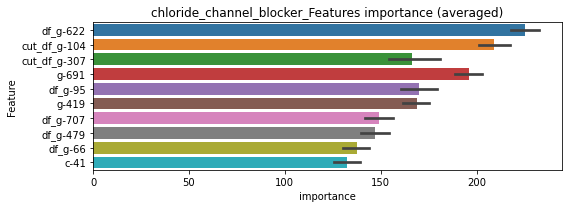

len(train_index) : 2853
len(valid_index) : 951
================================= fold 1/4 chloride_channel_blocker=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000496895	valid_1's binary_logloss: 0.000760526
[2000]	training's binary_logloss: 0.000289449	valid_1's binary_logloss: 0.00052911
[3000]	training's binary_logloss: 0.000224426	valid_1's binary_logloss: 0.000458426
[4000]	training's binary_logloss: 0.000192803	valid_1's binary_logloss: 0.000421942
[5000]	training's binary_logloss: 0.000176444	valid_1's binary_logloss: 0.000401273
Early stopping, best iteration is:
[5394]	training's binary_logloss: 0.000171651	valid_1's binary_logloss: 0.000394308


len(train_index) : 2853
len(valid_index) : 951
================================= fold 2/4 chloride_channel_blocker=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000521523	valid_1's binary_logloss: 0.00221588
[2000]	training's binary_logloss: 0.000300709	valid_1's binary_logloss: 0.00195297
Early stopping, best iteration is:
[2407]	training's binary_logloss: 0.000268832	valid_1's binary_logloss: 0.00190225


len(train_index) : 2853
len(valid_index) : 951
================================= fold 3/4 chloride_channel_blocker=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000425048	valid_1's binary_logloss: 0.000661525
[2000]	training's binary_logloss: 0.000243699	valid_1's binary_logloss: 0.00038165
[3000]	training's binary_logloss: 0.000181153	valid_1's binary_logloss: 0.000284284
[4000]	training's binary_logloss: 0.000150966	valid_1's binary_logloss: 0.000237176
[5000]	training's binary_logloss: 0.000135419	valid_1's binary_logloss: 0.00021287
[6000]	training's binary_logloss: 0.00012542	valid_1's binary_logloss: 0.000197221
[7000]	training's binary_logloss: 0.000118428	valid_1's binary_logloss: 0.000186261
[8000]	training's binary_logloss: 0.000113613	valid_1's binary_logloss: 0.000178712
[9000]	training's binary_logloss: 0.000110212	valid_1's binary_logloss: 0.000173384
[10000]	training's binary_logloss: 0.000107746	valid_1's binary_logloss: 0.000169526
Did not meet early stopping. Best iteration is:
[9999]	training's binary_logloss: 0.000107746	valid_1

len(train_index) : 2853
len(valid_index) : 951
================================= fold 4/4 chloride_channel_blocker=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000508656	valid_1's binary_logloss: 0.00102204
[2000]	training's binary_logloss: 0.000294159	valid_1's binary_logloss: 0.000692262
[3000]	training's binary_logloss: 0.000232554	valid_1's binary_logloss: 0.000584088
[4000]	training's binary_logloss: 0.000203472	valid_1's binary_logloss: 0.000526302
[5000]	training's binary_logloss: 0.000188193	valid_1's binary_logloss: 0.000492068
[6000]	training's binary_logloss: 0.000178364	valid_1's binary_logloss: 0.000469164
[7000]	training's binary_logloss: 0.000170957	valid_1's binary_logloss: 0.000452641
Early stopping, best iteration is:
[7415]	training's binary_logloss: 0.000168983	valid_1's binary_logloss: 0.000447914


chloride_channel_blocker logloss: 0.0007287324811463858


neg labels: 3289 → selected neg labels: 3288


cholesterol_inhibitor, len(trt): 48, len(othr): 3288
target_rate: 0.0020156 → Adj_target_rate: 0.0022556
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00405571	valid_1's binary_logloss: 0.0213872
[600]	training's binary_logloss: 0.000763762	valid_1's binary_logloss: 0.0131641
Early stopping, best iteration is:
[736]	training's binary_logloss: 0.000604646	valid_1's binary_logloss: 0.0126221
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.003838	valid_1's binary_logloss: 0.0258003
[600]	training's binary_logloss: 0.000743406	valid_1's binary_logloss: 0.020574
Early stopping, best iteration is:
[607]	training's binary_logloss: 0.000730522	valid_1's binary_logloss: 0.0204059
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00431586	valid_1's binary_logloss: 0.0104466
[600]	training's binary_logloss: 0.000797954	valid_1's binary_logloss: 0.00385598
Early stopping, best iteration is:
[747]	training's binary_logloss: 0.000609694	valid_1's binary_logloss

1 / 3 AUC score:1.000
y_Threshold: 0.0048184, Threshold: 0.0115368, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00202
Num_p_label: 40.0, conf_0:0.00808, conf_1:0.01500
Num_p_label: 40.0, Expected: 8.0, Adj_threshold_1: 0.0115368
Num_p_label: 9.0, Expected: 8.0, Adj_threshold_2: 0.0415368
threshold: 0.0415368, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00383235	valid_1's binary_logloss: 0.0192557
[600]	training's binary_logloss: 0.000741195	valid_1's binary_logloss: 0.01235
Early stopping, best iteration is:
[706]	training's binary_logloss: 0.000603014	valid_1's binary_logloss: 0.0119162
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00365237	valid_1's binary_logloss: 0.0244203
[600]	training's binary_logloss: 0.000716634	valid_1's binary_logloss: 0.0182961
Early stopping, best iteration is:
[729]	training's binary_logloss: 0.000580888	valid_1's binary_logloss: 0.0179238
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0039863	valid_1's binary_logloss: 0.0100958
[600]	training's binary_logloss: 0.000762078	valid_1's binary_logloss: 0.00407858
Early stopping, best iteration is:
[767]	training's binary_logloss: 0.000582079	valid_1's binary_logloss

2 / 3 AUC score:1.000
y_Threshold: 0.0209277, Threshold: 0.0415368, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3811
p_label_rate: 0.0037670 Vs.target_rate: 0.00202
Num_p_label: 15.0, conf_0:0.03323, conf_1:0.04984
Num_p_label: 15.0, Expected: 8.0, Adj_threshold_1: 0.0415368
threshold: 0.0415368, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 656.0/3811, y_label_rate: 0.1721333
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0038439	valid_1's binary_logloss: 0.0207977
[600]	training's binary_logloss: 0.000719836	valid_1's binary_logloss: 0.0124431
Early stopping, best iteration is:
[721]	training's binary_logloss: 0.000575581	valid_1's binary_logloss: 0.0120331
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0038065	valid_1's binary_logloss: 0.0115822
[600]	training's binary_logloss: 0.000737901	valid_1's binary_logloss: 0.0052365
Early stopping, best iteration is:
[752]	training's binary_logloss: 0.000583781	valid_1's binary_logloss: 0.00482983
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0039231	valid_1's binary_logloss: 0.00809019
[600]	training's binary_logloss: 0.000763722	valid_1's binary_logloss: 0.00271426
Early stopping, best iteration is:
[726]	training's binary_logloss: 0.000608481	valid_1's binary_loglo

3 / 3 AUC score:1.000
y_Threshold: 0.0251581, Threshold: 0.0415368, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3811
p_label_rate: 0.0035158 Vs.target_rate: 0.00202
Num_p_label: 14.0, conf_0:0.03738, conf_1:0.04569
Num_p_label: 14.0, Expected: 8.0, Adj_threshold_1: 0.0415368
threshold: 0.0415368, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 656.0/3811, y_label_rate: 0.1721333


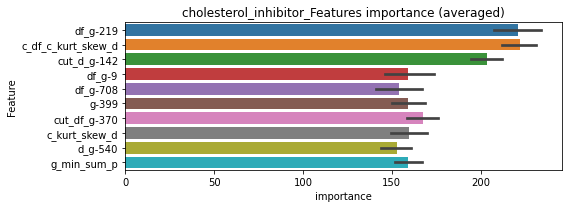

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 cholesterol_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00053138	valid_1's binary_logloss: 0.00411928
Early stopping, best iteration is:
[1853]	training's binary_logloss: 0.000324424	valid_1's binary_logloss: 0.00383812


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 cholesterol_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000534265	valid_1's binary_logloss: 0.00122265
Early stopping, best iteration is:
[1743]	training's binary_logloss: 0.000339253	valid_1's binary_logloss: 0.00100034


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 cholesterol_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000538492	valid_1's binary_logloss: 0.00057491
[2000]	training's binary_logloss: 0.000306867	valid_1's binary_logloss: 0.000355171
[3000]	training's binary_logloss: 0.000240657	valid_1's binary_logloss: 0.000288967
[4000]	training's binary_logloss: 0.000209267	valid_1's binary_logloss: 0.000254504
[5000]	training's binary_logloss: 0.000192597	valid_1's binary_logloss: 0.00023693
[6000]	training's binary_logloss: 0.000182058	valid_1's binary_logloss: 0.000225592
[7000]	training's binary_logloss: 0.000174297	valid_1's binary_logloss: 0.000217221
Early stopping, best iteration is:
[7035]	training's binary_logloss: 0.000174267	valid_1's binary_logloss: 0.000217163


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 cholesterol_inhibitor=================================


Training until validation scores don't improve for 30 rounds


cholesterol_inhibitor logloss: 0.0022740827863315357


Early stopping, best iteration is:
[821]	training's binary_logloss: 0.000515805	valid_1's binary_logloss: 0.00403902
neg labels: 3289 → selected neg labels: 3281


cholinergic_receptor_antagonist, len(trt): 54, len(othr): 3281
target_rate: 0.0022676 → Adj_target_rate: 0.0024931
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00407974	valid_1's binary_logloss: 0.0362204
[600]	training's binary_logloss: 0.000807153	valid_1's binary_logloss: 0.0273128
Early stopping, best iteration is:
[765]	training's binary_logloss: 0.000617922	valid_1's binary_logloss: 0.0263093
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00420677	valid_1's binary_logloss: 0.0257051
[600]	training's binary_logloss: 0.000828214	valid_1's binary_logloss: 0.0195103
Early stopping, best iteration is:
[730]	training's binary_logloss: 0.000654533	valid_1's binary_logloss: 0.0190413
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0046021	valid_1's binary_logloss: 0.0108171
[600]	training's binary_logloss: 0.000882851	valid_1's binary_logloss: 0.00438813
Early stopping, best iteration is:
[861]	training's binary_logloss: 0.000615326	valid_1's binary_loglo

1 / 3 AUC score:1.000
y_Threshold: 0.0050674, Threshold: 0.0131102, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00227
Num_p_label: 40.0, conf_0:0.00918, conf_1:0.01704
Num_p_label: 40.0, Expected: 9.0, Adj_threshold_1: 0.0131102
Num_p_label: 7.0, Expected: 9.0, Adj_threshold_2: 0.0431102
threshold: 0.0431102, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00398011	valid_1's binary_logloss: 0.0352816
[600]	training's binary_logloss: 0.000787766	valid_1's binary_logloss: 0.0268153
Early stopping, best iteration is:
[607]	training's binary_logloss: 0.000774335	valid_1's binary_logloss: 0.0266652
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00398772	valid_1's binary_logloss: 0.0243413
[600]	training's binary_logloss: 0.000799835	valid_1's binary_logloss: 0.0182769
Early stopping, best iteration is:
[642]	training's binary_logloss: 0.000724036	valid_1's binary_logloss: 0.0180464
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00427968	valid_1's binary_logloss: 0.0100931
[600]	training's binary_logloss: 0.000843976	valid_1's binary_logloss: 0.00427314
Early stopping, best iteration is:
[795]	training's binary_logloss: 0.000627081	valid_1's binary_logl

2 / 3 AUC score:1.000
y_Threshold: 0.0281747, Threshold: 0.0431102, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 654.0/3801
p_label_rate: 0.0055249 Vs.target_rate: 0.00227
Num_p_label: 22.0, conf_0:0.03449, conf_1:0.05173
Num_p_label: 22.0, Expected: 9.0, Adj_threshold_1: 0.0431102
threshold: 0.0431102, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 654.0/3801, y_label_rate: 0.1720600
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00395818	valid_1's binary_logloss: 0.026346
[600]	training's binary_logloss: 0.000788668	valid_1's binary_logloss: 0.0191595
Early stopping, best iteration is:
[621]	training's binary_logloss: 0.00075337	valid_1's binary_logloss: 0.0188973
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00413627	valid_1's binary_logloss: 0.0220907
[600]	training's binary_logloss: 0.000808534	valid_1's binary_logloss: 0.0155281
Early stopping, best iteration is:
[730]	training's binary_logloss: 0.000631507	valid_1's binary_logloss: 0.0150997
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00399007	valid_1's binary_logloss: 0.0165397
[600]	training's binary_logloss: 0.000800324	valid_1's binary_logloss: 0.0101645
Early stopping, best iteration is:
[750]	training's binary_logloss: 0.000620108	valid_1's binary_logloss

3 / 3 AUC score:1.000
y_Threshold: 0.0236889, Threshold: 0.0431102, pos_neg_ratio: 0.8000000


[600]	training's binary_logloss: 0.000767384	valid_1's binary_logloss: 0.0190244
Early stopping, best iteration is:
[571]	training's binary_logloss: 0.000828508	valid_1's binary_logloss: 0.0189395


Remove_noisy_data: 4 → Positive_corect_labels: 652.0/3797
p_label_rate: 0.0047715 Vs.target_rate: 0.00227
Num_p_label: 19.0, conf_0:0.03880, conf_1:0.04742
Num_p_label: 19.0, Expected: 9.0, Adj_threshold_1: 0.0431102
threshold: 0.0431102, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 652.0/3797, y_label_rate: 0.1717145


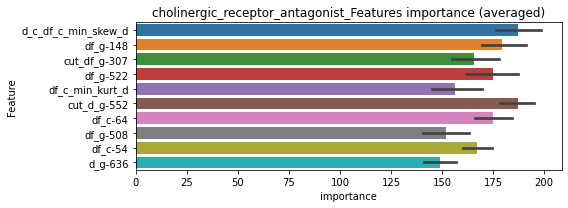

len(train_index) : 2847
len(valid_index) : 950
================================= fold 1/4 cholinergic_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000547966	valid_1's binary_logloss: 0.005292
Early stopping, best iteration is:
[1626]	training's binary_logloss: 0.000360471	valid_1's binary_logloss: 0.00501034


len(train_index) : 2848
len(valid_index) : 949
================================= fold 2/4 cholinergic_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2848
len(valid_index) : 949
================================= fold 3/4 cholinergic_receptor_antagonist=================================


Early stopping, best iteration is:
[553]	training's binary_logloss: 0.000912481	valid_1's binary_logloss: 0.00265137
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[925]	training's binary_logloss: 0.000595261	valid_1's binary_logloss: 0.00420285


len(train_index) : 2848
len(valid_index) : 949
================================= fold 4/4 cholinergic_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000550137	valid_1's binary_logloss: 0.00126062
[2000]	training's binary_logloss: 0.000316295	valid_1's binary_logloss: 0.00096053
Early stopping, best iteration is:
[2198]	training's binary_logloss: 0.00029891	valid_1's binary_logloss: 0.000931623


cholinergic_receptor_antagonist logloss: 0.0032009796509527735


neg labels: 3289 → selected neg labels: 3288


coagulation_factor_inhibitor, len(trt): 24, len(othr): 3288
target_rate: 0.0010078 → Adj_target_rate: 0.0012513
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00183716	valid_1's binary_logloss: 0.00398608
[600]	training's binary_logloss: 0.000447958	valid_1's binary_logloss: 0.00145541
Early stopping, best iteration is:
[670]	training's binary_logloss: 0.00041867	valid_1's binary_logloss: 0.00138622
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00181087	valid_1's binary_logloss: 0.00463821
[600]	training's binary_logloss: 0.000444775	valid_1's binary_logloss: 0.00188917
Early stopping, best iteration is:
[666]	training's binary_logloss: 0.000415994	valid_1's binary_logloss: 0.00182236
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00176379	valid_1's binary_logloss: 0.00402588
[600]	training's binary_logloss: 0.000442438	valid_1's binary_logloss: 0.0016159
Early stopping, best iteration is:
[662]	training's binary_logloss: 0.000413519	valid_1's binary

1 / 3 AUC score:1.000
y_Threshold: 0.0029605, Threshold: 0.0178803, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00101
Num_p_label: 40.0, conf_0:0.01252, conf_1:0.02324
Num_p_label: 40.0, Expected: 4.0, Adj_threshold_1: 0.0178803
Num_p_label: 18.0, Expected: 4.0, Adj_threshold_2: 0.0478803
Num_p_label: 11.0, Expected: 4.0, Adj_threshold_3: 0.0778803
Num_p_label: 8.0, Expected: 4.0, Adj_threshold_4: 0.1078803
threshold: 0.1078803, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00166532	valid_1's binary_logloss: 0.00396343
[600]	training's binary_logloss: 0.000427229	valid_1's binary_logloss: 0.00145831
Early stopping, best iteration is:
[669]	training's binary_logloss: 0.00040026	valid_1's binary_logloss: 0.00140707
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00167692	valid_1's binary_logloss: 0.00371192
[600]	training's binary_logloss: 0.000422796	valid_1's binary_logloss: 0.00142222
Early stopping, best iteration is:
[668]	training's binary_logloss: 0.000396455	valid_1's binary_logloss: 0.00137233
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00163696	valid_1's binary_logloss: 0.00342307
[600]	training's binary_logloss: 0.000420231	valid_1's binary_logloss: 0.0012443
Early stopping, best iteration is:
[664]	training's binary_logloss: 0.000395696	valid_1's binary

2 / 3 AUC score:1.000
y_Threshold: 0.0595468, Threshold: 0.1078803, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813


[600]	training's binary_logloss: 0.00041768	valid_1's binary_logloss: 0.00388896
Early stopping, best iteration is:
[601]	training's binary_logloss: 0.000416785	valid_1's binary_logloss: 0.00387921


p_label_rate: 0.0035158 Vs.target_rate: 0.00101
Num_p_label: 14.0, conf_0:0.08630, conf_1:0.12946
Num_p_label: 14.0, Expected: 4.0, Adj_threshold_1: 0.1078803
Num_p_label: 12.0, Expected: 4.0, Adj_threshold_2: 0.1378803
Num_p_label: 10.0, Expected: 4.0, Adj_threshold_3: 0.1678803
threshold: 0.1678803, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00166532	valid_1's binary_logloss: 0.00396343
[600]	training's binary_logloss: 0.000427229	valid_1's binary_logloss: 0.00145831
Early stopping, best iteration is:
[662]	training's binary_logloss: 0.00040026	valid_1's binary_logloss: 0.00140707
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00167692	valid_1's binary_logloss: 0.00371192
[600]	training's binary_logloss: 0.000422796	valid_1's binary_logloss: 0.00142222
Early stopping, best iteration is:
[668]	training's binary_logloss: 0.000396455	valid_1's binary_logloss: 0.00137233
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00163696	valid_1's binary_logloss: 0.00342307
[600]	training's binary_logloss: 0.000420231	valid_1's binary_logloss: 0.0012443
Early stopping, best iteration is:
[666]	training's binary_logloss: 0.000395696	valid_1's binary

3 / 3 AUC score:1.000
y_Threshold: 0.0595468, Threshold: 0.1678803, pos_neg_ratio: 0.8000000


[600]	training's binary_logloss: 0.00041768	valid_1's binary_logloss: 0.00388896
Early stopping, best iteration is:
[601]	training's binary_logloss: 0.000416785	valid_1's binary_logloss: 0.00387921


Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0025113 Vs.target_rate: 0.00101
Num_p_label: 10.0, conf_0:0.15109, conf_1:0.18467
Num_p_label: 10.0, Expected: 4.0, Adj_threshold_1: 0.1678803
threshold: 0.1678803, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


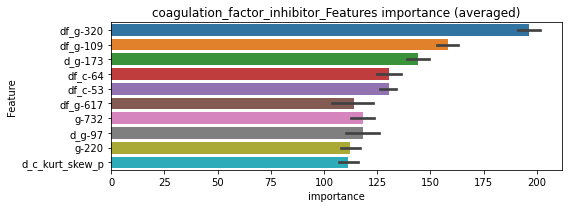

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 coagulation_factor_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000394671	valid_1's binary_logloss: 0.000480022
[2000]	training's binary_logloss: 0.00023452	valid_1's binary_logloss: 0.000285504
[3000]	training's binary_logloss: 0.000177086	valid_1's binary_logloss: 0.000215629
[4000]	training's binary_logloss: 0.000148669	valid_1's binary_logloss: 0.000181047
[5000]	training's binary_logloss: 0.000133858	valid_1's binary_logloss: 0.000163018
[6000]	training's binary_logloss: 0.000124292	valid_1's binary_logloss: 0.000151374
[7000]	training's binary_logloss: 0.000117623	valid_1's binary_logloss: 0.000143256
[8000]	training's binary_logloss: 0.000113009	valid_1's binary_logloss: 0.000137638
[9000]	training's binary_logloss: 0.000109702	valid_1's binary_logloss: 0.000133611
[10000]	training's binary_logloss: 0.000107299	valid_1's binary_logloss: 0.000130686
Did not meet early stopping. Best iteration is:
[9999]	training's binary_logloss: 0.000107299	valid

len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 coagulation_factor_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000455215	valid_1's binary_logloss: 0.000740399
[2000]	training's binary_logloss: 0.000273893	valid_1's binary_logloss: 0.000533307
[3000]	training's binary_logloss: 0.000220281	valid_1's binary_logloss: 0.000464471
Early stopping, best iteration is:
[3738]	training's binary_logloss: 0.000198526	valid_1's binary_logloss: 0.000435983


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 coagulation_factor_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000469055	valid_1's binary_logloss: 0.000635973
[2000]	training's binary_logloss: 0.000281042	valid_1's binary_logloss: 0.000392325
[3000]	training's binary_logloss: 0.000227449	valid_1's binary_logloss: 0.000318148
[4000]	training's binary_logloss: 0.000201834	valid_1's binary_logloss: 0.000281639
[5000]	training's binary_logloss: 0.000188425	valid_1's binary_logloss: 0.00026199
[6000]	training's binary_logloss: 0.000179367	valid_1's binary_logloss: 0.000248349
[7000]	training's binary_logloss: 0.000172541	valid_1's binary_logloss: 0.000238275
[8000]	training's binary_logloss: 0.000167922	valid_1's binary_logloss: 0.000231733
Early stopping, best iteration is:
[8510]	training's binary_logloss: 0.000165979	valid_1's binary_logloss: 0.000228864


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 coagulation_factor_inhibitor=================================


Training until validation scores don't improve for 30 rounds


coagulation_factor_inhibitor logloss: 0.0021198655410207172


Early stopping, best iteration is:
[626]	training's binary_logloss: 0.000724167	valid_1's binary_logloss: 0.00768552
neg labels: 3289 → selected neg labels: 3285


corticosteroid_agonist, len(trt): 36, len(othr): 3285
target_rate: 0.0015117 → Adj_target_rate: 0.0017663
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00362441	valid_1's binary_logloss: 0.0117861
[600]	training's binary_logloss: 0.000672045	valid_1's binary_logloss: 0.00454254
Early stopping, best iteration is:
[772]	training's binary_logloss: 0.000519134	valid_1's binary_logloss: 0.00398954
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00351455	valid_1's binary_logloss: 0.0166207
[600]	training's binary_logloss: 0.000663781	valid_1's binary_logloss: 0.00859564
Early stopping, best iteration is:
[787]	training's binary_logloss: 0.000509288	valid_1's binary_logloss: 0.00798708
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00362327	valid_1's binary_logloss: 0.00876078
[600]	training's binary_logloss: 0.000682334	valid_1's binary_logloss: 0.00295422
Early stopping, best iteration is:
[759]	training's binary_logloss: 0.000525132	valid_1's binary

1 / 3 AUC score:1.000
y_Threshold: 0.0045789, Threshold: 0.0166151, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, conf_0:0.01163, conf_1:0.02160
Num_p_label: 40.0, Expected: 6.0, Adj_threshold_1: 0.0166151
Num_p_label: 5.0, Expected: 6.0, Adj_threshold_2: 0.0466151
threshold: 0.0466151, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00322586	valid_1's binary_logloss: 0.0104033
[600]	training's binary_logloss: 0.00063756	valid_1's binary_logloss: 0.00416795
Early stopping, best iteration is:
[769]	training's binary_logloss: 0.000505298	valid_1's binary_logloss: 0.00373522
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00334365	valid_1's binary_logloss: 0.0143829
[600]	training's binary_logloss: 0.000636322	valid_1's binary_logloss: 0.00715699
Early stopping, best iteration is:
[748]	training's binary_logloss: 0.000508612	valid_1's binary_logloss: 0.00663147
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00319695	valid_1's binary_logloss: 0.0085551
[600]	training's binary_logloss: 0.000641875	valid_1's binary_logloss: 0.00361258
Early stopping, best iteration is:
[727]	training's binary_logloss: 0.000521142	valid_1's binary_l

2 / 3 AUC score:1.000
y_Threshold: 0.0569474, Threshold: 0.0466151, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0062783 Vs.target_rate: 0.00151
Num_p_label: 25.0, conf_0:0.03729, conf_1:0.05594
Num_p_label: 25.0, Expected: 6.0, Adj_threshold_1: 0.0466151
Num_p_label: 10.0, Expected: 6.0, Adj_threshold_2: 0.0766151
threshold: 0.0766151, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00322586	valid_1's binary_logloss: 0.0104033
[600]	training's binary_logloss: 0.00063756	valid_1's binary_logloss: 0.00416795
Early stopping, best iteration is:
[769]	training's binary_logloss: 0.000505298	valid_1's binary_logloss: 0.00373522
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00334365	valid_1's binary_logloss: 0.0143829
[600]	training's binary_logloss: 0.000636322	valid_1's binary_logloss: 0.00715699
Early stopping, best iteration is:
[748]	training's binary_logloss: 0.000508612	valid_1's binary_logloss: 0.00663147
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00319695	valid_1's binary_logloss: 0.0085551
[600]	training's binary_logloss: 0.000641875	valid_1's binary_logloss: 0.00361258
Early stopping, best iteration is:
[727]	training's binary_logloss: 0.000521142	valid_1's binary_l

3 / 3 AUC score:1.000
y_Threshold: 0.0569474, Threshold: 0.0766151, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0025113 Vs.target_rate: 0.00151
Num_p_label: 10.0, conf_0:0.06895, conf_1:0.08428
Num_p_label: 10.0, Expected: 6.0, Adj_threshold_1: 0.0766151
threshold: 0.0766151, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


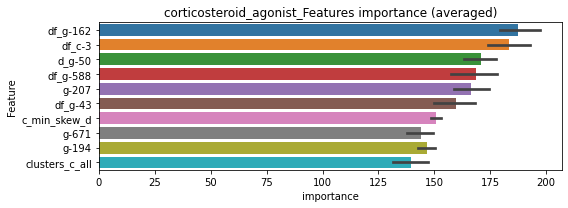

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 corticosteroid_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000489527	valid_1's binary_logloss: 0.00093726
[2000]	training's binary_logloss: 0.000288966	valid_1's binary_logloss: 0.000729158
Early stopping, best iteration is:
[2543]	training's binary_logloss: 0.000250114	valid_1's binary_logloss: 0.000668757


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 corticosteroid_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000426366	valid_1's binary_logloss: 0.00059287
[2000]	training's binary_logloss: 0.000243747	valid_1's binary_logloss: 0.00034036
[3000]	training's binary_logloss: 0.000181085	valid_1's binary_logloss: 0.000253261
[4000]	training's binary_logloss: 0.000150945	valid_1's binary_logloss: 0.000211288
[5000]	training's binary_logloss: 0.000135397	valid_1's binary_logloss: 0.000189606
[6000]	training's binary_logloss: 0.000125357	valid_1's binary_logloss: 0.00017558
[7000]	training's binary_logloss: 0.000118366	valid_1's binary_logloss: 0.00016581
[8000]	training's binary_logloss: 0.000113541	valid_1's binary_logloss: 0.000159065
[9000]	training's binary_logloss: 0.000110115	valid_1's binary_logloss: 0.00015427
[10000]	training's binary_logloss: 0.000107664	valid_1's binary_logloss: 0.000150854
Did not meet early stopping. Best iteration is:
[9999]	training's binary_logloss: 0.000107664	valid_1's

len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 corticosteroid_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000511734	valid_1's binary_logloss: 0.000666314
[2000]	training's binary_logloss: 0.000296996	valid_1's binary_logloss: 0.000434212
[3000]	training's binary_logloss: 0.000234701	valid_1's binary_logloss: 0.000359475
[4000]	training's binary_logloss: 0.000205522	valid_1's binary_logloss: 0.000324037
[5000]	training's binary_logloss: 0.000189796	valid_1's binary_logloss: 0.000304779
[6000]	training's binary_logloss: 0.000179087	valid_1's binary_logloss: 0.000291642
[7000]	training's binary_logloss: 0.000171336	valid_1's binary_logloss: 0.000281746
Early stopping, best iteration is:
[7556]	training's binary_logloss: 0.000168131	valid_1's binary_logloss: 0.000277845


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 corticosteroid_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000521948	valid_1's binary_logloss: 0.00559059
[2000]	training's binary_logloss: 0.000304067	valid_1's binary_logloss: 0.00506541
[3000]	training's binary_logloss: 0.000241353	valid_1's binary_logloss: 0.00490153
Early stopping, best iteration is:
[3809]	training's binary_logloss: 0.000216429	valid_1's binary_logloss: 0.00483441


corticosteroid_agonist logloss: 0.001482475227487457


neg labels: 3289 → selected neg labels: 3235


cyclooxygenase_inhibitor, len(trt): 435, len(othr): 3235
target_rate: 0.0182666 → Adj_target_rate: 0.0146863
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0675889	valid_1's binary_logloss: 0.35047
Early stopping, best iteration is:
[294]	training's binary_logloss: 0.0700871	valid_1's binary_logloss: 0.349767
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[233]	training's binary_logloss: 0.0957389	valid_1's binary_logloss: 0.379095
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[205]	training's binary_logloss: 0.107915	valid_1's binary_logloss: 0.371057
Training until validation scores don't improve for 30 rounds


1 / 3 AUC score:0.764
y_Threshold: 0.1472032, Threshold: 0.5217560, pos_neg_ratio: 0.8000000
Remove_noisy_data: 718 → Positive_corect_labels: 353/3164
p_label_rate: 0.0100452 Vs.target_rate: 0.01827
Num_p_label: 40.0, conf_0:0.36523, conf_1:0.67828
Num_p_label: 40.0, Expected: 72.7, Adj_threshold_1: 0.5217560
Num_p_label: 48.0, Expected: 72.7, Adj_threshold_2: 0.4917560
Num_p_label: 56.0, Expected: 72.7, Adj_threshold_3: 0.4617560
threshold: 0.4617560, positive_p_label: 56.0/3982, p_label_rate: 0.0140633


Early stopping, best iteration is:
[223]	training's binary_logloss: 0.0959925	valid_1's binary_logloss: 0.363571


positive_y_label: 353.0/3164, y_label_rate: 0.1115676
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0160951	valid_1's binary_logloss: 0.177231
Early stopping, best iteration is:
[330]	training's binary_logloss: 0.0127708	valid_1's binary_logloss: 0.175822
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0166534	valid_1's binary_logloss: 0.183422
Early stopping, best iteration is:
[325]	training's binary_logloss: 0.0136668	valid_1's binary_logloss: 0.181895
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0171186	valid_1's binary_logloss: 0.187599
Early stopping, best iteration is:
[296]	training's binary_logloss: 0.0176751	valid_1's binary_logloss: 0.187016
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.018561	valid_1's binary_logloss: 0.156336


2 / 3 AUC score:0.960
y_Threshold: 0.0800893, Threshold: 0.4617560, pos_neg_ratio: 0.8000000
Remove_noisy_data: 158 → Positive_corect_labels: 274.0/3006
p_label_rate: 0.0266198 Vs.target_rate: 0.01827
Num_p_label: 106.0, conf_0:0.36940, conf_1:0.55411
threshold: 0.4617560, positive_p_label: 106.0/3982, p_label_rate: 0.0266198


Early stopping, best iteration is:
[399]	training's binary_logloss: 0.00896689	valid_1's binary_logloss: 0.153376


positive_y_label: 274.0/3006, y_label_rate: 0.0911510
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0091442	valid_1's binary_logloss: 0.134063
Early stopping, best iteration is:
[363]	training's binary_logloss: 0.00562967	valid_1's binary_logloss: 0.132375
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00853517	valid_1's binary_logloss: 0.145136
Early stopping, best iteration is:
[287]	training's binary_logloss: 0.00955835	valid_1's binary_logloss: 0.143946
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00972785	valid_1's binary_logloss: 0.100802
Early stopping, best iteration is:
[436]	training's binary_logloss: 0.00376506	valid_1's binary_logloss: 0.0936305
Training until validation scores don't improve for 30 rounds


3 / 3 AUC score:0.972
y_Threshold: 0.0668092, Threshold: 0.4617560, pos_neg_ratio: 0.8000000
Remove_noisy_data: 88 → Positive_corect_labels: 230.0/2918
p_label_rate: 0.0356605 Vs.target_rate: 0.01827
Num_p_label: 142.0, conf_0:0.41558, conf_1:0.50793
Num_p_label: 142.0, Expected: 72.7, Adj_threshold_1: 0.4617560
Num_p_label: 137.0, Expected: 72.7, Adj_threshold_2: 0.4917560


[300]	training's binary_logloss: 0.00934557	valid_1's binary_logloss: 0.14986
Early stopping, best iteration is:
[276]	training's binary_logloss: 0.0115956	valid_1's binary_logloss: 0.148838


Num_p_label: 132.0, Expected: 72.7, Adj_threshold_3: 0.5217560
Num_p_label: 128.0, Expected: 72.7, Adj_threshold_4: 0.5517560
Num_p_label: 124.0, Expected: 72.7, Adj_threshold_5: 0.5817560
Num_p_label: 121.0, Expected: 72.7, Adj_threshold_6: 0.6117560
Num_p_label: 116.0, Expected: 72.7, Adj_threshold_7: 0.6417560
Num_p_label: 113.0, Expected: 72.7, Adj_threshold_8: 0.6717560
Num_p_label: 107.0, Expected: 72.7, Adj_threshold_9: 0.7017560
threshold: 0.7017560, positive_p_label: 107.0/3982, p_label_rate: 0.0268709
positive_y_label: 230.0/2918, y_label_rate: 0.0788211


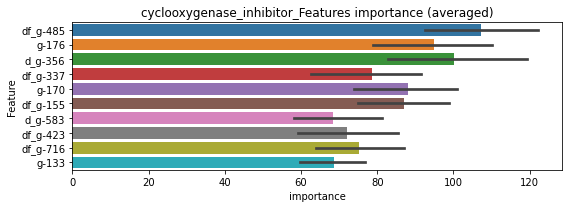

len(train_index) : 2188
len(valid_index) : 730
================================= fold 1/4 cyclooxygenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000705467	valid_1's binary_logloss: 0.00328189
[2000]	training's binary_logloss: 0.000402576	valid_1's binary_logloss: 0.002667
[3000]	training's binary_logloss: 0.000312917	valid_1's binary_logloss: 0.00245399
[4000]	training's binary_logloss: 0.000272312	valid_1's binary_logloss: 0.0023406
Early stopping, best iteration is:
[4782]	training's binary_logloss: 0.000255104	valid_1's binary_logloss: 0.00229889


len(train_index) : 2188
len(valid_index) : 730
================================= fold 2/4 cyclooxygenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00072818	valid_1's binary_logloss: 0.00214665
[2000]	training's binary_logloss: 0.000413404	valid_1's binary_logloss: 0.00142807
[3000]	training's binary_logloss: 0.000318276	valid_1's binary_logloss: 0.0011726
[4000]	training's binary_logloss: 0.000276283	valid_1's binary_logloss: 0.00105317
[5000]	training's binary_logloss: 0.000253895	valid_1's binary_logloss: 0.000989136
[6000]	training's binary_logloss: 0.00023882	valid_1's binary_logloss: 0.000948487
[7000]	training's binary_logloss: 0.000227301	valid_1's binary_logloss: 0.00091332
Early stopping, best iteration is:
[7043]	training's binary_logloss: 0.000227071	valid_1's binary_logloss: 0.000912397


len(train_index) : 2189
len(valid_index) : 729
================================= fold 3/4 cyclooxygenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00071617	valid_1's binary_logloss: 0.0034241
[2000]	training's binary_logloss: 0.000407969	valid_1's binary_logloss: 0.00260053
[3000]	training's binary_logloss: 0.000315646	valid_1's binary_logloss: 0.00231609
[4000]	training's binary_logloss: 0.000274248	valid_1's binary_logloss: 0.00218069
[5000]	training's binary_logloss: 0.00025298	valid_1's binary_logloss: 0.00211203
[6000]	training's binary_logloss: 0.000238975	valid_1's binary_logloss: 0.00206247
[7000]	training's binary_logloss: 0.000229297	valid_1's binary_logloss: 0.0020268
[8000]	training's binary_logloss: 0.000222217	valid_1's binary_logloss: 0.00200101
Early stopping, best iteration is:
[7973]	training's binary_logloss: 0.000222417	valid_1's binary_logloss: 0.00200083


len(train_index) : 2189
len(valid_index) : 729
================================= fold 4/4 cyclooxygenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000697611	valid_1's binary_logloss: 0.00491475
[2000]	training's binary_logloss: 0.000401019	valid_1's binary_logloss: 0.00423157
[3000]	training's binary_logloss: 0.000312176	valid_1's binary_logloss: 0.00401373
[4000]	training's binary_logloss: 0.000271765	valid_1's binary_logloss: 0.0039068
Early stopping, best iteration is:
[4898]	training's binary_logloss: 0.000251793	valid_1's binary_logloss: 0.00384532


cyclooxygenase_inhibitor logloss: 0.0022640944266725076


neg labels: 3289 → selected neg labels: 3273


cytochrome_p450_inhibitor, len(trt): 104, len(othr): 3273
target_rate: 0.0043672 → Adj_target_rate: 0.0043519
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0116968	valid_1's binary_logloss: 0.0867548
[600]	training's binary_logloss: 0.00182497	valid_1's binary_logloss: 0.0744692
Early stopping, best iteration is:
[600]	training's binary_logloss: 0.00182497	valid_1's binary_logloss: 0.0744692
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0113917	valid_1's binary_logloss: 0.0883901
Early stopping, best iteration is:
[478]	training's binary_logloss: 0.00310072	valid_1's binary_logloss: 0.0808449
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0120878	valid_1's binary_logloss: 0.0517754
[600]	training's binary_logloss: 0.00189897	valid_1's binary_logloss: 0.0336996
Early stopping, best iteration is:
[846]	training's binary_logloss: 0.00102183	valid_1's binary_logloss: 0.0316239
Training until validation scores don't improve for 30 rounds
[300]	training

1 / 3 AUC score:0.996
y_Threshold: 0.0129123, Threshold: 0.0461187, pos_neg_ratio: 0.8000000
Remove_noisy_data: 156 → Positive_corect_labels: 642/3771
p_label_rate: 0.0100452 Vs.target_rate: 0.00437
Num_p_label: 40.0, conf_0:0.03228, conf_1:0.05995
Num_p_label: 40.0, Expected: 17.4, Adj_threshold_1: 0.0461187
Num_p_label: 16.0, Expected: 17.4, Adj_threshold_2: 0.0761187
threshold: 0.0761187, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 642.0/3771, y_label_rate: 0.1702466
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0094384	valid_1's binary_logloss: 0.0791314
Early stopping, best iteration is:
[483]	training's binary_logloss: 0.00257218	valid_1's binary_logloss: 0.0737486
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00960388	valid_1's binary_logloss: 0.0620214
[600]	training's binary_logloss: 0.00157959	valid_1's binary_logloss: 0.0506101
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.00160245	valid_1's binary_logloss: 0.0505476
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00998	valid_1's binary_logloss: 0.0609644
Early stopping, best iteration is:
[505]	training's binary_logloss: 0.00243093	valid_1's binary_logloss: 0.0529178
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00997444	valid_1's binary_logloss: 0.0640355
[600]	training'

2 / 3 AUC score:0.997
y_Threshold: 0.0351924, Threshold: 0.0761187, pos_neg_ratio: 0.8000000
Remove_noisy_data: 36 → Positive_corect_labels: 624.0/3735
p_label_rate: 0.0133099 Vs.target_rate: 0.00437
Num_p_label: 53.0, conf_0:0.06089, conf_1:0.09134
Num_p_label: 53.0, Expected: 17.4, Adj_threshold_1: 0.0761187
Num_p_label: 35.0, Expected: 17.4, Adj_threshold_2: 0.1061187
Num_p_label: 31.0, Expected: 17.4, Adj_threshold_3: 0.1361187
Num_p_label: 27.0, Expected: 17.4, Adj_threshold_4: 0.1661187
Num_p_label: 23.0, Expected: 17.4, Adj_threshold_5: 0.1961187
threshold: 0.1961187, positive_p_label: 23.0/3982, p_label_rate: 0.0057760
positive_y_label: 624.0/3735, y_label_rate: 0.1670683
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00856068	valid_1's binary_logloss: 0.0482571
[600]	training's binary_logloss: 0.00145589	valid_1's binary_logloss: 0.0357582
Early stopping, best iteration is:
[769]	training's binary_logloss: 0.000959177	valid_1's binary_logloss: 0.034284
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00830187	valid_1's binary_logloss: 0.0569586
[600]	training's binary_logloss: 0.00142332	valid_1's binary_logloss: 0.0439781
Early stopping, best iteration is:
[669]	training's binary_logloss: 0.00116458	valid_1's binary_logloss: 0.0431661
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00895276	valid_1's binary_logloss: 0.0461766
[600]	training's binary_logloss: 0.00148987	valid_1's binary_logloss: 0.0326684
Early stopping, best iteration is:
[672]	training's binary_logloss: 0.00120859	valid_1's binary_logloss: 0.

3 / 3 AUC score:1.000
y_Threshold: 0.0388534, Threshold: 0.1961187, pos_neg_ratio: 0.8000000
Remove_noisy_data: 14 → Positive_corect_labels: 617.0/3721
p_label_rate: 0.0070316 Vs.target_rate: 0.00437
Num_p_label: 28.0, conf_0:0.17651, conf_1:0.21573
Num_p_label: 28.0, Expected: 17.4, Adj_threshold_1: 0.1961187
Num_p_label: 27.0, Expected: 17.4, Adj_threshold_2: 0.2261187
Num_p_label: 24.0, Expected: 17.4, Adj_threshold_3: 0.2561187
threshold: 0.2561187, positive_p_label: 24.0/3982, p_label_rate: 0.0060271
positive_y_label: 617.0/3721, y_label_rate: 0.1658156


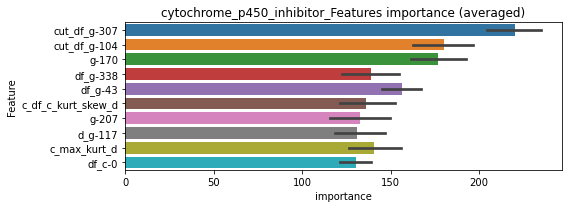

len(train_index) : 2790
len(valid_index) : 931
================================= fold 1/4 cytochrome_p450_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000578313	valid_1's binary_logloss: 0.00472204
Early stopping, best iteration is:
[1625]	training's binary_logloss: 0.000378535	valid_1's binary_logloss: 0.00439234


len(train_index) : 2791
len(valid_index) : 930
================================= fold 2/4 cytochrome_p450_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000583642	valid_1's binary_logloss: 0.0017883
[2000]	training's binary_logloss: 0.000332791	valid_1's binary_logloss: 0.00144084
[3000]	training's binary_logloss: 0.000259025	valid_1's binary_logloss: 0.00132867
[4000]	training's binary_logloss: 0.00022533	valid_1's binary_logloss: 0.00127705
[5000]	training's binary_logloss: 0.000208177	valid_1's binary_logloss: 0.00124807
Early stopping, best iteration is:
[5633]	training's binary_logloss: 0.000200193	valid_1's binary_logloss: 0.00123329


len(train_index) : 2791
len(valid_index) : 930
================================= fold 3/4 cytochrome_p450_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000576524	valid_1's binary_logloss: 0.00230585
Early stopping, best iteration is:
[1685]	training's binary_logloss: 0.000369695	valid_1's binary_logloss: 0.00205387


len(train_index) : 2791
len(valid_index) : 930
================================= fold 4/4 cytochrome_p450_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000570035	valid_1's binary_logloss: 0.0011375
[2000]	training's binary_logloss: 0.000330776	valid_1's binary_logloss: 0.000740278
[3000]	training's binary_logloss: 0.000259683	valid_1's binary_logloss: 0.000617564
[4000]	training's binary_logloss: 0.000226398	valid_1's binary_logloss: 0.000560176
[5000]	training's binary_logloss: 0.000208893	valid_1's binary_logloss: 0.000527862
Early stopping, best iteration is:
[5893]	training's binary_logloss: 0.000198526	valid_1's binary_logloss: 0.000508612


cytochrome_p450_inhibitor logloss: 0.0020486110100486486


neg labels: 3289 → selected neg labels: 3281


dihydrofolate_reductase_inhibitor, len(trt): 36, len(othr): 3281
target_rate: 0.0015117 → Adj_target_rate: 0.0017663
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00287319	valid_1's binary_logloss: 0.0108774
[600]	training's binary_logloss: 0.000582604	valid_1's binary_logloss: 0.00534355
Early stopping, best iteration is:
[694]	training's binary_logloss: 0.000512705	valid_1's binary_logloss: 0.00517379
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00281292	valid_1's binary_logloss: 0.006186
[600]	training's binary_logloss: 0.000589655	valid_1's binary_logloss: 0.00194833
Early stopping, best iteration is:
[703]	training's binary_logloss: 0.000516966	valid_1's binary_logloss: 0.00177103
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00281807	valid_1's binary_logloss: 0.00576936
[600]	training's binary_logloss: 0.000591116	valid_1's binary_logloss: 0.00165548
Early stopping, best iteration is:
[676]	training's binary_logloss: 0.00052528	valid_1's binary_l

1 / 3 AUC score:1.000
y_Threshold: 0.0040885, Threshold: 0.0128500, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, conf_0:0.00899, conf_1:0.01670
Num_p_label: 40.0, Expected: 6.0, Adj_threshold_1: 0.0128500
Num_p_label: 7.0, Expected: 6.0, Adj_threshold_2: 0.0428500
threshold: 0.0428500, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00258287	valid_1's binary_logloss: 0.00854115
[600]	training's binary_logloss: 0.000558143	valid_1's binary_logloss: 0.00419322
Early stopping, best iteration is:
[632]	training's binary_logloss: 0.000524757	valid_1's binary_logloss: 0.00407656
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00274286	valid_1's binary_logloss: 0.00541143
[600]	training's binary_logloss: 0.000570887	valid_1's binary_logloss: 0.00156669
Early stopping, best iteration is:
[677]	training's binary_logloss: 0.000512873	valid_1's binary_logloss: 0.00143921
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00265196	valid_1's binary_logloss: 0.00530113
[600]	training's binary_logloss: 0.000572296	valid_1's binary_logloss: 0.0014749
Early stopping, best iteration is:
[728]	training's binary_logloss: 0.000500482	valid_1's binar

2 / 3 AUC score:1.000
y_Threshold: 0.0776631, Threshold: 0.0428500, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3805
p_label_rate: 0.0055249 Vs.target_rate: 0.00151
Num_p_label: 22.0, conf_0:0.03428, conf_1:0.05142
Num_p_label: 22.0, Expected: 6.0, Adj_threshold_1: 0.0428500
Num_p_label: 13.0, Expected: 6.0, Adj_threshold_2: 0.0728500
threshold: 0.0728500, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00258287	valid_1's binary_logloss: 0.00854115
[600]	training's binary_logloss: 0.000558143	valid_1's binary_logloss: 0.00419322
Early stopping, best iteration is:
[632]	training's binary_logloss: 0.000524757	valid_1's binary_logloss: 0.00407656
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00274286	valid_1's binary_logloss: 0.00541143
[600]	training's binary_logloss: 0.000570887	valid_1's binary_logloss: 0.00156669
Early stopping, best iteration is:
[677]	training's binary_logloss: 0.000512873	valid_1's binary_logloss: 0.00143921
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00265196	valid_1's binary_logloss: 0.00530113
[600]	training's binary_logloss: 0.000572296	valid_1's binary_logloss: 0.0014749
Early stopping, best iteration is:
[719]	training's binary_logloss: 0.000500482	valid_1's binar

3 / 3 AUC score:1.000
y_Threshold: 0.0776631, Threshold: 0.0728500, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3805
p_label_rate: 0.0032647 Vs.target_rate: 0.00151
Num_p_label: 13.0, conf_0:0.06556, conf_1:0.08013
Num_p_label: 13.0, Expected: 6.0, Adj_threshold_1: 0.0728500
threshold: 0.0728500, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 656.0/3805, y_label_rate: 0.1724047


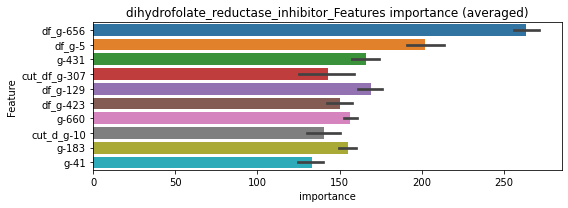

len(train_index) : 2853
len(valid_index) : 952
================================= fold 1/4 dihydrofolate_reductase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000483727	valid_1's binary_logloss: 0.0014054
Early stopping, best iteration is:
[1914]	training's binary_logloss: 0.000294715	valid_1's binary_logloss: 0.00116599


len(train_index) : 2854
len(valid_index) : 951
================================= fold 2/4 dihydrofolate_reductase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00051122	valid_1's binary_logloss: 0.000734357
[2000]	training's binary_logloss: 0.000299914	valid_1's binary_logloss: 0.000516525
[3000]	training's binary_logloss: 0.000239822	valid_1's binary_logloss: 0.000454014
Early stopping, best iteration is:
[3361]	training's binary_logloss: 0.000227441	valid_1's binary_logloss: 0.000436873


len(train_index) : 2854
len(valid_index) : 951
================================= fold 3/4 dihydrofolate_reductase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000422584	valid_1's binary_logloss: 0.000539763
[2000]	training's binary_logloss: 0.00024294	valid_1's binary_logloss: 0.00031063
[3000]	training's binary_logloss: 0.000180819	valid_1's binary_logloss: 0.000231284
[4000]	training's binary_logloss: 0.000150846	valid_1's binary_logloss: 0.000192983
[5000]	training's binary_logloss: 0.000135361	valid_1's binary_logloss: 0.00017319
[6000]	training's binary_logloss: 0.000125384	valid_1's binary_logloss: 0.000160434
[7000]	training's binary_logloss: 0.000118406	valid_1's binary_logloss: 0.00015151
[8000]	training's binary_logloss: 0.00011361	valid_1's binary_logloss: 0.000145378
[9000]	training's binary_logloss: 0.000110185	valid_1's binary_logloss: 0.000140996
[10000]	training's binary_logloss: 0.000107754	valid_1's binary_logloss: 0.000137889
Did not meet early stopping. Best iteration is:
[9999]	training's binary_logloss: 0.000107754	valid_1's

len(train_index) : 2854
len(valid_index) : 951
================================= fold 4/4 dihydrofolate_reductase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000421223	valid_1's binary_logloss: 0.000627908
[2000]	training's binary_logloss: 0.000242628	valid_1's binary_logloss: 0.000363256
[3000]	training's binary_logloss: 0.000180684	valid_1's binary_logloss: 0.000270924
[4000]	training's binary_logloss: 0.000150771	valid_1's binary_logloss: 0.000226283
[5000]	training's binary_logloss: 0.000135336	valid_1's binary_logloss: 0.000203217
[6000]	training's binary_logloss: 0.00012535	valid_1's binary_logloss: 0.000188257
[7000]	training's binary_logloss: 0.000118379	valid_1's binary_logloss: 0.000177812
[8000]	training's binary_logloss: 0.000113583	valid_1's binary_logloss: 0.000170619
[9000]	training's binary_logloss: 0.000110162	valid_1's binary_logloss: 0.00016548
[10000]	training's binary_logloss: 0.000107727	valid_1's binary_logloss: 0.000161848
Did not meet early stopping. Best iteration is:
[9999]	training's binary_logloss: 0.000107727	valid_

dihydrofolate_reductase_inhibitor logloss: 0.0004763559034639693


neg labels: 3289 → selected neg labels: 3285


dipeptidyl_peptidase_inhibitor, len(trt): 25, len(othr): 3285
target_rate: 0.0010498 → Adj_target_rate: 0.0012955
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00191935	valid_1's binary_logloss: 0.0049817
[600]	training's binary_logloss: 0.000447106	valid_1's binary_logloss: 0.00187496
Early stopping, best iteration is:
[664]	training's binary_logloss: 0.000423222	valid_1's binary_logloss: 0.00180884
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.001779	valid_1's binary_logloss: 0.0101176
[600]	training's binary_logloss: 0.00042837	valid_1's binary_logloss: 0.00576776
Early stopping, best iteration is:
[623]	training's binary_logloss: 0.00042011	valid_1's binary_logloss: 0.00571157
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00189242	valid_1's binary_logloss: 0.00360637
[600]	training's binary_logloss: 0.000440424	valid_1's binary_logloss: 0.00114679
Early stopping, best iteration is:
[659]	training's binary_logloss: 0.000413508	valid_1's binary_log

1 / 3 AUC score:1.000
y_Threshold: 0.0027557, Threshold: 0.0097038, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00105
Num_p_label: 40.0, conf_0:0.00679, conf_1:0.01261
Num_p_label: 40.0, Expected: 4.2, Adj_threshold_1: 0.0097038
Num_p_label: 3.0, Expected: 4.2, Adj_threshold_2: 0.0397038
threshold: 0.0397038, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00174266	valid_1's binary_logloss: 0.00376396
[600]	training's binary_logloss: 0.000426193	valid_1's binary_logloss: 0.00136108
Early stopping, best iteration is:
[624]	training's binary_logloss: 0.000417982	valid_1's binary_logloss: 0.00134966
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00163039	valid_1's binary_logloss: 0.00890665
Early stopping, best iteration is:
[562]	training's binary_logloss: 0.000433236	valid_1's binary_logloss: 0.00535006
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00176751	valid_1's binary_logloss: 0.00343644
[600]	training's binary_logloss: 0.000429231	valid_1's binary_logloss: 0.00114025
Early stopping, best iteration is:
[666]	training's binary_logloss: 0.000410129	valid_1's binary_logloss: 0.0011077
Training until validation scores don't improve for 30 rounds

2 / 3 AUC score:1.000
y_Threshold: 0.0868899, Threshold: 0.0397038, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0065294 Vs.target_rate: 0.00105
Num_p_label: 26.0, conf_0:0.03176, conf_1:0.04764
Num_p_label: 26.0, Expected: 4.2, Adj_threshold_1: 0.0397038
Num_p_label: 14.0, Expected: 4.2, Adj_threshold_2: 0.0697038
Num_p_label: 7.0, Expected: 4.2, Adj_threshold_3: 0.0997038
threshold: 0.0997038, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00174266	valid_1's binary_logloss: 0.00376396
[600]	training's binary_logloss: 0.000426193	valid_1's binary_logloss: 0.00136108
Early stopping, best iteration is:
[624]	training's binary_logloss: 0.000417982	valid_1's binary_logloss: 0.00134966
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00163039	valid_1's binary_logloss: 0.00890665
Early stopping, best iteration is:
[562]	training's binary_logloss: 0.000433236	valid_1's binary_logloss: 0.00535006
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00176751	valid_1's binary_logloss: 0.00343644
[600]	training's binary_logloss: 0.000429231	valid_1's binary_logloss: 0.00114025
Early stopping, best iteration is:
[690]	training's binary_logloss: 0.000410129	valid_1's binary_logloss: 0.0011077
Training until validation scores don't improve for 30 rounds

3 / 3 AUC score:1.000
y_Threshold: 0.0868899, Threshold: 0.0997038, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0017579 Vs.target_rate: 0.00105
Num_p_label: 7.0, conf_0:0.08973, conf_1:0.10967
Num_p_label: 7.0, Expected: 4.2, Adj_threshold_1: 0.0997038
threshold: 0.0997038, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


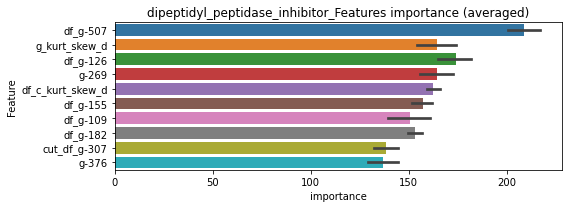

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 dipeptidyl_peptidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00045366	valid_1's binary_logloss: 0.000584341
[2000]	training's binary_logloss: 0.000273963	valid_1's binary_logloss: 0.000376319
[3000]	training's binary_logloss: 0.000219329	valid_1's binary_logloss: 0.000306868
[4000]	training's binary_logloss: 0.000192853	valid_1's binary_logloss: 0.000273723
[5000]	training's binary_logloss: 0.000178728	valid_1's binary_logloss: 0.000255667
[6000]	training's binary_logloss: 0.000169674	valid_1's binary_logloss: 0.000244198
Early stopping, best iteration is:
[6027]	training's binary_logloss: 0.000169405	valid_1's binary_logloss: 0.000243787


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 dipeptidyl_peptidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 dipeptidyl_peptidase_inhibitor=================================


Early stopping, best iteration is:
[597]	training's binary_logloss: 0.00071028	valid_1's binary_logloss: 0.00475401
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000483843	valid_1's binary_logloss: 0.001109
Early stopping, best iteration is:
[1727]	training's binary_logloss: 0.000314053	valid_1's binary_logloss: 0.000905424


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 dipeptidyl_peptidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000479176	valid_1's binary_logloss: 0.000608666
[2000]	training's binary_logloss: 0.000285874	valid_1's binary_logloss: 0.000409265
[3000]	training's binary_logloss: 0.000231044	valid_1's binary_logloss: 0.000352575
[4000]	training's binary_logloss: 0.000205083	valid_1's binary_logloss: 0.000322699
Early stopping, best iteration is:
[4013]	training's binary_logloss: 0.000204998	valid_1's binary_logloss: 0.000322603


dipeptidyl_peptidase_inhibitor logloss: 0.0015569875266706287


neg labels: 3289 → selected neg labels: 3289


diuretic, len(trt): 6, len(othr): 3289
target_rate: 0.0002520 → Adj_target_rate: 0.0003851
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000451838	valid_1's binary_logloss: 0.00200348
Early stopping, best iteration is:
[493]	training's binary_logloss: 0.000211497	valid_1's binary_logloss: 0.00134505
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000441424	valid_1's binary_logloss: 0.00512716
Early stopping, best iteration is:
[457]	training's binary_logloss: 0.000222674	valid_1's binary_logloss: 0.00462596
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00046279	valid_1's binary_logloss: 0.000528512
Early stopping, best iteration is:
[500]	training's binary_logloss: 0.000216451	valid_1's binary_logloss: 0.000248505
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00044046	valid_1's binary_logloss: 0.00108678


1 / 3 AUC score:1.000
y_Threshold: 0.0005966, Threshold: 0.0021048, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00025
Num_p_label: 40.0, conf_0:0.00147, conf_1:0.00274
Num_p_label: 40.0, Expected: 1.0, Adj_threshold_1: 0.0021048
Num_p_label: 0.0, Expected: 1.0, Adj_threshold_2: 0.0321048
threshold: 0.0321048, positive_p_label: 0.0/3982, p_label_rate: 0.0000000


Early stopping, best iteration is:
[457]	training's binary_logloss: 0.000223707	valid_1's binary_logloss: 0.000634179


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000429919	valid_1's binary_logloss: 0.00136041
Early stopping, best iteration is:
[480]	training's binary_logloss: 0.000202876	valid_1's binary_logloss: 0.000929489
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000419256	valid_1's binary_logloss: 0.00499574
Early stopping, best iteration is:
[491]	training's binary_logloss: 0.00020721	valid_1's binary_logloss: 0.00451195
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000427918	valid_1's binary_logloss: 0.000458637
Early stopping, best iteration is:
[493]	training's binary_logloss: 0.000204109	valid_1's binary_logloss: 0.000222301
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000420022	valid_1's binary_logloss: 0.000439811


2 / 3 AUC score:1.000
y_Threshold: 0.0058532, Threshold: 0.0321048, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0007534 Vs.target_rate: 0.00025
Num_p_label: 3.0, conf_0:0.02568, conf_1:0.03853
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_1: 0.0321048
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_2: 0.0621048
threshold: 0.0621048, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[495]	training's binary_logloss: 0.000207754	valid_1's binary_logloss: 0.000216569


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000429919	valid_1's binary_logloss: 0.00136041
Early stopping, best iteration is:
[480]	training's binary_logloss: 0.000202876	valid_1's binary_logloss: 0.000929489
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000419256	valid_1's binary_logloss: 0.00499574
Early stopping, best iteration is:
[491]	training's binary_logloss: 0.00020721	valid_1's binary_logloss: 0.00451195
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000427918	valid_1's binary_logloss: 0.000458637
Early stopping, best iteration is:
[493]	training's binary_logloss: 0.000204109	valid_1's binary_logloss: 0.000222301
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000420022	valid_1's binary_logloss: 0.000439811


3 / 3 AUC score:1.000
y_Threshold: 0.0058532, Threshold: 0.0621048, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0005023 Vs.target_rate: 0.00025
Num_p_label: 2.0, conf_0:0.05589, conf_1:0.06832
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_1: 0.0621048
threshold: 0.0621048, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[495]	training's binary_logloss: 0.000207754	valid_1's binary_logloss: 0.000216569


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


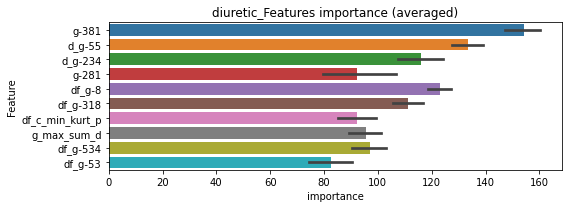

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 diuretic=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000341985	valid_1's binary_logloss: 0.000844536
[2000]	training's binary_logloss: 0.000210721	valid_1's binary_logloss: 0.000715305
Early stopping, best iteration is:
[2279]	training's binary_logloss: 0.000198485	valid_1's binary_logloss: 0.000705429


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 diuretic=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000340975	valid_1's binary_logloss: 0.00281
Early stopping, best iteration is:
[1297]	training's binary_logloss: 0.000279041	valid_1's binary_logloss: 0.00272172


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 diuretic=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000350393	valid_1's binary_logloss: 0.000437732
[2000]	training's binary_logloss: 0.000216474	valid_1's binary_logloss: 0.000300152
[3000]	training's binary_logloss: 0.000184224	valid_1's binary_logloss: 0.000265637
[4000]	training's binary_logloss: 0.000169287	valid_1's binary_logloss: 0.000247956
[5000]	training's binary_logloss: 0.000160739	valid_1's binary_logloss: 0.000238281
[6000]	training's binary_logloss: 0.00015483	valid_1's binary_logloss: 0.0002312
[7000]	training's binary_logloss: 0.000150474	valid_1's binary_logloss: 0.000226139
Early stopping, best iteration is:
[7404]	training's binary_logloss: 0.000149211	valid_1's binary_logloss: 0.000224551


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 diuretic=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000353281	valid_1's binary_logloss: 0.00037124
[2000]	training's binary_logloss: 0.000218742	valid_1's binary_logloss: 0.000238428
[3000]	training's binary_logloss: 0.000187675	valid_1's binary_logloss: 0.000205905
[4000]	training's binary_logloss: 0.000172203	valid_1's binary_logloss: 0.000191216
[5000]	training's binary_logloss: 0.000163134	valid_1's binary_logloss: 0.000182191
[6000]	training's binary_logloss: 0.000157001	valid_1's binary_logloss: 0.000175798
[7000]	training's binary_logloss: 0.000152354	valid_1's binary_logloss: 0.000170089
[8000]	training's binary_logloss: 0.000148977	valid_1's binary_logloss: 0.000165069
Early stopping, best iteration is:
[8266]	training's binary_logloss: 0.000148256	valid_1's binary_logloss: 0.000164003


diuretic logloss: 0.0009539113536681824


neg labels: 3289 → selected neg labels: 3280


dna_alkylating_agent, len(trt): 48, len(othr): 3280
target_rate: 0.0020156 → Adj_target_rate: 0.0022556
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00356816	valid_1's binary_logloss: 0.0236732
[600]	training's binary_logloss: 0.000722593	valid_1's binary_logloss: 0.017632
Early stopping, best iteration is:
[723]	training's binary_logloss: 0.00058566	valid_1's binary_logloss: 0.017379
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00384597	valid_1's binary_logloss: 0.0217293
[600]	training's binary_logloss: 0.00074635	valid_1's binary_logloss: 0.0135671
Early stopping, best iteration is:
[745]	training's binary_logloss: 0.000600322	valid_1's binary_logloss: 0.0131571
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00401939	valid_1's binary_logloss: 0.00776001
[600]	training's binary_logloss: 0.000781904	valid_1's binary_logloss: 0.0024126
Early stopping, best iteration is:
[790]	training's binary_logloss: 0.000595587	valid_1's binary_logloss:

1 / 3 AUC score:1.000
y_Threshold: 0.0043448, Threshold: 0.0952444, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 655/3802
p_label_rate: 0.0100452 Vs.target_rate: 0.00202
Num_p_label: 40.0, conf_0:0.06667, conf_1:0.12382
Num_p_label: 40.0, Expected: 8.0, Adj_threshold_1: 0.0952444
Num_p_label: 36.0, Expected: 8.0, Adj_threshold_2: 0.1252444
Num_p_label: 33.0, Expected: 8.0, Adj_threshold_3: 0.1552444
Num_p_label: 30.0, Expected: 8.0, Adj_threshold_4: 0.1852444
Num_p_label: 28.0, Expected: 8.0, Adj_threshold_5: 0.2152444
Num_p_label: 28.0, Expected: 8.0, Adj_threshold_6: 0.2452444
Num_p_label: 25.0, Expected: 8.0, Adj_threshold_7: 0.2752444
Num_p_label: 22.0, Expected: 8.0, Adj_threshold_8: 0.3052444
Num_p_label: 20.0, Expected: 8.0, Adj_threshold_9: 0.3352444
threshold: 0.3352444, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 655.0/3802, y_label_rate: 0.1722777
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00322904	valid_1's binary_logloss: 0.025669
[600]	training's binary_logloss: 0.000667792	valid_1's binary_logloss: 0.0185802
Early stopping, best iteration is:
[668]	training's binary_logloss: 0.000582468	valid_1's binary_logloss: 0.018091
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00342698	valid_1's binary_logloss: 0.0146508
[600]	training's binary_logloss: 0.000704374	valid_1's binary_logloss: 0.00897384
Early stopping, best iteration is:
[733]	training's binary_logloss: 0.000572786	valid_1's binary_logloss: 0.00857353
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00339294	valid_1's binary_logloss: 0.0138803
[600]	training's binary_logloss: 0.000694266	valid_1's binary_logloss: 0.00704226
Early stopping, best iteration is:
[698]	training's binary_logloss: 0.000582042	valid_1's binary_logl

2 / 3 AUC score:1.000
y_Threshold: 0.0488813, Threshold: 0.3352444, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 652.0/3796
p_label_rate: 0.0143144 Vs.target_rate: 0.00202
Num_p_label: 57.0, conf_0:0.26820, conf_1:0.40229
Num_p_label: 57.0, Expected: 8.0, Adj_threshold_1: 0.3352444
Num_p_label: 54.0, Expected: 8.0, Adj_threshold_2: 0.3652444
Num_p_label: 53.0, Expected: 8.0, Adj_threshold_3: 0.3952444
Num_p_label: 51.0, Expected: 8.0, Adj_threshold_4: 0.4252444
Num_p_label: 49.0, Expected: 8.0, Adj_threshold_5: 0.4552444
Num_p_label: 48.0, Expected: 8.0, Adj_threshold_6: 0.4852444
Num_p_label: 44.0, Expected: 8.0, Adj_threshold_7: 0.5152444
Num_p_label: 41.0, Expected: 8.0, Adj_threshold_8: 0.5452444
Num_p_label: 40.0, Expected: 8.0, Adj_threshold_9: 0.5752444
Num_p_label: 39.0, Expected: 8.0, Adj_threshold_10: 0.6052444
threshold: 0.6352444, positive_p_label: 38.0/3982, p_label_rate: 0.0095429
positive_y_label: 652.0/3796, y_label_rate: 0.1717597
===========

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00306594	valid_1's binary_logloss: 0.017442
[600]	training's binary_logloss: 0.000659043	valid_1's binary_logloss: 0.0105722
Early stopping, best iteration is:
[720]	training's binary_logloss: 0.000551959	valid_1's binary_logloss: 0.0101924
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00318866	valid_1's binary_logloss: 0.0220268
[600]	training's binary_logloss: 0.000664446	valid_1's binary_logloss: 0.0146302
Early stopping, best iteration is:
[638]	training's binary_logloss: 0.000610612	valid_1's binary_logloss: 0.0144072
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00331966	valid_1's binary_logloss: 0.0120067
[600]	training's binary_logloss: 0.000687211	valid_1's binary_logloss: 0.00628591
Early stopping, best iteration is:
[785]	training's binary_logloss: 0.000554171	valid_1's binary_loglo

3 / 3 AUC score:1.000
y_Threshold: 0.1465009, Threshold: 0.6352444, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 651.0/3794
p_label_rate: 0.0102963 Vs.target_rate: 0.00202
Num_p_label: 41.0, conf_0:0.50000, conf_1:0.69877
Num_p_label: 41.0, Expected: 8.0, Adj_threshold_1: 0.6352444
Num_p_label: 39.0, Expected: 8.0, Adj_threshold_2: 0.6652444
Num_p_label: 38.0, Expected: 8.0, Adj_threshold_3: 0.6952444
Num_p_label: 36.0, Expected: 8.0, Adj_threshold_4: 0.7252444
Num_p_label: 36.0, Expected: 8.0, Adj_threshold_5: 0.7552444
Num_p_label: 33.0, Expected: 8.0, Adj_threshold_6: 0.7852444
threshold: 0.7852444, positive_p_label: 33.0/3982, p_label_rate: 0.0082873
positive_y_label: 651.0/3794, y_label_rate: 0.1715867


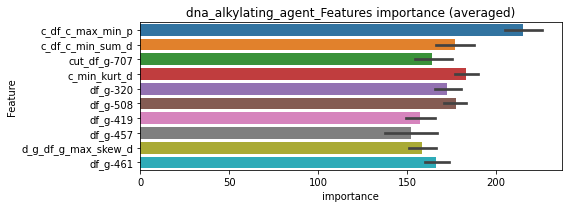

len(train_index) : 2845
len(valid_index) : 949
================================= fold 1/4 dna_alkylating_agent=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000510949	valid_1's binary_logloss: 0.000925273
[2000]	training's binary_logloss: 0.000297059	valid_1's binary_logloss: 0.000675776
[3000]	training's binary_logloss: 0.000235985	valid_1's binary_logloss: 0.00059598
[4000]	training's binary_logloss: 0.000205573	valid_1's binary_logloss: 0.000553778
Early stopping, best iteration is:
[4125]	training's binary_logloss: 0.000202849	valid_1's binary_logloss: 0.000549646


len(train_index) : 2845
len(valid_index) : 949
================================= fold 2/4 dna_alkylating_agent=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000513031	valid_1's binary_logloss: 0.0017582
Early stopping, best iteration is:
[1765]	training's binary_logloss: 0.000323474	valid_1's binary_logloss: 0.00148292


len(train_index) : 2846
len(valid_index) : 948
================================= fold 3/4 dna_alkylating_agent=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000499827	valid_1's binary_logloss: 0.00179482
[2000]	training's binary_logloss: 0.000291452	valid_1's binary_logloss: 0.00151626
Early stopping, best iteration is:
[2934]	training's binary_logloss: 0.000228519	valid_1's binary_logloss: 0.00142766


len(train_index) : 2846
len(valid_index) : 948
================================= fold 4/4 dna_alkylating_agent=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000513592	valid_1's binary_logloss: 0.00294749
Early stopping, best iteration is:
[1412]	training's binary_logloss: 0.00038031	valid_1's binary_logloss: 0.00281977


dna_alkylating_agent logloss: 0.001571544464135761


neg labels: 3289 → selected neg labels: 3248


dna_inhibitor, len(trt): 402, len(othr): 3248
target_rate: 0.0168808 → Adj_target_rate: 0.0137338
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[186]	training's binary_logloss: 0.105368	valid_1's binary_logloss: 0.363215
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[246]	training's binary_logloss: 0.0774843	valid_1's binary_logloss: 0.338394
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0550634	valid_1's binary_logloss: 0.327706
Early stopping, best iteration is:
[277]	training's binary_logloss: 0.0632445	valid_1's binary_logloss: 0.326851
Training until validation scores don't improve for 30 rounds


1 / 3 AUC score:0.809
y_Threshold: 0.1362144, Threshold: 0.4643792, pos_neg_ratio: 0.8000000
Remove_noisy_data: 637 → Positive_corect_labels: 396/3260
p_label_rate: 0.0100452 Vs.target_rate: 0.01688
Num_p_label: 40.0, conf_0:0.32507, conf_1:0.60369
Num_p_label: 40.0, Expected: 67.2, Adj_threshold_1: 0.4643792
Num_p_label: 44.0, Expected: 67.2, Adj_threshold_2: 0.4343792
Num_p_label: 57.0, Expected: 67.2, Adj_threshold_3: 0.4043792
threshold: 0.4043792, positive_p_label: 57.0/3982, p_label_rate: 0.0143144


[300]	training's binary_logloss: 0.0608116	valid_1's binary_logloss: 0.323195
Early stopping, best iteration is:
[274]	training's binary_logloss: 0.070426	valid_1's binary_logloss: 0.322771


positive_y_label: 396.0/3260, y_label_rate: 0.1214724
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[253]	training's binary_logloss: 0.0206122	valid_1's binary_logloss: 0.186669
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.015989	valid_1's binary_logloss: 0.158275
Early stopping, best iteration is:
[477]	training's binary_logloss: 0.00486368	valid_1's binary_logloss: 0.152573
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0157209	valid_1's binary_logloss: 0.177095
Early stopping, best iteration is:
[329]	training's binary_logloss: 0.0124683	valid_1's binary_logloss: 0.176733
Training until validation scores don't improve for 30 rounds


2 / 3 AUC score:0.967
y_Threshold: 0.0798796, Threshold: 0.4043792, pos_neg_ratio: 0.8000000
Remove_noisy_data: 150 → Positive_corect_labels: 321.0/3110
p_label_rate: 0.0266198 Vs.target_rate: 0.01688
Num_p_label: 106.0, conf_0:0.32350, conf_1:0.48526
Num_p_label: 106.0, Expected: 67.2, Adj_threshold_1: 0.4043792
Num_p_label: 102.0, Expected: 67.2, Adj_threshold_2: 0.4343792
Num_p_label: 99.0, Expected: 67.2, Adj_threshold_3: 0.4643792
threshold: 0.4643792, positive_p_label: 99.0/3982, p_label_rate: 0.0248619


Early stopping, best iteration is:
[263]	training's binary_logloss: 0.0206615	valid_1's binary_logloss: 0.181175


positive_y_label: 321.0/3110, y_label_rate: 0.1032154
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00937382	valid_1's binary_logloss: 0.139903
Early stopping, best iteration is:
[364]	training's binary_logloss: 0.00572618	valid_1's binary_logloss: 0.137866
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[216]	training's binary_logloss: 0.0196275	valid_1's binary_logloss: 0.164546
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[269]	training's binary_logloss: 0.0107085	valid_1's binary_logloss: 0.151531
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00897443	valid_1's binary_logloss: 0.112274


3 / 3 AUC score:0.979
y_Threshold: 0.0718633, Threshold: 0.4643792, pos_neg_ratio: 0.8000000
Remove_noisy_data: 94 → Positive_corect_labels: 274.0/3016
p_label_rate: 0.0273732 Vs.target_rate: 0.01688
Num_p_label: 109.0, conf_0:0.41794, conf_1:0.51082
Num_p_label: 109.0, Expected: 67.2, Adj_threshold_1: 0.4643792
Num_p_label: 102.0, Expected: 67.2, Adj_threshold_2: 0.4943792
Num_p_label: 98.0, Expected: 67.2, Adj_threshold_3: 0.5243792
threshold: 0.5243792, positive_p_label: 98.0/3982, p_label_rate: 0.0246107


Early stopping, best iteration is:
[321]	training's binary_logloss: 0.00766677	valid_1's binary_logloss: 0.110811


positive_y_label: 274.0/3016, y_label_rate: 0.0908488


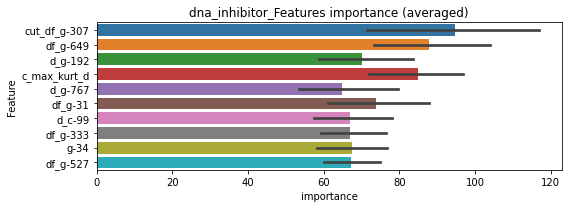

len(train_index) : 2262
len(valid_index) : 754
================================= fold 1/4 dna_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000666085	valid_1's binary_logloss: 0.00385524
Early stopping, best iteration is:
[1216]	training's binary_logloss: 0.000566507	valid_1's binary_logloss: 0.0036426


len(train_index) : 2262
len(valid_index) : 754
================================= fold 2/4 dna_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000682422	valid_1's binary_logloss: 0.00521588
[2000]	training's binary_logloss: 0.000388601	valid_1's binary_logloss: 0.0046118
[3000]	training's binary_logloss: 0.00030134	valid_1's binary_logloss: 0.00438441
[4000]	training's binary_logloss: 0.000260604	valid_1's binary_logloss: 0.00427088
[5000]	training's binary_logloss: 0.000239517	valid_1's binary_logloss: 0.00421108
Early stopping, best iteration is:
[5641]	training's binary_logloss: 0.000229455	valid_1's binary_logloss: 0.00417185


len(train_index) : 2262
len(valid_index) : 754
================================= fold 3/4 dna_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2262
len(valid_index) : 754
================================= fold 4/4 dna_inhibitor=================================


Early stopping, best iteration is:
[737]	training's binary_logloss: 0.000890018	valid_1's binary_logloss: 0.00402505
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000689396	valid_1's binary_logloss: 0.00618294
[2000]	training's binary_logloss: 0.000392192	valid_1's binary_logloss: 0.00559438
Early stopping, best iteration is:
[2708]	training's binary_logloss: 0.000322197	valid_1's binary_logloss: 0.005484


dna_inhibitor logloss: 0.004333234084630496


neg labels: 3289 → selected neg labels: 3272


dopamine_receptor_agonist, len(trt): 121, len(othr): 3272
target_rate: 0.0050810 → Adj_target_rate: 0.0049495
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0120715	valid_1's binary_logloss: 0.130591
Early stopping, best iteration is:
[375]	training's binary_logloss: 0.00649454	valid_1's binary_logloss: 0.124832
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0134434	valid_1's binary_logloss: 0.0731775
Early stopping, best iteration is:
[562]	training's binary_logloss: 0.00243836	valid_1's binary_logloss: 0.0580571
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0131636	valid_1's binary_logloss: 0.0664956
[600]	training's binary_logloss: 0.00207931	valid_1's binary_logloss: 0.0474712
Early stopping, best iteration is:
[766]	training's binary_logloss: 0.00130082	valid_1's binary_logloss: 0.0460905
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0135364	valid_1's binary_logloss: 0.0746422
[600]	training's 

1 / 3 AUC score:0.993
y_Threshold: 0.0234536, Threshold: 0.0909314, pos_neg_ratio: 0.8000000
Remove_noisy_data: 172 → Positive_corect_labels: 634/3754
p_label_rate: 0.0100452 Vs.target_rate: 0.00508
Num_p_label: 40.0, conf_0:0.06365, conf_1:0.11821
Num_p_label: 40.0, Expected: 20.2, Adj_threshold_1: 0.0909314
Num_p_label: 29.0, Expected: 20.2, Adj_threshold_2: 0.1209314
threshold: 0.1209314, positive_p_label: 29.0/3982, p_label_rate: 0.0072828
positive_y_label: 634.0/3754, y_label_rate: 0.1688865
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00988816	valid_1's binary_logloss: 0.0675468
[600]	training's binary_logloss: 0.00168982	valid_1's binary_logloss: 0.0546111
Early stopping, best iteration is:
[677]	training's binary_logloss: 0.00134692	valid_1's binary_logloss: 0.0537933
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00996593	valid_1's binary_logloss: 0.0840425
[600]	training's binary_logloss: 0.00165559	valid_1's binary_logloss: 0.0649714
Early stopping, best iteration is:
[696]	training's binary_logloss: 0.00124403	valid_1's binary_logloss: 0.0637991
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0103125	valid_1's binary_logloss: 0.0663201
[600]	training's binary_logloss: 0.00171228	valid_1's binary_logloss: 0.04818
Early stopping, best iteration is:
[830]	training's binary_logloss: 0.000986215	valid_1's binary_logloss: 0.04

2 / 3 AUC score:0.998
y_Threshold: 0.0376084, Threshold: 0.1209314, pos_neg_ratio: 0.8000000
Remove_noisy_data: 28 → Positive_corect_labels: 620.0/3726
p_label_rate: 0.0130588 Vs.target_rate: 0.00508
Num_p_label: 52.0, conf_0:0.09675, conf_1:0.14512
Num_p_label: 52.0, Expected: 20.2, Adj_threshold_1: 0.1209314
Num_p_label: 38.0, Expected: 20.2, Adj_threshold_2: 0.1509314
Num_p_label: 31.0, Expected: 20.2, Adj_threshold_3: 0.1809314
Num_p_label: 29.0, Expected: 20.2, Adj_threshold_4: 0.2109314
threshold: 0.2109314, positive_p_label: 29.0/3982, p_label_rate: 0.0072828
positive_y_label: 620.0/3726, y_label_rate: 0.1663983
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00907591	valid_1's binary_logloss: 0.0705185
[600]	training's binary_logloss: 0.00156452	valid_1's binary_logloss: 0.055113
Early stopping, best iteration is:
[632]	training's binary_logloss: 0.00141334	valid_1's binary_logloss: 0.054548
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0100031	valid_1's binary_logloss: 0.0552593
[600]	training's binary_logloss: 0.00166355	valid_1's binary_logloss: 0.040483
[900]	training's binary_logloss: 0.00086702	valid_1's binary_logloss: 0.0373729
Early stopping, best iteration is:
[940]	training's binary_logloss: 0.000829195	valid_1's binary_logloss: 0.0370265
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0087457	valid_1's binary_logloss: 0.0592861
Early stopping, best iteration is:
[568]	training's binary_logloss: 0.00171059	valid_1's binary_logloss: 0.0453

3 / 3 AUC score:0.999
y_Threshold: 0.0426613, Threshold: 0.2109314, pos_neg_ratio: 0.8000000
Remove_noisy_data: 18 → Positive_corect_labels: 611.0/3708
p_label_rate: 0.0067805 Vs.target_rate: 0.00508
Num_p_label: 27.0, conf_0:0.18984, conf_1:0.23202
threshold: 0.2109314, positive_p_label: 27.0/3982, p_label_rate: 0.0067805
positive_y_label: 611.0/3708, y_label_rate: 0.1647789


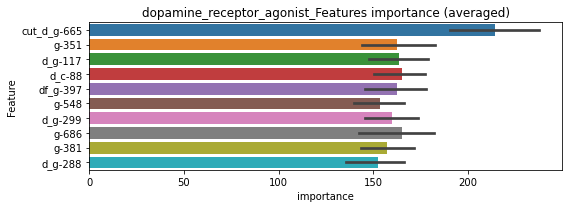

len(train_index) : 2781
len(valid_index) : 927
================================= fold 1/4 dopamine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000578367	valid_1's binary_logloss: 0.000840832
[2000]	training's binary_logloss: 0.000331398	valid_1's binary_logloss: 0.000466499
[3000]	training's binary_logloss: 0.000259204	valid_1's binary_logloss: 0.000346988
[4000]	training's binary_logloss: 0.000225852	valid_1's binary_logloss: 0.000290522
[5000]	training's binary_logloss: 0.000209019	valid_1's binary_logloss: 0.000261126
[6000]	training's binary_logloss: 0.000197544	valid_1's binary_logloss: 0.000240432
[7000]	training's binary_logloss: 0.000189641	valid_1's binary_logloss: 0.000226752
[8000]	training's binary_logloss: 0.000183735	valid_1's binary_logloss: 0.000217483
Early stopping, best iteration is:
[8469]	training's binary_logloss: 0.00018158	valid_1's binary_logloss: 0.000214069


len(train_index) : 2781
len(valid_index) : 927
================================= fold 2/4 dopamine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000570453	valid_1's binary_logloss: 0.00212103
Early stopping, best iteration is:
[1095]	training's binary_logloss: 0.000525411	valid_1's binary_logloss: 0.00204434


len(train_index) : 2781
len(valid_index) : 927
================================= fold 3/4 dopamine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000568629	valid_1's binary_logloss: 0.00180211
Early stopping, best iteration is:
[1397]	training's binary_logloss: 0.0004227	valid_1's binary_logloss: 0.00161272


len(train_index) : 2781
len(valid_index) : 927
================================= fold 4/4 dopamine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000569895	valid_1's binary_logloss: 0.00364308
[2000]	training's binary_logloss: 0.000320446	valid_1's binary_logloss: 0.00333117
Early stopping, best iteration is:
[2822]	training's binary_logloss: 0.000253019	valid_1's binary_logloss: 0.00324077


dopamine_receptor_agonist logloss: 0.0017792142094678932


neg labels: 3289 → selected neg labels: 3231


dopamine_receptor_antagonist, len(trt): 424, len(othr): 3231
target_rate: 0.0178047 → Adj_target_rate: 0.0143701
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[216]	training's binary_logloss: 0.0970756	valid_1's binary_logloss: 0.379337
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[224]	training's binary_logloss: 0.10035	valid_1's binary_logloss: 0.370648
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0707896	valid_1's binary_logloss: 0.346922
Early stopping, best iteration is:
[333]	training's binary_logloss: 0.0590855	valid_1's binary_logloss: 0.346086
Training until validation scores don't improve for 30 rounds


1 / 3 AUC score:0.750
y_Threshold: 0.1395251, Threshold: 0.5335646, pos_neg_ratio: 0.8000000
Remove_noisy_data: 730 → Positive_corect_labels: 346/3147
p_label_rate: 0.0100452 Vs.target_rate: 0.01780
Num_p_label: 40.0, conf_0:0.37350, conf_1:0.69363
Num_p_label: 40.0, Expected: 70.9, Adj_threshold_1: 0.5335646
Num_p_label: 46.0, Expected: 70.9, Adj_threshold_2: 0.5035646
Num_p_label: 60.0, Expected: 70.9, Adj_threshold_3: 0.4735646


Early stopping, best iteration is:
[201]	training's binary_logloss: 0.106192	valid_1's binary_logloss: 0.381831


threshold: 0.4735646, positive_p_label: 60.0/3982, p_label_rate: 0.0150678
positive_y_label: 346.0/3147, y_label_rate: 0.1099460
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0163329	valid_1's binary_logloss: 0.166448
Early stopping, best iteration is:
[398]	training's binary_logloss: 0.0078122	valid_1's binary_logloss: 0.158883
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0172828	valid_1's binary_logloss: 0.145862
Early stopping, best iteration is:
[381]	training's binary_logloss: 0.00923526	valid_1's binary_logloss: 0.141054
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0158468	valid_1's binary_logloss: 0.193998
Early stopping, best iteration is:
[311]	training's binary_logloss: 0.0144316	valid_1's binary_logloss: 0.193462
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.016419	valid_1's binary_logloss: 0.173113


2 / 3 AUC score:0.954
y_Threshold: 0.0737785, Threshold: 0.4735646, pos_neg_ratio: 0.8000000
Remove_noisy_data: 144 → Positive_corect_labels: 274.0/3003
p_label_rate: 0.0399297 Vs.target_rate: 0.01780
Num_p_label: 159.0, conf_0:0.37885, conf_1:0.56828
Num_p_label: 159.0, Expected: 70.9, Adj_threshold_1: 0.4735646
Num_p_label: 157.0, Expected: 70.9, Adj_threshold_2: 0.5035646
Num_p_label: 151.0, Expected: 70.9, Adj_threshold_3: 0.5335646
Num_p_label: 146.0, Expected: 70.9, Adj_threshold_4: 0.5635646
Num_p_label: 142.0, Expected: 70.9, Adj_threshold_5: 0.5935646
Num_p_label: 135.0, Expected: 70.9, Adj_threshold_6: 0.6235646
Num_p_label: 129.0, Expected: 70.9, Adj_threshold_7: 0.6535646
Num_p_label: 121.0, Expected: 70.9, Adj_threshold_8: 0.6835646
Num_p_label: 116.0, Expected: 70.9, Adj_threshold_9: 0.7135646
Num_p_label: 109.0, Expected: 70.9, Adj_threshold_10: 0.7435646
threshold: 0.7735646, positive_p_label: 98.0/3982, p_label_rate: 0.0246107


Early stopping, best iteration is:
[329]	training's binary_logloss: 0.0130795	valid_1's binary_logloss: 0.171205


positive_y_label: 274.0/3003, y_label_rate: 0.0912421
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00802213	valid_1's binary_logloss: 0.126715
Early stopping, best iteration is:
[411]	training's binary_logloss: 0.00356821	valid_1's binary_logloss: 0.124165
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00800471	valid_1's binary_logloss: 0.117185
Early stopping, best iteration is:
[376]	training's binary_logloss: 0.00445451	valid_1's binary_logloss: 0.115057
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00874055	valid_1's binary_logloss: 0.111307
Early stopping, best iteration is:
[378]	training's binary_logloss: 0.00470501	valid_1's binary_logloss: 0.109776
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00813287	valid_1's binary_logloss: 0.107868


3 / 3 AUC score:0.979
y_Threshold: 0.0438938, Threshold: 0.7735646, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[494]	training's binary_logloss: 0.00227257	valid_1's binary_logloss: 0.100386


Remove_noisy_data: 68 → Positive_corect_labels: 240.0/2935
p_label_rate: 0.0426921 Vs.target_rate: 0.01780
Num_p_label: 170.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 170.0, Expected: 70.9, Adj_threshold_1: 0.7735646
threshold: 0.7735646, positive_p_label: 170.0/3982, p_label_rate: 0.0426921
positive_y_label: 240.0/2935, y_label_rate: 0.0817717


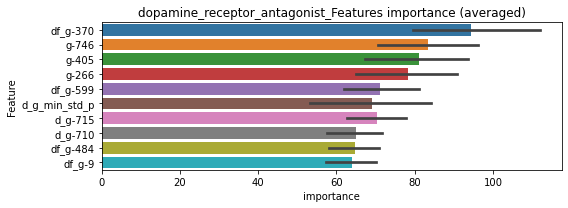

len(train_index) : 2201
len(valid_index) : 734
================================= fold 1/4 dopamine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000686865	valid_1's binary_logloss: 0.0044706
Early stopping, best iteration is:
[1155]	training's binary_logloss: 0.000605919	valid_1's binary_logloss: 0.00434329


len(train_index) : 2201
len(valid_index) : 734
================================= fold 2/4 dopamine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000715807	valid_1's binary_logloss: 0.00629617
Early stopping, best iteration is:
[1167]	training's binary_logloss: 0.000625298	valid_1's binary_logloss: 0.00616042


len(train_index) : 2201
len(valid_index) : 734
================================= fold 3/4 dopamine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000694377	valid_1's binary_logloss: 0.00322946
Early stopping, best iteration is:
[1586]	training's binary_logloss: 0.000465365	valid_1's binary_logloss: 0.002743


len(train_index) : 2202
len(valid_index) : 733
================================= fold 4/4 dopamine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000695012	valid_1's binary_logloss: 0.00624854
Early stopping, best iteration is:
[1696]	training's binary_logloss: 0.000447158	valid_1's binary_logloss: 0.00558155


dopamine_receptor_antagonist logloss: 0.004708428602851199


neg labels: 3289 → selected neg labels: 3242


egfr_inhibitor, len(trt): 336, len(othr): 3242
target_rate: 0.0141093 → Adj_target_rate: 0.0117920
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0522696	valid_1's binary_logloss: 0.291899
Early stopping, best iteration is:
[328]	training's binary_logloss: 0.0443984	valid_1's binary_logloss: 0.290707
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0525542	valid_1's binary_logloss: 0.287288
Early stopping, best iteration is:
[355]	training's binary_logloss: 0.0372523	valid_1's binary_logloss: 0.283862
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0536025	valid_1's binary_logloss: 0.29898
Early stopping, best iteration is:
[314]	training's binary_logloss: 0.0489187	valid_1's binary_logloss: 0.297571
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0561548	valid_1's binary_logloss: 0.31441


1 / 3 AUC score:0.851
y_Threshold: 0.1120887, Threshold: 0.7604934, pos_neg_ratio: 0.8000000
Remove_noisy_data: 532 → Positive_corect_labels: 447/3358
p_label_rate: 0.0100452 Vs.target_rate: 0.01411
Num_p_label: 40.0, conf_0:0.50000, conf_1:0.80000
threshold: 0.7604934, positive_p_label: 40.0/3982, p_label_rate: 0.0100452


Early stopping, best iteration is:
[315]	training's binary_logloss: 0.0512546	valid_1's binary_logloss: 0.31267


positive_y_label: 447.0/3358, y_label_rate: 0.1331149
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0209673	valid_1's binary_logloss: 0.181327
Early stopping, best iteration is:
[417]	training's binary_logloss: 0.00880447	valid_1's binary_logloss: 0.174915
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0209796	valid_1's binary_logloss: 0.145469
Early stopping, best iteration is:
[537]	training's binary_logloss: 0.00430961	valid_1's binary_logloss: 0.129964
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0205486	valid_1's binary_logloss: 0.178484
Early stopping, best iteration is:
[410]	training's binary_logloss: 0.00912254	valid_1's binary_logloss: 0.173617
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0209157	valid_1's binary_logloss: 0.167713


2 / 3 AUC score:0.962
y_Threshold: 0.0841486, Threshold: 0.7604934, pos_neg_ratio: 0.8000000
Remove_noisy_data: 140 → Positive_corect_labels: 377.0/3218
p_label_rate: 0.0306379 Vs.target_rate: 0.01411
Num_p_label: 122.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 122.0, Expected: 56.2, Adj_threshold_1: 0.7604934
Num_p_label: 119.0, Expected: 56.2, Adj_threshold_2: 0.7904934
threshold: 0.7904934, positive_p_label: 119.0/3982, p_label_rate: 0.0298845


Early stopping, best iteration is:
[406]	training's binary_logloss: 0.00968058	valid_1's binary_logloss: 0.157674


positive_y_label: 377.0/3218, y_label_rate: 0.1171535
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0144994	valid_1's binary_logloss: 0.119285
[600]	training's binary_logloss: 0.00234054	valid_1's binary_logloss: 0.0969447
Early stopping, best iteration is:
[683]	training's binary_logloss: 0.00178615	valid_1's binary_logloss: 0.0956621
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.014501	valid_1's binary_logloss: 0.0979612
[600]	training's binary_logloss: 0.00233257	valid_1's binary_logloss: 0.0816953
Early stopping, best iteration is:
[616]	training's binary_logloss: 0.00219839	valid_1's binary_logloss: 0.0813907
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0147157	valid_1's binary_logloss: 0.110226
[600]	training's binary_logloss: 0.00230091	valid_1's binary_logloss: 0.0947986
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.00233463	valid_1's binary_logloss: 0.094731

3 / 3 AUC score:0.990
y_Threshold: 0.0599535, Threshold: 0.7904934, pos_neg_ratio: 0.8000000
Remove_noisy_data: 68 → Positive_corect_labels: 343.0/3150


Early stopping, best iteration is:
[386]	training's binary_logloss: 0.00658504	valid_1's binary_logloss: 0.138755


p_label_rate: 0.0341537 Vs.target_rate: 0.01411
Num_p_label: 136.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 136.0, Expected: 56.2, Adj_threshold_1: 0.7904934
threshold: 0.7904934, positive_p_label: 136.0/3982, p_label_rate: 0.0341537
positive_y_label: 343.0/3150, y_label_rate: 0.1088889


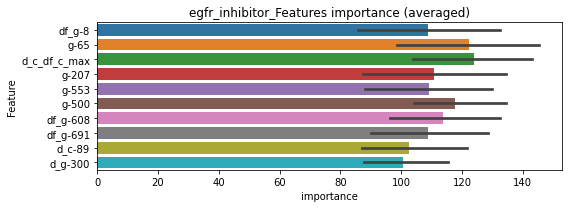

len(train_index) : 2362
len(valid_index) : 788
================================= fold 1/4 egfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000687351	valid_1's binary_logloss: 0.00633123
Early stopping, best iteration is:
[1507]	training's binary_logloss: 0.000473941	valid_1's binary_logloss: 0.00608259


len(train_index) : 2362
len(valid_index) : 788
================================= fold 2/4 egfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000684322	valid_1's binary_logloss: 0.0047328
[2000]	training's binary_logloss: 0.000386107	valid_1's binary_logloss: 0.00411626
[3000]	training's binary_logloss: 0.000299018	valid_1's binary_logloss: 0.00392642
Early stopping, best iteration is:
[3349]	training's binary_logloss: 0.000281123	valid_1's binary_logloss: 0.00387799


len(train_index) : 2363
len(valid_index) : 787
================================= fold 3/4 egfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000674553	valid_1's binary_logloss: 0.0019506
[2000]	training's binary_logloss: 0.000382092	valid_1's binary_logloss: 0.00136225
[3000]	training's binary_logloss: 0.000296655	valid_1's binary_logloss: 0.00115809
Early stopping, best iteration is:
[3738]	training's binary_logloss: 0.000263321	valid_1's binary_logloss: 0.00108365


len(train_index) : 2363
len(valid_index) : 787
================================= fold 4/4 egfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000691099	valid_1's binary_logloss: 0.00629437
Early stopping, best iteration is:
[1139]	training's binary_logloss: 0.000614439	valid_1's binary_logloss: 0.0061841


egfr_inhibitor logloss: 0.004308354009351572


neg labels: 3289 → selected neg labels: 3284


elastase_inhibitor, len(trt): 12, len(othr): 3284
target_rate: 0.0005039 → Adj_target_rate: 0.0006942
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000674965	valid_1's binary_logloss: 0.00314428
Early stopping, best iteration is:
[522]	training's binary_logloss: 0.000281375	valid_1's binary_logloss: 0.00236875
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000691696	valid_1's binary_logloss: 0.00237504
Early stopping, best iteration is:
[489]	training's binary_logloss: 0.000280372	valid_1's binary_logloss: 0.00142504
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00072453	valid_1's binary_logloss: 0.000843119
Early stopping, best iteration is:
[490]	training's binary_logloss: 0.000285757	valid_1's binary_logloss: 0.000355038
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000710472	valid_1's binary_logloss: 0.00115284


1 / 3 AUC score:1.000
y_Threshold: 0.0011288, Threshold: 0.0031146, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00050
Num_p_label: 40.0, conf_0:0.00218, conf_1:0.00405
Num_p_label: 40.0, Expected: 2.0, Adj_threshold_1: 0.0031146
Num_p_label: 0.0, Expected: 2.0, Adj_threshold_2: 0.0331146
threshold: 0.0331146, positive_p_label: 0.0/3982, p_label_rate: 0.0000000


Early stopping, best iteration is:
[499]	training's binary_logloss: 0.000283523	valid_1's binary_logloss: 0.000581534


positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000657595	valid_1's binary_logloss: 0.00338292
Early stopping, best iteration is:
[505]	training's binary_logloss: 0.000267156	valid_1's binary_logloss: 0.0026808
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000662761	valid_1's binary_logloss: 0.00251884
Early stopping, best iteration is:
[495]	training's binary_logloss: 0.000269212	valid_1's binary_logloss: 0.00170795
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000700913	valid_1's binary_logloss: 0.00078334
Early stopping, best iteration is:
[494]	training's binary_logloss: 0.000277722	valid_1's binary_logloss: 0.000326225
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000672315	valid_1's binary_logloss: 0.00116149


2 / 3 AUC score:1.000
y_Threshold: 0.0387641, Threshold: 0.0331146, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0002511 Vs.target_rate: 0.00050
Num_p_label: 1.0, conf_0:0.02649, conf_1:0.03974
Num_p_label: 1.0, Expected: 2.0, Adj_threshold_1: 0.0331146
threshold: 0.0331146, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[529]	training's binary_logloss: 0.000272148	valid_1's binary_logloss: 0.000610654


positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000657595	valid_1's binary_logloss: 0.00338292
Early stopping, best iteration is:
[505]	training's binary_logloss: 0.000267156	valid_1's binary_logloss: 0.0026808
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000662761	valid_1's binary_logloss: 0.00251884
Early stopping, best iteration is:
[495]	training's binary_logloss: 0.000269212	valid_1's binary_logloss: 0.00170795
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000700913	valid_1's binary_logloss: 0.00078334
Early stopping, best iteration is:
[509]	training's binary_logloss: 0.000277722	valid_1's binary_logloss: 0.000326225
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000672315	valid_1's binary_logloss: 0.00116149


3 / 3 AUC score:1.000
y_Threshold: 0.0387641, Threshold: 0.0331146, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0002511 Vs.target_rate: 0.00050


Early stopping, best iteration is:
[519]	training's binary_logloss: 0.000272148	valid_1's binary_logloss: 0.000610654


Num_p_label: 1.0, conf_0:0.02980, conf_1:0.03643
Num_p_label: 1.0, Expected: 2.0, Adj_threshold_1: 0.0331146
threshold: 0.0331146, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


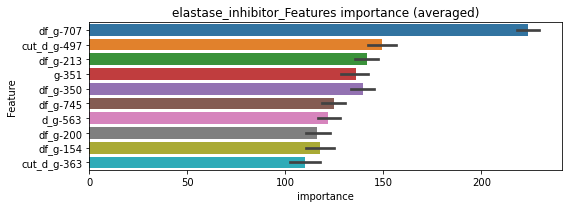

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 elastase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000394464	valid_1's binary_logloss: 0.00229111
Early stopping, best iteration is:
[1330]	training's binary_logloss: 0.00031551	valid_1's binary_logloss: 0.0021397


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 elastase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000393392	valid_1's binary_logloss: 0.000685754
[2000]	training's binary_logloss: 0.000240034	valid_1's binary_logloss: 0.000478055
[3000]	training's binary_logloss: 0.00019689	valid_1's binary_logloss: 0.000410444
[4000]	training's binary_logloss: 0.000177883	valid_1's binary_logloss: 0.000379313
[5000]	training's binary_logloss: 0.000167522	valid_1's binary_logloss: 0.000361476
[6000]	training's binary_logloss: 0.000160585	valid_1's binary_logloss: 0.000349096
[7000]	training's binary_logloss: 0.000155518	valid_1's binary_logloss: 0.000339886
Early stopping, best iteration is:
[7672]	training's binary_logloss: 0.000152589	valid_1's binary_logloss: 0.00033448


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 elastase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000404016	valid_1's binary_logloss: 0.000332623
[2000]	training's binary_logloss: 0.000247027	valid_1's binary_logloss: 0.00019388
[3000]	training's binary_logloss: 0.000205024	valid_1's binary_logloss: 0.000155132
[4000]	training's binary_logloss: 0.000186413	valid_1's binary_logloss: 0.000136941
[5000]	training's binary_logloss: 0.000177128	valid_1's binary_logloss: 0.00012771
[6000]	training's binary_logloss: 0.000170843	valid_1's binary_logloss: 0.000121333
[7000]	training's binary_logloss: 0.000165785	valid_1's binary_logloss: 0.000116358
[8000]	training's binary_logloss: 0.00016204	valid_1's binary_logloss: 0.000112651
Early stopping, best iteration is:
[8562]	training's binary_logloss: 0.000160271	valid_1's binary_logloss: 0.000110945


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 elastase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00034061	valid_1's binary_logloss: 0.000371351
[2000]	training's binary_logloss: 0.000213512	valid_1's binary_logloss: 0.000232949
[3000]	training's binary_logloss: 0.000167646	valid_1's binary_logloss: 0.00018285
[4000]	training's binary_logloss: 0.000143638	valid_1's binary_logloss: 0.000156638
[5000]	training's binary_logloss: 0.000130767	valid_1's binary_logloss: 0.00014259
[6000]	training's binary_logloss: 0.00012223	valid_1's binary_logloss: 0.000133276
[7000]	training's binary_logloss: 0.000116203	valid_1's binary_logloss: 0.000126698
[8000]	training's binary_logloss: 0.000112004	valid_1's binary_logloss: 0.000122118
[9000]	training's binary_logloss: 0.000109027	valid_1's binary_logloss: 0.000118869
[10000]	training's binary_logloss: 0.00010686	valid_1's binary_logloss: 0.000116504
Did not meet early stopping. Best iteration is:
[9999]	training's binary_logloss: 0.00010686	valid_1's 

elastase_inhibitor logloss: 0.0006754074259129206


neg labels: 3289 → selected neg labels: 3287


erbb2_inhibitor, len(trt): 20, len(othr): 3287
target_rate: 0.0008398 → Adj_target_rate: 0.0010717
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0015438	valid_1's binary_logloss: 0.00396995
[600]	training's binary_logloss: 0.000405869	valid_1's binary_logloss: 0.00227267
Early stopping, best iteration is:
[629]	training's binary_logloss: 0.000396006	valid_1's binary_logloss: 0.00224958
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00155091	valid_1's binary_logloss: 0.00493844
[600]	training's binary_logloss: 0.000397922	valid_1's binary_logloss: 0.00245013
Early stopping, best iteration is:
[605]	training's binary_logloss: 0.000396933	valid_1's binary_logloss: 0.00244997
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00161193	valid_1's binary_logloss: 0.00292892
[600]	training's binary_logloss: 0.000406555	valid_1's binary_logloss: 0.000949421
Early stopping, best iteration is:
[655]	training's binary_logloss: 0.000391157	valid_1's bina

1 / 3 AUC score:1.000


[600]	training's binary_logloss: 0.000407173	valid_1's binary_logloss: 0.00102722
Early stopping, best iteration is:
[620]	training's binary_logloss: 0.000401554	valid_1's binary_logloss: 0.0010173


y_Threshold: 0.0024758, Threshold: 0.0078775, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00084
Num_p_label: 40.0, conf_0:0.00551, conf_1:0.01024
Num_p_label: 40.0, Expected: 3.3, Adj_threshold_1: 0.0078775
Num_p_label: 2.0, Expected: 3.3, Adj_threshold_2: 0.0378775
threshold: 0.0378775, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00145085	valid_1's binary_logloss: 0.00313357
[600]	training's binary_logloss: 0.000392476	valid_1's binary_logloss: 0.00158311
Early stopping, best iteration is:
[622]	training's binary_logloss: 0.000386575	valid_1's binary_logloss: 0.00156913
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0014688	valid_1's binary_logloss: 0.00428038
[600]	training's binary_logloss: 0.000389432	valid_1's binary_logloss: 0.0018722
Early stopping, best iteration is:
[662]	training's binary_logloss: 0.000379802	valid_1's binary_logloss: 0.00185142
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00144613	valid_1's binary_logloss: 0.00227509
[600]	training's binary_logloss: 0.000394028	valid_1's binary_logloss: 0.000745621
Early stopping, best iteration is:
[649]	training's binary_logloss: 0.000384509	valid_1's binar

2 / 3 AUC score:1.000
y_Threshold: 0.1080179, Threshold: 0.0378775, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0035158 Vs.target_rate: 0.00084
Num_p_label: 14.0, conf_0:0.03030, conf_1:0.04545
Num_p_label: 14.0, Expected: 3.3, Adj_threshold_1: 0.0378775
Num_p_label: 4.0, Expected: 3.3, Adj_threshold_2: 0.0678775
threshold: 0.0678775, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00145085	valid_1's binary_logloss: 0.00313357
[600]	training's binary_logloss: 0.000392476	valid_1's binary_logloss: 0.00158311
Early stopping, best iteration is:
[622]	training's binary_logloss: 0.000386575	valid_1's binary_logloss: 0.00156913
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0014688	valid_1's binary_logloss: 0.00428038
[600]	training's binary_logloss: 0.000389432	valid_1's binary_logloss: 0.0018722
Early stopping, best iteration is:
[666]	training's binary_logloss: 0.000379802	valid_1's binary_logloss: 0.00185142
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00144613	valid_1's binary_logloss: 0.00227509
[600]	training's binary_logloss: 0.000394028	valid_1's binary_logloss: 0.000745621
Early stopping, best iteration is:
[649]	training's binary_logloss: 0.000384509	valid_1's binar

3 / 3 AUC score:1.000
y_Threshold: 0.1080179, Threshold: 0.0678775, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0010045 Vs.target_rate: 0.00084
Num_p_label: 4.0, conf_0:0.06109, conf_1:0.07467
threshold: 0.0678775, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


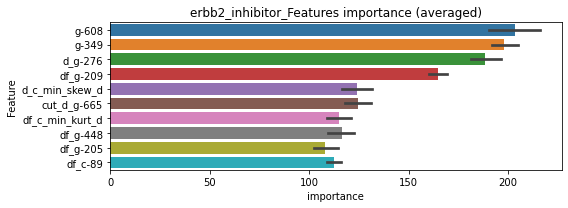

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 erbb2_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000390355	valid_1's binary_logloss: 0.000484432
[2000]	training's binary_logloss: 0.000233075	valid_1's binary_logloss: 0.000289959
[3000]	training's binary_logloss: 0.000176449	valid_1's binary_logloss: 0.000219668
[4000]	training's binary_logloss: 0.000148435	valid_1's binary_logloss: 0.000184863
[5000]	training's binary_logloss: 0.000133734	valid_1's binary_logloss: 0.000166581
[6000]	training's binary_logloss: 0.000124191	valid_1's binary_logloss: 0.00015471
[7000]	training's binary_logloss: 0.000117527	valid_1's binary_logloss: 0.000146419
[8000]	training's binary_logloss: 0.000112917	valid_1's binary_logloss: 0.000140683
[9000]	training's binary_logloss: 0.000109643	valid_1's binary_logloss: 0.000136609
[10000]	training's binary_logloss: 0.000107295	valid_1's binary_logloss: 0.000133691
Did not meet early stopping. Best iteration is:
[9999]	training's binary_logloss: 0.000107295	valid

len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 erbb2_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 erbb2_inhibitor=================================


Early stopping, best iteration is:
[840]	training's binary_logloss: 0.000527705	valid_1's binary_logloss: 0.00369485
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000390671	valid_1's binary_logloss: 0.000451769
[2000]	training's binary_logloss: 0.000233434	valid_1's binary_logloss: 0.000270925
[3000]	training's binary_logloss: 0.000176592	valid_1's binary_logloss: 0.000205221
[4000]	training's binary_logloss: 0.000148482	valid_1's binary_logloss: 0.00017267
[5000]	training's binary_logloss: 0.000133772	valid_1's binary_logloss: 0.000155614
[6000]	training's binary_logloss: 0.000124249	valid_1's binary_logloss: 0.000144565
[7000]	training's binary_logloss: 0.000117558	valid_1's binary_logloss: 0.000136798
[8000]	training's binary_logloss: 0.000112944	valid_1's binary_logloss: 0.000131441
[9000]	training's binary_logloss: 0.000109643	valid_1's binary_logloss: 0.000127609
[10000]	training's binary_logloss: 0.000107288	valid_1's binary_log

len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 erbb2_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000464351	valid_1's binary_logloss: 0.000832445
[2000]	training's binary_logloss: 0.000272383	valid_1's binary_logloss: 0.00059371
[3000]	training's binary_logloss: 0.000214258	valid_1's binary_logloss: 0.000510179
[4000]	training's binary_logloss: 0.000189023	valid_1's binary_logloss: 0.000469612
[5000]	training's binary_logloss: 0.000175607	valid_1's binary_logloss: 0.000447545
Early stopping, best iteration is:
[5369]	training's binary_logloss: 0.000172047	valid_1's binary_logloss: 0.000441441


erbb2_inhibitor logloss: 0.0010987433604473284


neg labels: 3289 → selected neg labels: 3270


estrogen_receptor_agonist, len(trt): 158, len(othr): 3270
target_rate: 0.0066348 → Adj_target_rate: 0.0062095
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0193536	valid_1's binary_logloss: 0.147453
Early stopping, best iteration is:
[420]	training's binary_logloss: 0.00782943	valid_1's binary_logloss: 0.141129
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0189744	valid_1's binary_logloss: 0.143072
Early stopping, best iteration is:
[333]	training's binary_logloss: 0.0146058	valid_1's binary_logloss: 0.141407
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0194433	valid_1's binary_logloss: 0.0984002
[600]	training's binary_logloss: 0.00310932	valid_1's binary_logloss: 0.0863867
Early stopping, best iteration is:
[652]	training's binary_logloss: 0.00255381	valid_1's binary_logloss: 0.0854367
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0193793	valid_1's binary_logloss: 0.148186


1 / 3 AUC score:0.970
y_Threshold: 0.0377932, Threshold: 0.2855701, pos_neg_ratio: 0.8000000
Remove_noisy_data: 233 → Positive_corect_labels: 603/3691
p_label_rate: 0.0100452 Vs.target_rate: 0.00663
Num_p_label: 40.0, conf_0:0.19990, conf_1:0.37124
Num_p_label: 40.0, Expected: 26.4, Adj_threshold_1: 0.2855701
Num_p_label: 38.0, Expected: 26.4, Adj_threshold_2: 0.3155701
threshold: 0.3155701, positive_p_label: 38.0/3982, p_label_rate: 0.0095429


Early stopping, best iteration is:
[322]	training's binary_logloss: 0.0163746	valid_1's binary_logloss: 0.146797


positive_y_label: 603.0/3691, y_label_rate: 0.1633704
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0114085	valid_1's binary_logloss: 0.106829
Early stopping, best iteration is:
[443]	training's binary_logloss: 0.00396467	valid_1's binary_logloss: 0.101874
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0126258	valid_1's binary_logloss: 0.077719
Early stopping, best iteration is:
[489]	training's binary_logloss: 0.00336929	valid_1's binary_logloss: 0.0675232
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0129914	valid_1's binary_logloss: 0.0787479
[600]	training's binary_logloss: 0.00208591	valid_1's binary_logloss: 0.0657679
Early stopping, best iteration is:
[773]	training's binary_logloss: 0.00128204	valid_1's binary_logloss: 0.0644024
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.012596	valid_1's binary_logloss: 0.0765015
[600]	training's bi

2 / 3 AUC score:0.997
y_Threshold: 0.0446904, Threshold: 0.3155701, pos_neg_ratio: 0.8000000
Remove_noisy_data: 50 → Positive_corect_labels: 578.0/3641
p_label_rate: 0.0175791 Vs.target_rate: 0.00663
Num_p_label: 70.0, conf_0:0.25246, conf_1:0.37868
Num_p_label: 70.0, Expected: 26.4, Adj_threshold_1: 0.3155701
Num_p_label: 65.0, Expected: 26.4, Adj_threshold_2: 0.3455701
Num_p_label: 63.0, Expected: 26.4, Adj_threshold_3: 0.3755701
Num_p_label: 58.0, Expected: 26.4, Adj_threshold_4: 0.4055701
Num_p_label: 56.0, Expected: 26.4, Adj_threshold_5: 0.4355701
Num_p_label: 55.0, Expected: 26.4, Adj_threshold_6: 0.4655701
Num_p_label: 48.0, Expected: 26.4, Adj_threshold_7: 0.4955701
Num_p_label: 46.0, Expected: 26.4, Adj_threshold_8: 0.5255701
Num_p_label: 43.0, Expected: 26.4, Adj_threshold_9: 0.5555701
Num_p_label: 41.0, Expected: 26.4, Adj_threshold_10: 0.5855701
threshold: 0.6155701, positive_p_label: 38.0/3982, p_label_rate: 0.0095429
positive_y_label: 578.0/3641, y_label_rate: 0.1587476


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00970771	valid_1's binary_logloss: 0.0699591
Early stopping, best iteration is:
[468]	training's binary_logloss: 0.00294944	valid_1's binary_logloss: 0.0621947
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00988907	valid_1's binary_logloss: 0.0849504
Early stopping, best iteration is:
[556]	training's binary_logloss: 0.00198536	valid_1's binary_logloss: 0.0750317
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0101044	valid_1's binary_logloss: 0.064184
Early stopping, best iteration is:
[556]	training's binary_logloss: 0.00201562	valid_1's binary_logloss: 0.0536814
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0101096	valid_1's binary_logloss: 0.0743316


3 / 3 AUC score:0.997
y_Threshold: 0.0437551, Threshold: 0.6155701, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[465]	training's binary_logloss: 0.00312327	valid_1's binary_logloss: 0.0662933


Remove_noisy_data: 36 → Positive_corect_labels: 560.0/3605
p_label_rate: 0.0123054 Vs.target_rate: 0.00663
Num_p_label: 49.0, conf_0:0.50000, conf_1:0.67713
Num_p_label: 49.0, Expected: 26.4, Adj_threshold_1: 0.6155701
Num_p_label: 48.0, Expected: 26.4, Adj_threshold_2: 0.6455701
Num_p_label: 43.0, Expected: 26.4, Adj_threshold_3: 0.6755701
Num_p_label: 40.0, Expected: 26.4, Adj_threshold_4: 0.7055701
Num_p_label: 37.0, Expected: 26.4, Adj_threshold_5: 0.7355701
threshold: 0.7355701, positive_p_label: 37.0/3982, p_label_rate: 0.0092918
positive_y_label: 560.0/3605, y_label_rate: 0.1553398


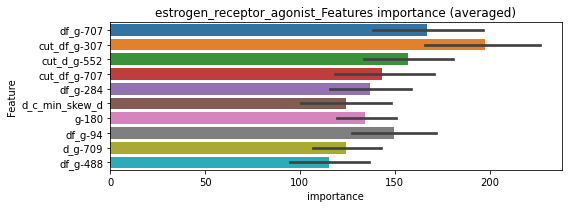

len(train_index) : 2703
len(valid_index) : 902
================================= fold 1/4 estrogen_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000597124	valid_1's binary_logloss: 0.00441867
Early stopping, best iteration is:
[1630]	training's binary_logloss: 0.000389329	valid_1's binary_logloss: 0.00418095


len(train_index) : 2704
len(valid_index) : 901
================================= fold 2/4 estrogen_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[510]	training's binary_logloss: 0.00116893	valid_1's binary_logloss: 0.00997907


len(train_index) : 2704
len(valid_index) : 901
================================= fold 3/4 estrogen_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000571641	valid_1's binary_logloss: 0.00083919
[2000]	training's binary_logloss: 0.000326771	valid_1's binary_logloss: 0.000491586
[3000]	training's binary_logloss: 0.000249022	valid_1's binary_logloss: 0.00037846
[4000]	training's binary_logloss: 0.000211209	valid_1's binary_logloss: 0.000321012
[5000]	training's binary_logloss: 0.000191771	valid_1's binary_logloss: 0.000291382
[6000]	training's binary_logloss: 0.000179006	valid_1's binary_logloss: 0.000273371
[7000]	training's binary_logloss: 0.000170251	valid_1's binary_logloss: 0.000259311
[8000]	training's binary_logloss: 0.00016337	valid_1's binary_logloss: 0.000247866
[9000]	training's binary_logloss: 0.000157977	valid_1's binary_logloss: 0.000238815
Early stopping, best iteration is:
[9629]	training's binary_logloss: 0.000155126	valid_1's binary_logloss: 0.00023519


len(train_index) : 2704
len(valid_index) : 901
================================= fold 4/4 estrogen_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000607494	valid_1's binary_logloss: 0.00167606
[2000]	training's binary_logloss: 0.000340573	valid_1's binary_logloss: 0.00124611
[3000]	training's binary_logloss: 0.000259947	valid_1's binary_logloss: 0.00109994
Early stopping, best iteration is:
[3567]	training's binary_logloss: 0.000236911	valid_1's binary_logloss: 0.00105467


estrogen_receptor_agonist logloss: 0.003863511707890712


neg labels: 3289 → selected neg labels: 3283


estrogen_receptor_antagonist, len(trt): 48, len(othr): 3283
target_rate: 0.0020156 → Adj_target_rate: 0.0022556
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0040876	valid_1's binary_logloss: 0.0229457
[600]	training's binary_logloss: 0.000781551	valid_1's binary_logloss: 0.0156791
Early stopping, best iteration is:
[692]	training's binary_logloss: 0.000648222	valid_1's binary_logloss: 0.0153616
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00402621	valid_1's binary_logloss: 0.0196531
[600]	training's binary_logloss: 0.000778006	valid_1's binary_logloss: 0.0120688
Early stopping, best iteration is:
[612]	training's binary_logloss: 0.00075368	valid_1's binary_logloss: 0.0118718
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00442072	valid_1's binary_logloss: 0.0130474
[600]	training's binary_logloss: 0.000820386	valid_1's binary_logloss: 0.00537824
Early stopping, best iteration is:
[710]	training's binary_logloss: 0.000660513	valid_1's binary_loglos

1 / 3 AUC score:1.000
y_Threshold: 0.0068821, Threshold: 0.1880181, pos_neg_ratio: 0.8000000


[600]	training's binary_logloss: 0.000769874	valid_1's binary_logloss: 0.0256733
Early stopping, best iteration is:
[572]	training's binary_logloss: 0.000832661	valid_1's binary_logloss: 0.0256149


Remove_noisy_data: 134 → Positive_corect_labels: 655/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00202
Num_p_label: 40.0, conf_0:0.13161, conf_1:0.24442
Num_p_label: 40.0, Expected: 8.0, Adj_threshold_1: 0.1880181
Num_p_label: 36.0, Expected: 8.0, Adj_threshold_2: 0.2180181
Num_p_label: 33.0, Expected: 8.0, Adj_threshold_3: 0.2480181
Num_p_label: 29.0, Expected: 8.0, Adj_threshold_4: 0.2780181
Num_p_label: 28.0, Expected: 8.0, Adj_threshold_5: 0.3080181
Num_p_label: 27.0, Expected: 8.0, Adj_threshold_6: 0.3380181
Num_p_label: 24.0, Expected: 8.0, Adj_threshold_7: 0.3680181
Num_p_label: 23.0, Expected: 8.0, Adj_threshold_8: 0.3980181
Num_p_label: 22.0, Expected: 8.0, Adj_threshold_9: 0.4280181
Num_p_label: 21.0, Expected: 8.0, Adj_threshold_10: 0.4580181
threshold: 0.4880181, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 655.0/3805, y_label_rate: 0.1721419
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00363924	valid_1's binary_logloss: 0.0232268
Early stopping, best iteration is:
[497]	training's binary_logloss: 0.00101929	valid_1's binary_logloss: 0.0177445
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00397449	valid_1's binary_logloss: 0.0137911
[600]	training's binary_logloss: 0.000762557	valid_1's binary_logloss: 0.00584125
Early stopping, best iteration is:
[749]	training's binary_logloss: 0.000610155	valid_1's binary_logloss: 0.00535834
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00397351	valid_1's binary_logloss: 0.0092239
[600]	training's binary_logloss: 0.000758035	valid_1's binary_logloss: 0.0036491
Early stopping, best iteration is:
[779]	training's binary_logloss: 0.000600808	valid_1's binary_logloss: 0.00328806
Training until validation scores don't improve for 30 rounds
[300

2 / 3 AUC score:1.000
y_Threshold: 0.0304436, Threshold: 0.4880181, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 652.0/3799
p_label_rate: 0.0075339 Vs.target_rate: 0.00202
Num_p_label: 30.0, conf_0:0.39041, conf_1:0.58562
Num_p_label: 30.0, Expected: 8.0, Adj_threshold_1: 0.4880181


Early stopping, best iteration is:
[528]	training's binary_logloss: 0.000893037	valid_1's binary_logloss: 0.0332452


Num_p_label: 26.0, Expected: 8.0, Adj_threshold_2: 0.5180181
Num_p_label: 24.0, Expected: 8.0, Adj_threshold_3: 0.5480181
Num_p_label: 23.0, Expected: 8.0, Adj_threshold_4: 0.5780181
Num_p_label: 23.0, Expected: 8.0, Adj_threshold_5: 0.6080181
Num_p_label: 20.0, Expected: 8.0, Adj_threshold_6: 0.6380181
threshold: 0.6380181, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 652.0/3799, y_label_rate: 0.1716241
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00364254	valid_1's binary_logloss: 0.0186606
[600]	training's binary_logloss: 0.000717941	valid_1's binary_logloss: 0.0125354
Early stopping, best iteration is:
[646]	training's binary_logloss: 0.000647063	valid_1's binary_logloss: 0.0124807
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00380017	valid_1's binary_logloss: 0.012672
[600]	training's binary_logloss: 0.000731222	valid_1's binary_logloss: 0.00556668
Early stopping, best iteration is:
[842]	training's binary_logloss: 0.000566778	valid_1's binary_logloss: 0.00507374
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00360816	valid_1's binary_logloss: 0.016742
[600]	training's binary_logloss: 0.000730641	valid_1's binary_logloss: 0.010133
Early stopping, best iteration is:
[746]	training's binary_logloss: 0.000598252	valid_1's binary_loglos

3 / 3 AUC score:1.000
y_Threshold: 0.0391156, Threshold: 0.6380181, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[551]	training's binary_logloss: 0.000836125	valid_1's binary_logloss: 0.0105471


Remove_noisy_data: 4 → Positive_corect_labels: 650.0/3795
p_label_rate: 0.0057760 Vs.target_rate: 0.00202
Num_p_label: 23.0, conf_0:0.50000, conf_1:0.70182
Num_p_label: 23.0, Expected: 8.0, Adj_threshold_1: 0.6380181
Num_p_label: 21.0, Expected: 8.0, Adj_threshold_2: 0.6680181
Num_p_label: 19.0, Expected: 8.0, Adj_threshold_3: 0.6980181
threshold: 0.6980181, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 650.0/3795, y_label_rate: 0.1712780


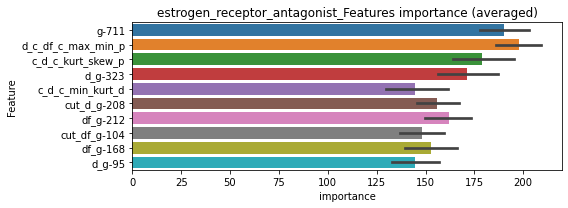

len(train_index) : 2846
len(valid_index) : 949
================================= fold 1/4 estrogen_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000436957	valid_1's binary_logloss: 0.000643748
[2000]	training's binary_logloss: 0.000246964	valid_1's binary_logloss: 0.000364989
[3000]	training's binary_logloss: 0.000182696	valid_1's binary_logloss: 0.000270288
[4000]	training's binary_logloss: 0.000151974	valid_1's binary_logloss: 0.000225011
[5000]	training's binary_logloss: 0.000136222	valid_1's binary_logloss: 0.000201773
[6000]	training's binary_logloss: 0.000126006	valid_1's binary_logloss: 0.000186648
[7000]	training's binary_logloss: 0.000118895	valid_1's binary_logloss: 0.000176122
[8000]	training's binary_logloss: 0.000114004	valid_1's binary_logloss: 0.000168877
[9000]	training's binary_logloss: 0.000110552	valid_1's binary_logloss: 0.000163767
[10000]	training's binary_logloss: 0.000108089	valid_1's binary_logloss: 0.000160143
Did not meet early stopping. Best iteration is:
[9999]	training's binary_logloss: 0.000108089	vali

len(train_index) : 2846
len(valid_index) : 949
================================= fold 2/4 estrogen_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000435303	valid_1's binary_logloss: 0.00072132
[2000]	training's binary_logloss: 0.000246588	valid_1's binary_logloss: 0.000410231
[3000]	training's binary_logloss: 0.000182539	valid_1's binary_logloss: 0.000304098
[4000]	training's binary_logloss: 0.000151898	valid_1's binary_logloss: 0.000253271
[5000]	training's binary_logloss: 0.000136121	valid_1's binary_logloss: 0.000227062
[6000]	training's binary_logloss: 0.000125955	valid_1's binary_logloss: 0.000210128
[7000]	training's binary_logloss: 0.000118867	valid_1's binary_logloss: 0.000198325
[8000]	training's binary_logloss: 0.00011398	valid_1's binary_logloss: 0.000190177
[9000]	training's binary_logloss: 0.000110538	valid_1's binary_logloss: 0.00018444
[10000]	training's binary_logloss: 0.00010807	valid_1's binary_logloss: 0.000180351
Did not meet early stopping. Best iteration is:
[9999]	training's binary_logloss: 0.00010807	valid_1's

len(train_index) : 2846
len(valid_index) : 949
================================= fold 3/4 estrogen_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000437978	valid_1's binary_logloss: 0.000585224
[2000]	training's binary_logloss: 0.000247217	valid_1's binary_logloss: 0.000330993
[3000]	training's binary_logloss: 0.000182807	valid_1's binary_logloss: 0.000244919
[4000]	training's binary_logloss: 0.000152017	valid_1's binary_logloss: 0.000203754
[5000]	training's binary_logloss: 0.000136193	valid_1's binary_logloss: 0.000182585
[6000]	training's binary_logloss: 0.000126005	valid_1's binary_logloss: 0.000168935
[7000]	training's binary_logloss: 0.000118915	valid_1's binary_logloss: 0.000159439
[8000]	training's binary_logloss: 0.000114024	valid_1's binary_logloss: 0.000152882
[9000]	training's binary_logloss: 0.000110537	valid_1's binary_logloss: 0.000148205
[10000]	training's binary_logloss: 0.000108066	valid_1's binary_logloss: 0.000144904
Did not meet early stopping. Best iteration is:
[9999]	training's binary_logloss: 0.000108066	vali

len(train_index) : 2847
len(valid_index) : 948
================================= fold 4/4 estrogen_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000548643	valid_1's binary_logloss: 0.00514145
Early stopping, best iteration is:
[1093]	training's binary_logloss: 0.000506636	valid_1's binary_logloss: 0.00508688


estrogen_receptor_antagonist logloss: 0.0013920955898583506


neg labels: 3289 → selected neg labels: 3284


faah_inhibitor, len(trt): 36, len(othr): 3284
target_rate: 0.0015117 → Adj_target_rate: 0.0017663
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00265921	valid_1's binary_logloss: 0.0115703
[600]	training's binary_logloss: 0.000574544	valid_1's binary_logloss: 0.00579283
Early stopping, best iteration is:
[676]	training's binary_logloss: 0.000505335	valid_1's binary_logloss: 0.00548173
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00275765	valid_1's binary_logloss: 0.00902619
[600]	training's binary_logloss: 0.000586336	valid_1's binary_logloss: 0.00406501
Early stopping, best iteration is:
[710]	training's binary_logloss: 0.000500115	valid_1's binary_logloss: 0.0038162
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00276084	valid_1's binary_logloss: 0.00825671
[600]	training's binary_logloss: 0.000589904	valid_1's binary_logloss: 0.00372107
Early stopping, best iteration is:
[639]	training's binary_logloss: 0.000547794	valid_1's binary

1 / 3 AUC score:1.000
y_Threshold: 0.0045567, Threshold: 0.0163301, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, conf_0:0.01143, conf_1:0.02123
Num_p_label: 40.0, Expected: 6.0, Adj_threshold_1: 0.0163301
Num_p_label: 8.0, Expected: 6.0, Adj_threshold_2: 0.0463301
threshold: 0.0463301, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00245765	valid_1's binary_logloss: 0.00934486
[600]	training's binary_logloss: 0.000543775	valid_1's binary_logloss: 0.00474844
Early stopping, best iteration is:
[735]	training's binary_logloss: 0.000467141	valid_1's binary_logloss: 0.00446074
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0024782	valid_1's binary_logloss: 0.0080629
[600]	training's binary_logloss: 0.000552309	valid_1's binary_logloss: 0.00359796
Early stopping, best iteration is:
[705]	training's binary_logloss: 0.000480172	valid_1's binary_logloss: 0.00340998
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00253852	valid_1's binary_logloss: 0.00805073
[600]	training's binary_logloss: 0.000557108	valid_1's binary_logloss: 0.00393901
Early stopping, best iteration is:
[717]	training's binary_logloss: 0.000485623	valid_1's binary

2 / 3 AUC score:1.000
y_Threshold: 0.0372436, Threshold: 0.0463301, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0050226 Vs.target_rate: 0.00151
Num_p_label: 20.0, conf_0:0.03706, conf_1:0.05560
Num_p_label: 20.0, Expected: 6.0, Adj_threshold_1: 0.0463301
Num_p_label: 7.0, Expected: 6.0, Adj_threshold_2: 0.0763301
threshold: 0.0763301, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00245765	valid_1's binary_logloss: 0.00934486
[600]	training's binary_logloss: 0.000543775	valid_1's binary_logloss: 0.00474844
Early stopping, best iteration is:
[735]	training's binary_logloss: 0.000467141	valid_1's binary_logloss: 0.00446074
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0024782	valid_1's binary_logloss: 0.0080629
[600]	training's binary_logloss: 0.000552309	valid_1's binary_logloss: 0.00359796
Early stopping, best iteration is:
[722]	training's binary_logloss: 0.000480172	valid_1's binary_logloss: 0.00340998
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00253852	valid_1's binary_logloss: 0.00805073
[600]	training's binary_logloss: 0.000557108	valid_1's binary_logloss: 0.00393901
Early stopping, best iteration is:
[717]	training's binary_logloss: 0.000485623	valid_1's binary

3 / 3 AUC score:1.000
y_Threshold: 0.0372436, Threshold: 0.0763301, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0017579 Vs.target_rate: 0.00151
Num_p_label: 7.0, conf_0:0.06870, conf_1:0.08396
threshold: 0.0763301, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


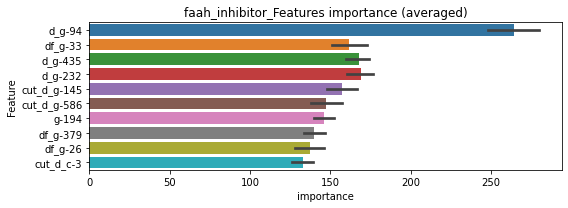

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 faah_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000489978	valid_1's binary_logloss: 0.00102516
[2000]	training's binary_logloss: 0.000287365	valid_1's binary_logloss: 0.000733525
Early stopping, best iteration is:
[2396]	training's binary_logloss: 0.000256528	valid_1's binary_logloss: 0.00068039


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 faah_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000419104	valid_1's binary_logloss: 0.000557793
[2000]	training's binary_logloss: 0.000241838	valid_1's binary_logloss: 0.000323301
[3000]	training's binary_logloss: 0.000180246	valid_1's binary_logloss: 0.000241353
[4000]	training's binary_logloss: 0.000150561	valid_1's binary_logloss: 0.000201809
[5000]	training's binary_logloss: 0.000135176	valid_1's binary_logloss: 0.000181273
[6000]	training's binary_logloss: 0.000125175	valid_1's binary_logloss: 0.000167889
[7000]	training's binary_logloss: 0.000118198	valid_1's binary_logloss: 0.000158548
[8000]	training's binary_logloss: 0.000113397	valid_1's binary_logloss: 0.000152119
[9000]	training's binary_logloss: 0.000109977	valid_1's binary_logloss: 0.000147532
[10000]	training's binary_logloss: 0.000107605	valid_1's binary_logloss: 0.000144379
Did not meet early stopping. Best iteration is:
[9999]	training's binary_logloss: 0.000107605	vali

len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 faah_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[906]	training's binary_logloss: 0.000560836	valid_1's binary_logloss: 0.0019518


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 faah_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00047411	valid_1's binary_logloss: 0.00493902
Early stopping, best iteration is:
[1429]	training's binary_logloss: 0.000351544	valid_1's binary_logloss: 0.00471589


faah_inhibitor logloss: 0.001876210091521125


neg labels: 3289 → selected neg labels: 3288


farnesyltransferase_inhibitor, len(trt): 18, len(othr): 3288
target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00120039	valid_1's binary_logloss: 0.00418152
[600]	training's binary_logloss: 0.000363376	valid_1's binary_logloss: 0.00243061
Early stopping, best iteration is:
[579]	training's binary_logloss: 0.000365255	valid_1's binary_logloss: 0.00242985
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00121008	valid_1's binary_logloss: 0.00396261
[600]	training's binary_logloss: 0.000356759	valid_1's binary_logloss: 0.00170616
Early stopping, best iteration is:
[592]	training's binary_logloss: 0.000357266	valid_1's binary_logloss: 0.00170603
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00123294	valid_1's binary_logloss: 0.00262246
[600]	training's binary_logloss: 0.000361984	valid_1's binary_logloss: 0.00106715
Early stopping, best iteration is:
[602]	training's binary_logloss: 0.000361706	valid_1's bina

1 / 3 AUC score:1.000
y_Threshold: 0.0019580, Threshold: 0.0073686, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, conf_0:0.00516, conf_1:0.00958
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_1: 0.0073686
Num_p_label: 3.0, Expected: 3.0, Adj_threshold_2: 0.0373686
threshold: 0.0373686, positive_p_label: 3.0/3982, p_label_rate: 0.0007534


Early stopping, best iteration is:
[537]	training's binary_logloss: 0.00037588	valid_1's binary_logloss: 0.00481354


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00112466	valid_1's binary_logloss: 0.00435877
Early stopping, best iteration is:
[544]	training's binary_logloss: 0.000364028	valid_1's binary_logloss: 0.00263351
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00113272	valid_1's binary_logloss: 0.0027843
[600]	training's binary_logloss: 0.000346489	valid_1's binary_logloss: 0.00123517
Early stopping, best iteration is:
[597]	training's binary_logloss: 0.000346551	valid_1's binary_logloss: 0.00123499
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00113678	valid_1's binary_logloss: 0.00184049
[600]	training's binary_logloss: 0.000346936	valid_1's binary_logloss: 0.000641853
Early stopping, best iteration is:
[645]	training's binary_logloss: 0.000343192	valid_1's binary_logloss: 0.000635532
Training until validation scores don't improve for 30 roun

2 / 3 AUC score:1.000
y_Threshold: 0.0167375, Threshold: 0.0373686, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0045203 Vs.target_rate: 0.00076
Num_p_label: 18.0, conf_0:0.02989, conf_1:0.04484
Num_p_label: 18.0, Expected: 3.0, Adj_threshold_1: 0.0373686
Num_p_label: 9.0, Expected: 3.0, Adj_threshold_2: 0.0673686
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_3: 0.0973686
threshold: 0.0973686, positive_p_label: 7.0/3982, p_label_rate: 0.0017579


Early stopping, best iteration is:
[503]	training's binary_logloss: 0.000378086	valid_1's binary_logloss: 0.00525707


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00112466	valid_1's binary_logloss: 0.00435877
Early stopping, best iteration is:
[544]	training's binary_logloss: 0.000364028	valid_1's binary_logloss: 0.00263351
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00113272	valid_1's binary_logloss: 0.0027843
[600]	training's binary_logloss: 0.000346489	valid_1's binary_logloss: 0.00123517
Early stopping, best iteration is:
[597]	training's binary_logloss: 0.000346551	valid_1's binary_logloss: 0.00123499
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00113678	valid_1's binary_logloss: 0.00184049
[600]	training's binary_logloss: 0.000346936	valid_1's binary_logloss: 0.000641853
Early stopping, best iteration is:
[646]	training's binary_logloss: 0.000343192	valid_1's binary_logloss: 0.000635532
Training until validation scores don't improve for 30 roun

3 / 3 AUC score:1.000
y_Threshold: 0.0167375, Threshold: 0.0973686, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0017579 Vs.target_rate: 0.00076
Num_p_label: 7.0, conf_0:0.08763, conf_1:0.10711
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_1: 0.0973686


Early stopping, best iteration is:
[503]	training's binary_logloss: 0.000378086	valid_1's binary_logloss: 0.00525707


threshold: 0.0973686, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


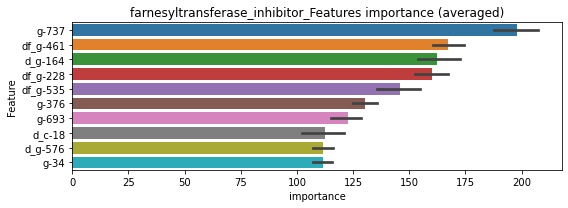

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 farnesyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000414823	valid_1's binary_logloss: 0.000729775
[2000]	training's binary_logloss: 0.000253027	valid_1's binary_logloss: 0.00054106
[3000]	training's binary_logloss: 0.000202663	valid_1's binary_logloss: 0.00048393
[4000]	training's binary_logloss: 0.000178867	valid_1's binary_logloss: 0.00045679
Early stopping, best iteration is:
[4933]	training's binary_logloss: 0.000167348	valid_1's binary_logloss: 0.000441895


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 farnesyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000448375	valid_1's binary_logloss: 0.000792104
[2000]	training's binary_logloss: 0.000270349	valid_1's binary_logloss: 0.000579781
[3000]	training's binary_logloss: 0.000220639	valid_1's binary_logloss: 0.000520228
Early stopping, best iteration is:
[3678]	training's binary_logloss: 0.000203164	valid_1's binary_logloss: 0.000497509


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 farnesyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000442129	valid_1's binary_logloss: 0.00110163
[2000]	training's binary_logloss: 0.000268136	valid_1's binary_logloss: 0.000894758
Early stopping, best iteration is:
[2071]	training's binary_logloss: 0.000263255	valid_1's binary_logloss: 0.000885987


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 farnesyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000415943	valid_1's binary_logloss: 0.00185163
Early stopping, best iteration is:
[1743]	training's binary_logloss: 0.000277967	valid_1's binary_logloss: 0.00160844


farnesyltransferase_inhibitor logloss: 0.0008586452436909148


neg labels: 3289 → selected neg labels: 3284


fatty_acid_receptor_agonist, len(trt): 25, len(othr): 3284
target_rate: 0.0010498 → Adj_target_rate: 0.0012955
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00166416	valid_1's binary_logloss: 0.0105565
[600]	training's binary_logloss: 0.000425358	valid_1's binary_logloss: 0.00820674
Early stopping, best iteration is:
[628]	training's binary_logloss: 0.000417171	valid_1's binary_logloss: 0.00818756
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00169672	valid_1's binary_logloss: 0.0079348
Early stopping, best iteration is:
[552]	training's binary_logloss: 0.000445714	valid_1's binary_logloss: 0.0052001
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00167449	valid_1's binary_logloss: 0.00388496
[600]	training's binary_logloss: 0.000429478	valid_1's binary_logloss: 0.0014599
Early stopping, best iteration is:
[604]	training's binary_logloss: 0.000427835	valid_1's binary_logloss: 0.00145812
Training until validation scores don't improve for 30 rounds
[3

1 / 3 AUC score:1.000
y_Threshold: 0.0025380, Threshold: 0.0131838, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 655/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00105
Num_p_label: 40.0, conf_0:0.00923, conf_1:0.01714
Num_p_label: 40.0, Expected: 4.2, Adj_threshold_1: 0.0131838
Num_p_label: 8.0, Expected: 4.2, Adj_threshold_2: 0.0431838
threshold: 0.0431838, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 655.0/3806, y_label_rate: 0.1720967
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00152646	valid_1's binary_logloss: 0.011333
Early stopping, best iteration is:
[534]	training's binary_logloss: 0.000437839	valid_1's binary_logloss: 0.00802896
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00158486	valid_1's binary_logloss: 0.00289064
[600]	training's binary_logloss: 0.000404367	valid_1's binary_logloss: 0.00108401
Early stopping, best iteration is:
[595]	training's binary_logloss: 0.000404367	valid_1's binary_logloss: 0.00108401
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00157353	valid_1's binary_logloss: 0.00414677
[600]	training's binary_logloss: 0.000410766	valid_1's binary_logloss: 0.00263984
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000412275	valid_1's binary_logloss: 0.00263046
Training until validation scores don't improve for 30 rounds


2 / 3 AUC score:1.000
y_Threshold: 0.0239926, Threshold: 0.0431838, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0045203 Vs.target_rate: 0.00105
Num_p_label: 18.0, conf_0:0.03455, conf_1:0.05182
Num_p_label: 18.0, Expected: 4.2, Adj_threshold_1: 0.0431838
Num_p_label: 10.0, Expected: 4.2, Adj_threshold_2: 0.0731838


[600]	training's binary_logloss: 0.000402457	valid_1's binary_logloss: 0.00397129
Early stopping, best iteration is:
[584]	training's binary_logloss: 0.000403653	valid_1's binary_logloss: 0.00395862


threshold: 0.0731838, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 655.0/3806, y_label_rate: 0.1720967
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00152646	valid_1's binary_logloss: 0.011333
Early stopping, best iteration is:
[534]	training's binary_logloss: 0.000437839	valid_1's binary_logloss: 0.00802896
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00158486	valid_1's binary_logloss: 0.00289064
[600]	training's binary_logloss: 0.000404367	valid_1's binary_logloss: 0.00108401
Early stopping, best iteration is:
[595]	training's binary_logloss: 0.000404367	valid_1's binary_logloss: 0.00108401
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00157353	valid_1's binary_logloss: 0.00414677
[600]	training's binary_logloss: 0.000410766	valid_1's binary_logloss: 0.00263984
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000412275	valid_1's binary_logloss: 0.00263046
Training until validation scores don't improve for 30 rounds


3 / 3 AUC score:1.000
y_Threshold: 0.0239926, Threshold: 0.0731838, pos_neg_ratio: 0.8000000


[600]	training's binary_logloss: 0.000402457	valid_1's binary_logloss: 0.00397129
Early stopping, best iteration is:
[584]	training's binary_logloss: 0.000403653	valid_1's binary_logloss: 0.00395862


Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0025113 Vs.target_rate: 0.00105
Num_p_label: 10.0, conf_0:0.06587, conf_1:0.08050
Num_p_label: 10.0, Expected: 4.2, Adj_threshold_1: 0.0731838
threshold: 0.0731838, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 655.0/3806, y_label_rate: 0.1720967


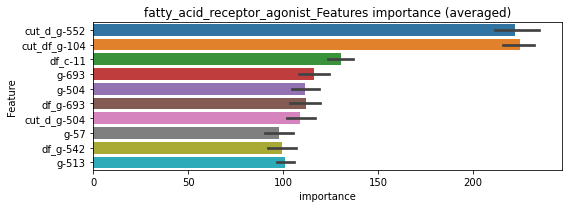

len(train_index) : 2854
len(valid_index) : 952
================================= fold 1/4 fatty_acid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2854
len(valid_index) : 952
================================= fold 2/4 fatty_acid_receptor_agonist=================================


Early stopping, best iteration is:
[520]	training's binary_logloss: 0.000873685	valid_1's binary_logloss: 0.00361089
Training until validation scores don't improve for 30 rounds


len(train_index) : 2855
len(valid_index) : 951
================================= fold 3/4 fatty_acid_receptor_agonist=================================


Early stopping, best iteration is:
[575]	training's binary_logloss: 0.000656235	valid_1's binary_logloss: 0.00341043
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00047562	valid_1's binary_logloss: 0.00260144
Early stopping, best iteration is:
[1243]	training's binary_logloss: 0.000398015	valid_1's binary_logloss: 0.00254848


len(train_index) : 2855
len(valid_index) : 951
================================= fold 4/4 fatty_acid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000476336	valid_1's binary_logloss: 0.00292022
[2000]	training's binary_logloss: 0.000281671	valid_1's binary_logloss: 0.00269068
Early stopping, best iteration is:
[2185]	training's binary_logloss: 0.000268646	valid_1's binary_logloss: 0.00267834


fatty_acid_receptor_agonist logloss: 0.00306246705215214


neg labels: 3289 → selected neg labels: 3284


fgfr_inhibitor, len(trt): 50, len(othr): 3284
target_rate: 0.0020996 → Adj_target_rate: 0.0023352
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00464049	valid_1's binary_logloss: 0.0217751
[600]	training's binary_logloss: 0.00082253	valid_1's binary_logloss: 0.0119662
Early stopping, best iteration is:
[744]	training's binary_logloss: 0.000627064	valid_1's binary_logloss: 0.011401
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00473276	valid_1's binary_logloss: 0.0175746
[600]	training's binary_logloss: 0.000843303	valid_1's binary_logloss: 0.00765122
Early stopping, best iteration is:
[789]	training's binary_logloss: 0.000613842	valid_1's binary_logloss: 0.00667659
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00513823	valid_1's binary_logloss: 0.0119009
[600]	training's binary_logloss: 0.000885313	valid_1's binary_logloss: 0.00402691
Early stopping, best iteration is:
[831]	training's binary_logloss: 0.000614587	valid_1's binary_logl

1 / 3 AUC score:1.000
y_Threshold: 0.0061426, Threshold: 0.0227828, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 655/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00210
Num_p_label: 40.0, conf_0:0.01595, conf_1:0.02962
Num_p_label: 40.0, Expected: 8.4, Adj_threshold_1: 0.0227828
Num_p_label: 21.0, Expected: 8.4, Adj_threshold_2: 0.0527828
Num_p_label: 13.0, Expected: 8.4, Adj_threshold_3: 0.0827828
threshold: 0.0827828, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 655.0/3806, y_label_rate: 0.1720967
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00430544	valid_1's binary_logloss: 0.0189702
[600]	training's binary_logloss: 0.000800069	valid_1's binary_logloss: 0.0111947
Early stopping, best iteration is:
[736]	training's binary_logloss: 0.000616827	valid_1's binary_logloss: 0.0104752
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00451733	valid_1's binary_logloss: 0.0164021
[600]	training's binary_logloss: 0.00080711	valid_1's binary_logloss: 0.00737044
Early stopping, best iteration is:
[727]	training's binary_logloss: 0.000628333	valid_1's binary_logloss: 0.00666999
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00429311	valid_1's binary_logloss: 0.013871
[600]	training's binary_logloss: 0.000806996	valid_1's binary_logloss: 0.00519642
Early stopping, best iteration is:
[794]	training's binary_logloss: 0.000597465	valid_1's binary_logl

2 / 3 AUC score:1.000
y_Threshold: 0.0287334, Threshold: 0.0827828, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 653.0/3802
p_label_rate: 0.0055249 Vs.target_rate: 0.00210
Num_p_label: 22.0, conf_0:0.06623, conf_1:0.09934
Num_p_label: 22.0, Expected: 8.4, Adj_threshold_1: 0.0827828
Num_p_label: 16.0, Expected: 8.4, Adj_threshold_2: 0.1127828
threshold: 0.1127828, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 653.0/3802, y_label_rate: 0.1717517
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00418176	valid_1's binary_logloss: 0.0172822
[600]	training's binary_logloss: 0.000784693	valid_1's binary_logloss: 0.00844686
Early stopping, best iteration is:
[719]	training's binary_logloss: 0.000624686	valid_1's binary_logloss: 0.00786279
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00434816	valid_1's binary_logloss: 0.0189164
[600]	training's binary_logloss: 0.000790187	valid_1's binary_logloss: 0.0100352
Early stopping, best iteration is:
[735]	training's binary_logloss: 0.000614933	valid_1's binary_logloss: 0.00919637
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00428263	valid_1's binary_logloss: 0.0195617
[600]	training's binary_logloss: 0.000797868	valid_1's binary_logloss: 0.00973557
Early stopping, best iteration is:
[752]	training's binary_logloss: 0.000604787	valid_1's binary_l

3 / 3 AUC score:1.000
y_Threshold: 0.0343888, Threshold: 0.1127828, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 653.0/3802
p_label_rate: 0.0027624 Vs.target_rate: 0.00210
Num_p_label: 11.0, conf_0:0.10150, conf_1:0.12406
threshold: 0.1127828, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 653.0/3802, y_label_rate: 0.1717517


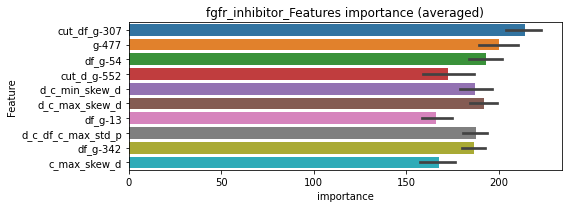

len(train_index) : 2851
len(valid_index) : 951
================================= fold 1/4 fgfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000440588	valid_1's binary_logloss: 0.000634019
[2000]	training's binary_logloss: 0.000247733	valid_1's binary_logloss: 0.000357628
[3000]	training's binary_logloss: 0.000182928	valid_1's binary_logloss: 0.000264357
[4000]	training's binary_logloss: 0.00015201	valid_1's binary_logloss: 0.000219817
[5000]	training's binary_logloss: 0.000136136	valid_1's binary_logloss: 0.00019693
[6000]	training's binary_logloss: 0.000125889	valid_1's binary_logloss: 0.000182123
[7000]	training's binary_logloss: 0.000118802	valid_1's binary_logloss: 0.000171886
[8000]	training's binary_logloss: 0.000113884	valid_1's binary_logloss: 0.000164772
[9000]	training's binary_logloss: 0.000110422	valid_1's binary_logloss: 0.000159768
[10000]	training's binary_logloss: 0.000107953	valid_1's binary_logloss: 0.000156214
Did not meet early stopping. Best iteration is:
[9999]	training's binary_logloss: 0.000107953	valid_

len(train_index) : 2851
len(valid_index) : 951
================================= fold 2/4 fgfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2852
len(valid_index) : 950
================================= fold 3/4 fgfr_inhibitor=================================


Early stopping, best iteration is:
[755]	training's binary_logloss: 0.000674353	valid_1's binary_logloss: 0.00200969
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000524882	valid_1's binary_logloss: 0.000927855
[2000]	training's binary_logloss: 0.000304332	valid_1's binary_logloss: 0.000655732
[3000]	training's binary_logloss: 0.000238304	valid_1's binary_logloss: 0.000567008
[4000]	training's binary_logloss: 0.000207643	valid_1's binary_logloss: 0.000527101
Early stopping, best iteration is:
[4190]	training's binary_logloss: 0.000203892	valid_1's binary_logloss: 0.000519494


len(train_index) : 2852
len(valid_index) : 950
================================= fold 4/4 fgfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000524164	valid_1's binary_logloss: 0.00558204
Early stopping, best iteration is:
[987]	training's binary_logloss: 0.000530927	valid_1's binary_logloss: 0.00557323


fgfr_inhibitor logloss: 0.0020642059670980283


neg labels: 3289 → selected neg labels: 3258


flt3_inhibitor, len(trt): 279, len(othr): 3258
target_rate: 0.0117158 → Adj_target_rate: 0.0100684
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.040695	valid_1's binary_logloss: 0.255858
Early stopping, best iteration is:
[339]	training's binary_logloss: 0.0317055	valid_1's binary_logloss: 0.25223
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0399396	valid_1's binary_logloss: 0.251141
Early stopping, best iteration is:
[334]	training's binary_logloss: 0.0324075	valid_1's binary_logloss: 0.248989
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0434672	valid_1's binary_logloss: 0.255157
Early stopping, best iteration is:
[364]	training's binary_logloss: 0.0290576	valid_1's binary_logloss: 0.254273
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0463736	valid_1's binary_logloss: 0.222935


1 / 3 AUC score:0.893
y_Threshold: 0.0864590, Threshold: 0.7456215, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[414]	training's binary_logloss: 0.0232192	valid_1's binary_logloss: 0.21165


Remove_noisy_data: 415 → Positive_corect_labels: 509/3494
p_label_rate: 0.0100452 Vs.target_rate: 0.01172
Num_p_label: 40.0, conf_0:0.50000, conf_1:0.80000
threshold: 0.7456215, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 509.0/3494, y_label_rate: 0.1456783
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0213595	valid_1's binary_logloss: 0.142291
[600]	training's binary_logloss: 0.0034329	valid_1's binary_logloss: 0.125811
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.00358692	valid_1's binary_logloss: 0.125503
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0197882	valid_1's binary_logloss: 0.135309
Early stopping, best iteration is:
[507]	training's binary_logloss: 0.00481677	valid_1's binary_logloss: 0.124765
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0213466	valid_1's binary_logloss: 0.128196
[600]	training's binary_logloss: 0.0033396	valid_1's binary_logloss: 0.111347
Early stopping, best iteration is:
[630]	training's binary_logloss: 0.00296706	valid_1's binary_logloss: 0.111041
Training until validation scores don't improve for 30 rounds
[300]	training's binary_

2 / 3 AUC score:0.986
y_Threshold: 0.0609638, Threshold: 0.7456215, pos_neg_ratio: 0.8000000
Remove_noisy_data: 104 → Positive_corect_labels: 457.0/3390
p_label_rate: 0.0180814 Vs.target_rate: 0.01172
Num_p_label: 72.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 72.0, Expected: 46.7, Adj_threshold_1: 0.7456215
Num_p_label: 69.0, Expected: 46.7, Adj_threshold_2: 0.7756215
threshold: 0.7756215, positive_p_label: 69.0/3982, p_label_rate: 0.0173280
positive_y_label: 457.0/3390, y_label_rate: 0.1348083
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0140957	valid_1's binary_logloss: 0.130117
Early stopping, best iteration is:
[391]	training's binary_logloss: 0.00696852	valid_1's binary_logloss: 0.123004
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0147374	valid_1's binary_logloss: 0.105253
[600]	training's binary_logloss: 0.00242916	valid_1's binary_logloss: 0.0842584
Early stopping, best iteration is:
[768]	training's binary_logloss: 0.0014985	valid_1's binary_logloss: 0.0810511
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0155806	valid_1's binary_logloss: 0.0969087
[600]	training's binary_logloss: 0.00252124	valid_1's binary_logloss: 0.083212
Early stopping, best iteration is:
[579]	training's binary_logloss: 0.00275392	valid_1's binary_logloss: 0.0830261
Training until validation scores don't improve for 30 rounds
[300]	training's bi

3 / 3 AUC score:0.993
y_Threshold: 0.0586818, Threshold: 0.7756215, pos_neg_ratio: 0.8000000
Remove_noisy_data: 68 → Positive_corect_labels: 423.0/3322
p_label_rate: 0.0195881 Vs.target_rate: 0.01172
Num_p_label: 78.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 78.0, Expected: 46.7, Adj_threshold_1: 0.7756215
threshold: 0.7756215, positive_p_label: 78.0/3982, p_label_rate: 0.0195881
positive_y_label: 423.0/3322, y_label_rate: 0.1273329


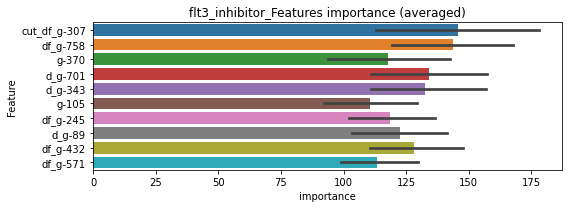

len(train_index) : 2491
len(valid_index) : 831
================================= fold 1/4 flt3_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000530554	valid_1's binary_logloss: 0.000960354
[2000]	training's binary_logloss: 0.000289835	valid_1's binary_logloss: 0.000527165
[3000]	training's binary_logloss: 0.000212051	valid_1's binary_logloss: 0.000386371
[4000]	training's binary_logloss: 0.000175339	valid_1's binary_logloss: 0.000319764
[5000]	training's binary_logloss: 0.000156688	valid_1's binary_logloss: 0.000285926
[6000]	training's binary_logloss: 0.000144689	valid_1's binary_logloss: 0.000264056
[7000]	training's binary_logloss: 0.000136365	valid_1's binary_logloss: 0.000248883
[8000]	training's binary_logloss: 0.000130672	valid_1's binary_logloss: 0.000238513
[9000]	training's binary_logloss: 0.00012662	valid_1's binary_logloss: 0.000231126
[10000]	training's binary_logloss: 0.000123702	valid_1's binary_logloss: 0.000225816
Did not meet early stopping. Best iteration is:
[9999]	training's binary_logloss: 0.000123702	valid

len(train_index) : 2491
len(valid_index) : 831
================================= fold 2/4 flt3_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000655537	valid_1's binary_logloss: 0.000869925
[2000]	training's binary_logloss: 0.000368254	valid_1's binary_logloss: 0.00047241
[3000]	training's binary_logloss: 0.000283647	valid_1's binary_logloss: 0.000349369
[4000]	training's binary_logloss: 0.000245274	valid_1's binary_logloss: 0.000291781
[5000]	training's binary_logloss: 0.000226083	valid_1's binary_logloss: 0.000262298
[6000]	training's binary_logloss: 0.000214208	valid_1's binary_logloss: 0.00024422
[7000]	training's binary_logloss: 0.000205272	valid_1's binary_logloss: 0.000230676
Early stopping, best iteration is:
[7952]	training's binary_logloss: 0.0001988	valid_1's binary_logloss: 0.000220924


len(train_index) : 2492
len(valid_index) : 830
================================= fold 3/4 flt3_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000652738	valid_1's binary_logloss: 0.00216298
Early stopping, best iteration is:
[1930]	training's binary_logloss: 0.000377672	valid_1's binary_logloss: 0.00165425


len(train_index) : 2492
len(valid_index) : 830
================================= fold 4/4 flt3_inhibitor=================================


Training until validation scores don't improve for 30 rounds


flt3_inhibitor logloss: 0.0015395703306507115


Early stopping, best iteration is:
[720]	training's binary_logloss: 0.000913245	valid_1's binary_logloss: 0.00405733
neg labels: 3289 → selected neg labels: 3289


focal_adhesion_kinase_inhibitor, len(trt): 18, len(othr): 3289
target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00123243	valid_1's binary_logloss: 0.00263219
[600]	training's binary_logloss: 0.000359445	valid_1's binary_logloss: 0.00107571
Early stopping, best iteration is:
[607]	training's binary_logloss: 0.000357338	valid_1's binary_logloss: 0.00106928
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00120327	valid_1's binary_logloss: 0.00367757
[600]	training's binary_logloss: 0.000352784	valid_1's binary_logloss: 0.0017886
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.000350701	valid_1's binary_logloss: 0.00178204
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00126047	valid_1's binary_logloss: 0.00222019
[600]	training's binary_logloss: 0.000359254	valid_1's binary_logloss: 0.000873231
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000358027	valid_1's bina

1 / 3 AUC score:1.000
y_Threshold: 0.0018168, Threshold: 0.0089424, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, conf_0:0.00626, conf_1:0.01163
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_1: 0.0089424
Num_p_label: 3.0, Expected: 3.0, Adj_threshold_2: 0.0389424
threshold: 0.0389424, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00110604	valid_1's binary_logloss: 0.00254183
[600]	training's binary_logloss: 0.000338844	valid_1's binary_logloss: 0.00118282
Early stopping, best iteration is:
[639]	training's binary_logloss: 0.000331547	valid_1's binary_logloss: 0.00116795
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00112854	valid_1's binary_logloss: 0.00286233
[600]	training's binary_logloss: 0.000341131	valid_1's binary_logloss: 0.00138212
Early stopping, best iteration is:
[638]	training's binary_logloss: 0.000335634	valid_1's binary_logloss: 0.00137099
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00112902	valid_1's binary_logloss: 0.00193836
[600]	training's binary_logloss: 0.000341578	valid_1's binary_logloss: 0.000693423
Early stopping, best iteration is:
[624]	training's binary_logloss: 0.000337919	valid_1's bin

2 / 3 AUC score:1.000
y_Threshold: 0.1317211, Threshold: 0.0389424, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0047715 Vs.target_rate: 0.00076
Num_p_label: 19.0, conf_0:0.03115, conf_1:0.04673
Num_p_label: 19.0, Expected: 3.0, Adj_threshold_1: 0.0389424
Num_p_label: 9.0, Expected: 3.0, Adj_threshold_2: 0.0689424
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_3: 0.0989424
threshold: 0.0989424, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00110604	valid_1's binary_logloss: 0.00254183
[600]	training's binary_logloss: 0.000338844	valid_1's binary_logloss: 0.00118282
Early stopping, best iteration is:
[639]	training's binary_logloss: 0.000331547	valid_1's binary_logloss: 0.00116795
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00112854	valid_1's binary_logloss: 0.00286233
[600]	training's binary_logloss: 0.000341131	valid_1's binary_logloss: 0.00138212
Early stopping, best iteration is:
[637]	training's binary_logloss: 0.000335634	valid_1's binary_logloss: 0.00137099
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00112902	valid_1's binary_logloss: 0.00193836
[600]	training's binary_logloss: 0.000341578	valid_1's binary_logloss: 0.000693423
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000337919	valid_1's bin

3 / 3 AUC score:1.000
y_Threshold: 0.1317211, Threshold: 0.0989424, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0017579 Vs.target_rate: 0.00076
Num_p_label: 7.0, conf_0:0.08905, conf_1:0.10884
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_1: 0.0989424
threshold: 0.0989424, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


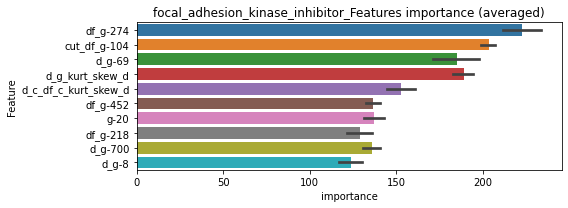

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 focal_adhesion_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000418565	valid_1's binary_logloss: 0.000648232
[2000]	training's binary_logloss: 0.000259442	valid_1's binary_logloss: 0.000422193
[3000]	training's binary_logloss: 0.000211954	valid_1's binary_logloss: 0.000350229
[4000]	training's binary_logloss: 0.000187671	valid_1's binary_logloss: 0.000312755
[5000]	training's binary_logloss: 0.000174311	valid_1's binary_logloss: 0.000291568
[6000]	training's binary_logloss: 0.000165498	valid_1's binary_logloss: 0.00027834
Early stopping, best iteration is:
[6969]	training's binary_logloss: 0.000159192	valid_1's binary_logloss: 0.000268346


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 focal_adhesion_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000442004	valid_1's binary_logloss: 0.0018186
Early stopping, best iteration is:
[1777]	training's binary_logloss: 0.00029169	valid_1's binary_logloss: 0.00162854


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 focal_adhesion_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000429487	valid_1's binary_logloss: 0.000482901
[2000]	training's binary_logloss: 0.000261935	valid_1's binary_logloss: 0.000304743
[3000]	training's binary_logloss: 0.000210895	valid_1's binary_logloss: 0.000250268
[4000]	training's binary_logloss: 0.000186766	valid_1's binary_logloss: 0.000222813
[5000]	training's binary_logloss: 0.000173864	valid_1's binary_logloss: 0.000208336
[6000]	training's binary_logloss: 0.000165294	valid_1's binary_logloss: 0.000198264
[7000]	training's binary_logloss: 0.000159246	valid_1's binary_logloss: 0.000191681
[8000]	training's binary_logloss: 0.000154706	valid_1's binary_logloss: 0.000186524
Early stopping, best iteration is:
[8146]	training's binary_logloss: 0.000154167	valid_1's binary_logloss: 0.000185803


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 focal_adhesion_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00044028	valid_1's binary_logloss: 0.00130144
[2000]	training's binary_logloss: 0.000270271	valid_1's binary_logloss: 0.00107074
[3000]	training's binary_logloss: 0.000221302	valid_1's binary_logloss: 0.00100482
[4000]	training's binary_logloss: 0.000197854	valid_1's binary_logloss: 0.000973293
[5000]	training's binary_logloss: 0.000184835	valid_1's binary_logloss: 0.000956058
Early stopping, best iteration is:
[5271]	training's binary_logloss: 0.00018242	valid_1's binary_logloss: 0.000952975


focal_adhesion_kinase_inhibitor logloss: 0.0007595675188011566


neg labels: 3289 → selected neg labels: 3288


free_radical_scavenger, len(trt): 18, len(othr): 3288
target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00132059	valid_1's binary_logloss: 0.00314915
[600]	training's binary_logloss: 0.000369125	valid_1's binary_logloss: 0.00125909
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000364093	valid_1's binary_logloss: 0.00124907
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0013568	valid_1's binary_logloss: 0.00282018
[600]	training's binary_logloss: 0.000368943	valid_1's binary_logloss: 0.000988124
Early stopping, best iteration is:
[617]	training's binary_logloss: 0.000365856	valid_1's binary_logloss: 0.000981007
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00136403	valid_1's binary_logloss: 0.00233324
[600]	training's binary_logloss: 0.000370438	valid_1's binary_logloss: 0.000768494
Early stopping, best iteration is:
[598]	training's binary_logloss: 0.000370438	valid_1's bi

1 / 3 AUC score:1.000
y_Threshold: 0.0020920, Threshold: 0.0089303, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, conf_0:0.00625, conf_1:0.01161
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_1: 0.0089303
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_2: 0.0389303


[600]	training's binary_logloss: 0.000373823	valid_1's binary_logloss: 0.0024156
Early stopping, best iteration is:
[576]	training's binary_logloss: 0.000381792	valid_1's binary_logloss: 0.00241385


threshold: 0.0389303, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00121129	valid_1's binary_logloss: 0.00347744
[600]	training's binary_logloss: 0.00035361	valid_1's binary_logloss: 0.00156941
Early stopping, best iteration is:
[614]	training's binary_logloss: 0.000351021	valid_1's binary_logloss: 0.00156667
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00121398	valid_1's binary_logloss: 0.00279136
[600]	training's binary_logloss: 0.000357797	valid_1's binary_logloss: 0.00105419
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000357797	valid_1's binary_logloss: 0.00105419
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00123541	valid_1's binary_logloss: 0.00180725
[600]	training's binary_logloss: 0.000355042	valid_1's binary_logloss: 0.000592956
Early stopping, best iteration is:
[620]	training's binary_logloss: 0.000351237	valid_1's bina

2 / 3 AUC score:1.000
y_Threshold: 0.0795386, Threshold: 0.0389303, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0055249 Vs.target_rate: 0.00076
Num_p_label: 22.0, conf_0:0.03114, conf_1:0.04672
Num_p_label: 22.0, Expected: 3.0, Adj_threshold_1: 0.0389303
Num_p_label: 16.0, Expected: 3.0, Adj_threshold_2: 0.0689303
Num_p_label: 12.0, Expected: 3.0, Adj_threshold_3: 0.0989303
Num_p_label: 10.0, Expected: 3.0, Adj_threshold_4: 0.1289303
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_5: 0.1589303


[600]	training's binary_logloss: 0.000357993	valid_1's binary_logloss: 0.00188305
Early stopping, best iteration is:
[581]	training's binary_logloss: 0.000360782	valid_1's binary_logloss: 0.00187729


Num_p_label: 6.0, Expected: 3.0, Adj_threshold_6: 0.1889303
threshold: 0.1889303, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00121129	valid_1's binary_logloss: 0.00347744
[600]	training's binary_logloss: 0.00035361	valid_1's binary_logloss: 0.00156941
Early stopping, best iteration is:
[615]	training's binary_logloss: 0.000351021	valid_1's binary_logloss: 0.00156667
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00121398	valid_1's binary_logloss: 0.00279136
[600]	training's binary_logloss: 0.000357797	valid_1's binary_logloss: 0.00105419
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000357797	valid_1's binary_logloss: 0.00105419
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00123541	valid_1's binary_logloss: 0.00180725
[600]	training's binary_logloss: 0.000355042	valid_1's binary_logloss: 0.000592956
Early stopping, best iteration is:
[620]	training's binary_logloss: 0.000351237	valid_1's bina

3 / 3 AUC score:1.000
y_Threshold: 0.0795386, Threshold: 0.1889303, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813


[600]	training's binary_logloss: 0.000357993	valid_1's binary_logloss: 0.00188305
Early stopping, best iteration is:
[581]	training's binary_logloss: 0.000360782	valid_1's binary_logloss: 0.00187729


p_label_rate: 0.0015068 Vs.target_rate: 0.00076
Num_p_label: 6.0, conf_0:0.17004, conf_1:0.20782
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_1: 0.1889303
threshold: 0.1889303, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


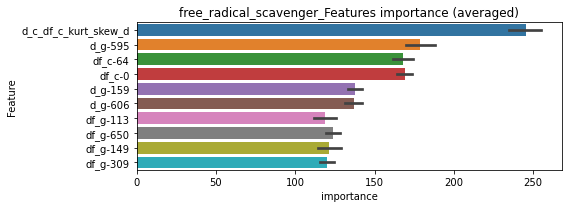

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 free_radical_scavenger=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000438469	valid_1's binary_logloss: 0.00240676
Early stopping, best iteration is:
[1485]	training's binary_logloss: 0.000321648	valid_1's binary_logloss: 0.00220615


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 free_radical_scavenger=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000441177	valid_1's binary_logloss: 0.000972271
[2000]	training's binary_logloss: 0.000271552	valid_1's binary_logloss: 0.000741851
[3000]	training's binary_logloss: 0.000222306	valid_1's binary_logloss: 0.000671582
Early stopping, best iteration is:
[3628]	training's binary_logloss: 0.000205285	valid_1's binary_logloss: 0.000641919


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 free_radical_scavenger=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000435276	valid_1's binary_logloss: 0.000399839
[2000]	training's binary_logloss: 0.000266667	valid_1's binary_logloss: 0.000232674
[3000]	training's binary_logloss: 0.000216119	valid_1's binary_logloss: 0.000179771
[4000]	training's binary_logloss: 0.000190797	valid_1's binary_logloss: 0.000152965
[5000]	training's binary_logloss: 0.000177199	valid_1's binary_logloss: 0.000138388
[6000]	training's binary_logloss: 0.000168198	valid_1's binary_logloss: 0.000128711
[7000]	training's binary_logloss: 0.000161841	valid_1's binary_logloss: 0.000121872
[8000]	training's binary_logloss: 0.000157497	valid_1's binary_logloss: 0.000117104
Early stopping, best iteration is:
[8895]	training's binary_logloss: 0.000154502	valid_1's binary_logloss: 0.000113749


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 free_radical_scavenger=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000421702	valid_1's binary_logloss: 0.00285485
Early stopping, best iteration is:
[1164]	training's binary_logloss: 0.000373353	valid_1's binary_logloss: 0.00281041


free_radical_scavenger logloss: 0.0014433855137164964


neg labels: 3289 → selected neg labels: 3287


fungal_squalene_epoxidase_inhibitor, len(trt): 23, len(othr): 3287
target_rate: 0.0009658 → Adj_target_rate: 0.0012069
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00177893	valid_1's binary_logloss: 0.00371512
[600]	training's binary_logloss: 0.000436906	valid_1's binary_logloss: 0.00135241
Early stopping, best iteration is:
[620]	training's binary_logloss: 0.000428623	valid_1's binary_logloss: 0.00133155
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00162719	valid_1's binary_logloss: 0.0116302
[600]	training's binary_logloss: 0.000418526	valid_1's binary_logloss: 0.00833006
Early stopping, best iteration is:
[603]	training's binary_logloss: 0.000417008	valid_1's binary_logloss: 0.00830796
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00181071	valid_1's binary_logloss: 0.00322021
[600]	training's binary_logloss: 0.000438376	valid_1's binary_logloss: 0.00101601
Early stopping, best iteration is:
[630]	training's binary_logloss: 0.000430639	valid_1's binar

1 / 3 AUC score:1.000
y_Threshold: 0.0027750, Threshold: 0.0085025, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00097
Num_p_label: 40.0, conf_0:0.00595, conf_1:0.01105
Num_p_label: 40.0, Expected: 3.8, Adj_threshold_1: 0.0085025
Num_p_label: 7.0, Expected: 3.8, Adj_threshold_2: 0.0385025
threshold: 0.0385025, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00168781	valid_1's binary_logloss: 0.00354666
[600]	training's binary_logloss: 0.000425339	valid_1's binary_logloss: 0.00124526
Early stopping, best iteration is:
[597]	training's binary_logloss: 0.000425339	valid_1's binary_logloss: 0.00124526
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00155577	valid_1's binary_logloss: 0.00970679
[600]	training's binary_logloss: 0.000411798	valid_1's binary_logloss: 0.00650689
Early stopping, best iteration is:
[609]	training's binary_logloss: 0.000408691	valid_1's binary_logloss: 0.00648683
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00172781	valid_1's binary_logloss: 0.00256584
[600]	training's binary_logloss: 0.000426357	valid_1's binary_logloss: 0.000764609
Early stopping, best iteration is:
[617]	training's binary_logloss: 0.000420638	valid_1's bin

2 / 3 AUC score:1.000
y_Threshold: 0.0350557, Threshold: 0.0385025, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0057760 Vs.target_rate: 0.00097
Num_p_label: 23.0, conf_0:0.03080, conf_1:0.04620
Num_p_label: 23.0, Expected: 3.8, Adj_threshold_1: 0.0385025
Num_p_label: 15.0, Expected: 3.8, Adj_threshold_2: 0.0685025
Num_p_label: 12.0, Expected: 3.8, Adj_threshold_3: 0.0985025
Num_p_label: 7.0, Expected: 3.8, Adj_threshold_4: 0.1285025


[600]	training's binary_logloss: 0.000418083	valid_1's binary_logloss: 0.00221893
Early stopping, best iteration is:
[592]	training's binary_logloss: 0.000418847	valid_1's binary_logloss: 0.00221122


threshold: 0.1285025, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00168781	valid_1's binary_logloss: 0.00354666
[600]	training's binary_logloss: 0.000425339	valid_1's binary_logloss: 0.00124526
Early stopping, best iteration is:
[600]	training's binary_logloss: 0.000425339	valid_1's binary_logloss: 0.00124526
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00155577	valid_1's binary_logloss: 0.00970679
[600]	training's binary_logloss: 0.000411798	valid_1's binary_logloss: 0.00650689
Early stopping, best iteration is:
[609]	training's binary_logloss: 0.000408691	valid_1's binary_logloss: 0.00648683
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00172781	valid_1's binary_logloss: 0.00256584
[600]	training's binary_logloss: 0.000426357	valid_1's binary_logloss: 0.000764609
Early stopping, best iteration is:
[617]	training's binary_logloss: 0.000420638	valid_1's bin

3 / 3 AUC score:1.000
y_Threshold: 0.0350557, Threshold: 0.1285025, pos_neg_ratio: 0.8000000


[600]	training's binary_logloss: 0.000418083	valid_1's binary_logloss: 0.00221893
Early stopping, best iteration is:
[592]	training's binary_logloss: 0.000418847	valid_1's binary_logloss: 0.00221122


Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0017579 Vs.target_rate: 0.00097
Num_p_label: 7.0, conf_0:0.11565, conf_1:0.14135
Num_p_label: 7.0, Expected: 3.8, Adj_threshold_1: 0.1285025
threshold: 0.1285025, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


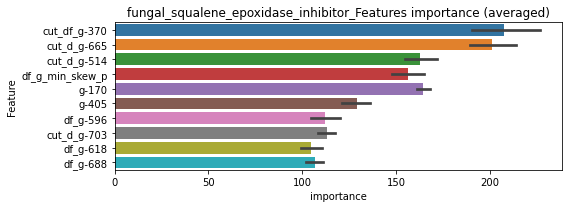

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 fungal_squalene_epoxidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000459244	valid_1's binary_logloss: 0.000469762
[2000]	training's binary_logloss: 0.000278813	valid_1's binary_logloss: 0.000271419
[3000]	training's binary_logloss: 0.000227431	valid_1's binary_logloss: 0.000209449
[4000]	training's binary_logloss: 0.000201256	valid_1's binary_logloss: 0.000177699
[5000]	training's binary_logloss: 0.00018737	valid_1's binary_logloss: 0.000160838
[6000]	training's binary_logloss: 0.000178446	valid_1's binary_logloss: 0.000150066
[7000]	training's binary_logloss: 0.000171777	valid_1's binary_logloss: 0.000142087
[8000]	training's binary_logloss: 0.000167107	valid_1's binary_logloss: 0.000136395
Early stopping, best iteration is:
[8608]	training's binary_logloss: 0.000164795	valid_1's binary_logloss: 0.000133589


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 fungal_squalene_epoxidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 fungal_squalene_epoxidase_inhibitor=================================


Early stopping, best iteration is:
[270]	training's binary_logloss: 0.00172145	valid_1's binary_logloss: 0.0128618
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000451533	valid_1's binary_logloss: 0.000581357
[2000]	training's binary_logloss: 0.000280471	valid_1's binary_logloss: 0.000379945
[3000]	training's binary_logloss: 0.000228691	valid_1's binary_logloss: 0.000304784
[4000]	training's binary_logloss: 0.000198022	valid_1's binary_logloss: 0.000273154
[5000]	training's binary_logloss: 0.000183798	valid_1's binary_logloss: 0.000260058
[6000]	training's binary_logloss: 0.000174878	valid_1's binary_logloss: 0.000251825
[7000]	training's binary_logloss: 0.000168551	valid_1's binary_logloss: 0.000245097
[8000]	training's binary_logloss: 0.000163832	valid_1's binary_logloss: 0.000233281
Early stopping, best iteration is:
[8335]	training's binary_logloss: 0.000162608	valid_1's binary_logloss: 0.000230296


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 fungal_squalene_epoxidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000455542	valid_1's binary_logloss: 0.00146312
[2000]	training's binary_logloss: 0.000276016	valid_1's binary_logloss: 0.00119502
Early stopping, best iteration is:
[2159]	training's binary_logloss: 0.000265849	valid_1's binary_logloss: 0.0011767


fungal_squalene_epoxidase_inhibitor logloss: 0.0036008549558946587


neg labels: 3289 → selected neg labels: 3271


gaba_receptor_agonist, len(trt): 106, len(othr): 3271
target_rate: 0.0044512 → Adj_target_rate: 0.0044229
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0113423	valid_1's binary_logloss: 0.104774
Early stopping, best iteration is:
[519]	training's binary_logloss: 0.00244727	valid_1's binary_logloss: 0.0940114
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0130535	valid_1's binary_logloss: 0.0675286
[600]	training's binary_logloss: 0.00190781	valid_1's binary_logloss: 0.0506861
Early stopping, best iteration is:
[685]	training's binary_logloss: 0.00145173	valid_1's binary_logloss: 0.0501228
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0130241	valid_1's binary_logloss: 0.0556804
[600]	training's binary_logloss: 0.00198065	valid_1's binary_logloss: 0.0383029
Early stopping, best iteration is:
[789]	training's binary_logloss: 0.00116858	valid_1's binary_logloss: 0.0369537
Training until validation scores don't improve for 30 rounds
[300]	training'

1 / 3 AUC score:0.996
y_Threshold: 0.0189025, Threshold: 0.1116988, pos_neg_ratio: 0.8000000
Remove_noisy_data: 159 → Positive_corect_labels: 640/3766
p_label_rate: 0.0100452 Vs.target_rate: 0.00445


Early stopping, best iteration is:
[474]	training's binary_logloss: 0.00345523	valid_1's binary_logloss: 0.065491


Num_p_label: 40.0, conf_0:0.07819, conf_1:0.14521
Num_p_label: 40.0, Expected: 17.7, Adj_threshold_1: 0.1116988
Num_p_label: 31.0, Expected: 17.7, Adj_threshold_2: 0.1416988
Num_p_label: 24.0, Expected: 17.7, Adj_threshold_3: 0.1716988
threshold: 0.1716988, positive_p_label: 24.0/3982, p_label_rate: 0.0060271
positive_y_label: 640.0/3766, y_label_rate: 0.1699416
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00972145	valid_1's binary_logloss: 0.0764601
Early stopping, best iteration is:
[546]	training's binary_logloss: 0.00190483	valid_1's binary_logloss: 0.0667216
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0100539	valid_1's binary_logloss: 0.0673247
Early stopping, best iteration is:
[522]	training's binary_logloss: 0.00220982	valid_1's binary_logloss: 0.0517944
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0102756	valid_1's binary_logloss: 0.064466
[600]	training's binary_logloss: 0.00162911	valid_1's binary_logloss: 0.0515822
Early stopping, best iteration is:
[665]	training's binary_logloss: 0.00133595	valid_1's binary_logloss: 0.0507485
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0104037	valid_1's binary_logloss: 0.0554206
[600]	training'

2 / 3 AUC score:0.999
y_Threshold: 0.0394102, Threshold: 0.1716988, pos_neg_ratio: 0.8000000
Remove_noisy_data: 34 → Positive_corect_labels: 623.0/3732
p_label_rate: 0.0168257 Vs.target_rate: 0.00445
Num_p_label: 67.0, conf_0:0.13736, conf_1:0.20604
Num_p_label: 67.0, Expected: 17.7, Adj_threshold_1: 0.1716988
Num_p_label: 60.0, Expected: 17.7, Adj_threshold_2: 0.2016988
Num_p_label: 54.0, Expected: 17.7, Adj_threshold_3: 0.2316988
Num_p_label: 48.0, Expected: 17.7, Adj_threshold_4: 0.2616988
Num_p_label: 42.0, Expected: 17.7, Adj_threshold_5: 0.2916988
Num_p_label: 41.0, Expected: 17.7, Adj_threshold_6: 0.3216988
Num_p_label: 35.0, Expected: 17.7, Adj_threshold_7: 0.3516988
Num_p_label: 35.0, Expected: 17.7, Adj_threshold_8: 0.3816988
Num_p_label: 30.0, Expected: 17.7, Adj_threshold_9: 0.4116988
Num_p_label: 24.0, Expected: 17.7, Adj_threshold_10: 0.4416988
threshold: 0.4416988, positive_p_label: 24.0/3982, p_label_rate: 0.0060271
positive_y_label: 623.0/3732, y_label_rate: 0.1669346


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00918468	valid_1's binary_logloss: 0.053988
[600]	training's binary_logloss: 0.00149229	valid_1's binary_logloss: 0.0368951
[900]	training's binary_logloss: 0.000798714	valid_1's binary_logloss: 0.0346873
Early stopping, best iteration is:
[939]	training's binary_logloss: 0.000774613	valid_1's binary_logloss: 0.0344704
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00867176	valid_1's binary_logloss: 0.0616887
[600]	training's binary_logloss: 0.00141012	valid_1's binary_logloss: 0.0461894
Early stopping, best iteration is:
[581]	training's binary_logloss: 0.00151028	valid_1's binary_logloss: 0.0458334
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00938328	valid_1's binary_logloss: 0.0441455
[600]	training's binary_logloss: 0.00152544	valid_1's binary_logloss: 0.0295509
Early stopping, best itera

3 / 3 AUC score:1.000
y_Threshold: 0.0433232, Threshold: 0.4416988, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[507]	training's binary_logloss: 0.00216096	valid_1's binary_logloss: 0.0509306


Remove_noisy_data: 18 → Positive_corect_labels: 614.0/3714
p_label_rate: 0.0105475 Vs.target_rate: 0.00445
Num_p_label: 42.0, conf_0:0.39753, conf_1:0.48587
Num_p_label: 42.0, Expected: 17.7, Adj_threshold_1: 0.4416988
Num_p_label: 41.0, Expected: 17.7, Adj_threshold_2: 0.4716988
Num_p_label: 38.0, Expected: 17.7, Adj_threshold_3: 0.5016988
Num_p_label: 34.0, Expected: 17.7, Adj_threshold_4: 0.5316988
Num_p_label: 32.0, Expected: 17.7, Adj_threshold_5: 0.5616988
Num_p_label: 27.0, Expected: 17.7, Adj_threshold_6: 0.5916988
Num_p_label: 25.0, Expected: 17.7, Adj_threshold_7: 0.6216988
threshold: 0.6216988, positive_p_label: 25.0/3982, p_label_rate: 0.0062783
positive_y_label: 614.0/3714, y_label_rate: 0.1653204


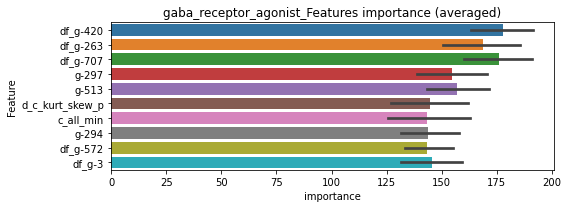

len(train_index) : 2785
len(valid_index) : 929
================================= fold 1/4 gaba_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000589023	valid_1's binary_logloss: 0.00220673
Early stopping, best iteration is:
[1634]	training's binary_logloss: 0.000382314	valid_1's binary_logloss: 0.00196355


len(train_index) : 2785
len(valid_index) : 929
================================= fold 2/4 gaba_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000574676	valid_1's binary_logloss: 0.00339283
[2000]	training's binary_logloss: 0.000323201	valid_1's binary_logloss: 0.00292168
[3000]	training's binary_logloss: 0.000244813	valid_1's binary_logloss: 0.00276683
[4000]	training's binary_logloss: 0.00020814	valid_1's binary_logloss: 0.00267456
[5000]	training's binary_logloss: 0.000188816	valid_1's binary_logloss: 0.00262562
[6000]	training's binary_logloss: 0.000176394	valid_1's binary_logloss: 0.00260012
Early stopping, best iteration is:
[6345]	training's binary_logloss: 0.000172657	valid_1's binary_logloss: 0.00259167


len(train_index) : 2786
len(valid_index) : 928
================================= fold 3/4 gaba_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000586315	valid_1's binary_logloss: 0.00194913
Early stopping, best iteration is:
[1194]	training's binary_logloss: 0.000502057	valid_1's binary_logloss: 0.00179917


len(train_index) : 2786
len(valid_index) : 928
================================= fold 4/4 gaba_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000584777	valid_1's binary_logloss: 0.00372368
Early stopping, best iteration is:
[1853]	training's binary_logloss: 0.000353868	valid_1's binary_logloss: 0.00335589


gaba_receptor_agonist logloss: 0.0024280600217093853


neg labels: 3289 → selected neg labels: 3266


gaba_receptor_antagonist, len(trt): 165, len(othr): 3266
target_rate: 0.0069287 → Adj_target_rate: 0.0064426
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0204898	valid_1's binary_logloss: 0.130621
[600]	training's binary_logloss: 0.00315885	valid_1's binary_logloss: 0.116382
Early stopping, best iteration is:
[589]	training's binary_logloss: 0.00331255	valid_1's binary_logloss: 0.116241
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0199916	valid_1's binary_logloss: 0.130595
Early stopping, best iteration is:
[496]	training's binary_logloss: 0.00512546	valid_1's binary_logloss: 0.120551
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.020893	valid_1's binary_logloss: 0.130676
Early stopping, best iteration is:
[480]	training's binary_logloss: 0.00573013	valid_1's binary_logloss: 0.119454
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0201818	valid_1's binary_logloss: 0.139063
Early stopping, best ite

1 / 3 AUC score:0.980
y_Threshold: 0.0317495, Threshold: 0.1150155, pos_neg_ratio: 0.8000000
Remove_noisy_data: 215 → Positive_corect_labels: 611/3704
p_label_rate: 0.0100452 Vs.target_rate: 0.00693
Num_p_label: 40.0, conf_0:0.08051, conf_1:0.14952
threshold: 0.1150155, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 611.0/3704, y_label_rate: 0.1649568
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0158943	valid_1's binary_logloss: 0.0957898
Early stopping, best iteration is:
[562]	training's binary_logloss: 0.00291934	valid_1's binary_logloss: 0.0794427
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0137429	valid_1's binary_logloss: 0.102248
Early stopping, best iteration is:
[491]	training's binary_logloss: 0.003632	valid_1's binary_logloss: 0.0932592
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0154069	valid_1's binary_logloss: 0.0971384
[600]	training's binary_logloss: 0.00243327	valid_1's binary_logloss: 0.0817953
Early stopping, best iteration is:
[694]	training's binary_logloss: 0.0017746	valid_1's binary_logloss: 0.0804882
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0160745	valid_1's binary_logloss: 0.0896039
[600]	training's bi

2 / 3 AUC score:0.996
y_Threshold: 0.0488925, Threshold: 0.1150155, pos_neg_ratio: 0.8000000
Remove_noisy_data: 54 → Positive_corect_labels: 584.0/3650
p_label_rate: 0.0138122 Vs.target_rate: 0.00693
Num_p_label: 55.0, conf_0:0.09201, conf_1:0.13802
Num_p_label: 55.0, Expected: 27.6, Adj_threshold_1: 0.1150155
Num_p_label: 44.0, Expected: 27.6, Adj_threshold_2: 0.1450155
Num_p_label: 39.0, Expected: 27.6, Adj_threshold_3: 0.1750155
threshold: 0.1750155, positive_p_label: 39.0/3982, p_label_rate: 0.0097941
positive_y_label: 584.0/3650, y_label_rate: 0.1600000
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0137002	valid_1's binary_logloss: 0.0801732
[600]	training's binary_logloss: 0.00217543	valid_1's binary_logloss: 0.0632581
Early stopping, best iteration is:
[737]	training's binary_logloss: 0.00142714	valid_1's binary_logloss: 0.0621222
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0125415	valid_1's binary_logloss: 0.0734091
[600]	training's binary_logloss: 0.00205515	valid_1's binary_logloss: 0.0539772
Early stopping, best iteration is:
[793]	training's binary_logloss: 0.00122026	valid_1's binary_logloss: 0.0518169
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0140579	valid_1's binary_logloss: 0.0843512
[600]	training's binary_logloss: 0.00220423	valid_1's binary_logloss: 0.0664577
Early stopping, best iteration is:
[792]	training's binary_logloss: 0.00126686	valid_1's binary_logloss: 0.063

3 / 3 AUC score:0.997
y_Threshold: 0.0473153, Threshold: 0.1750155, pos_neg_ratio: 0.8000000
Remove_noisy_data: 34 → Positive_corect_labels: 567.0/3616
p_label_rate: 0.0092918 Vs.target_rate: 0.00693
Num_p_label: 37.0, conf_0:0.15751, conf_1:0.19252
threshold: 0.1750155, positive_p_label: 37.0/3982, p_label_rate: 0.0092918
positive_y_label: 567.0/3616, y_label_rate: 0.1568031


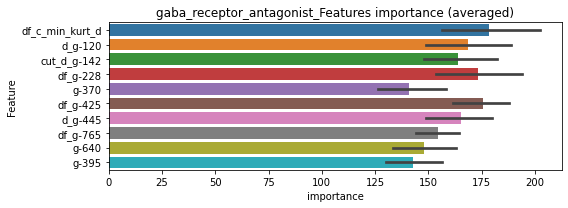

len(train_index) : 2712
len(valid_index) : 904
================================= fold 1/4 gaba_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000620629	valid_1's binary_logloss: 0.0020346
[2000]	training's binary_logloss: 0.000348598	valid_1's binary_logloss: 0.00151207
Early stopping, best iteration is:
[2185]	training's binary_logloss: 0.000329209	valid_1's binary_logloss: 0.00146425


len(train_index) : 2712
len(valid_index) : 904
================================= fold 2/4 gaba_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2712
len(valid_index) : 904
================================= fold 3/4 gaba_receptor_antagonist=================================


Early stopping, best iteration is:
[632]	training's binary_logloss: 0.000939239	valid_1's binary_logloss: 0.00325947
Training until validation scores don't improve for 30 rounds


len(train_index) : 2712
len(valid_index) : 904
================================= fold 4/4 gaba_receptor_antagonist=================================


Early stopping, best iteration is:
[586]	training's binary_logloss: 0.00101913	valid_1's binary_logloss: 0.00683807
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[910]	training's binary_logloss: 0.000648966	valid_1's binary_logloss: 0.00276775


gaba_receptor_antagonist logloss: 0.0035828266522941136


neg labels: 3289 → selected neg labels: 3284


gamma_secretase_inhibitor, len(trt): 56, len(othr): 3284
target_rate: 0.0023516 → Adj_target_rate: 0.0025713
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0048709	valid_1's binary_logloss: 0.0399614
[600]	training's binary_logloss: 0.000867924	valid_1's binary_logloss: 0.0331132
Early stopping, best iteration is:
[682]	training's binary_logloss: 0.000713434	valid_1's binary_logloss: 0.0325486
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00518468	valid_1's binary_logloss: 0.0277351
[600]	training's binary_logloss: 0.000909854	valid_1's binary_logloss: 0.0180065
Early stopping, best iteration is:
[766]	training's binary_logloss: 0.000658551	valid_1's binary_logloss: 0.0173747
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00537663	valid_1's binary_logloss: 0.0145824
[600]	training's binary_logloss: 0.000947826	valid_1's binary_logloss: 0.00562445
Early stopping, best iteration is:
[788]	training's binary_logloss: 0.000661681	valid_1's binary_loglo

1 / 3 AUC score:1.000
y_Threshold: 0.0059791, Threshold: 0.0199209, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00235
Num_p_label: 40.0, conf_0:0.01394, conf_1:0.02590
Num_p_label: 40.0, Expected: 9.4, Adj_threshold_1: 0.0199209
Num_p_label: 10.0, Expected: 9.4, Adj_threshold_2: 0.0499209
threshold: 0.0499209, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0044185	valid_1's binary_logloss: 0.0369762
[600]	training's binary_logloss: 0.000824614	valid_1's binary_logloss: 0.0302639
Early stopping, best iteration is:
[727]	training's binary_logloss: 0.000643048	valid_1's binary_logloss: 0.0298383
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00492723	valid_1's binary_logloss: 0.0258166
[600]	training's binary_logloss: 0.000873471	valid_1's binary_logloss: 0.0159517
Early stopping, best iteration is:
[763]	training's binary_logloss: 0.000647612	valid_1's binary_logloss: 0.015181
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00501602	valid_1's binary_logloss: 0.0119575
[600]	training's binary_logloss: 0.000907302	valid_1's binary_logloss: 0.00409615
[900]	training's binary_logloss: 0.000601491	valid_1's binary_logloss: 0.00326683
Early stopping, best 

2 / 3 AUC score:1.000
y_Threshold: 0.0202164, Threshold: 0.0499209, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 653.0/3802
p_label_rate: 0.0080362 Vs.target_rate: 0.00235
Num_p_label: 32.0, conf_0:0.03994, conf_1:0.05991
Num_p_label: 32.0, Expected: 9.4, Adj_threshold_1: 0.0499209
Num_p_label: 20.0, Expected: 9.4, Adj_threshold_2: 0.0799209
threshold: 0.0799209, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 653.0/3802, y_label_rate: 0.1717517
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00447106	valid_1's binary_logloss: 0.0329138
[600]	training's binary_logloss: 0.000829749	valid_1's binary_logloss: 0.0255297
Early stopping, best iteration is:
[637]	training's binary_logloss: 0.000755158	valid_1's binary_logloss: 0.0251254
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00468097	valid_1's binary_logloss: 0.0209576
[600]	training's binary_logloss: 0.000858554	valid_1's binary_logloss: 0.0114524
Early stopping, best iteration is:
[816]	training's binary_logloss: 0.000603394	valid_1's binary_logloss: 0.0106874
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00469981	valid_1's binary_logloss: 0.0266181
[600]	training's binary_logloss: 0.000863652	valid_1's binary_logloss: 0.0195694
Early stopping, best iteration is:
[630]	training's binary_logloss: 0.000798057	valid_1's binary_loglo

3 / 3 AUC score:1.000
y_Threshold: 0.0205038, Threshold: 0.0799209, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 651.0/3798
p_label_rate: 0.0050226 Vs.target_rate: 0.00235
Num_p_label: 20.0, conf_0:0.07193, conf_1:0.08791
Num_p_label: 20.0, Expected: 9.4, Adj_threshold_1: 0.0799209
threshold: 0.0799209, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 651.0/3798, y_label_rate: 0.1714060


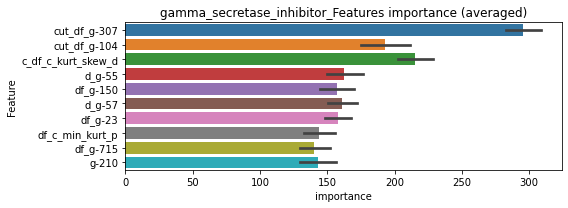

len(train_index) : 2848
len(valid_index) : 950
================================= fold 1/4 gamma_secretase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2848
len(valid_index) : 950
================================= fold 2/4 gamma_secretase_inhibitor=================================


Early stopping, best iteration is:
[778]	training's binary_logloss: 0.000670641	valid_1's binary_logloss: 0.00403671
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000557644	valid_1's binary_logloss: 0.00229138
[2000]	training's binary_logloss: 0.000318042	valid_1's binary_logloss: 0.00198561
[3000]	training's binary_logloss: 0.000248544	valid_1's binary_logloss: 0.00188941
Early stopping, best iteration is:
[3003]	training's binary_logloss: 0.000248245	valid_1's binary_logloss: 0.00188883


len(train_index) : 2849
len(valid_index) : 949
================================= fold 3/4 gamma_secretase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000546517	valid_1's binary_logloss: 0.00319572
[2000]	training's binary_logloss: 0.000311926	valid_1's binary_logloss: 0.00289621
Early stopping, best iteration is:
[2213]	training's binary_logloss: 0.000292537	valid_1's binary_logloss: 0.00286815


len(train_index) : 2849
len(valid_index) : 949
================================= fold 4/4 gamma_secretase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00054293	valid_1's binary_logloss: 0.00239811
Early stopping, best iteration is:
[1405]	training's binary_logloss: 0.000403531	valid_1's binary_logloss: 0.00219608


gamma_secretase_inhibitor logloss: 0.0027488281356826847


neg labels: 3289 → selected neg labels: 3248


glucocorticoid_receptor_agonist, len(trt): 266, len(othr): 3248
target_rate: 0.0111699 → Adj_target_rate: 0.0096682
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0454256	valid_1's binary_logloss: 0.232382
Early stopping, best iteration is:
[499]	training's binary_logloss: 0.0140837	valid_1's binary_logloss: 0.222334
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0426663	valid_1's binary_logloss: 0.248839
Early stopping, best iteration is:
[387]	training's binary_logloss: 0.0245872	valid_1's binary_logloss: 0.244182
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.046746	valid_1's binary_logloss: 0.198352
Early stopping, best iteration is:
[565]	training's binary_logloss: 0.00969515	valid_1's binary_logloss: 0.176973
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.045314	valid_1's binary_logloss: 0.24967


1 / 3 AUC score:0.919
y_Threshold: 0.0750471, Threshold: 0.3177028, pos_neg_ratio: 0.8000000
Remove_noisy_data: 385 → Positive_corect_labels: 522/3512
p_label_rate: 0.0100452 Vs.target_rate: 0.01117


Early stopping, best iteration is:
[458]	training's binary_logloss: 0.0175083	valid_1's binary_logloss: 0.238412


Num_p_label: 40.0, conf_0:0.22239, conf_1:0.41301
threshold: 0.3177028, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 522.0/3512, y_label_rate: 0.1486333
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0217576	valid_1's binary_logloss: 0.171176
Early stopping, best iteration is:
[453]	training's binary_logloss: 0.00725058	valid_1's binary_logloss: 0.167688
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0226376	valid_1's binary_logloss: 0.151047
Early stopping, best iteration is:
[512]	training's binary_logloss: 0.00532877	valid_1's binary_logloss: 0.132175
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0220996	valid_1's binary_logloss: 0.154236
Early stopping, best iteration is:
[469]	training's binary_logloss: 0.00669049	valid_1's binary_logloss: 0.142754
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0239207	valid_1's binary_logloss: 0.160376
Early stopping, best iteration is:
[484]	training's binary_logloss: 0.00654824	valid_1's binary_loglos

2 / 3 AUC score:0.972
y_Threshold: 0.0699650, Threshold: 0.3177028, pos_neg_ratio: 0.8000000
Remove_noisy_data: 128 → Positive_corect_labels: 458.0/3384
p_label_rate: 0.0178302 Vs.target_rate: 0.01117
Num_p_label: 71.0, conf_0:0.25416, conf_1:0.38124
Num_p_label: 71.0, Expected: 44.5, Adj_threshold_1: 0.3177028
Num_p_label: 64.0, Expected: 44.5, Adj_threshold_2: 0.3477028
threshold: 0.3477028, positive_p_label: 64.0/3982, p_label_rate: 0.0160723
positive_y_label: 458.0/3384, y_label_rate: 0.1353428
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0151156	valid_1's binary_logloss: 0.147384
Early stopping, best iteration is:
[473]	training's binary_logloss: 0.00441675	valid_1's binary_logloss: 0.134311
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0161553	valid_1's binary_logloss: 0.118482
Early stopping, best iteration is:
[515]	training's binary_logloss: 0.00370142	valid_1's binary_logloss: 0.105483
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0157194	valid_1's binary_logloss: 0.122604
[600]	training's binary_logloss: 0.00253996	valid_1's binary_logloss: 0.106282
Early stopping, best iteration is:
[616]	training's binary_logloss: 0.00240395	valid_1's binary_logloss: 0.106145
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0156391	valid_1's binary_logloss: 0.121399


3 / 3 AUC score:0.988
y_Threshold: 0.0504273, Threshold: 0.3477028, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[516]	training's binary_logloss: 0.00359195	valid_1's binary_logloss: 0.106262


Remove_noisy_data: 74 → Positive_corect_labels: 421.0/3310
p_label_rate: 0.0175791 Vs.target_rate: 0.01117
Num_p_label: 70.0, conf_0:0.31293, conf_1:0.38247
Num_p_label: 70.0, Expected: 44.5, Adj_threshold_1: 0.3477028
Num_p_label: 62.0, Expected: 44.5, Adj_threshold_2: 0.3777028
threshold: 0.3777028, positive_p_label: 62.0/3982, p_label_rate: 0.0155701
positive_y_label: 421.0/3310, y_label_rate: 0.1271903


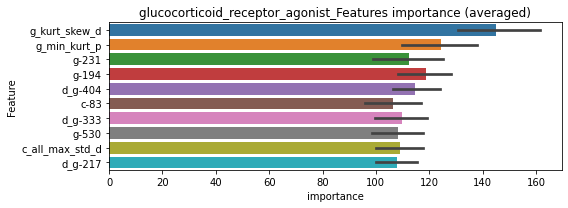

len(train_index) : 2482
len(valid_index) : 828
================================= fold 1/4 glucocorticoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000669956	valid_1's binary_logloss: 0.00272448
[2000]	training's binary_logloss: 0.000374246	valid_1's binary_logloss: 0.00222558
[3000]	training's binary_logloss: 0.000286757	valid_1's binary_logloss: 0.00206768
[4000]	training's binary_logloss: 0.000247503	valid_1's binary_logloss: 0.00199393
Early stopping, best iteration is:
[4437]	training's binary_logloss: 0.00023822	valid_1's binary_logloss: 0.00197653


len(train_index) : 2482
len(valid_index) : 828
================================= fold 2/4 glucocorticoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000649661	valid_1's binary_logloss: 0.00176293
[2000]	training's binary_logloss: 0.000368437	valid_1's binary_logloss: 0.00126737
Early stopping, best iteration is:
[2644]	training's binary_logloss: 0.000305424	valid_1's binary_logloss: 0.00114086


len(train_index) : 2483
len(valid_index) : 827
================================= fold 3/4 glucocorticoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000664103	valid_1's binary_logloss: 0.0035695
Early stopping, best iteration is:
[1629]	training's binary_logloss: 0.000425717	valid_1's binary_logloss: 0.00309956


len(train_index) : 2483
len(valid_index) : 827
================================= fold 4/4 glucocorticoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000636392	valid_1's binary_logloss: 0.00464396
[2000]	training's binary_logloss: 0.000358293	valid_1's binary_logloss: 0.00418689
Early stopping, best iteration is:
[2709]	training's binary_logloss: 0.00028942	valid_1's binary_logloss: 0.00405428


glucocorticoid_receptor_agonist logloss: 0.002568139007093693


neg labels: 3289 → selected neg labels: 3285


glutamate_inhibitor, len(trt): 13, len(othr): 3285
target_rate: 0.0005459 → Adj_target_rate: 0.0007431
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000897625	valid_1's binary_logloss: 0.00215311
Early stopping, best iteration is:
[525]	training's binary_logloss: 0.000320218	valid_1's binary_logloss: 0.00103631
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000923791	valid_1's binary_logloss: 0.00193105
Early stopping, best iteration is:
[522]	training's binary_logloss: 0.000322107	valid_1's binary_logloss: 0.000847744
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000906487	valid_1's binary_logloss: 0.00156811
Early stopping, best iteration is:
[562]	training's binary_logloss: 0.000314659	valid_1's binary_logloss: 0.000639247
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000930229	valid_1's binary_logloss: 0.00219821


1 / 3 AUC score:1.000
y_Threshold: 0.0013683, Threshold: 0.0053100, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00055
Num_p_label: 40.0, conf_0:0.00372, conf_1:0.00690
Num_p_label: 40.0, Expected: 2.2, Adj_threshold_1: 0.0053100
Num_p_label: 4.0, Expected: 2.2, Adj_threshold_2: 0.0353100
threshold: 0.0353100, positive_p_label: 4.0/3982, p_label_rate: 0.0010045


Early stopping, best iteration is:
[487]	training's binary_logloss: 0.000338891	valid_1's binary_logloss: 0.00120176


positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000859866	valid_1's binary_logloss: 0.00155307
Early stopping, best iteration is:
[517]	training's binary_logloss: 0.000312544	valid_1's binary_logloss: 0.000685191
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000860348	valid_1's binary_logloss: 0.00136281
Early stopping, best iteration is:
[514]	training's binary_logloss: 0.000311325	valid_1's binary_logloss: 0.000542313
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000834814	valid_1's binary_logloss: 0.00120769
Early stopping, best iteration is:
[517]	training's binary_logloss: 0.000310439	valid_1's binary_logloss: 0.00046992
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00085589	valid_1's binary_logloss: 0.00181144


2 / 3 AUC score:1.000
y_Threshold: 0.1285222, Threshold: 0.0353100, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0030136 Vs.target_rate: 0.00055
Num_p_label: 12.0, conf_0:0.02825, conf_1:0.04237
Num_p_label: 12.0, Expected: 2.2, Adj_threshold_1: 0.0353100
Num_p_label: 8.0, Expected: 2.2, Adj_threshold_2: 0.0653100
Num_p_label: 5.0, Expected: 2.2, Adj_threshold_3: 0.0953100
threshold: 0.0953100, positive_p_label: 5.0/3982, p_label_rate: 0.0012557


Early stopping, best iteration is:
[517]	training's binary_logloss: 0.00031303	valid_1's binary_logloss: 0.000934394


positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000859866	valid_1's binary_logloss: 0.00155307
Early stopping, best iteration is:
[528]	training's binary_logloss: 0.000312544	valid_1's binary_logloss: 0.000685191
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000860348	valid_1's binary_logloss: 0.00136281
Early stopping, best iteration is:
[514]	training's binary_logloss: 0.000311325	valid_1's binary_logloss: 0.000542313
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000834814	valid_1's binary_logloss: 0.00120769
Early stopping, best iteration is:
[516]	training's binary_logloss: 0.000310439	valid_1's binary_logloss: 0.00046992
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00085589	valid_1's binary_logloss: 0.00181144


3 / 3 AUC score:1.000
y_Threshold: 0.1285222, Threshold: 0.0953100, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0012557 Vs.target_rate: 0.00055
Num_p_label: 5.0, conf_0:0.08578, conf_1:0.10484
Num_p_label: 5.0, Expected: 2.2, Adj_threshold_1: 0.0953100


Early stopping, best iteration is:
[517]	training's binary_logloss: 0.00031303	valid_1's binary_logloss: 0.000934394


threshold: 0.0953100, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


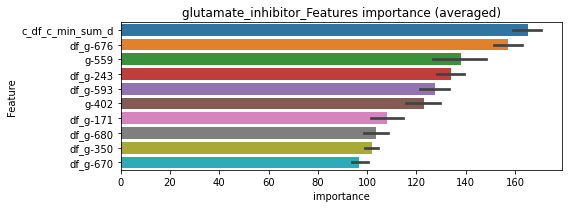

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 glutamate_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000385629	valid_1's binary_logloss: 0.00109999
[2000]	training's binary_logloss: 0.000243766	valid_1's binary_logloss: 0.000902649
[3000]	training's binary_logloss: 0.000199903	valid_1's binary_logloss: 0.000852539
[4000]	training's binary_logloss: 0.000176851	valid_1's binary_logloss: 0.000828271
Early stopping, best iteration is:
[4242]	training's binary_logloss: 0.000173517	valid_1's binary_logloss: 0.000824541


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 glutamate_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0003959	valid_1's binary_logloss: 0.000609749
[2000]	training's binary_logloss: 0.000253277	valid_1's binary_logloss: 0.00042244
[3000]	training's binary_logloss: 0.000210858	valid_1's binary_logloss: 0.000356578
[4000]	training's binary_logloss: 0.000187998	valid_1's binary_logloss: 0.000333532
[5000]	training's binary_logloss: 0.000175776	valid_1's binary_logloss: 0.000322125
Early stopping, best iteration is:
[5291]	training's binary_logloss: 0.000173167	valid_1's binary_logloss: 0.000319653


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 glutamate_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000394642	valid_1's binary_logloss: 0.000386189
[2000]	training's binary_logloss: 0.000246364	valid_1's binary_logloss: 0.000230341
[3000]	training's binary_logloss: 0.000202816	valid_1's binary_logloss: 0.000181555
[4000]	training's binary_logloss: 0.000181402	valid_1's binary_logloss: 0.000156628
[5000]	training's binary_logloss: 0.000169563	valid_1's binary_logloss: 0.000142768
[6000]	training's binary_logloss: 0.000161647	valid_1's binary_logloss: 0.000133439
[7000]	training's binary_logloss: 0.000155907	valid_1's binary_logloss: 0.000126643
[8000]	training's binary_logloss: 0.000151805	valid_1's binary_logloss: 0.000121772
Early stopping, best iteration is:
[8834]	training's binary_logloss: 0.000149142	valid_1's binary_logloss: 0.000118592


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 glutamate_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000398919	valid_1's binary_logloss: 0.0012036
Early stopping, best iteration is:
[1420]	training's binary_logloss: 0.000303976	valid_1's binary_logloss: 0.0011034


glutamate_inhibitor logloss: 0.0005920717643270932


neg labels: 3289 → selected neg labels: 3283


glutamate_receptor_agonist, len(trt): 74, len(othr): 3283
target_rate: 0.0031074 → Adj_target_rate: 0.0032587
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0072861	valid_1's binary_logloss: 0.0514425
[600]	training's binary_logloss: 0.00117164	valid_1's binary_logloss: 0.0393519
Early stopping, best iteration is:
[689]	training's binary_logloss: 0.000922647	valid_1's binary_logloss: 0.038717
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00709598	valid_1's binary_logloss: 0.0431136
[600]	training's binary_logloss: 0.00115609	valid_1's binary_logloss: 0.0338789
Early stopping, best iteration is:
[622]	training's binary_logloss: 0.0010862	valid_1's binary_logloss: 0.0337428
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00748636	valid_1's binary_logloss: 0.0250979
[600]	training's binary_logloss: 0.00126739	valid_1's binary_logloss: 0.0146505
Early stopping, best iteration is:
[827]	training's binary_logloss: 0.000775451	valid_1's binary_logloss: 0.0

1 / 3 AUC score:0.999
y_Threshold: 0.0101774, Threshold: 0.2138980, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[549]	training's binary_logloss: 0.00141616	valid_1's binary_logloss: 0.0329335


Remove_noisy_data: 140 → Positive_corect_labels: 652/3799
p_label_rate: 0.0100452 Vs.target_rate: 0.00311
Num_p_label: 40.0, conf_0:0.14973, conf_1:0.27807
Num_p_label: 40.0, Expected: 12.4, Adj_threshold_1: 0.2138980
Num_p_label: 35.0, Expected: 12.4, Adj_threshold_2: 0.2438980
Num_p_label: 34.0, Expected: 12.4, Adj_threshold_3: 0.2738980
Num_p_label: 30.0, Expected: 12.4, Adj_threshold_4: 0.3038980
Num_p_label: 27.0, Expected: 12.4, Adj_threshold_5: 0.3338980
Num_p_label: 24.0, Expected: 12.4, Adj_threshold_6: 0.3638980
Num_p_label: 24.0, Expected: 12.4, Adj_threshold_7: 0.3938980
Num_p_label: 20.0, Expected: 12.4, Adj_threshold_8: 0.4238980
Num_p_label: 17.0, Expected: 12.4, Adj_threshold_9: 0.4538980
threshold: 0.4538980, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 652.0/3799, y_label_rate: 0.1716241
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00622778	valid_1's binary_logloss: 0.0391533
[600]	training's binary_logloss: 0.00107995	valid_1's binary_logloss: 0.0266986
Early stopping, best iteration is:
[776]	training's binary_logloss: 0.000736272	valid_1's binary_logloss: 0.0254481
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00669082	valid_1's binary_logloss: 0.0427137
[600]	training's binary_logloss: 0.00111203	valid_1's binary_logloss: 0.0336725
Early stopping, best iteration is:
[635]	training's binary_logloss: 0.00100344	valid_1's binary_logloss: 0.0331809
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00620435	valid_1's binary_logloss: 0.0410094
Early stopping, best iteration is:
[545]	training's binary_logloss: 0.00128854	valid_1's binary_logloss: 0.0334267
Training until validation scores don't improve for 30 rounds
[300]	trai

2 / 3 AUC score:1.000
y_Threshold: 0.0426536, Threshold: 0.4538980, pos_neg_ratio: 0.8000000
Remove_noisy_data: 20 → Positive_corect_labels: 642.0/3779
p_label_rate: 0.0135610 Vs.target_rate: 0.00311
Num_p_label: 54.0, conf_0:0.36312, conf_1:0.54468
Num_p_label: 54.0, Expected: 12.4, Adj_threshold_1: 0.4538980
Num_p_label: 50.0, Expected: 12.4, Adj_threshold_2: 0.4838980
Num_p_label: 48.0, Expected: 12.4, Adj_threshold_3: 0.5138980
Num_p_label: 43.0, Expected: 12.4, Adj_threshold_4: 0.5438980
Num_p_label: 38.0, Expected: 12.4, Adj_threshold_5: 0.5738980
Num_p_label: 37.0, Expected: 12.4, Adj_threshold_6: 0.6038980
Num_p_label: 33.0, Expected: 12.4, Adj_threshold_7: 0.6338980
Num_p_label: 31.0, Expected: 12.4, Adj_threshold_8: 0.6638980
Num_p_label: 25.0, Expected: 12.4, Adj_threshold_9: 0.6938980
Num_p_label: 25.0, Expected: 12.4, Adj_threshold_10: 0.7238980
threshold: 0.7538980, positive_p_label: 23.0/3982, p_label_rate: 0.0057760
positive_y_label: 642.0/3779, y_label_rate: 0.1698862


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00569818	valid_1's binary_logloss: 0.03811
[600]	training's binary_logloss: 0.00100245	valid_1's binary_logloss: 0.0270596
Early stopping, best iteration is:
[741]	training's binary_logloss: 0.0007281	valid_1's binary_logloss: 0.0261848
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00565375	valid_1's binary_logloss: 0.0301439
[600]	training's binary_logloss: 0.00100186	valid_1's binary_logloss: 0.0209852
Early stopping, best iteration is:
[821]	training's binary_logloss: 0.000659098	valid_1's binary_logloss: 0.0198982
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00614716	valid_1's binary_logloss: 0.0199306
[600]	training's binary_logloss: 0.00105888	valid_1's binary_logloss: 0.0100609
Early stopping, best iteration is:
[848]	training's binary_logloss: 0.000683648	valid_1's binary_logloss: 0.0

3 / 3 AUC score:1.000
y_Threshold: 0.0424817, Threshold: 0.7538980, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 638.0/3771
p_label_rate: 0.0082873 Vs.target_rate: 0.00311
Num_p_label: 33.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 33.0, Expected: 12.4, Adj_threshold_1: 0.7538980
Num_p_label: 26.0, Expected: 12.4, Adj_threshold_2: 0.7838980
threshold: 0.7838980, positive_p_label: 26.0/3982, p_label_rate: 0.0065294
positive_y_label: 638.0/3771, y_label_rate: 0.1691859


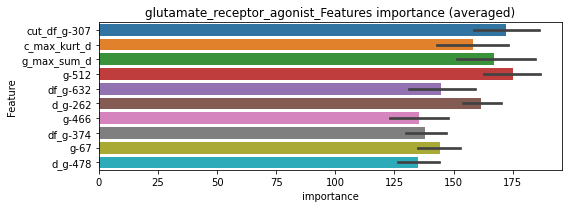

len(train_index) : 2828
len(valid_index) : 943
================================= fold 1/4 glutamate_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000561582	valid_1's binary_logloss: 0.00205471
[2000]	training's binary_logloss: 0.000318184	valid_1's binary_logloss: 0.00157948
Early stopping, best iteration is:
[2932]	training's binary_logloss: 0.000251771	valid_1's binary_logloss: 0.00143475


len(train_index) : 2828
len(valid_index) : 943
================================= fold 2/4 glutamate_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00055909	valid_1's binary_logloss: 0.00576952
[2000]	training's binary_logloss: 0.000320918	valid_1's binary_logloss: 0.00516662
Early stopping, best iteration is:
[2560]	training's binary_logloss: 0.000273785	valid_1's binary_logloss: 0.00502422


len(train_index) : 2828
len(valid_index) : 943
================================= fold 3/4 glutamate_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000555976	valid_1's binary_logloss: 0.00236736
[2000]	training's binary_logloss: 0.000319386	valid_1's binary_logloss: 0.0019993
[3000]	training's binary_logloss: 0.000251341	valid_1's binary_logloss: 0.00188633
[4000]	training's binary_logloss: 0.000219816	valid_1's binary_logloss: 0.00182654
Early stopping, best iteration is:
[4141]	training's binary_logloss: 0.000216866	valid_1's binary_logloss: 0.00182114


len(train_index) : 2829
len(valid_index) : 942
================================= fold 4/4 glutamate_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000530863	valid_1's binary_logloss: 0.0013782
[2000]	training's binary_logloss: 0.00030675	valid_1's binary_logloss: 0.00107438
[3000]	training's binary_logloss: 0.000242033	valid_1's binary_logloss: 0.000969009
Early stopping, best iteration is:
[3414]	training's binary_logloss: 0.000226134	valid_1's binary_logloss: 0.000940423


glutamate_receptor_agonist logloss: 0.0023066075331120268


neg labels: 3289 → selected neg labels: 3235


glutamate_receptor_antagonist, len(trt): 367, len(othr): 3235
target_rate: 0.0154111 → Adj_target_rate: 0.0127105
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[262]	training's binary_logloss: 0.0741378	valid_1's binary_logloss: 0.330332
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.057675	valid_1's binary_logloss: 0.328
Early stopping, best iteration is:
[331]	training's binary_logloss: 0.0483524	valid_1's binary_logloss: 0.326966
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0571404	valid_1's binary_logloss: 0.33004
Early stopping, best iteration is:
[337]	training's binary_logloss: 0.0459943	valid_1's binary_logloss: 0.327704
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0583703	valid_1's binary_logloss: 0.293949


1 / 3 AUC score:0.826
y_Threshold: 0.1113811, Threshold: 0.3229121, pos_neg_ratio: 0.8000000
Remove_noisy_data: 586 → Positive_corect_labels: 419/3296
p_label_rate: 0.0100452 Vs.target_rate: 0.01541
Num_p_label: 40.0, conf_0:0.22604, conf_1:0.41979
Num_p_label: 40.0, Expected: 61.4, Adj_threshold_1: 0.3229121
Num_p_label: 54.0, Expected: 61.4, Adj_threshold_2: 0.2929121


Early stopping, best iteration is:
[423]	training's binary_logloss: 0.0285635	valid_1's binary_logloss: 0.287257


threshold: 0.2929121, positive_p_label: 54.0/3982, p_label_rate: 0.0135610
positive_y_label: 419.0/3296, y_label_rate: 0.1271238
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0221135	valid_1's binary_logloss: 0.161762
Early stopping, best iteration is:
[546]	training's binary_logloss: 0.00446288	valid_1's binary_logloss: 0.149256
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0206776	valid_1's binary_logloss: 0.207401
Early stopping, best iteration is:
[295]	training's binary_logloss: 0.021491	valid_1's binary_logloss: 0.206411
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0214001	valid_1's binary_logloss: 0.168567
Early stopping, best iteration is:
[475]	training's binary_logloss: 0.00636533	valid_1's binary_logloss: 0.156758
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0214591	valid_1's binary_logloss: 0.160959


2 / 3 AUC score:0.972
y_Threshold: 0.0687514, Threshold: 0.2929121, pos_neg_ratio: 0.8000000
Remove_noisy_data: 148 → Positive_corect_labels: 345.0/3148
p_label_rate: 0.0205927 Vs.target_rate: 0.01541
Num_p_label: 82.0, conf_0:0.23433, conf_1:0.35149


Early stopping, best iteration is:
[473]	training's binary_logloss: 0.00649007	valid_1's binary_logloss: 0.152162


threshold: 0.2929121, positive_p_label: 82.0/3982, p_label_rate: 0.0205927
positive_y_label: 345.0/3148, y_label_rate: 0.1095934
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0137804	valid_1's binary_logloss: 0.112096
Early stopping, best iteration is:
[504]	training's binary_logloss: 0.00349763	valid_1's binary_logloss: 0.0986874
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0130679	valid_1's binary_logloss: 0.162847
Early stopping, best iteration is:
[383]	training's binary_logloss: 0.00685505	valid_1's binary_logloss: 0.159889
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0123828	valid_1's binary_logloss: 0.148999
Early stopping, best iteration is:
[389]	training's binary_logloss: 0.00630418	valid_1's binary_logloss: 0.144922
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0125945	valid_1's binary_logloss: 0.133194


3 / 3 AUC score:0.979
y_Threshold: 0.0525387, Threshold: 0.2929121, pos_neg_ratio: 0.8000000
Remove_noisy_data: 84 → Positive_corect_labels: 303.0/3064


Early stopping, best iteration is:
[414]	training's binary_logloss: 0.00539472	valid_1's binary_logloss: 0.125115


p_label_rate: 0.0203415 Vs.target_rate: 0.01541
Num_p_label: 81.0, conf_0:0.26362, conf_1:0.32220
threshold: 0.2929121, positive_p_label: 81.0/3982, p_label_rate: 0.0203415
positive_y_label: 303.0/3064, y_label_rate: 0.0988903


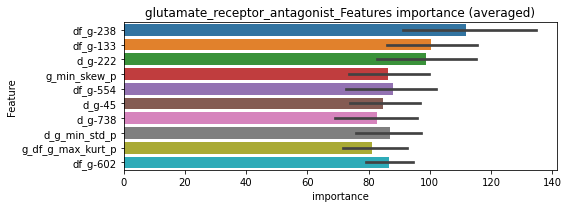

len(train_index) : 2298
len(valid_index) : 766
================================= fold 1/4 glutamate_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000690871	valid_1's binary_logloss: 0.00352288
Early stopping, best iteration is:
[1733]	training's binary_logloss: 0.000433895	valid_1's binary_logloss: 0.00319068


len(train_index) : 2298
len(valid_index) : 766
================================= fold 2/4 glutamate_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000662914	valid_1's binary_logloss: 0.00184833
[2000]	training's binary_logloss: 0.000380599	valid_1's binary_logloss: 0.00110136
[3000]	training's binary_logloss: 0.000291162	valid_1's binary_logloss: 0.000835272
[4000]	training's binary_logloss: 0.000248345	valid_1's binary_logloss: 0.000701273
[5000]	training's binary_logloss: 0.000226232	valid_1's binary_logloss: 0.000630983
[6000]	training's binary_logloss: 0.000212369	valid_1's binary_logloss: 0.00058627
[7000]	training's binary_logloss: 0.000203371	valid_1's binary_logloss: 0.000556338
Early stopping, best iteration is:
[7350]	training's binary_logloss: 0.000200959	valid_1's binary_logloss: 0.000548281


len(train_index) : 2298
len(valid_index) : 766
================================= fold 3/4 glutamate_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000686325	valid_1's binary_logloss: 0.00887091
[2000]	training's binary_logloss: 0.000392865	valid_1's binary_logloss: 0.00836961
Early stopping, best iteration is:
[2110]	training's binary_logloss: 0.000380566	valid_1's binary_logloss: 0.0083408


len(train_index) : 2298
len(valid_index) : 766
================================= fold 4/4 glutamate_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000567572	valid_1's binary_logloss: 0.00136584
[2000]	training's binary_logloss: 0.000312485	valid_1's binary_logloss: 0.000757691
[3000]	training's binary_logloss: 0.000229202	valid_1's binary_logloss: 0.000557202
[4000]	training's binary_logloss: 0.000189765	valid_1's binary_logloss: 0.00046195
[5000]	training's binary_logloss: 0.000169704	valid_1's binary_logloss: 0.000413479
[6000]	training's binary_logloss: 0.00015677	valid_1's binary_logloss: 0.000381994
[7000]	training's binary_logloss: 0.000147775	valid_1's binary_logloss: 0.000360114
[8000]	training's binary_logloss: 0.000141623	valid_1's binary_logloss: 0.000345161
[9000]	training's binary_logloss: 0.000137252	valid_1's binary_logloss: 0.000334529
[10000]	training's binary_logloss: 0.000134126	valid_1's binary_logloss: 0.00032699
Did not meet early stopping. Best iteration is:
[9999]	training's binary_logloss: 0.000134126	valid_1'

glutamate_receptor_antagonist logloss: 0.003102955024866488


neg labels: 3289 → selected neg labels: 3287


gonadotropin_receptor_agonist, len(trt): 18, len(othr): 3287
target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00146049	valid_1's binary_logloss: 0.00700384
[600]	training's binary_logloss: 0.000383148	valid_1's binary_logloss: 0.00386375
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000383256	valid_1's binary_logloss: 0.00386189
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0014835	valid_1's binary_logloss: 0.00429996
Early stopping, best iteration is:
[563]	training's binary_logloss: 0.000392354	valid_1's binary_logloss: 0.00242071
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00145917	valid_1's binary_logloss: 0.00408268
Early stopping, best iteration is:
[567]	training's binary_logloss: 0.000387582	valid_1's binary_logloss: 0.00207707
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00144565	valid_1's binary_logloss: 0.00392051


1 / 3 AUC score:1.000
y_Threshold: 0.0020560, Threshold: 0.0076895, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, conf_0:0.00538, conf_1:0.01000
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_1: 0.0076895
Num_p_label: 5.0, Expected: 3.0, Adj_threshold_2: 0.0376895


[600]	training's binary_logloss: 0.000374817	valid_1's binary_logloss: 0.00160161
Early stopping, best iteration is:
[588]	training's binary_logloss: 0.000375722	valid_1's binary_logloss: 0.00160156


threshold: 0.0376895, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00134883	valid_1's binary_logloss: 0.00606068
Early stopping, best iteration is:
[567]	training's binary_logloss: 0.000377782	valid_1's binary_logloss: 0.00388547
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00137599	valid_1's binary_logloss: 0.00364082
Early stopping, best iteration is:
[549]	training's binary_logloss: 0.000383206	valid_1's binary_logloss: 0.00186992
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00133924	valid_1's binary_logloss: 0.00340709
[600]	training's binary_logloss: 0.00036921	valid_1's binary_logloss: 0.00173175
Early stopping, best iteration is:
[583]	training's binary_logloss: 0.000370968	valid_1's binary_logloss: 0.001727
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00135178	valid_1's binary_logloss: 0.0028463


2 / 3 AUC score:1.000
y_Threshold: 0.0412028, Threshold: 0.0376895, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0052737 Vs.target_rate: 0.00076
Num_p_label: 21.0, conf_0:0.03015, conf_1:0.04523
Num_p_label: 21.0, Expected: 3.0, Adj_threshold_1: 0.0376895
Num_p_label: 12.0, Expected: 3.0, Adj_threshold_2: 0.0676895
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_3: 0.0976895
threshold: 0.0976895, positive_p_label: 6.0/3982, p_label_rate: 0.0015068


Early stopping, best iteration is:
[544]	training's binary_logloss: 0.00038038	valid_1's binary_logloss: 0.00109511


positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00134883	valid_1's binary_logloss: 0.00606068
Early stopping, best iteration is:
[567]	training's binary_logloss: 0.000377782	valid_1's binary_logloss: 0.00388547
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00137599	valid_1's binary_logloss: 0.00364082
Early stopping, best iteration is:
[549]	training's binary_logloss: 0.000383206	valid_1's binary_logloss: 0.00186992
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00133924	valid_1's binary_logloss: 0.00340709
[600]	training's binary_logloss: 0.00036921	valid_1's binary_logloss: 0.00173175
Early stopping, best iteration is:
[583]	training's binary_logloss: 0.000370968	valid_1's binary_logloss: 0.001727
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00135178	valid_1's binary_logloss: 0.0028463


3 / 3 AUC score:1.000
y_Threshold: 0.0412028, Threshold: 0.0976895, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0015068 Vs.target_rate: 0.00076


Early stopping, best iteration is:
[544]	training's binary_logloss: 0.00038038	valid_1's binary_logloss: 0.00109511


Num_p_label: 6.0, conf_0:0.08792, conf_1:0.10746
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_1: 0.0976895
threshold: 0.0976895, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


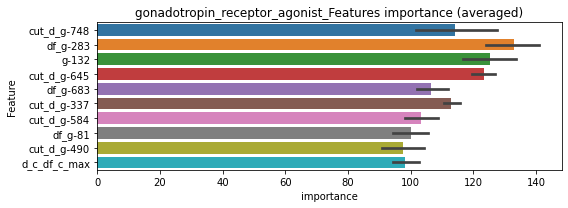

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 gonadotropin_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000446515	valid_1's binary_logloss: 0.00219681
[2000]	training's binary_logloss: 0.000271269	valid_1's binary_logloss: 0.00194893
Early stopping, best iteration is:
[2245]	training's binary_logloss: 0.000255392	valid_1's binary_logloss: 0.00192546


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 gonadotropin_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000440879	valid_1's binary_logloss: 0.000950679
[2000]	training's binary_logloss: 0.000264654	valid_1's binary_logloss: 0.00072903
Early stopping, best iteration is:
[2478]	training's binary_logloss: 0.000234082	valid_1's binary_logloss: 0.000688494


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 gonadotropin_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000455288	valid_1's binary_logloss: 0.00264443
Early stopping, best iteration is:
[1648]	training's binary_logloss: 0.000309536	valid_1's binary_logloss: 0.00246736


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 gonadotropin_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[954]	training's binary_logloss: 0.000492687	valid_1's binary_logloss: 0.00107342


gonadotropin_receptor_agonist logloss: 0.0015390767961128483


neg labels: 3289 → selected neg labels: 3281


gsk_inhibitor, len(trt): 60, len(othr): 3281
target_rate: 0.0025195 → Adj_target_rate: 0.0027266
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00608007	valid_1's binary_logloss: 0.0367521
[600]	training's binary_logloss: 0.00105179	valid_1's binary_logloss: 0.0230096
Early stopping, best iteration is:
[856]	training's binary_logloss: 0.000663955	valid_1's binary_logloss: 0.0213261
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00616863	valid_1's binary_logloss: 0.0288843
[600]	training's binary_logloss: 0.00105434	valid_1's binary_logloss: 0.0170906
Early stopping, best iteration is:
[703]	training's binary_logloss: 0.000813846	valid_1's binary_logloss: 0.0163198
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00675408	valid_1's binary_logloss: 0.0150603
[600]	training's binary_logloss: 0.00112036	valid_1's binary_logloss: 0.0042059
[900]	training's binary_logloss: 0.000680973	valid_1's binary_logloss: 0.00303735
Early stopping, best it

1 / 3 AUC score:1.000
y_Threshold: 0.0085041, Threshold: 0.0403526, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00252
Num_p_label: 40.0, conf_0:0.02825, conf_1:0.05246
Num_p_label: 40.0, Expected: 10.0, Adj_threshold_1: 0.0403526
Num_p_label: 16.0, Expected: 10.0, Adj_threshold_2: 0.0703526
Num_p_label: 9.0, Expected: 10.0, Adj_threshold_3: 0.1003526
threshold: 0.1003526, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00583646	valid_1's binary_logloss: 0.033264
[600]	training's binary_logloss: 0.0010007	valid_1's binary_logloss: 0.0210051
Early stopping, best iteration is:
[677]	training's binary_logloss: 0.000822552	valid_1's binary_logloss: 0.0203338
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0057064	valid_1's binary_logloss: 0.0259178
[600]	training's binary_logloss: 0.00100789	valid_1's binary_logloss: 0.0148834
Early stopping, best iteration is:
[762]	training's binary_logloss: 0.000716528	valid_1's binary_logloss: 0.0138745
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00572254	valid_1's binary_logloss: 0.0138445
[600]	training's binary_logloss: 0.00104516	valid_1's binary_logloss: 0.00392348
[900]	training's binary_logloss: 0.000660087	valid_1's binary_logloss: 0.00281499
Early stopping, best iter

2 / 3 AUC score:1.000
y_Threshold: 0.0501087, Threshold: 0.1003526, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3803
p_label_rate: 0.0090407 Vs.target_rate: 0.00252
Num_p_label: 36.0, conf_0:0.08028, conf_1:0.12042
Num_p_label: 36.0, Expected: 10.0, Adj_threshold_1: 0.1003526
Num_p_label: 20.0, Expected: 10.0, Adj_threshold_2: 0.1303526
Num_p_label: 14.0, Expected: 10.0, Adj_threshold_3: 0.1603526
threshold: 0.1603526, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 655.0/3803, y_label_rate: 0.1722324
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00549586	valid_1's binary_logloss: 0.0303523
[600]	training's binary_logloss: 0.000993192	valid_1's binary_logloss: 0.0202548
Early stopping, best iteration is:
[747]	training's binary_logloss: 0.000721496	valid_1's binary_logloss: 0.0195043
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0054515	valid_1's binary_logloss: 0.02872
[600]	training's binary_logloss: 0.00100072	valid_1's binary_logloss: 0.0177515
Early stopping, best iteration is:
[789]	training's binary_logloss: 0.000692024	valid_1's binary_logloss: 0.0163429
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00569286	valid_1's binary_logloss: 0.0336897
[600]	training's binary_logloss: 0.00101272	valid_1's binary_logloss: 0.0259946
Early stopping, best iteration is:
[591]	training's binary_logloss: 0.00103943	valid_1's binary_logloss: 0.

3 / 3 AUC score:1.000
y_Threshold: 0.0363120, Threshold: 0.1603526, pos_neg_ratio: 0.8000000
Remove_noisy_data: 12 → Positive_corect_labels: 649.0/3791
p_label_rate: 0.0040181 Vs.target_rate: 0.00252
Num_p_label: 16.0, conf_0:0.14432, conf_1:0.17639
Num_p_label: 16.0, Expected: 10.0, Adj_threshold_1: 0.1603526
Num_p_label: 13.0, Expected: 10.0, Adj_threshold_2: 0.1903526
threshold: 0.1903526, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 649.0/3791, y_label_rate: 0.1711949


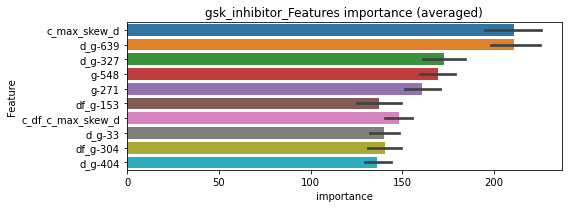

len(train_index) : 2843
len(valid_index) : 948
================================= fold 1/4 gsk_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2843
len(valid_index) : 948
================================= fold 2/4 gsk_inhibitor=================================


Early stopping, best iteration is:
[624]	training's binary_logloss: 0.000867249	valid_1's binary_logloss: 0.00265836
Training until validation scores don't improve for 30 rounds


len(train_index) : 2843


Early stopping, best iteration is:
[903]	training's binary_logloss: 0.000603615	valid_1's binary_logloss: 0.00314669


len(valid_index) : 948
================================= fold 3/4 gsk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000554658	valid_1's binary_logloss: 0.00212095
Early stopping, best iteration is:
[1628]	training's binary_logloss: 0.000363759	valid_1's binary_logloss: 0.00190962


len(train_index) : 2844
len(valid_index) : 947
================================= fold 4/4 gsk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000559814	valid_1's binary_logloss: 0.00284192
[2000]	training's binary_logloss: 0.00031925	valid_1's binary_logloss: 0.00244986
Early stopping, best iteration is:
[2099]	training's binary_logloss: 0.000310302	valid_1's binary_logloss: 0.002435


gsk_inhibitor logloss: 0.002537822852565097


neg labels: 3289 → selected neg labels: 3273


hcv_inhibitor, len(trt): 72, len(othr): 3273
target_rate: 0.0030234 → Adj_target_rate: 0.0031837
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00638461	valid_1's binary_logloss: 0.0514868
[600]	training's binary_logloss: 0.00113027	valid_1's binary_logloss: 0.0430139
Early stopping, best iteration is:
[622]	training's binary_logloss: 0.00105562	valid_1's binary_logloss: 0.0429032
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00647834	valid_1's binary_logloss: 0.032826
[600]	training's binary_logloss: 0.00115881	valid_1's binary_logloss: 0.0196291
Early stopping, best iteration is:
[628]	training's binary_logloss: 0.00106222	valid_1's binary_logloss: 0.01936
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0069559	valid_1's binary_logloss: 0.0345915
[600]	training's binary_logloss: 0.0011864	valid_1's binary_logloss: 0.0221432
Early stopping, best iteration is:
[767]	training's binary_logloss: 0.000807929	valid_1's binary_logloss: 0.0213

1 / 3 AUC score:0.999
y_Threshold: 0.0083294, Threshold: 0.0335778, pos_neg_ratio: 0.8000000
Remove_noisy_data: 138 → Positive_corect_labels: 651/3789
p_label_rate: 0.0100452 Vs.target_rate: 0.00302
Num_p_label: 40.0, conf_0:0.02350, conf_1:0.04365
Num_p_label: 40.0, Expected: 12.0, Adj_threshold_1: 0.0335778
Num_p_label: 12.0, Expected: 12.0, Adj_threshold_2: 0.0635778
threshold: 0.0635778, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 651.0/3789, y_label_rate: 0.1718131
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00598267	valid_1's binary_logloss: 0.0270027
[600]	training's binary_logloss: 0.00110215	valid_1's binary_logloss: 0.0152287
Early stopping, best iteration is:
[789]	training's binary_logloss: 0.000741103	valid_1's binary_logloss: 0.0139521
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00573424	valid_1's binary_logloss: 0.0411418
[600]	training's binary_logloss: 0.00106153	valid_1's binary_logloss: 0.028742
Early stopping, best iteration is:
[680]	training's binary_logloss: 0.000865384	valid_1's binary_logloss: 0.0278301
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00600076	valid_1's binary_logloss: 0.0314353
[600]	training's binary_logloss: 0.00109483	valid_1's binary_logloss: 0.0180097
Early stopping, best iteration is:
[753]	training's binary_logloss: 0.000777123	valid_1's binary_logloss: 

2 / 3 AUC score:1.000
y_Threshold: 0.0338131, Threshold: 0.0635778, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 648.0/3783
p_label_rate: 0.0145655 Vs.target_rate: 0.00302
Num_p_label: 58.0, conf_0:0.05086, conf_1:0.07629
Num_p_label: 58.0, Expected: 12.0, Adj_threshold_1: 0.0635778
Num_p_label: 40.0, Expected: 12.0, Adj_threshold_2: 0.0935778
Num_p_label: 29.0, Expected: 12.0, Adj_threshold_3: 0.1235778
Num_p_label: 20.0, Expected: 12.0, Adj_threshold_4: 0.1535778
Num_p_label: 19.0, Expected: 12.0, Adj_threshold_5: 0.1835778
Num_p_label: 13.0, Expected: 12.0, Adj_threshold_6: 0.2135778
threshold: 0.2135778, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 648.0/3783, y_label_rate: 0.1712926
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00571804	valid_1's binary_logloss: 0.0347722
[600]	training's binary_logloss: 0.0010579	valid_1's binary_logloss: 0.0231092
Early stopping, best iteration is:
[769]	training's binary_logloss: 0.000735621	valid_1's binary_logloss: 0.0220986
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00592511	valid_1's binary_logloss: 0.0283208
[600]	training's binary_logloss: 0.00107955	valid_1's binary_logloss: 0.0183506
Early stopping, best iteration is:
[782]	training's binary_logloss: 0.000735715	valid_1's binary_logloss: 0.0173735
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00577594	valid_1's binary_logloss: 0.0313636
[600]	training's binary_logloss: 0.00106043	valid_1's binary_logloss: 0.0206847
Early stopping, best iteration is:
[761]	training's binary_logloss: 0.000747061	valid_1's binary_logloss: 

3 / 3 AUC score:1.000
y_Threshold: 0.0364179, Threshold: 0.2135778, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 646.0/3779
p_label_rate: 0.0052737 Vs.target_rate: 0.00302
Num_p_label: 21.0, conf_0:0.19222, conf_1:0.23494
Num_p_label: 21.0, Expected: 12.0, Adj_threshold_1: 0.2135778
Num_p_label: 19.0, Expected: 12.0, Adj_threshold_2: 0.2435778
Num_p_label: 15.0, Expected: 12.0, Adj_threshold_3: 0.2735778
threshold: 0.2735778, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 646.0/3779, y_label_rate: 0.1709447


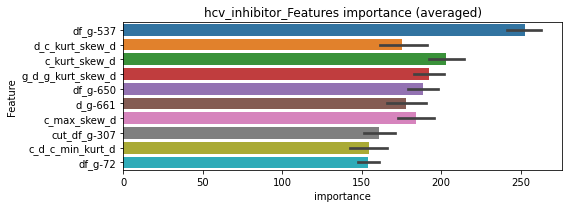

len(train_index) : 2834
len(valid_index) : 945
================================= fold 1/4 hcv_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000560294	valid_1's binary_logloss: 0.00365917
Early stopping, best iteration is:
[1623]	training's binary_logloss: 0.000366842	valid_1's binary_logloss: 0.00334663


len(train_index) : 2834
len(valid_index) : 945
================================= fold 2/4 hcv_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000579287	valid_1's binary_logloss: 0.00167692
Early stopping, best iteration is:
[1627]	training's binary_logloss: 0.000374195	valid_1's binary_logloss: 0.00146188


len(train_index) : 2834
len(valid_index) : 945
================================= fold 3/4 hcv_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000564525	valid_1's binary_logloss: 0.00319408
Early stopping, best iteration is:
[1529]	training's binary_logloss: 0.000389817	valid_1's binary_logloss: 0.00298381


len(train_index) : 2835
len(valid_index) : 944
================================= fold 4/4 hcv_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000551641	valid_1's binary_logloss: 0.00380277
[2000]	training's binary_logloss: 0.000316225	valid_1's binary_logloss: 0.00350241
Early stopping, best iteration is:
[2461]	training's binary_logloss: 0.000275763	valid_1's binary_logloss: 0.00345432


hcv_inhibitor logloss: 0.0028122864306586734


neg labels: 3289 → selected neg labels: 3275


hdac_inhibitor, len(trt): 106, len(othr): 3275
target_rate: 0.0044512 → Adj_target_rate: 0.0044229
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0116871	valid_1's binary_logloss: 0.0916657
[600]	training's binary_logloss: 0.00181803	valid_1's binary_logloss: 0.0736633
Early stopping, best iteration is:
[735]	training's binary_logloss: 0.00123889	valid_1's binary_logloss: 0.0724172
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0112395	valid_1's binary_logloss: 0.0812377
[600]	training's binary_logloss: 0.00180166	valid_1's binary_logloss: 0.0655107
Early stopping, best iteration is:
[671]	training's binary_logloss: 0.00144729	valid_1's binary_logloss: 0.0650949
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0121829	valid_1's binary_logloss: 0.0765861
Early stopping, best iteration is:
[550]	training's binary_logloss: 0.00228799	valid_1's binary_logloss: 0.0666427
Training until validation scores don't improve for 30 rounds
[300]	training

1 / 3 AUC score:0.993
y_Threshold: 0.0172022, Threshold: 0.1066183, pos_neg_ratio: 0.8000000
Remove_noisy_data: 163 → Positive_corect_labels: 639/3767
p_label_rate: 0.0100452 Vs.target_rate: 0.00445
Num_p_label: 40.0, conf_0:0.07463, conf_1:0.13860
Num_p_label: 40.0, Expected: 17.7, Adj_threshold_1: 0.1066183
Num_p_label: 30.0, Expected: 17.7, Adj_threshold_2: 0.1366183
Num_p_label: 25.0, Expected: 17.7, Adj_threshold_3: 0.1666183
threshold: 0.1666183, positive_p_label: 25.0/3982, p_label_rate: 0.0062783
positive_y_label: 639.0/3767, y_label_rate: 0.1696310
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00989551	valid_1's binary_logloss: 0.0675479
[600]	training's binary_logloss: 0.00160152	valid_1's binary_logloss: 0.0486803
Early stopping, best iteration is:
[635]	training's binary_logloss: 0.00143277	valid_1's binary_logloss: 0.0481583
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0100379	valid_1's binary_logloss: 0.0538288
[600]	training's binary_logloss: 0.00164371	valid_1's binary_logloss: 0.0339237
[900]	training's binary_logloss: 0.000878852	valid_1's binary_logloss: 0.0300448
Early stopping, best iteration is:
[940]	training's binary_logloss: 0.000845764	valid_1's binary_logloss: 0.0295733
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00968878	valid_1's binary_logloss: 0.0434499
[600]	training's binary_logloss: 0.00162957	valid_1's binary_logloss: 0.0252077
Early stopping, best itera

2 / 3 AUC score:0.999
y_Threshold: 0.0499006, Threshold: 0.1666183, pos_neg_ratio: 0.8000000
Remove_noisy_data: 26 → Positive_corect_labels: 626.0/3741
p_label_rate: 0.0110497 Vs.target_rate: 0.00445
Num_p_label: 44.0, conf_0:0.13329, conf_1:0.19994
Num_p_label: 44.0, Expected: 17.7, Adj_threshold_1: 0.1666183
Num_p_label: 37.0, Expected: 17.7, Adj_threshold_2: 0.1966183
Num_p_label: 29.0, Expected: 17.7, Adj_threshold_3: 0.2266183
Num_p_label: 25.0, Expected: 17.7, Adj_threshold_4: 0.2566183
threshold: 0.2566183, positive_p_label: 25.0/3982, p_label_rate: 0.0062783
positive_y_label: 626.0/3741, y_label_rate: 0.1673349
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00863751	valid_1's binary_logloss: 0.0555223
[600]	training's binary_logloss: 0.00150351	valid_1's binary_logloss: 0.0371249
[900]	training's binary_logloss: 0.000821833	valid_1's binary_logloss: 0.0339826
Early stopping, best iteration is:
[891]	training's binary_logloss: 0.000828104	valid_1's binary_logloss: 0.0338411
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00852579	valid_1's binary_logloss: 0.0510171
[600]	training's binary_logloss: 0.00148957	valid_1's binary_logloss: 0.0342806
Early stopping, best iteration is:
[841]	training's binary_logloss: 0.000889214	valid_1's binary_logloss: 0.0324348
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00913818	valid_1's binary_logloss: 0.0449164
[600]	training's binary_logloss: 0.00154636	valid_1's binary_logloss: 0.0272603
[900]	training's binary_

3 / 3 AUC score:0.999
y_Threshold: 0.0454908, Threshold: 0.2566183, pos_neg_ratio: 0.8000000
Remove_noisy_data: 18 → Positive_corect_labels: 617.0/3723
p_label_rate: 0.0072828 Vs.target_rate: 0.00445
Num_p_label: 29.0, conf_0:0.23096, conf_1:0.28228
Num_p_label: 29.0, Expected: 17.7, Adj_threshold_1: 0.2566183
Num_p_label: 24.0, Expected: 17.7, Adj_threshold_2: 0.2866183
threshold: 0.2866183, positive_p_label: 24.0/3982, p_label_rate: 0.0060271
positive_y_label: 617.0/3723, y_label_rate: 0.1657266


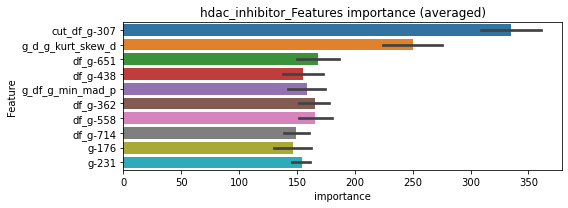

len(train_index) : 2792
len(valid_index) : 931
================================= fold 1/4 hdac_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000575426	valid_1's binary_logloss: 0.00176031
Early stopping, best iteration is:
[1132]	training's binary_logloss: 0.000517882	valid_1's binary_logloss: 0.0016688


len(train_index) : 2792
len(valid_index) : 931
================================= fold 2/4 hdac_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000584557	valid_1's binary_logloss: 0.000659146
[2000]	training's binary_logloss: 0.000330654	valid_1's binary_logloss: 0.000355253
[3000]	training's binary_logloss: 0.000255368	valid_1's binary_logloss: 0.000262747
[4000]	training's binary_logloss: 0.000221919	valid_1's binary_logloss: 0.000219884
[5000]	training's binary_logloss: 0.00020431	valid_1's binary_logloss: 0.000197593
[6000]	training's binary_logloss: 0.000192856	valid_1's binary_logloss: 0.000183035
[7000]	training's binary_logloss: 0.000184586	valid_1's binary_logloss: 0.000172895
[8000]	training's binary_logloss: 0.000178569	valid_1's binary_logloss: 0.000165483
Early stopping, best iteration is:
[8361]	training's binary_logloss: 0.000176681	valid_1's binary_logloss: 0.000163216


len(train_index) : 2792
len(valid_index) : 931
================================= fold 3/4 hdac_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[882]	training's binary_logloss: 0.000669993	valid_1's binary_logloss: 0.00445955


len(train_index) : 2793
len(valid_index) : 930
================================= fold 4/4 hdac_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000580385	valid_1's binary_logloss: 0.00266862
[2000]	training's binary_logloss: 0.000330066	valid_1's binary_logloss: 0.00227191
[3000]	training's binary_logloss: 0.000256478	valid_1's binary_logloss: 0.00213755
[4000]	training's binary_logloss: 0.000222875	valid_1's binary_logloss: 0.00207983
Early stopping, best iteration is:
[4666]	training's binary_logloss: 0.000210507	valid_1's binary_logloss: 0.00205698


hdac_inhibitor logloss: 0.002088583926752246


neg labels: 3289 → selected neg labels: 3283


histamine_receptor_agonist, len(trt): 59, len(othr): 3283
target_rate: 0.0024775 → Adj_target_rate: 0.0026880
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00465167	valid_1's binary_logloss: 0.0409443
[600]	training's binary_logloss: 0.000853059	valid_1's binary_logloss: 0.0305427
Early stopping, best iteration is:
[747]	training's binary_logloss: 0.000633303	valid_1's binary_logloss: 0.029747
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00515554	valid_1's binary_logloss: 0.0413678
[600]	training's binary_logloss: 0.000892925	valid_1's binary_logloss: 0.0314988
Early stopping, best iteration is:
[650]	training's binary_logloss: 0.000779762	valid_1's binary_logloss: 0.0310378
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.005661	valid_1's binary_logloss: 0.0171661
[600]	training's binary_logloss: 0.000960396	valid_1's binary_logloss: 0.0102519
Early stopping, best iteration is:
[704]	training's binary_logloss: 0.000745234	valid_1's binary_logloss:

1 / 3 AUC score:1.000
y_Threshold: 0.0059621, Threshold: 0.0163689, pos_neg_ratio: 0.8000000
Remove_noisy_data: 136 → Positive_corect_labels: 654/3803
p_label_rate: 0.0100452 Vs.target_rate: 0.00248
Num_p_label: 40.0, conf_0:0.01146, conf_1:0.02128
Num_p_label: 40.0, Expected: 9.9, Adj_threshold_1: 0.0163689
Num_p_label: 8.0, Expected: 9.9, Adj_threshold_2: 0.0463689
threshold: 0.0463689, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 654.0/3803, y_label_rate: 0.1719695
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00464231	valid_1's binary_logloss: 0.0335563
[600]	training's binary_logloss: 0.000847965	valid_1's binary_logloss: 0.0260111
Early stopping, best iteration is:
[625]	training's binary_logloss: 0.000787789	valid_1's binary_logloss: 0.0258318
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00490295	valid_1's binary_logloss: 0.0192655
[600]	training's binary_logloss: 0.000872305	valid_1's binary_logloss: 0.010865
Early stopping, best iteration is:
[721]	training's binary_logloss: 0.000666152	valid_1's binary_logloss: 0.0102364
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00466823	valid_1's binary_logloss: 0.0280183
[600]	training's binary_logloss: 0.000847049	valid_1's binary_logloss: 0.019873
Early stopping, best iteration is:
[672]	training's binary_logloss: 0.000716706	valid_1's binary_logloss

2 / 3 AUC score:1.000
y_Threshold: 0.0286791, Threshold: 0.0463689, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 651.0/3797
p_label_rate: 0.0047715 Vs.target_rate: 0.00248
Num_p_label: 19.0, conf_0:0.03710, conf_1:0.05564
Num_p_label: 19.0, Expected: 9.9, Adj_threshold_1: 0.0463689
threshold: 0.0463689, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 651.0/3797, y_label_rate: 0.1714511
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00450412	valid_1's binary_logloss: 0.0313782
[600]	training's binary_logloss: 0.000835656	valid_1's binary_logloss: 0.0234583
Early stopping, best iteration is:
[612]	training's binary_logloss: 0.000806694	valid_1's binary_logloss: 0.0232881
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00437785	valid_1's binary_logloss: 0.0319382
[600]	training's binary_logloss: 0.000797138	valid_1's binary_logloss: 0.0239305
Early stopping, best iteration is:
[635]	training's binary_logloss: 0.000728685	valid_1's binary_logloss: 0.0237481
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00464438	valid_1's binary_logloss: 0.020148
[600]	training's binary_logloss: 0.000864369	valid_1's binary_logloss: 0.0129056
Early stopping, best iteration is:
[652]	training's binary_logloss: 0.000755825	valid_1's binary_loglos

3 / 3 AUC score:1.000
y_Threshold: 0.0344599, Threshold: 0.0463689, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 649.0/3793
p_label_rate: 0.0065294 Vs.target_rate: 0.00248
Num_p_label: 26.0, conf_0:0.04173, conf_1:0.05101
Num_p_label: 26.0, Expected: 9.9, Adj_threshold_1: 0.0463689
Num_p_label: 11.0, Expected: 9.9, Adj_threshold_2: 0.0763689
threshold: 0.0763689, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 649.0/3793, y_label_rate: 0.1711047


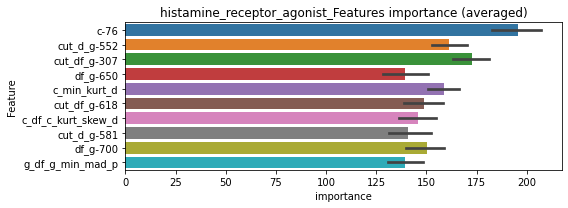

len(train_index) : 2844
len(valid_index) : 949
================================= fold 1/4 histamine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[949]	training's binary_logloss: 0.000584212	valid_1's binary_logloss: 0.00632721


len(train_index) : 2845
len(valid_index) : 948
================================= fold 2/4 histamine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000550294	valid_1's binary_logloss: 0.00330567
[2000]	training's binary_logloss: 0.000313103	valid_1's binary_logloss: 0.00300134
Early stopping, best iteration is:
[2678]	training's binary_logloss: 0.00025884	valid_1's binary_logloss: 0.0029205


len(train_index) : 2845
len(valid_index) : 948
================================= fold 3/4 histamine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000566872	valid_1's binary_logloss: 0.00140705
[2000]	training's binary_logloss: 0.000320997	valid_1's binary_logloss: 0.00109714
[3000]	training's binary_logloss: 0.000248969	valid_1's binary_logloss: 0.00100795
[4000]	training's binary_logloss: 0.000218215	valid_1's binary_logloss: 0.000966905
Early stopping, best iteration is:
[4649]	training's binary_logloss: 0.000207807	valid_1's binary_logloss: 0.000952746


len(train_index) : 2845
len(valid_index) : 948
================================= fold 4/4 histamine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000545516	valid_1's binary_logloss: 0.00318458
Early stopping, best iteration is:
[1045]	training's binary_logloss: 0.000523312	valid_1's binary_logloss: 0.00315539


histamine_receptor_agonist logloss: 0.0033401865791100006


neg labels: 3289 → selected neg labels: 3255


histamine_receptor_antagonist, len(trt): 241, len(othr): 3255
target_rate: 0.0101201 → Adj_target_rate: 0.0088902
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0313174	valid_1's binary_logloss: 0.210434
Early stopping, best iteration is:
[363]	training's binary_logloss: 0.0208634	valid_1's binary_logloss: 0.207791
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0277041	valid_1's binary_logloss: 0.218953
Early stopping, best iteration is:
[366]	training's binary_logloss: 0.0173596	valid_1's binary_logloss: 0.216542
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0301802	valid_1's binary_logloss: 0.168778
Early stopping, best iteration is:
[450]	training's binary_logloss: 0.0111342	valid_1's binary_logloss: 0.163934
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0331071	valid_1's binary_logloss: 0.166326


1 / 3 AUC score:0.945
y_Threshold: 0.0575930, Threshold: 0.3425569, pos_neg_ratio: 0.8000000
Remove_noisy_data: 321 → Positive_corect_labels: 556/3585
p_label_rate: 0.0100452 Vs.target_rate: 0.01012
Num_p_label: 40.0, conf_0:0.23979, conf_1:0.44532


Early stopping, best iteration is:
[443]	training's binary_logloss: 0.013093	valid_1's binary_logloss: 0.157558


threshold: 0.3425569, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 556.0/3585, y_label_rate: 0.1550907
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0159335	valid_1's binary_logloss: 0.134028
Early stopping, best iteration is:
[358]	training's binary_logloss: 0.0100484	valid_1's binary_logloss: 0.131348
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0159755	valid_1's binary_logloss: 0.138264
Early stopping, best iteration is:
[498]	training's binary_logloss: 0.00425272	valid_1's binary_logloss: 0.129784
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0178991	valid_1's binary_logloss: 0.101981
Early stopping, best iteration is:
[497]	training's binary_logloss: 0.00476713	valid_1's binary_logloss: 0.093342
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0168977	valid_1's binary_logloss: 0.114545


2 / 3 AUC score:0.986
y_Threshold: 0.0564192, Threshold: 0.3425569, pos_neg_ratio: 0.8000000
Remove_noisy_data: 84 → Positive_corect_labels: 514.0/3501


Early stopping, best iteration is:
[500]	training's binary_logloss: 0.0044325	valid_1's binary_logloss: 0.105426


p_label_rate: 0.0223506 Vs.target_rate: 0.01012
Num_p_label: 89.0, conf_0:0.27405, conf_1:0.41107
Num_p_label: 89.0, Expected: 40.3, Adj_threshold_1: 0.3425569
Num_p_label: 86.0, Expected: 40.3, Adj_threshold_2: 0.3725569
Num_p_label: 78.0, Expected: 40.3, Adj_threshold_3: 0.4025569
Num_p_label: 76.0, Expected: 40.3, Adj_threshold_4: 0.4325569
Num_p_label: 72.0, Expected: 40.3, Adj_threshold_5: 0.4625569
Num_p_label: 67.0, Expected: 40.3, Adj_threshold_6: 0.4925569
Num_p_label: 58.0, Expected: 40.3, Adj_threshold_7: 0.5225569
threshold: 0.5225569, positive_p_label: 58.0/3982, p_label_rate: 0.0145655
positive_y_label: 514.0/3501, y_label_rate: 0.1468152
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0127892	valid_1's binary_logloss: 0.120531
Early stopping, best iteration is:
[448]	training's binary_logloss: 0.00434527	valid_1's binary_logloss: 0.111675
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0122623	valid_1's binary_logloss: 0.102996
Early stopping, best iteration is:
[470]	training's binary_logloss: 0.00377497	valid_1's binary_logloss: 0.094441
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0131611	valid_1's binary_logloss: 0.0918529
Early stopping, best iteration is:
[495]	training's binary_logloss: 0.00353013	valid_1's binary_logloss: 0.0842191
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0130825	valid_1's binary_logloss: 0.0767811
[600]	training's binary_logloss: 0.00223463	valid_1's binary_logloss: 0.0620612
Early stopping, bes

3 / 3 AUC score:0.995
y_Threshold: 0.0477664, Threshold: 0.5225569, pos_neg_ratio: 0.8000000
Remove_noisy_data: 48 → Positive_corect_labels: 490.0/3453
p_label_rate: 0.0188348 Vs.target_rate: 0.01012
Num_p_label: 75.0, conf_0:0.47030, conf_1:0.57481
Num_p_label: 75.0, Expected: 40.3, Adj_threshold_1: 0.5225569
Num_p_label: 71.0, Expected: 40.3, Adj_threshold_2: 0.5525569
Num_p_label: 65.0, Expected: 40.3, Adj_threshold_3: 0.5825569
Num_p_label: 62.0, Expected: 40.3, Adj_threshold_4: 0.6125569
Num_p_label: 61.0, Expected: 40.3, Adj_threshold_5: 0.6425569
Num_p_label: 56.0, Expected: 40.3, Adj_threshold_6: 0.6725569
threshold: 0.6725569, positive_p_label: 56.0/3982, p_label_rate: 0.0140633
positive_y_label: 490.0/3453, y_label_rate: 0.1419056


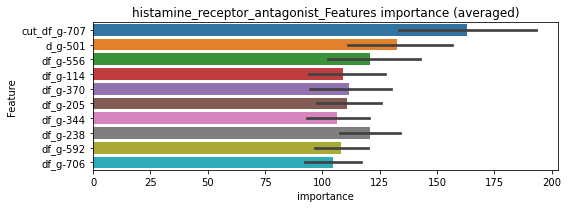

len(train_index) : 2589
len(valid_index) : 864
================================= fold 1/4 histamine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000612748	valid_1's binary_logloss: 0.00367606
Early stopping, best iteration is:
[1492]	training's binary_logloss: 0.00042665	valid_1's binary_logloss: 0.00339964


len(train_index) : 2590
len(valid_index) : 863
================================= fold 2/4 histamine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000628667	valid_1's binary_logloss: 0.00497016
Early stopping, best iteration is:
[1154]	training's binary_logloss: 0.000553084	valid_1's binary_logloss: 0.00489862


len(train_index) : 2590
len(valid_index) : 863
================================= fold 3/4 histamine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000616402	valid_1's binary_logloss: 0.00206471
Early stopping, best iteration is:
[1300]	training's binary_logloss: 0.000487258	valid_1's binary_logloss: 0.00191396


len(train_index) : 2590
len(valid_index) : 863
================================= fold 4/4 histamine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000620529	valid_1's binary_logloss: 0.00117113
[2000]	training's binary_logloss: 0.000349687	valid_1's binary_logloss: 0.000727486
[3000]	training's binary_logloss: 0.000267326	valid_1's binary_logloss: 0.000572467
[4000]	training's binary_logloss: 0.000230781	valid_1's binary_logloss: 0.000499934
[5000]	training's binary_logloss: 0.000211476	valid_1's binary_logloss: 0.000460601
[6000]	training's binary_logloss: 0.000199428	valid_1's binary_logloss: 0.000435501
[7000]	training's binary_logloss: 0.000190655	valid_1's binary_logloss: 0.000417421
Early stopping, best iteration is:
[7307]	training's binary_logloss: 0.000188718	valid_1's binary_logloss: 0.000413056


histamine_receptor_antagonist logloss: 0.0026579863315883768


neg labels: 3289 → selected neg labels: 3283


histone_lysine_demethylase_inhibitor, len(trt): 24, len(othr): 3283
target_rate: 0.0010078 → Adj_target_rate: 0.0012513
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0020672	valid_1's binary_logloss: 0.00569007
[600]	training's binary_logloss: 0.000480272	valid_1's binary_logloss: 0.00209788
Early stopping, best iteration is:
[658]	training's binary_logloss: 0.000452771	valid_1's binary_logloss: 0.00204359
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00213379	valid_1's binary_logloss: 0.00794963
[600]	training's binary_logloss: 0.000487922	valid_1's binary_logloss: 0.00392942
Early stopping, best iteration is:
[667]	training's binary_logloss: 0.000455572	valid_1's binary_logloss: 0.00381397
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00211596	valid_1's binary_logloss: 0.00487038
[600]	training's binary_logloss: 0.000479557	valid_1's binary_logloss: 0.00183154
Early stopping, best iteration is:
[674]	training's binary_logloss: 0.000449555	valid_1's binar

1 / 3 AUC score:1.000
y_Threshold: 0.0026627, Threshold: 0.0441987, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0100452 Vs.target_rate: 0.00101
Num_p_label: 40.0, conf_0:0.03094, conf_1:0.05746
Num_p_label: 40.0, Expected: 4.0, Adj_threshold_1: 0.0441987
Num_p_label: 36.0, Expected: 4.0, Adj_threshold_2: 0.0741987
Num_p_label: 30.0, Expected: 4.0, Adj_threshold_3: 0.1041987
Num_p_label: 25.0, Expected: 4.0, Adj_threshold_4: 0.1341987
Num_p_label: 21.0, Expected: 4.0, Adj_threshold_5: 0.1641987
Num_p_label: 17.0, Expected: 4.0, Adj_threshold_6: 0.1941987
Num_p_label: 15.0, Expected: 4.0, Adj_threshold_7: 0.2241987
Num_p_label: 13.0, Expected: 4.0, Adj_threshold_8: 0.2541987
Num_p_label: 11.0, Expected: 4.0, Adj_threshold_9: 0.2841987
Num_p_label: 11.0, Expected: 4.0, Adj_threshold_10: 0.3141987
threshold: 0.3441987, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
===========

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0019493	valid_1's binary_logloss: 0.00496329
[600]	training's binary_logloss: 0.000462221	valid_1's binary_logloss: 0.001826
Early stopping, best iteration is:
[667]	training's binary_logloss: 0.000435348	valid_1's binary_logloss: 0.00178073
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00195607	valid_1's binary_logloss: 0.00600797
[600]	training's binary_logloss: 0.000469941	valid_1's binary_logloss: 0.00293009
Early stopping, best iteration is:
[674]	training's binary_logloss: 0.000440204	valid_1's binary_logloss: 0.00286879
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00197158	valid_1's binary_logloss: 0.00442201
[600]	training's binary_logloss: 0.000464842	valid_1's binary_logloss: 0.00157317
Early stopping, best iteration is:
[651]	training's binary_logloss: 0.000442104	valid_1's binary_

2 / 3 AUC score:1.000
y_Threshold: 0.0747217, Threshold: 0.3441987, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0080362 Vs.target_rate: 0.00101
Num_p_label: 32.0, conf_0:0.27536, conf_1:0.41304
Num_p_label: 32.0, Expected: 4.0, Adj_threshold_1: 0.3441987
Num_p_label: 30.0, Expected: 4.0, Adj_threshold_2: 0.3741987
Num_p_label: 29.0, Expected: 4.0, Adj_threshold_3: 0.4041987
Num_p_label: 28.0, Expected: 4.0, Adj_threshold_4: 0.4341987
Num_p_label: 28.0, Expected: 4.0, Adj_threshold_5: 0.4641987
Num_p_label: 26.0, Expected: 4.0, Adj_threshold_6: 0.4941987
Num_p_label: 24.0, Expected: 4.0, Adj_threshold_7: 0.5241987
Num_p_label: 23.0, Expected: 4.0, Adj_threshold_8: 0.5541987
Num_p_label: 20.0, Expected: 4.0, Adj_threshold_9: 0.5841987
Num_p_label: 18.0, Expected: 4.0, Adj_threshold_10: 0.6141987
threshold: 0.6441987, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
===========

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0019493	valid_1's binary_logloss: 0.00496329
[600]	training's binary_logloss: 0.000462221	valid_1's binary_logloss: 0.001826
Early stopping, best iteration is:
[667]	training's binary_logloss: 0.000435348	valid_1's binary_logloss: 0.00178073
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00195607	valid_1's binary_logloss: 0.00600797
[600]	training's binary_logloss: 0.000469941	valid_1's binary_logloss: 0.00293009
Early stopping, best iteration is:
[658]	training's binary_logloss: 0.000440204	valid_1's binary_logloss: 0.00286879
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00197158	valid_1's binary_logloss: 0.00442201
[600]	training's binary_logloss: 0.000464842	valid_1's binary_logloss: 0.00157317
Early stopping, best iteration is:
[651]	training's binary_logloss: 0.000442104	valid_1's binary_

3 / 3 AUC score:1.000
y_Threshold: 0.0747217, Threshold: 0.6441987, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0040181 Vs.target_rate: 0.00101
Num_p_label: 16.0, conf_0:0.50000, conf_1:0.70862
Num_p_label: 16.0, Expected: 4.0, Adj_threshold_1: 0.6441987
Num_p_label: 15.0, Expected: 4.0, Adj_threshold_2: 0.6741987
Num_p_label: 14.0, Expected: 4.0, Adj_threshold_3: 0.7041987
Num_p_label: 11.0, Expected: 4.0, Adj_threshold_4: 0.7341987
Num_p_label: 10.0, Expected: 4.0, Adj_threshold_5: 0.7641987
threshold: 0.7641987, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 656.0/3807, y_label_rate: 0.1723142


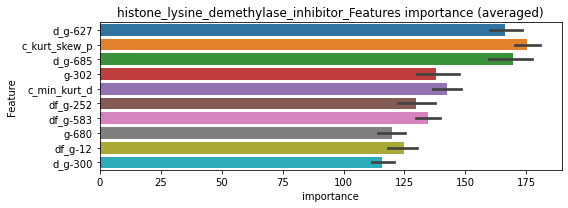

len(train_index) : 2855
len(valid_index) : 952
================================= fold 1/4 histone_lysine_demethylase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000494477	valid_1's binary_logloss: 0.0011164
[2000]	training's binary_logloss: 0.000292557	valid_1's binary_logloss: 0.000862815
Early stopping, best iteration is:
[2682]	training's binary_logloss: 0.000246079	valid_1's binary_logloss: 0.000801931


len(train_index) : 2855
len(valid_index) : 952
================================= fold 2/4 histone_lysine_demethylase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000478624	valid_1's binary_logloss: 0.00306783
Early stopping, best iteration is:
[1582]	training's binary_logloss: 0.000330563	valid_1's binary_logloss: 0.00287835


len(train_index) : 2855
len(valid_index) : 952
================================= fold 3/4 histone_lysine_demethylase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000459236	valid_1's binary_logloss: 0.000583333
[2000]	training's binary_logloss: 0.000276925	valid_1's binary_logloss: 0.000366466
[3000]	training's binary_logloss: 0.000218667	valid_1's binary_logloss: 0.000296196
[4000]	training's binary_logloss: 0.000190823	valid_1's binary_logloss: 0.000260313
[5000]	training's binary_logloss: 0.000175681	valid_1's binary_logloss: 0.000239555
[6000]	training's binary_logloss: 0.000165439	valid_1's binary_logloss: 0.000225728
[7000]	training's binary_logloss: 0.000157944	valid_1's binary_logloss: 0.000215892
[8000]	training's binary_logloss: 0.000152547	valid_1's binary_logloss: 0.00020813
[9000]	training's binary_logloss: 0.000148281	valid_1's binary_logloss: 0.000201983
Early stopping, best iteration is:
[9079]	training's binary_logloss: 0.000148037	valid_1's binary_logloss: 0.000201514


len(train_index) : 2856
len(valid_index) : 951
================================= fold 4/4 histone_lysine_demethylase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00047488	valid_1's binary_logloss: 0.00188989
[2000]	training's binary_logloss: 0.000281621	valid_1's binary_logloss: 0.00168008
[3000]	training's binary_logloss: 0.000228152	valid_1's binary_logloss: 0.00162192
Early stopping, best iteration is:
[3335]	training's binary_logloss: 0.000216522	valid_1's binary_logloss: 0.00160756


histone_lysine_demethylase_inhibitor logloss: 0.0013724368627668862


neg labels: 3289 → selected neg labels: 3284


histone_lysine_methyltransferase_inhibitor, len(trt): 32, len(othr): 3284
target_rate: 0.0013437 → Adj_target_rate: 0.0015980
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00229448	valid_1's binary_logloss: 0.0110182
[600]	training's binary_logloss: 0.000502811	valid_1's binary_logloss: 0.00687581
Early stopping, best iteration is:
[624]	training's binary_logloss: 0.000482704	valid_1's binary_logloss: 0.00680575
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00238295	valid_1's binary_logloss: 0.00852924
[600]	training's binary_logloss: 0.000513924	valid_1's binary_logloss: 0.00528313
Early stopping, best iteration is:
[670]	training's binary_logloss: 0.00046245	valid_1's binary_logloss: 0.00518635
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00248895	valid_1's binary_logloss: 0.00489415
[600]	training's binary_logloss: 0.00052537	valid_1's binary_logloss: 0.00145432
Early stopping, best iteration is:
[675]	training's binary_logloss: 0.0004679	valid_1's binary_lo

1 / 3 AUC score:1.000
y_Threshold: 0.0033643, Threshold: 0.0121128, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 655/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00134


Early stopping, best iteration is:
[556]	training's binary_logloss: 0.000558505	valid_1's binary_logloss: 0.0156092


Num_p_label: 40.0, conf_0:0.00848, conf_1:0.01575
Num_p_label: 40.0, Expected: 5.4, Adj_threshold_1: 0.0121128
Num_p_label: 7.0, Expected: 5.4, Adj_threshold_2: 0.0421128
threshold: 0.0421128, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 655.0/3806, y_label_rate: 0.1720967
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00222046	valid_1's binary_logloss: 0.00507225
[600]	training's binary_logloss: 0.000497874	valid_1's binary_logloss: 0.00171997
Early stopping, best iteration is:
[688]	training's binary_logloss: 0.000449404	valid_1's binary_logloss: 0.00163853
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00223686	valid_1's binary_logloss: 0.00776238
[600]	training's binary_logloss: 0.000498554	valid_1's binary_logloss: 0.00457906
Early stopping, best iteration is:
[630]	training's binary_logloss: 0.000472905	valid_1's binary_logloss: 0.00449621
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00217719	valid_1's binary_logloss: 0.00820058
[600]	training's binary_logloss: 0.000492901	valid_1's binary_logloss: 0.00416326
Early stopping, best iteration is:
[661]	training's binary_logloss: 0.000453839	valid_1's bina

2 / 3 AUC score:1.000
y_Threshold: 0.0249220, Threshold: 0.0421128, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0052737 Vs.target_rate: 0.00134
Num_p_label: 21.0, conf_0:0.03369, conf_1:0.05054
Num_p_label: 21.0, Expected: 5.4, Adj_threshold_1: 0.0421128
Num_p_label: 11.0, Expected: 5.4, Adj_threshold_2: 0.0721128
threshold: 0.0721128, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 655.0/3806, y_label_rate: 0.1720967
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00222046	valid_1's binary_logloss: 0.00507225
[600]	training's binary_logloss: 0.000497874	valid_1's binary_logloss: 0.00171997
Early stopping, best iteration is:
[688]	training's binary_logloss: 0.000449404	valid_1's binary_logloss: 0.00163853
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00223686	valid_1's binary_logloss: 0.00776238
[600]	training's binary_logloss: 0.000498554	valid_1's binary_logloss: 0.00457906
Early stopping, best iteration is:
[630]	training's binary_logloss: 0.000472905	valid_1's binary_logloss: 0.00449621
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00217719	valid_1's binary_logloss: 0.00820058
[600]	training's binary_logloss: 0.000492901	valid_1's binary_logloss: 0.00416326
Early stopping, best iteration is:
[661]	training's binary_logloss: 0.000453839	valid_1's bina

3 / 3 AUC score:1.000
y_Threshold: 0.0249220, Threshold: 0.0721128, pos_neg_ratio: 0.8000000


[600]	training's binary_logloss: 0.000490749	valid_1's binary_logloss: 0.00878733
Early stopping, best iteration is:
[578]	training's binary_logloss: 0.000511565	valid_1's binary_logloss: 0.00875834


Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0027624 Vs.target_rate: 0.00134
Num_p_label: 11.0, conf_0:0.06490, conf_1:0.07932
Num_p_label: 11.0, Expected: 5.4, Adj_threshold_1: 0.0721128
threshold: 0.0721128, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 655.0/3806, y_label_rate: 0.1720967


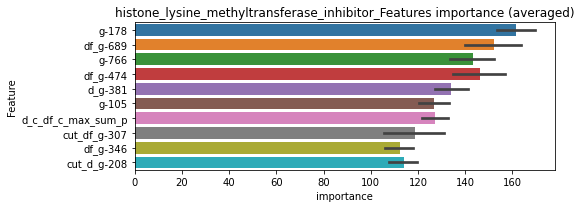

len(train_index) : 2854
len(valid_index) : 952
================================= fold 1/4 histone_lysine_methyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000494885	valid_1's binary_logloss: 0.000500856
[2000]	training's binary_logloss: 0.000289477	valid_1's binary_logloss: 0.000280515
[3000]	training's binary_logloss: 0.000230465	valid_1's binary_logloss: 0.000215068
[4000]	training's binary_logloss: 0.000202656	valid_1's binary_logloss: 0.000183687
[5000]	training's binary_logloss: 0.000187402	valid_1's binary_logloss: 0.000166787
[6000]	training's binary_logloss: 0.00017776	valid_1's binary_logloss: 0.000156322
[7000]	training's binary_logloss: 0.0001701	valid_1's binary_logloss: 0.000148076
Early stopping, best iteration is:
[7884]	training's binary_logloss: 0.0001654	valid_1's binary_logloss: 0.000143066


len(train_index) : 2854
len(valid_index) : 952
================================= fold 2/4 histone_lysine_methyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00041061	valid_1's binary_logloss: 0.000582103
[2000]	training's binary_logloss: 0.000239327	valid_1's binary_logloss: 0.0003415
[3000]	training's binary_logloss: 0.000179356	valid_1's binary_logloss: 0.000256562
[4000]	training's binary_logloss: 0.000150213	valid_1's binary_logloss: 0.000215183
[5000]	training's binary_logloss: 0.000134969	valid_1's binary_logloss: 0.000193464
[6000]	training's binary_logloss: 0.000125088	valid_1's binary_logloss: 0.000179351
[7000]	training's binary_logloss: 0.000118151	valid_1's binary_logloss: 0.00016943
[8000]	training's binary_logloss: 0.000113376	valid_1's binary_logloss: 0.000162596
[9000]	training's binary_logloss: 0.000110016	valid_1's binary_logloss: 0.000157792
[10000]	training's binary_logloss: 0.000107705	valid_1's binary_logloss: 0.00015453
Did not meet early stopping. Best iteration is:
[9999]	training's binary_logloss: 0.000107705	valid_1's

len(train_index) : 2855
len(valid_index) : 951
================================= fold 3/4 histone_lysine_methyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00050943	valid_1's binary_logloss: 0.00271695
Early stopping, best iteration is:
[1446]	training's binary_logloss: 0.000372904	valid_1's binary_logloss: 0.00250617


len(train_index) : 2855
len(valid_index) : 951
================================= fold 4/4 histone_lysine_methyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00049033	valid_1's binary_logloss: 0.00463983
Early stopping, best iteration is:
[1001]	training's binary_logloss: 0.000489531	valid_1's binary_logloss: 0.00463802


histone_lysine_methyltransferase_inhibitor logloss: 0.001860074015420948


neg labels: 3289 → selected neg labels: 3280


hiv_inhibitor, len(trt): 72, len(othr): 3280
target_rate: 0.0030234 → Adj_target_rate: 0.0031837
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00620017	valid_1's binary_logloss: 0.0563607
Early stopping, best iteration is:
[496]	training's binary_logloss: 0.00159299	valid_1's binary_logloss: 0.0494642
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00686009	valid_1's binary_logloss: 0.0301445
[600]	training's binary_logloss: 0.00116951	valid_1's binary_logloss: 0.0167202
Early stopping, best iteration is:
[753]	training's binary_logloss: 0.000828876	valid_1's binary_logloss: 0.0155394
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00708749	valid_1's binary_logloss: 0.0237912
[600]	training's binary_logloss: 0.00118639	valid_1's binary_logloss: 0.012003
[900]	training's binary_logloss: 0.000724303	valid_1's binary_logloss: 0.0110216
Early stopping, best iteration is:
[892]	training's binary_logloss: 0.00072533	valid_1's binary_logloss: 0

1 / 3 AUC score:0.999
y_Threshold: 0.0088424, Threshold: 0.0946232, pos_neg_ratio: 0.8000000
Remove_noisy_data: 136 → Positive_corect_labels: 654/3800
p_label_rate: 0.0100452 Vs.target_rate: 0.00302
Num_p_label: 40.0, conf_0:0.06624, conf_1:0.12301
Num_p_label: 40.0, Expected: 12.0, Adj_threshold_1: 0.0946232
Num_p_label: 30.0, Expected: 12.0, Adj_threshold_2: 0.1246232
Num_p_label: 23.0, Expected: 12.0, Adj_threshold_3: 0.1546232
Num_p_label: 20.0, Expected: 12.0, Adj_threshold_4: 0.1846232
Num_p_label: 19.0, Expected: 12.0, Adj_threshold_5: 0.2146232
Num_p_label: 16.0, Expected: 12.0, Adj_threshold_6: 0.2446232
threshold: 0.2446232, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 654.0/3800, y_label_rate: 0.1721053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00574986	valid_1's binary_logloss: 0.0494867
[600]	training's binary_logloss: 0.00103835	valid_1's binary_logloss: 0.0386241
Early stopping, best iteration is:
[608]	training's binary_logloss: 0.00101441	valid_1's binary_logloss: 0.0385903
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00603656	valid_1's binary_logloss: 0.02198
[600]	training's binary_logloss: 0.00107159	valid_1's binary_logloss: 0.0110834
Early stopping, best iteration is:
[856]	training's binary_logloss: 0.000684416	valid_1's binary_logloss: 0.00997864
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00616354	valid_1's binary_logloss: 0.0321631
[600]	training's binary_logloss: 0.00108526	valid_1's binary_logloss: 0.0199279
Early stopping, best iteration is:
[847]	training's binary_logloss: 0.000693723	valid_1's binary_logloss: 0

2 / 3 AUC score:1.000
y_Threshold: 0.0435079, Threshold: 0.2446232, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 651.0/3794
p_label_rate: 0.0128076 Vs.target_rate: 0.00302
Num_p_label: 51.0, conf_0:0.19570, conf_1:0.29355
Num_p_label: 51.0, Expected: 12.0, Adj_threshold_1: 0.2446232
Num_p_label: 47.0, Expected: 12.0, Adj_threshold_2: 0.2746232
Num_p_label: 41.0, Expected: 12.0, Adj_threshold_3: 0.3046232
Num_p_label: 36.0, Expected: 12.0, Adj_threshold_4: 0.3346232
Num_p_label: 36.0, Expected: 12.0, Adj_threshold_5: 0.3646232
Num_p_label: 33.0, Expected: 12.0, Adj_threshold_6: 0.3946232
Num_p_label: 28.0, Expected: 12.0, Adj_threshold_7: 0.4246232
Num_p_label: 27.0, Expected: 12.0, Adj_threshold_8: 0.4546232
Num_p_label: 23.0, Expected: 12.0, Adj_threshold_9: 0.4846232
Num_p_label: 22.0, Expected: 12.0, Adj_threshold_10: 0.5146232
threshold: 0.5446232, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 651.0/3794, y_label_rate: 0.1715867
=

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00584433	valid_1's binary_logloss: 0.0274968
[600]	training's binary_logloss: 0.00104728	valid_1's binary_logloss: 0.0167831
Early stopping, best iteration is:
[765]	training's binary_logloss: 0.000741334	valid_1's binary_logloss: 0.0160396
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0056293	valid_1's binary_logloss: 0.0366064
[600]	training's binary_logloss: 0.00101529	valid_1's binary_logloss: 0.0258039
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.00105869	valid_1's binary_logloss: 0.025739
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00610274	valid_1's binary_logloss: 0.0307162
[600]	training's binary_logloss: 0.00107318	valid_1's binary_logloss: 0.0190535
Early stopping, best iteration is:
[745]	training's binary_logloss: 0.000777918	valid_1's binary_logloss: 0.

3 / 3 AUC score:1.000
y_Threshold: 0.0369134, Threshold: 0.5446232, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 650.0/3792
p_label_rate: 0.0067805 Vs.target_rate: 0.00302
Num_p_label: 27.0, conf_0:0.49016, conf_1:0.59909
Num_p_label: 27.0, Expected: 12.0, Adj_threshold_1: 0.5446232
Num_p_label: 27.0, Expected: 12.0, Adj_threshold_2: 0.5746232
Num_p_label: 25.0, Expected: 12.0, Adj_threshold_3: 0.6046232
Num_p_label: 24.0, Expected: 12.0, Adj_threshold_4: 0.6346232
Num_p_label: 24.0, Expected: 12.0, Adj_threshold_5: 0.6646232
Num_p_label: 21.0, Expected: 12.0, Adj_threshold_6: 0.6946232
Num_p_label: 21.0, Expected: 12.0, Adj_threshold_7: 0.7246232
Num_p_label: 20.0, Expected: 12.0, Adj_threshold_8: 0.7546232
Num_p_label: 19.0, Expected: 12.0, Adj_threshold_9: 0.7846232
threshold: 0.7846232, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 650.0/3792, y_label_rate: 0.1714135


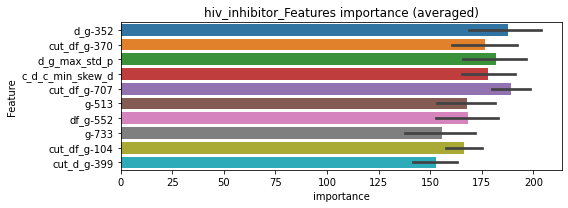

len(train_index) : 2844
len(valid_index) : 948
================================= fold 1/4 hiv_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000535354	valid_1's binary_logloss: 0.00137635
[2000]	training's binary_logloss: 0.000309216	valid_1's binary_logloss: 0.00107309
[3000]	training's binary_logloss: 0.000236164	valid_1's binary_logloss: 0.000954535
Early stopping, best iteration is:
[3029]	training's binary_logloss: 0.000234677	valid_1's binary_logloss: 0.000953093


len(train_index) : 2844
len(valid_index) : 948
================================= fold 2/4 hiv_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000547154	valid_1's binary_logloss: 0.0030382
[2000]	training's binary_logloss: 0.000310505	valid_1's binary_logloss: 0.00270087
Early stopping, best iteration is:
[2680]	training's binary_logloss: 0.000256174	valid_1's binary_logloss: 0.00260006


len(train_index) : 2844
len(valid_index) : 948
================================= fold 3/4 hiv_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000451572	valid_1's binary_logloss: 0.00076138
[2000]	training's binary_logloss: 0.00025084	valid_1's binary_logloss: 0.000424526
[3000]	training's binary_logloss: 0.000184413	valid_1's binary_logloss: 0.000312462
[4000]	training's binary_logloss: 0.000152895	valid_1's binary_logloss: 0.000259238
[5000]	training's binary_logloss: 0.000136818	valid_1's binary_logloss: 0.000232069
[6000]	training's binary_logloss: 0.000126451	valid_1's binary_logloss: 0.000214487
[7000]	training's binary_logloss: 0.000119224	valid_1's binary_logloss: 0.000202222
[8000]	training's binary_logloss: 0.000114301	valid_1's binary_logloss: 0.000193901
[9000]	training's binary_logloss: 0.000110791	valid_1's binary_logloss: 0.000187954
[10000]	training's binary_logloss: 0.000108278	valid_1's binary_logloss: 0.000183718
Did not meet early stopping. Best iteration is:
[9999]	training's binary_logloss: 0.000108278	valid_

len(train_index) : 2844
len(valid_index) : 948
================================= fold 4/4 hiv_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000536487	valid_1's binary_logloss: 0.00183789
Early stopping, best iteration is:
[1302]	training's binary_logloss: 0.000425206	valid_1's binary_logloss: 0.00168131


hiv_inhibitor logloss: 0.0013571623604561472


neg labels: 3289 → selected neg labels: 3246


hmgcr_inhibitor, len(trt): 283, len(othr): 3246
target_rate: 0.0118838 → Adj_target_rate: 0.0101910
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0469285	valid_1's binary_logloss: 0.236172
Early stopping, best iteration is:
[448]	training's binary_logloss: 0.019032	valid_1's binary_logloss: 0.223888
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0458431	valid_1's binary_logloss: 0.270033
Early stopping, best iteration is:
[338]	training's binary_logloss: 0.0358433	valid_1's binary_logloss: 0.267778
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0486959	valid_1's binary_logloss: 0.245034
Early stopping, best iteration is:
[339]	training's binary_logloss: 0.0383049	valid_1's binary_logloss: 0.239023
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0485096	valid_1's binary_logloss: 0.244216


1 / 3 AUC score:0.906
y_Threshold: 0.0935281, Threshold: 0.4183464, pos_neg_ratio: 0.8000000
Remove_noisy_data: 416 → Positive_corect_labels: 506/3479
p_label_rate: 0.0100452 Vs.target_rate: 0.01188
Num_p_label: 40.0, conf_0:0.29284, conf_1:0.54385
threshold: 0.4183464, positive_p_label: 40.0/3982, p_label_rate: 0.0100452


Early stopping, best iteration is:
[423]	training's binary_logloss: 0.0221616	valid_1's binary_logloss: 0.233282


positive_y_label: 506.0/3479, y_label_rate: 0.1454441
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0248093	valid_1's binary_logloss: 0.18662
Early stopping, best iteration is:
[480]	training's binary_logloss: 0.00692609	valid_1's binary_logloss: 0.171923
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0253979	valid_1's binary_logloss: 0.173149
Early stopping, best iteration is:
[500]	training's binary_logloss: 0.00625095	valid_1's binary_logloss: 0.157614
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0248512	valid_1's binary_logloss: 0.141516
[600]	training's binary_logloss: 0.00382106	valid_1's binary_logloss: 0.119343
Early stopping, best iteration is:
[616]	training's binary_logloss: 0.00358036	valid_1's binary_logloss: 0.119106
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0260053	valid_1's binary_logloss: 0.16485


2 / 3 AUC score:0.974
y_Threshold: 0.0645005, Threshold: 0.4183464, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[551]	training's binary_logloss: 0.00492506	valid_1's binary_logloss: 0.145496


Remove_noisy_data: 116 → Positive_corect_labels: 448.0/3363
p_label_rate: 0.0128076 Vs.target_rate: 0.01188
Num_p_label: 51.0, conf_0:0.33468, conf_1:0.50202
threshold: 0.4183464, positive_p_label: 51.0/3982, p_label_rate: 0.0128076
positive_y_label: 448.0/3363, y_label_rate: 0.1332144
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0173226	valid_1's binary_logloss: 0.156018
Early stopping, best iteration is:
[553]	training's binary_logloss: 0.00330957	valid_1's binary_logloss: 0.139241
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0192534	valid_1's binary_logloss: 0.0999569
[600]	training's binary_logloss: 0.00306887	valid_1's binary_logloss: 0.0697457
Early stopping, best iteration is:
[725]	training's binary_logloss: 0.00202484	valid_1's binary_logloss: 0.0668333
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0182104	valid_1's binary_logloss: 0.158152
Early stopping, best iteration is:
[358]	training's binary_logloss: 0.0112941	valid_1's binary_logloss: 0.151682
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0178331	valid_1's binary_logloss: 0.14185


3 / 3 AUC score:0.983
y_Threshold: 0.0744596, Threshold: 0.4183464, pos_neg_ratio: 0.8000000
Remove_noisy_data: 84 → Positive_corect_labels: 406.0/3279


Early stopping, best iteration is:
[402]	training's binary_logloss: 0.00815484	valid_1's binary_logloss: 0.131395


p_label_rate: 0.0135610 Vs.target_rate: 0.01188
Num_p_label: 54.0, conf_0:0.37651, conf_1:0.46018
threshold: 0.4183464, positive_p_label: 54.0/3982, p_label_rate: 0.0135610
positive_y_label: 406.0/3279, y_label_rate: 0.1238182


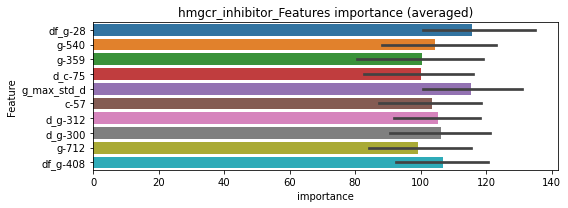

len(train_index) : 2459
len(valid_index) : 820
================================= fold 1/4 hmgcr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000661097	valid_1's binary_logloss: 0.00403076
[2000]	training's binary_logloss: 0.000370864	valid_1's binary_logloss: 0.00342854
[3000]	training's binary_logloss: 0.000280211	valid_1's binary_logloss: 0.00323176
[4000]	training's binary_logloss: 0.000236672	valid_1's binary_logloss: 0.00312247
Early stopping, best iteration is:
[4251]	training's binary_logloss: 0.000230082	valid_1's binary_logloss: 0.00310864


len(train_index) : 2459
len(valid_index) : 820
================================= fold 2/4 hmgcr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000659401	valid_1's binary_logloss: 0.00135077
[2000]	training's binary_logloss: 0.000372158	valid_1's binary_logloss: 0.00081164
[3000]	training's binary_logloss: 0.000287282	valid_1's binary_logloss: 0.000641807
[4000]	training's binary_logloss: 0.000247476	valid_1's binary_logloss: 0.000561477
[5000]	training's binary_logloss: 0.000226352	valid_1's binary_logloss: 0.000517572
[6000]	training's binary_logloss: 0.00021296	valid_1's binary_logloss: 0.000488602
[7000]	training's binary_logloss: 0.000202769	valid_1's binary_logloss: 0.000467907
[8000]	training's binary_logloss: 0.000195071	valid_1's binary_logloss: 0.000451642
Early stopping, best iteration is:
[8135]	training's binary_logloss: 0.000194114	valid_1's binary_logloss: 0.000449752


len(train_index) : 2459
len(valid_index) : 820
================================= fold 3/4 hmgcr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000665301	valid_1's binary_logloss: 0.00112477
[2000]	training's binary_logloss: 0.000373488	valid_1's binary_logloss: 0.000632161
[3000]	training's binary_logloss: 0.000289511	valid_1's binary_logloss: 0.000475279
[4000]	training's binary_logloss: 0.000249375	valid_1's binary_logloss: 0.000401519
[5000]	training's binary_logloss: 0.000228049	valid_1's binary_logloss: 0.000362531
[6000]	training's binary_logloss: 0.000214201	valid_1's binary_logloss: 0.000338266
[7000]	training's binary_logloss: 0.000203728	valid_1's binary_logloss: 0.000320128
[8000]	training's binary_logloss: 0.000196241	valid_1's binary_logloss: 0.000306417
Early stopping, best iteration is:
[8045]	training's binary_logloss: 0.000195953	valid_1's binary_logloss: 0.000305838


len(train_index) : 2460
len(valid_index) : 819
================================= fold 4/4 hmgcr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00067892	valid_1's binary_logloss: 0.00495049
Early stopping, best iteration is:
[1765]	training's binary_logloss: 0.00041741	valid_1's binary_logloss: 0.00465471


hmgcr_inhibitor logloss: 0.002129842086290963


neg labels: 3289 → selected neg labels: 3272


hsp_inhibitor, len(trt): 93, len(othr): 3272
target_rate: 0.0039053 → Adj_target_rate: 0.0039574
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0107437	valid_1's binary_logloss: 0.0677243
[600]	training's binary_logloss: 0.00162492	valid_1's binary_logloss: 0.0526576
Early stopping, best iteration is:
[581]	training's binary_logloss: 0.00174628	valid_1's binary_logloss: 0.0524429
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.010402	valid_1's binary_logloss: 0.0478058
[600]	training's binary_logloss: 0.00164837	valid_1's binary_logloss: 0.0282087
Early stopping, best iteration is:
[848]	training's binary_logloss: 0.000929475	valid_1's binary_logloss: 0.0260452
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0104337	valid_1's binary_logloss: 0.0416973
[600]	training's binary_logloss: 0.00166343	valid_1's binary_logloss: 0.0223837
[900]	training's binary_logloss: 0.000875961	valid_1's binary_logloss: 0.019658
Early stopping, best iteration

1 / 3 AUC score:0.998
y_Threshold: 0.0148598, Threshold: 0.1704364, pos_neg_ratio: 0.8000000
Remove_noisy_data: 142 → Positive_corect_labels: 649/3784
p_label_rate: 0.0100452 Vs.target_rate: 0.00391
Num_p_label: 40.0, conf_0:0.11931, conf_1:0.22157
Num_p_label: 40.0, Expected: 15.6, Adj_threshold_1: 0.1704364
Num_p_label: 35.0, Expected: 15.6, Adj_threshold_2: 0.2004364
Num_p_label: 29.0, Expected: 15.6, Adj_threshold_3: 0.2304364
Num_p_label: 27.0, Expected: 15.6, Adj_threshold_4: 0.2604364
Num_p_label: 24.0, Expected: 15.6, Adj_threshold_5: 0.2904364
Num_p_label: 20.0, Expected: 15.6, Adj_threshold_6: 0.3204364
threshold: 0.3204364, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 649.0/3784, y_label_rate: 0.1715116
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00937123	valid_1's binary_logloss: 0.0567291
[600]	training's binary_logloss: 0.00148408	valid_1's binary_logloss: 0.0382971
Early stopping, best iteration is:
[725]	training's binary_logloss: 0.00105921	valid_1's binary_logloss: 0.0365264
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00871634	valid_1's binary_logloss: 0.0519544
[600]	training's binary_logloss: 0.00144851	valid_1's binary_logloss: 0.0379005
Early stopping, best iteration is:
[796]	training's binary_logloss: 0.000910595	valid_1's binary_logloss: 0.0367953
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00898575	valid_1's binary_logloss: 0.0455413
[600]	training's binary_logloss: 0.00147308	valid_1's binary_logloss: 0.0270676
Early stopping, best iteration is:
[768]	training's binary_logloss: 0.00097046	valid_1's binary_logloss: 0

2 / 3 AUC score:0.999
y_Threshold: 0.0711924, Threshold: 0.3204364, pos_neg_ratio: 0.8000000
Remove_noisy_data: 20 → Positive_corect_labels: 639.0/3764
p_label_rate: 0.0243596 Vs.target_rate: 0.00391
Num_p_label: 97.0, conf_0:0.25635, conf_1:0.38452
Num_p_label: 97.0, Expected: 15.6, Adj_threshold_1: 0.3204364
Num_p_label: 91.0, Expected: 15.6, Adj_threshold_2: 0.3504364
Num_p_label: 83.0, Expected: 15.6, Adj_threshold_3: 0.3804364
Num_p_label: 78.0, Expected: 15.6, Adj_threshold_4: 0.4104364
Num_p_label: 77.0, Expected: 15.6, Adj_threshold_5: 0.4404364
Num_p_label: 73.0, Expected: 15.6, Adj_threshold_6: 0.4704364
Num_p_label: 68.0, Expected: 15.6, Adj_threshold_7: 0.5004364
Num_p_label: 65.0, Expected: 15.6, Adj_threshold_8: 0.5304364
Num_p_label: 61.0, Expected: 15.6, Adj_threshold_9: 0.5604364
Num_p_label: 58.0, Expected: 15.6, Adj_threshold_10: 0.5904364
threshold: 0.6204364, positive_p_label: 54.0/3982, p_label_rate: 0.0135610
positive_y_label: 639.0/3764, y_label_rate: 0.1697662


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00800915	valid_1's binary_logloss: 0.0407861
[600]	training's binary_logloss: 0.00135954	valid_1's binary_logloss: 0.0256094
Early stopping, best iteration is:
[846]	training's binary_logloss: 0.000812238	valid_1's binary_logloss: 0.0236375
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00747334	valid_1's binary_logloss: 0.050446
[600]	training's binary_logloss: 0.00134065	valid_1's binary_logloss: 0.0342442
[900]	training's binary_logloss: 0.000768018	valid_1's binary_logloss: 0.031731
Early stopping, best iteration is:
[879]	training's binary_logloss: 0.000780507	valid_1's binary_logloss: 0.0315682
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00869748	valid_1's binary_logloss: 0.0333973
[600]	training's binary_logloss: 0.00140431	valid_1's binary_logloss: 0.0181181
[900]	training's binary_lo

3 / 3 AUC score:1.000
y_Threshold: 0.0660089, Threshold: 0.6204364, pos_neg_ratio: 0.8000000
Remove_noisy_data: 12 → Positive_corect_labels: 633.0/3752
p_label_rate: 0.0158212 Vs.target_rate: 0.00391
Num_p_label: 63.0, conf_0:0.50000, conf_1:0.68248
Num_p_label: 63.0, Expected: 15.6, Adj_threshold_1: 0.6204364
Num_p_label: 61.0, Expected: 15.6, Adj_threshold_2: 0.6504364
Num_p_label: 56.0, Expected: 15.6, Adj_threshold_3: 0.6804364
Num_p_label: 52.0, Expected: 15.6, Adj_threshold_4: 0.7104364
Num_p_label: 47.0, Expected: 15.6, Adj_threshold_5: 0.7404364
Num_p_label: 41.0, Expected: 15.6, Adj_threshold_6: 0.7704364
threshold: 0.7704364, positive_p_label: 41.0/3982, p_label_rate: 0.0102963
positive_y_label: 633.0/3752, y_label_rate: 0.1687100


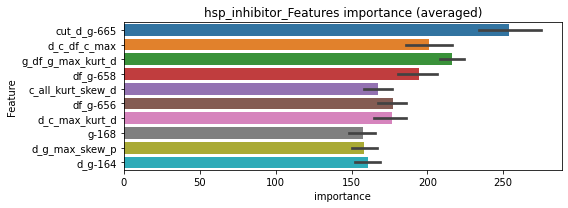

len(train_index) : 2814
len(valid_index) : 938
================================= fold 1/4 hsp_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[960]	training's binary_logloss: 0.00056975	valid_1's binary_logloss: 0.00568271


len(train_index) : 2814
len(valid_index) : 938
================================= fold 2/4 hsp_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000563274	valid_1's binary_logloss: 0.00381101
Early stopping, best iteration is:
[1503]	training's binary_logloss: 0.000390942	valid_1's binary_logloss: 0.00362159


len(train_index) : 2814
len(valid_index) : 938
================================= fold 3/4 hsp_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000571693	valid_1's binary_logloss: 0.00128712
[2000]	training's binary_logloss: 0.000324779	valid_1's binary_logloss: 0.000948353
Early stopping, best iteration is:
[2760]	training's binary_logloss: 0.000263497	valid_1's binary_logloss: 0.000852385


len(train_index) : 2814
len(valid_index) : 938
================================= fold 4/4 hsp_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000583852	valid_1's binary_logloss: 0.00196842
[2000]	training's binary_logloss: 0.000328772	valid_1's binary_logloss: 0.00150457
Early stopping, best iteration is:
[1995]	training's binary_logloss: 0.000329869	valid_1's binary_logloss: 0.00150232


hsp_inhibitor logloss: 0.002917710065580725


neg labels: 3289 → selected neg labels: 3283


igf-1_inhibitor, len(trt): 37, len(othr): 3283
target_rate: 0.0015537 → Adj_target_rate: 0.0018079
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00297841	valid_1's binary_logloss: 0.0251313
Early stopping, best iteration is:
[554]	training's binary_logloss: 0.000688077	valid_1's binary_logloss: 0.0184897
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0031744	valid_1's binary_logloss: 0.0135265
[600]	training's binary_logloss: 0.000631093	valid_1's binary_logloss: 0.00847618
Early stopping, best iteration is:
[711]	training's binary_logloss: 0.000538089	valid_1's binary_logloss: 0.00815166
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00315416	valid_1's binary_logloss: 0.0079408
[600]	training's binary_logloss: 0.00063452	valid_1's binary_logloss: 0.00315048
Early stopping, best iteration is:
[715]	training's binary_logloss: 0.000541612	valid_1's binary_logloss: 0.00290456
Training until validation scores don't improve for 30 rounds
[300

1 / 3 AUC score:1.000
y_Threshold: 0.0037212, Threshold: 0.0271962, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0100452 Vs.target_rate: 0.00155
Num_p_label: 40.0, conf_0:0.01904, conf_1:0.03536
Num_p_label: 40.0, Expected: 6.2, Adj_threshold_1: 0.0271962
Num_p_label: 15.0, Expected: 6.2, Adj_threshold_2: 0.0571962
threshold: 0.0571962, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00271755	valid_1's binary_logloss: 0.0258497
Early stopping, best iteration is:
[566]	training's binary_logloss: 0.000626404	valid_1's binary_logloss: 0.0199692
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00294405	valid_1's binary_logloss: 0.0124657
[600]	training's binary_logloss: 0.000605433	valid_1's binary_logloss: 0.00802998
Early stopping, best iteration is:
[676]	training's binary_logloss: 0.000532148	valid_1's binary_logloss: 0.00781014
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00305348	valid_1's binary_logloss: 0.00720403
[600]	training's binary_logloss: 0.000615075	valid_1's binary_logloss: 0.00279313
Early stopping, best iteration is:
[708]	training's binary_logloss: 0.000522121	valid_1's binary_logloss: 0.00257242
Training until validation scores don't improve for 30 rounds
[

2 / 3 AUC score:1.000
y_Threshold: 0.0273786, Threshold: 0.0571962, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 653.0/3801
p_label_rate: 0.0143144 Vs.target_rate: 0.00155
Num_p_label: 57.0, conf_0:0.04576, conf_1:0.06864
Num_p_label: 57.0, Expected: 6.2, Adj_threshold_1: 0.0571962
Num_p_label: 43.0, Expected: 6.2, Adj_threshold_2: 0.0871962
Num_p_label: 38.0, Expected: 6.2, Adj_threshold_3: 0.1171962
Num_p_label: 30.0, Expected: 6.2, Adj_threshold_4: 0.1471962
Num_p_label: 24.0, Expected: 6.2, Adj_threshold_5: 0.1771962
Num_p_label: 23.0, Expected: 6.2, Adj_threshold_6: 0.2071962
Num_p_label: 17.0, Expected: 6.2, Adj_threshold_7: 0.2371962
Num_p_label: 13.0, Expected: 6.2, Adj_threshold_8: 0.2671962
threshold: 0.2671962, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 653.0/3801, y_label_rate: 0.1717969
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00271177	valid_1's binary_logloss: 0.0135341
[600]	training's binary_logloss: 0.000577633	valid_1's binary_logloss: 0.0080822
Early stopping, best iteration is:
[621]	training's binary_logloss: 0.000553557	valid_1's binary_logloss: 0.00798042
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00276255	valid_1's binary_logloss: 0.0142192
[600]	training's binary_logloss: 0.000580963	valid_1's binary_logloss: 0.00823826
Early stopping, best iteration is:
[680]	training's binary_logloss: 0.000517227	valid_1's binary_logloss: 0.00802594
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00289058	valid_1's binary_logloss: 0.0170464
[600]	training's binary_logloss: 0.000579436	valid_1's binary_logloss: 0.0114316
Early stopping, best iteration is:
[652]	training's binary_logloss: 0.000526804	valid_1's binary_lo

3 / 3 AUC score:1.000
y_Threshold: 0.0453982, Threshold: 0.2671962, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 653.0/3801
p_label_rate: 0.0037670 Vs.target_rate: 0.00155
Num_p_label: 15.0, conf_0:0.24048, conf_1:0.29392
Num_p_label: 15.0, Expected: 6.2, Adj_threshold_1: 0.2671962
threshold: 0.2671962, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 653.0/3801, y_label_rate: 0.1717969


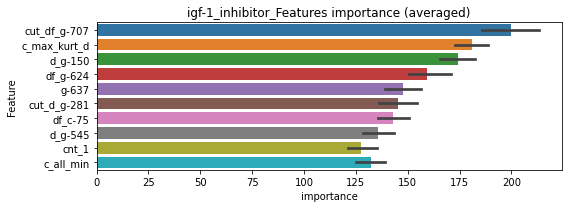

len(train_index) : 2850
len(valid_index) : 951
================================= fold 1/4 igf-1_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000422149	valid_1's binary_logloss: 0.000662866
[2000]	training's binary_logloss: 0.000242896	valid_1's binary_logloss: 0.00038348
[3000]	training's binary_logloss: 0.000180846	valid_1's binary_logloss: 0.000286064
[4000]	training's binary_logloss: 0.000150911	valid_1's binary_logloss: 0.000238989
[5000]	training's binary_logloss: 0.000135451	valid_1's binary_logloss: 0.000214631
[6000]	training's binary_logloss: 0.000125451	valid_1's binary_logloss: 0.000198836
[7000]	training's binary_logloss: 0.000118479	valid_1's binary_logloss: 0.000187823
[8000]	training's binary_logloss: 0.000113675	valid_1's binary_logloss: 0.000180221
[9000]	training's binary_logloss: 0.000110246	valid_1's binary_logloss: 0.000174791
[10000]	training's binary_logloss: 0.000107833	valid_1's binary_logloss: 0.000171003
Did not meet early stopping. Best iteration is:
[9999]	training's binary_logloss: 0.000107833	valid

len(train_index) : 2851
len(valid_index) : 950
================================= fold 2/4 igf-1_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2851
len(valid_index) : 950
================================= fold 3/4 igf-1_inhibitor=================================


Early stopping, best iteration is:
[899]	training's binary_logloss: 0.000552154	valid_1's binary_logloss: 0.00221533
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[902]	training's binary_logloss: 0.000548888	valid_1's binary_logloss: 0.00236071


len(train_index) : 2851
len(valid_index) : 950
================================= fold 4/4 igf-1_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000519429	valid_1's binary_logloss: 0.00167486
Early stopping, best iteration is:
[1508]	training's binary_logloss: 0.000366615	valid_1's binary_logloss: 0.00152648


igf-1_inhibitor logloss: 0.0015680627745673162


neg labels: 3289 → selected neg labels: 3285


ikk_inhibitor, len(trt): 30, len(othr): 3285
target_rate: 0.0012598 → Adj_target_rate: 0.0015127
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0019559	valid_1's binary_logloss: 0.013645
[600]	training's binary_logloss: 0.000472791	valid_1's binary_logloss: 0.00881587
Early stopping, best iteration is:
[630]	training's binary_logloss: 0.000452582	valid_1's binary_logloss: 0.0086473
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00197678	valid_1's binary_logloss: 0.00640858
[600]	training's binary_logloss: 0.000469332	valid_1's binary_logloss: 0.00258428
Early stopping, best iteration is:
[669]	training's binary_logloss: 0.000438076	valid_1's binary_logloss: 0.00251988
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0019772	valid_1's binary_logloss: 0.00509186
[600]	training's binary_logloss: 0.000472148	valid_1's binary_logloss: 0.00209038
Early stopping, best iteration is:
[674]	training's binary_logloss: 0.000437349	valid_1's binary_lo

1 / 3 AUC score:1.000
y_Threshold: 0.0039119, Threshold: 0.0120780, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00126
Num_p_label: 40.0, conf_0:0.00845, conf_1:0.01570
Num_p_label: 40.0, Expected: 5.0, Adj_threshold_1: 0.0120780
Num_p_label: 7.0, Expected: 5.0, Adj_threshold_2: 0.0420780
threshold: 0.0420780, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00174562	valid_1's binary_logloss: 0.0125523
[600]	training's binary_logloss: 0.000441869	valid_1's binary_logloss: 0.00823718
Early stopping, best iteration is:
[616]	training's binary_logloss: 0.000435078	valid_1's binary_logloss: 0.00821771
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00177842	valid_1's binary_logloss: 0.00556308
[600]	training's binary_logloss: 0.00044531	valid_1's binary_logloss: 0.00237545
Early stopping, best iteration is:
[662]	training's binary_logloss: 0.00041951	valid_1's binary_logloss: 0.00230679
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00180394	valid_1's binary_logloss: 0.00371394
[600]	training's binary_logloss: 0.000444724	valid_1's binary_logloss: 0.00117994
Early stopping, best iteration is:
[672]	training's binary_logloss: 0.000415262	valid_1's binary_

2 / 3 AUC score:1.000
y_Threshold: 0.0298320, Threshold: 0.0420780, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0065294 Vs.target_rate: 0.00126
Num_p_label: 26.0, conf_0:0.03366, conf_1:0.05049
Num_p_label: 26.0, Expected: 5.0, Adj_threshold_1: 0.0420780
Num_p_label: 14.0, Expected: 5.0, Adj_threshold_2: 0.0720780
Num_p_label: 11.0, Expected: 5.0, Adj_threshold_3: 0.1020780
threshold: 0.1020780, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00174562	valid_1's binary_logloss: 0.0125523
[600]	training's binary_logloss: 0.000441869	valid_1's binary_logloss: 0.00823718
Early stopping, best iteration is:
[616]	training's binary_logloss: 0.000435078	valid_1's binary_logloss: 0.00821771
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00177842	valid_1's binary_logloss: 0.00556308
[600]	training's binary_logloss: 0.00044531	valid_1's binary_logloss: 0.00237545
Early stopping, best iteration is:
[662]	training's binary_logloss: 0.00041951	valid_1's binary_logloss: 0.00230679
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00180394	valid_1's binary_logloss: 0.00371394
[600]	training's binary_logloss: 0.000444724	valid_1's binary_logloss: 0.00117994
Early stopping, best iteration is:
[672]	training's binary_logloss: 0.000415262	valid_1's binary_

3 / 3 AUC score:1.000
y_Threshold: 0.0298320, Threshold: 0.1020780, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0027624 Vs.target_rate: 0.00126
Num_p_label: 11.0, conf_0:0.09187, conf_1:0.11229
Num_p_label: 11.0, Expected: 5.0, Adj_threshold_1: 0.1020780
threshold: 0.1020780, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


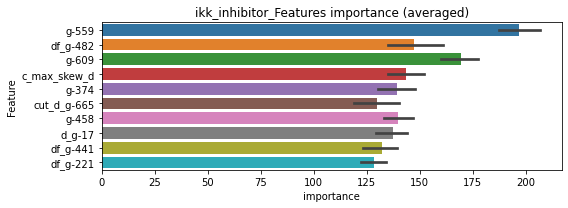

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 ikk_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 ikk_inhibitor=================================


Early stopping, best iteration is:
[622]	training's binary_logloss: 0.000622458	valid_1's binary_logloss: 0.00782751
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000479506	valid_1's binary_logloss: 0.0026243
[2000]	training's binary_logloss: 0.000282951	valid_1's binary_logloss: 0.00224332
[3000]	training's binary_logloss: 0.000227697	valid_1's binary_logloss: 0.00212828
Early stopping, best iteration is:
[3284]	training's binary_logloss: 0.000218434	valid_1's binary_logloss: 0.00210945


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 ikk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000401706	valid_1's binary_logloss: 0.000506315
[2000]	training's binary_logloss: 0.000236775	valid_1's binary_logloss: 0.000299353
[3000]	training's binary_logloss: 0.000178109	valid_1's binary_logloss: 0.000225418
[4000]	training's binary_logloss: 0.000149294	valid_1's binary_logloss: 0.000189047
[5000]	training's binary_logloss: 0.00013431	valid_1's binary_logloss: 0.000170113
[6000]	training's binary_logloss: 0.000124645	valid_1's binary_logloss: 0.000157894
[7000]	training's binary_logloss: 0.00011787	valid_1's binary_logloss: 0.00014933
[8000]	training's binary_logloss: 0.000113191	valid_1's binary_logloss: 0.000143416
[9000]	training's binary_logloss: 0.000109871	valid_1's binary_logloss: 0.000139215
[10000]	training's binary_logloss: 0.000107442	valid_1's binary_logloss: 0.000136145
Did not meet early stopping. Best iteration is:
[9999]	training's binary_logloss: 0.000107442	valid_1

len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 ikk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000491691	valid_1's binary_logloss: 0.000738859
[2000]	training's binary_logloss: 0.000284689	valid_1's binary_logloss: 0.000496833
[3000]	training's binary_logloss: 0.000225779	valid_1's binary_logloss: 0.000425831
[4000]	training's binary_logloss: 0.000198725	valid_1's binary_logloss: 0.000388463
[5000]	training's binary_logloss: 0.000184491	valid_1's binary_logloss: 0.000368347
[6000]	training's binary_logloss: 0.000174868	valid_1's binary_logloss: 0.000355911
Early stopping, best iteration is:
[6838]	training's binary_logloss: 0.000169196	valid_1's binary_logloss: 0.000347284


ikk_inhibitor logloss: 0.002606648122212138


neg labels: 3289 → selected neg labels: 3286


imidazoline_receptor_agonist, len(trt): 31, len(othr): 3286
target_rate: 0.0013018 → Adj_target_rate: 0.0015554
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00176924	valid_1's binary_logloss: 0.00777722
[600]	training's binary_logloss: 0.000441888	valid_1's binary_logloss: 0.00455377
Early stopping, best iteration is:
[592]	training's binary_logloss: 0.00044331	valid_1's binary_logloss: 0.00455139
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00172765	valid_1's binary_logloss: 0.0132561
[600]	training's binary_logloss: 0.000438142	valid_1's binary_logloss: 0.00991692
Early stopping, best iteration is:
[667]	training's binary_logloss: 0.000412104	valid_1's binary_logloss: 0.00984584
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00183593	valid_1's binary_logloss: 0.00347181
[600]	training's binary_logloss: 0.000455362	valid_1's binary_logloss: 0.00140905
Early stopping, best iteration is:
[655]	training's binary_logloss: 0.000437524	valid_1's binary

1 / 3 AUC score:1.000
y_Threshold: 0.0025485, Threshold: 0.0189395, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00130
Num_p_label: 40.0, conf_0:0.01326, conf_1:0.02462
Num_p_label: 40.0, Expected: 5.2, Adj_threshold_1: 0.0189395
Num_p_label: 16.0, Expected: 5.2, Adj_threshold_2: 0.0489395
Num_p_label: 11.0, Expected: 5.2, Adj_threshold_3: 0.0789395
threshold: 0.0789395, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00164076	valid_1's binary_logloss: 0.00699933
[600]	training's binary_logloss: 0.000425269	valid_1's binary_logloss: 0.00395251
Early stopping, best iteration is:
[672]	training's binary_logloss: 0.000401744	valid_1's binary_logloss: 0.00389143
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0016207	valid_1's binary_logloss: 0.0134458
[600]	training's binary_logloss: 0.00041582	valid_1's binary_logloss: 0.011106
Early stopping, best iteration is:
[627]	training's binary_logloss: 0.000404212	valid_1's binary_logloss: 0.0110466
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00167514	valid_1's binary_logloss: 0.00331801
[600]	training's binary_logloss: 0.000427923	valid_1's binary_logloss: 0.00130679
Early stopping, best iteration is:
[665]	training's binary_logloss: 0.000406474	valid_1's binary_log

2 / 3 AUC score:1.000
y_Threshold: 0.0243717, Threshold: 0.0789395, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0060271 Vs.target_rate: 0.00130
Num_p_label: 24.0, conf_0:0.06315, conf_1:0.09473
Num_p_label: 24.0, Expected: 5.2, Adj_threshold_1: 0.0789395
Num_p_label: 20.0, Expected: 5.2, Adj_threshold_2: 0.1089395
Num_p_label: 15.0, Expected: 5.2, Adj_threshold_3: 0.1389395
Num_p_label: 12.0, Expected: 5.2, Adj_threshold_4: 0.1689395
threshold: 0.1689395, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00164076	valid_1's binary_logloss: 0.00699933
[600]	training's binary_logloss: 0.000425269	valid_1's binary_logloss: 0.00395251
Early stopping, best iteration is:
[672]	training's binary_logloss: 0.000401744	valid_1's binary_logloss: 0.00389143
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0016207	valid_1's binary_logloss: 0.0134458
[600]	training's binary_logloss: 0.00041582	valid_1's binary_logloss: 0.011106
Early stopping, best iteration is:
[627]	training's binary_logloss: 0.000404212	valid_1's binary_logloss: 0.0110466
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00167514	valid_1's binary_logloss: 0.00331801
[600]	training's binary_logloss: 0.000427923	valid_1's binary_logloss: 0.00130679
Early stopping, best iteration is:
[665]	training's binary_logloss: 0.000406474	valid_1's binary_log

3 / 3 AUC score:1.000
y_Threshold: 0.0243717, Threshold: 0.1689395, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0030136 Vs.target_rate: 0.00130
Num_p_label: 12.0, conf_0:0.15205, conf_1:0.18583
Num_p_label: 12.0, Expected: 5.2, Adj_threshold_1: 0.1689395
threshold: 0.1689395, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


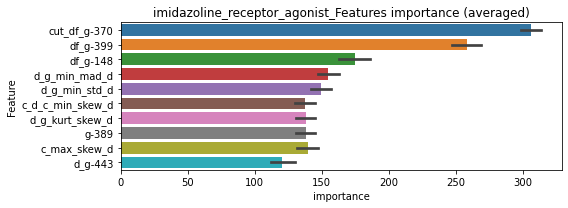

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 imidazoline_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000399002	valid_1's binary_logloss: 0.000545961
[2000]	training's binary_logloss: 0.000235893	valid_1's binary_logloss: 0.000324118
[3000]	training's binary_logloss: 0.000177787	valid_1's binary_logloss: 0.00024463
[4000]	training's binary_logloss: 0.000149187	valid_1's binary_logloss: 0.000205433
[5000]	training's binary_logloss: 0.000134217	valid_1's binary_logloss: 0.000184876
[6000]	training's binary_logloss: 0.000124546	valid_1's binary_logloss: 0.000171591
[7000]	training's binary_logloss: 0.000117781	valid_1's binary_logloss: 0.000162296
[8000]	training's binary_logloss: 0.000113129	valid_1's binary_logloss: 0.000155906
[9000]	training's binary_logloss: 0.000109799	valid_1's binary_logloss: 0.000151328
[10000]	training's binary_logloss: 0.000107418	valid_1's binary_logloss: 0.000148055
Did not meet early stopping. Best iteration is:
[9999]	training's binary_logloss: 0.000107418	valid

len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 imidazoline_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000396226	valid_1's binary_logloss: 0.000920215
[2000]	training's binary_logloss: 0.000235121	valid_1's binary_logloss: 0.000559011
[3000]	training's binary_logloss: 0.000177399	valid_1's binary_logloss: 0.000425154
[4000]	training's binary_logloss: 0.000148959	valid_1's binary_logloss: 0.00035854
[5000]	training's binary_logloss: 0.000134076	valid_1's binary_logloss: 0.000323338
[6000]	training's binary_logloss: 0.000124477	valid_1's binary_logloss: 0.000300597
[7000]	training's binary_logloss: 0.000117744	valid_1's binary_logloss: 0.000284587
[8000]	training's binary_logloss: 0.000113115	valid_1's binary_logloss: 0.00027357
[9000]	training's binary_logloss: 0.000109794	valid_1's binary_logloss: 0.000265641
[10000]	training's binary_logloss: 0.0001074	valid_1's binary_logloss: 0.000259962
Did not meet early stopping. Best iteration is:
[9999]	training's binary_logloss: 0.0001074	valid_1's 

len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 imidazoline_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000505426	valid_1's binary_logloss: 0.000904212
[2000]	training's binary_logloss: 0.000286254	valid_1's binary_logloss: 0.000655194
[3000]	training's binary_logloss: 0.000220676	valid_1's binary_logloss: 0.00057659
[4000]	training's binary_logloss: 0.000190056	valid_1's binary_logloss: 0.000524218
[5000]	training's binary_logloss: 0.000174687	valid_1's binary_logloss: 0.000496853
[6000]	training's binary_logloss: 0.000165052	valid_1's binary_logloss: 0.000475139
Early stopping, best iteration is:
[6064]	training's binary_logloss: 0.00016454	valid_1's binary_logloss: 0.000473813


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 imidazoline_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000488801	valid_1's binary_logloss: 0.00204888
Early stopping, best iteration is:
[984]	training's binary_logloss: 0.000497064	valid_1's binary_logloss: 0.00203871


imidazoline_receptor_agonist logloss: 0.0007298170535774644


neg labels: 3289 → selected neg labels: 3279


immunosuppressant, len(trt): 73, len(othr): 3279
target_rate: 0.0030654 → Adj_target_rate: 0.0032212
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00695572	valid_1's binary_logloss: 0.0379471
[600]	training's binary_logloss: 0.00116997	valid_1's binary_logloss: 0.0269626
Early stopping, best iteration is:
[670]	training's binary_logloss: 0.000966521	valid_1's binary_logloss: 0.0264237
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00775895	valid_1's binary_logloss: 0.0393304
[600]	training's binary_logloss: 0.00126376	valid_1's binary_logloss: 0.0260097
Early stopping, best iteration is:
[817]	training's binary_logloss: 0.000782311	valid_1's binary_logloss: 0.0243503
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00713553	valid_1's binary_logloss: 0.0333424
[600]	training's binary_logloss: 0.00120511	valid_1's binary_logloss: 0.0209299
Early stopping, best iteration is:
[677]	training's binary_logloss: 0.000982557	valid_1's binary_logloss:

1 / 3 AUC score:1.000
y_Threshold: 0.0080209, Threshold: 0.0258685, pos_neg_ratio: 0.8000000
Remove_noisy_data: 138 → Positive_corect_labels: 652/3796
p_label_rate: 0.0100452 Vs.target_rate: 0.00307
Num_p_label: 40.0, conf_0:0.01811, conf_1:0.03363
Num_p_label: 40.0, Expected: 12.2, Adj_threshold_1: 0.0258685
Num_p_label: 13.0, Expected: 12.2, Adj_threshold_2: 0.0558685
threshold: 0.0558685, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 652.0/3796, y_label_rate: 0.1717597
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00624518	valid_1's binary_logloss: 0.0270348
[600]	training's binary_logloss: 0.0011388	valid_1's binary_logloss: 0.0172051
Early stopping, best iteration is:
[744]	training's binary_logloss: 0.000810176	valid_1's binary_logloss: 0.0161679
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00632243	valid_1's binary_logloss: 0.0458429
[600]	training's binary_logloss: 0.00110802	valid_1's binary_logloss: 0.035234
Early stopping, best iteration is:
[775]	training's binary_logloss: 0.000752416	valid_1's binary_logloss: 0.0341555
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00687019	valid_1's binary_logloss: 0.0267624
[600]	training's binary_logloss: 0.00118323	valid_1's binary_logloss: 0.0149378
[900]	training's binary_logloss: 0.000702655	valid_1's binary_logloss: 0.0130953
Early stopping, best itera

2 / 3 AUC score:1.000
y_Threshold: 0.0279776, Threshold: 0.0558685, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 648.0/3788
p_label_rate: 0.0040181 Vs.target_rate: 0.00307
Num_p_label: 16.0, conf_0:0.04469, conf_1:0.06704
threshold: 0.0558685, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 648.0/3788, y_label_rate: 0.1710665
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00617965	valid_1's binary_logloss: 0.0356487
[600]	training's binary_logloss: 0.00110381	valid_1's binary_logloss: 0.0236509
Early stopping, best iteration is:
[802]	training's binary_logloss: 0.000728587	valid_1's binary_logloss: 0.0226689
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00605054	valid_1's binary_logloss: 0.0390959
[600]	training's binary_logloss: 0.0010871	valid_1's binary_logloss: 0.0276512
Early stopping, best iteration is:
[617]	training's binary_logloss: 0.00103143	valid_1's binary_logloss: 0.0273769
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00640963	valid_1's binary_logloss: 0.0307734
[600]	training's binary_logloss: 0.00112435	valid_1's binary_logloss: 0.0175047
Early stopping, best iteration is:
[770]	training's binary_logloss: 0.000763328	valid_1's binary_logloss: 0

3 / 3 AUC score:1.000
y_Threshold: 0.0282982, Threshold: 0.0558685, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 647.0/3786
p_label_rate: 0.0042692 Vs.target_rate: 0.00307
Num_p_label: 17.0, conf_0:0.05028, conf_1:0.06146
threshold: 0.0558685, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 647.0/3786, y_label_rate: 0.1708928


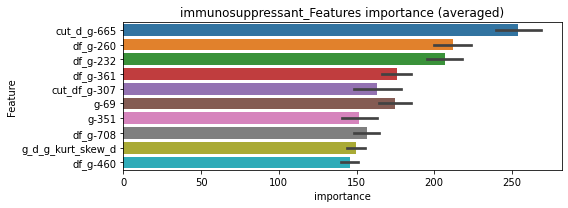

len(train_index) : 2839
len(valid_index) : 947
================================= fold 1/4 immunosuppressant=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000452961	valid_1's binary_logloss: 0.000727166
[2000]	training's binary_logloss: 0.000251234	valid_1's binary_logloss: 0.000405277
[3000]	training's binary_logloss: 0.000184682	valid_1's binary_logloss: 0.000298417
[4000]	training's binary_logloss: 0.00015314	valid_1's binary_logloss: 0.000247685
[5000]	training's binary_logloss: 0.000137048	valid_1's binary_logloss: 0.000221782
[6000]	training's binary_logloss: 0.000126646	valid_1's binary_logloss: 0.000204969
[7000]	training's binary_logloss: 0.000119409	valid_1's binary_logloss: 0.000193269
[8000]	training's binary_logloss: 0.000114452	valid_1's binary_logloss: 0.000185264
[9000]	training's binary_logloss: 0.000110933	valid_1's binary_logloss: 0.000179578
[10000]	training's binary_logloss: 0.000108433	valid_1's binary_logloss: 0.000175561
Did not meet early stopping. Best iteration is:
[9999]	training's binary_logloss: 0.000108433	valid

len(train_index) : 2839
len(valid_index) : 947
================================= fold 2/4 immunosuppressant=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000568562	valid_1's binary_logloss: 0.00333226
Early stopping, best iteration is:
[1787]	training's binary_logloss: 0.000350122	valid_1's binary_logloss: 0.00303354


len(train_index) : 2840
len(valid_index) : 946
================================= fold 3/4 immunosuppressant=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000553945	valid_1's binary_logloss: 0.00270481
[2000]	training's binary_logloss: 0.00031624	valid_1's binary_logloss: 0.00226241
Early stopping, best iteration is:
[2075]	training's binary_logloss: 0.000308962	valid_1's binary_logloss: 0.00224676


len(train_index) : 2840
len(valid_index) : 946
================================= fold 4/4 immunosuppressant=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000531487	valid_1's binary_logloss: 0.000846219
[2000]	training's binary_logloss: 0.000304458	valid_1's binary_logloss: 0.000542348
[3000]	training's binary_logloss: 0.000233461	valid_1's binary_logloss: 0.000442392
[4000]	training's binary_logloss: 0.000199833	valid_1's binary_logloss: 0.000394411
[5000]	training's binary_logloss: 0.000181712	valid_1's binary_logloss: 0.00036665
[6000]	training's binary_logloss: 0.000169904	valid_1's binary_logloss: 0.000348314
[7000]	training's binary_logloss: 0.000161321	valid_1's binary_logloss: 0.000335017
[8000]	training's binary_logloss: 0.000154895	valid_1's binary_logloss: 0.000324662
Early stopping, best iteration is:
[8788]	training's binary_logloss: 0.00015089	valid_1's binary_logloss: 0.000318301


immunosuppressant logloss: 0.0014451230710015963


neg labels: 3289 → selected neg labels: 3284


insulin_secretagogue, len(trt): 30, len(othr): 3284
target_rate: 0.0012598 → Adj_target_rate: 0.0015127
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00215768	valid_1's binary_logloss: 0.0132671
Early stopping, best iteration is:
[501]	training's binary_logloss: 0.000649928	valid_1's binary_logloss: 0.00937274
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00225179	valid_1's binary_logloss: 0.00802282
[600]	training's binary_logloss: 0.00052362	valid_1's binary_logloss: 0.00422206
Early stopping, best iteration is:
[658]	training's binary_logloss: 0.000489572	valid_1's binary_logloss: 0.00416023
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00238352	valid_1's binary_logloss: 0.00452904
[600]	training's binary_logloss: 0.000536437	valid_1's binary_logloss: 0.00155227
Early stopping, best iteration is:
[663]	training's binary_logloss: 0.000500109	valid_1's binary_logloss: 0.00149133
Training until validation scores don't improve for 30 rounds


1 / 3 AUC score:1.000
y_Threshold: 0.0031031, Threshold: 0.0128461, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[567]	training's binary_logloss: 0.000549683	valid_1's binary_logloss: 0.00947279


Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00126
Num_p_label: 40.0, conf_0:0.00899, conf_1:0.01670
Num_p_label: 40.0, Expected: 5.0, Adj_threshold_1: 0.0128461
Num_p_label: 10.0, Expected: 5.0, Adj_threshold_2: 0.0428461
threshold: 0.0428461, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00200439	valid_1's binary_logloss: 0.0124799
Early stopping, best iteration is:
[502]	training's binary_logloss: 0.000613659	valid_1's binary_logloss: 0.00898534
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00218083	valid_1's binary_logloss: 0.00776326
[600]	training's binary_logloss: 0.000519428	valid_1's binary_logloss: 0.00420595
Early stopping, best iteration is:
[691]	training's binary_logloss: 0.000481251	valid_1's binary_logloss: 0.00413372
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00218682	valid_1's binary_logloss: 0.00409788
[600]	training's binary_logloss: 0.000512733	valid_1's binary_logloss: 0.00145101
Early stopping, best iteration is:
[705]	training's binary_logloss: 0.000472431	valid_1's binary_logloss: 0.00138635
Training until validation scores don't improve for 30 rounds

2 / 3 AUC score:1.000
y_Threshold: 0.0197192, Threshold: 0.0428461, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0065294 Vs.target_rate: 0.00126
Num_p_label: 26.0, conf_0:0.03428, conf_1:0.05142
Num_p_label: 26.0, Expected: 5.0, Adj_threshold_1: 0.0428461


[600]	training's binary_logloss: 0.000500834	valid_1's binary_logloss: 0.00812085
Early stopping, best iteration is:
[573]	training's binary_logloss: 0.000526783	valid_1's binary_logloss: 0.00810846


Num_p_label: 15.0, Expected: 5.0, Adj_threshold_2: 0.0728461
Num_p_label: 10.0, Expected: 5.0, Adj_threshold_3: 0.1028461
threshold: 0.1028461, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00200439	valid_1's binary_logloss: 0.0124799
Early stopping, best iteration is:
[502]	training's binary_logloss: 0.000613659	valid_1's binary_logloss: 0.00898534
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00218083	valid_1's binary_logloss: 0.00776326
[600]	training's binary_logloss: 0.000519428	valid_1's binary_logloss: 0.00420595
Early stopping, best iteration is:
[668]	training's binary_logloss: 0.000481251	valid_1's binary_logloss: 0.00413372
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00218682	valid_1's binary_logloss: 0.00409788
[600]	training's binary_logloss: 0.000512733	valid_1's binary_logloss: 0.00145101
Early stopping, best iteration is:
[705]	training's binary_logloss: 0.000472431	valid_1's binary_logloss: 0.00138635
Training until validation scores don't improve for 30 rounds

3 / 3 AUC score:1.000
y_Threshold: 0.0197192, Threshold: 0.1028461, pos_neg_ratio: 0.8000000


[600]	training's binary_logloss: 0.000500834	valid_1's binary_logloss: 0.00812085
Early stopping, best iteration is:
[573]	training's binary_logloss: 0.000526783	valid_1's binary_logloss: 0.00810846


Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0025113 Vs.target_rate: 0.00126
Num_p_label: 10.0, conf_0:0.09256, conf_1:0.11313
Num_p_label: 10.0, Expected: 5.0, Adj_threshold_1: 0.1028461
threshold: 0.1028461, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


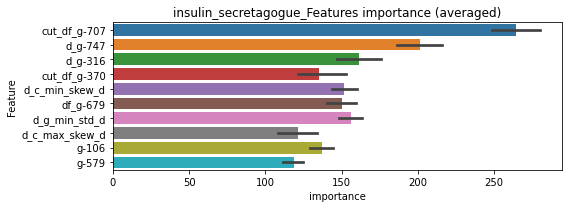

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 insulin_secretagogue=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000413552	valid_1's binary_logloss: 0.000672452
[2000]	training's binary_logloss: 0.000240192	valid_1's binary_logloss: 0.000393809
[3000]	training's binary_logloss: 0.000179587	valid_1's binary_logloss: 0.000295395
[4000]	training's binary_logloss: 0.000150281	valid_1's binary_logloss: 0.000247705
[5000]	training's binary_logloss: 0.000135008	valid_1's binary_logloss: 0.000222712
[6000]	training's binary_logloss: 0.000125057	valid_1's binary_logloss: 0.00020635
[7000]	training's binary_logloss: 0.000118103	valid_1's binary_logloss: 0.000194907
[8000]	training's binary_logloss: 0.000113311	valid_1's binary_logloss: 0.000187016
[9000]	training's binary_logloss: 0.000109899	valid_1's binary_logloss: 0.000181396
[10000]	training's binary_logloss: 0.000107564	valid_1's binary_logloss: 0.000177627
Did not meet early stopping. Best iteration is:
[9999]	training's binary_logloss: 0.000107564	valid

len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 insulin_secretagogue=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000488311	valid_1's binary_logloss: 0.000848401
[2000]	training's binary_logloss: 0.000287274	valid_1's binary_logloss: 0.000637597
[3000]	training's binary_logloss: 0.0002237	valid_1's binary_logloss: 0.000572599
[4000]	training's binary_logloss: 0.000192296	valid_1's binary_logloss: 0.000529202
Early stopping, best iteration is:
[4203]	training's binary_logloss: 0.000188152	valid_1's binary_logloss: 0.000521158


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 insulin_secretagogue=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000520981	valid_1's binary_logloss: 0.00186388
Early stopping, best iteration is:
[1038]	training's binary_logloss: 0.000503414	valid_1's binary_logloss: 0.0018233


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 insulin_secretagogue=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00050854	valid_1's binary_logloss: 0.00324047
Early stopping, best iteration is:
[1395]	training's binary_logloss: 0.000379418	valid_1's binary_logloss: 0.00310185


insulin_secretagogue logloss: 0.0014060300438201744


neg labels: 3289 → selected neg labels: 3284


insulin_sensitizer, len(trt): 51, len(othr): 3284
target_rate: 0.0021416 → Adj_target_rate: 0.0023748
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00401587	valid_1's binary_logloss: 0.0341252
[600]	training's binary_logloss: 0.000756356	valid_1's binary_logloss: 0.02663
Early stopping, best iteration is:
[755]	training's binary_logloss: 0.000578072	valid_1's binary_logloss: 0.0259549
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00429133	valid_1's binary_logloss: 0.0183197
[600]	training's binary_logloss: 0.00079061	valid_1's binary_logloss: 0.00997222
Early stopping, best iteration is:
[720]	training's binary_logloss: 0.000617642	valid_1's binary_logloss: 0.00938116
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00431131	valid_1's binary_logloss: 0.012046
[600]	training's binary_logloss: 0.00080204	valid_1's binary_logloss: 0.00465328
Early stopping, best iteration is:
[769]	training's binary_logloss: 0.000599462	valid_1's binary_logloss

1 / 3 AUC score:1.000
y_Threshold: 0.0054575, Threshold: 0.0166369, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 655/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00214
Num_p_label: 40.0, conf_0:0.01165, conf_1:0.02163
Num_p_label: 40.0, Expected: 8.5, Adj_threshold_1: 0.0166369
Num_p_label: 8.0, Expected: 8.5, Adj_threshold_2: 0.0466369
threshold: 0.0466369, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 655.0/3806, y_label_rate: 0.1720967
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00388064	valid_1's binary_logloss: 0.0193385
[600]	training's binary_logloss: 0.000742962	valid_1's binary_logloss: 0.0119377
Early stopping, best iteration is:
[630]	training's binary_logloss: 0.000688181	valid_1's binary_logloss: 0.0117308
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00402893	valid_1's binary_logloss: 0.0131733
[600]	training's binary_logloss: 0.000766881	valid_1's binary_logloss: 0.00504158
Early stopping, best iteration is:
[761]	training's binary_logloss: 0.000580794	valid_1's binary_logloss: 0.00433913
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00394631	valid_1's binary_logloss: 0.0145281
[600]	training's binary_logloss: 0.000762757	valid_1's binary_logloss: 0.00730845
Early stopping, best iteration is:
[783]	training's binary_logloss: 0.000570085	valid_1's binary_lo

2 / 3 AUC score:1.000
y_Threshold: 0.0403666, Threshold: 0.0466369, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 653.0/3802
p_label_rate: 0.0047715 Vs.target_rate: 0.00214


Early stopping, best iteration is:
[554]	training's binary_logloss: 0.000824076	valid_1's binary_logloss: 0.0294342


Num_p_label: 19.0, conf_0:0.03731, conf_1:0.05596
Num_p_label: 19.0, Expected: 8.5, Adj_threshold_1: 0.0466369
threshold: 0.0466369, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 653.0/3802, y_label_rate: 0.1717517
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00386572	valid_1's binary_logloss: 0.0206558
[600]	training's binary_logloss: 0.000742971	valid_1's binary_logloss: 0.0128384
Early stopping, best iteration is:
[771]	training's binary_logloss: 0.000562705	valid_1's binary_logloss: 0.0121284
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0038249	valid_1's binary_logloss: 0.0190836
[600]	training's binary_logloss: 0.000736602	valid_1's binary_logloss: 0.0122154
Early stopping, best iteration is:
[643]	training's binary_logloss: 0.000662673	valid_1's binary_logloss: 0.0120681
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00385167	valid_1's binary_logloss: 0.0211551
[600]	training's binary_logloss: 0.000744779	valid_1's binary_logloss: 0.0126225
Early stopping, best iteration is:
[735]	training's binary_logloss: 0.000578283	valid_1's binary_loglos

3 / 3 AUC score:1.000
y_Threshold: 0.0394696, Threshold: 0.0466369, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 653.0/3802
p_label_rate: 0.0042692 Vs.target_rate: 0.00214
Num_p_label: 17.0, conf_0:0.04197, conf_1:0.05130
Num_p_label: 17.0, Expected: 8.5, Adj_threshold_1: 0.0466369
threshold: 0.0466369, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 653.0/3802, y_label_rate: 0.1717517


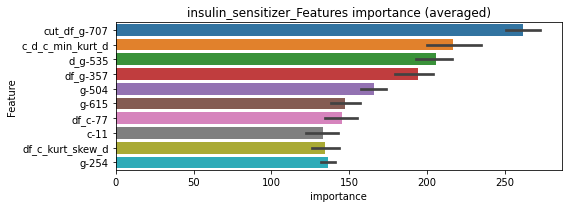

len(train_index) : 2851
len(valid_index) : 951
================================= fold 1/4 insulin_sensitizer=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000523718	valid_1's binary_logloss: 0.00323911
Early stopping, best iteration is:
[1581]	training's binary_logloss: 0.000354513	valid_1's binary_logloss: 0.00301395


len(train_index) : 2851
len(valid_index) : 951
================================= fold 2/4 insulin_sensitizer=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2852
len(valid_index) : 950
================================= fold 3/4 insulin_sensitizer=================================


Early stopping, best iteration is:
[374]	training's binary_logloss: 0.00145698	valid_1's binary_logloss: 0.00535383
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000542363	valid_1's binary_logloss: 0.00379026
Early stopping, best iteration is:
[1479]	training's binary_logloss: 0.000388541	valid_1's binary_logloss: 0.00358917


len(train_index) : 2852
len(valid_index) : 950
================================= fold 4/4 insulin_sensitizer=================================


Training until validation scores don't improve for 30 rounds


insulin_sensitizer logloss: 0.003708872871911174


Early stopping, best iteration is:
[608]	training's binary_logloss: 0.000854338	valid_1's binary_logloss: 0.00287432
neg labels: 3289 → selected neg labels: 3281


integrin_inhibitor, len(trt): 42, len(othr): 3281
target_rate: 0.0017637 → Adj_target_rate: 0.0020135
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00368236	valid_1's binary_logloss: 0.0229949
[600]	training's binary_logloss: 0.000677136	valid_1's binary_logloss: 0.0162587
Early stopping, best iteration is:
[627]	training's binary_logloss: 0.000636825	valid_1's binary_logloss: 0.0161453
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00392341	valid_1's binary_logloss: 0.0164214
[600]	training's binary_logloss: 0.00069826	valid_1's binary_logloss: 0.0102876
Early stopping, best iteration is:
[631]	training's binary_logloss: 0.000648085	valid_1's binary_logloss: 0.0102128
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00427751	valid_1's binary_logloss: 0.0097099
[600]	training's binary_logloss: 0.000734168	valid_1's binary_logloss: 0.00360636
Early stopping, best iteration is:
[719]	training's binary_logloss: 0.0005879	valid_1's binary_logloss

1 / 3 AUC score:1.000
y_Threshold: 0.0046511, Threshold: 0.0144123, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00176
Num_p_label: 40.0, conf_0:0.01009, conf_1:0.01874
Num_p_label: 40.0, Expected: 7.0, Adj_threshold_1: 0.0144123
Num_p_label: 5.0, Expected: 7.0, Adj_threshold_2: 0.0444123
threshold: 0.0444123, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00346643	valid_1's binary_logloss: 0.0215697
[600]	training's binary_logloss: 0.000651251	valid_1's binary_logloss: 0.0153274
Early stopping, best iteration is:
[634]	training's binary_logloss: 0.000604526	valid_1's binary_logloss: 0.0152096
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00356175	valid_1's binary_logloss: 0.0150417
[600]	training's binary_logloss: 0.000667525	valid_1's binary_logloss: 0.00937272
Early stopping, best iteration is:
[617]	training's binary_logloss: 0.000644103	valid_1's binary_logloss: 0.00932973
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00414335	valid_1's binary_logloss: 0.00800388
[600]	training's binary_logloss: 0.000716494	valid_1's binary_logloss: 0.00285168
Early stopping, best iteration is:
[789]	training's binary_logloss: 0.00055741	valid_1's binary_lo

2 / 3 AUC score:1.000
y_Threshold: 0.0341182, Threshold: 0.0444123, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3805
p_label_rate: 0.0032647 Vs.target_rate: 0.00176
Num_p_label: 13.0, conf_0:0.03553, conf_1:0.05329
Num_p_label: 13.0, Expected: 7.0, Adj_threshold_1: 0.0444123
threshold: 0.0444123, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00346643	valid_1's binary_logloss: 0.0215697
[600]	training's binary_logloss: 0.000651251	valid_1's binary_logloss: 0.0153274
Early stopping, best iteration is:
[634]	training's binary_logloss: 0.000604526	valid_1's binary_logloss: 0.0152096
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00356175	valid_1's binary_logloss: 0.0150417
[600]	training's binary_logloss: 0.000667525	valid_1's binary_logloss: 0.00937272
Early stopping, best iteration is:
[617]	training's binary_logloss: 0.000644103	valid_1's binary_logloss: 0.00932973
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00414335	valid_1's binary_logloss: 0.00800388
[600]	training's binary_logloss: 0.000716494	valid_1's binary_logloss: 0.00285168
Early stopping, best iteration is:
[780]	training's binary_logloss: 0.00055741	valid_1's binary_lo

3 / 3 AUC score:1.000
y_Threshold: 0.0341182, Threshold: 0.0444123, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3805
p_label_rate: 0.0032647 Vs.target_rate: 0.00176
Num_p_label: 13.0, conf_0:0.03997, conf_1:0.04885
Num_p_label: 13.0, Expected: 7.0, Adj_threshold_1: 0.0444123
threshold: 0.0444123, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 656.0/3805, y_label_rate: 0.1724047


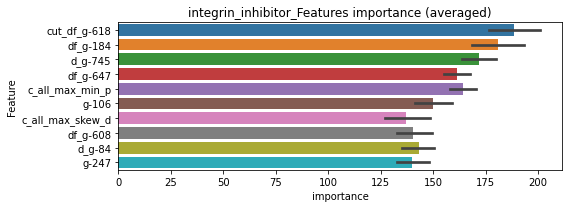

len(train_index) : 2853
len(valid_index) : 952
================================= fold 1/4 integrin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000529449	valid_1's binary_logloss: 0.00532972
Early stopping, best iteration is:
[1475]	training's binary_logloss: 0.000377184	valid_1's binary_logloss: 0.00508346


len(train_index) : 2854
len(valid_index) : 951
================================= fold 2/4 integrin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000532906	valid_1's binary_logloss: 0.00485736
Early stopping, best iteration is:
[1177]	training's binary_logloss: 0.000463864	valid_1's binary_logloss: 0.00477396


len(train_index) : 2854
len(valid_index) : 951
================================= fold 3/4 integrin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000534238	valid_1's binary_logloss: 0.000665246
[2000]	training's binary_logloss: 0.000304406	valid_1's binary_logloss: 0.000452031
[3000]	training's binary_logloss: 0.000238518	valid_1's binary_logloss: 0.000391502
Early stopping, best iteration is:
[3511]	training's binary_logloss: 0.000219968	valid_1's binary_logloss: 0.000373306


len(train_index) : 2854
len(valid_index) : 951
================================= fold 4/4 integrin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000531476	valid_1's binary_logloss: 0.00318303
Early stopping, best iteration is:
[1387]	training's binary_logloss: 0.000400331	valid_1's binary_logloss: 0.00304102


integrin_inhibitor logloss: 0.0033191037037210947


neg labels: 3289 → selected neg labels: 3273


jak_inhibitor, len(trt): 92, len(othr): 3273
target_rate: 0.0038633 → Adj_target_rate: 0.0039212
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00977281	valid_1's binary_logloss: 0.0682966
[600]	training's binary_logloss: 0.00154796	valid_1's binary_logloss: 0.058432
Early stopping, best iteration is:
[581]	training's binary_logloss: 0.00166223	valid_1's binary_logloss: 0.0581404
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00991678	valid_1's binary_logloss: 0.0652519
Early stopping, best iteration is:
[542]	training's binary_logloss: 0.00190865	valid_1's binary_logloss: 0.0558198
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.010075	valid_1's binary_logloss: 0.0435045
[600]	training's binary_logloss: 0.00155073	valid_1's binary_logloss: 0.0242011
Early stopping, best iteration is:
[767]	training's binary_logloss: 0.00101613	valid_1's binary_logloss: 0.0224469
Training until validation scores don't improve for 30 rounds
[300]	training

1 / 3 AUC score:0.996
y_Threshold: 0.0138294, Threshold: 0.0874104, pos_neg_ratio: 0.8000000
Remove_noisy_data: 150 → Positive_corect_labels: 645/3777
p_label_rate: 0.0100452 Vs.target_rate: 0.00386
Num_p_label: 40.0, conf_0:0.06119, conf_1:0.11363
Num_p_label: 40.0, Expected: 15.4, Adj_threshold_1: 0.0874104
Num_p_label: 28.0, Expected: 15.4, Adj_threshold_2: 0.1174104
Num_p_label: 22.0, Expected: 15.4, Adj_threshold_3: 0.1474104
threshold: 0.1474104, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 645.0/3777, y_label_rate: 0.1707705
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00824559	valid_1's binary_logloss: 0.0435049
[600]	training's binary_logloss: 0.00139922	valid_1's binary_logloss: 0.0306215
Early stopping, best iteration is:
[746]	training's binary_logloss: 0.000966713	valid_1's binary_logloss: 0.0295366
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00828994	valid_1's binary_logloss: 0.0530659
[600]	training's binary_logloss: 0.00135322	valid_1's binary_logloss: 0.0399787
Early stopping, best iteration is:
[609]	training's binary_logloss: 0.00131707	valid_1's binary_logloss: 0.0397249
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00906808	valid_1's binary_logloss: 0.0363495
[600]	training's binary_logloss: 0.00145864	valid_1's binary_logloss: 0.0242835
Early stopping, best iteration is:
[602]	training's binary_logloss: 0.00144779	valid_1's binary_logloss: 0

2 / 3 AUC score:0.999
y_Threshold: 0.0373742, Threshold: 0.1474104, pos_neg_ratio: 0.8000000
Remove_noisy_data: 16 → Positive_corect_labels: 637.0/3761
p_label_rate: 0.0133099 Vs.target_rate: 0.00386
Num_p_label: 53.0, conf_0:0.11793, conf_1:0.17689
Num_p_label: 53.0, Expected: 15.4, Adj_threshold_1: 0.1474104
Num_p_label: 47.0, Expected: 15.4, Adj_threshold_2: 0.1774104
Num_p_label: 38.0, Expected: 15.4, Adj_threshold_3: 0.2074104
Num_p_label: 34.0, Expected: 15.4, Adj_threshold_4: 0.2374104
Num_p_label: 31.0, Expected: 15.4, Adj_threshold_5: 0.2674104
Num_p_label: 28.0, Expected: 15.4, Adj_threshold_6: 0.2974104
Num_p_label: 27.0, Expected: 15.4, Adj_threshold_7: 0.3274104
Num_p_label: 25.0, Expected: 15.4, Adj_threshold_8: 0.3574104
Num_p_label: 22.0, Expected: 15.4, Adj_threshold_9: 0.3874104
threshold: 0.3874104, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 637.0/3761, y_label_rate: 0.1693698
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00777281	valid_1's binary_logloss: 0.0389436
[600]	training's binary_logloss: 0.00130685	valid_1's binary_logloss: 0.0238917
Early stopping, best iteration is:
[851]	training's binary_logloss: 0.000782693	valid_1's binary_logloss: 0.0216438
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00811517	valid_1's binary_logloss: 0.0383007
[600]	training's binary_logloss: 0.00136853	valid_1's binary_logloss: 0.0245196
Early stopping, best iteration is:
[692]	training's binary_logloss: 0.00105579	valid_1's binary_logloss: 0.0234231
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00794638	valid_1's binary_logloss: 0.0384884
[600]	training's binary_logloss: 0.0013627	valid_1's binary_logloss: 0.0227779
Early stopping, best iteration is:
[828]	training's binary_logloss: 0.000824439	valid_1's binary_logloss: 0

3 / 3 AUC score:1.000
y_Threshold: 0.0529587, Threshold: 0.3874104, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 633.0/3753
p_label_rate: 0.0067805 Vs.target_rate: 0.00386
Num_p_label: 27.0, conf_0:0.34867, conf_1:0.42615
Num_p_label: 27.0, Expected: 15.4, Adj_threshold_1: 0.3874104
Num_p_label: 24.0, Expected: 15.4, Adj_threshold_2: 0.4174104
Num_p_label: 24.0, Expected: 15.4, Adj_threshold_3: 0.4474104
Num_p_label: 22.0, Expected: 15.4, Adj_threshold_4: 0.4774104
threshold: 0.4774104, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 633.0/3753, y_label_rate: 0.1686651


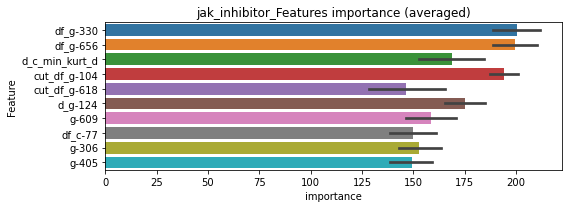

len(train_index) : 2814
len(valid_index) : 939
================================= fold 1/4 jak_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[846]	training's binary_logloss: 0.000697662	valid_1's binary_logloss: 0.00639269


len(train_index) : 2815
len(valid_index) : 938
================================= fold 2/4 jak_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2815
len(valid_index) : 938
================================= fold 3/4 jak_inhibitor=================================


Early stopping, best iteration is:
[624]	training's binary_logloss: 0.000866969	valid_1's binary_logloss: 0.00235162
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000559983	valid_1's binary_logloss: 0.000880006
[2000]	training's binary_logloss: 0.000315878	valid_1's binary_logloss: 0.000558709
[3000]	training's binary_logloss: 0.000239867	valid_1's binary_logloss: 0.000447981
[4000]	training's binary_logloss: 0.000204016	valid_1's binary_logloss: 0.000394497
[5000]	training's binary_logloss: 0.000185374	valid_1's binary_logloss: 0.000364438
[6000]	training's binary_logloss: 0.00017327	valid_1's binary_logloss: 0.0003445
[7000]	training's binary_logloss: 0.000164667	valid_1's binary_logloss: 0.000331264
Early stopping, best iteration is:
[7120]	training's binary_logloss: 0.000164047	valid_1's binary_logloss: 0.000330025


len(train_index) : 2815
len(valid_index) : 938
================================= fold 4/4 jak_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000592686	valid_1's binary_logloss: 0.00308036
[2000]	training's binary_logloss: 0.000334259	valid_1's binary_logloss: 0.00273058
Early stopping, best iteration is:
[2076]	training's binary_logloss: 0.000325954	valid_1's binary_logloss: 0.00271944


jak_inhibitor logloss: 0.002949486724223964


neg labels: 3289 → selected neg labels: 3248


kit_inhibitor, len(trt): 273, len(othr): 3248
target_rate: 0.0114638 → Adj_target_rate: 0.0098841
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0397489	valid_1's binary_logloss: 0.257527
Early stopping, best iteration is:
[319]	training's binary_logloss: 0.0352898	valid_1's binary_logloss: 0.255656
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0387144	valid_1's binary_logloss: 0.260194
Early stopping, best iteration is:
[304]	training's binary_logloss: 0.0378122	valid_1's binary_logloss: 0.259754
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0422762	valid_1's binary_logloss: 0.219202
Early stopping, best iteration is:
[414]	training's binary_logloss: 0.0206817	valid_1's binary_logloss: 0.208479
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0404659	valid_1's binary_logloss: 0.222485


1 / 3 AUC score:0.908
y_Threshold: 0.0817822, Threshold: 0.6943354, pos_neg_ratio: 0.8000000
Remove_noisy_data: 415 → Positive_corect_labels: 507/3482
p_label_rate: 0.0100452 Vs.target_rate: 0.01146
Num_p_label: 40.0, conf_0:0.48603, conf_1:0.80000


Early stopping, best iteration is:
[449]	training's binary_logloss: 0.0157812	valid_1's binary_logloss: 0.217187


threshold: 0.6943354, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 507.0/3482, y_label_rate: 0.1456060
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0192476	valid_1's binary_logloss: 0.151116
Early stopping, best iteration is:
[372]	training's binary_logloss: 0.0112603	valid_1's binary_logloss: 0.145487
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0181947	valid_1's binary_logloss: 0.130187
Early stopping, best iteration is:
[484]	training's binary_logloss: 0.00517928	valid_1's binary_logloss: 0.120291
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0198757	valid_1's binary_logloss: 0.144005
Early stopping, best iteration is:
[472]	training's binary_logloss: 0.00592395	valid_1's binary_logloss: 0.134303
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0179935	valid_1's binary_logloss: 0.141606


2 / 3 AUC score:0.982
y_Threshold: 0.0681807, Threshold: 0.6943354, pos_neg_ratio: 0.8000000
Remove_noisy_data: 100 → Positive_corect_labels: 457.0/3382


Early stopping, best iteration is:
[499]	training's binary_logloss: 0.00469493	valid_1's binary_logloss: 0.133769


p_label_rate: 0.0185836 Vs.target_rate: 0.01146
Num_p_label: 74.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 74.0, Expected: 45.6, Adj_threshold_1: 0.6943354
Num_p_label: 67.0, Expected: 45.6, Adj_threshold_2: 0.7243354
threshold: 0.7243354, positive_p_label: 67.0/3982, p_label_rate: 0.0168257
positive_y_label: 457.0/3382, y_label_rate: 0.1351271
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0126593	valid_1's binary_logloss: 0.127854
[600]	training's binary_logloss: 0.00216727	valid_1's binary_logloss: 0.120804
Early stopping, best iteration is:
[574]	training's binary_logloss: 0.0024049	valid_1's binary_logloss: 0.119554
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.013738	valid_1's binary_logloss: 0.0955492
[600]	training's binary_logloss: 0.00234417	valid_1's binary_logloss: 0.0821465
Early stopping, best iteration is:
[625]	training's binary_logloss: 0.00215492	valid_1's binary_logloss: 0.0818493
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0144843	valid_1's binary_logloss: 0.0917191
Early stopping, best iteration is:
[493]	training's binary_logloss: 0.00386882	valid_1's binary_logloss: 0.0818765
Training until validation scores don't improve for 30 rounds
[300]	training's bi

3 / 3 AUC score:0.987
y_Threshold: 0.0649890, Threshold: 0.7243354, pos_neg_ratio: 0.8000000
Remove_noisy_data: 72 → Positive_corect_labels: 421.0/3310
p_label_rate: 0.0210949 Vs.target_rate: 0.01146
Num_p_label: 84.0, conf_0:0.50000, conf_1:0.79677
Num_p_label: 84.0, Expected: 45.6, Adj_threshold_1: 0.7243354
Num_p_label: 79.0, Expected: 45.6, Adj_threshold_2: 0.7543354
Num_p_label: 73.0, Expected: 45.6, Adj_threshold_3: 0.7843354


Early stopping, best iteration is:
[322]	training's binary_logloss: 0.0113105	valid_1's binary_logloss: 0.138575


threshold: 0.7843354, positive_p_label: 73.0/3982, p_label_rate: 0.0183325
positive_y_label: 421.0/3310, y_label_rate: 0.1271903


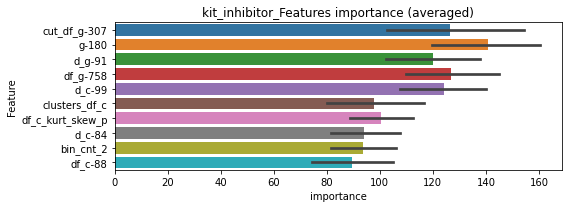

len(train_index) : 2482
len(valid_index) : 828
================================= fold 1/4 kit_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000650714	valid_1's binary_logloss: 0.00650127
Early stopping, best iteration is:
[1326]	training's binary_logloss: 0.000503496	valid_1's binary_logloss: 0.00629145


len(train_index) : 2482
len(valid_index) : 828
================================= fold 2/4 kit_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00065486	valid_1's binary_logloss: 0.000852019
[2000]	training's binary_logloss: 0.000373754	valid_1's binary_logloss: 0.000469895
[3000]	training's binary_logloss: 0.000289479	valid_1's binary_logloss: 0.000347678
[4000]	training's binary_logloss: 0.00025073	valid_1's binary_logloss: 0.000289129
[5000]	training's binary_logloss: 0.000231058	valid_1's binary_logloss: 0.000259071
[6000]	training's binary_logloss: 0.000218676	valid_1's binary_logloss: 0.000240052
[7000]	training's binary_logloss: 0.00020921	valid_1's binary_logloss: 0.000226316
[8000]	training's binary_logloss: 0.000201922	valid_1's binary_logloss: 0.000215922
Early stopping, best iteration is:
[8318]	training's binary_logloss: 0.000200093	valid_1's binary_logloss: 0.000213223


len(train_index) : 2483
len(valid_index) : 827
================================= fold 3/4 kit_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2483
len(valid_index) : 827
================================= fold 4/4 kit_inhibitor=================================


Early stopping, best iteration is:
[697]	training's binary_logloss: 0.000926094	valid_1's binary_logloss: 0.00694743
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000657226	valid_1's binary_logloss: 0.00230984
[2000]	training's binary_logloss: 0.000373873	valid_1's binary_logloss: 0.00189677
Early stopping, best iteration is:
[2709]	training's binary_logloss: 0.000305292	valid_1's binary_logloss: 0.00178506


kit_inhibitor logloss: 0.0038091356090368994


neg labels: 3289 → selected neg labels: 3289


laxative, len(trt): 6, len(othr): 3289
target_rate: 0.0002520 → Adj_target_rate: 0.0003851
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000388996	valid_1's binary_logloss: 0.000534873
Early stopping, best iteration is:
[492]	training's binary_logloss: 0.000187716	valid_1's binary_logloss: 0.000275099
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000387181	valid_1's binary_logloss: 0.000957348
Early stopping, best iteration is:
[469]	training's binary_logloss: 0.000192765	valid_1's binary_logloss: 0.000674688
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000390408	valid_1's binary_logloss: 0.000698859
Early stopping, best iteration is:
[480]	training's binary_logloss: 0.000191033	valid_1's binary_logloss: 0.000396627
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000389882	valid_1's binary_logloss: 0.000469769


1 / 3 AUC score:1.000
y_Threshold: 0.0005403, Threshold: 0.0017385, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00025
Num_p_label: 40.0, conf_0:0.00122, conf_1:0.00226
Num_p_label: 40.0, Expected: 1.0, Adj_threshold_1: 0.0017385
Num_p_label: 0.0, Expected: 1.0, Adj_threshold_2: 0.0317385
threshold: 0.0317385, positive_p_label: 0.0/3982, p_label_rate: 0.0000000


Early stopping, best iteration is:
[499]	training's binary_logloss: 0.000189326	valid_1's binary_logloss: 0.000239111


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000362765	valid_1's binary_logloss: 0.000475781
Early stopping, best iteration is:
[520]	training's binary_logloss: 0.000177079	valid_1's binary_logloss: 0.000242952
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000359919	valid_1's binary_logloss: 0.00131293
Early stopping, best iteration is:
[496]	training's binary_logloss: 0.000178825	valid_1's binary_logloss: 0.000944248
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000362479	valid_1's binary_logloss: 0.000397899
Early stopping, best iteration is:
[523]	training's binary_logloss: 0.000176472	valid_1's binary_logloss: 0.000193946
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000367333	valid_1's binary_logloss: 0.000602864


2 / 3 AUC score:1.000
y_Threshold: 0.0937331, Threshold: 0.0317385, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0012557 Vs.target_rate: 0.00025
Num_p_label: 5.0, conf_0:0.02539, conf_1:0.03809
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_1: 0.0317385
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_2: 0.0617385
threshold: 0.0617385, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[536]	training's binary_logloss: 0.000178063	valid_1's binary_logloss: 0.000332943


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000362765	valid_1's binary_logloss: 0.000475781
Early stopping, best iteration is:
[520]	training's binary_logloss: 0.000177079	valid_1's binary_logloss: 0.000242952
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000359919	valid_1's binary_logloss: 0.00131293
Early stopping, best iteration is:
[496]	training's binary_logloss: 0.000178825	valid_1's binary_logloss: 0.000944248
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000362479	valid_1's binary_logloss: 0.000397899
Early stopping, best iteration is:
[523]	training's binary_logloss: 0.000176472	valid_1's binary_logloss: 0.000193946
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000367333	valid_1's binary_logloss: 0.000602864


3 / 3 AUC score:1.000
y_Threshold: 0.0937331, Threshold: 0.0617385, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0005023 Vs.target_rate: 0.00025
Num_p_label: 2.0, conf_0:0.05556, conf_1:0.06791
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_1: 0.0617385
threshold: 0.0617385, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[536]	training's binary_logloss: 0.000178063	valid_1's binary_logloss: 0.000332943


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


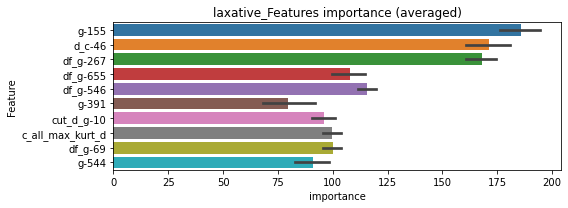

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 laxative=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000313724	valid_1's binary_logloss: 0.000475533
[2000]	training's binary_logloss: 0.000194493	valid_1's binary_logloss: 0.000337988
[3000]	training's binary_logloss: 0.000162428	valid_1's binary_logloss: 0.000302847
[4000]	training's binary_logloss: 0.000148388	valid_1's binary_logloss: 0.000288664
[5000]	training's binary_logloss: 0.000141071	valid_1's binary_logloss: 0.000280782
[6000]	training's binary_logloss: 0.000135977	valid_1's binary_logloss: 0.000274931
[7000]	training's binary_logloss: 0.000132105	valid_1's binary_logloss: 0.000270264
[8000]	training's binary_logloss: 0.000129196	valid_1's binary_logloss: 0.000266902
[9000]	training's binary_logloss: 0.000126959	valid_1's binary_logloss: 0.00026485
Early stopping, best iteration is:
[9290]	training's binary_logloss: 0.000126406	valid_1's binary_logloss: 0.00026436


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 laxative=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000321015	valid_1's binary_logloss: 0.00101916
Early stopping, best iteration is:
[1788]	training's binary_logloss: 0.000211899	valid_1's binary_logloss: 0.000865469


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 laxative=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000330635	valid_1's binary_logloss: 0.000431039
[2000]	training's binary_logloss: 0.000204789	valid_1's binary_logloss: 0.000292717
[3000]	training's binary_logloss: 0.000172736	valid_1's binary_logloss: 0.000258383
[4000]	training's binary_logloss: 0.000159389	valid_1's binary_logloss: 0.00024695
[5000]	training's binary_logloss: 0.000152074	valid_1's binary_logloss: 0.000239722
[6000]	training's binary_logloss: 0.000147041	valid_1's binary_logloss: 0.000234099
[7000]	training's binary_logloss: 0.000143333	valid_1's binary_logloss: 0.000227996
Early stopping, best iteration is:
[7906]	training's binary_logloss: 0.000140824	valid_1's binary_logloss: 0.000224165


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 laxative=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000333135	valid_1's binary_logloss: 0.000840886
Early stopping, best iteration is:
[1760]	training's binary_logloss: 0.00022192	valid_1's binary_logloss: 0.000700033


laxative logloss: 0.0005135117100316533


neg labels: 3289 → selected neg labels: 3289


leukotriene_inhibitor, len(trt): 6, len(othr): 3289
target_rate: 0.0002520 → Adj_target_rate: 0.0003851
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000412318	valid_1's binary_logloss: 0.000680255
Early stopping, best iteration is:
[515]	training's binary_logloss: 0.000197005	valid_1's binary_logloss: 0.000370756
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000407422	valid_1's binary_logloss: 0.00433575
Early stopping, best iteration is:
[487]	training's binary_logloss: 0.000197066	valid_1's binary_logloss: 0.0037621
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000415298	valid_1's binary_logloss: 0.000450029
Early stopping, best iteration is:
[486]	training's binary_logloss: 0.000199826	valid_1's binary_logloss: 0.00021963
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000404529	valid_1's binary_logloss: 0.000880922


1 / 3 AUC score:1.000
y_Threshold: 0.0005899, Threshold: 0.0017259, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00025
Num_p_label: 40.0, conf_0:0.00121, conf_1:0.00224
Num_p_label: 40.0, Expected: 1.0, Adj_threshold_1: 0.0017259
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_2: 0.0317259
threshold: 0.0317259, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[529]	training's binary_logloss: 0.000195621	valid_1's binary_logloss: 0.000546884


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000380954	valid_1's binary_logloss: 0.00051109
Early stopping, best iteration is:
[494]	training's binary_logloss: 0.000189387	valid_1's binary_logloss: 0.000273412
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000383445	valid_1's binary_logloss: 0.000628265
Early stopping, best iteration is:
[483]	training's binary_logloss: 0.00019035	valid_1's binary_logloss: 0.00036738
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000384586	valid_1's binary_logloss: 0.000465859
Early stopping, best iteration is:
[504]	training's binary_logloss: 0.000189189	valid_1's binary_logloss: 0.000233198
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000378792	valid_1's binary_logloss: 0.000416563


2 / 3 AUC score:1.000
y_Threshold: 0.1630823, Threshold: 0.0317259, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0025113 Vs.target_rate: 0.00025
Num_p_label: 10.0, conf_0:0.02538, conf_1:0.03807
Num_p_label: 10.0, Expected: 1.0, Adj_threshold_1: 0.0317259
Num_p_label: 6.0, Expected: 1.0, Adj_threshold_2: 0.0617259
Num_p_label: 6.0, Expected: 1.0, Adj_threshold_3: 0.0917259
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_4: 0.1217259
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_5: 0.1517259
threshold: 0.1517259, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[479]	training's binary_logloss: 0.000190925	valid_1's binary_logloss: 0.000213151


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000380954	valid_1's binary_logloss: 0.00051109
Early stopping, best iteration is:
[494]	training's binary_logloss: 0.000189387	valid_1's binary_logloss: 0.000273412
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000383445	valid_1's binary_logloss: 0.000628265
Early stopping, best iteration is:
[483]	training's binary_logloss: 0.00019035	valid_1's binary_logloss: 0.00036738
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000384586	valid_1's binary_logloss: 0.000465859
Early stopping, best iteration is:
[504]	training's binary_logloss: 0.000189189	valid_1's binary_logloss: 0.000233198
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000378792	valid_1's binary_logloss: 0.000416563


3 / 3 AUC score:1.000
y_Threshold: 0.1630823, Threshold: 0.1517259, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0005023 Vs.target_rate: 0.00025
Num_p_label: 2.0, conf_0:0.13655, conf_1:0.16690
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_1: 0.1517259
threshold: 0.1517259, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[479]	training's binary_logloss: 0.000190925	valid_1's binary_logloss: 0.000213151


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


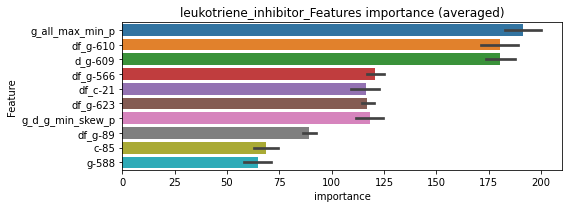

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 leukotriene_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000337378	valid_1's binary_logloss: 0.000722839
[2000]	training's binary_logloss: 0.000208173	valid_1's binary_logloss: 0.000564534
[3000]	training's binary_logloss: 0.000176882	valid_1's binary_logloss: 0.000530088
[4000]	training's binary_logloss: 0.000163118	valid_1's binary_logloss: 0.00051531
Early stopping, best iteration is:
[4512]	training's binary_logloss: 0.000159144	valid_1's binary_logloss: 0.000511221


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 leukotriene_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000331623	valid_1's binary_logloss: 0.00115339
[2000]	training's binary_logloss: 0.000205285	valid_1's binary_logloss: 0.000983759
Early stopping, best iteration is:
[2024]	training's binary_logloss: 0.000204245	valid_1's binary_logloss: 0.00098173


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 leukotriene_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000337411	valid_1's binary_logloss: 0.000612146
[2000]	training's binary_logloss: 0.00020807	valid_1's binary_logloss: 0.000437799
[3000]	training's binary_logloss: 0.000176408	valid_1's binary_logloss: 0.00039824
Early stopping, best iteration is:
[3589]	training's binary_logloss: 0.000167358	valid_1's binary_logloss: 0.000387096


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 leukotriene_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000327492	valid_1's binary_logloss: 0.000301303
[2000]	training's binary_logloss: 0.000203724	valid_1's binary_logloss: 0.000182003
[3000]	training's binary_logloss: 0.000173177	valid_1's binary_logloss: 0.000150737
[4000]	training's binary_logloss: 0.000158353	valid_1's binary_logloss: 0.000134804
[5000]	training's binary_logloss: 0.00014979	valid_1's binary_logloss: 0.000125543
[6000]	training's binary_logloss: 0.000143762	valid_1's binary_logloss: 0.000119024
[7000]	training's binary_logloss: 0.000139401	valid_1's binary_logloss: 0.00011431
[8000]	training's binary_logloss: 0.000136287	valid_1's binary_logloss: 0.00011094
[9000]	training's binary_logloss: 0.000133865	valid_1's binary_logloss: 0.00010832
Early stopping, best iteration is:
[8986]	training's binary_logloss: 0.000133865	valid_1's binary_logloss: 0.00010832


leukotriene_inhibitor logloss: 0.0004973319314599842


neg labels: 3289 → selected neg labels: 3282


leukotriene_receptor_antagonist, len(trt): 62, len(othr): 3282
target_rate: 0.0026035 → Adj_target_rate: 0.0028037
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00462431	valid_1's binary_logloss: 0.0398424
[600]	training's binary_logloss: 0.000893637	valid_1's binary_logloss: 0.0298032
Early stopping, best iteration is:
[690]	training's binary_logloss: 0.000735213	valid_1's binary_logloss: 0.0292892
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00441843	valid_1's binary_logloss: 0.04393
[600]	training's binary_logloss: 0.000877085	valid_1's binary_logloss: 0.0374787
Early stopping, best iteration is:
[602]	training's binary_logloss: 0.000873106	valid_1's binary_logloss: 0.0373934
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00523788	valid_1's binary_logloss: 0.0119067
[600]	training's binary_logloss: 0.000959271	valid_1's binary_logloss: 0.00436815
Early stopping, best iteration is:
[751]	training's binary_logloss: 0.000710975	valid_1's binary_loglos

1 / 3 AUC score:1.000
y_Threshold: 0.0049626, Threshold: 0.0116125, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 655/3804
p_label_rate: 0.0100452 Vs.target_rate: 0.00260
Num_p_label: 40.0, conf_0:0.00813, conf_1:0.01510
Num_p_label: 40.0, Expected: 10.4, Adj_threshold_1: 0.0116125
Num_p_label: 5.0, Expected: 10.4, Adj_threshold_2: 0.0416125
threshold: 0.0416125, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 655.0/3804, y_label_rate: 0.1721872
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00426651	valid_1's binary_logloss: 0.0336124
[600]	training's binary_logloss: 0.000847333	valid_1's binary_logloss: 0.0274706
Early stopping, best iteration is:
[630]	training's binary_logloss: 0.000787454	valid_1's binary_logloss: 0.0272997
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0042923	valid_1's binary_logloss: 0.0283643
[600]	training's binary_logloss: 0.000876516	valid_1's binary_logloss: 0.0194585
Early stopping, best iteration is:
[687]	training's binary_logloss: 0.000722803	valid_1's binary_logloss: 0.0188384
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00436427	valid_1's binary_logloss: 0.0245957
[600]	training's binary_logloss: 0.000861795	valid_1's binary_logloss: 0.017799
Early stopping, best iteration is:
[637]	training's binary_logloss: 0.000787798	valid_1's binary_logloss

2 / 3 AUC score:1.000
y_Threshold: 0.0232043, Threshold: 0.0416125, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 653.0/3800
p_label_rate: 0.0035158 Vs.target_rate: 0.00260
Num_p_label: 14.0, conf_0:0.03329, conf_1:0.04993
threshold: 0.0416125, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 653.0/3800, y_label_rate: 0.1718421
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00429781	valid_1's binary_logloss: 0.0281904
Early stopping, best iteration is:
[416]	training's binary_logloss: 0.0017876	valid_1's binary_logloss: 0.0251496
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00409727	valid_1's binary_logloss: 0.0321924
[600]	training's binary_logloss: 0.000843765	valid_1's binary_logloss: 0.0245908
Early stopping, best iteration is:
[681]	training's binary_logloss: 0.000705677	valid_1's binary_logloss: 0.0243663
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00435811	valid_1's binary_logloss: 0.0256415
[600]	training's binary_logloss: 0.000854785	valid_1's binary_logloss: 0.0190612
Early stopping, best iteration is:
[750]	training's binary_logloss: 0.000652575	valid_1's binary_logloss: 0.0185178
Training until validation scores don't improve for 30 rounds
[300]	tr

3 / 3 AUC score:0.999
y_Threshold: 0.0309747, Threshold: 0.0416125, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[508]	training's binary_logloss: 0.00114772	valid_1's binary_logloss: 0.0299382


Remove_noisy_data: 6 → Positive_corect_labels: 650.0/3794
p_label_rate: 0.0042692 Vs.target_rate: 0.00260
Num_p_label: 17.0, conf_0:0.03745, conf_1:0.04577
Num_p_label: 17.0, Expected: 10.4, Adj_threshold_1: 0.0416125
Num_p_label: 9.0, Expected: 10.4, Adj_threshold_2: 0.0716125
threshold: 0.0716125, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 650.0/3794, y_label_rate: 0.1713231


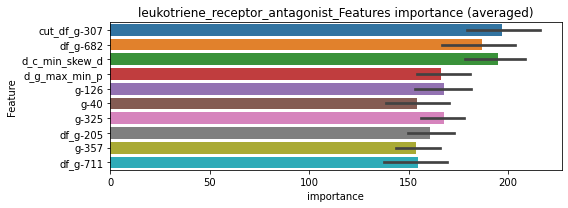

len(train_index) : 2845
len(valid_index) : 949
================================= fold 1/4 leukotriene_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000548057	valid_1's binary_logloss: 0.000657348
[2000]	training's binary_logloss: 0.000319475	valid_1's binary_logloss: 0.000372968
[3000]	training's binary_logloss: 0.000252702	valid_1's binary_logloss: 0.00028306
[4000]	training's binary_logloss: 0.000221644	valid_1's binary_logloss: 0.000238187
[5000]	training's binary_logloss: 0.000205428	valid_1's binary_logloss: 0.000214931
[6000]	training's binary_logloss: 0.000194979	valid_1's binary_logloss: 0.000200274
[7000]	training's binary_logloss: 0.000187089	valid_1's binary_logloss: 0.000189471
[8000]	training's binary_logloss: 0.000181087	valid_1's binary_logloss: 0.000181346
Early stopping, best iteration is:
[8505]	training's binary_logloss: 0.000178736	valid_1's binary_logloss: 0.000178076


len(train_index) : 2845
len(valid_index) : 949
================================= fold 2/4 leukotriene_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000530338	valid_1's binary_logloss: 0.00137904
[2000]	training's binary_logloss: 0.000306356	valid_1's binary_logloss: 0.00104548
[3000]	training's binary_logloss: 0.000241669	valid_1's binary_logloss: 0.000938176
Early stopping, best iteration is:
[3203]	training's binary_logloss: 0.000232774	valid_1's binary_logloss: 0.000924555


len(train_index) : 2846
len(valid_index) : 948
================================= fold 3/4 leukotriene_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2846
len(valid_index) : 948
================================= fold 4/4 leukotriene_receptor_antagonist=================================


Early stopping, best iteration is:
[668]	training's binary_logloss: 0.000651752	valid_1's binary_logloss: 0.00413276
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000544982	valid_1's binary_logloss: 0.00564836
[2000]	training's binary_logloss: 0.000312417	valid_1's binary_logloss: 0.00536775
Early stopping, best iteration is:
[2287]	training's binary_logloss: 0.000286955	valid_1's binary_logloss: 0.00534376


leukotriene_receptor_antagonist logloss: 0.0026441527239895683


neg labels: 3289 → selected neg labels: 3288


lipase_inhibitor, len(trt): 12, len(othr): 3288
target_rate: 0.0005039 → Adj_target_rate: 0.0006942
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000671534	valid_1's binary_logloss: 0.00755948
Early stopping, best iteration is:
[518]	training's binary_logloss: 0.000268538	valid_1's binary_logloss: 0.00688587
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000696108	valid_1's binary_logloss: 0.00227405
Early stopping, best iteration is:
[565]	training's binary_logloss: 0.000263891	valid_1's binary_logloss: 0.00120011
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000726234	valid_1's binary_logloss: 0.000975394
Early stopping, best iteration is:
[510]	training's binary_logloss: 0.000284476	valid_1's binary_logloss: 0.000415693
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000710909	valid_1's binary_logloss: 0.00278404


1 / 3 AUC score:1.000
y_Threshold: 0.0009906, Threshold: 0.0030799, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00050
Num_p_label: 40.0, conf_0:0.00216, conf_1:0.00400
Num_p_label: 40.0, Expected: 2.0, Adj_threshold_1: 0.0030799
Num_p_label: 0.0, Expected: 2.0, Adj_threshold_2: 0.0330799
threshold: 0.0330799, positive_p_label: 0.0/3982, p_label_rate: 0.0000000


Early stopping, best iteration is:
[513]	training's binary_logloss: 0.000271237	valid_1's binary_logloss: 0.00175147


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000628157	valid_1's binary_logloss: 0.00801524
Early stopping, best iteration is:
[313]	training's binary_logloss: 0.00055969	valid_1's binary_logloss: 0.00788403
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000655197	valid_1's binary_logloss: 0.00146824
Early stopping, best iteration is:
[566]	training's binary_logloss: 0.000251002	valid_1's binary_logloss: 0.00072758
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000683611	valid_1's binary_logloss: 0.000803862
Early stopping, best iteration is:
[543]	training's binary_logloss: 0.000255605	valid_1's binary_logloss: 0.000305528
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000652478	valid_1's binary_logloss: 0.0031209


2 / 3 AUC score:1.000
y_Threshold: 0.0118141, Threshold: 0.0330799, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0020090 Vs.target_rate: 0.00050
Num_p_label: 8.0, conf_0:0.02646, conf_1:0.03970
Num_p_label: 8.0, Expected: 2.0, Adj_threshold_1: 0.0330799
Num_p_label: 5.0, Expected: 2.0, Adj_threshold_2: 0.0630799
threshold: 0.0630799, positive_p_label: 5.0/3982, p_label_rate: 0.0012557


Early stopping, best iteration is:
[512]	training's binary_logloss: 0.000256794	valid_1's binary_logloss: 0.00227442


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000628157	valid_1's binary_logloss: 0.00801524
Early stopping, best iteration is:
[313]	training's binary_logloss: 0.00055969	valid_1's binary_logloss: 0.00788403
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000655197	valid_1's binary_logloss: 0.00146824
Early stopping, best iteration is:
[567]	training's binary_logloss: 0.000251002	valid_1's binary_logloss: 0.00072758
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000683611	valid_1's binary_logloss: 0.000803862
Early stopping, best iteration is:
[543]	training's binary_logloss: 0.000255605	valid_1's binary_logloss: 0.000305528
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000652478	valid_1's binary_logloss: 0.0031209


3 / 3 AUC score:1.000
y_Threshold: 0.0118141, Threshold: 0.0630799, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0012557 Vs.target_rate: 0.00050
Num_p_label: 5.0, conf_0:0.05677, conf_1:0.06939
Num_p_label: 5.0, Expected: 2.0, Adj_threshold_1: 0.0630799


Early stopping, best iteration is:
[512]	training's binary_logloss: 0.000256794	valid_1's binary_logloss: 0.00227442


threshold: 0.0630799, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


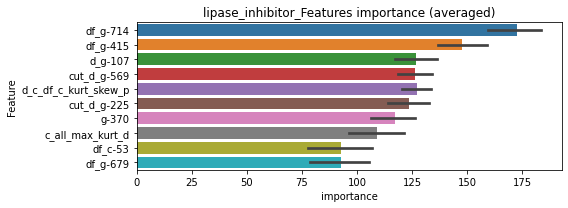

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 lipase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000388141	valid_1's binary_logloss: 0.00490688
Early stopping, best iteration is:
[1814]	training's binary_logloss: 0.000254129	valid_1's binary_logloss: 0.00449077


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 lipase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000399306	valid_1's binary_logloss: 0.000356974
[2000]	training's binary_logloss: 0.000241704	valid_1's binary_logloss: 0.000209688
[3000]	training's binary_logloss: 0.000197801	valid_1's binary_logloss: 0.000167488
[4000]	training's binary_logloss: 0.00017849	valid_1's binary_logloss: 0.000147853
[5000]	training's binary_logloss: 0.000168044	valid_1's binary_logloss: 0.000137036
[6000]	training's binary_logloss: 0.000161756	valid_1's binary_logloss: 0.000130383
Early stopping, best iteration is:
[6859]	training's binary_logloss: 0.000157786	valid_1's binary_logloss: 0.000126107


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 lipase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000336248	valid_1's binary_logloss: 0.000350667
[2000]	training's binary_logloss: 0.000209364	valid_1's binary_logloss: 0.000217972
[3000]	training's binary_logloss: 0.000166075	valid_1's binary_logloss: 0.000172538
[4000]	training's binary_logloss: 0.000142957	valid_1's binary_logloss: 0.00014836
[5000]	training's binary_logloss: 0.000130093	valid_1's binary_logloss: 0.000134965
[6000]	training's binary_logloss: 0.000121606	valid_1's binary_logloss: 0.000126134
[7000]	training's binary_logloss: 0.000115592	valid_1's binary_logloss: 0.000119879
[8000]	training's binary_logloss: 0.000111396	valid_1's binary_logloss: 0.000115517
[9000]	training's binary_logloss: 0.000108721	valid_1's binary_logloss: 0.000112709
[10000]	training's binary_logloss: 0.000106779	valid_1's binary_logloss: 0.000110669
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.000106779	vali

len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 lipase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00039733	valid_1's binary_logloss: 0.00119301
[2000]	training's binary_logloss: 0.000241298	valid_1's binary_logloss: 0.00101181
Early stopping, best iteration is:
[2728]	training's binary_logloss: 0.000205276	valid_1's binary_logloss: 0.000966967


lipase_inhibitor logloss: 0.0014247191062622486


neg labels: 3289 → selected neg labels: 3284


lipoxygenase_inhibitor, len(trt): 61, len(othr): 3284
target_rate: 0.0025615 → Adj_target_rate: 0.0027652
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0052159	valid_1's binary_logloss: 0.0336659
[600]	training's binary_logloss: 0.000947571	valid_1's binary_logloss: 0.0248884
Early stopping, best iteration is:
[742]	training's binary_logloss: 0.000703265	valid_1's binary_logloss: 0.0243707
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00516584	valid_1's binary_logloss: 0.0273751
[600]	training's binary_logloss: 0.000950652	valid_1's binary_logloss: 0.0172209
Early stopping, best iteration is:
[717]	training's binary_logloss: 0.000737182	valid_1's binary_logloss: 0.0164046
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00545592	valid_1's binary_logloss: 0.0175534
[600]	training's binary_logloss: 0.000990232	valid_1's binary_logloss: 0.00942589
Early stopping, best iteration is:
[747]	training's binary_logloss: 0.000730384	valid_1's binary_loglo

1 / 3 AUC score:1.000
y_Threshold: 0.0069260, Threshold: 0.0340531, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 655/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00256
Num_p_label: 40.0, conf_0:0.02384, conf_1:0.04427
Num_p_label: 40.0, Expected: 10.2, Adj_threshold_1: 0.0340531
Num_p_label: 29.0, Expected: 10.2, Adj_threshold_2: 0.0640531
Num_p_label: 23.0, Expected: 10.2, Adj_threshold_3: 0.0940531
Num_p_label: 20.0, Expected: 10.2, Adj_threshold_4: 0.1240531
Num_p_label: 19.0, Expected: 10.2, Adj_threshold_5: 0.1540531
Num_p_label: 17.0, Expected: 10.2, Adj_threshold_6: 0.1840531
Num_p_label: 15.0, Expected: 10.2, Adj_threshold_7: 0.2140531
threshold: 0.2140531, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 655.0/3806, y_label_rate: 0.1720967
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00495592	valid_1's binary_logloss: 0.0286621
[600]	training's binary_logloss: 0.000920764	valid_1's binary_logloss: 0.0186137
Early stopping, best iteration is:
[834]	training's binary_logloss: 0.000630321	valid_1's binary_logloss: 0.017702
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00480965	valid_1's binary_logloss: 0.022836
[600]	training's binary_logloss: 0.000916395	valid_1's binary_logloss: 0.0151879
Early stopping, best iteration is:
[725]	training's binary_logloss: 0.000702212	valid_1's binary_logloss: 0.0144005
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0048634	valid_1's binary_logloss: 0.0213647
[600]	training's binary_logloss: 0.000916386	valid_1's binary_logloss: 0.0135882
Early stopping, best iteration is:
[576]	training's binary_logloss: 0.000982206	valid_1's binary_logloss:

2 / 3 AUC score:1.000
y_Threshold: 0.0361269, Threshold: 0.2140531, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 653.0/3802
p_label_rate: 0.0065294 Vs.target_rate: 0.00256
Num_p_label: 26.0, conf_0:0.17124, conf_1:0.25686
Num_p_label: 26.0, Expected: 10.2, Adj_threshold_1: 0.2140531
Num_p_label: 23.0, Expected: 10.2, Adj_threshold_2: 0.2440531
Num_p_label: 23.0, Expected: 10.2, Adj_threshold_3: 0.2740531
Num_p_label: 21.0, Expected: 10.2, Adj_threshold_4: 0.3040531
Num_p_label: 19.0, Expected: 10.2, Adj_threshold_5: 0.3340531
Num_p_label: 16.0, Expected: 10.2, Adj_threshold_6: 0.3640531
Num_p_label: 15.0, Expected: 10.2, Adj_threshold_7: 0.3940531
threshold: 0.3940531, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 653.0/3802, y_label_rate: 0.1717517
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00473319	valid_1's binary_logloss: 0.0302161
[600]	training's binary_logloss: 0.000892134	valid_1's binary_logloss: 0.0221042
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.000868936	valid_1's binary_logloss: 0.0220571
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00485657	valid_1's binary_logloss: 0.0227276
[600]	training's binary_logloss: 0.000920439	valid_1's binary_logloss: 0.0141972
Early stopping, best iteration is:
[717]	training's binary_logloss: 0.000710361	valid_1's binary_logloss: 0.0137746
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00488638	valid_1's binary_logloss: 0.0207391
[600]	training's binary_logloss: 0.000923114	valid_1's binary_logloss: 0.0112844
Early stopping, best iteration is:
[802]	training's binary_logloss: 0.000645142	valid_1's binary_loglo

3 / 3 AUC score:1.000
y_Threshold: 0.0394255, Threshold: 0.3940531, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 651.0/3798
p_label_rate: 0.0050226 Vs.target_rate: 0.00256
Num_p_label: 20.0, conf_0:0.35465, conf_1:0.43346
Num_p_label: 20.0, Expected: 10.2, Adj_threshold_1: 0.3940531
Num_p_label: 17.0, Expected: 10.2, Adj_threshold_2: 0.4240531
Num_p_label: 16.0, Expected: 10.2, Adj_threshold_3: 0.4540531
Num_p_label: 15.0, Expected: 10.2, Adj_threshold_4: 0.4840531
threshold: 0.4840531, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 651.0/3798, y_label_rate: 0.1714060


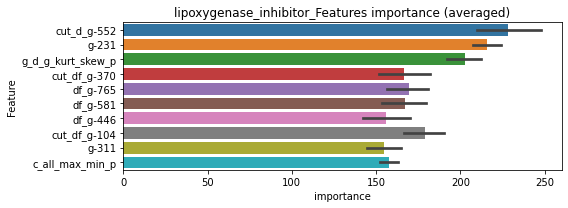

len(train_index) : 2848
len(valid_index) : 950
================================= fold 1/4 lipoxygenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000546108	valid_1's binary_logloss: 0.00329481
[2000]	training's binary_logloss: 0.000312298	valid_1's binary_logloss: 0.00299409
[3000]	training's binary_logloss: 0.00024412	valid_1's binary_logloss: 0.00291054
Early stopping, best iteration is:
[3946]	training's binary_logloss: 0.000213547	valid_1's binary_logloss: 0.00286202


len(train_index) : 2848
len(valid_index) : 950
================================= fold 2/4 lipoxygenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000555535	valid_1's binary_logloss: 0.001258
[2000]	training's binary_logloss: 0.000320144	valid_1's binary_logloss: 0.000920983
Early stopping, best iteration is:
[2782]	training's binary_logloss: 0.000261334	valid_1's binary_logloss: 0.000825005


len(train_index) : 2849
len(valid_index) : 949
================================= fold 3/4 lipoxygenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000481609	valid_1's binary_logloss: 0.000674028
[2000]	training's binary_logloss: 0.000293881	valid_1's binary_logloss: 0.00039928
[3000]	training's binary_logloss: 0.000225558	valid_1's binary_logloss: 0.000291536
[4000]	training's binary_logloss: 0.000195088	valid_1's binary_logloss: 0.000236571
[5000]	training's binary_logloss: 0.000171684	valid_1's binary_logloss: 0.00020975
[6000]	training's binary_logloss: 0.000162018	valid_1's binary_logloss: 0.000198439
[7000]	training's binary_logloss: 0.000156524	valid_1's binary_logloss: 0.000192002
[8000]	training's binary_logloss: 0.000153247	valid_1's binary_logloss: 0.000188122
[9000]	training's binary_logloss: 0.000146596	valid_1's binary_logloss: 0.000175591
[10000]	training's binary_logloss: 0.00014279	valid_1's binary_logloss: 0.00016799
Did not meet early stopping. Best iteration is:
[9999]	training's binary_logloss: 0.00014279	valid_1's

len(train_index) : 2849
len(valid_index) : 949
================================= fold 4/4 lipoxygenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000533798	valid_1's binary_logloss: 0.00472398
[2000]	training's binary_logloss: 0.000307509	valid_1's binary_logloss: 0.00440975
Early stopping, best iteration is:
[2462]	training's binary_logloss: 0.00026636	valid_1's binary_logloss: 0.0043538


lipoxygenase_inhibitor logloss: 0.002052950079508319


neg labels: 3289 → selected neg labels: 3287


lxr_agonist, len(trt): 6, len(othr): 3287
target_rate: 0.0002520 → Adj_target_rate: 0.0003851
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000438025	valid_1's binary_logloss: 0.000586001
Early stopping, best iteration is:
[489]	training's binary_logloss: 0.000217254	valid_1's binary_logloss: 0.000309694
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000423633	valid_1's binary_logloss: 0.00208185
Early stopping, best iteration is:
[468]	training's binary_logloss: 0.000216255	valid_1's binary_logloss: 0.00153216
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000433301	valid_1's binary_logloss: 0.000700149
Early stopping, best iteration is:
[464]	training's binary_logloss: 0.000220665	valid_1's binary_logloss: 0.000369512
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00043096	valid_1's binary_logloss: 0.0024915


1 / 3 AUC score:1.000
y_Threshold: 0.0006848, Threshold: 0.0030299, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00025
Num_p_label: 40.0, conf_0:0.00212, conf_1:0.00394
Num_p_label: 40.0, Expected: 1.0, Adj_threshold_1: 0.0030299
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_2: 0.0330299
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_3: 0.0630299
Num_p_label: 1.0, Expected: 1.0, Adj_threshold_4: 0.0930299
threshold: 0.0930299, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[486]	training's binary_logloss: 0.000217524	valid_1's binary_logloss: 0.00187279


positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000392093	valid_1's binary_logloss: 0.000534389
Early stopping, best iteration is:
[470]	training's binary_logloss: 0.000197346	valid_1's binary_logloss: 0.000282814
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000396873	valid_1's binary_logloss: 0.00328715
Early stopping, best iteration is:
[456]	training's binary_logloss: 0.00020061	valid_1's binary_logloss: 0.0027952
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000397459	valid_1's binary_logloss: 0.000467624
Early stopping, best iteration is:
[480]	training's binary_logloss: 0.000201869	valid_1's binary_logloss: 0.000243899
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00038884	valid_1's binary_logloss: 0.00143327


2 / 3 AUC score:1.000
y_Threshold: 0.0214425, Threshold: 0.0930299, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0027624 Vs.target_rate: 0.00025
Num_p_label: 11.0, conf_0:0.07442, conf_1:0.11164
Num_p_label: 11.0, Expected: 1.0, Adj_threshold_1: 0.0930299
Num_p_label: 8.0, Expected: 1.0, Adj_threshold_2: 0.1230299
Num_p_label: 6.0, Expected: 1.0, Adj_threshold_3: 0.1530299
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_4: 0.1830299
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_5: 0.2130299
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_6: 0.2430299
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_7: 0.2730299
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_8: 0.3030299
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_9: 0.3330299
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_10: 0.3630299
threshold: 0.3930299, positive_p_label: 4.0/3982, p_label_rate: 0.0010045


Early stopping, best iteration is:
[471]	training's binary_logloss: 0.000198074	valid_1's binary_logloss: 0.000945102


positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000392093	valid_1's binary_logloss: 0.000534389
Early stopping, best iteration is:
[470]	training's binary_logloss: 0.000197346	valid_1's binary_logloss: 0.000282814
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000396873	valid_1's binary_logloss: 0.00328715
Early stopping, best iteration is:
[456]	training's binary_logloss: 0.00020061	valid_1's binary_logloss: 0.0027952
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000397459	valid_1's binary_logloss: 0.000467624
Early stopping, best iteration is:
[452]	training's binary_logloss: 0.000201869	valid_1's binary_logloss: 0.000243899
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00038884	valid_1's binary_logloss: 0.00143327


3 / 3 AUC score:1.000
y_Threshold: 0.0214425, Threshold: 0.3930299, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0010045 Vs.target_rate: 0.00025
Num_p_label: 4.0, conf_0:0.35373, conf_1:0.43233
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_1: 0.3930299
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_2: 0.4230299
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_3: 0.4530299


Early stopping, best iteration is:
[471]	training's binary_logloss: 0.000198074	valid_1's binary_logloss: 0.000945102


threshold: 0.4530299, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


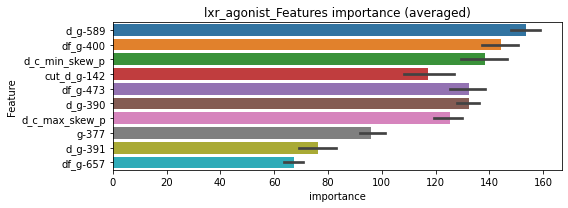

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 lxr_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000344165	valid_1's binary_logloss: 0.000728576
[2000]	training's binary_logloss: 0.000213501	valid_1's binary_logloss: 0.00054908
[3000]	training's binary_logloss: 0.000181507	valid_1's binary_logloss: 0.000509491
[4000]	training's binary_logloss: 0.000167504	valid_1's binary_logloss: 0.000494005
[5000]	training's binary_logloss: 0.000159778	valid_1's binary_logloss: 0.000485683
[6000]	training's binary_logloss: 0.000154642	valid_1's binary_logloss: 0.00048023
[7000]	training's binary_logloss: 0.000150641	valid_1's binary_logloss: 0.000475312
[8000]	training's binary_logloss: 0.000147691	valid_1's binary_logloss: 0.000471762
Early stopping, best iteration is:
[8560]	training's binary_logloss: 0.000146299	valid_1's binary_logloss: 0.000470015


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 lxr_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000326404	valid_1's binary_logloss: 0.00289751


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 lxr_agonist=================================


Early stopping, best iteration is:
[1246]	training's binary_logloss: 0.000276632	valid_1's binary_logloss: 0.00283851
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000335751	valid_1's binary_logloss: 0.000431967
[2000]	training's binary_logloss: 0.00021019	valid_1's binary_logloss: 0.000289939
[3000]	training's binary_logloss: 0.000180054	valid_1's binary_logloss: 0.000251542
[4000]	training's binary_logloss: 0.000165393	valid_1's binary_logloss: 0.000235978
[5000]	training's binary_logloss: 0.000157272	valid_1's binary_logloss: 0.000227223
[6000]	training's binary_logloss: 0.000151628	valid_1's binary_logloss: 0.000221069
[7000]	training's binary_logloss: 0.000147242	valid_1's binary_logloss: 0.000214533
[8000]	training's binary_logloss: 0.000144123	valid_1's binary_logloss: 0.000208383
Early stopping, best iteration is:
[8376]	training's binary_logloss: 0.000143138	valid_1's binary_logloss: 0.000206546


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 lxr_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000330028	valid_1's binary_logloss: 0.00133682


lxr_agonist logloss: 0.0011953733480119632


Early stopping, best iteration is:
[1283]	training's binary_logloss: 0.000272414	valid_1's binary_logloss: 0.00126642
neg labels: 3289 → selected neg labels: 3284


mdm_inhibitor, len(trt): 31, len(othr): 3284
target_rate: 0.0013018 → Adj_target_rate: 0.0015554
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00248899	valid_1's binary_logloss: 0.0117188
[600]	training's binary_logloss: 0.000544189	valid_1's binary_logloss: 0.00687204
Early stopping, best iteration is:
[669]	training's binary_logloss: 0.000496171	valid_1's binary_logloss: 0.00676684
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00263438	valid_1's binary_logloss: 0.00728384
[600]	training's binary_logloss: 0.000553994	valid_1's binary_logloss: 0.0030873
Early stopping, best iteration is:
[683]	training's binary_logloss: 0.000499152	valid_1's binary_logloss: 0.00296623
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0027526	valid_1's binary_logloss: 0.00718725
[600]	training's binary_logloss: 0.00056787	valid_1's binary_logloss: 0.00287307
Early stopping, best iteration is:
[720]	training's binary_logloss: 0.000498809	valid_1's binary_l

1 / 3 AUC score:1.000
y_Threshold: 0.0044343, Threshold: 0.0613865, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00130
Num_p_label: 40.0, conf_0:0.04297, conf_1:0.07980
Num_p_label: 40.0, Expected: 5.2, Adj_threshold_1: 0.0613865
Num_p_label: 37.0, Expected: 5.2, Adj_threshold_2: 0.0913865
Num_p_label: 33.0, Expected: 5.2, Adj_threshold_3: 0.1213865
Num_p_label: 30.0, Expected: 5.2, Adj_threshold_4: 0.1513865
Num_p_label: 25.0, Expected: 5.2, Adj_threshold_5: 0.1813865
Num_p_label: 25.0, Expected: 5.2, Adj_threshold_6: 0.2113865
Num_p_label: 23.0, Expected: 5.2, Adj_threshold_7: 0.2413865
Num_p_label: 23.0, Expected: 5.2, Adj_threshold_8: 0.2713865
Num_p_label: 22.0, Expected: 5.2, Adj_threshold_9: 0.3013865
Num_p_label: 20.0, Expected: 5.2, Adj_threshold_10: 0.3313865
threshold: 0.3613865, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
===========

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00223488	valid_1's binary_logloss: 0.012225
[600]	training's binary_logloss: 0.000509463	valid_1's binary_logloss: 0.00810821
Early stopping, best iteration is:
[632]	training's binary_logloss: 0.000485923	valid_1's binary_logloss: 0.00806883
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00237728	valid_1's binary_logloss: 0.00621008
[600]	training's binary_logloss: 0.000521404	valid_1's binary_logloss: 0.00256438
Early stopping, best iteration is:
[648]	training's binary_logloss: 0.000490071	valid_1's binary_logloss: 0.00251426
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00241507	valid_1's binary_logloss: 0.00480895
[600]	training's binary_logloss: 0.000525055	valid_1's binary_logloss: 0.00169146
Early stopping, best iteration is:
[653]	training's binary_logloss: 0.000489834	valid_1's binary

2 / 3 AUC score:1.000
y_Threshold: 0.0310012, Threshold: 0.3613865, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0070316 Vs.target_rate: 0.00130
Num_p_label: 28.0, conf_0:0.28911, conf_1:0.43366
Num_p_label: 28.0, Expected: 5.2, Adj_threshold_1: 0.3613865
Num_p_label: 26.0, Expected: 5.2, Adj_threshold_2: 0.3913865
Num_p_label: 26.0, Expected: 5.2, Adj_threshold_3: 0.4213865
Num_p_label: 26.0, Expected: 5.2, Adj_threshold_4: 0.4513865
Num_p_label: 25.0, Expected: 5.2, Adj_threshold_5: 0.4813865
Num_p_label: 25.0, Expected: 5.2, Adj_threshold_6: 0.5113865
Num_p_label: 23.0, Expected: 5.2, Adj_threshold_7: 0.5413865
Num_p_label: 22.0, Expected: 5.2, Adj_threshold_8: 0.5713865
Num_p_label: 22.0, Expected: 5.2, Adj_threshold_9: 0.6013865
Num_p_label: 22.0, Expected: 5.2, Adj_threshold_10: 0.6313865
threshold: 0.6613865, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 655.0/3806, y_label_rate: 0.1720967
===========

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00221672	valid_1's binary_logloss: 0.00898741
[600]	training's binary_logloss: 0.000506538	valid_1's binary_logloss: 0.00589501
Early stopping, best iteration is:
[607]	training's binary_logloss: 0.000501253	valid_1's binary_logloss: 0.00588038
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00236303	valid_1's binary_logloss: 0.00567156
[600]	training's binary_logloss: 0.000526818	valid_1's binary_logloss: 0.00192285
Early stopping, best iteration is:
[683]	training's binary_logloss: 0.00048118	valid_1's binary_logloss: 0.00183347
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00237663	valid_1's binary_logloss: 0.00501686
[600]	training's binary_logloss: 0.000525972	valid_1's binary_logloss: 0.00142822
Early stopping, best iteration is:
[656]	training's binary_logloss: 0.000490854	valid_1's binar

3 / 3 AUC score:1.000
y_Threshold: 0.0547458, Threshold: 0.6613865, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0050226 Vs.target_rate: 0.00130
Num_p_label: 20.0, conf_0:0.50000, conf_1:0.72753
Num_p_label: 20.0, Expected: 5.2, Adj_threshold_1: 0.6613865
Num_p_label: 17.0, Expected: 5.2, Adj_threshold_2: 0.6913865
Num_p_label: 17.0, Expected: 5.2, Adj_threshold_3: 0.7213865
Num_p_label: 16.0, Expected: 5.2, Adj_threshold_4: 0.7513865
Num_p_label: 15.0, Expected: 5.2, Adj_threshold_5: 0.7813865
threshold: 0.7813865, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 655.0/3806, y_label_rate: 0.1720967


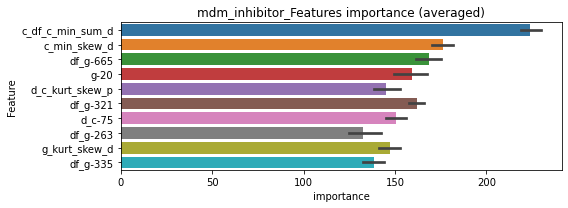

len(train_index) : 2854
len(valid_index) : 952
================================= fold 1/4 mdm_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2854
len(valid_index) : 952
================================= fold 2/4 mdm_inhibitor=================================


Early stopping, best iteration is:
[539]	training's binary_logloss: 0.000750161	valid_1's binary_logloss: 0.00744974
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000416594	valid_1's binary_logloss: 0.000567501
[2000]	training's binary_logloss: 0.00024124	valid_1's binary_logloss: 0.000329831
[3000]	training's binary_logloss: 0.000180187	valid_1's binary_logloss: 0.000246698
[4000]	training's binary_logloss: 0.000150454	valid_1's binary_logloss: 0.000206139
[5000]	training's binary_logloss: 0.000135103	valid_1's binary_logloss: 0.000185157
[6000]	training's binary_logloss: 0.000125239	valid_1's binary_logloss: 0.000171671
[7000]	training's binary_logloss: 0.000118322	valid_1's binary_logloss: 0.000162208
[8000]	training's binary_logloss: 0.000113556	valid_1's binary_logloss: 0.00015569
[9000]	training's binary_logloss: 0.00011014	valid_1's binary_logloss: 0.000151016
[10000]	training's binary_logloss: 0.000107692	valid_1's binary_loglo

len(train_index) : 2855
len(valid_index) : 951
================================= fold 3/4 mdm_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000501096	valid_1's binary_logloss: 0.000868239
[2000]	training's binary_logloss: 0.00029198	valid_1's binary_logloss: 0.000610674
[3000]	training's binary_logloss: 0.000229426	valid_1's binary_logloss: 0.000532032
[4000]	training's binary_logloss: 0.000201589	valid_1's binary_logloss: 0.000494224
Early stopping, best iteration is:
[4274]	training's binary_logloss: 0.000197049	valid_1's binary_logloss: 0.000486253


len(train_index) : 2855
len(valid_index) : 951
================================= fold 4/4 mdm_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000489075	valid_1's binary_logloss: 0.00162288
Early stopping, best iteration is:
[975]	training's binary_logloss: 0.000500807	valid_1's binary_logloss: 0.0016197


mdm_inhibitor logloss: 0.0024265817488096186


neg labels: 3289 → selected neg labels: 3273


mek_inhibitor, len(trt): 72, len(othr): 3273
target_rate: 0.0030234 → Adj_target_rate: 0.0031837
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00839958	valid_1's binary_logloss: 0.0459388
[600]	training's binary_logloss: 0.00125135	valid_1's binary_logloss: 0.0294939
Early stopping, best iteration is:
[814]	training's binary_logloss: 0.00077562	valid_1's binary_logloss: 0.0280115
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0086725	valid_1's binary_logloss: 0.0366229
[600]	training's binary_logloss: 0.00128106	valid_1's binary_logloss: 0.0203441
[900]	training's binary_logloss: 0.000731116	valid_1's binary_logloss: 0.0186559
Early stopping, best iteration is:
[877]	training's binary_logloss: 0.000732654	valid_1's binary_logloss: 0.0186361
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00898462	valid_1's binary_logloss: 0.0271163
[600]	training's binary_logloss: 0.00132991	valid_1's binary_logloss: 0.00938219
[900]	training's binary_l

1 / 3 AUC score:1.000
y_Threshold: 0.0082971, Threshold: 0.0252132, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 653/3793
p_label_rate: 0.0100452 Vs.target_rate: 0.00302
Num_p_label: 40.0, conf_0:0.01765, conf_1:0.03278
Num_p_label: 40.0, Expected: 12.0, Adj_threshold_1: 0.0252132
Num_p_label: 15.0, Expected: 12.0, Adj_threshold_2: 0.0552132
threshold: 0.0552132, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 653.0/3793, y_label_rate: 0.1721592
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00750101	valid_1's binary_logloss: 0.0356816
[600]	training's binary_logloss: 0.00121482	valid_1's binary_logloss: 0.0197028
Early stopping, best iteration is:
[841]	training's binary_logloss: 0.000733714	valid_1's binary_logloss: 0.0178793
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00762049	valid_1's binary_logloss: 0.0387539
[600]	training's binary_logloss: 0.00118986	valid_1's binary_logloss: 0.0234845
Early stopping, best iteration is:
[869]	training's binary_logloss: 0.000702121	valid_1's binary_logloss: 0.0212852
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00757891	valid_1's binary_logloss: 0.0428099
[600]	training's binary_logloss: 0.00119935	valid_1's binary_logloss: 0.0308913
Early stopping, best iteration is:
[775]	training's binary_logloss: 0.000791295	valid_1's binary_logloss:

2 / 3 AUC score:0.999
y_Threshold: 0.0401930, Threshold: 0.0552132, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 650.0/3787
p_label_rate: 0.0087896 Vs.target_rate: 0.00302
Num_p_label: 35.0, conf_0:0.04417, conf_1:0.06626
Num_p_label: 35.0, Expected: 12.0, Adj_threshold_1: 0.0552132
Num_p_label: 21.0, Expected: 12.0, Adj_threshold_2: 0.0852132
Num_p_label: 16.0, Expected: 12.0, Adj_threshold_3: 0.1152132
threshold: 0.1152132, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 650.0/3787, y_label_rate: 0.1716398
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0073706	valid_1's binary_logloss: 0.0377755
[600]	training's binary_logloss: 0.00118098	valid_1's binary_logloss: 0.0223481
[900]	training's binary_logloss: 0.000691654	valid_1's binary_logloss: 0.0201757
Early stopping, best iteration is:
[882]	training's binary_logloss: 0.000693505	valid_1's binary_logloss: 0.0201741
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00716046	valid_1's binary_logloss: 0.0359591
[600]	training's binary_logloss: 0.00116602	valid_1's binary_logloss: 0.0213907
[900]	training's binary_logloss: 0.000679108	valid_1's binary_logloss: 0.0196075
Early stopping, best iteration is:
[940]	training's binary_logloss: 0.000664655	valid_1's binary_logloss: 0.0195264
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00721664	valid_1's binary_logloss: 0.0446123
[600]	training's binary_

3 / 3 AUC score:1.000
y_Threshold: 0.0439817, Threshold: 0.1152132, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 647.0/3781
p_label_rate: 0.0040181 Vs.target_rate: 0.00302
Num_p_label: 16.0, conf_0:0.10369, conf_1:0.12673
threshold: 0.1152132, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 647.0/3781, y_label_rate: 0.1711188


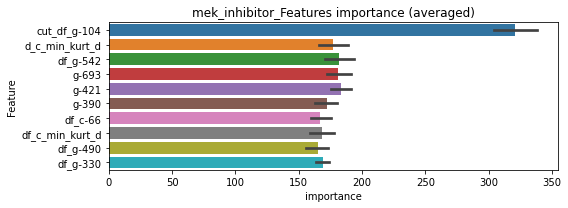

len(train_index) : 2835
len(valid_index) : 946
================================= fold 1/4 mek_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000552399	valid_1's binary_logloss: 0.00388441
Early stopping, best iteration is:
[1428]	training's binary_logloss: 0.000403283	valid_1's binary_logloss: 0.00373083


len(train_index) : 2836
len(valid_index) : 945
================================= fold 2/4 mek_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000577598	valid_1's binary_logloss: 0.00174768
[2000]	training's binary_logloss: 0.000325966	valid_1's binary_logloss: 0.00143178
[3000]	training's binary_logloss: 0.000251623	valid_1's binary_logloss: 0.00134099
Early stopping, best iteration is:
[3739]	training's binary_logloss: 0.000224872	valid_1's binary_logloss: 0.00131235


len(train_index) : 2836
len(valid_index) : 945
================================= fold 3/4 mek_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[957]	training's binary_logloss: 0.000597214	valid_1's binary_logloss: 0.00395064


len(train_index) : 2836
len(valid_index) : 945
================================= fold 4/4 mek_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000575921	valid_1's binary_logloss: 0.00156208
[2000]	training's binary_logloss: 0.000324085	valid_1's binary_logloss: 0.00120993
Early stopping, best iteration is:
[2450]	training's binary_logloss: 0.000282383	valid_1's binary_logloss: 0.00114338


mek_inhibitor logloss: 0.0025349562621230243


neg labels: 3289 → selected neg labels: 3276


membrane_integrity_inhibitor, len(trt): 74, len(othr): 3276
target_rate: 0.0031074 → Adj_target_rate: 0.0032587
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00689202	valid_1's binary_logloss: 0.0313793
[600]	training's binary_logloss: 0.00117706	valid_1's binary_logloss: 0.0193123
[900]	training's binary_logloss: 0.000701636	valid_1's binary_logloss: 0.0179308
Early stopping, best iteration is:
[897]	training's binary_logloss: 0.000702843	valid_1's binary_logloss: 0.0179102
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00637193	valid_1's binary_logloss: 0.0371879
[600]	training's binary_logloss: 0.00113236	valid_1's binary_logloss: 0.0271118
Early stopping, best iteration is:
[738]	training's binary_logloss: 0.00081823	valid_1's binary_logloss: 0.0262562
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0068592	valid_1's binary_logloss: 0.0423533
Early stopping, best iteration is:
[489]	training's binary_logloss: 0.00177426	valid_1's binary_logloss: 0

1 / 3 AUC score:0.999
y_Threshold: 0.0087757, Threshold: 0.0257614, pos_neg_ratio: 0.8000000
Remove_noisy_data: 144 → Positive_corect_labels: 649/3787
p_label_rate: 0.0100452 Vs.target_rate: 0.00311
Num_p_label: 40.0, conf_0:0.01803, conf_1:0.03349
Num_p_label: 40.0, Expected: 12.4, Adj_threshold_1: 0.0257614
Num_p_label: 13.0, Expected: 12.4, Adj_threshold_2: 0.0557614
threshold: 0.0557614, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 649.0/3787, y_label_rate: 0.1713758
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00559071	valid_1's binary_logloss: 0.029643
[600]	training's binary_logloss: 0.0010243	valid_1's binary_logloss: 0.0183572
Early stopping, best iteration is:
[790]	training's binary_logloss: 0.000700331	valid_1's binary_logloss: 0.0167238
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00575339	valid_1's binary_logloss: 0.0300121
[600]	training's binary_logloss: 0.00105019	valid_1's binary_logloss: 0.0190807
Early stopping, best iteration is:
[770]	training's binary_logloss: 0.000729075	valid_1's binary_logloss: 0.01801
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00599508	valid_1's binary_logloss: 0.0395481
Early stopping, best iteration is:
[557]	training's binary_logloss: 0.00122788	valid_1's binary_logloss: 0.0288882
Training until validation scores don't improve for 30 rounds
[300]	trainin

2 / 3 AUC score:1.000
y_Threshold: 0.0366123, Threshold: 0.0557614, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 645.0/3779
p_label_rate: 0.0057760 Vs.target_rate: 0.00311
Num_p_label: 23.0, conf_0:0.04461, conf_1:0.06691
Num_p_label: 23.0, Expected: 12.4, Adj_threshold_1: 0.0557614
Num_p_label: 16.0, Expected: 12.4, Adj_threshold_2: 0.0857614
threshold: 0.0857614, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 645.0/3779, y_label_rate: 0.1706801
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00540756	valid_1's binary_logloss: 0.0329773
[600]	training's binary_logloss: 0.0010038	valid_1's binary_logloss: 0.0249058
Early stopping, best iteration is:
[716]	training's binary_logloss: 0.000764339	valid_1's binary_logloss: 0.0241919
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00555196	valid_1's binary_logloss: 0.0316699
[600]	training's binary_logloss: 0.00101216	valid_1's binary_logloss: 0.0221799
Early stopping, best iteration is:
[589]	training's binary_logloss: 0.0010482	valid_1's binary_logloss: 0.022082
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00565738	valid_1's binary_logloss: 0.0290033
[600]	training's binary_logloss: 0.00103926	valid_1's binary_logloss: 0.0179794
[900]	training's binary_logloss: 0.00065733	valid_1's binary_logloss: 0.0165419
Early stopping, best iteratio

3 / 3 AUC score:1.000
y_Threshold: 0.0435071, Threshold: 0.0857614, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 641.0/3771
p_label_rate: 0.0040181 Vs.target_rate: 0.00311
Num_p_label: 16.0, conf_0:0.07719, conf_1:0.09434
threshold: 0.0857614, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 641.0/3771, y_label_rate: 0.1699814


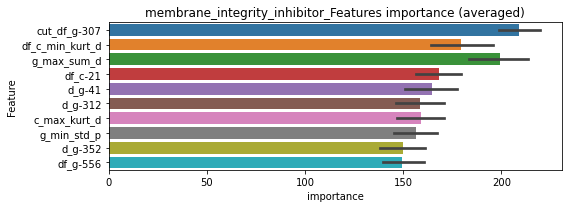

len(train_index) : 2828
len(valid_index) : 943
================================= fold 1/4 membrane_integrity_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000555595	valid_1's binary_logloss: 0.0028218
[2000]	training's binary_logloss: 0.000317875	valid_1's binary_logloss: 0.00240294
[3000]	training's binary_logloss: 0.000250615	valid_1's binary_logloss: 0.00226788
[4000]	training's binary_logloss: 0.000219082	valid_1's binary_logloss: 0.00220496
Early stopping, best iteration is:
[3982]	training's binary_logloss: 0.000219488	valid_1's binary_logloss: 0.00220451


len(train_index) : 2828
len(valid_index) : 943
================================= fold 2/4 membrane_integrity_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000555349	valid_1's binary_logloss: 0.00643577
Early stopping, best iteration is:
[1043]	training's binary_logloss: 0.000533095	valid_1's binary_logloss: 0.00640273


len(train_index) : 2828
len(valid_index) : 943
================================= fold 3/4 membrane_integrity_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00055819	valid_1's binary_logloss: 0.00102162
[2000]	training's binary_logloss: 0.000317676	valid_1's binary_logloss: 0.0007337
[3000]	training's binary_logloss: 0.000248396	valid_1's binary_logloss: 0.000637774
[4000]	training's binary_logloss: 0.000216471	valid_1's binary_logloss: 0.000585295
Early stopping, best iteration is:
[4739]	training's binary_logloss: 0.000203669	valid_1's binary_logloss: 0.000565911


len(train_index) : 2829
len(valid_index) : 942
================================= fold 4/4 membrane_integrity_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00054231	valid_1's binary_logloss: 0.000910722
[2000]	training's binary_logloss: 0.000308812	valid_1's binary_logloss: 0.000608354
[3000]	training's binary_logloss: 0.000236292	valid_1's binary_logloss: 0.000499952
[4000]	training's binary_logloss: 0.000201775	valid_1's binary_logloss: 0.00044694
[5000]	training's binary_logloss: 0.000183796	valid_1's binary_logloss: 0.000415963
[6000]	training's binary_logloss: 0.00017229	valid_1's binary_logloss: 0.00039613
[7000]	training's binary_logloss: 0.000163966	valid_1's binary_logloss: 0.000380883
Early stopping, best iteration is:
[7847]	training's binary_logloss: 0.000158577	valid_1's binary_logloss: 0.000372019


membrane_integrity_inhibitor logloss: 0.0023869430112787196


neg labels: 3289 → selected neg labels: 3283


mineralocorticoid_receptor_antagonist, len(trt): 25, len(othr): 3283
target_rate: 0.0010498 → Adj_target_rate: 0.0012955
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00180055	valid_1's binary_logloss: 0.00483117
[600]	training's binary_logloss: 0.000428592	valid_1's binary_logloss: 0.00193933
Early stopping, best iteration is:
[612]	training's binary_logloss: 0.000423854	valid_1's binary_logloss: 0.00192938
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00179599	valid_1's binary_logloss: 0.00552827
[600]	training's binary_logloss: 0.000426543	valid_1's binary_logloss: 0.00264394
Early stopping, best iteration is:
[657]	training's binary_logloss: 0.000404819	valid_1's binary_logloss: 0.00260029
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0018704	valid_1's binary_logloss: 0.00494361
[600]	training's binary_logloss: 0.000432947	valid_1's binary_logloss: 0.00234241
Early stopping, best iteration is:
[647]	training's binary_logloss: 0.000421212	valid_1's binar

1 / 3 AUC score:1.000
y_Threshold: 0.0025663, Threshold: 0.0071749, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0100452 Vs.target_rate: 0.00105
Num_p_label: 40.0, conf_0:0.00502, conf_1:0.00933
Num_p_label: 40.0, Expected: 4.2, Adj_threshold_1: 0.0071749
Num_p_label: 5.0, Expected: 4.2, Adj_threshold_2: 0.0371749


[600]	training's binary_logloss: 0.000417248	valid_1's binary_logloss: 0.00769712
Early stopping, best iteration is:
[580]	training's binary_logloss: 0.000427103	valid_1's binary_logloss: 0.00763644


threshold: 0.0371749, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00165072	valid_1's binary_logloss: 0.00436013
[600]	training's binary_logloss: 0.000408917	valid_1's binary_logloss: 0.00171096
Early stopping, best iteration is:
[603]	training's binary_logloss: 0.000408136	valid_1's binary_logloss: 0.00170741
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00170342	valid_1's binary_logloss: 0.00513814
[600]	training's binary_logloss: 0.000416258	valid_1's binary_logloss: 0.00252991
Early stopping, best iteration is:
[613]	training's binary_logloss: 0.000411093	valid_1's binary_logloss: 0.00251273
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00173304	valid_1's binary_logloss: 0.00362285
[600]	training's binary_logloss: 0.000418675	valid_1's binary_logloss: 0.00135952
Early stopping, best iteration is:
[659]	training's binary_logloss: 0.000400627	valid_1's bina

2 / 3 AUC score:1.000
y_Threshold: 0.0181219, Threshold: 0.0371749, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0035158 Vs.target_rate: 0.00105
Num_p_label: 14.0, conf_0:0.02974, conf_1:0.04461
Num_p_label: 14.0, Expected: 4.2, Adj_threshold_1: 0.0371749
Num_p_label: 8.0, Expected: 4.2, Adj_threshold_2: 0.0671749
threshold: 0.0671749, positive_p_label: 8.0/3982, p_label_rate: 0.0020090


Early stopping, best iteration is:
[567]	training's binary_logloss: 0.000422001	valid_1's binary_logloss: 0.00796593


positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00165072	valid_1's binary_logloss: 0.00436013
[600]	training's binary_logloss: 0.000408917	valid_1's binary_logloss: 0.00171096
Early stopping, best iteration is:
[603]	training's binary_logloss: 0.000408136	valid_1's binary_logloss: 0.00170741
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00170342	valid_1's binary_logloss: 0.00513814
[600]	training's binary_logloss: 0.000416258	valid_1's binary_logloss: 0.00252991
Early stopping, best iteration is:
[613]	training's binary_logloss: 0.000411093	valid_1's binary_logloss: 0.00251273
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00173304	valid_1's binary_logloss: 0.00362285
[600]	training's binary_logloss: 0.000418675	valid_1's binary_logloss: 0.00135952
Early stopping, best iteration is:
[659]	training's binary_logloss: 0.000400627	valid_1's bina

3 / 3 AUC score:1.000
y_Threshold: 0.0181219, Threshold: 0.0671749, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807


Early stopping, best iteration is:
[567]	training's binary_logloss: 0.000422001	valid_1's binary_logloss: 0.00796593


p_label_rate: 0.0020090 Vs.target_rate: 0.00105
Num_p_label: 8.0, conf_0:0.06046, conf_1:0.07389
Num_p_label: 8.0, Expected: 4.2, Adj_threshold_1: 0.0671749
threshold: 0.0671749, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 656.0/3807, y_label_rate: 0.1723142


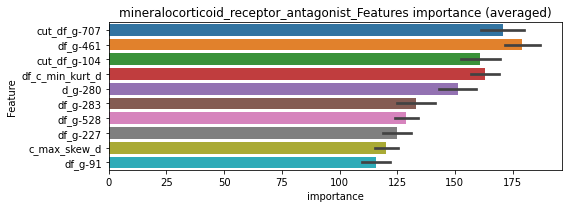

len(train_index) : 2855
len(valid_index) : 952
================================= fold 1/4 mineralocorticoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000474112	valid_1's binary_logloss: 0.000464735
[2000]	training's binary_logloss: 0.000278565	valid_1's binary_logloss: 0.000263748
[3000]	training's binary_logloss: 0.000223324	valid_1's binary_logloss: 0.000204278
[4000]	training's binary_logloss: 0.000199095	valid_1's binary_logloss: 0.00017678
[5000]	training's binary_logloss: 0.000186563	valid_1's binary_logloss: 0.000162411
[6000]	training's binary_logloss: 0.000178572	valid_1's binary_logloss: 0.000153236
[7000]	training's binary_logloss: 0.000172162	valid_1's binary_logloss: 0.000146106
[8000]	training's binary_logloss: 0.000167294	valid_1's binary_logloss: 0.00014064
Early stopping, best iteration is:
[8412]	training's binary_logloss: 0.000165767	valid_1's binary_logloss: 0.000138951


len(train_index) : 2855
len(valid_index) : 952
================================= fold 2/4 mineralocorticoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2855
len(valid_index) : 952
================================= fold 3/4 mineralocorticoid_receptor_antagonist=================================


Early stopping, best iteration is:
[828]	training's binary_logloss: 0.000563563	valid_1's binary_logloss: 0.00289226
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000471885	valid_1's binary_logloss: 0.00115263
[2000]	training's binary_logloss: 0.00027858	valid_1's binary_logloss: 0.000949692
Early stopping, best iteration is:
[2202]	training's binary_logloss: 0.000263902	valid_1's binary_logloss: 0.000936127


len(train_index) : 2856
len(valid_index) : 951
================================= fold 4/4 mineralocorticoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


mineralocorticoid_receptor_antagonist logloss: 0.0024755314005435293


Early stopping, best iteration is:
[748]	training's binary_logloss: 0.000622081	valid_1's binary_logloss: 0.00593796
neg labels: 3289 → selected neg labels: 3289


monoacylglycerol_lipase_inhibitor, len(trt): 12, len(othr): 3289
target_rate: 0.0005039 → Adj_target_rate: 0.0006942
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000697268	valid_1's binary_logloss: 0.00188702
Early stopping, best iteration is:
[537]	training's binary_logloss: 0.000264911	valid_1's binary_logloss: 0.00100127
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000702308	valid_1's binary_logloss: 0.00500318
Early stopping, best iteration is:
[501]	training's binary_logloss: 0.000278243	valid_1's binary_logloss: 0.00340708
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00069865	valid_1's binary_logloss: 0.00123635
Early stopping, best iteration is:
[518]	training's binary_logloss: 0.000273169	valid_1's binary_logloss: 0.000570631
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000698757	valid_1's binary_logloss: 0.00130277


1 / 3 AUC score:1.000
y_Threshold: 0.0010917, Threshold: 0.0031595, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00050
Num_p_label: 40.0, conf_0:0.00221, conf_1:0.00411
Num_p_label: 40.0, Expected: 2.0, Adj_threshold_1: 0.0031595
Num_p_label: 0.0, Expected: 2.0, Adj_threshold_2: 0.0331595
threshold: 0.0331595, positive_p_label: 0.0/3982, p_label_rate: 0.0000000


Early stopping, best iteration is:
[545]	training's binary_logloss: 0.000264622	valid_1's binary_logloss: 0.000617971


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000629324	valid_1's binary_logloss: 0.00168879
Early stopping, best iteration is:
[511]	training's binary_logloss: 0.000256035	valid_1's binary_logloss: 0.00107553
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000636196	valid_1's binary_logloss: 0.0059572
Early stopping, best iteration is:
[509]	training's binary_logloss: 0.000257931	valid_1's binary_logloss: 0.00433261
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000650287	valid_1's binary_logloss: 0.000733905
Early stopping, best iteration is:
[517]	training's binary_logloss: 0.000263737	valid_1's binary_logloss: 0.000297835
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000636259	valid_1's binary_logloss: 0.00104322


2 / 3 AUC score:1.000
y_Threshold: 0.0446909, Threshold: 0.0331595, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0015068 Vs.target_rate: 0.00050
Num_p_label: 6.0, conf_0:0.02653, conf_1:0.03979
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_1: 0.0331595
Num_p_label: 3.0, Expected: 2.0, Adj_threshold_2: 0.0631595
threshold: 0.0631595, positive_p_label: 3.0/3982, p_label_rate: 0.0007534


Early stopping, best iteration is:
[536]	training's binary_logloss: 0.000253063	valid_1's binary_logloss: 0.000484468


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000629324	valid_1's binary_logloss: 0.00168879
Early stopping, best iteration is:
[511]	training's binary_logloss: 0.000256035	valid_1's binary_logloss: 0.00107553
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000636196	valid_1's binary_logloss: 0.0059572
Early stopping, best iteration is:
[512]	training's binary_logloss: 0.000257931	valid_1's binary_logloss: 0.00433261
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000650287	valid_1's binary_logloss: 0.000733905
Early stopping, best iteration is:
[518]	training's binary_logloss: 0.000263737	valid_1's binary_logloss: 0.000297835
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000636259	valid_1's binary_logloss: 0.00104322


3 / 3 AUC score:1.000
y_Threshold: 0.0446909, Threshold: 0.0631595, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0007534 Vs.target_rate: 0.00050
Num_p_label: 3.0, conf_0:0.05684, conf_1:0.06948


Early stopping, best iteration is:
[535]	training's binary_logloss: 0.000253063	valid_1's binary_logloss: 0.000484468


threshold: 0.0631595, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


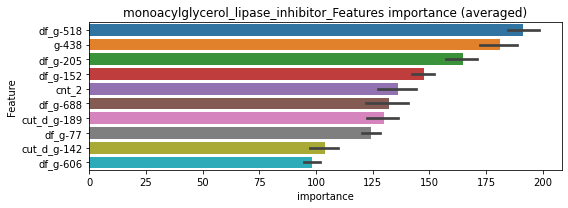

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 monoacylglycerol_lipase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000359937	valid_1's binary_logloss: 0.000625526
[2000]	training's binary_logloss: 0.000226385	valid_1's binary_logloss: 0.000469302
[3000]	training's binary_logloss: 0.000185164	valid_1's binary_logloss: 0.000425776
[4000]	training's binary_logloss: 0.000166006	valid_1's binary_logloss: 0.000404331
Early stopping, best iteration is:
[4797]	training's binary_logloss: 0.000157381	valid_1's binary_logloss: 0.000395229


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 monoacylglycerol_lipase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000390281	valid_1's binary_logloss: 0.00234935
Early stopping, best iteration is:
[1215]	training's binary_logloss: 0.000335003	valid_1's binary_logloss: 0.00224793


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 monoacylglycerol_lipase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000380213	valid_1's binary_logloss: 0.000466954
[2000]	training's binary_logloss: 0.00023428	valid_1's binary_logloss: 0.000322555
[3000]	training's binary_logloss: 0.000194287	valid_1's binary_logloss: 0.000285658
[4000]	training's binary_logloss: 0.000175775	valid_1's binary_logloss: 0.000268085
Early stopping, best iteration is:
[4245]	training's binary_logloss: 0.000172936	valid_1's binary_logloss: 0.000265075


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 monoacylglycerol_lipase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000383824	valid_1's binary_logloss: 0.000451906
[2000]	training's binary_logloss: 0.000237219	valid_1's binary_logloss: 0.000291359
[3000]	training's binary_logloss: 0.000199074	valid_1's binary_logloss: 0.000247111
[4000]	training's binary_logloss: 0.000180954	valid_1's binary_logloss: 0.000226832
[5000]	training's binary_logloss: 0.00017108	valid_1's binary_logloss: 0.00021548
[6000]	training's binary_logloss: 0.000164116	valid_1's binary_logloss: 0.000207448
[7000]	training's binary_logloss: 0.000159052	valid_1's binary_logloss: 0.000200201
[8000]	training's binary_logloss: 0.000155408	valid_1's binary_logloss: 0.000195002
Early stopping, best iteration is:
[8421]	training's binary_logloss: 0.000154024	valid_1's binary_logloss: 0.000193605


monoacylglycerol_lipase_inhibitor logloss: 0.000775427813346712


neg labels: 3289 → selected neg labels: 3280


monoamine_oxidase_inhibitor, len(trt): 85, len(othr): 3280
target_rate: 0.0035693 → Adj_target_rate: 0.0036661
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00843744	valid_1's binary_logloss: 0.0740094
[600]	training's binary_logloss: 0.00139884	valid_1's binary_logloss: 0.0659447
Early stopping, best iteration is:
[602]	training's binary_logloss: 0.0013913	valid_1's binary_logloss: 0.0658563
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0100469	valid_1's binary_logloss: 0.0648295
[600]	training's binary_logloss: 0.00154174	valid_1's binary_logloss: 0.0569932
Early stopping, best iteration is:
[648]	training's binary_logloss: 0.0013148	valid_1's binary_logloss: 0.0567562
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0102839	valid_1's binary_logloss: 0.0371507
[600]	training's binary_logloss: 0.00160283	valid_1's binary_logloss: 0.0244425
Early stopping, best iteration is:
[831]	training's binary_logloss: 0.00091509	valid_1's binary_logloss: 0.0231

1 / 3 AUC score:0.997
y_Threshold: 0.0097408, Threshold: 0.0277948, pos_neg_ratio: 0.8000000
Remove_noisy_data: 144 → Positive_corect_labels: 650/3792
p_label_rate: 0.0100452 Vs.target_rate: 0.00357
Num_p_label: 40.0, conf_0:0.01946, conf_1:0.03613
Num_p_label: 40.0, Expected: 14.2, Adj_threshold_1: 0.0277948
Num_p_label: 13.0, Expected: 14.2, Adj_threshold_2: 0.0577948
threshold: 0.0577948, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 650.0/3792, y_label_rate: 0.1714135
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00863465	valid_1's binary_logloss: 0.0531516
[600]	training's binary_logloss: 0.00139985	valid_1's binary_logloss: 0.0414838
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.00125803	valid_1's binary_logloss: 0.0410925
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00824654	valid_1's binary_logloss: 0.0567793
[600]	training's binary_logloss: 0.00139261	valid_1's binary_logloss: 0.0423243
Early stopping, best iteration is:
[675]	training's binary_logloss: 0.00111526	valid_1's binary_logloss: 0.0415451
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00867218	valid_1's binary_logloss: 0.0440089
[600]	training's binary_logloss: 0.00143066	valid_1's binary_logloss: 0.0339304
Early stopping, best iteration is:
[609]	training's binary_logloss: 0.00138512	valid_1's binary_logloss: 0.

2 / 3 AUC score:0.999
y_Threshold: 0.0304826, Threshold: 0.0577948, pos_neg_ratio: 0.8000000
Remove_noisy_data: 18 → Positive_corect_labels: 641.0/3774
p_label_rate: 0.0082873 Vs.target_rate: 0.00357
Num_p_label: 33.0, conf_0:0.04624, conf_1:0.06935
Num_p_label: 33.0, Expected: 14.2, Adj_threshold_1: 0.0577948
Num_p_label: 15.0, Expected: 14.2, Adj_threshold_2: 0.0877948


Early stopping, best iteration is:
[458]	training's binary_logloss: 0.00253133	valid_1's binary_logloss: 0.0498126


threshold: 0.0877948, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 641.0/3774, y_label_rate: 0.1698463
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.007223	valid_1's binary_logloss: 0.0599264
[600]	training's binary_logloss: 0.00125677	valid_1's binary_logloss: 0.0494908
Early stopping, best iteration is:
[615]	training's binary_logloss: 0.00120033	valid_1's binary_logloss: 0.0493648
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00748423	valid_1's binary_logloss: 0.0450673
[600]	training's binary_logloss: 0.00128072	valid_1's binary_logloss: 0.0354822
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.00120764	valid_1's binary_logloss: 0.0353089
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00819897	valid_1's binary_logloss: 0.0443099
[600]	training's binary_logloss: 0.00134538	valid_1's binary_logloss: 0.0343645
Early stopping, best iteration is:
[638]	training's binary_logloss: 0.00118728	valid_1's binary_logloss: 0.03

3 / 3 AUC score:1.000
y_Threshold: 0.0261496, Threshold: 0.0877948, pos_neg_ratio: 0.8000000
Remove_noisy_data: 12 → Positive_corect_labels: 635.0/3762
p_label_rate: 0.0040181 Vs.target_rate: 0.00357
Num_p_label: 16.0, conf_0:0.07902, conf_1:0.09657
threshold: 0.0877948, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 635.0/3762, y_label_rate: 0.1687932


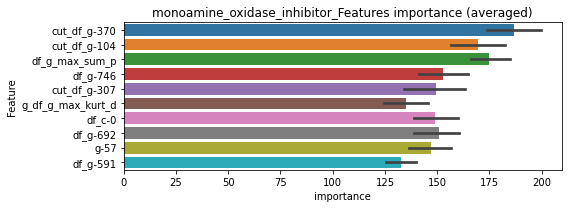

len(train_index) : 2821
len(valid_index) : 941
================================= fold 1/4 monoamine_oxidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2821
len(valid_index) : 941
================================= fold 2/4 monoamine_oxidase_inhibitor=================================


Early stopping, best iteration is:
[762]	training's binary_logloss: 0.000748795	valid_1's binary_logloss: 0.00611757
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000579543	valid_1's binary_logloss: 0.00493786
Early stopping, best iteration is:
[1097]	training's binary_logloss: 0.000532762	valid_1's binary_logloss: 0.00487308


len(train_index) : 2822
len(valid_index) : 940
================================= fold 3/4 monoamine_oxidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000457672	valid_1's binary_logloss: 0.000800863
[2000]	training's binary_logloss: 0.000253303	valid_1's binary_logloss: 0.000445782
[3000]	training's binary_logloss: 0.00018603	valid_1's binary_logloss: 0.000328028
[4000]	training's binary_logloss: 0.000154171	valid_1's binary_logloss: 0.000272114
[5000]	training's binary_logloss: 0.000137924	valid_1's binary_logloss: 0.000243574
[6000]	training's binary_logloss: 0.000127442	valid_1's binary_logloss: 0.000225098
[7000]	training's binary_logloss: 0.00012017	valid_1's binary_logloss: 0.000212273
[8000]	training's binary_logloss: 0.000115183	valid_1's binary_logloss: 0.0002035
[9000]	training's binary_logloss: 0.000111646	valid_1's binary_logloss: 0.000197269
[10000]	training's binary_logloss: 0.000109116	valid_1's binary_logloss: 0.000192825
Did not meet early stopping. Best iteration is:
[9999]	training's binary_logloss: 0.000109116	valid_1'

len(train_index) : 2822
len(valid_index) : 940
================================= fold 4/4 monoamine_oxidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000564593	valid_1's binary_logloss: 0.00125469
[2000]	training's binary_logloss: 0.000322884	valid_1's binary_logloss: 0.000884314
[3000]	training's binary_logloss: 0.000250508	valid_1's binary_logloss: 0.000754129
[4000]	training's binary_logloss: 0.000216273	valid_1's binary_logloss: 0.000685757
[5000]	training's binary_logloss: 0.0001984	valid_1's binary_logloss: 0.000646759
Early stopping, best iteration is:
[5593]	training's binary_logloss: 0.000190567	valid_1's binary_logloss: 0.000630587


monoamine_oxidase_inhibitor logloss: 0.002954879384940054


neg labels: 3289 → selected neg labels: 3287


monopolar_spindle_1_kinase_inhibitor, len(trt): 18, len(othr): 3287
target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00121527	valid_1's binary_logloss: 0.00488999
Early stopping, best iteration is:
[520]	training's binary_logloss: 0.000384826	valid_1's binary_logloss: 0.00372742
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00120681	valid_1's binary_logloss: 0.00607063
[600]	training's binary_logloss: 0.000351591	valid_1's binary_logloss: 0.00352143
Early stopping, best iteration is:
[585]	training's binary_logloss: 0.000354339	valid_1's binary_logloss: 0.00351397
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00122222	valid_1's binary_logloss: 0.00245034
[600]	training's binary_logloss: 0.000356924	valid_1's binary_logloss: 0.000981568
Early stopping, best iteration is:
[672]	training's binary_logloss: 0.00034863	valid_1's binary_logloss: 0.000968442
Training until validation scores don't improve for 30 roun

1 / 3 AUC score:1.000
y_Threshold: 0.0018007, Threshold: 0.0317620, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, conf_0:0.02223, conf_1:0.04129
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_1: 0.0317620
Num_p_label: 21.0, Expected: 3.0, Adj_threshold_2: 0.0617620
Num_p_label: 13.0, Expected: 3.0, Adj_threshold_3: 0.0917620
Num_p_label: 9.0, Expected: 3.0, Adj_threshold_4: 0.1217620


[600]	training's binary_logloss: 0.000359297	valid_1's binary_logloss: 0.00137017
Early stopping, best iteration is:
[591]	training's binary_logloss: 0.000359697	valid_1's binary_logloss: 0.00136818


Num_p_label: 6.0, Expected: 3.0, Adj_threshold_5: 0.1517620
threshold: 0.1517620, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00116725	valid_1's binary_logloss: 0.00279079
Early stopping, best iteration is:
[561]	training's binary_logloss: 0.000352093	valid_1's binary_logloss: 0.00120302
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00113976	valid_1's binary_logloss: 0.00384522
Early stopping, best iteration is:
[568]	training's binary_logloss: 0.00034742	valid_1's binary_logloss: 0.0019563
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.001172	valid_1's binary_logloss: 0.00207574
[600]	training's binary_logloss: 0.000352798	valid_1's binary_logloss: 0.000819917
Early stopping, best iteration is:
[576]	training's binary_logloss: 0.000352798	valid_1's binary_logloss: 0.000819917
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00114122	valid_1's binary_logloss: 0.0021579
[6

2 / 3 AUC score:1.000
y_Threshold: 0.1134108, Threshold: 0.1517620, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0067805 Vs.target_rate: 0.00076
Num_p_label: 27.0, conf_0:0.12141, conf_1:0.18211
Num_p_label: 27.0, Expected: 3.0, Adj_threshold_1: 0.1517620
Num_p_label: 21.0, Expected: 3.0, Adj_threshold_2: 0.1817620
Num_p_label: 17.0, Expected: 3.0, Adj_threshold_3: 0.2117620
Num_p_label: 14.0, Expected: 3.0, Adj_threshold_4: 0.2417620
Num_p_label: 11.0, Expected: 3.0, Adj_threshold_5: 0.2717620
Num_p_label: 9.0, Expected: 3.0, Adj_threshold_6: 0.3017620
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_7: 0.3317620
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_8: 0.3617620
threshold: 0.3617620, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00116725	valid_1's binary_logloss: 0.00279079
Early stopping, best iteration is:
[561]	training's binary_logloss: 0.000352093	valid_1's binary_logloss: 0.00120302
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00113976	valid_1's binary_logloss: 0.00384522
Early stopping, best iteration is:
[568]	training's binary_logloss: 0.00034742	valid_1's binary_logloss: 0.0019563
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.001172	valid_1's binary_logloss: 0.00207574
[600]	training's binary_logloss: 0.000352798	valid_1's binary_logloss: 0.000819917
Early stopping, best iteration is:
[576]	training's binary_logloss: 0.000352798	valid_1's binary_logloss: 0.000819917
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00114122	valid_1's binary_logloss: 0.0021579


3 / 3 AUC score:1.000
y_Threshold: 0.1134108, Threshold: 0.3617620, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812


Early stopping, best iteration is:
[566]	training's binary_logloss: 0.000353555	valid_1's binary_logloss: 0.00091224


p_label_rate: 0.0017579 Vs.target_rate: 0.00076
Num_p_label: 7.0, conf_0:0.32559, conf_1:0.39794
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_1: 0.3617620
threshold: 0.3617620, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


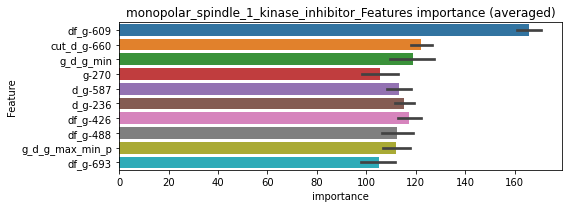

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 monopolar_spindle_1_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000442645	valid_1's binary_logloss: 0.00136565
[2000]	training's binary_logloss: 0.000265279	valid_1's binary_logloss: 0.00114464
[3000]	training's binary_logloss: 0.000216268	valid_1's binary_logloss: 0.00108548
Early stopping, best iteration is:
[3429]	training's binary_logloss: 0.000203823	valid_1's binary_logloss: 0.00106896


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 monopolar_spindle_1_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000429392	valid_1's binary_logloss: 0.00126543
Early stopping, best iteration is:
[1278]	training's binary_logloss: 0.000353647	valid_1's binary_logloss: 0.0011515


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 monopolar_spindle_1_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000378838	valid_1's binary_logloss: 0.000437422
[2000]	training's binary_logloss: 0.00022926	valid_1's binary_logloss: 0.0002653
[3000]	training's binary_logloss: 0.000174753	valid_1's binary_logloss: 0.000202327
[4000]	training's binary_logloss: 0.000147457	valid_1's binary_logloss: 0.000170769
[5000]	training's binary_logloss: 0.000133126	valid_1's binary_logloss: 0.000154191
[6000]	training's binary_logloss: 0.000123817	valid_1's binary_logloss: 0.000143419
[7000]	training's binary_logloss: 0.000117273	valid_1's binary_logloss: 0.000135848
[8000]	training's binary_logloss: 0.000112749	valid_1's binary_logloss: 0.000130612
[9000]	training's binary_logloss: 0.000109516	valid_1's binary_logloss: 0.00012687
[10000]	training's binary_logloss: 0.000107177	valid_1's binary_logloss: 0.000124163
Did not meet early stopping. Best iteration is:
[9999]	training's binary_logloss: 0.000107177	valid_1'

len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 monopolar_spindle_1_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000445628	valid_1's binary_logloss: 0.00141814
[2000]	training's binary_logloss: 0.000271971	valid_1's binary_logloss: 0.00123538
[3000]	training's binary_logloss: 0.000222013	valid_1's binary_logloss: 0.00118971
Early stopping, best iteration is:
[3305]	training's binary_logloss: 0.000212683	valid_1's binary_logloss: 0.00117958


monopolar_spindle_1_kinase_inhibitor logloss: 0.0008814003907526195


neg labels: 3289 → selected neg labels: 3269


mtor_inhibitor, len(trt): 130, len(othr): 3269
target_rate: 0.0054590 → Adj_target_rate: 0.0052608
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0204093	valid_1's binary_logloss: 0.122306
[600]	training's binary_logloss: 0.00291569	valid_1's binary_logloss: 0.098132
Early stopping, best iteration is:
[601]	training's binary_logloss: 0.00290378	valid_1's binary_logloss: 0.098068
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0195953	valid_1's binary_logloss: 0.102059
[600]	training's binary_logloss: 0.00275849	valid_1's binary_logloss: 0.0754054
Early stopping, best iteration is:
[762]	training's binary_logloss: 0.00163487	valid_1's binary_logloss: 0.0739513
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0193997	valid_1's binary_logloss: 0.105738
[600]	training's binary_logloss: 0.00274959	valid_1's binary_logloss: 0.0794315
Early stopping, best iteration is:
[686]	training's binary_logloss: 0.0020139	valid_1's binary_logloss: 0.0777722
T

1 / 3 AUC score:0.990
y_Threshold: 0.0222535, Threshold: 0.3833574, pos_neg_ratio: 0.8000000
Remove_noisy_data: 172 → Positive_corect_labels: 633/3750
p_label_rate: 0.0100452 Vs.target_rate: 0.00546
Num_p_label: 40.0, conf_0:0.26835, conf_1:0.49836
Num_p_label: 40.0, Expected: 21.7, Adj_threshold_1: 0.3833574
Num_p_label: 35.0, Expected: 21.7, Adj_threshold_2: 0.4133574
Num_p_label: 30.0, Expected: 21.7, Adj_threshold_3: 0.4433574
threshold: 0.4433574, positive_p_label: 30.0/3982, p_label_rate: 0.0075339
positive_y_label: 633.0/3750, y_label_rate: 0.1688000
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0169875	valid_1's binary_logloss: 0.0767412
[600]	training's binary_logloss: 0.0024808	valid_1's binary_logloss: 0.0497321
Early stopping, best iteration is:
[827]	training's binary_logloss: 0.00130316	valid_1's binary_logloss: 0.0466288
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0149811	valid_1's binary_logloss: 0.0866728
[600]	training's binary_logloss: 0.00227592	valid_1's binary_logloss: 0.0607795
[900]	training's binary_logloss: 0.00108337	valid_1's binary_logloss: 0.0581231
Early stopping, best iteration is:
[892]	training's binary_logloss: 0.00109505	valid_1's binary_logloss: 0.0579726
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0164646	valid_1's binary_logloss: 0.0832217
[600]	training's binary_logloss: 0.00236817	valid_1's binary_logloss: 0.0611711
Early stopping, best iteration 

2 / 3 AUC score:0.994
y_Threshold: 0.0458756, Threshold: 0.4433574, pos_neg_ratio: 0.8000000
Remove_noisy_data: 46 → Positive_corect_labels: 610.0/3704
p_label_rate: 0.0155701 Vs.target_rate: 0.00546
Num_p_label: 62.0, conf_0:0.35469, conf_1:0.53203
Num_p_label: 62.0, Expected: 21.7, Adj_threshold_1: 0.4433574
Num_p_label: 56.0, Expected: 21.7, Adj_threshold_2: 0.4733574
Num_p_label: 55.0, Expected: 21.7, Adj_threshold_3: 0.5033574
Num_p_label: 51.0, Expected: 21.7, Adj_threshold_4: 0.5333574
Num_p_label: 49.0, Expected: 21.7, Adj_threshold_5: 0.5633574
Num_p_label: 44.0, Expected: 21.7, Adj_threshold_6: 0.5933574
Num_p_label: 42.0, Expected: 21.7, Adj_threshold_7: 0.6233574
Num_p_label: 37.0, Expected: 21.7, Adj_threshold_8: 0.6533574
Num_p_label: 33.0, Expected: 21.7, Adj_threshold_9: 0.6833574
Num_p_label: 30.0, Expected: 21.7, Adj_threshold_10: 0.7133574
threshold: 0.7133574, positive_p_label: 30.0/3982, p_label_rate: 0.0075339
positive_y_label: 610.0/3704, y_label_rate: 0.1646868


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0139654	valid_1's binary_logloss: 0.0825931
[600]	training's binary_logloss: 0.00213073	valid_1's binary_logloss: 0.0624681
Early stopping, best iteration is:
[799]	training's binary_logloss: 0.00120682	valid_1's binary_logloss: 0.0598028
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0141193	valid_1's binary_logloss: 0.070791
[600]	training's binary_logloss: 0.00214006	valid_1's binary_logloss: 0.0454084
Early stopping, best iteration is:
[846]	training's binary_logloss: 0.00112808	valid_1's binary_logloss: 0.0413863
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0137647	valid_1's binary_logloss: 0.0795724
[600]	training's binary_logloss: 0.0021046	valid_1's binary_logloss: 0.0562822
Early stopping, best iteration is:
[708]	training's binary_logloss: 0.001501	valid_1's binary_logloss: 0.0552386

3 / 3 AUC score:0.998
y_Threshold: 0.0414073, Threshold: 0.7133574, pos_neg_ratio: 0.8000000
Remove_noisy_data: 34 → Positive_corect_labels: 593.0/3670
p_label_rate: 0.0090407 Vs.target_rate: 0.00546
Num_p_label: 36.0, conf_0:0.50000, conf_1:0.78469
Num_p_label: 36.0, Expected: 21.7, Adj_threshold_1: 0.7133574
Num_p_label: 33.0, Expected: 21.7, Adj_threshold_2: 0.7433574
Num_p_label: 32.0, Expected: 21.7, Adj_threshold_3: 0.7733574
threshold: 0.7733574, positive_p_label: 32.0/3982, p_label_rate: 0.0080362
positive_y_label: 593.0/3670, y_label_rate: 0.1615804


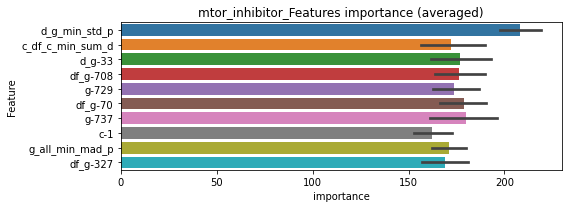

len(train_index) : 2752
len(valid_index) : 918
================================= fold 1/4 mtor_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000585963	valid_1's binary_logloss: 0.00335582
[2000]	training's binary_logloss: 0.000331977	valid_1's binary_logloss: 0.00296138
Early stopping, best iteration is:
[2674]	training's binary_logloss: 0.000272582	valid_1's binary_logloss: 0.00286225


len(train_index) : 2752
len(valid_index) : 918
================================= fold 2/4 mtor_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000604355	valid_1's binary_logloss: 0.00157042
Early stopping, best iteration is:
[1789]	training's binary_logloss: 0.000371659	valid_1's binary_logloss: 0.00122948


len(train_index) : 2753
len(valid_index) : 917
================================= fold 3/4 mtor_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000484503	valid_1's binary_logloss: 0.000699829
[2000]	training's binary_logloss: 0.000263214	valid_1's binary_logloss: 0.000380962
[3000]	training's binary_logloss: 0.00019216	valid_1's binary_logloss: 0.00027832
[4000]	training's binary_logloss: 0.000158784	valid_1's binary_logloss: 0.000230071
[5000]	training's binary_logloss: 0.00014184	valid_1's binary_logloss: 0.000205577
[6000]	training's binary_logloss: 0.000130923	valid_1's binary_logloss: 0.000189759
[7000]	training's binary_logloss: 0.000123363	valid_1's binary_logloss: 0.000178804
[8000]	training's binary_logloss: 0.000118185	valid_1's binary_logloss: 0.000171305
[9000]	training's binary_logloss: 0.000114511	valid_1's binary_logloss: 0.000165979
[10000]	training's binary_logloss: 0.000111877	valid_1's binary_logloss: 0.000162164
Did not meet early stopping. Best iteration is:
[9999]	training's binary_logloss: 0.000111877	valid_1

len(train_index) : 2753
len(valid_index) : 917
================================= fold 4/4 mtor_inhibitor=================================


Training until validation scores don't improve for 30 rounds


mtor_inhibitor logloss: 0.0026987081154385716


Early stopping, best iteration is:
[521]	training's binary_logloss: 0.00113518	valid_1's binary_logloss: 0.0065398
neg labels: 3289 → selected neg labels: 3288


mucolytic_agent, len(trt): 48, len(othr): 3288
target_rate: 0.0020156 → Adj_target_rate: 0.0022556
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00424196	valid_1's binary_logloss: 0.015006
[600]	training's binary_logloss: 0.000785889	valid_1's binary_logloss: 0.00631682
Early stopping, best iteration is:
[830]	training's binary_logloss: 0.000562459	valid_1's binary_logloss: 0.00549693
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00412927	valid_1's binary_logloss: 0.0188945
[600]	training's binary_logloss: 0.000787169	valid_1's binary_logloss: 0.010427
Early stopping, best iteration is:
[761]	training's binary_logloss: 0.000580174	valid_1's binary_logloss: 0.00979564
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00427194	valid_1's binary_logloss: 0.016432
[600]	training's binary_logloss: 0.000800114	valid_1's binary_logloss: 0.00793391
Early stopping, best iteration is:
[786]	training's binary_logloss: 0.000585587	valid_1's binary_logl

1 / 3 AUC score:1.000
y_Threshold: 0.0050093, Threshold: 0.0870997, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00202
Num_p_label: 40.0, conf_0:0.06097, conf_1:0.11323
Num_p_label: 40.0, Expected: 8.0, Adj_threshold_1: 0.0870997
Num_p_label: 30.0, Expected: 8.0, Adj_threshold_2: 0.1170997
Num_p_label: 21.0, Expected: 8.0, Adj_threshold_3: 0.1470997
Num_p_label: 17.0, Expected: 8.0, Adj_threshold_4: 0.1770997
threshold: 0.1770997, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00393171	valid_1's binary_logloss: 0.0130726
[600]	training's binary_logloss: 0.000754165	valid_1's binary_logloss: 0.0053014
Early stopping, best iteration is:
[845]	training's binary_logloss: 0.000543138	valid_1's binary_logloss: 0.00463642
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0037105	valid_1's binary_logloss: 0.0177997
[600]	training's binary_logloss: 0.000736795	valid_1's binary_logloss: 0.0104254
Early stopping, best iteration is:
[747]	training's binary_logloss: 0.000568216	valid_1's binary_logloss: 0.00990532
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00407276	valid_1's binary_logloss: 0.0159494
[600]	training's binary_logloss: 0.000765228	valid_1's binary_logloss: 0.0072566
Early stopping, best iteration is:
[766]	training's binary_logloss: 0.000574687	valid_1's binary_logl

2 / 3 AUC score:1.000
y_Threshold: 0.1147976, Threshold: 0.1770997, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3811
p_label_rate: 0.0195881 Vs.target_rate: 0.00202
Num_p_label: 78.0, conf_0:0.14168, conf_1:0.21252
Num_p_label: 78.0, Expected: 8.0, Adj_threshold_1: 0.1770997
Num_p_label: 69.0, Expected: 8.0, Adj_threshold_2: 0.2070997
Num_p_label: 60.0, Expected: 8.0, Adj_threshold_3: 0.2370997
Num_p_label: 57.0, Expected: 8.0, Adj_threshold_4: 0.2670997
Num_p_label: 53.0, Expected: 8.0, Adj_threshold_5: 0.2970997
Num_p_label: 49.0, Expected: 8.0, Adj_threshold_6: 0.3270997
Num_p_label: 45.0, Expected: 8.0, Adj_threshold_7: 0.3570997
Num_p_label: 39.0, Expected: 8.0, Adj_threshold_8: 0.3870997
Num_p_label: 35.0, Expected: 8.0, Adj_threshold_9: 0.4170997
Num_p_label: 32.0, Expected: 8.0, Adj_threshold_10: 0.4470997
threshold: 0.4770997, positive_p_label: 31.0/3982, p_label_rate: 0.0077850
positive_y_label: 656.0/3811, y_label_rate: 0.1721333
===========

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00382898	valid_1's binary_logloss: 0.0161019
[600]	training's binary_logloss: 0.000744834	valid_1's binary_logloss: 0.00745951
Early stopping, best iteration is:
[786]	training's binary_logloss: 0.000552015	valid_1's binary_logloss: 0.0066692
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00389116	valid_1's binary_logloss: 0.0120671
[600]	training's binary_logloss: 0.000758764	valid_1's binary_logloss: 0.00434514
Early stopping, best iteration is:
[821]	training's binary_logloss: 0.000550772	valid_1's binary_logloss: 0.00366151
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00382185	valid_1's binary_logloss: 0.0115543
[600]	training's binary_logloss: 0.000749293	valid_1's binary_logloss: 0.00411769
Early stopping, best iteration is:
[772]	training's binary_logloss: 0.000564012	valid_1's binary_l

3 / 3 AUC score:1.000
y_Threshold: 0.1220234, Threshold: 0.4770997, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3811
p_label_rate: 0.0082873 Vs.target_rate: 0.00202
Num_p_label: 33.0, conf_0:0.42939, conf_1:0.52481
Num_p_label: 33.0, Expected: 8.0, Adj_threshold_1: 0.4770997
Num_p_label: 31.0, Expected: 8.0, Adj_threshold_2: 0.5070997
Num_p_label: 30.0, Expected: 8.0, Adj_threshold_3: 0.5370997
Num_p_label: 24.0, Expected: 8.0, Adj_threshold_4: 0.5670997
Num_p_label: 21.0, Expected: 8.0, Adj_threshold_5: 0.5970997
Num_p_label: 20.0, Expected: 8.0, Adj_threshold_6: 0.6270997
threshold: 0.6270997, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 656.0/3811, y_label_rate: 0.1721333


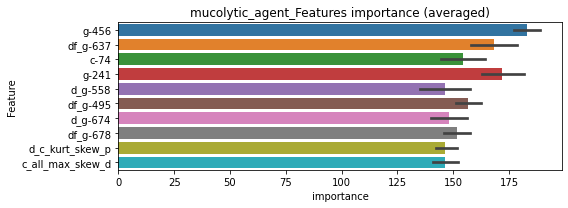

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 mucolytic_agent=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000514585	valid_1's binary_logloss: 0.00260721
Early stopping, best iteration is:
[1158]	training's binary_logloss: 0.000453585	valid_1's binary_logloss: 0.00248817


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 mucolytic_agent=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000504777	valid_1's binary_logloss: 0.000514018
[2000]	training's binary_logloss: 0.000296097	valid_1's binary_logloss: 0.000283285
[3000]	training's binary_logloss: 0.000232494	valid_1's binary_logloss: 0.000211148
[4000]	training's binary_logloss: 0.000202318	valid_1's binary_logloss: 0.000176398
[5000]	training's binary_logloss: 0.000186769	valid_1's binary_logloss: 0.000158459
[6000]	training's binary_logloss: 0.000176633	valid_1's binary_logloss: 0.000146746
[7000]	training's binary_logloss: 0.00016956	valid_1's binary_logloss: 0.000138471
[8000]	training's binary_logloss: 0.000164743	valid_1's binary_logloss: 0.000132672
Early stopping, best iteration is:
[8475]	training's binary_logloss: 0.000162799	valid_1's binary_logloss: 0.000130357


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 mucolytic_agent=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000512379	valid_1's binary_logloss: 0.000757131
[2000]	training's binary_logloss: 0.000299917	valid_1's binary_logloss: 0.000481317
[3000]	training's binary_logloss: 0.000237732	valid_1's binary_logloss: 0.000392232
[4000]	training's binary_logloss: 0.000207037	valid_1's binary_logloss: 0.000348075
[5000]	training's binary_logloss: 0.000191781	valid_1's binary_logloss: 0.000325852
[6000]	training's binary_logloss: 0.00018238	valid_1's binary_logloss: 0.000312961
Early stopping, best iteration is:
[6500]	training's binary_logloss: 0.000179034	valid_1's binary_logloss: 0.000307939


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 mucolytic_agent=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000432705	valid_1's binary_logloss: 0.000664152
[2000]	training's binary_logloss: 0.000245331	valid_1's binary_logloss: 0.000377928
[3000]	training's binary_logloss: 0.000181663	valid_1's binary_logloss: 0.000280191
[4000]	training's binary_logloss: 0.000151165	valid_1's binary_logloss: 0.000233308
[5000]	training's binary_logloss: 0.000135471	valid_1's binary_logloss: 0.000209157
[6000]	training's binary_logloss: 0.000125359	valid_1's binary_logloss: 0.000193578
[7000]	training's binary_logloss: 0.000118325	valid_1's binary_logloss: 0.000182737
[8000]	training's binary_logloss: 0.00011348	valid_1's binary_logloss: 0.000175267
[9000]	training's binary_logloss: 0.000110031	valid_1's binary_logloss: 0.00016994
[10000]	training's binary_logloss: 0.000107582	valid_1's binary_logloss: 0.00016618
Did not meet early stopping. Best iteration is:
[9999]	training's binary_logloss: 0.000107582	valid_1

mucolytic_agent logloss: 0.0007733242162220008


neg labels: 3289 → selected neg labels: 3281


neuropeptide_receptor_antagonist, len(trt): 37, len(othr): 3281
target_rate: 0.0015537 → Adj_target_rate: 0.0018079
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0025082	valid_1's binary_logloss: 0.0164748
[600]	training's binary_logloss: 0.00056758	valid_1's binary_logloss: 0.0117908
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000573424	valid_1's binary_logloss: 0.0117547
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00280008	valid_1's binary_logloss: 0.0103762
[600]	training's binary_logloss: 0.000606914	valid_1's binary_logloss: 0.00529108
Early stopping, best iteration is:
[705]	training's binary_logloss: 0.000519976	valid_1's binary_logloss: 0.00513863
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00281463	valid_1's binary_logloss: 0.0115415
[600]	training's binary_logloss: 0.000608975	valid_1's binary_logloss: 0.00805636
Early stopping, best iteration is:
[580]	training's binary_logloss: 0.000636332	valid_1's binary_logl

1 / 3 AUC score:1.000
y_Threshold: 0.0037276, Threshold: 0.0158620, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00155
Num_p_label: 40.0, conf_0:0.01110, conf_1:0.02062
Num_p_label: 40.0, Expected: 6.2, Adj_threshold_1: 0.0158620
Num_p_label: 10.0, Expected: 6.2, Adj_threshold_2: 0.0458620
threshold: 0.0458620, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00237435	valid_1's binary_logloss: 0.0150864
[600]	training's binary_logloss: 0.000550522	valid_1's binary_logloss: 0.0113972
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000565846	valid_1's binary_logloss: 0.0113523
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00254503	valid_1's binary_logloss: 0.0102163
[600]	training's binary_logloss: 0.000568906	valid_1's binary_logloss: 0.00535267
Early stopping, best iteration is:
[690]	training's binary_logloss: 0.000505573	valid_1's binary_logloss: 0.00519534
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00260334	valid_1's binary_logloss: 0.0119965
[600]	training's binary_logloss: 0.000579496	valid_1's binary_logloss: 0.0084738
Early stopping, best iteration is:
[612]	training's binary_logloss: 0.000564475	valid_1's binary_log

2 / 3 AUC score:1.000
y_Threshold: 0.0230173, Threshold: 0.0458620, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3805
p_label_rate: 0.0072828 Vs.target_rate: 0.00155
Num_p_label: 29.0, conf_0:0.03669, conf_1:0.05503
Num_p_label: 29.0, Expected: 6.2, Adj_threshold_1: 0.0458620
Num_p_label: 18.0, Expected: 6.2, Adj_threshold_2: 0.0758620
Num_p_label: 11.0, Expected: 6.2, Adj_threshold_3: 0.1058620
threshold: 0.1058620, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00237435	valid_1's binary_logloss: 0.0150864
[600]	training's binary_logloss: 0.000550522	valid_1's binary_logloss: 0.0113972
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000565846	valid_1's binary_logloss: 0.0113523
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00254503	valid_1's binary_logloss: 0.0102163
[600]	training's binary_logloss: 0.000568906	valid_1's binary_logloss: 0.00535267
Early stopping, best iteration is:
[690]	training's binary_logloss: 0.000505573	valid_1's binary_logloss: 0.00519534
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00260334	valid_1's binary_logloss: 0.0119965
[600]	training's binary_logloss: 0.000579496	valid_1's binary_logloss: 0.0084738
Early stopping, best iteration is:
[612]	training's binary_logloss: 0.000564475	valid_1's binary_log

3 / 3 AUC score:1.000
y_Threshold: 0.0230173, Threshold: 0.1058620, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3805
p_label_rate: 0.0027624 Vs.target_rate: 0.00155
Num_p_label: 11.0, conf_0:0.09528, conf_1:0.11645
Num_p_label: 11.0, Expected: 6.2, Adj_threshold_1: 0.1058620
threshold: 0.1058620, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 656.0/3805, y_label_rate: 0.1724047


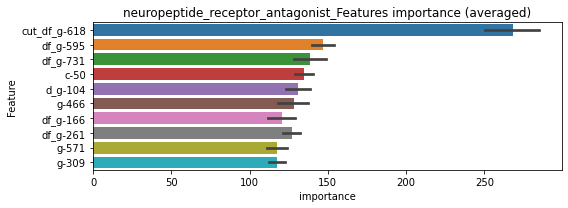

len(train_index) : 2853
len(valid_index) : 952
================================= fold 1/4 neuropeptide_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000490541	valid_1's binary_logloss: 0.00305802
Early stopping, best iteration is:
[1805]	training's binary_logloss: 0.000308127	valid_1's binary_logloss: 0.00284001


len(train_index) : 2854
len(valid_index) : 951
================================= fold 2/4 neuropeptide_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2854
len(valid_index) : 951
================================= fold 3/4 neuropeptide_receptor_antagonist=================================


Early stopping, best iteration is:
[762]	training's binary_logloss: 0.000691869	valid_1's binary_logloss: 0.0047023
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000513496	valid_1's binary_logloss: 0.00314324
Early stopping, best iteration is:
[1667]	training's binary_logloss: 0.000337987	valid_1's binary_logloss: 0.00295687


len(train_index) : 2854
len(valid_index) : 951
================================= fold 4/4 neuropeptide_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


neuropeptide_receptor_antagonist logloss: 0.004057388036963423


Early stopping, best iteration is:
[504]	training's binary_logloss: 0.000979474	valid_1's binary_logloss: 0.00573016
neg labels: 3289 → selected neg labels: 3173


nfkb_inhibitor, len(trt): 832, len(othr): 3173
target_rate: 0.0349374 → Adj_target_rate: 0.0254860
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[12]	training's binary_logloss: 0.476371	valid_1's binary_logloss: 0.508842
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[40]	training's binary_logloss: 0.404199	valid_1's binary_logloss: 0.507602
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[15]	training's binary_logloss: 0.469624	valid_1's binary_logloss: 0.508071
Training until validation scores don't improve for 30 rounds


1 / 3 AUC score:0.531
y_Threshold: 0.2173324, Threshold: 0.4233763, pos_neg_ratio: 0.7377876
Remove_noisy_data: 1370 → Positive_corect_labels: 256/2635
p_label_rate: 0.0100452 Vs.target_rate: 0.03494
Num_p_label: 40.0, conf_0:0.29636, conf_1:0.55039
Num_p_label: 40.0, Expected: 139.1, Adj_threshold_1: 0.4233763
Num_p_label: 109.0, Expected: 139.1, Adj_threshold_2: 0.3933763
Num_p_label: 134.0, Expected: 139.1, Adj_threshold_3: 0.3633763
Num_p_label: 139.0, Expected: 139.1, Adj_threshold_4: 0.3333763
Num_p_label: 150.0, Expected: 139.1, Adj_threshold_5: 0.3033763
Num_p_label: 179.0, Expected: 139.1, Adj_threshold_6: 0.2733763
Num_p_label: 318.0, Expected: 139.1, Adj_threshold_7: 0.2433763
threshold: 0.2433763, positive_p_label: 318.0/3982, p_label_rate: 0.0798594
positive_y_label: 256.0/2635, y_label_rate: 0.0971537
================= Pseudo labeling 2 / 3 =================


Early stopping, best iteration is:
[36]	training's binary_logloss: 0.419941	valid_1's binary_logloss: 0.50916
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[108]	training's binary_logloss: 0.0731616	valid_1's binary_logloss: 0.257936
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[60]	training's binary_logloss: 0.129814	valid_1's binary_logloss: 0.266949
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[95]	training's binary_logloss: 0.0851635	valid_1's binary_logloss: 0.240465
Training until validation scores don't improve for 30 rounds


2 / 3 AUC score:0.790
y_Threshold: 0.1265135, Threshold: 0.2433763, pos_neg_ratio: 0.7377876
Remove_noisy_data: 278 → Positive_corect_labels: 117.0/2357
p_label_rate: 0.0878955 Vs.target_rate: 0.03494
Num_p_label: 350.0, conf_0:0.19470, conf_1:0.29205
Num_p_label: 350.0, Expected: 139.1, Adj_threshold_1: 0.2433763
Num_p_label: 317.0, Expected: 139.1, Adj_threshold_2: 0.2733763
Num_p_label: 288.0, Expected: 139.1, Adj_threshold_3: 0.3033763
Num_p_label: 265.0, Expected: 139.1, Adj_threshold_4: 0.3333763
Num_p_label: 251.0, Expected: 139.1, Adj_threshold_5: 0.3633763
Num_p_label: 238.0, Expected: 139.1, Adj_threshold_6: 0.3933763
Num_p_label: 224.0, Expected: 139.1, Adj_threshold_7: 0.4233763
Num_p_label: 210.0, Expected: 139.1, Adj_threshold_8: 0.4533763
Num_p_label: 197.0, Expected: 139.1, Adj_threshold_9: 0.4833763
Num_p_label: 189.0, Expected: 139.1, Adj_threshold_10: 0.5133763
threshold: 0.5433763, positive_p_label: 183.0/3982, p_label_rate: 0.0459568


Early stopping, best iteration is:
[84]	training's binary_logloss: 0.0971877	valid_1's binary_logloss: 0.252226


positive_y_label: 117.0/2357, y_label_rate: 0.0496394
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[89]	training's binary_logloss: 0.0206049	valid_1's binary_logloss: 0.098552
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[131]	training's binary_logloss: 0.0115702	valid_1's binary_logloss: 0.0593963
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0018377	valid_1's binary_logloss: 0.0470387
Early stopping, best iteration is:
[289]	training's binary_logloss: 0.00199893	valid_1's binary_logloss: 0.046391
Training until validation scores don't improve for 30 rounds


3 / 3 AUC score:0.972
y_Threshold: 0.0736280, Threshold: 0.5433763, pos_neg_ratio: 0.7377876
Remove_noisy_data: 62 → Positive_corect_labels: 86.0/2295
p_label_rate: 0.0735811 Vs.target_rate: 0.03494
Num_p_label: 293.0, conf_0:0.48904, conf_1:0.59771
Num_p_label: 293.0, Expected: 139.1, Adj_threshold_1: 0.5433763
Num_p_label: 288.0, Expected: 139.1, Adj_threshold_2: 0.5733763
Num_p_label: 272.0, Expected: 139.1, Adj_threshold_3: 0.6033763
Num_p_label: 264.0, Expected: 139.1, Adj_threshold_4: 0.6333763
Num_p_label: 262.0, Expected: 139.1, Adj_threshold_5: 0.6633763
Num_p_label: 256.0, Expected: 139.1, Adj_threshold_6: 0.6933763
Num_p_label: 249.0, Expected: 139.1, Adj_threshold_7: 0.7233763
Num_p_label: 238.0, Expected: 139.1, Adj_threshold_8: 0.7533763
Num_p_label: 234.0, Expected: 139.1, Adj_threshold_9: 0.7833763
threshold: 0.7833763, positive_p_label: 234.0/3982, p_label_rate: 0.0587644


Early stopping, best iteration is:
[93]	training's binary_logloss: 0.0201955	valid_1's binary_logloss: 0.100648


positive_y_label: 86.0/2295, y_label_rate: 0.0374728


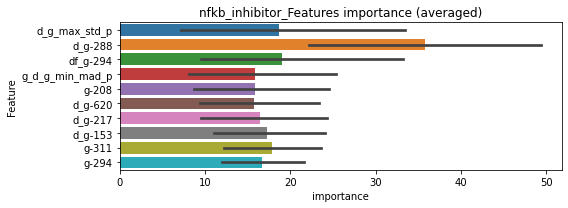

len(train_index) : 1721
len(valid_index) : 574
================================= fold 1/4 nfkb_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000625657	valid_1's binary_logloss: 0.00126617
[2000]	training's binary_logloss: 0.000374836	valid_1's binary_logloss: 0.000861154
[3000]	training's binary_logloss: 0.000297137	valid_1's binary_logloss: 0.000730448
[4000]	training's binary_logloss: 0.000262973	valid_1's binary_logloss: 0.000664348
Early stopping, best iteration is:
[4929]	training's binary_logloss: 0.00024565	valid_1's binary_logloss: 0.000626568


len(train_index) : 1721
len(valid_index) : 574
================================= fold 2/4 nfkb_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 1721
len(valid_index) : 574
================================= fold 3/4 nfkb_inhibitor=================================


Early stopping, best iteration is:
[479]	training's binary_logloss: 0.00113243	valid_1's binary_logloss: 0.0114167
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00054139	valid_1's binary_logloss: 0.000870246
[2000]	training's binary_logloss: 0.00032314	valid_1's binary_logloss: 0.000591923
[3000]	training's binary_logloss: 0.000260763	valid_1's binary_logloss: 0.000489613
[4000]	training's binary_logloss: 0.000229127	valid_1's binary_logloss: 0.000432106
[5000]	training's binary_logloss: 0.00021093	valid_1's binary_logloss: 0.00039829
[6000]	training's binary_logloss: 0.000198507	valid_1's binary_logloss: 0.000375046
[7000]	training's binary_logloss: 0.000189372	valid_1's binary_logloss: 0.000357807
Early stopping, best iteration is:
[7939]	training's binary_logloss: 0.000183231	valid_1's binary_logloss: 0.000346057


len(train_index) : 1722
len(valid_index) : 573
================================= fold 4/4 nfkb_inhibitor=================================


Training until validation scores don't improve for 30 rounds


nfkb_inhibitor logloss: 0.00821492741084531


Early stopping, best iteration is:
[307]	training's binary_logloss: 0.00204045	valid_1's binary_logloss: 0.0204917
neg labels: 3289 → selected neg labels: 3289


nicotinic_receptor_agonist, len(trt): 12, len(othr): 3289
target_rate: 0.0005039 → Adj_target_rate: 0.0006942
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000829001	valid_1's binary_logloss: 0.00299426
Early stopping, best iteration is:
[514]	training's binary_logloss: 0.000310312	valid_1's binary_logloss: 0.00179046
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000826048	valid_1's binary_logloss: 0.00180907
[600]	training's binary_logloss: 0.000298091	valid_1's binary_logloss: 0.00109667
Early stopping, best iteration is:
[576]	training's binary_logloss: 0.000298871	valid_1's binary_logloss: 0.00109502
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000858912	valid_1's binary_logloss: 0.0011605
Early stopping, best iteration is:
[541]	training's binary_logloss: 0.000307395	valid_1's binary_logloss: 0.000449094
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000839958	valid_1's binary_logloss: 0.0025

1 / 3 AUC score:1.000
y_Threshold: 0.0012579, Threshold: 0.0037535, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00050
Num_p_label: 40.0, conf_0:0.00263, conf_1:0.00488
Num_p_label: 40.0, Expected: 2.0, Adj_threshold_1: 0.0037535
Num_p_label: 1.0, Expected: 2.0, Adj_threshold_2: 0.0337535
threshold: 0.0337535, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


[600]	training's binary_logloss: 0.000300672	valid_1's binary_logloss: 0.00151294
Early stopping, best iteration is:
[579]	training's binary_logloss: 0.000300672	valid_1's binary_logloss: 0.00151294


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000774758	valid_1's binary_logloss: 0.00248369
Early stopping, best iteration is:
[524]	training's binary_logloss: 0.000296587	valid_1's binary_logloss: 0.00153841
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000782717	valid_1's binary_logloss: 0.00455558
Early stopping, best iteration is:
[478]	training's binary_logloss: 0.000309188	valid_1's binary_logloss: 0.00383699
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000796962	valid_1's binary_logloss: 0.00107342
Early stopping, best iteration is:
[522]	training's binary_logloss: 0.000295985	valid_1's binary_logloss: 0.000426608
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00077974	valid_1's binary_logloss: 0.0023117


2 / 3 AUC score:1.000
y_Threshold: 0.0598600, Threshold: 0.0337535, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0020090 Vs.target_rate: 0.00050
Num_p_label: 8.0, conf_0:0.02700, conf_1:0.04050
Num_p_label: 8.0, Expected: 2.0, Adj_threshold_1: 0.0337535
Num_p_label: 5.0, Expected: 2.0, Adj_threshold_2: 0.0637535
threshold: 0.0637535, positive_p_label: 5.0/3982, p_label_rate: 0.0012557


Early stopping, best iteration is:
[530]	training's binary_logloss: 0.000296895	valid_1's binary_logloss: 0.00144727


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000774758	valid_1's binary_logloss: 0.00248369
Early stopping, best iteration is:
[524]	training's binary_logloss: 0.000296587	valid_1's binary_logloss: 0.00153841
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000782717	valid_1's binary_logloss: 0.00455558
Early stopping, best iteration is:
[478]	training's binary_logloss: 0.000309188	valid_1's binary_logloss: 0.00383699
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000796962	valid_1's binary_logloss: 0.00107342
Early stopping, best iteration is:
[522]	training's binary_logloss: 0.000295985	valid_1's binary_logloss: 0.000426608
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00077974	valid_1's binary_logloss: 0.0023117


3 / 3 AUC score:1.000
y_Threshold: 0.0598600, Threshold: 0.0637535, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0012557 Vs.target_rate: 0.00050
Num_p_label: 5.0, conf_0:0.05738, conf_1:0.07013
Num_p_label: 5.0, Expected: 2.0, Adj_threshold_1: 0.0637535


Early stopping, best iteration is:
[530]	training's binary_logloss: 0.000296895	valid_1's binary_logloss: 0.00144727


threshold: 0.0637535, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


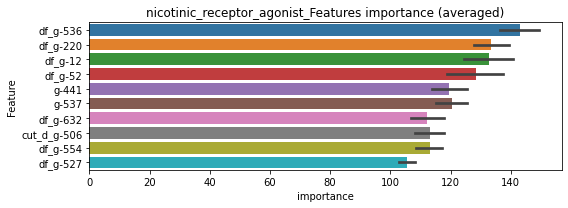

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 nicotinic_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00040399	valid_1's binary_logloss: 0.00148897
Early stopping, best iteration is:
[1506]	training's binary_logloss: 0.000294647	valid_1's binary_logloss: 0.00135439


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 nicotinic_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000414277	valid_1's binary_logloss: 0.00195998
Early stopping, best iteration is:
[1226]	training's binary_logloss: 0.000353059	valid_1's binary_logloss: 0.0018856


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 nicotinic_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000384385	valid_1's binary_logloss: 0.000467261
[2000]	training's binary_logloss: 0.000246149	valid_1's binary_logloss: 0.000312323
[3000]	training's binary_logloss: 0.000202781	valid_1's binary_logloss: 0.000262503
[4000]	training's binary_logloss: 0.000179411	valid_1's binary_logloss: 0.000234694
[5000]	training's binary_logloss: 0.000166476	valid_1's binary_logloss: 0.000219746
[6000]	training's binary_logloss: 0.000157899	valid_1's binary_logloss: 0.000209918
[7000]	training's binary_logloss: 0.000151683	valid_1's binary_logloss: 0.000202712
[8000]	training's binary_logloss: 0.000147332	valid_1's binary_logloss: 0.000197561
[9000]	training's binary_logloss: 0.000144176	valid_1's binary_logloss: 0.000193731
Early stopping, best iteration is:
[9578]	training's binary_logloss: 0.000142728	valid_1's binary_logloss: 0.000191997


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 nicotinic_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000403737	valid_1's binary_logloss: 0.00151409
[2000]	training's binary_logloss: 0.000251223	valid_1's binary_logloss: 0.00133935
Early stopping, best iteration is:
[2167]	training's binary_logloss: 0.000242721	valid_1's binary_logloss: 0.00133166


nicotinic_receptor_agonist logloss: 0.0011911181325649364


neg labels: 3289 → selected neg labels: 3285


nitric_oxide_donor, len(trt): 26, len(othr): 3285
target_rate: 0.0010918 → Adj_target_rate: 0.0013394
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00186554	valid_1's binary_logloss: 0.0112756
[600]	training's binary_logloss: 0.000455085	valid_1's binary_logloss: 0.00793291
Early stopping, best iteration is:
[627]	training's binary_logloss: 0.000446649	valid_1's binary_logloss: 0.00792758
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00195974	valid_1's binary_logloss: 0.0066968
[600]	training's binary_logloss: 0.000451974	valid_1's binary_logloss: 0.00354245
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000451974	valid_1's binary_logloss: 0.00354245
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0020104	valid_1's binary_logloss: 0.00519222
[600]	training's binary_logloss: 0.000468839	valid_1's binary_logloss: 0.00216632
Early stopping, best iteration is:
[636]	training's binary_logloss: 0.000454553	valid_1's binary_

1 / 3 AUC score:1.000
y_Threshold: 0.0032502, Threshold: 0.0498445, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00109
Num_p_label: 40.0, conf_0:0.03489, conf_1:0.06480
Num_p_label: 40.0, Expected: 4.3, Adj_threshold_1: 0.0498445
Num_p_label: 27.0, Expected: 4.3, Adj_threshold_2: 0.0798445
Num_p_label: 19.0, Expected: 4.3, Adj_threshold_3: 0.1098445
Num_p_label: 14.0, Expected: 4.3, Adj_threshold_4: 0.1398445
Num_p_label: 13.0, Expected: 4.3, Adj_threshold_5: 0.1698445
Num_p_label: 11.0, Expected: 4.3, Adj_threshold_6: 0.1998445
Num_p_label: 10.0, Expected: 4.3, Adj_threshold_7: 0.2298445
threshold: 0.2298445, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00169651	valid_1's binary_logloss: 0.00896205
[600]	training's binary_logloss: 0.000437275	valid_1's binary_logloss: 0.00670947
Early stopping, best iteration is:
[577]	training's binary_logloss: 0.000444611	valid_1's binary_logloss: 0.00669749
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00171826	valid_1's binary_logloss: 0.00624197
Early stopping, best iteration is:
[557]	training's binary_logloss: 0.000449251	valid_1's binary_logloss: 0.00342046
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00175491	valid_1's binary_logloss: 0.00480282
[600]	training's binary_logloss: 0.000438774	valid_1's binary_logloss: 0.00228583
Early stopping, best iteration is:
[585]	training's binary_logloss: 0.000439368	valid_1's binary_logloss: 0.00228478
Training until validation scores don't improve for 30 round

2 / 3 AUC score:1.000
y_Threshold: 0.0780259, Threshold: 0.2298445, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0085384 Vs.target_rate: 0.00109
Num_p_label: 34.0, conf_0:0.18388, conf_1:0.27581
Num_p_label: 34.0, Expected: 4.3, Adj_threshold_1: 0.2298445
Num_p_label: 29.0, Expected: 4.3, Adj_threshold_2: 0.2598445
Num_p_label: 27.0, Expected: 4.3, Adj_threshold_3: 0.2898445
Num_p_label: 21.0, Expected: 4.3, Adj_threshold_4: 0.3198445
Num_p_label: 19.0, Expected: 4.3, Adj_threshold_5: 0.3498445
Num_p_label: 19.0, Expected: 4.3, Adj_threshold_6: 0.3798445
Num_p_label: 17.0, Expected: 4.3, Adj_threshold_7: 0.4098445
Num_p_label: 17.0, Expected: 4.3, Adj_threshold_8: 0.4398445
Num_p_label: 16.0, Expected: 4.3, Adj_threshold_9: 0.4698445
Num_p_label: 12.0, Expected: 4.3, Adj_threshold_10: 0.4998445
threshold: 0.5298445, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
===========

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00169983	valid_1's binary_logloss: 0.00614675
Early stopping, best iteration is:
[551]	training's binary_logloss: 0.00045492	valid_1's binary_logloss: 0.00414163
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00170959	valid_1's binary_logloss: 0.00332045
[600]	training's binary_logloss: 0.000435555	valid_1's binary_logloss: 0.00114949
Early stopping, best iteration is:
[592]	training's binary_logloss: 0.000435555	valid_1's binary_logloss: 0.00114949
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00173466	valid_1's binary_logloss: 0.00523141
[600]	training's binary_logloss: 0.00043257	valid_1's binary_logloss: 0.00268733
Early stopping, best iteration is:
[605]	training's binary_logloss: 0.000432076	valid_1's binary_logloss: 0.00268528
Training until validation scores don't improve for 30 rounds


3 / 3 AUC score:1.000
y_Threshold: 0.0351168, Threshold: 0.5298445, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0027624 Vs.target_rate: 0.00109


Early stopping, best iteration is:
[492]	training's binary_logloss: 0.00052702	valid_1's binary_logloss: 0.00581968


Num_p_label: 11.0, conf_0:0.47686, conf_1:0.58283
Num_p_label: 11.0, Expected: 4.3, Adj_threshold_1: 0.5298445
Num_p_label: 8.0, Expected: 4.3, Adj_threshold_2: 0.5598445
threshold: 0.5598445, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


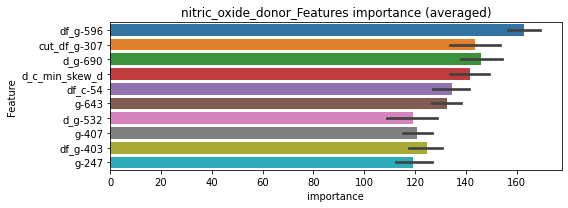

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 nitric_oxide_donor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000482783	valid_1's binary_logloss: 0.00258398
[2000]	training's binary_logloss: 0.000286375	valid_1's binary_logloss: 0.00225195
Early stopping, best iteration is:
[2008]	training's binary_logloss: 0.000285895	valid_1's binary_logloss: 0.00225057


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 nitric_oxide_donor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000495977	valid_1's binary_logloss: 0.000856156
[2000]	training's binary_logloss: 0.000281307	valid_1's binary_logloss: 0.000662177
[3000]	training's binary_logloss: 0.000217144	valid_1's binary_logloss: 0.00058475
[4000]	training's binary_logloss: 0.000188328	valid_1's binary_logloss: 0.000535892
[5000]	training's binary_logloss: 0.000172862	valid_1's binary_logloss: 0.00050278
[6000]	training's binary_logloss: 0.000162921	valid_1's binary_logloss: 0.000478516
Early stopping, best iteration is:
[6627]	training's binary_logloss: 0.000157923	valid_1's binary_logloss: 0.000465213


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 nitric_oxide_donor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000476903	valid_1's binary_logloss: 0.00312954
[2000]	training's binary_logloss: 0.000278524	valid_1's binary_logloss: 0.00284498
[3000]	training's binary_logloss: 0.000222353	valid_1's binary_logloss: 0.00275385
Early stopping, best iteration is:
[3268]	training's binary_logloss: 0.000213358	valid_1's binary_logloss: 0.00274133


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 nitric_oxide_donor=================================


Training until validation scores don't improve for 30 rounds


nitric_oxide_donor logloss: 0.0019922582489765766


Early stopping, best iteration is:
[660]	training's binary_logloss: 0.000694625	valid_1's binary_logloss: 0.00250922
neg labels: 3289 → selected neg labels: 3285


nitric_oxide_production_inhibitor, len(trt): 29, len(othr): 3285
target_rate: 0.0012178 → Adj_target_rate: 0.0014697
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00189679	valid_1's binary_logloss: 0.00938642
[600]	training's binary_logloss: 0.000448349	valid_1's binary_logloss: 0.00653431
Early stopping, best iteration is:
[574]	training's binary_logloss: 0.000464545	valid_1's binary_logloss: 0.0065146
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00187555	valid_1's binary_logloss: 0.0101464
[600]	training's binary_logloss: 0.000448188	valid_1's binary_logloss: 0.00621029
Early stopping, best iteration is:
[609]	training's binary_logloss: 0.000443769	valid_1's binary_logloss: 0.00618116
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00213639	valid_1's binary_logloss: 0.00513505
[600]	training's binary_logloss: 0.000467606	valid_1's binary_logloss: 0.00191508
Early stopping, best iteration is:
[615]	training's binary_logloss: 0.000460874	valid_1's binary

1 / 3 AUC score:1.000
y_Threshold: 0.0027516, Threshold: 0.0083106, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00122
Num_p_label: 40.0, conf_0:0.00582, conf_1:0.01080
Num_p_label: 40.0, Expected: 4.8, Adj_threshold_1: 0.0083106
Num_p_label: 4.0, Expected: 4.8, Adj_threshold_2: 0.0383106
threshold: 0.0383106, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00179162	valid_1's binary_logloss: 0.00736652
[600]	training's binary_logloss: 0.000434762	valid_1's binary_logloss: 0.00511141
Early stopping, best iteration is:
[574]	training's binary_logloss: 0.000451104	valid_1's binary_logloss: 0.00510933
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00180503	valid_1's binary_logloss: 0.00866186
[600]	training's binary_logloss: 0.000437633	valid_1's binary_logloss: 0.00460056
Early stopping, best iteration is:
[585]	training's binary_logloss: 0.000441362	valid_1's binary_logloss: 0.00459709
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00196965	valid_1's binary_logloss: 0.00386452
[600]	training's binary_logloss: 0.000450555	valid_1's binary_logloss: 0.00122636
Early stopping, best iteration is:
[646]	training's binary_logloss: 0.000433249	valid_1's bina

2 / 3 AUC score:1.000
y_Threshold: 0.0424521, Threshold: 0.0383106, pos_neg_ratio: 0.8000000


[600]	training's binary_logloss: 0.000449327	valid_1's binary_logloss: 0.00193895
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000450826	valid_1's binary_logloss: 0.00193113


Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0022602 Vs.target_rate: 0.00122
Num_p_label: 9.0, conf_0:0.03065, conf_1:0.04597
Num_p_label: 9.0, Expected: 4.8, Adj_threshold_1: 0.0383106
threshold: 0.0383106, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00179162	valid_1's binary_logloss: 0.00736652
[600]	training's binary_logloss: 0.000434762	valid_1's binary_logloss: 0.00511141
Early stopping, best iteration is:
[574]	training's binary_logloss: 0.000451104	valid_1's binary_logloss: 0.00510933
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00180503	valid_1's binary_logloss: 0.00866186
[600]	training's binary_logloss: 0.000437633	valid_1's binary_logloss: 0.00460056
Early stopping, best iteration is:
[585]	training's binary_logloss: 0.000441362	valid_1's binary_logloss: 0.00459709
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00196965	valid_1's binary_logloss: 0.00386452
[600]	training's binary_logloss: 0.000450555	valid_1's binary_logloss: 0.00122636
Early stopping, best iteration is:
[646]	training's binary_logloss: 0.000433249	valid_1's bina

3 / 3 AUC score:1.000
y_Threshold: 0.0424521, Threshold: 0.0383106, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0022602 Vs.target_rate: 0.00122
Num_p_label: 9.0, conf_0:0.03448, conf_1:0.04214
Num_p_label: 9.0, Expected: 4.8, Adj_threshold_1: 0.0383106
threshold: 0.0383106, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


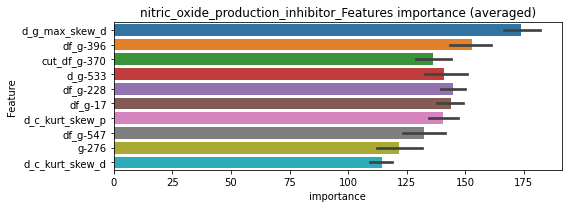

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 nitric_oxide_production_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000473333	valid_1's binary_logloss: 0.00454449
Early stopping, best iteration is:
[1080]	training's binary_logloss: 0.000443727	valid_1's binary_logloss: 0.0045055


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 nitric_oxide_production_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000476121	valid_1's binary_logloss: 0.00126951
Early stopping, best iteration is:
[1892]	training's binary_logloss: 0.000288541	valid_1's binary_logloss: 0.00104921


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 nitric_oxide_production_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000459766	valid_1's binary_logloss: 0.000462693
[2000]	training's binary_logloss: 0.000274208	valid_1's binary_logloss: 0.000261639
[3000]	training's binary_logloss: 0.00021553	valid_1's binary_logloss: 0.000197158
[4000]	training's binary_logloss: 0.000187983	valid_1's binary_logloss: 0.000166051
[5000]	training's binary_logloss: 0.000173387	valid_1's binary_logloss: 0.00014931
[6000]	training's binary_logloss: 0.000163639	valid_1's binary_logloss: 0.000138007
[7000]	training's binary_logloss: 0.000156313	valid_1's binary_logloss: 0.000129499
[8000]	training's binary_logloss: 0.000150875	valid_1's binary_logloss: 0.000123099
[9000]	training's binary_logloss: 0.000146778	valid_1's binary_logloss: 0.000118159
Early stopping, best iteration is:
[9193]	training's binary_logloss: 0.000146184	valid_1's binary_logloss: 0.000117412


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 nitric_oxide_production_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000500092	valid_1's binary_logloss: 0.000720209
[2000]	training's binary_logloss: 0.000288519	valid_1's binary_logloss: 0.000510256
[3000]	training's binary_logloss: 0.000226708	valid_1's binary_logloss: 0.00043765
[4000]	training's binary_logloss: 0.000200446	valid_1's binary_logloss: 0.000401552
[5000]	training's binary_logloss: 0.000187044	valid_1's binary_logloss: 0.000381693
Early stopping, best iteration is:
[5624]	training's binary_logloss: 0.00018076	valid_1's binary_logloss: 0.000371273


nitric_oxide_production_inhibitor logloss: 0.001511917191289266


neg labels: 3289 → selected neg labels: 3285


nitric_oxide_synthase_inhibitor, len(trt): 26, len(othr): 3285
target_rate: 0.0010918 → Adj_target_rate: 0.0013394
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00217821	valid_1's binary_logloss: 0.00686354
[600]	training's binary_logloss: 0.000503902	valid_1's binary_logloss: 0.00350099
Early stopping, best iteration is:
[583]	training's binary_logloss: 0.000514398	valid_1's binary_logloss: 0.00348898
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00208718	valid_1's binary_logloss: 0.0069359
[600]	training's binary_logloss: 0.000492375	valid_1's binary_logloss: 0.00303306
Early stopping, best iteration is:
[669]	training's binary_logloss: 0.000455935	valid_1's binary_logloss: 0.00291096
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00218466	valid_1's binary_logloss: 0.0047429
[600]	training's binary_logloss: 0.000496912	valid_1's binary_logloss: 0.00171511
Early stopping, best iteration is:
[651]	training's binary_logloss: 0.00047232	valid_1's binary_

1 / 3 AUC score:1.000
y_Threshold: 0.0029980, Threshold: 0.0251523, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00109
Num_p_label: 40.0, conf_0:0.01761, conf_1:0.03270
Num_p_label: 40.0, Expected: 4.3, Adj_threshold_1: 0.0251523
Num_p_label: 16.0, Expected: 4.3, Adj_threshold_2: 0.0551523
Num_p_label: 8.0, Expected: 4.3, Adj_threshold_3: 0.0851523
threshold: 0.0851523, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00188028	valid_1's binary_logloss: 0.00613476
[600]	training's binary_logloss: 0.000467298	valid_1's binary_logloss: 0.00331635
Early stopping, best iteration is:
[623]	training's binary_logloss: 0.00045467	valid_1's binary_logloss: 0.00327864
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0018591	valid_1's binary_logloss: 0.00547009
[600]	training's binary_logloss: 0.00046562	valid_1's binary_logloss: 0.00235062
Early stopping, best iteration is:
[682]	training's binary_logloss: 0.000438261	valid_1's binary_logloss: 0.0023028
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00192165	valid_1's binary_logloss: 0.00405352
[600]	training's binary_logloss: 0.000470839	valid_1's binary_logloss: 0.00148284
Early stopping, best iteration is:
[661]	training's binary_logloss: 0.000450839	valid_1's binary_l

2 / 3 AUC score:1.000
y_Threshold: 0.0718460, Threshold: 0.0851523, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0115520 Vs.target_rate: 0.00109
Num_p_label: 46.0, conf_0:0.06812, conf_1:0.10218
Num_p_label: 46.0, Expected: 4.3, Adj_threshold_1: 0.0851523
Num_p_label: 41.0, Expected: 4.3, Adj_threshold_2: 0.1151523
Num_p_label: 28.0, Expected: 4.3, Adj_threshold_3: 0.1451523
Num_p_label: 21.0, Expected: 4.3, Adj_threshold_4: 0.1751523
Num_p_label: 17.0, Expected: 4.3, Adj_threshold_5: 0.2051523
Num_p_label: 14.0, Expected: 4.3, Adj_threshold_6: 0.2351523
Num_p_label: 11.0, Expected: 4.3, Adj_threshold_7: 0.2651523
Num_p_label: 10.0, Expected: 4.3, Adj_threshold_8: 0.2951523
threshold: 0.2951523, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00188028	valid_1's binary_logloss: 0.00613476
[600]	training's binary_logloss: 0.000467298	valid_1's binary_logloss: 0.00331635
Early stopping, best iteration is:
[623]	training's binary_logloss: 0.00045467	valid_1's binary_logloss: 0.00327864
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0018591	valid_1's binary_logloss: 0.00547009
[600]	training's binary_logloss: 0.00046562	valid_1's binary_logloss: 0.00235062
Early stopping, best iteration is:
[681]	training's binary_logloss: 0.000438261	valid_1's binary_logloss: 0.0023028
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00192165	valid_1's binary_logloss: 0.00405352
[600]	training's binary_logloss: 0.000470839	valid_1's binary_logloss: 0.00148284
Early stopping, best iteration is:
[661]	training's binary_logloss: 0.000450839	valid_1's binary_l

3 / 3 AUC score:1.000
y_Threshold: 0.0718460, Threshold: 0.2951523, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0025113 Vs.target_rate: 0.00109
Num_p_label: 10.0, conf_0:0.26564, conf_1:0.32467
Num_p_label: 10.0, Expected: 4.3, Adj_threshold_1: 0.2951523
threshold: 0.2951523, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


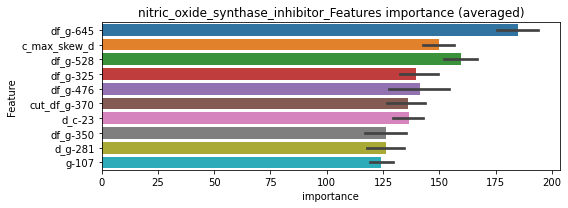

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 nitric_oxide_synthase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[959]	training's binary_logloss: 0.000509156	valid_1's binary_logloss: 0.00436994


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 nitric_oxide_synthase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000479215	valid_1's binary_logloss: 0.00118181
[2000]	training's binary_logloss: 0.000281979	valid_1's binary_logloss: 0.000900716
[3000]	training's binary_logloss: 0.000221353	valid_1's binary_logloss: 0.00078437
[4000]	training's binary_logloss: 0.000193502	valid_1's binary_logloss: 0.000714557
Early stopping, best iteration is:
[4221]	training's binary_logloss: 0.00018963	valid_1's binary_logloss: 0.000704024


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 nitric_oxide_synthase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000497802	valid_1's binary_logloss: 0.000812397
[2000]	training's binary_logloss: 0.000294818	valid_1's binary_logloss: 0.000603511
Early stopping, best iteration is:
[2366]	training's binary_logloss: 0.000268572	valid_1's binary_logloss: 0.000572885


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 nitric_oxide_synthase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000485229	valid_1's binary_logloss: 0.000843766
[2000]	training's binary_logloss: 0.000286724	valid_1's binary_logloss: 0.000641355
Early stopping, best iteration is:
[2054]	training's binary_logloss: 0.000282585	valid_1's binary_logloss: 0.000636522


nitric_oxide_synthase_inhibitor logloss: 0.0015715410416438842


neg labels: 3289 → selected neg labels: 3286


norepinephrine_reuptake_inhibitor, len(trt): 7, len(othr): 3286
target_rate: 0.0002939 → Adj_target_rate: 0.0004391
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000455525	valid_1's binary_logloss: 0.00285614
Early stopping, best iteration is:
[467]	training's binary_logloss: 0.000220743	valid_1's binary_logloss: 0.00232721
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000438407	valid_1's binary_logloss: 0.00386633
Early stopping, best iteration is:
[459]	training's binary_logloss: 0.000217651	valid_1's binary_logloss: 0.00328684
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000461913	valid_1's binary_logloss: 0.000571609
Early stopping, best iteration is:
[469]	training's binary_logloss: 0.000217021	valid_1's binary_logloss: 0.00028621
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000455067	valid_1's binary_logloss: 0.000619566


1 / 3 AUC score:1.000
y_Threshold: 0.0006509, Threshold: 0.0028222, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00029
Num_p_label: 40.0, conf_0:0.00198, conf_1:0.00367
Num_p_label: 40.0, Expected: 1.2, Adj_threshold_1: 0.0028222
Num_p_label: 3.0, Expected: 1.2, Adj_threshold_2: 0.0328222
Num_p_label: 1.0, Expected: 1.2, Adj_threshold_3: 0.0628222
threshold: 0.0628222, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[495]	training's binary_logloss: 0.000213503	valid_1's binary_logloss: 0.000320538


positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000422993	valid_1's binary_logloss: 0.00172937
Early stopping, best iteration is:
[479]	training's binary_logloss: 0.000206365	valid_1's binary_logloss: 0.00125007
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000409943	valid_1's binary_logloss: 0.00308246
Early stopping, best iteration is:
[470]	training's binary_logloss: 0.000205292	valid_1's binary_logloss: 0.00263902
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000436548	valid_1's binary_logloss: 0.000423513
Early stopping, best iteration is:
[459]	training's binary_logloss: 0.000208682	valid_1's binary_logloss: 0.000204864
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000420635	valid_1's binary_logloss: 0.000473122


2 / 3 AUC score:1.000
y_Threshold: 0.0291009, Threshold: 0.0628222, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0025113 Vs.target_rate: 0.00029
Num_p_label: 10.0, conf_0:0.05026, conf_1:0.07539
Num_p_label: 10.0, Expected: 1.2, Adj_threshold_1: 0.0628222
Num_p_label: 4.0, Expected: 1.2, Adj_threshold_2: 0.0928222
Num_p_label: 4.0, Expected: 1.2, Adj_threshold_3: 0.1228222
Num_p_label: 3.0, Expected: 1.2, Adj_threshold_4: 0.1528222


Early stopping, best iteration is:
[459]	training's binary_logloss: 0.000207603	valid_1's binary_logloss: 0.000234787


Num_p_label: 2.0, Expected: 1.2, Adj_threshold_5: 0.1828222
threshold: 0.1828222, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000422993	valid_1's binary_logloss: 0.00172937
Early stopping, best iteration is:
[479]	training's binary_logloss: 0.000206365	valid_1's binary_logloss: 0.00125007
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000409943	valid_1's binary_logloss: 0.00308246
Early stopping, best iteration is:
[470]	training's binary_logloss: 0.000205292	valid_1's binary_logloss: 0.00263902
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000436548	valid_1's binary_logloss: 0.000423513
Early stopping, best iteration is:
[459]	training's binary_logloss: 0.000208682	valid_1's binary_logloss: 0.000204864
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000420635	valid_1's binary_logloss: 0.000473122


3 / 3 AUC score:1.000
y_Threshold: 0.0291009, Threshold: 0.1828222, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0005023 Vs.target_rate: 0.00029
Num_p_label: 2.0, conf_0:0.16454, conf_1:0.20110
Num_p_label: 2.0, Expected: 1.2, Adj_threshold_1: 0.1828222
threshold: 0.1828222, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[475]	training's binary_logloss: 0.000207603	valid_1's binary_logloss: 0.000234787


positive_y_label: 657.0/3811, y_label_rate: 0.1723957


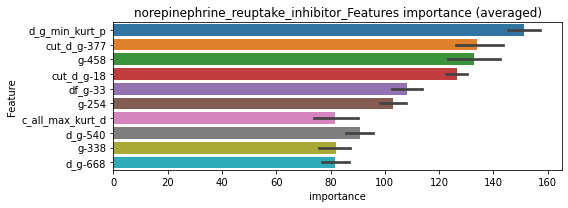

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 norepinephrine_reuptake_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000332389	valid_1's binary_logloss: 0.000456227
[2000]	training's binary_logloss: 0.000208395	valid_1's binary_logloss: 0.000315036
[3000]	training's binary_logloss: 0.000171982	valid_1's binary_logloss: 0.000270473
[4000]	training's binary_logloss: 0.000155559	valid_1's binary_logloss: 0.000251638
[5000]	training's binary_logloss: 0.000147695	valid_1's binary_logloss: 0.000244383
[6000]	training's binary_logloss: 0.000142477	valid_1's binary_logloss: 0.000239645
[7000]	training's binary_logloss: 0.000138501	valid_1's binary_logloss: 0.000236621
[8000]	training's binary_logloss: 0.000135389	valid_1's binary_logloss: 0.000233682
Early stopping, best iteration is:
[8826]	training's binary_logloss: 0.00013331	valid_1's binary_logloss: 0.00023096


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 norepinephrine_reuptake_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 norepinephrine_reuptake_inhibitor=================================


Early stopping, best iteration is:
[871]	training's binary_logloss: 0.000375451	valid_1's binary_logloss: 0.00320799
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00035352	valid_1's binary_logloss: 0.000391429
[2000]	training's binary_logloss: 0.000216975	valid_1's binary_logloss: 0.000265198
[3000]	training's binary_logloss: 0.000182155	valid_1's binary_logloss: 0.000229664
[4000]	training's binary_logloss: 0.000167743	valid_1's binary_logloss: 0.000214366
[5000]	training's binary_logloss: 0.000160065	valid_1's binary_logloss: 0.000206697
[6000]	training's binary_logloss: 0.000154746	valid_1's binary_logloss: 0.000201042
Early stopping, best iteration is:
[6933]	training's binary_logloss: 0.000151289	valid_1's binary_logloss: 0.000197334


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 norepinephrine_reuptake_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000330271	valid_1's binary_logloss: 0.000357307
[2000]	training's binary_logloss: 0.000207515	valid_1's binary_logloss: 0.000224428
[3000]	training's binary_logloss: 0.000176932	valid_1's binary_logloss: 0.000190418
[4000]	training's binary_logloss: 0.000159582	valid_1's binary_logloss: 0.000170779
[5000]	training's binary_logloss: 0.000149816	valid_1's binary_logloss: 0.000159697
[6000]	training's binary_logloss: 0.000142966	valid_1's binary_logloss: 0.000151896
[7000]	training's binary_logloss: 0.000138041	valid_1's binary_logloss: 0.000146224
[8000]	training's binary_logloss: 0.000134785	valid_1's binary_logloss: 0.000142317
Early stopping, best iteration is:
[8467]	training's binary_logloss: 0.000133656	valid_1's binary_logloss: 0.000140957


norepinephrine_reuptake_inhibitor logloss: 0.0009445266816256227


neg labels: 3289 → selected neg labels: 3287


nrf2_activator, len(trt): 18, len(othr): 3287
target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00113264	valid_1's binary_logloss: 0.0018623
[600]	training's binary_logloss: 0.000342846	valid_1's binary_logloss: 0.000672605
Early stopping, best iteration is:
[574]	training's binary_logloss: 0.000342846	valid_1's binary_logloss: 0.000672605
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00109128	valid_1's binary_logloss: 0.00319536
[600]	training's binary_logloss: 0.00033169	valid_1's binary_logloss: 0.00141664
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000331696	valid_1's binary_logloss: 0.00141663
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00113707	valid_1's binary_logloss: 0.00189946
[600]	training's binary_logloss: 0.000340658	valid_1's binary_logloss: 0.000633224
Early stopping, best iteration is:
[622]	training's binary_logloss: 0.000337197	valid_1's bin

1 / 3 AUC score:1.000
y_Threshold: 0.0021326, Threshold: 0.0091023, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, conf_0:0.00637, conf_1:0.01183
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_1: 0.0091023


[600]	training's binary_logloss: 0.000332077	valid_1's binary_logloss: 0.00105155
Early stopping, best iteration is:
[608]	training's binary_logloss: 0.000331063	valid_1's binary_logloss: 0.00105009


Num_p_label: 8.0, Expected: 3.0, Adj_threshold_2: 0.0391023
Num_p_label: 2.0, Expected: 3.0, Adj_threshold_3: 0.0691023
threshold: 0.0691023, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00101312	valid_1's binary_logloss: 0.0016961
[600]	training's binary_logloss: 0.000324162	valid_1's binary_logloss: 0.000595173
Early stopping, best iteration is:
[574]	training's binary_logloss: 0.000324162	valid_1's binary_logloss: 0.000595173
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000992501	valid_1's binary_logloss: 0.00267484
[600]	training's binary_logloss: 0.000314794	valid_1's binary_logloss: 0.00128348
Early stopping, best iteration is:
[622]	training's binary_logloss: 0.000313752	valid_1's binary_logloss: 0.00128189
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00101823	valid_1's binary_logloss: 0.00140251
[600]	training's binary_logloss: 0.000319686	valid_1's binary_logloss: 0.000464819
Early stopping, best iteration is:
[667]	training's binary_logloss: 0.00031497	valid_1's bi

2 / 3 AUC score:1.000
y_Threshold: 0.1382798, Threshold: 0.0691023, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0047715 Vs.target_rate: 0.00076
Num_p_label: 19.0, conf_0:0.05528, conf_1:0.08292
Num_p_label: 19.0, Expected: 3.0, Adj_threshold_1: 0.0691023
Num_p_label: 15.0, Expected: 3.0, Adj_threshold_2: 0.0991023
Num_p_label: 12.0, Expected: 3.0, Adj_threshold_3: 0.1291023
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_4: 0.1591023


[600]	training's binary_logloss: 0.000314551	valid_1's binary_logloss: 0.000660899
Early stopping, best iteration is:
[595]	training's binary_logloss: 0.000314551	valid_1's binary_logloss: 0.000660899


threshold: 0.1591023, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00101312	valid_1's binary_logloss: 0.0016961
Early stopping, best iteration is:
[567]	training's binary_logloss: 0.000324162	valid_1's binary_logloss: 0.000595173
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000992501	valid_1's binary_logloss: 0.00267484
[600]	training's binary_logloss: 0.000314794	valid_1's binary_logloss: 0.00128348
Early stopping, best iteration is:
[622]	training's binary_logloss: 0.000313752	valid_1's binary_logloss: 0.00128189
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00101823	valid_1's binary_logloss: 0.00140251
[600]	training's binary_logloss: 0.000319686	valid_1's binary_logloss: 0.000464819
Early stopping, best iteration is:
[667]	training's binary_logloss: 0.00031497	valid_1's binary_logloss: 0.000457451
Training until validation scores don't improve for 30 rou

3 / 3 AUC score:1.000
y_Threshold: 0.1382798, Threshold: 0.1591023, pos_neg_ratio: 0.8000000


[600]	training's binary_logloss: 0.000314551	valid_1's binary_logloss: 0.000660899
Early stopping, best iteration is:
[595]	training's binary_logloss: 0.000314551	valid_1's binary_logloss: 0.000660899


Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0015068 Vs.target_rate: 0.00076
Num_p_label: 6.0, conf_0:0.14319, conf_1:0.17501
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_1: 0.1591023
threshold: 0.1591023, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


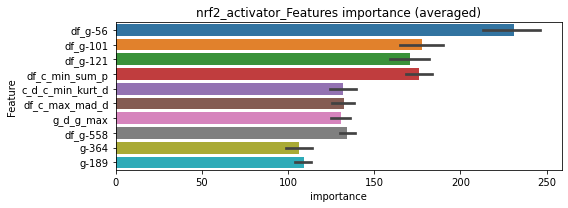

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 nrf2_activator=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00041853	valid_1's binary_logloss: 0.000761186
[2000]	training's binary_logloss: 0.000254827	valid_1's binary_logloss: 0.000553698
Early stopping, best iteration is:
[2686]	training's binary_logloss: 0.000217986	valid_1's binary_logloss: 0.000509276


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 nrf2_activator=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[653]	training's binary_logloss: 0.000618844	valid_1's binary_logloss: 0.0040685


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 nrf2_activator=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0004181	valid_1's binary_logloss: 0.000757088
[2000]	training's binary_logloss: 0.000257769	valid_1's binary_logloss: 0.000547699
Early stopping, best iteration is:
[2934]	training's binary_logloss: 0.000213594	valid_1's binary_logloss: 0.000495431


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 nrf2_activator=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000419401	valid_1's binary_logloss: 0.00143182
Early stopping, best iteration is:
[1856]	training's binary_logloss: 0.00026937	valid_1's binary_logloss: 0.00124882


nrf2_activator logloss: 0.0015808409113036031


neg labels: 3289 → selected neg labels: 3280


opioid_receptor_agonist, len(trt): 61, len(othr): 3280
target_rate: 0.0025615 → Adj_target_rate: 0.0027652
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00500242	valid_1's binary_logloss: 0.0384802
[600]	training's binary_logloss: 0.000926919	valid_1's binary_logloss: 0.0274809
Early stopping, best iteration is:
[631]	training's binary_logloss: 0.000854168	valid_1's binary_logloss: 0.0272215
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00522149	valid_1's binary_logloss: 0.0384771
[600]	training's binary_logloss: 0.000959606	valid_1's binary_logloss: 0.0284166
Early stopping, best iteration is:
[731]	training's binary_logloss: 0.00072734	valid_1's binary_logloss: 0.0276152
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00589236	valid_1's binary_logloss: 0.0149008
[600]	training's binary_logloss: 0.00102427	valid_1's binary_logloss: 0.00691615
[900]	training's binary_logloss: 0.000667838	valid_1's binary_logloss: 0.00604993
Early stopping, best 

1 / 3 AUC score:1.000
y_Threshold: 0.0063171, Threshold: 0.0186247, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3804
p_label_rate: 0.0100452 Vs.target_rate: 0.00256
Num_p_label: 40.0, conf_0:0.01304, conf_1:0.02421
Num_p_label: 40.0, Expected: 10.2, Adj_threshold_1: 0.0186247
Num_p_label: 7.0, Expected: 10.2, Adj_threshold_2: 0.0486247
threshold: 0.0486247, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 656.0/3804, y_label_rate: 0.1724501
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00470007	valid_1's binary_logloss: 0.0381791
[600]	training's binary_logloss: 0.000893553	valid_1's binary_logloss: 0.0276432
Early stopping, best iteration is:
[804]	training's binary_logloss: 0.000638892	valid_1's binary_logloss: 0.026788
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00480926	valid_1's binary_logloss: 0.0369557
[600]	training's binary_logloss: 0.000904908	valid_1's binary_logloss: 0.0290603
Early stopping, best iteration is:
[620]	training's binary_logloss: 0.00085953	valid_1's binary_logloss: 0.0289413
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00528407	valid_1's binary_logloss: 0.0147517
[600]	training's binary_logloss: 0.000961779	valid_1's binary_logloss: 0.00701389
Early stopping, best iteration is:
[778]	training's binary_logloss: 0.000690168	valid_1's binary_loglos

2 / 3 AUC score:1.000
y_Threshold: 0.0373121, Threshold: 0.0486247, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 651.0/3794
p_label_rate: 0.0123054 Vs.target_rate: 0.00256
Num_p_label: 49.0, conf_0:0.03890, conf_1:0.05835
Num_p_label: 49.0, Expected: 10.2, Adj_threshold_1: 0.0486247
Num_p_label: 35.0, Expected: 10.2, Adj_threshold_2: 0.0786247
Num_p_label: 21.0, Expected: 10.2, Adj_threshold_3: 0.1086247
Num_p_label: 15.0, Expected: 10.2, Adj_threshold_4: 0.1386247
threshold: 0.1386247, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 651.0/3794, y_label_rate: 0.1715867
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00468987	valid_1's binary_logloss: 0.0331801
[600]	training's binary_logloss: 0.000888383	valid_1's binary_logloss: 0.0248109
Early stopping, best iteration is:
[630]	training's binary_logloss: 0.000827075	valid_1's binary_logloss: 0.0245037
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00463231	valid_1's binary_logloss: 0.0355091
[600]	training's binary_logloss: 0.0008852	valid_1's binary_logloss: 0.0271305
Early stopping, best iteration is:
[678]	training's binary_logloss: 0.00074625	valid_1's binary_logloss: 0.026796
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00471064	valid_1's binary_logloss: 0.0170665
[600]	training's binary_logloss: 0.00090008	valid_1's binary_logloss: 0.00777127
Early stopping, best iteration is:
[798]	training's binary_logloss: 0.000652845	valid_1's binary_logloss: 

3 / 3 AUC score:1.000
y_Threshold: 0.0771092, Threshold: 0.1386247, pos_neg_ratio: 0.8000000
Remove_noisy_data: 12 → Positive_corect_labels: 645.0/3782
p_label_rate: 0.0100452 Vs.target_rate: 0.00256
Num_p_label: 40.0, conf_0:0.12476, conf_1:0.15249
Num_p_label: 40.0, Expected: 10.2, Adj_threshold_1: 0.1386247
Num_p_label: 32.0, Expected: 10.2, Adj_threshold_2: 0.1686247
Num_p_label: 23.0, Expected: 10.2, Adj_threshold_3: 0.1986247
Num_p_label: 22.0, Expected: 10.2, Adj_threshold_4: 0.2286247
Num_p_label: 15.0, Expected: 10.2, Adj_threshold_5: 0.2586247
threshold: 0.2586247, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 645.0/3782, y_label_rate: 0.1705447


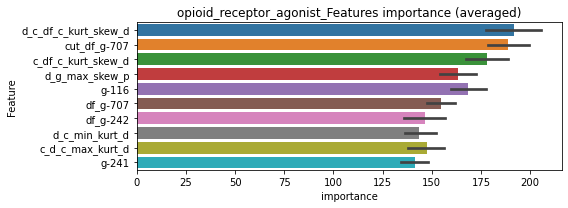

len(train_index) : 2836
len(valid_index) : 946
================================= fold 1/4 opioid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2836
len(valid_index) : 946
================================= fold 2/4 opioid_receptor_agonist=================================


Early stopping, best iteration is:
[478]	training's binary_logloss: 0.0010984	valid_1's binary_logloss: 0.00488001
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000544877	valid_1's binary_logloss: 0.00112246
[2000]	training's binary_logloss: 0.000311707	valid_1's binary_logloss: 0.00076081
[3000]	training's binary_logloss: 0.000236855	valid_1's binary_logloss: 0.000631277
[4000]	training's binary_logloss: 0.000200752	valid_1's binary_logloss: 0.000559446
[5000]	training's binary_logloss: 0.000181864	valid_1's binary_logloss: 0.0005215
[6000]	training's binary_logloss: 0.000169446	valid_1's binary_logloss: 0.000500431
[7000]	training's binary_logloss: 0.000160554	valid_1's binary_logloss: 0.000481311
[8000]	training's binary_logloss: 0.000153985	valid_1's binary_logloss: 0.000465906
Early stopping, best iteration is:
[8164]	training's binary_logloss: 0.000153075	valid_1's binary_logloss: 0.000463474


len(train_index) : 2837
len(valid_index) : 945
================================= fold 3/4 opioid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000536965	valid_1's binary_logloss: 0.0025063
Early stopping, best iteration is:
[1749]	training's binary_logloss: 0.000336113	valid_1's binary_logloss: 0.00223077


len(train_index) : 2837
len(valid_index) : 945
================================= fold 4/4 opioid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


opioid_receptor_agonist logloss: 0.0037069899211056635


Early stopping, best iteration is:
[607]	training's binary_logloss: 0.000874788	valid_1's binary_logloss: 0.00725221
neg labels: 3289 → selected neg labels: 3274


opioid_receptor_antagonist, len(trt): 96, len(othr): 3274
target_rate: 0.0040312 → Adj_target_rate: 0.0040656
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00914427	valid_1's binary_logloss: 0.0691907
Early stopping, best iteration is:
[546]	training's binary_logloss: 0.00184989	valid_1's binary_logloss: 0.0571793
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00949301	valid_1's binary_logloss: 0.0547516
[600]	training's binary_logloss: 0.00159743	valid_1's binary_logloss: 0.0410929
Early stopping, best iteration is:
[623]	training's binary_logloss: 0.00148184	valid_1's binary_logloss: 0.0410523
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0104102	valid_1's binary_logloss: 0.046932
[600]	training's binary_logloss: 0.00169816	valid_1's binary_logloss: 0.0313041
Early stopping, best iteration is:
[689]	training's binary_logloss: 0.00130086	valid_1's binary_logloss: 0.030421
Training until validation scores don't improve for 30 rounds
[300]	training

1 / 3 AUC score:0.997
y_Threshold: 0.0121546, Threshold: 0.0573320, pos_neg_ratio: 0.8000000
Remove_noisy_data: 148 → Positive_corect_labels: 646/3780
p_label_rate: 0.0100452 Vs.target_rate: 0.00403
Num_p_label: 40.0, conf_0:0.04013, conf_1:0.07453
Num_p_label: 40.0, Expected: 16.1, Adj_threshold_1: 0.0573320
Num_p_label: 29.0, Expected: 16.1, Adj_threshold_2: 0.0873320
Num_p_label: 18.0, Expected: 16.1, Adj_threshold_3: 0.1173320
threshold: 0.1173320, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 646.0/3780, y_label_rate: 0.1708995
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00761229	valid_1's binary_logloss: 0.0692647
[600]	training's binary_logloss: 0.00134877	valid_1's binary_logloss: 0.0599362
Early stopping, best iteration is:
[636]	training's binary_logloss: 0.00121568	valid_1's binary_logloss: 0.059522
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0079736	valid_1's binary_logloss: 0.0678452
Early stopping, best iteration is:
[537]	training's binary_logloss: 0.00176095	valid_1's binary_logloss: 0.0566103
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00836415	valid_1's binary_logloss: 0.0381969
[600]	training's binary_logloss: 0.00145613	valid_1's binary_logloss: 0.0249983
Early stopping, best iteration is:
[791]	training's binary_logloss: 0.000946416	valid_1's binary_logloss: 0.0237003
Training until validation scores don't improve for 30 rounds
[300]	traini

2 / 3 AUC score:1.000
y_Threshold: 0.0391903, Threshold: 0.1173320, pos_neg_ratio: 0.8000000
Remove_noisy_data: 18 → Positive_corect_labels: 637.0/3762
p_label_rate: 0.0150678 Vs.target_rate: 0.00403
Num_p_label: 60.0, conf_0:0.09387, conf_1:0.14080
Num_p_label: 60.0, Expected: 16.1, Adj_threshold_1: 0.1173320
Num_p_label: 51.0, Expected: 16.1, Adj_threshold_2: 0.1473320
Num_p_label: 49.0, Expected: 16.1, Adj_threshold_3: 0.1773320
Num_p_label: 45.0, Expected: 16.1, Adj_threshold_4: 0.2073320
Num_p_label: 40.0, Expected: 16.1, Adj_threshold_5: 0.2373320
Num_p_label: 39.0, Expected: 16.1, Adj_threshold_6: 0.2673320
Num_p_label: 32.0, Expected: 16.1, Adj_threshold_7: 0.2973320
Num_p_label: 29.0, Expected: 16.1, Adj_threshold_8: 0.3273320
Num_p_label: 27.0, Expected: 16.1, Adj_threshold_9: 0.3573320
Num_p_label: 24.0, Expected: 16.1, Adj_threshold_10: 0.3873320
threshold: 0.3873320, positive_p_label: 24.0/3982, p_label_rate: 0.0060271
positive_y_label: 637.0/3762, y_label_rate: 0.1693248


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00708467	valid_1's binary_logloss: 0.0643777
[600]	training's binary_logloss: 0.0012843	valid_1's binary_logloss: 0.0530055
Early stopping, best iteration is:
[682]	training's binary_logloss: 0.00103938	valid_1's binary_logloss: 0.0520976
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00782121	valid_1's binary_logloss: 0.0524385
[600]	training's binary_logloss: 0.00137494	valid_1's binary_logloss: 0.0420517
Early stopping, best iteration is:
[682]	training's binary_logloss: 0.00110154	valid_1's binary_logloss: 0.0413742
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00772772	valid_1's binary_logloss: 0.0393022
[600]	training's binary_logloss: 0.0013432	valid_1's binary_logloss: 0.0273092
Early stopping, best iteration is:
[612]	training's binary_logloss: 0.00129704	valid_1's binary_logloss: 0.02

3 / 3 AUC score:0.999
y_Threshold: 0.0419021, Threshold: 0.3873320, pos_neg_ratio: 0.8000000
Remove_noisy_data: 18 → Positive_corect_labels: 628.0/3744
p_label_rate: 0.0085384 Vs.target_rate: 0.00403
Num_p_label: 34.0, conf_0:0.34860, conf_1:0.42607
Num_p_label: 34.0, Expected: 16.1, Adj_threshold_1: 0.3873320
Num_p_label: 30.0, Expected: 16.1, Adj_threshold_2: 0.4173320
Num_p_label: 28.0, Expected: 16.1, Adj_threshold_3: 0.4473320
Num_p_label: 25.0, Expected: 16.1, Adj_threshold_4: 0.4773320
Num_p_label: 24.0, Expected: 16.1, Adj_threshold_5: 0.5073320
threshold: 0.5073320, positive_p_label: 24.0/3982, p_label_rate: 0.0060271
positive_y_label: 628.0/3744, y_label_rate: 0.1677350


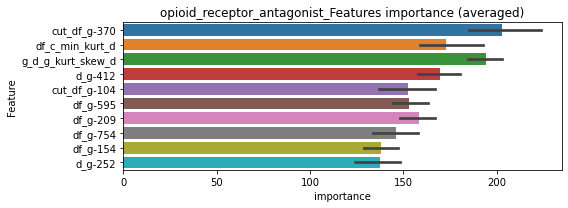

len(train_index) : 2808
len(valid_index) : 936
================================= fold 1/4 opioid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2808
len(valid_index) : 936
================================= fold 2/4 opioid_receptor_antagonist=================================


Early stopping, best iteration is:
[726]	training's binary_logloss: 0.000747848	valid_1's binary_logloss: 0.00260105
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000572941	valid_1's binary_logloss: 0.000848744
[2000]	training's binary_logloss: 0.000318621	valid_1's binary_logloss: 0.000511373
[3000]	training's binary_logloss: 0.0002401	valid_1's binary_logloss: 0.000395585
[4000]	training's binary_logloss: 0.000203622	valid_1's binary_logloss: 0.000337226
[5000]	training's binary_logloss: 0.000184838	valid_1's binary_logloss: 0.000306958
[6000]	training's binary_logloss: 0.000172982	valid_1's binary_logloss: 0.000287107
Early stopping, best iteration is:
[6747]	training's binary_logloss: 0.00016664	valid_1's binary_logloss: 0.00027655


len(train_index) : 2808
len(valid_index) : 936
================================= fold 3/4 opioid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000582012	valid_1's binary_logloss: 0.00213446
Early stopping, best iteration is:
[1627]	training's binary_logloss: 0.000379894	valid_1's binary_logloss: 0.00180979


len(train_index) : 2808
len(valid_index) : 936
================================= fold 4/4 opioid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000572862	valid_1's binary_logloss: 0.00321241
Early stopping, best iteration is:
[1643]	training's binary_logloss: 0.000373444	valid_1's binary_logloss: 0.00280405


opioid_receptor_antagonist logloss: 0.0018736676061765723


neg labels: 3289 → selected neg labels: 3286


orexin_receptor_antagonist, len(trt): 37, len(othr): 3286
target_rate: 0.0015537 → Adj_target_rate: 0.0018079
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00270742	valid_1's binary_logloss: 0.0147827
[600]	training's binary_logloss: 0.000571768	valid_1's binary_logloss: 0.0103272
Early stopping, best iteration is:
[607]	training's binary_logloss: 0.000563779	valid_1's binary_logloss: 0.0102906
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00265654	valid_1's binary_logloss: 0.0167596
[600]	training's binary_logloss: 0.000561244	valid_1's binary_logloss: 0.0108901
Early stopping, best iteration is:
[677]	training's binary_logloss: 0.000500702	valid_1's binary_logloss: 0.0107388
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00289873	valid_1's binary_logloss: 0.00624012
[600]	training's binary_logloss: 0.000585449	valid_1's binary_logloss: 0.00221859
Early stopping, best iteration is:
[737]	training's binary_logloss: 0.000497996	valid_1's binary_log

1 / 3 AUC score:1.000
y_Threshold: 0.0035271, Threshold: 0.0102744, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00155
Num_p_label: 40.0, conf_0:0.00719, conf_1:0.01336
Num_p_label: 40.0, Expected: 6.2, Adj_threshold_1: 0.0102744
Num_p_label: 6.0, Expected: 6.2, Adj_threshold_2: 0.0402744
threshold: 0.0402744, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00251136	valid_1's binary_logloss: 0.0144172
[600]	training's binary_logloss: 0.000545873	valid_1's binary_logloss: 0.0102052
Early stopping, best iteration is:
[665]	training's binary_logloss: 0.000495813	valid_1's binary_logloss: 0.0100629
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0025164	valid_1's binary_logloss: 0.0150049
[600]	training's binary_logloss: 0.000543139	valid_1's binary_logloss: 0.00977006
Early stopping, best iteration is:
[622]	training's binary_logloss: 0.000519666	valid_1's binary_logloss: 0.00970176
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00264133	valid_1's binary_logloss: 0.0065496
[600]	training's binary_logloss: 0.000563171	valid_1's binary_logloss: 0.00264889
Early stopping, best iteration is:
[742]	training's binary_logloss: 0.000487527	valid_1's binary_log

2 / 3 AUC score:1.000
y_Threshold: 0.0246875, Threshold: 0.0402744, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3809
p_label_rate: 0.0065294 Vs.target_rate: 0.00155
Num_p_label: 26.0, conf_0:0.03222, conf_1:0.04833
Num_p_label: 26.0, Expected: 6.2, Adj_threshold_1: 0.0402744
Num_p_label: 12.0, Expected: 6.2, Adj_threshold_2: 0.0702744
threshold: 0.0702744, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 656.0/3809, y_label_rate: 0.1722237
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00241343	valid_1's binary_logloss: 0.0149278
[600]	training's binary_logloss: 0.000528641	valid_1's binary_logloss: 0.00915406
Early stopping, best iteration is:
[620]	training's binary_logloss: 0.000509089	valid_1's binary_logloss: 0.00906266
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00250455	valid_1's binary_logloss: 0.00761779
[600]	training's binary_logloss: 0.0005541	valid_1's binary_logloss: 0.00382017
Early stopping, best iteration is:
[673]	training's binary_logloss: 0.000497158	valid_1's binary_logloss: 0.00373043
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00261969	valid_1's binary_logloss: 0.00542375
[600]	training's binary_logloss: 0.000557158	valid_1's binary_logloss: 0.0016752
Early stopping, best iteration is:
[674]	training's binary_logloss: 0.00050012	valid_1's binary_lo

3 / 3 AUC score:1.000
y_Threshold: 0.0408610, Threshold: 0.0702744, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3809
p_label_rate: 0.0022602 Vs.target_rate: 0.00155
Num_p_label: 9.0, conf_0:0.06325, conf_1:0.07730
threshold: 0.0702744, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 656.0/3809, y_label_rate: 0.1722237


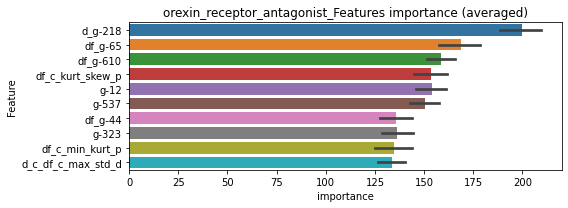

len(train_index) : 2856
len(valid_index) : 953
================================= fold 1/4 orexin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000492307	valid_1's binary_logloss: 0.00374161
Early stopping, best iteration is:
[1274]	training's binary_logloss: 0.000401637	valid_1's binary_logloss: 0.00357253


len(train_index) : 2857
len(valid_index) : 952
================================= fold 2/4 orexin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000418809	valid_1's binary_logloss: 0.000558112
[2000]	training's binary_logloss: 0.000241721	valid_1's binary_logloss: 0.000322985
[3000]	training's binary_logloss: 0.000180217	valid_1's binary_logloss: 0.000241036
[4000]	training's binary_logloss: 0.000150553	valid_1's binary_logloss: 0.000201488
[5000]	training's binary_logloss: 0.000135181	valid_1's binary_logloss: 0.000180969
[6000]	training's binary_logloss: 0.000125206	valid_1's binary_logloss: 0.000167627
[7000]	training's binary_logloss: 0.000118244	valid_1's binary_logloss: 0.000158316
[8000]	training's binary_logloss: 0.000113435	valid_1's binary_logloss: 0.000151884
[9000]	training's binary_logloss: 0.000110013	valid_1's binary_logloss: 0.000147304
[10000]	training's binary_logloss: 0.000107624	valid_1's binary_logloss: 0.000144123
Did not meet early stopping. Best iteration is:
[9999]	training's binary_logloss: 0.000107624	vali

len(train_index) : 2857
len(valid_index) : 952
================================= fold 3/4 orexin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000509326	valid_1's binary_logloss: 0.001061
Early stopping, best iteration is:
[1871]	training's binary_logloss: 0.000309834	valid_1's binary_logloss: 0.000842036


len(train_index) : 2857
len(valid_index) : 952
================================= fold 4/4 orexin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000509478	valid_1's binary_logloss: 0.00282745
Early stopping, best iteration is:
[1300]	training's binary_logloss: 0.000405747	valid_1's binary_logloss: 0.0026684


orexin_receptor_antagonist logloss: 0.0018081432752177192


neg labels: 3289 → selected neg labels: 3281


p38_mapk_inhibitor, len(trt): 62, len(othr): 3281
target_rate: 0.0026035 → Adj_target_rate: 0.0028037
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00562631	valid_1's binary_logloss: 0.0378519
[600]	training's binary_logloss: 0.000967246	valid_1's binary_logloss: 0.0273002
Early stopping, best iteration is:
[675]	training's binary_logloss: 0.000798996	valid_1's binary_logloss: 0.0267883
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00613944	valid_1's binary_logloss: 0.0285185
[600]	training's binary_logloss: 0.00102278	valid_1's binary_logloss: 0.016841
Early stopping, best iteration is:
[855]	training's binary_logloss: 0.00065006	valid_1's binary_logloss: 0.0159171
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00598656	valid_1's binary_logloss: 0.0224856
[600]	training's binary_logloss: 0.00103747	valid_1's binary_logloss: 0.011855
Early stopping, best iteration is:
[829]	training's binary_logloss: 0.000671831	valid_1's binary_logloss: 0

1 / 3 AUC score:1.000
y_Threshold: 0.0087156, Threshold: 0.0369678, pos_neg_ratio: 0.8000000
Remove_noisy_data: 136 → Positive_corect_labels: 654/3801
p_label_rate: 0.0100452 Vs.target_rate: 0.00260
Num_p_label: 40.0, conf_0:0.02588, conf_1:0.04806
Num_p_label: 40.0, Expected: 10.4, Adj_threshold_1: 0.0369678
Num_p_label: 17.0, Expected: 10.4, Adj_threshold_2: 0.0669678
Num_p_label: 9.0, Expected: 10.4, Adj_threshold_3: 0.0969678
threshold: 0.0969678, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 654.0/3801, y_label_rate: 0.1720600
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00528919	valid_1's binary_logloss: 0.0341122
[600]	training's binary_logloss: 0.00094466	valid_1's binary_logloss: 0.0218113
Early stopping, best iteration is:
[795]	training's binary_logloss: 0.000648351	valid_1's binary_logloss: 0.0203097
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00518136	valid_1's binary_logloss: 0.0313945
[600]	training's binary_logloss: 0.00094755	valid_1's binary_logloss: 0.0219082
Early stopping, best iteration is:
[671]	training's binary_logloss: 0.000794546	valid_1's binary_logloss: 0.0213001
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00534149	valid_1's binary_logloss: 0.024764
[600]	training's binary_logloss: 0.000963511	valid_1's binary_logloss: 0.0141452
Early stopping, best iteration is:
[765]	training's binary_logloss: 0.000684116	valid_1's binary_logloss:

2 / 3 AUC score:1.000
y_Threshold: 0.0392916, Threshold: 0.0969678, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 652.0/3797
p_label_rate: 0.0055249 Vs.target_rate: 0.00260
Num_p_label: 22.0, conf_0:0.07757, conf_1:0.11636
Num_p_label: 22.0, Expected: 10.4, Adj_threshold_1: 0.0969678
Num_p_label: 10.0, Expected: 10.4, Adj_threshold_2: 0.1269678
threshold: 0.1269678, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 652.0/3797, y_label_rate: 0.1717145
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00529358	valid_1's binary_logloss: 0.0246103
[600]	training's binary_logloss: 0.000944072	valid_1's binary_logloss: 0.0158148
Early stopping, best iteration is:
[782]	training's binary_logloss: 0.000666308	valid_1's binary_logloss: 0.0151684
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00505416	valid_1's binary_logloss: 0.0275047
[600]	training's binary_logloss: 0.000924507	valid_1's binary_logloss: 0.0201443
Early stopping, best iteration is:
[621]	training's binary_logloss: 0.000874795	valid_1's binary_logloss: 0.0200121
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00514886	valid_1's binary_logloss: 0.0275615
[600]	training's binary_logloss: 0.000936679	valid_1's binary_logloss: 0.0163065
Early stopping, best iteration is:
[694]	training's binary_logloss: 0.000745194	valid_1's binary_loglo

3 / 3 AUC score:1.000
y_Threshold: 0.0434125, Threshold: 0.1269678, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 648.0/3789
p_label_rate: 0.0045203 Vs.target_rate: 0.00260
Num_p_label: 18.0, conf_0:0.11427, conf_1:0.13966
Num_p_label: 18.0, Expected: 10.4, Adj_threshold_1: 0.1269678
Num_p_label: 12.0, Expected: 10.4, Adj_threshold_2: 0.1569678
threshold: 0.1569678, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 648.0/3789, y_label_rate: 0.1710214


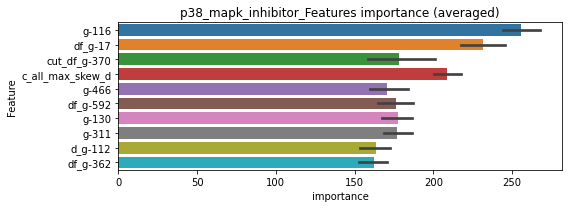

len(train_index) : 2841
len(valid_index) : 948
================================= fold 1/4 p38_mapk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000445511	valid_1's binary_logloss: 0.000708206
[2000]	training's binary_logloss: 0.000249402	valid_1's binary_logloss: 0.000398241
[3000]	training's binary_logloss: 0.000183975	valid_1's binary_logloss: 0.000294206
[4000]	training's binary_logloss: 0.000152678	valid_1's binary_logloss: 0.000244344
[5000]	training's binary_logloss: 0.000136687	valid_1's binary_logloss: 0.000218841
[6000]	training's binary_logloss: 0.000126423	valid_1's binary_logloss: 0.000202445
[7000]	training's binary_logloss: 0.000119277	valid_1's binary_logloss: 0.000191034
[8000]	training's binary_logloss: 0.000114346	valid_1's binary_logloss: 0.000183138
[9000]	training's binary_logloss: 0.000110874	valid_1's binary_logloss: 0.000177594
[10000]	training's binary_logloss: 0.000108339	valid_1's binary_logloss: 0.000173552
Did not meet early stopping. Best iteration is:
[9999]	training's binary_logloss: 0.000108339	vali

len(train_index) : 2842
len(valid_index) : 947
================================= fold 2/4 p38_mapk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000560054	valid_1's binary_logloss: 0.00284027
Early stopping, best iteration is:
[1426]	training's binary_logloss: 0.000408281	valid_1's binary_logloss: 0.00260499


len(train_index) : 2842
len(valid_index) : 947
================================= fold 3/4 p38_mapk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000540663	valid_1's binary_logloss: 0.00198959
Early stopping, best iteration is:
[1491]	training's binary_logloss: 0.000381013	valid_1's binary_logloss: 0.00174884


len(train_index) : 2842
len(valid_index) : 947
================================= fold 4/4 p38_mapk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000553559	valid_1's binary_logloss: 0.000745079
[2000]	training's binary_logloss: 0.000308217	valid_1's binary_logloss: 0.000459534
[3000]	training's binary_logloss: 0.000234428	valid_1's binary_logloss: 0.000361251
[4000]	training's binary_logloss: 0.000199403	valid_1's binary_logloss: 0.000308104
[5000]	training's binary_logloss: 0.000181432	valid_1's binary_logloss: 0.000280331
[6000]	training's binary_logloss: 0.000169899	valid_1's binary_logloss: 0.000262318
[7000]	training's binary_logloss: 0.000161209	valid_1's binary_logloss: 0.000249287
Early stopping, best iteration is:
[7282]	training's binary_logloss: 0.000159545	valid_1's binary_logloss: 0.000246563


p38_mapk_inhibitor logloss: 0.0011932175846769146


neg labels: 3289 → selected neg labels: 3288


p-glycoprotein_inhibitor, len(trt): 24, len(othr): 3288
target_rate: 0.0010078 → Adj_target_rate: 0.0012513
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00176371	valid_1's binary_logloss: 0.00422581
[600]	training's binary_logloss: 0.000418253	valid_1's binary_logloss: 0.00156658
Early stopping, best iteration is:
[643]	training's binary_logloss: 0.000409139	valid_1's binary_logloss: 0.00154169
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00173552	valid_1's binary_logloss: 0.0100656
[600]	training's binary_logloss: 0.00041101	valid_1's binary_logloss: 0.00774359
Early stopping, best iteration is:
[627]	training's binary_logloss: 0.000401402	valid_1's binary_logloss: 0.00772306
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00179419	valid_1's binary_logloss: 0.00344711
[600]	training's binary_logloss: 0.000421084	valid_1's binary_logloss: 0.00113455
Early stopping, best iteration is:
[605]	training's binary_logloss: 0.000417664	valid_1's binary

1 / 3 AUC score:1.000
y_Threshold: 0.0027352, Threshold: 0.0110721, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00101
Num_p_label: 40.0, conf_0:0.00775, conf_1:0.01439
Num_p_label: 40.0, Expected: 4.0, Adj_threshold_1: 0.0110721
Num_p_label: 7.0, Expected: 4.0, Adj_threshold_2: 0.0410721
threshold: 0.0410721, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00162274	valid_1's binary_logloss: 0.00391606
Early stopping, best iteration is:
[562]	training's binary_logloss: 0.000415517	valid_1's binary_logloss: 0.00160777
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00158121	valid_1's binary_logloss: 0.0108257
[600]	training's binary_logloss: 0.000390018	valid_1's binary_logloss: 0.00822162
Early stopping, best iteration is:
[616]	training's binary_logloss: 0.000384022	valid_1's binary_logloss: 0.00819111
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00163863	valid_1's binary_logloss: 0.00262107
[600]	training's binary_logloss: 0.000403261	valid_1's binary_logloss: 0.000784319
Early stopping, best iteration is:
[607]	training's binary_logloss: 0.000400716	valid_1's binary_logloss: 0.000780713
Training until validation scores don't improve for 30 roun

2 / 3 AUC score:1.000
y_Threshold: 0.0091221, Threshold: 0.0410721, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3811
p_label_rate: 0.0070316 Vs.target_rate: 0.00101
Num_p_label: 28.0, conf_0:0.03286, conf_1:0.04929
Num_p_label: 28.0, Expected: 4.0, Adj_threshold_1: 0.0410721
Num_p_label: 19.0, Expected: 4.0, Adj_threshold_2: 0.0710721
Num_p_label: 11.0, Expected: 4.0, Adj_threshold_3: 0.1010721
Num_p_label: 8.0, Expected: 4.0, Adj_threshold_4: 0.1310721
threshold: 0.1310721, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 656.0/3811, y_label_rate: 0.1721333
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0015737	valid_1's binary_logloss: 0.00555678
[600]	training's binary_logloss: 0.000384996	valid_1's binary_logloss: 0.00271167
Early stopping, best iteration is:
[605]	training's binary_logloss: 0.000383343	valid_1's binary_logloss: 0.00270878
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00160348	valid_1's binary_logloss: 0.00495671
[600]	training's binary_logloss: 0.000396368	valid_1's binary_logloss: 0.00231399
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000397575	valid_1's binary_logloss: 0.00231113
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00157263	valid_1's binary_logloss: 0.00284971
[600]	training's binary_logloss: 0.000396433	valid_1's binary_logloss: 0.000884427
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000391445	valid_1's bina

3 / 3 AUC score:1.000
y_Threshold: 0.0893909, Threshold: 0.1310721, pos_neg_ratio: 0.8000000


[600]	training's binary_logloss: 0.000394369	valid_1's binary_logloss: 0.00186462
Early stopping, best iteration is:
[597]	training's binary_logloss: 0.000394369	valid_1's binary_logloss: 0.00186462


Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3811
p_label_rate: 0.0015068 Vs.target_rate: 0.00101
Num_p_label: 6.0, conf_0:0.11796, conf_1:0.14418
threshold: 0.1310721, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 656.0/3811, y_label_rate: 0.1721333


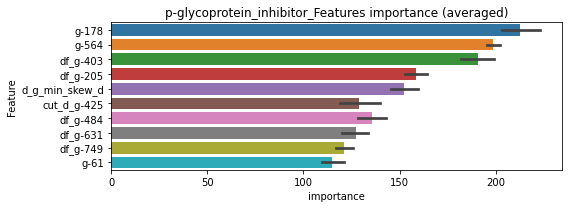

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 p-glycoprotein_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000453491	valid_1's binary_logloss: 0.00332903
[2000]	training's binary_logloss: 0.000275453	valid_1's binary_logloss: 0.00311235
Early stopping, best iteration is:
[2426]	training's binary_logloss: 0.000248568	valid_1's binary_logloss: 0.00307904


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 p-glycoprotein_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00045783	valid_1's binary_logloss: 0.0031709
Early stopping, best iteration is:
[1462]	training's binary_logloss: 0.000338966	valid_1's binary_logloss: 0.00301344


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 p-glycoprotein_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000466769	valid_1's binary_logloss: 0.000525245
[2000]	training's binary_logloss: 0.000275686	valid_1's binary_logloss: 0.000332114
[3000]	training's binary_logloss: 0.000220408	valid_1's binary_logloss: 0.000269003
[4000]	training's binary_logloss: 0.000194207	valid_1's binary_logloss: 0.000238376
[5000]	training's binary_logloss: 0.000180929	valid_1's binary_logloss: 0.000221964
[6000]	training's binary_logloss: 0.000172288	valid_1's binary_logloss: 0.000210822
[7000]	training's binary_logloss: 0.000165804	valid_1's binary_logloss: 0.000203348
Early stopping, best iteration is:
[7583]	training's binary_logloss: 0.000163491	valid_1's binary_logloss: 0.00020029


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 p-glycoprotein_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000430103	valid_1's binary_logloss: 0.000657423
[2000]	training's binary_logloss: 0.000263577	valid_1's binary_logloss: 0.00044493
[3000]	training's binary_logloss: 0.000209777	valid_1's binary_logloss: 0.000373735
[4000]	training's binary_logloss: 0.000184543	valid_1's binary_logloss: 0.000335418
[5000]	training's binary_logloss: 0.000171049	valid_1's binary_logloss: 0.000313908
[6000]	training's binary_logloss: 0.000162411	valid_1's binary_logloss: 0.000301519
[7000]	training's binary_logloss: 0.000156059	valid_1's binary_logloss: 0.000294115
[8000]	training's binary_logloss: 0.000151531	valid_1's binary_logloss: 0.000288708
Early stopping, best iteration is:
[8322]	training's binary_logloss: 0.00015026	valid_1's binary_logloss: 0.000287055


p-glycoprotein_inhibitor logloss: 0.0016455826171450755


neg labels: 3289 → selected neg labels: 3281


parp_inhibitor, len(trt): 61, len(othr): 3281
target_rate: 0.0025615 → Adj_target_rate: 0.0027652
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00486069	valid_1's binary_logloss: 0.0537107
Early stopping, best iteration is:
[494]	training's binary_logloss: 0.00132823	valid_1's binary_logloss: 0.0451935
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00515335	valid_1's binary_logloss: 0.0248906
[600]	training's binary_logloss: 0.000957391	valid_1's binary_logloss: 0.0154507
Early stopping, best iteration is:
[784]	training's binary_logloss: 0.000696972	valid_1's binary_logloss: 0.0145149
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00549997	valid_1's binary_logloss: 0.0188881
Early stopping, best iteration is:
[511]	training's binary_logloss: 0.00137296	valid_1's binary_logloss: 0.0124731
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00484808	valid_1's binary_logloss: 0.0236464
[600]	tra

1 / 3 AUC score:1.000
y_Threshold: 0.0071638, Threshold: 0.0245722, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 655/3803
p_label_rate: 0.0100452 Vs.target_rate: 0.00256
Num_p_label: 40.0, conf_0:0.01720, conf_1:0.03194
Num_p_label: 40.0, Expected: 10.2, Adj_threshold_1: 0.0245722
Num_p_label: 7.0, Expected: 10.2, Adj_threshold_2: 0.0545722
threshold: 0.0545722, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 655.0/3803, y_label_rate: 0.1722324
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00490601	valid_1's binary_logloss: 0.0251498
[600]	training's binary_logloss: 0.00094333	valid_1's binary_logloss: 0.0154798
Early stopping, best iteration is:
[739]	training's binary_logloss: 0.000710891	valid_1's binary_logloss: 0.0146518
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00473917	valid_1's binary_logloss: 0.022761
[600]	training's binary_logloss: 0.000929803	valid_1's binary_logloss: 0.0148125
Early stopping, best iteration is:
[742]	training's binary_logloss: 0.000710578	valid_1's binary_logloss: 0.0142265
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00493541	valid_1's binary_logloss: 0.0176751
[600]	training's binary_logloss: 0.000944448	valid_1's binary_logloss: 0.0108395
Early stopping, best iteration is:
[737]	training's binary_logloss: 0.00072337	valid_1's binary_logloss:

2 / 3 AUC score:1.000
y_Threshold: 0.0480186, Threshold: 0.0545722, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 653.0/3799
p_label_rate: 0.0125565 Vs.target_rate: 0.00256
Num_p_label: 50.0, conf_0:0.04366, conf_1:0.06549
Num_p_label: 50.0, Expected: 10.2, Adj_threshold_1: 0.0545722
Num_p_label: 28.0, Expected: 10.2, Adj_threshold_2: 0.0845722
Num_p_label: 20.0, Expected: 10.2, Adj_threshold_3: 0.1145722
Num_p_label: 12.0, Expected: 10.2, Adj_threshold_4: 0.1445722
threshold: 0.1445722, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 653.0/3799, y_label_rate: 0.1718873
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00469859	valid_1's binary_logloss: 0.0306812
[600]	training's binary_logloss: 0.000905795	valid_1's binary_logloss: 0.0231682
Early stopping, best iteration is:
[680]	training's binary_logloss: 0.0007621	valid_1's binary_logloss: 0.0225829
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00466011	valid_1's binary_logloss: 0.026324
[600]	training's binary_logloss: 0.000913058	valid_1's binary_logloss: 0.0173293
Early stopping, best iteration is:
[744]	training's binary_logloss: 0.000693764	valid_1's binary_logloss: 0.0168435
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00470669	valid_1's binary_logloss: 0.0255312
[600]	training's binary_logloss: 0.000918091	valid_1's binary_logloss: 0.0151716
Early stopping, best iteration is:
[642]	training's binary_logloss: 0.000829761	valid_1's binary_logloss:

3 / 3 AUC score:1.000
y_Threshold: 0.0265041, Threshold: 0.1445722, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 650.0/3793
p_label_rate: 0.0052737 Vs.target_rate: 0.00256
Num_p_label: 21.0, conf_0:0.13011, conf_1:0.15903
Num_p_label: 21.0, Expected: 10.2, Adj_threshold_1: 0.1445722
Num_p_label: 10.0, Expected: 10.2, Adj_threshold_2: 0.1745722
threshold: 0.1745722, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 650.0/3793, y_label_rate: 0.1713683


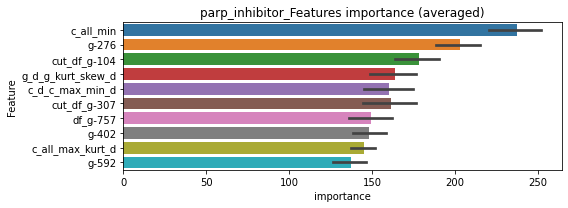

len(train_index) : 2844
len(valid_index) : 949
================================= fold 1/4 parp_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000530931	valid_1's binary_logloss: 0.000905436
[2000]	training's binary_logloss: 0.000306167	valid_1's binary_logloss: 0.000629176
[3000]	training's binary_logloss: 0.000234295	valid_1's binary_logloss: 0.000527666
[4000]	training's binary_logloss: 0.00019996	valid_1's binary_logloss: 0.000480262
[5000]	training's binary_logloss: 0.00018213	valid_1's binary_logloss: 0.000451997
[6000]	training's binary_logloss: 0.00017016	valid_1's binary_logloss: 0.000430203
[7000]	training's binary_logloss: 0.000161311	valid_1's binary_logloss: 0.000412504
Early stopping, best iteration is:
[7706]	training's binary_logloss: 0.000156671	valid_1's binary_logloss: 0.000403081


len(train_index) : 2845
len(valid_index) : 948
================================= fold 2/4 parp_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2845
len(valid_index) : 948
================================= fold 3/4 parp_inhibitor=================================


Early stopping, best iteration is:
[630]	training's binary_logloss: 0.000874063	valid_1's binary_logloss: 0.00521146
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000534374	valid_1's binary_logloss: 0.00520407
Early stopping, best iteration is:
[1117]	training's binary_logloss: 0.000486499	valid_1's binary_logloss: 0.00516951


len(train_index) : 2845
len(valid_index) : 948
================================= fold 4/4 parp_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000555439	valid_1's binary_logloss: 0.00134188
[2000]	training's binary_logloss: 0.000319779	valid_1's binary_logloss: 0.00101684
Early stopping, best iteration is:
[2741]	training's binary_logloss: 0.000261912	valid_1's binary_logloss: 0.00093619


parp_inhibitor logloss: 0.0029307615468223166


neg labels: 3289 → selected neg labels: 3245


pdgfr_inhibitor, len(trt): 297, len(othr): 3245
target_rate: 0.0124717 → Adj_target_rate: 0.0106179
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0434034	valid_1's binary_logloss: 0.259176
Early stopping, best iteration is:
[366]	training's binary_logloss: 0.0286206	valid_1's binary_logloss: 0.255774
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0448222	valid_1's binary_logloss: 0.252567
Early stopping, best iteration is:
[351]	training's binary_logloss: 0.0327595	valid_1's binary_logloss: 0.250892
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0423591	valid_1's binary_logloss: 0.273793
Early stopping, best iteration is:
[333]	training's binary_logloss: 0.0343802	valid_1's binary_logloss: 0.272137
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0436161	valid_1's binary_logloss: 0.265115


1 / 3 AUC score:0.886
y_Threshold: 0.0882985, Threshold: 0.5905448, pos_neg_ratio: 0.8000000
Remove_noisy_data: 442 → Positive_corect_labels: 493/3452
p_label_rate: 0.0100452 Vs.target_rate: 0.01247
Num_p_label: 40.0, conf_0:0.41338, conf_1:0.76771
threshold: 0.5905448, positive_p_label: 40.0/3982, p_label_rate: 0.0100452


Early stopping, best iteration is:
[354]	training's binary_logloss: 0.031541	valid_1's binary_logloss: 0.262234


positive_y_label: 493.0/3452, y_label_rate: 0.1428158
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0187904	valid_1's binary_logloss: 0.16488
Early stopping, best iteration is:
[369]	training's binary_logloss: 0.0108974	valid_1's binary_logloss: 0.160968
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0203773	valid_1's binary_logloss: 0.138754
Early stopping, best iteration is:
[502]	training's binary_logloss: 0.00526162	valid_1's binary_logloss: 0.125432
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0198675	valid_1's binary_logloss: 0.118114
Early stopping, best iteration is:
[510]	training's binary_logloss: 0.00482496	valid_1's binary_logloss: 0.0979875
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0182885	valid_1's binary_logloss: 0.175388


2 / 3 AUC score:0.976
y_Threshold: 0.0755318, Threshold: 0.5905448, pos_neg_ratio: 0.8000000
Remove_noisy_data: 112 → Positive_corect_labels: 437.0/3340
p_label_rate: 0.0223506 Vs.target_rate: 0.01247
Num_p_label: 89.0, conf_0:0.47244, conf_1:0.70865
Num_p_label: 89.0, Expected: 49.7, Adj_threshold_1: 0.5905448
Num_p_label: 81.0, Expected: 49.7, Adj_threshold_2: 0.6205448
Num_p_label: 77.0, Expected: 49.7, Adj_threshold_3: 0.6505448
Num_p_label: 64.0, Expected: 49.7, Adj_threshold_4: 0.6805448


Early stopping, best iteration is:
[384]	training's binary_logloss: 0.00959584	valid_1's binary_logloss: 0.172937


threshold: 0.6805448, positive_p_label: 64.0/3982, p_label_rate: 0.0160723
positive_y_label: 437.0/3340, y_label_rate: 0.1308383
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0131158	valid_1's binary_logloss: 0.138501
Early stopping, best iteration is:
[536]	training's binary_logloss: 0.00286581	valid_1's binary_logloss: 0.127821
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0139988	valid_1's binary_logloss: 0.104798
[600]	training's binary_logloss: 0.00239871	valid_1's binary_logloss: 0.0888684
Early stopping, best iteration is:
[655]	training's binary_logloss: 0.00199106	valid_1's binary_logloss: 0.0879394
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0148642	valid_1's binary_logloss: 0.0881988
Early stopping, best iteration is:
[485]	training's binary_logloss: 0.00414579	valid_1's binary_logloss: 0.0762553
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0134253	valid_1's binary_logloss: 0.11123
[600]	training's bin

3 / 3 AUC score:0.991
y_Threshold: 0.0629059, Threshold: 0.6805448, pos_neg_ratio: 0.8000000
Remove_noisy_data: 42 → Positive_corect_labels: 416.0/3298
p_label_rate: 0.0246107 Vs.target_rate: 0.01247
Num_p_label: 98.0, conf_0:0.50000, conf_1:0.74860
Num_p_label: 98.0, Expected: 49.7, Adj_threshold_1: 0.6805448
Num_p_label: 88.0, Expected: 49.7, Adj_threshold_2: 0.7105448
Num_p_label: 80.0, Expected: 49.7, Adj_threshold_3: 0.7405448
Num_p_label: 71.0, Expected: 49.7, Adj_threshold_4: 0.7705448
threshold: 0.7705448, positive_p_label: 71.0/3982, p_label_rate: 0.0178302
positive_y_label: 416.0/3298, y_label_rate: 0.1261371


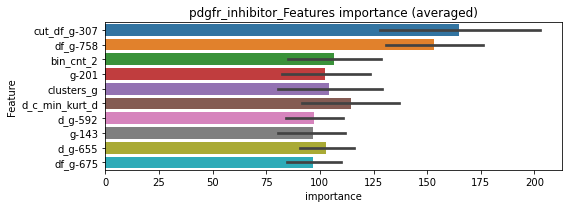

len(train_index) : 2473
len(valid_index) : 825
================================= fold 1/4 pdgfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000671119	valid_1's binary_logloss: 0.00749244
Early stopping, best iteration is:
[1630]	training's binary_logloss: 0.00043512	valid_1's binary_logloss: 0.00705806


len(train_index) : 2473
len(valid_index) : 825
================================= fold 2/4 pdgfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[922]	training's binary_logloss: 0.000710584	valid_1's binary_logloss: 0.00655696


len(train_index) : 2474
len(valid_index) : 824
================================= fold 3/4 pdgfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000671396	valid_1's binary_logloss: 0.00251285
Early stopping, best iteration is:
[1614]	training's binary_logloss: 0.000437767	valid_1's binary_logloss: 0.00217032


len(train_index) : 2474
len(valid_index) : 824
================================= fold 4/4 pdgfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00065547	valid_1's binary_logloss: 0.00103866
[2000]	training's binary_logloss: 0.000371847	valid_1's binary_logloss: 0.000580945
[3000]	training's binary_logloss: 0.000288971	valid_1's binary_logloss: 0.000433797
[4000]	training's binary_logloss: 0.00024808	valid_1's binary_logloss: 0.000362336
[5000]	training's binary_logloss: 0.000226612	valid_1's binary_logloss: 0.00032514
[6000]	training's binary_logloss: 0.000212606	valid_1's binary_logloss: 0.000300969
[7000]	training's binary_logloss: 0.000202522	valid_1's binary_logloss: 0.000284212
[8000]	training's binary_logloss: 0.000195022	valid_1's binary_logloss: 0.00027134
Early stopping, best iteration is:
[8085]	training's binary_logloss: 0.000194356	valid_1's binary_logloss: 0.000270388


pdgfr_inhibitor logloss: 0.0040165732610905275


neg labels: 3289 → selected neg labels: 3284


pdk_inhibitor, len(trt): 18, len(othr): 3284
target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00122782	valid_1's binary_logloss: 0.00908673
[600]	training's binary_logloss: 0.000362434	valid_1's binary_logloss: 0.00614338
Early stopping, best iteration is:
[589]	training's binary_logloss: 0.00036342	valid_1's binary_logloss: 0.00613762
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00122276	valid_1's binary_logloss: 0.00378252
[600]	training's binary_logloss: 0.00036987	valid_1's binary_logloss: 0.00175891
Early stopping, best iteration is:
[573]	training's binary_logloss: 0.00036987	valid_1's binary_logloss: 0.00175891
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00124625	valid_1's binary_logloss: 0.00207039
Early stopping, best iteration is:
[537]	training's binary_logloss: 0.00038289	valid_1's binary_logloss: 0.000767727
Training until validation scores don't improve for 30 rounds
[

1 / 3 AUC score:1.000
y_Threshold: 0.0018959, Threshold: 0.0124226, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[560]	training's binary_logloss: 0.000372746	valid_1's binary_logloss: 0.00247607


Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, conf_0:0.00870, conf_1:0.01615
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_1: 0.0124226
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_2: 0.0424226
threshold: 0.0424226, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00111307	valid_1's binary_logloss: 0.0109438
Early stopping, best iteration is:
[553]	training's binary_logloss: 0.000356343	valid_1's binary_logloss: 0.0084202
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00115139	valid_1's binary_logloss: 0.00393055
Early stopping, best iteration is:
[557]	training's binary_logloss: 0.000357872	valid_1's binary_logloss: 0.00204588
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00120004	valid_1's binary_logloss: 0.00176951
Early stopping, best iteration is:
[539]	training's binary_logloss: 0.000364871	valid_1's binary_logloss: 0.000625397
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00116723	valid_1's binary_logloss: 0.00423063


2 / 3 AUC score:1.000
y_Threshold: 0.0146181, Threshold: 0.0424226, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, conf_0:0.03394, conf_1:0.05091
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_1: 0.0424226
Num_p_label: 22.0, Expected: 3.0, Adj_threshold_2: 0.0724226
Num_p_label: 15.0, Expected: 3.0, Adj_threshold_3: 0.1024226
Num_p_label: 10.0, Expected: 3.0, Adj_threshold_4: 0.1324226
Num_p_label: 9.0, Expected: 3.0, Adj_threshold_5: 0.1624226
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_6: 0.1924226


Early stopping, best iteration is:
[543]	training's binary_logloss: 0.000359215	valid_1's binary_logloss: 0.00302779


threshold: 0.1924226, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 655.0/3806, y_label_rate: 0.1720967
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00113956	valid_1's binary_logloss: 0.00425905
Early stopping, best iteration is:
[537]	training's binary_logloss: 0.000358792	valid_1's binary_logloss: 0.00251484
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00115262	valid_1's binary_logloss: 0.00345321
Early stopping, best iteration is:
[499]	training's binary_logloss: 0.000383665	valid_1's binary_logloss: 0.00221568
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00113754	valid_1's binary_logloss: 0.00254186
Early stopping, best iteration is:
[546]	training's binary_logloss: 0.000356268	valid_1's binary_logloss: 0.00117886
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00114767	valid_1's binary_logloss: 0.00587658


3 / 3 AUC score:1.000
y_Threshold: 0.0728442, Threshold: 0.1924226, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[553]	training's binary_logloss: 0.000360791	valid_1's binary_logloss: 0.00346258


Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0017579 Vs.target_rate: 0.00076
Num_p_label: 7.0, conf_0:0.17318, conf_1:0.21166
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_1: 0.1924226
threshold: 0.1924226, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 655.0/3806, y_label_rate: 0.1720967


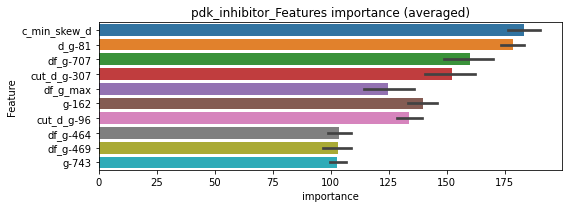

len(train_index) : 2854
len(valid_index) : 952
================================= fold 1/4 pdk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000430218	valid_1's binary_logloss: 0.00123873
[2000]	training's binary_logloss: 0.000260116	valid_1's binary_logloss: 0.00103767
Early stopping, best iteration is:
[2673]	training's binary_logloss: 0.000218221	valid_1's binary_logloss: 0.000968053


len(train_index) : 2854
len(valid_index) : 952
================================= fold 2/4 pdk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000426094	valid_1's binary_logloss: 0.00197863
[2000]	training's binary_logloss: 0.000256144	valid_1's binary_logloss: 0.00169377
Early stopping, best iteration is:
[2666]	training's binary_logloss: 0.000216329	valid_1's binary_logloss: 0.00162977


len(train_index) : 2855
len(valid_index) : 951
================================= fold 3/4 pdk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000456356	valid_1's binary_logloss: 0.00103505
[2000]	training's binary_logloss: 0.00027117	valid_1's binary_logloss: 0.000786355
[3000]	training's binary_logloss: 0.000218909	valid_1's binary_logloss: 0.000710342
Early stopping, best iteration is:
[3046]	training's binary_logloss: 0.000217035	valid_1's binary_logloss: 0.000708172


len(train_index) : 2855
len(valid_index) : 951
================================= fold 4/4 pdk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000436886	valid_1's binary_logloss: 0.00136301
Early stopping, best iteration is:
[1528]	training's binary_logloss: 0.000309793	valid_1's binary_logloss: 0.00122447


pdk_inhibitor logloss: 0.0011332907888414925


neg labels: 3289 → selected neg labels: 3248


phosphodiesterase_inhibitor, len(trt): 264, len(othr): 3248
target_rate: 0.0110859 → Adj_target_rate: 0.0096064
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[241]	training's binary_logloss: 0.0543924	valid_1's binary_logloss: 0.257248
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0362752	valid_1's binary_logloss: 0.236292
Early stopping, best iteration is:
[361]	training's binary_logloss: 0.0243831	valid_1's binary_logloss: 0.234405
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0407509	valid_1's binary_logloss: 0.222751
Early stopping, best iteration is:
[416]	training's binary_logloss: 0.0194541	valid_1's binary_logloss: 0.218877
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0382997	valid_1's binary_logloss: 0.216616


1 / 3 AUC score:0.907
y_Threshold: 0.0796144, Threshold: 0.2785555, pos_neg_ratio: 0.8000000
Remove_noisy_data: 383 → Positive_corect_labels: 523/3514
p_label_rate: 0.0100452 Vs.target_rate: 0.01109
Num_p_label: 40.0, conf_0:0.19499, conf_1:0.36212
threshold: 0.2785555, positive_p_label: 40.0/3982, p_label_rate: 0.0100452


Early stopping, best iteration is:
[338]	training's binary_logloss: 0.0300839	valid_1's binary_logloss: 0.212873


positive_y_label: 523.0/3514, y_label_rate: 0.1488332
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0181949	valid_1's binary_logloss: 0.149887
Early stopping, best iteration is:
[393]	training's binary_logloss: 0.00916028	valid_1's binary_logloss: 0.145016
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0192776	valid_1's binary_logloss: 0.136828
Early stopping, best iteration is:
[516]	training's binary_logloss: 0.0045736	valid_1's binary_logloss: 0.128531
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0178478	valid_1's binary_logloss: 0.172958
Early stopping, best iteration is:
[358]	training's binary_logloss: 0.0114447	valid_1's binary_logloss: 0.169761
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0188687	valid_1's binary_logloss: 0.122836


2 / 3 AUC score:0.981
y_Threshold: 0.0642259, Threshold: 0.2785555, pos_neg_ratio: 0.8000000
Remove_noisy_data: 112 → Positive_corect_labels: 467.0/3402
p_label_rate: 0.0163235 Vs.target_rate: 0.01109
Num_p_label: 65.0, conf_0:0.22284, conf_1:0.33427


Early stopping, best iteration is:
[481]	training's binary_logloss: 0.00546973	valid_1's binary_logloss: 0.112152


threshold: 0.2785555, positive_p_label: 65.0/3982, p_label_rate: 0.0163235
positive_y_label: 467.0/3402, y_label_rate: 0.1372722
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0123407	valid_1's binary_logloss: 0.101141
Early stopping, best iteration is:
[437]	training's binary_logloss: 0.00449298	valid_1's binary_logloss: 0.0966459
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0129439	valid_1's binary_logloss: 0.0970302
Early stopping, best iteration is:
[500]	training's binary_logloss: 0.003439	valid_1's binary_logloss: 0.0898416
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0133416	valid_1's binary_logloss: 0.0969103
[600]	training's binary_logloss: 0.00229535	valid_1's binary_logloss: 0.0831017
Early stopping, best iteration is:
[598]	training's binary_logloss: 0.00231157	valid_1's binary_logloss: 0.0829308
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0121998	valid_1's binary_logloss: 0.104727
Early stopping, bes

3 / 3 AUC score:0.993
y_Threshold: 0.0479237, Threshold: 0.2785555, pos_neg_ratio: 0.8000000
Remove_noisy_data: 50 → Positive_corect_labels: 442.0/3352
p_label_rate: 0.0185836 Vs.target_rate: 0.01109
Num_p_label: 74.0, conf_0:0.25070, conf_1:0.30641
Num_p_label: 74.0, Expected: 44.1, Adj_threshold_1: 0.2785555
Num_p_label: 64.0, Expected: 44.1, Adj_threshold_2: 0.3085555
threshold: 0.3085555, positive_p_label: 64.0/3982, p_label_rate: 0.0160723
positive_y_label: 442.0/3352, y_label_rate: 0.1318616


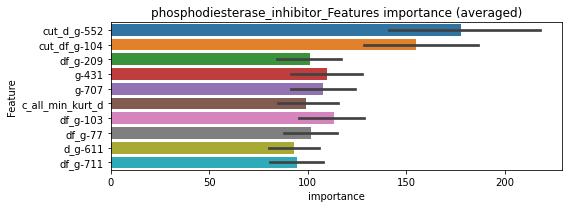

len(train_index) : 2514
len(valid_index) : 838
================================= fold 1/4 phosphodiesterase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00065435	valid_1's binary_logloss: 0.00257196
[2000]	training's binary_logloss: 0.000368587	valid_1's binary_logloss: 0.00212953
[3000]	training's binary_logloss: 0.000285717	valid_1's binary_logloss: 0.00197677
[4000]	training's binary_logloss: 0.00024836	valid_1's binary_logloss: 0.00189926
Early stopping, best iteration is:
[4469]	training's binary_logloss: 0.000239127	valid_1's binary_logloss: 0.00188152


len(train_index) : 2514
len(valid_index) : 838
================================= fold 2/4 phosphodiesterase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[929]	training's binary_logloss: 0.000676795	valid_1's binary_logloss: 0.00309642


len(train_index) : 2514
len(valid_index) : 838
================================= fold 3/4 phosphodiesterase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000631832	valid_1's binary_logloss: 0.002997
[2000]	training's binary_logloss: 0.000358347	valid_1's binary_logloss: 0.00254571
Early stopping, best iteration is:
[2842]	training's binary_logloss: 0.000284615	valid_1's binary_logloss: 0.00242051


len(train_index) : 2514
len(valid_index) : 838
================================= fold 4/4 phosphodiesterase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000651725	valid_1's binary_logloss: 0.00584453
Early stopping, best iteration is:
[1191]	training's binary_logloss: 0.00055919	valid_1's binary_logloss: 0.00568881


phosphodiesterase_inhibitor logloss: 0.0032723319554198624


neg labels: 3289 → selected neg labels: 3286


phospholipase_inhibitor, len(trt): 25, len(othr): 3286
target_rate: 0.0010498 → Adj_target_rate: 0.0012955
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0018555	valid_1's binary_logloss: 0.00926452
[600]	training's binary_logloss: 0.000445968	valid_1's binary_logloss: 0.00586176
Early stopping, best iteration is:
[632]	training's binary_logloss: 0.000433558	valid_1's binary_logloss: 0.00580552
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00185626	valid_1's binary_logloss: 0.00842746
[600]	training's binary_logloss: 0.00043301	valid_1's binary_logloss: 0.00446438
Early stopping, best iteration is:
[626]	training's binary_logloss: 0.000418876	valid_1's binary_logloss: 0.00441213
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00185073	valid_1's binary_logloss: 0.00488719
[600]	training's binary_logloss: 0.000447317	valid_1's binary_logloss: 0.00216358
Early stopping, best iteration is:
[669]	training's binary_logloss: 0.000422825	valid_1's binary

1 / 3 AUC score:1.000
y_Threshold: 0.0026579, Threshold: 0.0129030, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00105
Num_p_label: 40.0, conf_0:0.00903, conf_1:0.01677
Num_p_label: 40.0, Expected: 4.2, Adj_threshold_1: 0.0129030
Num_p_label: 4.0, Expected: 4.2, Adj_threshold_2: 0.0429030
threshold: 0.0429030, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00172732	valid_1's binary_logloss: 0.00809769
Early stopping, best iteration is:
[519]	training's binary_logloss: 0.000502513	valid_1's binary_logloss: 0.00536774
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00173183	valid_1's binary_logloss: 0.0093748
[600]	training's binary_logloss: 0.000422206	valid_1's binary_logloss: 0.00556685
Early stopping, best iteration is:
[612]	training's binary_logloss: 0.000415923	valid_1's binary_logloss: 0.00554779
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00178108	valid_1's binary_logloss: 0.00415825
[600]	training's binary_logloss: 0.000428241	valid_1's binary_logloss: 0.0016588
Early stopping, best iteration is:
[651]	training's binary_logloss: 0.00040678	valid_1's binary_logloss: 0.00162833
Training until validation scores don't improve for 30 rounds
[

2 / 3 AUC score:1.000
y_Threshold: 0.0467214, Threshold: 0.0429030, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0052737 Vs.target_rate: 0.00105
Num_p_label: 21.0, conf_0:0.03432, conf_1:0.05148
Num_p_label: 21.0, Expected: 4.2, Adj_threshold_1: 0.0429030
Num_p_label: 10.0, Expected: 4.2, Adj_threshold_2: 0.0729030
threshold: 0.0729030, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00172732	valid_1's binary_logloss: 0.00809769
Early stopping, best iteration is:
[519]	training's binary_logloss: 0.000502513	valid_1's binary_logloss: 0.00536774
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00173183	valid_1's binary_logloss: 0.0093748
[600]	training's binary_logloss: 0.000422206	valid_1's binary_logloss: 0.00556685
Early stopping, best iteration is:
[612]	training's binary_logloss: 0.000415923	valid_1's binary_logloss: 0.00554779
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00178108	valid_1's binary_logloss: 0.00415825
[600]	training's binary_logloss: 0.000428241	valid_1's binary_logloss: 0.0016588
Early stopping, best iteration is:
[651]	training's binary_logloss: 0.00040678	valid_1's binary_logloss: 0.00162833
Training until validation scores don't improve for 30 rounds
[

3 / 3 AUC score:1.000
y_Threshold: 0.0467214, Threshold: 0.0729030, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0025113 Vs.target_rate: 0.00105
Num_p_label: 10.0, conf_0:0.06561, conf_1:0.08019
Num_p_label: 10.0, Expected: 4.2, Adj_threshold_1: 0.0729030
threshold: 0.0729030, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


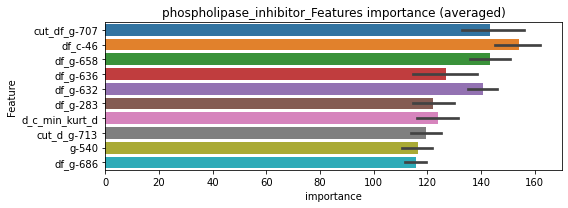

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 phospholipase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00048367	valid_1's binary_logloss: 0.0029929
[2000]	training's binary_logloss: 0.00028395	valid_1's binary_logloss: 0.00274564
[3000]	training's binary_logloss: 0.000226839	valid_1's binary_logloss: 0.00268726
Early stopping, best iteration is:
[3275]	training's binary_logloss: 0.000217631	valid_1's binary_logloss: 0.00267511


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 phospholipase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 phospholipase_inhibitor=================================


Early stopping, best iteration is:
[716]	training's binary_logloss: 0.000661822	valid_1's binary_logloss: 0.00324507
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000473249	valid_1's binary_logloss: 0.000741556
[2000]	training's binary_logloss: 0.000277481	valid_1's binary_logloss: 0.000504995
[3000]	training's binary_logloss: 0.000218502	valid_1's binary_logloss: 0.000424669
[4000]	training's binary_logloss: 0.000191169	valid_1's binary_logloss: 0.000383591
[5000]	training's binary_logloss: 0.000176654	valid_1's binary_logloss: 0.000360804
[6000]	training's binary_logloss: 0.000167337	valid_1's binary_logloss: 0.000345116
Early stopping, best iteration is:
[6276]	training's binary_logloss: 0.000165039	valid_1's binary_logloss: 0.000341609


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 phospholipase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000483126	valid_1's binary_logloss: 0.000496031
[2000]	training's binary_logloss: 0.000284085	valid_1's binary_logloss: 0.000280112
[3000]	training's binary_logloss: 0.00022605	valid_1's binary_logloss: 0.000213666
[4000]	training's binary_logloss: 0.00019886	valid_1's binary_logloss: 0.000181766
[5000]	training's binary_logloss: 0.000184719	valid_1's binary_logloss: 0.000165175
[6000]	training's binary_logloss: 0.000175669	valid_1's binary_logloss: 0.000154929
[7000]	training's binary_logloss: 0.000168935	valid_1's binary_logloss: 0.0001474
Early stopping, best iteration is:
[7560]	training's binary_logloss: 0.00016609	valid_1's binary_logloss: 0.000144181


phospholipase_inhibitor logloss: 0.0016021082419564985


neg labels: 3289 → selected neg labels: 3262


pi3k_inhibitor, len(trt): 151, len(othr): 3262
target_rate: 0.0063408 → Adj_target_rate: 0.0059749
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0189217	valid_1's binary_logloss: 0.136642
Early stopping, best iteration is:
[469]	training's binary_logloss: 0.00551315	valid_1's binary_logloss: 0.126247
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0216306	valid_1's binary_logloss: 0.103702
[600]	training's binary_logloss: 0.00316743	valid_1's binary_logloss: 0.0827693
Early stopping, best iteration is:
[750]	training's binary_logloss: 0.00189778	valid_1's binary_logloss: 0.0811274
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0194651	valid_1's binary_logloss: 0.120841
[600]	training's binary_logloss: 0.00290117	valid_1's binary_logloss: 0.104201
Early stopping, best iteration is:
[668]	training's binary_logloss: 0.00224827	valid_1's binary_logloss: 0.103528
Training until validation scores don't improve for 30 rounds
[300]	training's bin

1 / 3 AUC score:0.981
y_Threshold: 0.0266468, Threshold: 0.0688106, pos_neg_ratio: 0.8000000
Remove_noisy_data: 203 → Positive_corect_labels: 616/3711
p_label_rate: 0.0100452 Vs.target_rate: 0.00634
Num_p_label: 40.0, conf_0:0.04817, conf_1:0.08945
Num_p_label: 40.0, Expected: 25.2, Adj_threshold_1: 0.0688106
Num_p_label: 21.0, Expected: 25.2, Adj_threshold_2: 0.0988106
threshold: 0.0988106, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 616.0/3711, y_label_rate: 0.1659930
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0141233	valid_1's binary_logloss: 0.101754
Early stopping, best iteration is:
[565]	training's binary_logloss: 0.00255105	valid_1's binary_logloss: 0.089716
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0139143	valid_1's binary_logloss: 0.0979573
[600]	training's binary_logloss: 0.00218385	valid_1's binary_logloss: 0.0831749
Early stopping, best iteration is:
[606]	training's binary_logloss: 0.00213773	valid_1's binary_logloss: 0.0829956
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0148069	valid_1's binary_logloss: 0.0860883
[600]	training's binary_logloss: 0.00233954	valid_1's binary_logloss: 0.0700549
Early stopping, best iteration is:
[588]	training's binary_logloss: 0.00244148	valid_1's binary_logloss: 0.0696408
Training until validation scores don't improve for 30 rounds
[300]	training's

2 / 3 AUC score:0.995
y_Threshold: 0.0502143, Threshold: 0.0988106, pos_neg_ratio: 0.8000000
Remove_noisy_data: 58 → Positive_corect_labels: 587.0/3653
p_label_rate: 0.0105475 Vs.target_rate: 0.00634
Num_p_label: 42.0, conf_0:0.07905, conf_1:0.11857
Num_p_label: 42.0, Expected: 25.2, Adj_threshold_1: 0.0988106
Num_p_label: 30.0, Expected: 25.2, Adj_threshold_2: 0.1288106
threshold: 0.1288106, positive_p_label: 30.0/3982, p_label_rate: 0.0075339
positive_y_label: 587.0/3653, y_label_rate: 0.1606898
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0112855	valid_1's binary_logloss: 0.0853695
[600]	training's binary_logloss: 0.00190362	valid_1's binary_logloss: 0.0711357
Early stopping, best iteration is:
[653]	training's binary_logloss: 0.00161339	valid_1's binary_logloss: 0.0704765
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0121855	valid_1's binary_logloss: 0.0815435
[600]	training's binary_logloss: 0.00195666	valid_1's binary_logloss: 0.0616342
[900]	training's binary_logloss: 0.000983329	valid_1's binary_logloss: 0.0585746
Early stopping, best iteration is:
[877]	training's binary_logloss: 0.00101689	valid_1's binary_logloss: 0.0584284
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0132438	valid_1's binary_logloss: 0.0606149
[600]	training's binary_logloss: 0.00210246	valid_1's binary_logloss: 0.0449428
Early stopping, best iteratio

3 / 3 AUC score:0.998
y_Threshold: 0.0441886, Threshold: 0.1288106, pos_neg_ratio: 0.8000000
Remove_noisy_data: 20 → Positive_corect_labels: 577.0/3633
p_label_rate: 0.0072828 Vs.target_rate: 0.00634
Num_p_label: 29.0, conf_0:0.11593, conf_1:0.14169
threshold: 0.1288106, positive_p_label: 29.0/3982, p_label_rate: 0.0072828
positive_y_label: 577.0/3633, y_label_rate: 0.1588219


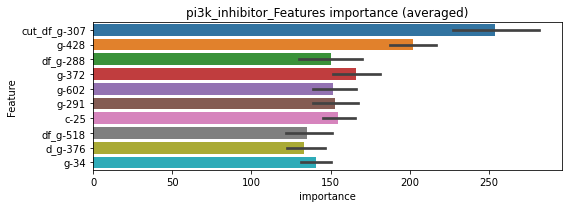

len(train_index) : 2724
len(valid_index) : 909
================================= fold 1/4 pi3k_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000613865	valid_1's binary_logloss: 0.00430558
Early stopping, best iteration is:
[1733]	training's binary_logloss: 0.000383597	valid_1's binary_logloss: 0.00397294


len(train_index) : 2725
len(valid_index) : 908
================================= fold 2/4 pi3k_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000590361	valid_1's binary_logloss: 0.00284288
Early stopping, best iteration is:
[1420]	training's binary_logloss: 0.000429433	valid_1's binary_logloss: 0.00262092


len(train_index) : 2725
len(valid_index) : 908
================================= fold 3/4 pi3k_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000598488	valid_1's binary_logloss: 0.000745295
[2000]	training's binary_logloss: 0.000337665	valid_1's binary_logloss: 0.000402752
[3000]	training's binary_logloss: 0.000261537	valid_1's binary_logloss: 0.000298059
[4000]	training's binary_logloss: 0.000225276	valid_1's binary_logloss: 0.000248354
[5000]	training's binary_logloss: 0.000206085	valid_1's binary_logloss: 0.00022255
[6000]	training's binary_logloss: 0.000193331	valid_1's binary_logloss: 0.000206567
[7000]	training's binary_logloss: 0.000184101	valid_1's binary_logloss: 0.000194877
Early stopping, best iteration is:
[7966]	training's binary_logloss: 0.000177235	valid_1's binary_logloss: 0.000185728


len(train_index) : 2725
len(valid_index) : 908
================================= fold 4/4 pi3k_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000614478	valid_1's binary_logloss: 0.00419609
[2000]	training's binary_logloss: 0.000345045	valid_1's binary_logloss: 0.0037368
Early stopping, best iteration is:
[2830]	training's binary_logloss: 0.000274567	valid_1's binary_logloss: 0.00360684


pi3k_inhibitor logloss: 0.0025980597536977377


neg labels: 3289 → selected neg labels: 3286


pkc_inhibitor, len(trt): 31, len(othr): 3286
target_rate: 0.0013018 → Adj_target_rate: 0.0015554
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00226278	valid_1's binary_logloss: 0.00652795
[600]	training's binary_logloss: 0.000527102	valid_1's binary_logloss: 0.00251527
Early stopping, best iteration is:
[672]	training's binary_logloss: 0.000486493	valid_1's binary_logloss: 0.00242162
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0021601	valid_1's binary_logloss: 0.018805
[600]	training's binary_logloss: 0.000516962	valid_1's binary_logloss: 0.0129776
Early stopping, best iteration is:
[636]	training's binary_logloss: 0.000492596	valid_1's binary_logloss: 0.0129416
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00236094	valid_1's binary_logloss: 0.00438684
[600]	training's binary_logloss: 0.000548376	valid_1's binary_logloss: 0.00168296
Early stopping, best iteration is:
[684]	training's binary_logloss: 0.000501665	valid_1's binary_lo

1 / 3 AUC score:1.000
y_Threshold: 0.0030837, Threshold: 0.0098780, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00130
Num_p_label: 40.0, conf_0:0.00691, conf_1:0.01284
Num_p_label: 40.0, Expected: 5.2, Adj_threshold_1: 0.0098780
Num_p_label: 4.0, Expected: 5.2, Adj_threshold_2: 0.0398780
threshold: 0.0398780, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00215636	valid_1's binary_logloss: 0.00606077
[600]	training's binary_logloss: 0.000504901	valid_1's binary_logloss: 0.00240973
Early stopping, best iteration is:
[662]	training's binary_logloss: 0.000470414	valid_1's binary_logloss: 0.0023387
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00198189	valid_1's binary_logloss: 0.0170028
[600]	training's binary_logloss: 0.000495664	valid_1's binary_logloss: 0.0117267
Early stopping, best iteration is:
[602]	training's binary_logloss: 0.000494599	valid_1's binary_logloss: 0.0117088
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00211424	valid_1's binary_logloss: 0.0038244
[600]	training's binary_logloss: 0.000511427	valid_1's binary_logloss: 0.0013589
Early stopping, best iteration is:
[661]	training's binary_logloss: 0.000478713	valid_1's binary_log

2 / 3 AUC score:1.000
y_Threshold: 0.0275044, Threshold: 0.0398780, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0030136 Vs.target_rate: 0.00130
Num_p_label: 12.0, conf_0:0.03190, conf_1:0.04785
Num_p_label: 12.0, Expected: 5.2, Adj_threshold_1: 0.0398780
threshold: 0.0398780, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00215636	valid_1's binary_logloss: 0.00606077
[600]	training's binary_logloss: 0.000504901	valid_1's binary_logloss: 0.00240973
Early stopping, best iteration is:
[662]	training's binary_logloss: 0.000470414	valid_1's binary_logloss: 0.0023387
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00198189	valid_1's binary_logloss: 0.0170028
[600]	training's binary_logloss: 0.000495664	valid_1's binary_logloss: 0.0117267
Early stopping, best iteration is:
[602]	training's binary_logloss: 0.000494599	valid_1's binary_logloss: 0.0117088
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00211424	valid_1's binary_logloss: 0.0038244
[600]	training's binary_logloss: 0.000511427	valid_1's binary_logloss: 0.0013589
Early stopping, best iteration is:
[661]	training's binary_logloss: 0.000478713	valid_1's binary_log

3 / 3 AUC score:1.000
y_Threshold: 0.0275044, Threshold: 0.0398780, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0030136 Vs.target_rate: 0.00130
Num_p_label: 12.0, conf_0:0.03589, conf_1:0.04387
Num_p_label: 12.0, Expected: 5.2, Adj_threshold_1: 0.0398780
threshold: 0.0398780, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


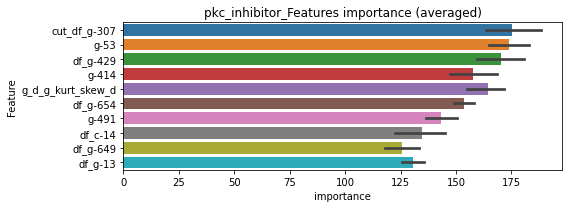

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 pkc_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000476297	valid_1's binary_logloss: 0.002004
Early stopping, best iteration is:
[1029]	training's binary_logloss: 0.000462799	valid_1's binary_logloss: 0.00197917


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 pkc_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 pkc_inhibitor=================================


Early stopping, best iteration is:
[497]	training's binary_logloss: 0.000921166	valid_1's binary_logloss: 0.0125131
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000499855	valid_1's binary_logloss: 0.00082286
[2000]	training's binary_logloss: 0.000291375	valid_1's binary_logloss: 0.00058598
[3000]	training's binary_logloss: 0.000231016	valid_1's binary_logloss: 0.000512117
[4000]	training's binary_logloss: 0.00020269	valid_1's binary_logloss: 0.000479696
Early stopping, best iteration is:
[4601]	training's binary_logloss: 0.000193125	valid_1's binary_logloss: 0.000463762


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 pkc_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000507659	valid_1's binary_logloss: 0.000612294
[2000]	training's binary_logloss: 0.000299388	valid_1's binary_logloss: 0.000369297
[3000]	training's binary_logloss: 0.000239819	valid_1's binary_logloss: 0.000294003
[4000]	training's binary_logloss: 0.000211348	valid_1's binary_logloss: 0.000257339
[5000]	training's binary_logloss: 0.00019682	valid_1's binary_logloss: 0.000238158
[6000]	training's binary_logloss: 0.000187152	valid_1's binary_logloss: 0.00022553
[7000]	training's binary_logloss: 0.000180261	valid_1's binary_logloss: 0.000216455
Early stopping, best iteration is:
[7947]	training's binary_logloss: 0.000175394	valid_1's binary_logloss: 0.00021007


pkc_inhibitor logloss: 0.003792804066842443


neg labels: 3289 → selected neg labels: 3281


potassium_channel_activator, len(trt): 55, len(othr): 3281
target_rate: 0.0023096 → Adj_target_rate: 0.0025322
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00403177	valid_1's binary_logloss: 0.0422108
Early stopping, best iteration is:
[564]	training's binary_logloss: 0.0008857	valid_1's binary_logloss: 0.0332289
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00448092	valid_1's binary_logloss: 0.0190229
[600]	training's binary_logloss: 0.000856274	valid_1's binary_logloss: 0.0111034
Early stopping, best iteration is:
[727]	training's binary_logloss: 0.000662694	valid_1's binary_logloss: 0.0103749
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00458793	valid_1's binary_logloss: 0.0126188
[600]	training's binary_logloss: 0.000877086	valid_1's binary_logloss: 0.00446757
Early stopping, best iteration is:
[759]	training's binary_logloss: 0.000653194	valid_1's binary_logloss: 0.00392558
Training until validation scores don't improve for 30 rounds
[300]	

1 / 3 AUC score:1.000
y_Threshold: 0.0058552, Threshold: 0.0374522, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 655/3803
p_label_rate: 0.0100452 Vs.target_rate: 0.00231
Num_p_label: 40.0, conf_0:0.02622, conf_1:0.04869
Num_p_label: 40.0, Expected: 9.2, Adj_threshold_1: 0.0374522
Num_p_label: 18.0, Expected: 9.2, Adj_threshold_2: 0.0674522
threshold: 0.0674522, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 655.0/3803, y_label_rate: 0.1722324
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00401652	valid_1's binary_logloss: 0.0288486
[600]	training's binary_logloss: 0.000808209	valid_1's binary_logloss: 0.0210492
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000840674	valid_1's binary_logloss: 0.0210015
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00399899	valid_1's binary_logloss: 0.0217129
[600]	training's binary_logloss: 0.000806021	valid_1's binary_logloss: 0.0139348
Early stopping, best iteration is:
[753]	training's binary_logloss: 0.00062602	valid_1's binary_logloss: 0.0135219
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00412244	valid_1's binary_logloss: 0.0155122
[600]	training's binary_logloss: 0.00082772	valid_1's binary_logloss: 0.00795207
Early stopping, best iteration is:
[733]	training's binary_logloss: 0.000646309	valid_1's binary_loglos

2 / 3 AUC score:1.000
y_Threshold: 0.0296592, Threshold: 0.0674522, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 651.0/3795
p_label_rate: 0.0183325 Vs.target_rate: 0.00231
Num_p_label: 73.0, conf_0:0.05396, conf_1:0.08094
Num_p_label: 73.0, Expected: 9.2, Adj_threshold_1: 0.0674522
Num_p_label: 53.0, Expected: 9.2, Adj_threshold_2: 0.0974522
Num_p_label: 44.0, Expected: 9.2, Adj_threshold_3: 0.1274522
Num_p_label: 37.0, Expected: 9.2, Adj_threshold_4: 0.1574522
Num_p_label: 26.0, Expected: 9.2, Adj_threshold_5: 0.1874522
Num_p_label: 22.0, Expected: 9.2, Adj_threshold_6: 0.2174522
threshold: 0.2174522, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 651.0/3795, y_label_rate: 0.1715415
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0038902	valid_1's binary_logloss: 0.0243051
[600]	training's binary_logloss: 0.00079113	valid_1's binary_logloss: 0.0165463
Early stopping, best iteration is:
[631]	training's binary_logloss: 0.000735843	valid_1's binary_logloss: 0.0164139
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00382923	valid_1's binary_logloss: 0.0188748
[600]	training's binary_logloss: 0.000784839	valid_1's binary_logloss: 0.0111592
Early stopping, best iteration is:
[739]	training's binary_logloss: 0.000628466	valid_1's binary_logloss: 0.0105908
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00384518	valid_1's binary_logloss: 0.0201918
[600]	training's binary_logloss: 0.000787308	valid_1's binary_logloss: 0.0133537
Early stopping, best iteration is:
[762]	training's binary_logloss: 0.000614019	valid_1's binary_logloss

3 / 3 AUC score:1.000
y_Threshold: 0.0333034, Threshold: 0.2174522, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 648.0/3789
p_label_rate: 0.0075339 Vs.target_rate: 0.00231
Num_p_label: 30.0, conf_0:0.19571, conf_1:0.23920
Num_p_label: 30.0, Expected: 9.2, Adj_threshold_1: 0.2174522
Num_p_label: 24.0, Expected: 9.2, Adj_threshold_2: 0.2474522
Num_p_label: 20.0, Expected: 9.2, Adj_threshold_3: 0.2774522
threshold: 0.2774522, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 648.0/3789, y_label_rate: 0.1710214


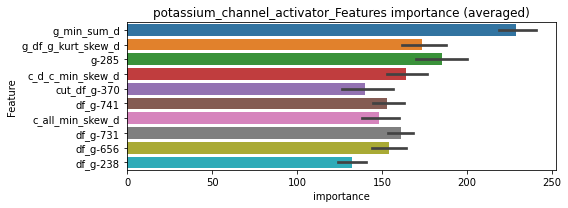

len(train_index) : 2841
len(valid_index) : 948
================================= fold 1/4 potassium_channel_activator=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000523598	valid_1's binary_logloss: 0.00462538
Early stopping, best iteration is:
[1729]	training's binary_logloss: 0.000335196	valid_1's binary_logloss: 0.00427158


len(train_index) : 2842
len(valid_index) : 947
================================= fold 2/4 potassium_channel_activator=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2842
len(valid_index) : 947
================================= fold 3/4 potassium_channel_activator=================================


Early stopping, best iteration is:
[636]	training's binary_logloss: 0.000810774	valid_1's binary_logloss: 0.00374967
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000441004	valid_1's binary_logloss: 0.00065353
[2000]	training's binary_logloss: 0.000248302	valid_1's binary_logloss: 0.000369157
[3000]	training's binary_logloss: 0.000183418	valid_1's binary_logloss: 0.000272994
[4000]	training's binary_logloss: 0.000152364	valid_1's binary_logloss: 0.000226897
[5000]	training's binary_logloss: 0.000136431	valid_1's binary_logloss: 0.000203232
[6000]	training's binary_logloss: 0.000126202	valid_1's binary_logloss: 0.000188023
[7000]	training's binary_logloss: 0.000119119	valid_1's binary_logloss: 0.000177495
[8000]	training's binary_logloss: 0.000114233	valid_1's binary_logloss: 0.000170224
[9000]	training's binary_logloss: 0.000110779	valid_1's binary_logloss: 0.000165083
[10000]	training's binary_logloss: 0.000108267	valid_1's binary_log

len(train_index) : 2842
len(valid_index) : 947
================================= fold 4/4 potassium_channel_activator=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00053545	valid_1's binary_logloss: 0.00223908
[2000]	training's binary_logloss: 0.000306107	valid_1's binary_logloss: 0.00193001
[3000]	training's binary_logloss: 0.000237509	valid_1's binary_logloss: 0.00182757
[4000]	training's binary_logloss: 0.000206955	valid_1's binary_logloss: 0.00177868
Early stopping, best iteration is:
[4147]	training's binary_logloss: 0.000203668	valid_1's binary_logloss: 0.00177395


potassium_channel_activator logloss: 0.002489992759866075


neg labels: 3289 → selected neg labels: 3278


potassium_channel_antagonist, len(trt): 98, len(othr): 3278
target_rate: 0.0041152 → Adj_target_rate: 0.0041375
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00953656	valid_1's binary_logloss: 0.0793332
Early stopping, best iteration is:
[533]	training's binary_logloss: 0.00202874	valid_1's binary_logloss: 0.0675409
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0102821	valid_1's binary_logloss: 0.0708816
Early stopping, best iteration is:
[538]	training's binary_logloss: 0.00209556	valid_1's binary_logloss: 0.0609122
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0108922	valid_1's binary_logloss: 0.0502358
Early stopping, best iteration is:
[565]	training's binary_logloss: 0.00195293	valid_1's binary_logloss: 0.0392189
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00999543	valid_1's binary_logloss: 0.0706856
[600]	training's binary_logloss: 0.00159805	valid_1's binary_logloss: 0.061034
Early stopping

1 / 3 AUC score:0.995
y_Threshold: 0.0124956, Threshold: 0.0322201, pos_neg_ratio: 0.8000000
Remove_noisy_data: 150 → Positive_corect_labels: 646/3783
p_label_rate: 0.0100452 Vs.target_rate: 0.00412
Num_p_label: 40.0, conf_0:0.02255, conf_1:0.04189
Num_p_label: 40.0, Expected: 16.4, Adj_threshold_1: 0.0322201
Num_p_label: 21.0, Expected: 16.4, Adj_threshold_2: 0.0622201
threshold: 0.0622201, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 646.0/3783, y_label_rate: 0.1707639
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0092616	valid_1's binary_logloss: 0.0616852
Early stopping, best iteration is:
[486]	training's binary_logloss: 0.00246475	valid_1's binary_logloss: 0.0520094
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00908294	valid_1's binary_logloss: 0.0697568
[600]	training's binary_logloss: 0.00145964	valid_1's binary_logloss: 0.0561328
Early stopping, best iteration is:
[745]	training's binary_logloss: 0.000992917	valid_1's binary_logloss: 0.0548126
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00941663	valid_1's binary_logloss: 0.0587642
[600]	training's binary_logloss: 0.00151996	valid_1's binary_logloss: 0.0474741
Early stopping, best iteration is:
[622]	training's binary_logloss: 0.0014204	valid_1's binary_logloss: 0.0472851
Training until validation scores don't improve for 30 rounds
[300]	traini

2 / 3 AUC score:0.999
y_Threshold: 0.0321358, Threshold: 0.0622201, pos_neg_ratio: 0.8000000
Remove_noisy_data: 20 → Positive_corect_labels: 636.0/3763
p_label_rate: 0.0080362 Vs.target_rate: 0.00412
Num_p_label: 32.0, conf_0:0.04978, conf_1:0.07466
Num_p_label: 32.0, Expected: 16.4, Adj_threshold_1: 0.0622201
Num_p_label: 25.0, Expected: 16.4, Adj_threshold_2: 0.0922201
Num_p_label: 19.0, Expected: 16.4, Adj_threshold_3: 0.1222201
threshold: 0.1222201, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 636.0/3763, y_label_rate: 0.1690141
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00779056	valid_1's binary_logloss: 0.0628086
[600]	training's binary_logloss: 0.00133735	valid_1's binary_logloss: 0.0504129
Early stopping, best iteration is:
[689]	training's binary_logloss: 0.0010373	valid_1's binary_logloss: 0.0496883
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00842087	valid_1's binary_logloss: 0.045272
[600]	training's binary_logloss: 0.00142421	valid_1's binary_logloss: 0.0332417
Early stopping, best iteration is:
[680]	training's binary_logloss: 0.00112876	valid_1's binary_logloss: 0.032629
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00870126	valid_1's binary_logloss: 0.0466239
[600]	training's binary_logloss: 0.00143463	valid_1's binary_logloss: 0.0362291
Early stopping, best iteration is:
[582]	training's binary_logloss: 0.00152711	valid_1's binary_logloss: 0.036

3 / 3 AUC score:1.000
y_Threshold: 0.0316112, Threshold: 0.1222201, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 632.0/3755
p_label_rate: 0.0045203 Vs.target_rate: 0.00412
Num_p_label: 18.0, conf_0:0.11000, conf_1:0.13444
threshold: 0.1222201, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 632.0/3755, y_label_rate: 0.1683089


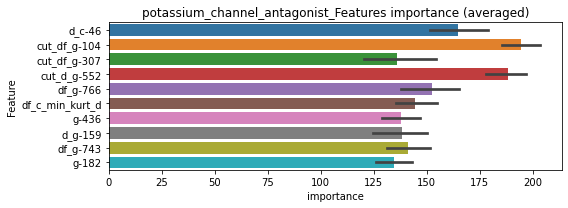

len(train_index) : 2816
len(valid_index) : 939
================================= fold 1/4 potassium_channel_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000577388	valid_1's binary_logloss: 0.00104796
[2000]	training's binary_logloss: 0.000327875	valid_1's binary_logloss: 0.000631237
[3000]	training's binary_logloss: 0.000253931	valid_1's binary_logloss: 0.000492178
[4000]	training's binary_logloss: 0.000219995	valid_1's binary_logloss: 0.000425728
[5000]	training's binary_logloss: 0.000202923	valid_1's binary_logloss: 0.000392103
[6000]	training's binary_logloss: 0.000192155	valid_1's binary_logloss: 0.000370661
[7000]	training's binary_logloss: 0.000184124	valid_1's binary_logloss: 0.00035482
Early stopping, best iteration is:
[7724]	training's binary_logloss: 0.000179774	valid_1's binary_logloss: 0.00034691


len(train_index) : 2816
len(valid_index) : 939
================================= fold 2/4 potassium_channel_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000578435	valid_1's binary_logloss: 0.0012422
[2000]	training's binary_logloss: 0.000323472	valid_1's binary_logloss: 0.000838591
[3000]	training's binary_logloss: 0.000247162	valid_1's binary_logloss: 0.000698638
[4000]	training's binary_logloss: 0.000212797	valid_1's binary_logloss: 0.000626254
[5000]	training's binary_logloss: 0.000195077	valid_1's binary_logloss: 0.000586376
[6000]	training's binary_logloss: 0.000184086	valid_1's binary_logloss: 0.000562095
Early stopping, best iteration is:
[6909]	training's binary_logloss: 0.000176841	valid_1's binary_logloss: 0.00054569


len(train_index) : 2816
len(valid_index) : 939
================================= fold 3/4 potassium_channel_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000577744	valid_1's binary_logloss: 0.00290441
Early stopping, best iteration is:
[1423]	training's binary_logloss: 0.000420013	valid_1's binary_logloss: 0.00277872


len(train_index) : 2817
len(valid_index) : 938
================================= fold 4/4 potassium_channel_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000571191	valid_1's binary_logloss: 0.00666225
Early stopping, best iteration is:
[1032]	training's binary_logloss: 0.000553111	valid_1's binary_logloss: 0.00664129


potassium_channel_antagonist logloss: 0.002577073656915755


neg labels: 3289 → selected neg labels: 3278


ppar_receptor_agonist, len(trt): 115, len(othr): 3278
target_rate: 0.0048291 → Adj_target_rate: 0.0047401
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0123212	valid_1's binary_logloss: 0.0989795
Early stopping, best iteration is:
[421]	training's binary_logloss: 0.004791	valid_1's binary_logloss: 0.090552
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0137424	valid_1's binary_logloss: 0.0848309
[600]	training's binary_logloss: 0.00210687	valid_1's binary_logloss: 0.0720847
Early stopping, best iteration is:
[574]	training's binary_logloss: 0.00234145	valid_1's binary_logloss: 0.0719314
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0130669	valid_1's binary_logloss: 0.0657576
[600]	training's binary_logloss: 0.00210103	valid_1's binary_logloss: 0.0507078
Early stopping, best iteration is:
[749]	training's binary_logloss: 0.00134716	valid_1's binary_logloss: 0.0495661
Training until validation scores don't improve for 30 rounds
[300]	training's 

1 / 3 AUC score:0.992
y_Threshold: 0.0186179, Threshold: 0.0540417, pos_neg_ratio: 0.8000000
Remove_noisy_data: 170 → Positive_corect_labels: 636/3763


Early stopping, best iteration is:
[452]	training's binary_logloss: 0.00411535	valid_1's binary_logloss: 0.0898485


p_label_rate: 0.0100452 Vs.target_rate: 0.00483
Num_p_label: 40.0, conf_0:0.03783, conf_1:0.07025
Num_p_label: 40.0, Expected: 19.2, Adj_threshold_1: 0.0540417
Num_p_label: 15.0, Expected: 19.2, Adj_threshold_2: 0.0840417
threshold: 0.0840417, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 636.0/3763, y_label_rate: 0.1690141
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00971712	valid_1's binary_logloss: 0.0835811
Early stopping, best iteration is:
[493]	training's binary_logloss: 0.00258416	valid_1's binary_logloss: 0.07731
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00963326	valid_1's binary_logloss: 0.0682919
Early stopping, best iteration is:
[516]	training's binary_logloss: 0.00228615	valid_1's binary_logloss: 0.0600662
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0104707	valid_1's binary_logloss: 0.0615281
[600]	training's binary_logloss: 0.00173232	valid_1's binary_logloss: 0.0464459
Early stopping, best iteration is:
[611]	training's binary_logloss: 0.00166798	valid_1's binary_logloss: 0.0462986
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00981314	valid_1's binary_logloss: 0.07112
Early stopping, 

2 / 3 AUC score:0.997
y_Threshold: 0.0357938, Threshold: 0.0840417, pos_neg_ratio: 0.8000000
Remove_noisy_data: 32 → Positive_corect_labels: 620.0/3731
p_label_rate: 0.0110497 Vs.target_rate: 0.00483
Num_p_label: 44.0, conf_0:0.06723, conf_1:0.10085
Num_p_label: 44.0, Expected: 19.2, Adj_threshold_1: 0.0840417
Num_p_label: 27.0, Expected: 19.2, Adj_threshold_2: 0.1140417
threshold: 0.1140417, positive_p_label: 27.0/3982, p_label_rate: 0.0067805
positive_y_label: 620.0/3731, y_label_rate: 0.1661753
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00853923	valid_1's binary_logloss: 0.0646143
[600]	training's binary_logloss: 0.00147633	valid_1's binary_logloss: 0.0540789
Early stopping, best iteration is:
[631]	training's binary_logloss: 0.00134409	valid_1's binary_logloss: 0.0539574
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00881794	valid_1's binary_logloss: 0.057728
[600]	training's binary_logloss: 0.0015147	valid_1's binary_logloss: 0.0450259
Early stopping, best iteration is:
[750]	training's binary_logloss: 0.00103788	valid_1's binary_logloss: 0.0439775
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00879713	valid_1's binary_logloss: 0.0598908
Early stopping, best iteration is:
[565]	training's binary_logloss: 0.00171011	valid_1's binary_logloss: 0.0503382
Training until validation scores don't improve for 30 rounds
[300]	trainin

3 / 3 AUC score:0.999
y_Threshold: 0.0347627, Threshold: 0.1140417, pos_neg_ratio: 0.8000000
Remove_noisy_data: 20 → Positive_corect_labels: 610.0/3711
p_label_rate: 0.0067805 Vs.target_rate: 0.00483
Num_p_label: 27.0, conf_0:0.10264, conf_1:0.12545
threshold: 0.1140417, positive_p_label: 27.0/3982, p_label_rate: 0.0067805
positive_y_label: 610.0/3711, y_label_rate: 0.1643762


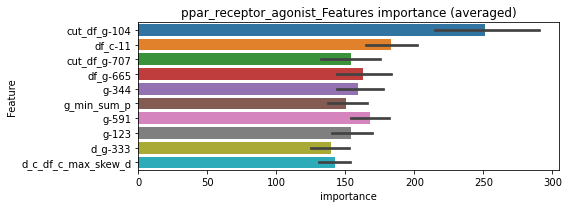

len(train_index) : 2783
len(valid_index) : 928
================================= fold 1/4 ppar_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000594327	valid_1's binary_logloss: 0.00439964
Early stopping, best iteration is:
[1798]	training's binary_logloss: 0.000364879	valid_1's binary_logloss: 0.00401609


len(train_index) : 2783
len(valid_index) : 928
================================= fold 2/4 ppar_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2783
len(valid_index) : 928
================================= fold 3/4 ppar_receptor_agonist=================================


Early stopping, best iteration is:
[813]	training's binary_logloss: 0.000698864	valid_1's binary_logloss: 0.00458636
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000576125	valid_1's binary_logloss: 0.000826674
[2000]	training's binary_logloss: 0.000328908	valid_1's binary_logloss: 0.000535796
[3000]	training's binary_logloss: 0.000255318	valid_1's binary_logloss: 0.000437935
[4000]	training's binary_logloss: 0.000220685	valid_1's binary_logloss: 0.000388508
[5000]	training's binary_logloss: 0.000202057	valid_1's binary_logloss: 0.000363222
Early stopping, best iteration is:
[5000]	training's binary_logloss: 0.000202057	valid_1's binary_logloss: 0.000363222


len(train_index) : 2784
len(valid_index) : 927
================================= fold 4/4 ppar_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00058379	valid_1's binary_logloss: 0.00124588
[2000]	training's binary_logloss: 0.00033367	valid_1's binary_logloss: 0.000832263
[3000]	training's binary_logloss: 0.000258628	valid_1's binary_logloss: 0.000692761
[4000]	training's binary_logloss: 0.000225241	valid_1's binary_logloss: 0.000626062
Early stopping, best iteration is:
[4596]	training's binary_logloss: 0.000213584	valid_1's binary_logloss: 0.000604095


ppar_receptor_agonist logloss: 0.0023933176312427302


neg labels: 3289 → selected neg labels: 3282


ppar_receptor_antagonist, len(trt): 30, len(othr): 3282
target_rate: 0.0012598 → Adj_target_rate: 0.0015127
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00225549	valid_1's binary_logloss: 0.00989724
[600]	training's binary_logloss: 0.000498723	valid_1's binary_logloss: 0.00574126
Early stopping, best iteration is:
[686]	training's binary_logloss: 0.000453166	valid_1's binary_logloss: 0.00559617
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00233673	valid_1's binary_logloss: 0.00760173
[600]	training's binary_logloss: 0.000497971	valid_1's binary_logloss: 0.00303568
Early stopping, best iteration is:
[655]	training's binary_logloss: 0.000457424	valid_1's binary_logloss: 0.00290864
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00236848	valid_1's binary_logloss: 0.0059511
[600]	training's binary_logloss: 0.000508703	valid_1's binary_logloss: 0.00269662
Early stopping, best iteration is:
[692]	training's binary_logloss: 0.000452386	valid_1's binar

1 / 3 AUC score:1.000
y_Threshold: 0.0028082, Threshold: 0.0079647, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00126
Num_p_label: 40.0, conf_0:0.00558, conf_1:0.01035
Num_p_label: 40.0, Expected: 5.0, Adj_threshold_1: 0.0079647
Num_p_label: 3.0, Expected: 5.0, Adj_threshold_2: 0.0379647
threshold: 0.0379647, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00211694	valid_1's binary_logloss: 0.00937485
[600]	training's binary_logloss: 0.000480235	valid_1's binary_logloss: 0.00569867
Early stopping, best iteration is:
[602]	training's binary_logloss: 0.000478275	valid_1's binary_logloss: 0.00568567
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00221898	valid_1's binary_logloss: 0.00599477
[600]	training's binary_logloss: 0.000485938	valid_1's binary_logloss: 0.00240603
Early stopping, best iteration is:
[654]	training's binary_logloss: 0.000451329	valid_1's binary_logloss: 0.00233043
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00225812	valid_1's binary_logloss: 0.0065378
[600]	training's binary_logloss: 0.000485453	valid_1's binary_logloss: 0.00359342
Early stopping, best iteration is:
[616]	training's binary_logloss: 0.000472014	valid_1's binar

2 / 3 AUC score:1.000
y_Threshold: 0.0184113, Threshold: 0.0379647, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3804
p_label_rate: 0.0027624 Vs.target_rate: 0.00126
Num_p_label: 11.0, conf_0:0.03037, conf_1:0.04556
Num_p_label: 11.0, Expected: 5.0, Adj_threshold_1: 0.0379647
threshold: 0.0379647, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 655.0/3804, y_label_rate: 0.1721872
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00204128	valid_1's binary_logloss: 0.0120488
[600]	training's binary_logloss: 0.000467091	valid_1's binary_logloss: 0.00758891
Early stopping, best iteration is:
[652]	training's binary_logloss: 0.000437771	valid_1's binary_logloss: 0.00746566
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00221627	valid_1's binary_logloss: 0.00562828
[600]	training's binary_logloss: 0.000485264	valid_1's binary_logloss: 0.00251253
Early stopping, best iteration is:
[658]	training's binary_logloss: 0.000446824	valid_1's binary_logloss: 0.00245348
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00216077	valid_1's binary_logloss: 0.00817813
[600]	training's binary_logloss: 0.000484494	valid_1's binary_logloss: 0.00481348
Early stopping, best iteration is:
[629]	training's binary_logloss: 0.000462306	valid_1's binar

3 / 3 AUC score:1.000
y_Threshold: 0.0195132, Threshold: 0.0379647, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[561]	training's binary_logloss: 0.000514493	valid_1's binary_logloss: 0.00747172


Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3804
p_label_rate: 0.0025113 Vs.target_rate: 0.00126
Num_p_label: 10.0, conf_0:0.03417, conf_1:0.04176
Num_p_label: 10.0, Expected: 5.0, Adj_threshold_1: 0.0379647
threshold: 0.0379647, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 655.0/3804, y_label_rate: 0.1721872


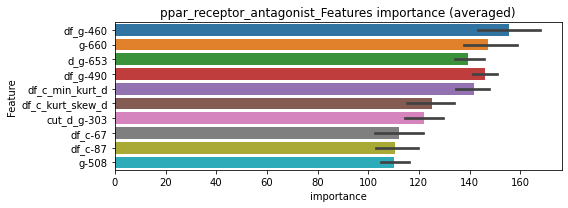

len(train_index) : 2853
len(valid_index) : 951
================================= fold 1/4 ppar_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000496291	valid_1's binary_logloss: 0.0027681
[2000]	training's binary_logloss: 0.000284049	valid_1's binary_logloss: 0.00243811
Early stopping, best iteration is:
[2150]	training's binary_logloss: 0.000270757	valid_1's binary_logloss: 0.00242448


len(train_index) : 2853
len(valid_index) : 951
================================= fold 2/4 ppar_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000498231	valid_1's binary_logloss: 0.00121589
Early stopping, best iteration is:
[1912]	training's binary_logloss: 0.000301375	valid_1's binary_logloss: 0.000961453


len(train_index) : 2853
len(valid_index) : 951
================================= fold 3/4 ppar_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000408444	valid_1's binary_logloss: 0.000534166
[2000]	training's binary_logloss: 0.00023899	valid_1's binary_logloss: 0.00031452
[3000]	training's binary_logloss: 0.000179202	valid_1's binary_logloss: 0.000236377
[4000]	training's binary_logloss: 0.000149971	valid_1's binary_logloss: 0.000198054
[5000]	training's binary_logloss: 0.000134788	valid_1's binary_logloss: 0.000178103
[6000]	training's binary_logloss: 0.000124985	valid_1's binary_logloss: 0.000165206
[7000]	training's binary_logloss: 0.000118125	valid_1's binary_logloss: 0.000156175
[8000]	training's binary_logloss: 0.000113395	valid_1's binary_logloss: 0.000149942
[9000]	training's binary_logloss: 0.000110007	valid_1's binary_logloss: 0.000145471
[10000]	training's binary_logloss: 0.000107618	valid_1's binary_logloss: 0.000142336
Did not meet early stopping. Best iteration is:
[9999]	training's binary_logloss: 0.000107618	valid_

len(train_index) : 2853
len(valid_index) : 951
================================= fold 4/4 ppar_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000406401	valid_1's binary_logloss: 0.000666759
[2000]	training's binary_logloss: 0.000238172	valid_1's binary_logloss: 0.000395893
[3000]	training's binary_logloss: 0.000178936	valid_1's binary_logloss: 0.000298993
[4000]	training's binary_logloss: 0.000149914	valid_1's binary_logloss: 0.000251181
[5000]	training's binary_logloss: 0.000134765	valid_1's binary_logloss: 0.000226065
[6000]	training's binary_logloss: 0.000124958	valid_1's binary_logloss: 0.000209757
[7000]	training's binary_logloss: 0.000118054	valid_1's binary_logloss: 0.00019824
[8000]	training's binary_logloss: 0.000113333	valid_1's binary_logloss: 0.000190382
[9000]	training's binary_logloss: 0.000109969	valid_1's binary_logloss: 0.000184774
[10000]	training's binary_logloss: 0.000107648	valid_1's binary_logloss: 0.00018097
Did not meet early stopping. Best iteration is:
[9999]	training's binary_logloss: 0.000107648	valid_

ppar_receptor_antagonist logloss: 0.000927723778014892


neg labels: 3289 → selected neg labels: 3270


progesterone_receptor_agonist, len(trt): 119, len(othr): 3270
target_rate: 0.0049971 → Adj_target_rate: 0.0048799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0119901	valid_1's binary_logloss: 0.12733
Early stopping, best iteration is:
[384]	training's binary_logloss: 0.00616636	valid_1's binary_logloss: 0.123933
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.012617	valid_1's binary_logloss: 0.0811483
[600]	training's binary_logloss: 0.00206145	valid_1's binary_logloss: 0.0657249
Early stopping, best iteration is:
[616]	training's binary_logloss: 0.00195136	valid_1's binary_logloss: 0.0656488
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0130014	valid_1's binary_logloss: 0.0653823
[600]	training's binary_logloss: 0.00208808	valid_1's binary_logloss: 0.0508425
Early stopping, best iteration is:
[686]	training's binary_logloss: 0.00158727	valid_1's binary_logloss: 0.0498979
Training until validation scores don't improve for 30 rounds
[300]	training's b

1 / 3 AUC score:0.993
y_Threshold: 0.0197428, Threshold: 0.1826400, pos_neg_ratio: 0.8000000
Remove_noisy_data: 177 → Positive_corect_labels: 631/3747
p_label_rate: 0.0100452 Vs.target_rate: 0.00500
Num_p_label: 40.0, conf_0:0.12785, conf_1:0.23743
Num_p_label: 40.0, Expected: 19.9, Adj_threshold_1: 0.1826400
Num_p_label: 34.0, Expected: 19.9, Adj_threshold_2: 0.2126400
Num_p_label: 33.0, Expected: 19.9, Adj_threshold_3: 0.2426400
Num_p_label: 28.0, Expected: 19.9, Adj_threshold_4: 0.2726400
threshold: 0.2726400, positive_p_label: 28.0/3982, p_label_rate: 0.0070316
positive_y_label: 631.0/3747, y_label_rate: 0.1684014
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00976245	valid_1's binary_logloss: 0.0649197
[600]	training's binary_logloss: 0.00165379	valid_1's binary_logloss: 0.0510962
Early stopping, best iteration is:
[742]	training's binary_logloss: 0.00113731	valid_1's binary_logloss: 0.0496217
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00999772	valid_1's binary_logloss: 0.0869009
Early stopping, best iteration is:
[497]	training's binary_logloss: 0.00259004	valid_1's binary_logloss: 0.0762723
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.010097	valid_1's binary_logloss: 0.0609626
[600]	training's binary_logloss: 0.0017183	valid_1's binary_logloss: 0.046858
Early stopping, best iteration is:
[754]	training's binary_logloss: 0.00113397	valid_1's binary_logloss: 0.0453535
Training until validation scores don't improve for 30 rounds
[300]	training'

2 / 3 AUC score:0.998
y_Threshold: 0.0373113, Threshold: 0.2726400, pos_neg_ratio: 0.8000000
Remove_noisy_data: 36 → Positive_corect_labels: 613.0/3711
p_label_rate: 0.0163235 Vs.target_rate: 0.00500


Early stopping, best iteration is:
[498]	training's binary_logloss: 0.0026102	valid_1's binary_logloss: 0.0639247


Num_p_label: 65.0, conf_0:0.21811, conf_1:0.32717
Num_p_label: 65.0, Expected: 19.9, Adj_threshold_1: 0.2726400
Num_p_label: 57.0, Expected: 19.9, Adj_threshold_2: 0.3026400
Num_p_label: 50.0, Expected: 19.9, Adj_threshold_3: 0.3326400
Num_p_label: 49.0, Expected: 19.9, Adj_threshold_4: 0.3626400
Num_p_label: 45.0, Expected: 19.9, Adj_threshold_5: 0.3926400
Num_p_label: 38.0, Expected: 19.9, Adj_threshold_6: 0.4226400
Num_p_label: 33.0, Expected: 19.9, Adj_threshold_7: 0.4526400
Num_p_label: 31.0, Expected: 19.9, Adj_threshold_8: 0.4826400
Num_p_label: 29.0, Expected: 19.9, Adj_threshold_9: 0.5126400
threshold: 0.5126400, positive_p_label: 29.0/3982, p_label_rate: 0.0072828
positive_y_label: 613.0/3711, y_label_rate: 0.1651846
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00863467	valid_1's binary_logloss: 0.0504065
[600]	training's binary_logloss: 0.00150501	valid_1's binary_logloss: 0.0378171
Early stopping, best iteration is:
[733]	training's binary_logloss: 0.00106636	valid_1's binary_logloss: 0.0365077
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00855687	valid_1's binary_logloss: 0.0558586
[600]	training's binary_logloss: 0.00152214	valid_1's binary_logloss: 0.0446242
Early stopping, best iteration is:
[614]	training's binary_logloss: 0.00145654	valid_1's binary_logloss: 0.0443948
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00840966	valid_1's binary_logloss: 0.0705256
Early stopping, best iteration is:
[427]	training's binary_logloss: 0.00319112	valid_1's binary_logloss: 0.0647735
Training until validation scores don't improve for 30 rounds
[300]	train

3 / 3 AUC score:0.999
y_Threshold: 0.0577005, Threshold: 0.5126400, pos_neg_ratio: 0.8000000
Remove_noisy_data: 36 → Positive_corect_labels: 595.0/3675
p_label_rate: 0.0105475 Vs.target_rate: 0.00500
Num_p_label: 42.0, conf_0:0.46138, conf_1:0.56390
Num_p_label: 42.0, Expected: 19.9, Adj_threshold_1: 0.5126400
Num_p_label: 36.0, Expected: 19.9, Adj_threshold_2: 0.5426400
Num_p_label: 33.0, Expected: 19.9, Adj_threshold_3: 0.5726400
Num_p_label: 26.0, Expected: 19.9, Adj_threshold_4: 0.6026400
threshold: 0.6026400, positive_p_label: 26.0/3982, p_label_rate: 0.0065294
positive_y_label: 595.0/3675, y_label_rate: 0.1619048


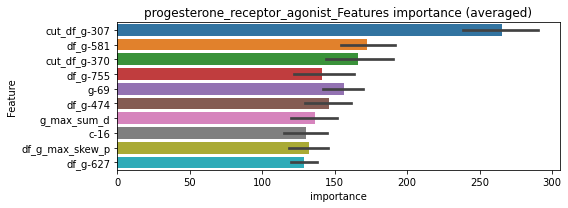

len(train_index) : 2756
len(valid_index) : 919
================================= fold 1/4 progesterone_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000572001	valid_1's binary_logloss: 0.00537403
Early stopping, best iteration is:
[1664]	training's binary_logloss: 0.00037179	valid_1's binary_logloss: 0.00515711


len(train_index) : 2756
len(valid_index) : 919
================================= fold 2/4 progesterone_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000599224	valid_1's binary_logloss: 0.00487411
Early stopping, best iteration is:
[1491]	training's binary_logloss: 0.000418792	valid_1's binary_logloss: 0.00457184


len(train_index) : 2756
len(valid_index) : 919
================================= fold 3/4 progesterone_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000588803	valid_1's binary_logloss: 0.00237162
[2000]	training's binary_logloss: 0.000334767	valid_1's binary_logloss: 0.00206156
[3000]	training's binary_logloss: 0.000260203	valid_1's binary_logloss: 0.00195377
Early stopping, best iteration is:
[3519]	training's binary_logloss: 0.000239457	valid_1's binary_logloss: 0.00191879


len(train_index) : 2757
len(valid_index) : 918
================================= fold 4/4 progesterone_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000470773	valid_1's binary_logloss: 0.000798134
[2000]	training's binary_logloss: 0.000259761	valid_1's binary_logloss: 0.000442338
[3000]	training's binary_logloss: 0.000190676	valid_1's binary_logloss: 0.000325182
[4000]	training's binary_logloss: 0.000158008	valid_1's binary_logloss: 0.000269745
[5000]	training's binary_logloss: 0.000141365	valid_1's binary_logloss: 0.000241487
[6000]	training's binary_logloss: 0.000130589	valid_1's binary_logloss: 0.000223084
[7000]	training's binary_logloss: 0.000123064	valid_1's binary_logloss: 0.000210212
[8000]	training's binary_logloss: 0.000117973	valid_1's binary_logloss: 0.000201541
[9000]	training's binary_logloss: 0.000114309	valid_1's binary_logloss: 0.000195275
[10000]	training's binary_logloss: 0.00011173	valid_1's binary_logloss: 0.00019091
Did not meet early stopping. Best iteration is:
[9999]	training's binary_logloss: 0.00011173	valid_1

progesterone_receptor_agonist logloss: 0.0029611116425017517


neg labels: 3289 → selected neg labels: 3287


progesterone_receptor_antagonist, len(trt): 18, len(othr): 3287
target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0011445	valid_1's binary_logloss: 0.00251094
Early stopping, best iteration is:
[555]	training's binary_logloss: 0.00036913	valid_1's binary_logloss: 0.00106244
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0011656	valid_1's binary_logloss: 0.00261523
Early stopping, best iteration is:
[549]	training's binary_logloss: 0.000355745	valid_1's binary_logloss: 0.00105329
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00120006	valid_1's binary_logloss: 0.00199308
Early stopping, best iteration is:
[534]	training's binary_logloss: 0.000369285	valid_1's binary_logloss: 0.000800006
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00111899	valid_1's binary_logloss: 0.00599157


1 / 3 AUC score:1.000
y_Threshold: 0.0022687, Threshold: 0.0087497, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, conf_0:0.00612, conf_1:0.01137
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_1: 0.0087497
Num_p_label: 5.0, Expected: 3.0, Adj_threshold_2: 0.0387497
threshold: 0.0387497, positive_p_label: 5.0/3982, p_label_rate: 0.0012557


Early stopping, best iteration is:
[569]	training's binary_logloss: 0.000348949	valid_1's binary_logloss: 0.00351591


positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00107631	valid_1's binary_logloss: 0.00202387
Early stopping, best iteration is:
[538]	training's binary_logloss: 0.000341693	valid_1's binary_logloss: 0.000786621
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00106694	valid_1's binary_logloss: 0.00222415
[600]	training's binary_logloss: 0.000334714	valid_1's binary_logloss: 0.00088575
Early stopping, best iteration is:
[570]	training's binary_logloss: 0.000335005	valid_1's binary_logloss: 0.000885381
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00110656	valid_1's binary_logloss: 0.00196919
Early stopping, best iteration is:
[533]	training's binary_logloss: 0.00034528	valid_1's binary_logloss: 0.000843447
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00102878	valid_1's binary_logloss: 0.005620

2 / 3 AUC score:1.000
y_Threshold: 0.0716732, Threshold: 0.0387497, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0077850 Vs.target_rate: 0.00076
Num_p_label: 31.0, conf_0:0.03100, conf_1:0.04650
Num_p_label: 31.0, Expected: 3.0, Adj_threshold_1: 0.0387497
Num_p_label: 17.0, Expected: 3.0, Adj_threshold_2: 0.0687497
Num_p_label: 9.0, Expected: 3.0, Adj_threshold_3: 0.0987497
Num_p_label: 5.0, Expected: 3.0, Adj_threshold_4: 0.1287497
threshold: 0.1287497, positive_p_label: 5.0/3982, p_label_rate: 0.0012557


Early stopping, best iteration is:
[513]	training's binary_logloss: 0.000345193	valid_1's binary_logloss: 0.00387256


positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00107631	valid_1's binary_logloss: 0.00202387
Early stopping, best iteration is:
[538]	training's binary_logloss: 0.000341693	valid_1's binary_logloss: 0.000786621
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00106694	valid_1's binary_logloss: 0.00222415
[600]	training's binary_logloss: 0.000334714	valid_1's binary_logloss: 0.00088575
Early stopping, best iteration is:
[570]	training's binary_logloss: 0.000335005	valid_1's binary_logloss: 0.000885381
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00110656	valid_1's binary_logloss: 0.00196919
Early stopping, best iteration is:
[533]	training's binary_logloss: 0.00034528	valid_1's binary_logloss: 0.000843447
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00102878	valid_1's binary_logloss: 0.005620

3 / 3 AUC score:1.000
y_Threshold: 0.0716732, Threshold: 0.1287497, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0012557 Vs.target_rate: 0.00076
Num_p_label: 5.0, conf_0:0.11587, conf_1:0.14162


Early stopping, best iteration is:
[513]	training's binary_logloss: 0.000345193	valid_1's binary_logloss: 0.00387256


Num_p_label: 5.0, Expected: 3.0, Adj_threshold_1: 0.1287497
threshold: 0.1287497, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


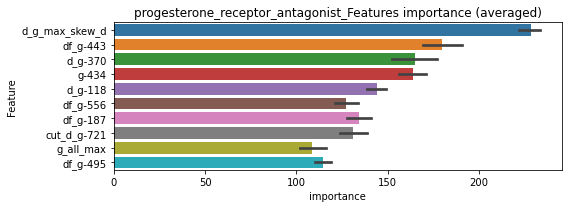

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 progesterone_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000428933	valid_1's binary_logloss: 0.000731758
[2000]	training's binary_logloss: 0.000260109	valid_1's binary_logloss: 0.00051581
[3000]	training's binary_logloss: 0.000212226	valid_1's binary_logloss: 0.000450405
[4000]	training's binary_logloss: 0.000190553	valid_1's binary_logloss: 0.000417146
Early stopping, best iteration is:
[4221]	training's binary_logloss: 0.000187374	valid_1's binary_logloss: 0.000412676


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 progesterone_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000434189	valid_1's binary_logloss: 0.000401154
[2000]	training's binary_logloss: 0.000262326	valid_1's binary_logloss: 0.000234982
[3000]	training's binary_logloss: 0.000215727	valid_1's binary_logloss: 0.000185921
[4000]	training's binary_logloss: 0.000194525	valid_1's binary_logloss: 0.000162312
[5000]	training's binary_logloss: 0.000183203	valid_1's binary_logloss: 0.000149675
[6000]	training's binary_logloss: 0.000175979	valid_1's binary_logloss: 0.000141608
[7000]	training's binary_logloss: 0.000170375	valid_1's binary_logloss: 0.000135335
Early stopping, best iteration is:
[7935]	training's binary_logloss: 0.000166481	valid_1's binary_logloss: 0.000131142


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 progesterone_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000432766	valid_1's binary_logloss: 0.000858642
[2000]	training's binary_logloss: 0.000259326	valid_1's binary_logloss: 0.000651417
[3000]	training's binary_logloss: 0.000212831	valid_1's binary_logloss: 0.000598742
Early stopping, best iteration is:
[3528]	training's binary_logloss: 0.000199272	valid_1's binary_logloss: 0.000584955


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 progesterone_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


progesterone_receptor_antagonist logloss: 0.0016463390189782707


Early stopping, best iteration is:
[952]	training's binary_logloss: 0.000441305	valid_1's binary_logloss: 0.00545639
neg labels: 3289 → selected neg labels: 3286


prostaglandin_inhibitor, len(trt): 36, len(othr): 3286
target_rate: 0.0015117 → Adj_target_rate: 0.0017663
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00257096	valid_1's binary_logloss: 0.0113197
[600]	training's binary_logloss: 0.000544598	valid_1's binary_logloss: 0.00649352
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.000510832	valid_1's binary_logloss: 0.00639946
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00252137	valid_1's binary_logloss: 0.0177212
[600]	training's binary_logloss: 0.000536019	valid_1's binary_logloss: 0.0124783
Early stopping, best iteration is:
[690]	training's binary_logloss: 0.000481561	valid_1's binary_logloss: 0.0122592
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00265878	valid_1's binary_logloss: 0.0176113
Early stopping, best iteration is:
[419]	training's binary_logloss: 0.0010812	valid_1's binary_logloss: 0.0155342
Training until validation scores don't improve for 30 rounds
[300]	

1 / 3 AUC score:1.000
y_Threshold: 0.0037533, Threshold: 0.0196023, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, conf_0:0.01372, conf_1:0.02548
Num_p_label: 40.0, Expected: 6.0, Adj_threshold_1: 0.0196023
Num_p_label: 20.0, Expected: 6.0, Adj_threshold_2: 0.0496023
Num_p_label: 16.0, Expected: 6.0, Adj_threshold_3: 0.0796023
Num_p_label: 15.0, Expected: 6.0, Adj_threshold_4: 0.1096023
threshold: 0.1096023, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00244115	valid_1's binary_logloss: 0.0111331
[600]	training's binary_logloss: 0.000529876	valid_1's binary_logloss: 0.0068564
Early stopping, best iteration is:
[615]	training's binary_logloss: 0.000514591	valid_1's binary_logloss: 0.00678283
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00230464	valid_1's binary_logloss: 0.0156192
[600]	training's binary_logloss: 0.00051363	valid_1's binary_logloss: 0.0107538
Early stopping, best iteration is:
[657]	training's binary_logloss: 0.000473074	valid_1's binary_logloss: 0.0106435
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00246343	valid_1's binary_logloss: 0.0138189
Early stopping, best iteration is:
[472]	training's binary_logloss: 0.000790648	valid_1's binary_logloss: 0.012201
Training until validation scores don't improve for 30 rounds
[300]	t

2 / 3 AUC score:1.000
y_Threshold: 0.0167629, Threshold: 0.1096023, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3809
p_label_rate: 0.0045203 Vs.target_rate: 0.00151
Num_p_label: 18.0, conf_0:0.08768, conf_1:0.13152
Num_p_label: 18.0, Expected: 6.0, Adj_threshold_1: 0.1096023
Num_p_label: 16.0, Expected: 6.0, Adj_threshold_2: 0.1396023
Num_p_label: 15.0, Expected: 6.0, Adj_threshold_3: 0.1696023
threshold: 0.1696023, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 656.0/3809, y_label_rate: 0.1722237
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00228005	valid_1's binary_logloss: 0.0159443
Early stopping, best iteration is:
[555]	training's binary_logloss: 0.000572204	valid_1's binary_logloss: 0.0121175
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00250967	valid_1's binary_logloss: 0.00674431
[600]	training's binary_logloss: 0.000530483	valid_1's binary_logloss: 0.00298862
Early stopping, best iteration is:
[681]	training's binary_logloss: 0.000475631	valid_1's binary_logloss: 0.00290962
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00249068	valid_1's binary_logloss: 0.00656505
[600]	training's binary_logloss: 0.00053482	valid_1's binary_logloss: 0.0029263
Early stopping, best iteration is:
[729]	training's binary_logloss: 0.000471933	valid_1's binary_logloss: 0.0027739
Training until validation scores don't improve for 30 rounds
[30

3 / 3 AUC score:1.000
y_Threshold: 0.0261120, Threshold: 0.1696023, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3809
p_label_rate: 0.0037670 Vs.target_rate: 0.00151
Num_p_label: 15.0, conf_0:0.15264, conf_1:0.18656
Num_p_label: 15.0, Expected: 6.0, Adj_threshold_1: 0.1696023
threshold: 0.1696023, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 656.0/3809, y_label_rate: 0.1722237


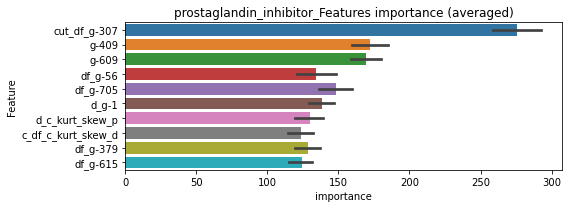

len(train_index) : 2856
len(valid_index) : 953
================================= fold 1/4 prostaglandin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000480153	valid_1's binary_logloss: 0.00175278
Early stopping, best iteration is:
[1345]	training's binary_logloss: 0.000374016	valid_1's binary_logloss: 0.00161993


len(train_index) : 2857
len(valid_index) : 952
================================= fold 2/4 prostaglandin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00051115	valid_1's binary_logloss: 0.000480564
[2000]	training's binary_logloss: 0.000299617	valid_1's binary_logloss: 0.00027294
[3000]	training's binary_logloss: 0.000238801	valid_1's binary_logloss: 0.000208602
[4000]	training's binary_logloss: 0.000210691	valid_1's binary_logloss: 0.00017727
[5000]	training's binary_logloss: 0.000196316	valid_1's binary_logloss: 0.000160849
[6000]	training's binary_logloss: 0.00018675	valid_1's binary_logloss: 0.000150127
[7000]	training's binary_logloss: 0.000179505	valid_1's binary_logloss: 0.000142417
[8000]	training's binary_logloss: 0.000174348	valid_1's binary_logloss: 0.000136867
Early stopping, best iteration is:
[8378]	training's binary_logloss: 0.000172563	valid_1's binary_logloss: 0.000134887


len(train_index) : 2857
len(valid_index) : 952
================================= fold 3/4 prostaglandin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000506187	valid_1's binary_logloss: 0.00105575
[2000]	training's binary_logloss: 0.000295526	valid_1's binary_logloss: 0.000806465
Early stopping, best iteration is:
[2927]	training's binary_logloss: 0.000237041	valid_1's binary_logloss: 0.000726349


len(train_index) : 2857
len(valid_index) : 952
================================= fold 4/4 prostaglandin_inhibitor=================================


Training until validation scores don't improve for 30 rounds


prostaglandin_inhibitor logloss: 0.0015845298992330345


Early stopping, best iteration is:
[714]	training's binary_logloss: 0.000565057	valid_1's binary_logloss: 0.00385266
neg labels: 3289 → selected neg labels: 3280


prostanoid_receptor_antagonist, len(trt): 84, len(othr): 3280
target_rate: 0.0035273 → Adj_target_rate: 0.0036294
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00812282	valid_1's binary_logloss: 0.0754387
Early stopping, best iteration is:
[491]	training's binary_logloss: 0.00208502	valid_1's binary_logloss: 0.0680335
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00876953	valid_1's binary_logloss: 0.0421103
[600]	training's binary_logloss: 0.0014148	valid_1's binary_logloss: 0.0309572
Early stopping, best iteration is:
[731]	training's binary_logloss: 0.00100248	valid_1's binary_logloss: 0.0301238
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00941282	valid_1's binary_logloss: 0.0389053
[600]	training's binary_logloss: 0.00149242	valid_1's binary_logloss: 0.0296682
Early stopping, best iteration is:
[623]	training's binary_logloss: 0.00139217	valid_1's binary_logloss: 0.0294929
Training until validation scores don't improve for 30 rounds
[300]	traini

1 / 3 AUC score:0.997
y_Threshold: 0.0112311, Threshold: 0.0600521, pos_neg_ratio: 0.8000000
Remove_noisy_data: 146 → Positive_corect_labels: 649/3790
p_label_rate: 0.0100452 Vs.target_rate: 0.00353
Num_p_label: 40.0, conf_0:0.04204, conf_1:0.07807
Num_p_label: 40.0, Expected: 14.0, Adj_threshold_1: 0.0600521
Num_p_label: 30.0, Expected: 14.0, Adj_threshold_2: 0.0900521
Num_p_label: 25.0, Expected: 14.0, Adj_threshold_3: 0.1200521
Num_p_label: 20.0, Expected: 14.0, Adj_threshold_4: 0.1500521
threshold: 0.1500521, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 649.0/3790, y_label_rate: 0.1712401
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00716089	valid_1's binary_logloss: 0.0472413
[600]	training's binary_logloss: 0.00122391	valid_1's binary_logloss: 0.0364543
Early stopping, best iteration is:
[621]	training's binary_logloss: 0.00114922	valid_1's binary_logloss: 0.0361865
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00698064	valid_1's binary_logloss: 0.052397
[600]	training's binary_logloss: 0.00121414	valid_1's binary_logloss: 0.04344
Early stopping, best iteration is:
[626]	training's binary_logloss: 0.00112103	valid_1's binary_logloss: 0.0430837
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00789325	valid_1's binary_logloss: 0.0374697
[600]	training's binary_logloss: 0.00130176	valid_1's binary_logloss: 0.0244385
Early stopping, best iteration is:
[809]	training's binary_logloss: 0.000803012	valid_1's binary_logloss: 0.02

2 / 3 AUC score:1.000


Early stopping, best iteration is:
[553]	training's binary_logloss: 0.00151218	valid_1's binary_logloss: 0.0278499


y_Threshold: 0.0439081, Threshold: 0.1500521, pos_neg_ratio: 0.8000000
Remove_noisy_data: 18 → Positive_corect_labels: 640.0/3772
p_label_rate: 0.0115520 Vs.target_rate: 0.00353
Num_p_label: 46.0, conf_0:0.12004, conf_1:0.18006
Num_p_label: 46.0, Expected: 14.0, Adj_threshold_1: 0.1500521
Num_p_label: 42.0, Expected: 14.0, Adj_threshold_2: 0.1800521
Num_p_label: 41.0, Expected: 14.0, Adj_threshold_3: 0.2100521
Num_p_label: 37.0, Expected: 14.0, Adj_threshold_4: 0.2400521
Num_p_label: 35.0, Expected: 14.0, Adj_threshold_5: 0.2700521
Num_p_label: 32.0, Expected: 14.0, Adj_threshold_6: 0.3000521
Num_p_label: 29.0, Expected: 14.0, Adj_threshold_7: 0.3300521
Num_p_label: 27.0, Expected: 14.0, Adj_threshold_8: 0.3600521
Num_p_label: 23.0, Expected: 14.0, Adj_threshold_9: 0.3900521
Num_p_label: 22.0, Expected: 14.0, Adj_threshold_10: 0.4200521
threshold: 0.4500521, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 640.0/3772, y_label_rate: 0.1696713
================= Pseu

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0066283	valid_1's binary_logloss: 0.0447052
[600]	training's binary_logloss: 0.00114377	valid_1's binary_logloss: 0.0317291
Early stopping, best iteration is:
[638]	training's binary_logloss: 0.00102563	valid_1's binary_logloss: 0.0313641
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00691618	valid_1's binary_logloss: 0.0408931
[600]	training's binary_logloss: 0.00117195	valid_1's binary_logloss: 0.0317611
Early stopping, best iteration is:
[570]	training's binary_logloss: 0.00129848	valid_1's binary_logloss: 0.0317184
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00676385	valid_1's binary_logloss: 0.0428573
[600]	training's binary_logloss: 0.00118054	valid_1's binary_logloss: 0.0330796
Early stopping, best iteration is:
[748]	training's binary_logloss: 0.000836822	valid_1's binary_logloss: 0.

3 / 3 AUC score:1.000
y_Threshold: 0.0430257, Threshold: 0.4500521, pos_neg_ratio: 0.8000000
Remove_noisy_data: 12 → Positive_corect_labels: 634.0/3760
p_label_rate: 0.0065294 Vs.target_rate: 0.00353
Num_p_label: 26.0, conf_0:0.40505, conf_1:0.49506
Num_p_label: 26.0, Expected: 14.0, Adj_threshold_1: 0.4500521
Num_p_label: 25.0, Expected: 14.0, Adj_threshold_2: 0.4800521
Num_p_label: 25.0, Expected: 14.0, Adj_threshold_3: 0.5100521
Num_p_label: 23.0, Expected: 14.0, Adj_threshold_4: 0.5400521
Num_p_label: 20.0, Expected: 14.0, Adj_threshold_5: 0.5700521
threshold: 0.5700521, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 634.0/3760, y_label_rate: 0.1686170


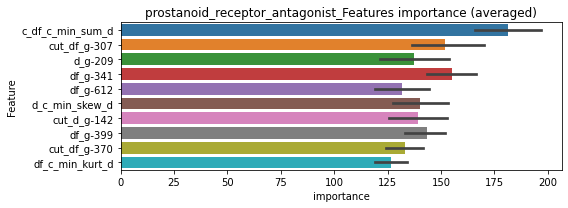

len(train_index) : 2820
len(valid_index) : 940
================================= fold 1/4 prostanoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000455911	valid_1's binary_logloss: 0.000687286
[2000]	training's binary_logloss: 0.000252862	valid_1's binary_logloss: 0.000382576
[3000]	training's binary_logloss: 0.000185841	valid_1's binary_logloss: 0.000281502
[4000]	training's binary_logloss: 0.000154179	valid_1's binary_logloss: 0.000233734
[5000]	training's binary_logloss: 0.000137996	valid_1's binary_logloss: 0.000209303
[6000]	training's binary_logloss: 0.00012748	valid_1's binary_logloss: 0.000193355
[7000]	training's binary_logloss: 0.000120172	valid_1's binary_logloss: 0.000182274
[8000]	training's binary_logloss: 0.000115175	valid_1's binary_logloss: 0.000174702
[9000]	training's binary_logloss: 0.000111642	valid_1's binary_logloss: 0.000169348
[10000]	training's binary_logloss: 0.000109146	valid_1's binary_logloss: 0.000165588
Did not meet early stopping. Best iteration is:
[9999]	training's binary_logloss: 0.000109146	valid

len(train_index) : 2820
len(valid_index) : 940
================================= fold 2/4 prostanoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000559004	valid_1's binary_logloss: 0.00202268
Early stopping, best iteration is:
[1184]	training's binary_logloss: 0.000482048	valid_1's binary_logloss: 0.00194993


len(train_index) : 2820
len(valid_index) : 940
================================= fold 3/4 prostanoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000569309	valid_1's binary_logloss: 0.000997885
[2000]	training's binary_logloss: 0.000324346	valid_1's binary_logloss: 0.000678722
[3000]	training's binary_logloss: 0.000252177	valid_1's binary_logloss: 0.000565178
[4000]	training's binary_logloss: 0.000219254	valid_1's binary_logloss: 0.000510135
Early stopping, best iteration is:
[4223]	training's binary_logloss: 0.000214722	valid_1's binary_logloss: 0.000502944


len(train_index) : 2820
len(valid_index) : 940
================================= fold 4/4 prostanoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00057581	valid_1's binary_logloss: 0.00698594
Early stopping, best iteration is:
[1509]	training's binary_logloss: 0.000400363	valid_1's binary_logloss: 0.00672395


prostanoid_receptor_antagonist logloss: 0.002336065742815


neg labels: 3289 → selected neg labels: 3197


proteasome_inhibitor, len(trt): 726, len(othr): 3197
target_rate: 0.0304863 → Adj_target_rate: 0.0226983
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[55]	training's binary_logloss: 0.3447	valid_1's binary_logloss: 0.474584
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[45]	training's binary_logloss: 0.37005	valid_1's binary_logloss: 0.470752
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[29]	training's binary_logloss: 0.400209	valid_1's binary_logloss: 0.47156
Training until validation scores don't improve for 30 rounds


1 / 3 AUC score:0.552
y_Threshold: 0.1964735, Threshold: 0.4344756, pos_neg_ratio: 0.7729121
Remove_noisy_data: 1201 → Positive_corect_labels: 208/2722
p_label_rate: 0.0100452 Vs.target_rate: 0.03049
Num_p_label: 40.0, conf_0:0.30413, conf_1:0.56482
Num_p_label: 40.0, Expected: 121.4, Adj_threshold_1: 0.4344756
Num_p_label: 75.0, Expected: 121.4, Adj_threshold_2: 0.4044756
Num_p_label: 116.0, Expected: 121.4, Adj_threshold_3: 0.3744756
Num_p_label: 132.0, Expected: 121.4, Adj_threshold_4: 0.3444756
Num_p_label: 142.0, Expected: 121.4, Adj_threshold_5: 0.3144756
Num_p_label: 150.0, Expected: 121.4, Adj_threshold_6: 0.2844756
Num_p_label: 176.0, Expected: 121.4, Adj_threshold_7: 0.2544756
Num_p_label: 292.0, Expected: 121.4, Adj_threshold_8: 0.2244756
threshold: 0.2244756, positive_p_label: 292.0/3982, p_label_rate: 0.0733300


Early stopping, best iteration is:
[3]	training's binary_logloss: 0.46902	valid_1's binary_logloss: 0.478459


positive_y_label: 208.0/2722, y_label_rate: 0.0764144
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[62]	training's binary_logloss: 0.0990276	valid_1's binary_logloss: 0.20938
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[53]	training's binary_logloss: 0.108207	valid_1's binary_logloss: 0.225412
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[63]	training's binary_logloss: 0.0936316	valid_1's binary_logloss: 0.240807
Training until validation scores don't improve for 30 rounds


2 / 3 AUC score:0.786
y_Threshold: 0.1206435, Threshold: 0.2244756, pos_neg_ratio: 0.7729121
Remove_noisy_data: 250 → Positive_corect_labels: 83.0/2472
p_label_rate: 0.0775992 Vs.target_rate: 0.03049
Num_p_label: 309.0, conf_0:0.17958, conf_1:0.26937
Num_p_label: 309.0, Expected: 121.4, Adj_threshold_1: 0.2244756
Num_p_label: 280.0, Expected: 121.4, Adj_threshold_2: 0.2544756
Num_p_label: 257.0, Expected: 121.4, Adj_threshold_3: 0.2844756
Num_p_label: 237.0, Expected: 121.4, Adj_threshold_4: 0.3144756
Num_p_label: 219.0, Expected: 121.4, Adj_threshold_5: 0.3444756
Num_p_label: 206.0, Expected: 121.4, Adj_threshold_6: 0.3744756
Num_p_label: 195.0, Expected: 121.4, Adj_threshold_7: 0.4044756
Num_p_label: 186.0, Expected: 121.4, Adj_threshold_8: 0.4344756
Num_p_label: 175.0, Expected: 121.4, Adj_threshold_9: 0.4644756
Num_p_label: 166.0, Expected: 121.4, Adj_threshold_10: 0.4944756
threshold: 0.5244756, positive_p_label: 160.0/3982, p_label_rate: 0.0401808


Early stopping, best iteration is:
[63]	training's binary_logloss: 0.0993914	valid_1's binary_logloss: 0.202304


positive_y_label: 83.0/2472, y_label_rate: 0.0335761
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[155]	training's binary_logloss: 0.005138	valid_1's binary_logloss: 0.0262486
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[118]	training's binary_logloss: 0.00792325	valid_1's binary_logloss: 0.0633863
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[245]	training's binary_logloss: 0.00178429	valid_1's binary_logloss: 0.0265031
Training until validation scores don't improve for 30 rounds


3 / 3 AUC score:0.993
y_Threshold: 0.0932851, Threshold: 0.5244756, pos_neg_ratio: 0.7729121
Remove_noisy_data: 38 → Positive_corect_labels: 64.0/2434
p_label_rate: 0.0690608 Vs.target_rate: 0.03049
Num_p_label: 275.0, conf_0:0.47203, conf_1:0.57692
Num_p_label: 275.0, Expected: 121.4, Adj_threshold_1: 0.5244756
Num_p_label: 266.0, Expected: 121.4, Adj_threshold_2: 0.5544756
Num_p_label: 257.0, Expected: 121.4, Adj_threshold_3: 0.5844756
Num_p_label: 251.0, Expected: 121.4, Adj_threshold_4: 0.6144756
Num_p_label: 246.0, Expected: 121.4, Adj_threshold_5: 0.6444756
Num_p_label: 242.0, Expected: 121.4, Adj_threshold_6: 0.6744756
Num_p_label: 238.0, Expected: 121.4, Adj_threshold_7: 0.7044756
Num_p_label: 229.0, Expected: 121.4, Adj_threshold_8: 0.7344756
Num_p_label: 221.0, Expected: 121.4, Adj_threshold_9: 0.7644756
Num_p_label: 215.0, Expected: 121.4, Adj_threshold_10: 0.7944756
threshold: 0.7944756, positive_p_label: 215.0/3982, p_label_rate: 0.0539930


Early stopping, best iteration is:
[95]	training's binary_logloss: 0.0116773	valid_1's binary_logloss: 0.064198


positive_y_label: 64.0/2434, y_label_rate: 0.0262942


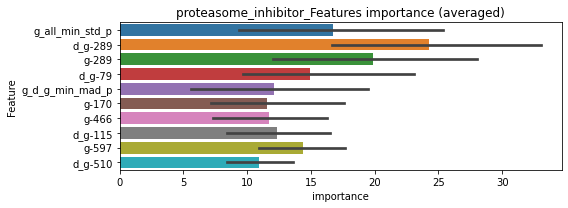

len(train_index) : 1825
len(valid_index) : 609
================================= fold 1/4 proteasome_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 1825
len(valid_index) : 609
================================= fold 2/4 proteasome_inhibitor=================================


Early stopping, best iteration is:
[361]	training's binary_logloss: 0.00164439	valid_1's binary_logloss: 0.0120934
Training until validation scores don't improve for 30 rounds


len(train_index) : 1826
len(valid_index) : 608
================================= fold 3/4 proteasome_inhibitor=================================


Early stopping, best iteration is:
[365]	training's binary_logloss: 0.00161742	valid_1's binary_logloss: 0.00605794
Training until validation scores don't improve for 30 rounds


len(train_index) : 1826
len(valid_index) : 608
================================= fold 4/4 proteasome_inhibitor=================================


Early stopping, best iteration is:
[247]	training's binary_logloss: 0.00251052	valid_1's binary_logloss: 0.00979148
Training until validation scores don't improve for 30 rounds


proteasome_inhibitor logloss: 0.008301881406213017


Early stopping, best iteration is:
[354]	training's binary_logloss: 0.00174696	valid_1's binary_logloss: 0.00526216
neg labels: 3289 → selected neg labels: 3285


protein_kinase_inhibitor, len(trt): 48, len(othr): 3285
target_rate: 0.0020156 → Adj_target_rate: 0.0022556
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00386339	valid_1's binary_logloss: 0.0276237
[600]	training's binary_logloss: 0.000744162	valid_1's binary_logloss: 0.019924
Early stopping, best iteration is:
[667]	training's binary_logloss: 0.000645596	valid_1's binary_logloss: 0.0197762
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00383108	valid_1's binary_logloss: 0.0261831
[600]	training's binary_logloss: 0.000732957	valid_1's binary_logloss: 0.0199465
Early stopping, best iteration is:
[682]	training's binary_logloss: 0.000620271	valid_1's binary_logloss: 0.0195224
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00408897	valid_1's binary_logloss: 0.0113463
[600]	training's binary_logloss: 0.000777355	valid_1's binary_logloss: 0.00541178
Early stopping, best iteration is:
[728]	training's binary_logloss: 0.000607919	valid_1's binary_loglo

1 / 3 AUC score:1.000
y_Threshold: 0.0046857, Threshold: 0.0120203, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00202
Num_p_label: 40.0, conf_0:0.00841, conf_1:0.01563
Num_p_label: 40.0, Expected: 8.0, Adj_threshold_1: 0.0120203
Num_p_label: 6.0, Expected: 8.0, Adj_threshold_2: 0.0420203
threshold: 0.0420203, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00364586	valid_1's binary_logloss: 0.0272767
[600]	training's binary_logloss: 0.000710569	valid_1's binary_logloss: 0.0188953
Early stopping, best iteration is:
[743]	training's binary_logloss: 0.000560324	valid_1's binary_logloss: 0.0183157
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00385844	valid_1's binary_logloss: 0.0144536
[600]	training's binary_logloss: 0.000738996	valid_1's binary_logloss: 0.00804086
Early stopping, best iteration is:
[684]	training's binary_logloss: 0.000617547	valid_1's binary_logloss: 0.00764483
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00377433	valid_1's binary_logloss: 0.00973185
[600]	training's binary_logloss: 0.000739248	valid_1's binary_logloss: 0.00386068
Early stopping, best iteration is:
[751]	training's binary_logloss: 0.000577258	valid_1's binary_l

2 / 3 AUC score:1.000
y_Threshold: 0.0276377, Threshold: 0.0420203, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0060271 Vs.target_rate: 0.00202
Num_p_label: 24.0, conf_0:0.03362, conf_1:0.05042
Num_p_label: 24.0, Expected: 8.0, Adj_threshold_1: 0.0420203
Num_p_label: 11.0, Expected: 8.0, Adj_threshold_2: 0.0720203
threshold: 0.0720203, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 655.0/3806, y_label_rate: 0.1720967
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00356084	valid_1's binary_logloss: 0.0200172
[600]	training's binary_logloss: 0.000700401	valid_1's binary_logloss: 0.013818
Early stopping, best iteration is:
[637]	training's binary_logloss: 0.000642349	valid_1's binary_logloss: 0.0136325
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00373236	valid_1's binary_logloss: 0.0139
[600]	training's binary_logloss: 0.000729205	valid_1's binary_logloss: 0.00720229
Early stopping, best iteration is:
[797]	training's binary_logloss: 0.000555633	valid_1's binary_logloss: 0.00665781
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00361365	valid_1's binary_logloss: 0.0184812
[600]	training's binary_logloss: 0.000720963	valid_1's binary_logloss: 0.0123047
Early stopping, best iteration is:
[676]	training's binary_logloss: 0.000615025	valid_1's binary_logloss

3 / 3 AUC score:1.000
y_Threshold: 0.0468005, Threshold: 0.0720203, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 654.0/3804
p_label_rate: 0.0022602 Vs.target_rate: 0.00202
Num_p_label: 9.0, conf_0:0.06482, conf_1:0.07922
threshold: 0.0720203, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 654.0/3804, y_label_rate: 0.1719243


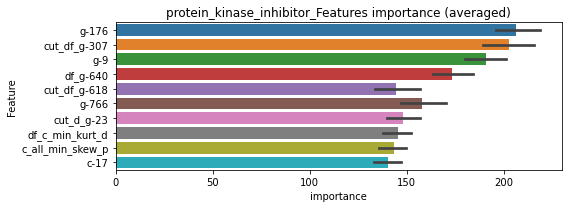

len(train_index) : 2853
len(valid_index) : 951
================================= fold 1/4 protein_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00051825	valid_1's binary_logloss: 0.00226357
Early stopping, best iteration is:
[1309]	training's binary_logloss: 0.000409187	valid_1's binary_logloss: 0.0021372


len(train_index) : 2853
len(valid_index) : 951
================================= fold 2/4 protein_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000532618	valid_1's binary_logloss: 0.00135951
[2000]	training's binary_logloss: 0.000308724	valid_1's binary_logloss: 0.00106735
Early stopping, best iteration is:
[1984]	training's binary_logloss: 0.000310719	valid_1's binary_logloss: 0.00106493


len(train_index) : 2853
len(valid_index) : 951
================================= fold 3/4 protein_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000510999	valid_1's binary_logloss: 0.00146652
Early stopping, best iteration is:
[1146]	training's binary_logloss: 0.000456402	valid_1's binary_logloss: 0.00140992


len(train_index) : 2853
len(valid_index) : 951
================================= fold 4/4 protein_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000520228	valid_1's binary_logloss: 0.00055223
[2000]	training's binary_logloss: 0.000301195	valid_1's binary_logloss: 0.000305492
[3000]	training's binary_logloss: 0.000238105	valid_1's binary_logloss: 0.000230365
[4000]	training's binary_logloss: 0.000208431	valid_1's binary_logloss: 0.000195171
[5000]	training's binary_logloss: 0.000192199	valid_1's binary_logloss: 0.00017651
[6000]	training's binary_logloss: 0.000181542	valid_1's binary_logloss: 0.000164333
[7000]	training's binary_logloss: 0.000173807	valid_1's binary_logloss: 0.000155577
[8000]	training's binary_logloss: 0.000167956	valid_1's binary_logloss: 0.000149112
Early stopping, best iteration is:
[8181]	training's binary_logloss: 0.000167058	valid_1's binary_logloss: 0.000148142


protein_kinase_inhibitor logloss: 0.001191880679977284


neg labels: 3289 → selected neg labels: 3286


protein_phosphatase_inhibitor, len(trt): 24, len(othr): 3286
target_rate: 0.0010078 → Adj_target_rate: 0.0012513
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00153681	valid_1's binary_logloss: 0.00812045
[600]	training's binary_logloss: 0.000412264	valid_1's binary_logloss: 0.00574884
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.00041507	valid_1's binary_logloss: 0.00574319
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00156172	valid_1's binary_logloss: 0.00616323
[600]	training's binary_logloss: 0.000407888	valid_1's binary_logloss: 0.0033397
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.000398908	valid_1's binary_logloss: 0.00333303
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00162407	valid_1's binary_logloss: 0.00310208
[600]	training's binary_logloss: 0.000423672	valid_1's binary_logloss: 0.00118478
Early stopping, best iteration is:
[595]	training's binary_logloss: 0.000423672	valid_1's binary

1 / 3 AUC score:1.000
y_Threshold: 0.0022784, Threshold: 0.0067227, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00101
Num_p_label: 40.0, conf_0:0.00471, conf_1:0.00874
Num_p_label: 40.0, Expected: 4.0, Adj_threshold_1: 0.0067227
Num_p_label: 1.0, Expected: 4.0, Adj_threshold_2: 0.0367227
threshold: 0.0367227, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00148799	valid_1's binary_logloss: 0.00804453
Early stopping, best iteration is:
[568]	training's binary_logloss: 0.000417315	valid_1's binary_logloss: 0.0058026
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00146212	valid_1's binary_logloss: 0.00592839
[600]	training's binary_logloss: 0.000389094	valid_1's binary_logloss: 0.00349134
Early stopping, best iteration is:
[582]	training's binary_logloss: 0.00039566	valid_1's binary_logloss: 0.0034579
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00152118	valid_1's binary_logloss: 0.0029519
[600]	training's binary_logloss: 0.00040798	valid_1's binary_logloss: 0.00103542
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.00040798	valid_1's binary_logloss: 0.00103542
Training until validation scores don't improve for 30 rounds
[300

2 / 3 AUC score:1.000
y_Threshold: 0.0303258, Threshold: 0.0367227, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0025113 Vs.target_rate: 0.00101
Num_p_label: 10.0, conf_0:0.02938, conf_1:0.04407
Num_p_label: 10.0, Expected: 4.0, Adj_threshold_1: 0.0367227
threshold: 0.0367227, positive_p_label: 10.0/3982, p_label_rate: 0.0025113


Early stopping, best iteration is:
[562]	training's binary_logloss: 0.000417704	valid_1's binary_logloss: 0.0021905


positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00148799	valid_1's binary_logloss: 0.00804453
Early stopping, best iteration is:
[568]	training's binary_logloss: 0.000417315	valid_1's binary_logloss: 0.0058026
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00146212	valid_1's binary_logloss: 0.00592839
[600]	training's binary_logloss: 0.000389094	valid_1's binary_logloss: 0.00349134
Early stopping, best iteration is:
[582]	training's binary_logloss: 0.00039566	valid_1's binary_logloss: 0.0034579
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00152118	valid_1's binary_logloss: 0.0029519
[600]	training's binary_logloss: 0.00040798	valid_1's binary_logloss: 0.00103542
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.00040798	valid_1's binary_logloss: 0.00103542
Training until validation scores don't improve for 30 rounds
[300

3 / 3 AUC score:1.000
y_Threshold: 0.0303258, Threshold: 0.0367227, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811


Early stopping, best iteration is:
[562]	training's binary_logloss: 0.000417704	valid_1's binary_logloss: 0.0021905


p_label_rate: 0.0025113 Vs.target_rate: 0.00101
Num_p_label: 10.0, conf_0:0.03305, conf_1:0.04040
Num_p_label: 10.0, Expected: 4.0, Adj_threshold_1: 0.0367227
threshold: 0.0367227, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


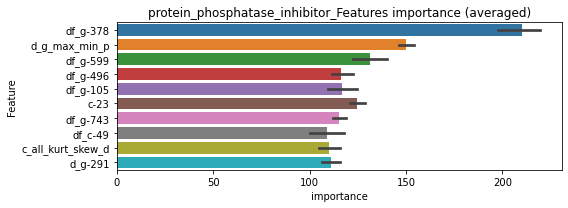

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 protein_phosphatase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000477881	valid_1's binary_logloss: 0.00314644
Early stopping, best iteration is:
[1249]	training's binary_logloss: 0.000399015	valid_1's binary_logloss: 0.00299756


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 protein_phosphatase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000465775	valid_1's binary_logloss: 0.00265494
[2000]	training's binary_logloss: 0.000277168	valid_1's binary_logloss: 0.00238102
Early stopping, best iteration is:
[2572]	training's binary_logloss: 0.000238977	valid_1's binary_logloss: 0.00232413


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 protein_phosphatase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00047881	valid_1's binary_logloss: 0.000503193
[2000]	training's binary_logloss: 0.000282978	valid_1's binary_logloss: 0.00030928
[3000]	training's binary_logloss: 0.000227804	valid_1's binary_logloss: 0.000252324
[4000]	training's binary_logloss: 0.000202611	valid_1's binary_logloss: 0.000224744
[5000]	training's binary_logloss: 0.000189478	valid_1's binary_logloss: 0.000210432
[6000]	training's binary_logloss: 0.000180663	valid_1's binary_logloss: 0.0002007
[7000]	training's binary_logloss: 0.000174244	valid_1's binary_logloss: 0.00019417
Early stopping, best iteration is:
[7820]	training's binary_logloss: 0.000170085	valid_1's binary_logloss: 0.000189557


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 protein_phosphatase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000452222	valid_1's binary_logloss: 0.000901003
[2000]	training's binary_logloss: 0.000271564	valid_1's binary_logloss: 0.000633975
[3000]	training's binary_logloss: 0.000217601	valid_1's binary_logloss: 0.000540658
[4000]	training's binary_logloss: 0.000191495	valid_1's binary_logloss: 0.000494446
[5000]	training's binary_logloss: 0.000177632	valid_1's binary_logloss: 0.000470678
[6000]	training's binary_logloss: 0.000168693	valid_1's binary_logloss: 0.00045454
[7000]	training's binary_logloss: 0.000162393	valid_1's binary_logloss: 0.000441719
Early stopping, best iteration is:
[7381]	training's binary_logloss: 0.000160516	valid_1's binary_logloss: 0.000437819


protein_phosphatase_inhibitor logloss: 0.0014875838688459884


neg labels: 3289 → selected neg labels: 3278


protein_synthesis_inhibitor, len(trt): 103, len(othr): 3278
target_rate: 0.0043252 → Adj_target_rate: 0.0043163
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0110909	valid_1's binary_logloss: 0.0787291
[600]	training's binary_logloss: 0.0017293	valid_1's binary_logloss: 0.0629517
Early stopping, best iteration is:
[595]	training's binary_logloss: 0.0017634	valid_1's binary_logloss: 0.0628557
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0114137	valid_1's binary_logloss: 0.0676456
[600]	training's binary_logloss: 0.00175651	valid_1's binary_logloss: 0.0492539
Early stopping, best iteration is:
[630]	training's binary_logloss: 0.00158031	valid_1's binary_logloss: 0.0490097
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0129006	valid_1's binary_logloss: 0.0610237
[600]	training's binary_logloss: 0.00193757	valid_1's binary_logloss: 0.0468511
Early stopping, best iteration is:
[702]	training's binary_logloss: 0.00139581	valid_1's binary_logloss: 0.04561

1 / 3 AUC score:0.997
y_Threshold: 0.0141244, Threshold: 0.0735642, pos_neg_ratio: 0.8000000
Remove_noisy_data: 156 → Positive_corect_labels: 643/3777
p_label_rate: 0.0100452 Vs.target_rate: 0.00433
Num_p_label: 40.0, conf_0:0.05149, conf_1:0.09563
Num_p_label: 40.0, Expected: 17.2, Adj_threshold_1: 0.0735642
Num_p_label: 32.0, Expected: 17.2, Adj_threshold_2: 0.1035642
Num_p_label: 24.0, Expected: 17.2, Adj_threshold_3: 0.1335642
threshold: 0.1335642, positive_p_label: 24.0/3982, p_label_rate: 0.0060271
positive_y_label: 643.0/3777, y_label_rate: 0.1702409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.010378	valid_1's binary_logloss: 0.0581574
[600]	training's binary_logloss: 0.00164926	valid_1's binary_logloss: 0.0422084
Early stopping, best iteration is:
[744]	training's binary_logloss: 0.00109913	valid_1's binary_logloss: 0.0411215
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0103812	valid_1's binary_logloss: 0.0676394
[600]	training's binary_logloss: 0.0016333	valid_1's binary_logloss: 0.0495198
Early stopping, best iteration is:
[684]	training's binary_logloss: 0.00126491	valid_1's binary_logloss: 0.0489103
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0100762	valid_1's binary_logloss: 0.0604512
[600]	training's binary_logloss: 0.00160541	valid_1's binary_logloss: 0.049064
Early stopping, best iteration is:
[621]	training's binary_logloss: 0.00149439	valid_1's binary_logloss: 0.048974

2 / 3 AUC score:0.999
y_Threshold: 0.0413413, Threshold: 0.1335642, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[554]	training's binary_logloss: 0.0019281	valid_1's binary_logloss: 0.0476447


Remove_noisy_data: 20 → Positive_corect_labels: 633.0/3757
p_label_rate: 0.0105475 Vs.target_rate: 0.00433
Num_p_label: 42.0, conf_0:0.10685, conf_1:0.16028
Num_p_label: 42.0, Expected: 17.2, Adj_threshold_1: 0.1335642
Num_p_label: 35.0, Expected: 17.2, Adj_threshold_2: 0.1635642
Num_p_label: 29.0, Expected: 17.2, Adj_threshold_3: 0.1935642
Num_p_label: 27.0, Expected: 17.2, Adj_threshold_4: 0.2235642
Num_p_label: 23.0, Expected: 17.2, Adj_threshold_5: 0.2535642
threshold: 0.2535642, positive_p_label: 23.0/3982, p_label_rate: 0.0057760
positive_y_label: 633.0/3757, y_label_rate: 0.1684855
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00957262	valid_1's binary_logloss: 0.0573052
[600]	training's binary_logloss: 0.00155377	valid_1's binary_logloss: 0.0417142
Early stopping, best iteration is:
[638]	training's binary_logloss: 0.00136612	valid_1's binary_logloss: 0.0409211
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00900943	valid_1's binary_logloss: 0.0555828
Early stopping, best iteration is:
[491]	training's binary_logloss: 0.00234474	valid_1's binary_logloss: 0.0433896
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00955793	valid_1's binary_logloss: 0.0491613
[600]	training's binary_logloss: 0.00152947	valid_1's binary_logloss: 0.0335969
Early stopping, best iteration is:
[626]	training's binary_logloss: 0.00140764	valid_1's binary_logloss: 0.0330722
Training until validation scores don't improve for 30 rounds
[300]	train

3 / 3 AUC score:0.999
y_Threshold: 0.0514936, Threshold: 0.2535642, pos_neg_ratio: 0.8000000
Remove_noisy_data: 14 → Positive_corect_labels: 626.0/3743
p_label_rate: 0.0070316 Vs.target_rate: 0.00433
Num_p_label: 28.0, conf_0:0.22821, conf_1:0.27892
Num_p_label: 28.0, Expected: 17.2, Adj_threshold_1: 0.2535642
Num_p_label: 25.0, Expected: 17.2, Adj_threshold_2: 0.2835642
threshold: 0.2835642, positive_p_label: 25.0/3982, p_label_rate: 0.0062783
positive_y_label: 626.0/3743, y_label_rate: 0.1672455


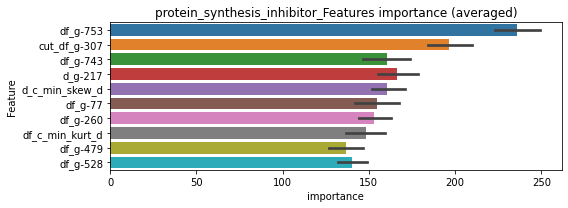

len(train_index) : 2807
len(valid_index) : 936
================================= fold 1/4 protein_synthesis_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00058778	valid_1's binary_logloss: 0.00438636
Early stopping, best iteration is:
[1430]	training's binary_logloss: 0.000426401	valid_1's binary_logloss: 0.00419756


len(train_index) : 2807
len(valid_index) : 936
================================= fold 2/4 protein_synthesis_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[914]	training's binary_logloss: 0.000616435	valid_1's binary_logloss: 0.00174403


len(train_index) : 2807
len(valid_index) : 936
================================= fold 3/4 protein_synthesis_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00055696	valid_1's binary_logloss: 0.00388782
Early stopping, best iteration is:
[1569]	training's binary_logloss: 0.000377385	valid_1's binary_logloss: 0.00371642


len(train_index) : 2808
len(valid_index) : 935
================================= fold 4/4 protein_synthesis_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000588685	valid_1's binary_logloss: 0.00272142
Early stopping, best iteration is:
[1799]	training's binary_logloss: 0.000357447	valid_1's binary_logloss: 0.00243663


protein_synthesis_inhibitor logloss: 0.003025772722546372


neg labels: 3289 → selected neg labels: 3285


protein_tyrosine_kinase_inhibitor, len(trt): 19, len(othr): 3285
target_rate: 0.0007979 → Adj_target_rate: 0.0010260
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.001451	valid_1's binary_logloss: 0.00440209
[600]	training's binary_logloss: 0.000379029	valid_1's binary_logloss: 0.00253667
Early stopping, best iteration is:
[595]	training's binary_logloss: 0.000379029	valid_1's binary_logloss: 0.00253667
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0014156	valid_1's binary_logloss: 0.00732402
[600]	training's binary_logloss: 0.00037421	valid_1's binary_logloss: 0.00428872
Early stopping, best iteration is:
[595]	training's binary_logloss: 0.00037675	valid_1's binary_logloss: 0.00427962
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00145297	valid_1's binary_logloss: 0.00246105
[600]	training's binary_logloss: 0.000382052	valid_1's binary_logloss: 0.000787777
Early stopping, best iteration is:
[600]	training's binary_logloss: 0.000382052	valid_1's binary_l

1 / 3 AUC score:1.000
y_Threshold: 0.0018135, Threshold: 0.0081178, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00080
Num_p_label: 40.0, conf_0:0.00568, conf_1:0.01055
Num_p_label: 40.0, Expected: 3.2, Adj_threshold_1: 0.0081178
Num_p_label: 2.0, Expected: 3.2, Adj_threshold_2: 0.0381178


[600]	training's binary_logloss: 0.000384976	valid_1's binary_logloss: 0.00101304
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000384976	valid_1's binary_logloss: 0.00101304


threshold: 0.0381178, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00137618	valid_1's binary_logloss: 0.00420547
Early stopping, best iteration is:
[548]	training's binary_logloss: 0.000388779	valid_1's binary_logloss: 0.00245623
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0013686	valid_1's binary_logloss: 0.00675652
Early stopping, best iteration is:
[517]	training's binary_logloss: 0.000406358	valid_1's binary_logloss: 0.00420793
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00138054	valid_1's binary_logloss: 0.00231924
[600]	training's binary_logloss: 0.00036537	valid_1's binary_logloss: 0.000702339
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.000364768	valid_1's binary_logloss: 0.000701313
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00139159	valid_1's binary_logloss: 0.00225981

2 / 3 AUC score:1.000
y_Threshold: 0.0360729, Threshold: 0.0381178, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0052737 Vs.target_rate: 0.00080
Num_p_label: 21.0, conf_0:0.03049, conf_1:0.04574
Num_p_label: 21.0, Expected: 3.2, Adj_threshold_1: 0.0381178
Num_p_label: 9.0, Expected: 3.2, Adj_threshold_2: 0.0681178
Num_p_label: 4.0, Expected: 3.2, Adj_threshold_3: 0.0981178
threshold: 0.0981178, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00137618	valid_1's binary_logloss: 0.00420547
Early stopping, best iteration is:
[548]	training's binary_logloss: 0.000388779	valid_1's binary_logloss: 0.00245623
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0013686	valid_1's binary_logloss: 0.00675652
Early stopping, best iteration is:
[517]	training's binary_logloss: 0.000406358	valid_1's binary_logloss: 0.00420793
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00138054	valid_1's binary_logloss: 0.00231924
[600]	training's binary_logloss: 0.00036537	valid_1's binary_logloss: 0.000702339
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.000364768	valid_1's binary_logloss: 0.000701313
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00139159	valid_1's binary_logloss: 0.00225981

3 / 3 AUC score:1.000
y_Threshold: 0.0360729, Threshold: 0.0981178, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0010045 Vs.target_rate: 0.00080
Num_p_label: 4.0, conf_0:0.08831, conf_1:0.10793
threshold: 0.0981178, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


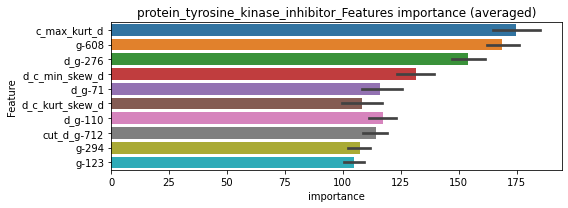

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 protein_tyrosine_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000434196	valid_1's binary_logloss: 0.00115547
Early stopping, best iteration is:
[1334]	training's binary_logloss: 0.000343034	valid_1's binary_logloss: 0.00105403


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 protein_tyrosine_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 protein_tyrosine_kinase_inhibitor=================================


Early stopping, best iteration is:
[812]	training's binary_logloss: 0.000539259	valid_1's binary_logloss: 0.00360169
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000462974	valid_1's binary_logloss: 0.00110702
[2000]	training's binary_logloss: 0.000276119	valid_1's binary_logloss: 0.000877331
Early stopping, best iteration is:
[2539]	training's binary_logloss: 0.000240899	valid_1's binary_logloss: 0.000829155


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 protein_tyrosine_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00046108	valid_1's binary_logloss: 0.000809129
[2000]	training's binary_logloss: 0.000278111	valid_1's binary_logloss: 0.000587496
Early stopping, best iteration is:
[2876]	training's binary_logloss: 0.000229556	valid_1's binary_logloss: 0.000527782


protein_tyrosine_kinase_inhibitor logloss: 0.001504360126191179


neg labels: 3289 → selected neg labels: 3283


radiopaque_medium, len(trt): 56, len(othr): 3283
target_rate: 0.0023516 → Adj_target_rate: 0.0025713
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00506246	valid_1's binary_logloss: 0.0346058
[600]	training's binary_logloss: 0.000901417	valid_1's binary_logloss: 0.0241199
Early stopping, best iteration is:
[729]	training's binary_logloss: 0.000682306	valid_1's binary_logloss: 0.0232632
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00541816	valid_1's binary_logloss: 0.0195228
[600]	training's binary_logloss: 0.000944744	valid_1's binary_logloss: 0.00879394
Early stopping, best iteration is:
[793]	training's binary_logloss: 0.000660315	valid_1's binary_logloss: 0.00782168
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00546061	valid_1's binary_logloss: 0.0151399
[600]	training's binary_logloss: 0.000974282	valid_1's binary_logloss: 0.00729367
Early stopping, best iteration is:
[860]	training's binary_logloss: 0.00064044	valid_1's binary_log

1 / 3 AUC score:1.000
y_Threshold: 0.0057860, Threshold: 0.0153503, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0100452 Vs.target_rate: 0.00235
Num_p_label: 40.0, conf_0:0.01075, conf_1:0.01996
Num_p_label: 40.0, Expected: 9.4, Adj_threshold_1: 0.0153503
Num_p_label: 9.0, Expected: 9.4, Adj_threshold_2: 0.0453503
threshold: 0.0453503, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00473853	valid_1's binary_logloss: 0.0326925
[600]	training's binary_logloss: 0.000868477	valid_1's binary_logloss: 0.0231802
Early stopping, best iteration is:
[743]	training's binary_logloss: 0.000650204	valid_1's binary_logloss: 0.0225105
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0048454	valid_1's binary_logloss: 0.0185556
[600]	training's binary_logloss: 0.000893583	valid_1's binary_logloss: 0.00852612
Early stopping, best iteration is:
[856]	training's binary_logloss: 0.000605745	valid_1's binary_logloss: 0.00768834
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00519411	valid_1's binary_logloss: 0.0133859
[600]	training's binary_logloss: 0.000938584	valid_1's binary_logloss: 0.00626362
Early stopping, best iteration is:
[789]	training's binary_logloss: 0.000652006	valid_1's binary_log

2 / 3 AUC score:1.000
y_Threshold: 0.0303123, Threshold: 0.0453503, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 654.0/3803
p_label_rate: 0.0040181 Vs.target_rate: 0.00235
Num_p_label: 16.0, conf_0:0.03628, conf_1:0.05442
Num_p_label: 16.0, Expected: 9.4, Adj_threshold_1: 0.0453503
threshold: 0.0453503, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 654.0/3803, y_label_rate: 0.1719695
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00469274	valid_1's binary_logloss: 0.0237716
[600]	training's binary_logloss: 0.000878777	valid_1's binary_logloss: 0.0157121
Early stopping, best iteration is:
[738]	training's binary_logloss: 0.000661149	valid_1's binary_logloss: 0.0150378
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00496135	valid_1's binary_logloss: 0.0236601
[600]	training's binary_logloss: 0.000896557	valid_1's binary_logloss: 0.0159966
Early stopping, best iteration is:
[725]	training's binary_logloss: 0.000680915	valid_1's binary_logloss: 0.0153624
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00488659	valid_1's binary_logloss: 0.0229313
[600]	training's binary_logloss: 0.000892139	valid_1's binary_logloss: 0.0146012
Early stopping, best iteration is:
[793]	training's binary_logloss: 0.000630321	valid_1's binary_loglo

3 / 3 AUC score:1.000
y_Threshold: 0.0325836, Threshold: 0.0453503, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 654.0/3803
p_label_rate: 0.0070316 Vs.target_rate: 0.00235
Num_p_label: 28.0, conf_0:0.04082, conf_1:0.04989
Num_p_label: 28.0, Expected: 9.4, Adj_threshold_1: 0.0453503
Num_p_label: 13.0, Expected: 9.4, Adj_threshold_2: 0.0753503
threshold: 0.0753503, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 654.0/3803, y_label_rate: 0.1719695


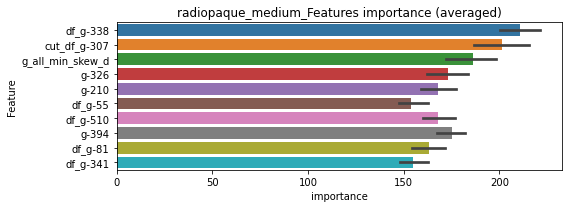

len(train_index) : 2852
len(valid_index) : 951
================================= fold 1/4 radiopaque_medium=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000534488	valid_1's binary_logloss: 0.00512837
[2000]	training's binary_logloss: 0.000309193	valid_1's binary_logloss: 0.00475025
Early stopping, best iteration is:
[2608]	training's binary_logloss: 0.000260591	valid_1's binary_logloss: 0.00466038


len(train_index) : 2852
len(valid_index) : 951
================================= fold 2/4 radiopaque_medium=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2852
len(valid_index) : 951
================================= fold 3/4 radiopaque_medium=================================


Early stopping, best iteration is:
[735]	training's binary_logloss: 0.000699183	valid_1's binary_logloss: 0.0020892
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00051397	valid_1's binary_logloss: 0.00093508
[2000]	training's binary_logloss: 0.000298762	valid_1's binary_logloss: 0.000623641
[3000]	training's binary_logloss: 0.000230806	valid_1's binary_logloss: 0.000507753
[4000]	training's binary_logloss: 0.000198566	valid_1's binary_logloss: 0.000450676
[5000]	training's binary_logloss: 0.000181794	valid_1's binary_logloss: 0.000420911
[6000]	training's binary_logloss: 0.000171196	valid_1's binary_logloss: 0.000401714
[7000]	training's binary_logloss: 0.000163715	valid_1's binary_logloss: 0.000389416
[8000]	training's binary_logloss: 0.000158148	valid_1's binary_logloss: 0.000380182
Early stopping, best iteration is:
[8501]	training's binary_logloss: 0.00015581	valid_1's binary_logloss: 0.000376307


len(train_index) : 2853
len(valid_index) : 950
================================= fold 4/4 radiopaque_medium=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000522268	valid_1's binary_logloss: 0.00103235
[2000]	training's binary_logloss: 0.000300171	valid_1's binary_logloss: 0.000732548
Early stopping, best iteration is:
[2012]	training's binary_logloss: 0.000299011	valid_1's binary_logloss: 0.000730624


radiopaque_medium logloss: 0.001964878349055286


neg labels: 3289 → selected neg labels: 3266


raf_inhibitor, len(trt): 223, len(othr): 3266
target_rate: 0.0093642 → Adj_target_rate: 0.0083226
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0367408	valid_1's binary_logloss: 0.20844
Early stopping, best iteration is:
[440]	training's binary_logloss: 0.0143966	valid_1's binary_logloss: 0.200173
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0352395	valid_1's binary_logloss: 0.191228
Early stopping, best iteration is:
[451]	training's binary_logloss: 0.0130863	valid_1's binary_logloss: 0.180197
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.035503	valid_1's binary_logloss: 0.196402
Early stopping, best iteration is:
[399]	training's binary_logloss: 0.0184466	valid_1's binary_logloss: 0.191878
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0355071	valid_1's binary_logloss: 0.208439
Early stopping, best iteration is:
[376]	training's binary_logloss: 0.0214762	valid_1's binary_logloss: 0.2

1 / 3 AUC score:0.934
y_Threshold: 0.0666381, Threshold: 0.3538638, pos_neg_ratio: 0.8000000
Remove_noisy_data: 341 → Positive_corect_labels: 548/3578
p_label_rate: 0.0100452 Vs.target_rate: 0.00936
Num_p_label: 40.0, conf_0:0.24770, conf_1:0.46002
threshold: 0.3538638, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 548.0/3578, y_label_rate: 0.1531582
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0189927	valid_1's binary_logloss: 0.127148
[600]	training's binary_logloss: 0.00295753	valid_1's binary_logloss: 0.11092
Early stopping, best iteration is:
[606]	training's binary_logloss: 0.00287985	valid_1's binary_logloss: 0.110598
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.019291	valid_1's binary_logloss: 0.140821
Early stopping, best iteration is:
[471]	training's binary_logloss: 0.00569924	valid_1's binary_logloss: 0.13211
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0188582	valid_1's binary_logloss: 0.127371
Early stopping, best iteration is:
[501]	training's binary_logloss: 0.00463675	valid_1's binary_logloss: 0.111049
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0216652	valid_1's binary_logloss: 0.111276
[600]	training's binary_lo

2 / 3 AUC score:0.984
y_Threshold: 0.0572793, Threshold: 0.3538638, pos_neg_ratio: 0.8000000
Remove_noisy_data: 86 → Positive_corect_labels: 505.0/3492
p_label_rate: 0.0293822 Vs.target_rate: 0.00936
Num_p_label: 117.0, conf_0:0.28309, conf_1:0.42464
Num_p_label: 117.0, Expected: 37.3, Adj_threshold_1: 0.3538638
Num_p_label: 111.0, Expected: 37.3, Adj_threshold_2: 0.3838638
Num_p_label: 105.0, Expected: 37.3, Adj_threshold_3: 0.4138638
Num_p_label: 99.0, Expected: 37.3, Adj_threshold_4: 0.4438638
Num_p_label: 90.0, Expected: 37.3, Adj_threshold_5: 0.4738638
Num_p_label: 80.0, Expected: 37.3, Adj_threshold_6: 0.5038638
Num_p_label: 77.0, Expected: 37.3, Adj_threshold_7: 0.5338638
Num_p_label: 72.0, Expected: 37.3, Adj_threshold_8: 0.5638638
Num_p_label: 66.0, Expected: 37.3, Adj_threshold_9: 0.5938638
Num_p_label: 61.0, Expected: 37.3, Adj_threshold_10: 0.6238638
threshold: 0.6538638, positive_p_label: 54.0/3982, p_label_rate: 0.0135610
positive_y_label: 505.0/3492, y_label_rate: 0.1446

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0169016	valid_1's binary_logloss: 0.0924555
[600]	training's binary_logloss: 0.00252111	valid_1's binary_logloss: 0.067979
Early stopping, best iteration is:
[617]	training's binary_logloss: 0.0023534	valid_1's binary_logloss: 0.0676666
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0151903	valid_1's binary_logloss: 0.0963041
[600]	training's binary_logloss: 0.00240802	valid_1's binary_logloss: 0.0757698
Early stopping, best iteration is:
[639]	training's binary_logloss: 0.00208799	valid_1's binary_logloss: 0.075227
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0156049	valid_1's binary_logloss: 0.0842832
[600]	training's binary_logloss: 0.0024372	valid_1's binary_logloss: 0.0598881
Early stopping, best iteration is:
[770]	training's binary_logloss: 0.00146507	valid_1's binary_logloss: 0.0576457

3 / 3 AUC score:0.994
y_Threshold: 0.0524666, Threshold: 0.6538638, pos_neg_ratio: 0.8000000
Remove_noisy_data: 36 → Positive_corect_labels: 487.0/3456
p_label_rate: 0.0208438 Vs.target_rate: 0.00936
Num_p_label: 83.0, conf_0:0.50000, conf_1:0.71925
Num_p_label: 83.0, Expected: 37.3, Adj_threshold_1: 0.6538638
Num_p_label: 76.0, Expected: 37.3, Adj_threshold_2: 0.6838638
Num_p_label: 70.0, Expected: 37.3, Adj_threshold_3: 0.7138638
Num_p_label: 63.0, Expected: 37.3, Adj_threshold_4: 0.7438638
Num_p_label: 54.0, Expected: 37.3, Adj_threshold_5: 0.7738638
threshold: 0.7738638, positive_p_label: 54.0/3982, p_label_rate: 0.0135610
positive_y_label: 487.0/3456, y_label_rate: 0.1409144


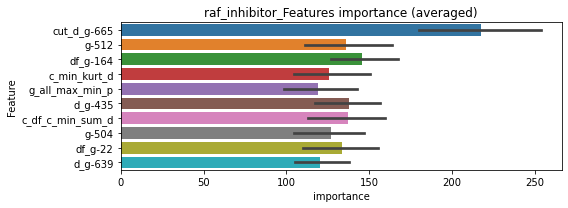

len(train_index) : 2592
len(valid_index) : 864
================================= fold 1/4 raf_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[847]	training's binary_logloss: 0.000760946	valid_1's binary_logloss: 0.00791145


len(train_index) : 2592
len(valid_index) : 864
================================= fold 2/4 raf_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000637753	valid_1's binary_logloss: 0.00213759
Early stopping, best iteration is:
[1110]	training's binary_logloss: 0.000580798	valid_1's binary_logloss: 0.00208677


len(train_index) : 2592
len(valid_index) : 864
================================= fold 3/4 raf_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000623914	valid_1's binary_logloss: 0.00168163
[2000]	training's binary_logloss: 0.000350146	valid_1's binary_logloss: 0.00122378
[3000]	training's binary_logloss: 0.000265857	valid_1's binary_logloss: 0.00104781
Early stopping, best iteration is:
[3336]	training's binary_logloss: 0.000248552	valid_1's binary_logloss: 0.00100628


len(train_index) : 2592
len(valid_index) : 864
================================= fold 4/4 raf_inhibitor=================================


Training until validation scores don't improve for 30 rounds


raf_inhibitor logloss: 0.0044704660372522345


Early stopping, best iteration is:
[726]	training's binary_logloss: 0.000854961	valid_1's binary_logloss: 0.00687721
neg labels: 3289 → selected neg labels: 3289


ras_gtpase_inhibitor, len(trt): 12, len(othr): 3289
target_rate: 0.0005039 → Adj_target_rate: 0.0006942
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000760811	valid_1's binary_logloss: 0.00246304
Early stopping, best iteration is:
[533]	training's binary_logloss: 0.000296554	valid_1's binary_logloss: 0.00150974
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000759863	valid_1's binary_logloss: 0.00259948
Early stopping, best iteration is:
[508]	training's binary_logloss: 0.000299905	valid_1's binary_logloss: 0.0017447
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000751085	valid_1's binary_logloss: 0.00193067
Early stopping, best iteration is:
[497]	training's binary_logloss: 0.000296214	valid_1's binary_logloss: 0.00121112
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000768746	valid_1's binary_logloss: 0.00249344


1 / 3 AUC score:1.000
y_Threshold: 0.0013520, Threshold: 0.0204754, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00050
Num_p_label: 40.0, conf_0:0.01433, conf_1:0.02662
Num_p_label: 40.0, Expected: 2.0, Adj_threshold_1: 0.0204754
Num_p_label: 27.0, Expected: 2.0, Adj_threshold_2: 0.0504754
Num_p_label: 21.0, Expected: 2.0, Adj_threshold_3: 0.0804754
Num_p_label: 13.0, Expected: 2.0, Adj_threshold_4: 0.1104754


Early stopping, best iteration is:
[518]	training's binary_logloss: 0.000295713	valid_1's binary_logloss: 0.00157526


Num_p_label: 13.0, Expected: 2.0, Adj_threshold_5: 0.1404754
Num_p_label: 12.0, Expected: 2.0, Adj_threshold_6: 0.1704754
Num_p_label: 12.0, Expected: 2.0, Adj_threshold_7: 0.2004754
Num_p_label: 11.0, Expected: 2.0, Adj_threshold_8: 0.2304754
Num_p_label: 10.0, Expected: 2.0, Adj_threshold_9: 0.2604754
Num_p_label: 9.0, Expected: 2.0, Adj_threshold_10: 0.2904754
threshold: 0.3204754, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000663856	valid_1's binary_logloss: 0.00193815
Early stopping, best iteration is:
[493]	training's binary_logloss: 0.000281055	valid_1's binary_logloss: 0.00130464
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000652132	valid_1's binary_logloss: 0.00240887
Early stopping, best iteration is:
[467]	training's binary_logloss: 0.000280306	valid_1's binary_logloss: 0.00164862
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000682553	valid_1's binary_logloss: 0.000793827
Early stopping, best iteration is:
[500]	training's binary_logloss: 0.000276805	valid_1's binary_logloss: 0.000329812
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000661462	valid_1's binary_logloss: 0.00269843


2 / 3 AUC score:1.000
y_Threshold: 0.0888323, Threshold: 0.3204754, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0072828 Vs.target_rate: 0.00050
Num_p_label: 29.0, conf_0:0.25638, conf_1:0.38457
Num_p_label: 29.0, Expected: 2.0, Adj_threshold_1: 0.3204754
Num_p_label: 29.0, Expected: 2.0, Adj_threshold_2: 0.3504754
Num_p_label: 29.0, Expected: 2.0, Adj_threshold_3: 0.3804754
Num_p_label: 28.0, Expected: 2.0, Adj_threshold_4: 0.4104754
Num_p_label: 28.0, Expected: 2.0, Adj_threshold_5: 0.4404754
Num_p_label: 27.0, Expected: 2.0, Adj_threshold_6: 0.4704754
Num_p_label: 27.0, Expected: 2.0, Adj_threshold_7: 0.5004754
Num_p_label: 26.0, Expected: 2.0, Adj_threshold_8: 0.5304754
Num_p_label: 23.0, Expected: 2.0, Adj_threshold_9: 0.5604754
Num_p_label: 22.0, Expected: 2.0, Adj_threshold_10: 0.5904754


Early stopping, best iteration is:
[511]	training's binary_logloss: 0.000271521	valid_1's binary_logloss: 0.00171234


threshold: 0.6204754, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000663856	valid_1's binary_logloss: 0.00193815
Early stopping, best iteration is:
[493]	training's binary_logloss: 0.000281055	valid_1's binary_logloss: 0.00130464
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000652132	valid_1's binary_logloss: 0.00240887
Early stopping, best iteration is:
[467]	training's binary_logloss: 0.000280306	valid_1's binary_logloss: 0.00164862
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000682553	valid_1's binary_logloss: 0.000793827
Early stopping, best iteration is:
[500]	training's binary_logloss: 0.000276805	valid_1's binary_logloss: 0.000329812
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000661462	valid_1's binary_logloss: 0.00269843


3 / 3 AUC score:1.000
y_Threshold: 0.0888323, Threshold: 0.6204754, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813


Early stopping, best iteration is:
[511]	training's binary_logloss: 0.000271521	valid_1's binary_logloss: 0.00171234


p_label_rate: 0.0052737 Vs.target_rate: 0.00050
Num_p_label: 21.0, conf_0:0.50000, conf_1:0.68252
Num_p_label: 21.0, Expected: 2.0, Adj_threshold_1: 0.6204754
Num_p_label: 20.0, Expected: 2.0, Adj_threshold_2: 0.6504754
Num_p_label: 20.0, Expected: 2.0, Adj_threshold_3: 0.6804754
Num_p_label: 19.0, Expected: 2.0, Adj_threshold_4: 0.7104754
Num_p_label: 17.0, Expected: 2.0, Adj_threshold_5: 0.7404754
Num_p_label: 17.0, Expected: 2.0, Adj_threshold_6: 0.7704754
threshold: 0.7704754, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


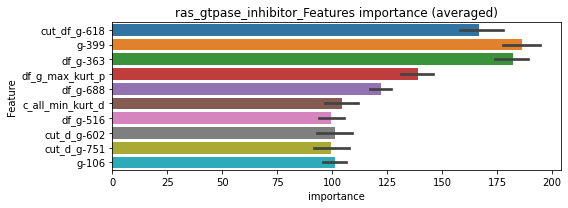

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 ras_gtpase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000383188	valid_1's binary_logloss: 0.000862502
Early stopping, best iteration is:
[1526]	training's binary_logloss: 0.000277262	valid_1's binary_logloss: 0.000769581


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 ras_gtpase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000383577	valid_1's binary_logloss: 0.00200423
Early stopping, best iteration is:
[1833]	training's binary_logloss: 0.000248386	valid_1's binary_logloss: 0.00179434


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 ras_gtpase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000376871	valid_1's binary_logloss: 0.000332594
[2000]	training's binary_logloss: 0.000235542	valid_1's binary_logloss: 0.000197846
[3000]	training's binary_logloss: 0.000193151	valid_1's binary_logloss: 0.000156058
[4000]	training's binary_logloss: 0.000171744	valid_1's binary_logloss: 0.000134474
[5000]	training's binary_logloss: 0.000160811	valid_1's binary_logloss: 0.000123164
[6000]	training's binary_logloss: 0.000153805	valid_1's binary_logloss: 0.000115659
[7000]	training's binary_logloss: 0.000148511	valid_1's binary_logloss: 0.000109926
[8000]	training's binary_logloss: 0.000144843	valid_1's binary_logloss: 0.000105892
Early stopping, best iteration is:
[8193]	training's binary_logloss: 0.00014422	valid_1's binary_logloss: 0.000105209


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 ras_gtpase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000400916	valid_1's binary_logloss: 0.00191011
Early stopping, best iteration is:
[1271]	training's binary_logloss: 0.000331839	valid_1's binary_logloss: 0.00178999


ras_gtpase_inhibitor logloss: 0.0011149951087748651


neg labels: 3289 → selected neg labels: 3278


retinoid_receptor_agonist, len(trt): 67, len(othr): 3278
target_rate: 0.0028135 → Adj_target_rate: 0.0029948
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00650245	valid_1's binary_logloss: 0.04099
[600]	training's binary_logloss: 0.00108831	valid_1's binary_logloss: 0.0251324
Early stopping, best iteration is:
[829]	training's binary_logloss: 0.000709013	valid_1's binary_logloss: 0.0233152
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.006515	valid_1's binary_logloss: 0.0267877
[600]	training's binary_logloss: 0.0011012	valid_1's binary_logloss: 0.013325
Early stopping, best iteration is:
[867]	training's binary_logloss: 0.000691594	valid_1's binary_logloss: 0.0117688
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00677174	valid_1's binary_logloss: 0.0369405
Early stopping, best iteration is:
[559]	training's binary_logloss: 0.00127058	valid_1's binary_logloss: 0.0284802
Training until validation scores don't improve for 30 rounds
[300]	training'

1 / 3 AUC score:1.000
y_Threshold: 0.0087451, Threshold: 0.1446886, pos_neg_ratio: 0.8000000
Remove_noisy_data: 136 → Positive_corect_labels: 653/3797
p_label_rate: 0.0100452 Vs.target_rate: 0.00281
Num_p_label: 40.0, conf_0:0.10128, conf_1:0.18810
Num_p_label: 40.0, Expected: 11.2, Adj_threshold_1: 0.1446886
Num_p_label: 37.0, Expected: 11.2, Adj_threshold_2: 0.1746886
Num_p_label: 32.0, Expected: 11.2, Adj_threshold_3: 0.2046886
Num_p_label: 30.0, Expected: 11.2, Adj_threshold_4: 0.2346886
Num_p_label: 28.0, Expected: 11.2, Adj_threshold_5: 0.2646886
Num_p_label: 27.0, Expected: 11.2, Adj_threshold_6: 0.2946886
Num_p_label: 27.0, Expected: 11.2, Adj_threshold_7: 0.3246886
Num_p_label: 26.0, Expected: 11.2, Adj_threshold_8: 0.3546886
Num_p_label: 23.0, Expected: 11.2, Adj_threshold_9: 0.3846886
Num_p_label: 22.0, Expected: 11.2, Adj_threshold_10: 0.4146886
threshold: 0.4446886, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 653.0/3797, y_label_rate: 0.1719779
=

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00592635	valid_1's binary_logloss: 0.0299277
[600]	training's binary_logloss: 0.00101879	valid_1's binary_logloss: 0.0203037
Early stopping, best iteration is:
[860]	training's binary_logloss: 0.000671365	valid_1's binary_logloss: 0.0193719
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00584487	valid_1's binary_logloss: 0.0315568
[600]	training's binary_logloss: 0.00103628	valid_1's binary_logloss: 0.0198273
Early stopping, best iteration is:
[769]	training's binary_logloss: 0.000728861	valid_1's binary_logloss: 0.0186323
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00513026	valid_1's binary_logloss: 0.0350074
[600]	training's binary_logloss: 0.000978835	valid_1's binary_logloss: 0.0247975
Early stopping, best iteration is:
[772]	training's binary_logloss: 0.000697333	valid_1's binary_logloss

2 / 3 AUC score:1.000
y_Threshold: 0.0342261, Threshold: 0.4446886, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 650.0/3791
p_label_rate: 0.0092918 Vs.target_rate: 0.00281
Num_p_label: 37.0, conf_0:0.35575, conf_1:0.53363
Num_p_label: 37.0, Expected: 11.2, Adj_threshold_1: 0.4446886
Num_p_label: 33.0, Expected: 11.2, Adj_threshold_2: 0.4746886
Num_p_label: 30.0, Expected: 11.2, Adj_threshold_3: 0.5046886
Num_p_label: 27.0, Expected: 11.2, Adj_threshold_4: 0.5346886
Num_p_label: 26.0, Expected: 11.2, Adj_threshold_5: 0.5646886
Num_p_label: 26.0, Expected: 11.2, Adj_threshold_6: 0.5946886
Num_p_label: 25.0, Expected: 11.2, Adj_threshold_7: 0.6246886
Num_p_label: 23.0, Expected: 11.2, Adj_threshold_8: 0.6546886
Num_p_label: 21.0, Expected: 11.2, Adj_threshold_9: 0.6846886
Num_p_label: 20.0, Expected: 11.2, Adj_threshold_10: 0.7146886
threshold: 0.7446886, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 650.0/3791, y_label_rate: 0.1714587
=

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00542295	valid_1's binary_logloss: 0.0312427
[600]	training's binary_logloss: 0.000992219	valid_1's binary_logloss: 0.0199907
Early stopping, best iteration is:
[792]	training's binary_logloss: 0.000696963	valid_1's binary_logloss: 0.0192184
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00532813	valid_1's binary_logloss: 0.0298667
[600]	training's binary_logloss: 0.000979238	valid_1's binary_logloss: 0.0187147
Early stopping, best iteration is:
[861]	training's binary_logloss: 0.000650022	valid_1's binary_logloss: 0.0174449
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00554712	valid_1's binary_logloss: 0.0312345
[600]	training's binary_logloss: 0.00101015	valid_1's binary_logloss: 0.0196692
Early stopping, best iteration is:
[842]	training's binary_logloss: 0.000662631	valid_1's binary_loglos

3 / 3 AUC score:1.000
y_Threshold: 0.0412691, Threshold: 0.7446886, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 647.0/3785
p_label_rate: 0.0045203 Vs.target_rate: 0.00281
Num_p_label: 18.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 18.0, Expected: 11.2, Adj_threshold_1: 0.7446886
Num_p_label: 17.0, Expected: 11.2, Adj_threshold_2: 0.7746886
threshold: 0.7746886, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 647.0/3785, y_label_rate: 0.1709379


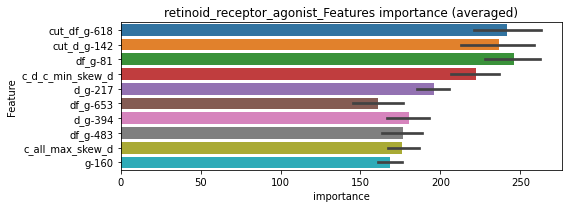

len(train_index) : 2838
len(valid_index) : 947
================================= fold 1/4 retinoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000540242	valid_1's binary_logloss: 0.00223323
[2000]	training's binary_logloss: 0.000306911	valid_1's binary_logloss: 0.00192034
[3000]	training's binary_logloss: 0.000234007	valid_1's binary_logloss: 0.00182541
Early stopping, best iteration is:
[3164]	training's binary_logloss: 0.000226067	valid_1's binary_logloss: 0.00181471


len(train_index) : 2839
len(valid_index) : 946
================================= fold 2/4 retinoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000569453	valid_1's binary_logloss: 0.00534991
[2000]	training's binary_logloss: 0.000326429	valid_1's binary_logloss: 0.00492669
Early stopping, best iteration is:
[2478]	training's binary_logloss: 0.000284334	valid_1's binary_logloss: 0.00484757


len(train_index) : 2839
len(valid_index) : 946
================================= fold 3/4 retinoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000536781	valid_1's binary_logloss: 0.00123612
[2000]	training's binary_logloss: 0.000310757	valid_1's binary_logloss: 0.000917545
[3000]	training's binary_logloss: 0.000244709	valid_1's binary_logloss: 0.000807622
Early stopping, best iteration is:
[3040]	training's binary_logloss: 0.000242751	valid_1's binary_logloss: 0.000804008


len(train_index) : 2839
len(valid_index) : 946
================================= fold 4/4 retinoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000547566	valid_1's binary_logloss: 0.000816572
[2000]	training's binary_logloss: 0.000311631	valid_1's binary_logloss: 0.000515101
[3000]	training's binary_logloss: 0.000237414	valid_1's binary_logloss: 0.000417517
[4000]	training's binary_logloss: 0.000201348	valid_1's binary_logloss: 0.00036613
[5000]	training's binary_logloss: 0.000182563	valid_1's binary_logloss: 0.000337762
[6000]	training's binary_logloss: 0.000170059	valid_1's binary_logloss: 0.00032139
[7000]	training's binary_logloss: 0.000160767	valid_1's binary_logloss: 0.000306879
[8000]	training's binary_logloss: 0.000154018	valid_1's binary_logloss: 0.000296206
[9000]	training's binary_logloss: 0.000148664	valid_1's binary_logloss: 0.000286597
Early stopping, best iteration is:
[9309]	training's binary_logloss: 0.000147237	valid_1's binary_logloss: 0.00028466


retinoid_receptor_agonist logloss: 0.0019386525150086363


neg labels: 3289 → selected neg labels: 3288


retinoid_receptor_antagonist, len(trt): 6, len(othr): 3288
target_rate: 0.0002520 → Adj_target_rate: 0.0003851
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000384078	valid_1's binary_logloss: 0.000833115
Early stopping, best iteration is:
[507]	training's binary_logloss: 0.000190768	valid_1's binary_logloss: 0.000539943
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000387416	valid_1's binary_logloss: 0.00105576
Early stopping, best iteration is:
[466]	training's binary_logloss: 0.000197311	valid_1's binary_logloss: 0.000647112
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00038926	valid_1's binary_logloss: 0.000489108
Early stopping, best iteration is:
[491]	training's binary_logloss: 0.000195418	valid_1's binary_logloss: 0.000256348
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000391965	valid_1's binary_logloss: 0.000448519


1 / 3 AUC score:1.000
y_Threshold: 0.0005908, Threshold: 0.0022297, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00025
Num_p_label: 40.0, conf_0:0.00156, conf_1:0.00290
Num_p_label: 40.0, Expected: 1.0, Adj_threshold_1: 0.0022297
Num_p_label: 1.0, Expected: 1.0, Adj_threshold_2: 0.0322297
threshold: 0.0322297, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[476]	training's binary_logloss: 0.000194662	valid_1's binary_logloss: 0.00024029


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00036199	valid_1's binary_logloss: 0.000540315
Early stopping, best iteration is:
[493]	training's binary_logloss: 0.000178712	valid_1's binary_logloss: 0.000293374
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000364562	valid_1's binary_logloss: 0.000712087
Early stopping, best iteration is:
[536]	training's binary_logloss: 0.000178747	valid_1's binary_logloss: 0.000412764
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000365581	valid_1's binary_logloss: 0.000394282
Early stopping, best iteration is:
[491]	training's binary_logloss: 0.000181006	valid_1's binary_logloss: 0.000198922
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000364579	valid_1's binary_logloss: 0.00040221


2 / 3 AUC score:1.000
y_Threshold: 0.1519354, Threshold: 0.0322297, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0027624 Vs.target_rate: 0.00025
Num_p_label: 11.0, conf_0:0.02578, conf_1:0.03868
Num_p_label: 11.0, Expected: 1.0, Adj_threshold_1: 0.0322297
Num_p_label: 1.0, Expected: 1.0, Adj_threshold_2: 0.0622297
threshold: 0.0622297, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[510]	training's binary_logloss: 0.000178505	valid_1's binary_logloss: 0.00020355


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00036199	valid_1's binary_logloss: 0.000540315
Early stopping, best iteration is:
[493]	training's binary_logloss: 0.000178712	valid_1's binary_logloss: 0.000293374
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000364562	valid_1's binary_logloss: 0.000712087
Early stopping, best iteration is:
[534]	training's binary_logloss: 0.000178747	valid_1's binary_logloss: 0.000412764
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000365581	valid_1's binary_logloss: 0.000394282
Early stopping, best iteration is:
[491]	training's binary_logloss: 0.000181006	valid_1's binary_logloss: 0.000198922
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000364579	valid_1's binary_logloss: 0.00040221


3 / 3 AUC score:1.000
y_Threshold: 0.1519354, Threshold: 0.0622297, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0002511 Vs.target_rate: 0.00025
Num_p_label: 1.0, conf_0:0.05601, conf_1:0.06845
threshold: 0.0622297, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[510]	training's binary_logloss: 0.000178505	valid_1's binary_logloss: 0.00020355


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


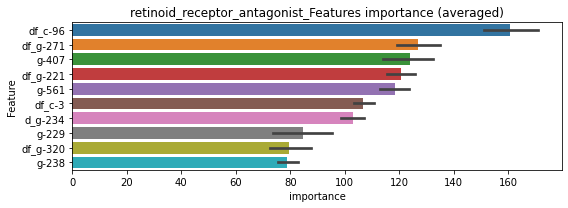

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 retinoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000319807	valid_1's binary_logloss: 0.000843379
[2000]	training's binary_logloss: 0.000198424	valid_1's binary_logloss: 0.000646623
Early stopping, best iteration is:
[2293]	training's binary_logloss: 0.000185836	valid_1's binary_logloss: 0.000624454


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 retinoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000313176	valid_1's binary_logloss: 0.00187414


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 retinoid_receptor_antagonist=================================


Early stopping, best iteration is:
[1297]	training's binary_logloss: 0.000257769	valid_1's binary_logloss: 0.00177275
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000322152	valid_1's binary_logloss: 0.000396913
[2000]	training's binary_logloss: 0.000201289	valid_1's binary_logloss: 0.000266045
[3000]	training's binary_logloss: 0.000171852	valid_1's binary_logloss: 0.00023331
[4000]	training's binary_logloss: 0.000157658	valid_1's binary_logloss: 0.000217658
[5000]	training's binary_logloss: 0.000149672	valid_1's binary_logloss: 0.000208527
[6000]	training's binary_logloss: 0.000144108	valid_1's binary_logloss: 0.000202522
[7000]	training's binary_logloss: 0.000139965	valid_1's binary_logloss: 0.000197932
[8000]	training's binary_logloss: 0.000136941	valid_1's binary_logloss: 0.000194587
[9000]	training's binary_logloss: 0.000134601	valid_1's binary_logloss: 0.000192007
Early stopping, best iteration is:
[9609]	training's binary_loglos

len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 retinoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000291107	valid_1's binary_logloss: 0.000310268
[2000]	training's binary_logloss: 0.000180843	valid_1's binary_logloss: 0.000193366
[3000]	training's binary_logloss: 0.00015046	valid_1's binary_logloss: 0.000160837
[4000]	training's binary_logloss: 0.000133582	valid_1's binary_logloss: 0.000142766
[5000]	training's binary_logloss: 0.000124048	valid_1's binary_logloss: 0.00013256
[6000]	training's binary_logloss: 0.000117592	valid_1's binary_logloss: 0.000125651
[7000]	training's binary_logloss: 0.000112909	valid_1's binary_logloss: 0.000120641
[8000]	training's binary_logloss: 0.000109607	valid_1's binary_logloss: 0.000117107
[9000]	training's binary_logloss: 0.000107199	valid_1's binary_logloss: 0.000114531
[10000]	training's binary_logloss: 0.000105436	valid_1's binary_logloss: 0.000112645
Did not meet early stopping. Best iteration is:
[9999]	training's binary_logloss: 0.000105436	valid_

retinoid_receptor_antagonist logloss: 0.0006751403787526249


neg labels: 3289 → selected neg labels: 3283


rho_associated_kinase_inhibitor, len(trt): 35, len(othr): 3283
target_rate: 0.0014697 → Adj_target_rate: 0.0017245
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00277295	valid_1's binary_logloss: 0.0114722
[600]	training's binary_logloss: 0.000571825	valid_1's binary_logloss: 0.00574522
Early stopping, best iteration is:
[741]	training's binary_logloss: 0.000487404	valid_1's binary_logloss: 0.00554567
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00267937	valid_1's binary_logloss: 0.00899965
[600]	training's binary_logloss: 0.000578846	valid_1's binary_logloss: 0.00368302
Early stopping, best iteration is:
[718]	training's binary_logloss: 0.000494777	valid_1's binary_logloss: 0.00344137
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00285794	valid_1's binary_logloss: 0.0055785
[600]	training's binary_logloss: 0.000595201	valid_1's binary_logloss: 0.00171163
Early stopping, best iteration is:
[769]	training's binary_logloss: 0.000496862	valid_1's binary

1 / 3 AUC score:1.000
y_Threshold: 0.0046763, Threshold: 0.0142268, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0100452 Vs.target_rate: 0.00147
Num_p_label: 40.0, conf_0:0.00996, conf_1:0.01849
Num_p_label: 40.0, Expected: 5.9, Adj_threshold_1: 0.0142268
Num_p_label: 7.0, Expected: 5.9, Adj_threshold_2: 0.0442268
threshold: 0.0442268, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0024663	valid_1's binary_logloss: 0.0112246
[600]	training's binary_logloss: 0.000532968	valid_1's binary_logloss: 0.00570604
Early stopping, best iteration is:
[771]	training's binary_logloss: 0.000453688	valid_1's binary_logloss: 0.00552005
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00251004	valid_1's binary_logloss: 0.00712322
[600]	training's binary_logloss: 0.000544369	valid_1's binary_logloss: 0.00293199
Early stopping, best iteration is:
[738]	training's binary_logloss: 0.000465767	valid_1's binary_logloss: 0.00277183
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00255355	valid_1's binary_logloss: 0.00508889
[600]	training's binary_logloss: 0.000548347	valid_1's binary_logloss: 0.00150033
Early stopping, best iteration is:
[727]	training's binary_logloss: 0.000475149	valid_1's binary

2 / 3 AUC score:1.000
y_Threshold: 0.0406715, Threshold: 0.0442268, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0062783 Vs.target_rate: 0.00147
Num_p_label: 25.0, conf_0:0.03538, conf_1:0.05307
Num_p_label: 25.0, Expected: 5.9, Adj_threshold_1: 0.0442268
Num_p_label: 9.0, Expected: 5.9, Adj_threshold_2: 0.0742268
threshold: 0.0742268, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0024663	valid_1's binary_logloss: 0.0112246
[600]	training's binary_logloss: 0.000532968	valid_1's binary_logloss: 0.00570604
Early stopping, best iteration is:
[771]	training's binary_logloss: 0.000453688	valid_1's binary_logloss: 0.00552005
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00251004	valid_1's binary_logloss: 0.00712322
[600]	training's binary_logloss: 0.000544369	valid_1's binary_logloss: 0.00293199
Early stopping, best iteration is:
[738]	training's binary_logloss: 0.000465767	valid_1's binary_logloss: 0.00277183
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00255355	valid_1's binary_logloss: 0.00508889
[600]	training's binary_logloss: 0.000548347	valid_1's binary_logloss: 0.00150033
Early stopping, best iteration is:
[727]	training's binary_logloss: 0.000475149	valid_1's binary

3 / 3 AUC score:1.000
y_Threshold: 0.0406715, Threshold: 0.0742268, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0022602 Vs.target_rate: 0.00147
Num_p_label: 9.0, conf_0:0.06680, conf_1:0.08165
Num_p_label: 9.0, Expected: 5.9, Adj_threshold_1: 0.0742268
threshold: 0.0742268, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 656.0/3807, y_label_rate: 0.1723142


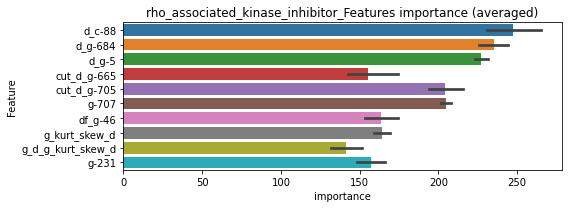

len(train_index) : 2855
len(valid_index) : 952
================================= fold 1/4 rho_associated_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2855
len(valid_index) : 952
================================= fold 2/4 rho_associated_kinase_inhibitor=================================


Early stopping, best iteration is:
[813]	training's binary_logloss: 0.000611468	valid_1's binary_logloss: 0.00428629
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000481494	valid_1's binary_logloss: 0.0024675
Early stopping, best iteration is:
[1601]	training's binary_logloss: 0.000326839	valid_1's binary_logloss: 0.00228476


len(train_index) : 2855
len(valid_index) : 952
================================= fold 3/4 rho_associated_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000492704	valid_1's binary_logloss: 0.000451868
[2000]	training's binary_logloss: 0.000289851	valid_1's binary_logloss: 0.000250558
[3000]	training's binary_logloss: 0.00023121	valid_1's binary_logloss: 0.000189779
[4000]	training's binary_logloss: 0.00020263	valid_1's binary_logloss: 0.000160003
[5000]	training's binary_logloss: 0.000187442	valid_1's binary_logloss: 0.00014452
[6000]	training's binary_logloss: 0.000177289	valid_1's binary_logloss: 0.000134242
[7000]	training's binary_logloss: 0.000169707	valid_1's binary_logloss: 0.000126904
[8000]	training's binary_logloss: 0.000164251	valid_1's binary_logloss: 0.000121601
Early stopping, best iteration is:
[8119]	training's binary_logloss: 0.000163638	valid_1's binary_logloss: 0.000120988


len(train_index) : 2856
len(valid_index) : 951
================================= fold 4/4 rho_associated_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000501698	valid_1's binary_logloss: 0.00301774
Early stopping, best iteration is:
[1084]	training's binary_logloss: 0.000467062	valid_1's binary_logloss: 0.0029426


rho_associated_kinase_inhibitor logloss: 0.0024087813681322547


neg labels: 3289 → selected neg labels: 3284


ribonucleoside_reductase_inhibitor, len(trt): 37, len(othr): 3284
target_rate: 0.0015537 → Adj_target_rate: 0.0018079
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00308233	valid_1's binary_logloss: 0.0189176
[600]	training's binary_logloss: 0.00062151	valid_1's binary_logloss: 0.0125274
Early stopping, best iteration is:
[708]	training's binary_logloss: 0.000530241	valid_1's binary_logloss: 0.0121936
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00320234	valid_1's binary_logloss: 0.00887817
[600]	training's binary_logloss: 0.000621805	valid_1's binary_logloss: 0.00349583
Early stopping, best iteration is:
[704]	training's binary_logloss: 0.00052979	valid_1's binary_logloss: 0.00324361
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0030962	valid_1's binary_logloss: 0.0094062
[600]	training's binary_logloss: 0.000618398	valid_1's binary_logloss: 0.00331406
Early stopping, best iteration is:
[739]	training's binary_logloss: 0.000526706	valid_1's binary_logl

1 / 3 AUC score:1.000
y_Threshold: 0.0046188, Threshold: 0.0271650, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00155
Num_p_label: 40.0, conf_0:0.01902, conf_1:0.03531
Num_p_label: 40.0, Expected: 6.2, Adj_threshold_1: 0.0271650
Num_p_label: 12.0, Expected: 6.2, Adj_threshold_2: 0.0571650
threshold: 0.0571650, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00279636	valid_1's binary_logloss: 0.0194567
[600]	training's binary_logloss: 0.000581276	valid_1's binary_logloss: 0.0128742
Early stopping, best iteration is:
[660]	training's binary_logloss: 0.000521963	valid_1's binary_logloss: 0.0126972
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00286937	valid_1's binary_logloss: 0.00742497
[600]	training's binary_logloss: 0.000589803	valid_1's binary_logloss: 0.00286323
Early stopping, best iteration is:
[723]	training's binary_logloss: 0.000515107	valid_1's binary_logloss: 0.00267894
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00288999	valid_1's binary_logloss: 0.00747306
[600]	training's binary_logloss: 0.00059332	valid_1's binary_logloss: 0.00266121
Early stopping, best iteration is:
[716]	training's binary_logloss: 0.000514616	valid_1's binary_l

2 / 3 AUC score:1.000
y_Threshold: 0.0453960, Threshold: 0.0571650, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0095429 Vs.target_rate: 0.00155
Num_p_label: 38.0, conf_0:0.04573, conf_1:0.06860
Num_p_label: 38.0, Expected: 6.2, Adj_threshold_1: 0.0571650
Num_p_label: 25.0, Expected: 6.2, Adj_threshold_2: 0.0871650
Num_p_label: 9.0, Expected: 6.2, Adj_threshold_3: 0.1171650
threshold: 0.1171650, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 655.0/3806, y_label_rate: 0.1720967
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00281299	valid_1's binary_logloss: 0.0146924
[600]	training's binary_logloss: 0.000581423	valid_1's binary_logloss: 0.00940909
Early stopping, best iteration is:
[656]	training's binary_logloss: 0.000523104	valid_1's binary_logloss: 0.00917045
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0028543	valid_1's binary_logloss: 0.00705143
[600]	training's binary_logloss: 0.000583143	valid_1's binary_logloss: 0.00253666
Early stopping, best iteration is:
[708]	training's binary_logloss: 0.000512128	valid_1's binary_logloss: 0.00241023
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00270345	valid_1's binary_logloss: 0.0113453
[600]	training's binary_logloss: 0.000572387	valid_1's binary_logloss: 0.00612781
Early stopping, best iteration is:
[677]	training's binary_logloss: 0.000507409	valid_1's binary_

3 / 3 AUC score:1.000
y_Threshold: 0.0374325, Threshold: 0.1171650, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 654.0/3804
p_label_rate: 0.0032647 Vs.target_rate: 0.00155
Num_p_label: 13.0, conf_0:0.10545, conf_1:0.12888
Num_p_label: 13.0, Expected: 6.2, Adj_threshold_1: 0.1171650
threshold: 0.1171650, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 654.0/3804, y_label_rate: 0.1719243


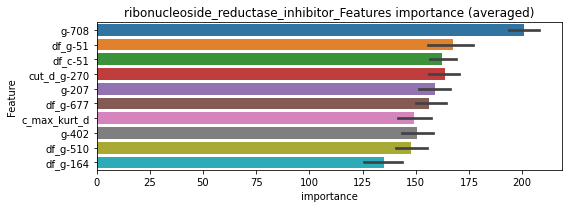

len(train_index) : 2853
len(valid_index) : 951
================================= fold 1/4 ribonucleoside_reductase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[918]	training's binary_logloss: 0.000529915	valid_1's binary_logloss: 0.00178193


len(train_index) : 2853
len(valid_index) : 951
================================= fold 2/4 ribonucleoside_reductase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00051312	valid_1's binary_logloss: 0.000719913
[2000]	training's binary_logloss: 0.000300981	valid_1's binary_logloss: 0.000452617
[3000]	training's binary_logloss: 0.000238765	valid_1's binary_logloss: 0.00036969
[4000]	training's binary_logloss: 0.000210278	valid_1's binary_logloss: 0.000328605
[5000]	training's binary_logloss: 0.000195218	valid_1's binary_logloss: 0.000306106
[6000]	training's binary_logloss: 0.000184771	valid_1's binary_logloss: 0.000291121
[7000]	training's binary_logloss: 0.000177049	valid_1's binary_logloss: 0.000279786
Early stopping, best iteration is:
[7704]	training's binary_logloss: 0.000173304	valid_1's binary_logloss: 0.000274277


len(train_index) : 2853
len(valid_index) : 951
================================= fold 3/4 ribonucleoside_reductase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000513868	valid_1's binary_logloss: 0.00421622
[2000]	training's binary_logloss: 0.000301481	valid_1's binary_logloss: 0.0037399
Early stopping, best iteration is:
[1978]	training's binary_logloss: 0.000303565	valid_1's binary_logloss: 0.00373562


len(train_index) : 2853
len(valid_index) : 951
================================= fold 4/4 ribonucleoside_reductase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00042179	valid_1's binary_logloss: 0.000565457
[2000]	training's binary_logloss: 0.000242713	valid_1's binary_logloss: 0.000326595
[3000]	training's binary_logloss: 0.000180721	valid_1's binary_logloss: 0.000243512
[4000]	training's binary_logloss: 0.000150723	valid_1's binary_logloss: 0.000203235
[5000]	training's binary_logloss: 0.000135257	valid_1's binary_logloss: 0.000182446
[6000]	training's binary_logloss: 0.00012531	valid_1's binary_logloss: 0.000169062
[7000]	training's binary_logloss: 0.000118365	valid_1's binary_logloss: 0.000159722
[8000]	training's binary_logloss: 0.000113583	valid_1's binary_logloss: 0.000153281
[9000]	training's binary_logloss: 0.000110176	valid_1's binary_logloss: 0.00014869
[10000]	training's binary_logloss: 0.00010772	valid_1's binary_logloss: 0.000145386
Did not meet early stopping. Best iteration is:
[9999]	training's binary_logloss: 0.00010772	valid_1's

ribonucleoside_reductase_inhibitor logloss: 0.0014849695358308038


neg labels: 3289 → selected neg labels: 3284


rna_polymerase_inhibitor, len(trt): 25, len(othr): 3284
target_rate: 0.0010498 → Adj_target_rate: 0.0012955
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00166919	valid_1's binary_logloss: 0.00433629
[600]	training's binary_logloss: 0.000422419	valid_1's binary_logloss: 0.00183916
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.000411266	valid_1's binary_logloss: 0.00181343
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00164249	valid_1's binary_logloss: 0.00378433
[600]	training's binary_logloss: 0.000425699	valid_1's binary_logloss: 0.00149959
Early stopping, best iteration is:
[671]	training's binary_logloss: 0.000408875	valid_1's binary_logloss: 0.00147303
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00165356	valid_1's binary_logloss: 0.00466395
[600]	training's binary_logloss: 0.000424753	valid_1's binary_logloss: 0.00202745
Early stopping, best iteration is:
[645]	training's binary_logloss: 0.000417267	valid_1's bina

1 / 3 AUC score:1.000
y_Threshold: 0.0024398, Threshold: 0.0114202, pos_neg_ratio: 0.8000000


[600]	training's binary_logloss: 0.000434667	valid_1's binary_logloss: 0.00141496
Early stopping, best iteration is:
[588]	training's binary_logloss: 0.000434939	valid_1's binary_logloss: 0.0014142


Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00105
Num_p_label: 40.0, conf_0:0.00799, conf_1:0.01485
Num_p_label: 40.0, Expected: 4.2, Adj_threshold_1: 0.0114202
Num_p_label: 6.0, Expected: 4.2, Adj_threshold_2: 0.0414202
threshold: 0.0414202, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00152419	valid_1's binary_logloss: 0.00463185
[600]	training's binary_logloss: 0.00040285	valid_1's binary_logloss: 0.00222472
Early stopping, best iteration is:
[650]	training's binary_logloss: 0.000392264	valid_1's binary_logloss: 0.0022029
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0015624	valid_1's binary_logloss: 0.00290547
[600]	training's binary_logloss: 0.000409458	valid_1's binary_logloss: 0.00100087
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000406043	valid_1's binary_logloss: 0.000995681
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00152952	valid_1's binary_logloss: 0.0039693
[600]	training's binary_logloss: 0.00041391	valid_1's binary_logloss: 0.00187212
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000415666	valid_1's binary_l

2 / 3 AUC score:1.000
y_Threshold: 0.0930790, Threshold: 0.0414202, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0090407 Vs.target_rate: 0.00105
Num_p_label: 36.0, conf_0:0.03314, conf_1:0.04970
Num_p_label: 36.0, Expected: 4.2, Adj_threshold_1: 0.0414202
Num_p_label: 23.0, Expected: 4.2, Adj_threshold_2: 0.0714202
Num_p_label: 13.0, Expected: 4.2, Adj_threshold_3: 0.1014202
Num_p_label: 8.0, Expected: 4.2, Adj_threshold_4: 0.1314202
threshold: 0.1314202, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00152419	valid_1's binary_logloss: 0.00463185
[600]	training's binary_logloss: 0.00040285	valid_1's binary_logloss: 0.00222472
Early stopping, best iteration is:
[650]	training's binary_logloss: 0.000392264	valid_1's binary_logloss: 0.0022029
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0015624	valid_1's binary_logloss: 0.00290547
[600]	training's binary_logloss: 0.000409458	valid_1's binary_logloss: 0.00100087
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000406043	valid_1's binary_logloss: 0.000995681
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00152952	valid_1's binary_logloss: 0.0039693
[600]	training's binary_logloss: 0.00041391	valid_1's binary_logloss: 0.00187212
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000415666	valid_1's binary_l

3 / 3 AUC score:1.000
y_Threshold: 0.0930790, Threshold: 0.1314202, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0020090 Vs.target_rate: 0.00105
Num_p_label: 8.0, conf_0:0.11828, conf_1:0.14456
Num_p_label: 8.0, Expected: 4.2, Adj_threshold_1: 0.1314202
threshold: 0.1314202, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


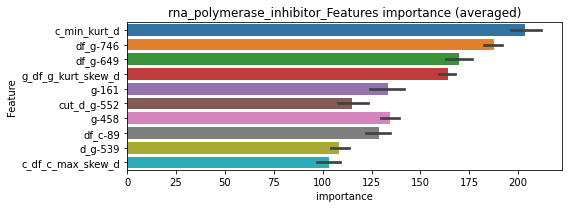

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 rna_polymerase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000455443	valid_1's binary_logloss: 0.0025477
Early stopping, best iteration is:
[1565]	training's binary_logloss: 0.00031745	valid_1's binary_logloss: 0.00234928


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 rna_polymerase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000395571	valid_1's binary_logloss: 0.000481927
[2000]	training's binary_logloss: 0.000235044	valid_1's binary_logloss: 0.000286927
[3000]	training's binary_logloss: 0.000177421	valid_1's binary_logloss: 0.000216732
[4000]	training's binary_logloss: 0.000149024	valid_1's binary_logloss: 0.000182108
[5000]	training's binary_logloss: 0.000134167	valid_1's binary_logloss: 0.000163979
[6000]	training's binary_logloss: 0.000124526	valid_1's binary_logloss: 0.000152211
[7000]	training's binary_logloss: 0.000117743	valid_1's binary_logloss: 0.000143928
[8000]	training's binary_logloss: 0.000113083	valid_1's binary_logloss: 0.000138235
[9000]	training's binary_logloss: 0.000109761	valid_1's binary_logloss: 0.000134178
[10000]	training's binary_logloss: 0.000107457	valid_1's binary_logloss: 0.00013137
Did not meet early stopping. Best iteration is:
[9999]	training's binary_logloss: 0.000107457	valid

len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 rna_polymerase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000456176	valid_1's binary_logloss: 0.000693762
[2000]	training's binary_logloss: 0.00027334	valid_1's binary_logloss: 0.000491796
[3000]	training's binary_logloss: 0.000222135	valid_1's binary_logloss: 0.00043129
[4000]	training's binary_logloss: 0.000196176	valid_1's binary_logloss: 0.000397857
Early stopping, best iteration is:
[4600]	training's binary_logloss: 0.000186985	valid_1's binary_logloss: 0.000385079


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 rna_polymerase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000469487	valid_1's binary_logloss: 0.00200501
[2000]	training's binary_logloss: 0.000284978	valid_1's binary_logloss: 0.00177591
[3000]	training's binary_logloss: 0.000232328	valid_1's binary_logloss: 0.00171516
[4000]	training's binary_logloss: 0.000206801	valid_1's binary_logloss: 0.00168282
[5000]	training's binary_logloss: 0.000192849	valid_1's binary_logloss: 0.00166379
[6000]	training's binary_logloss: 0.000183939	valid_1's binary_logloss: 0.00165197
Early stopping, best iteration is:
[6592]	training's binary_logloss: 0.000180037	valid_1's binary_logloss: 0.00164754


rna_polymerase_inhibitor logloss: 0.0011285772009665795


neg labels: 3289 → selected neg labels: 3249


serotonin_receptor_agonist, len(trt): 236, len(othr): 3249
target_rate: 0.0099101 → Adj_target_rate: 0.0087332
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0322198	valid_1's binary_logloss: 0.206792
Early stopping, best iteration is:
[361]	training's binary_logloss: 0.0212033	valid_1's binary_logloss: 0.204334
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0318735	valid_1's binary_logloss: 0.206565
Early stopping, best iteration is:
[403]	training's binary_logloss: 0.0159848	valid_1's binary_logloss: 0.199592
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0330614	valid_1's binary_logloss: 0.180908
Early stopping, best iteration is:
[466]	training's binary_logloss: 0.0115313	valid_1's binary_logloss: 0.167899
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0345353	valid_1's binary_logloss: 0.205486


1 / 3 AUC score:0.940
y_Threshold: 0.0617467, Threshold: 0.3460920, pos_neg_ratio: 0.8000000
Remove_noisy_data: 315 → Positive_corect_labels: 557/3583
p_label_rate: 0.0100452 Vs.target_rate: 0.00991
Num_p_label: 40.0, conf_0:0.24226, conf_1:0.44992


Early stopping, best iteration is:
[345]	training's binary_logloss: 0.0255334	valid_1's binary_logloss: 0.201296


threshold: 0.3460920, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 557.0/3583, y_label_rate: 0.1554563
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0175535	valid_1's binary_logloss: 0.12581
Early stopping, best iteration is:
[504]	training's binary_logloss: 0.00444119	valid_1's binary_logloss: 0.114034
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0167582	valid_1's binary_logloss: 0.149104
Early stopping, best iteration is:
[433]	training's binary_logloss: 0.0064977	valid_1's binary_logloss: 0.144813
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0192152	valid_1's binary_logloss: 0.11687
[600]	training's binary_logloss: 0.00307505	valid_1's binary_logloss: 0.105446
Early stopping, best iteration is:
[595]	training's binary_logloss: 0.00313417	valid_1's binary_logloss: 0.105229
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0170533	valid_1's binary_logloss: 0.153325


2 / 3 AUC score:0.986
y_Threshold: 0.0631042, Threshold: 0.3460920, pos_neg_ratio: 0.8000000
Remove_noisy_data: 92 → Positive_corect_labels: 511.0/3491
p_label_rate: 0.0200904 Vs.target_rate: 0.00991
Num_p_label: 80.0, conf_0:0.27687, conf_1:0.41531
Num_p_label: 80.0, Expected: 39.5, Adj_threshold_1: 0.3460920
Num_p_label: 74.0, Expected: 39.5, Adj_threshold_2: 0.3760920
Num_p_label: 69.0, Expected: 39.5, Adj_threshold_3: 0.4060920
Num_p_label: 68.0, Expected: 39.5, Adj_threshold_4: 0.4360920
Num_p_label: 63.0, Expected: 39.5, Adj_threshold_5: 0.4660920
Num_p_label: 55.0, Expected: 39.5, Adj_threshold_6: 0.4960920


Early stopping, best iteration is:
[333]	training's binary_logloss: 0.0133074	valid_1's binary_logloss: 0.151432


threshold: 0.4960920, positive_p_label: 55.0/3982, p_label_rate: 0.0138122
positive_y_label: 511.0/3491, y_label_rate: 0.1463764
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0123973	valid_1's binary_logloss: 0.119733
Early stopping, best iteration is:
[476]	training's binary_logloss: 0.0036404	valid_1's binary_logloss: 0.11347
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0128874	valid_1's binary_logloss: 0.0811696
Early stopping, best iteration is:
[566]	training's binary_logloss: 0.0025009	valid_1's binary_logloss: 0.067713
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0134955	valid_1's binary_logloss: 0.0799501
Early stopping, best iteration is:
[555]	training's binary_logloss: 0.0026996	valid_1's binary_logloss: 0.0679969
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0122292	valid_1's binary_logloss: 0.106654
[600]	training's binary_logloss: 0.00210177	valid_1's binary_logloss: 0.0952684
Early stopping, best it

3 / 3 AUC score:0.997
y_Threshold: 0.0439886, Threshold: 0.4960920, pos_neg_ratio: 0.8000000
Remove_noisy_data: 46 → Positive_corect_labels: 488.0/3445
p_label_rate: 0.0163235 Vs.target_rate: 0.00991
Num_p_label: 65.0, conf_0:0.44648, conf_1:0.54570
Num_p_label: 65.0, Expected: 39.5, Adj_threshold_1: 0.4960920
Num_p_label: 62.0, Expected: 39.5, Adj_threshold_2: 0.5260920
Num_p_label: 60.0, Expected: 39.5, Adj_threshold_3: 0.5560920
Num_p_label: 59.0, Expected: 39.5, Adj_threshold_4: 0.5860920
threshold: 0.5860920, positive_p_label: 59.0/3982, p_label_rate: 0.0148167
positive_y_label: 488.0/3445, y_label_rate: 0.1416546


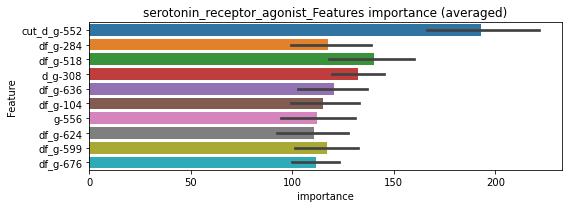

len(train_index) : 2583
len(valid_index) : 862
================================= fold 1/4 serotonin_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000627529	valid_1's binary_logloss: 0.00381385
Early stopping, best iteration is:
[1791]	training's binary_logloss: 0.000389232	valid_1's binary_logloss: 0.00352394


len(train_index) : 2584
len(valid_index) : 861
================================= fold 2/4 serotonin_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000626909	valid_1's binary_logloss: 0.00235026
[2000]	training's binary_logloss: 0.000356838	valid_1's binary_logloss: 0.00186877
[3000]	training's binary_logloss: 0.000278044	valid_1's binary_logloss: 0.00166786
Early stopping, best iteration is:
[3093]	training's binary_logloss: 0.00027273	valid_1's binary_logloss: 0.00165787


len(train_index) : 2584
len(valid_index) : 861
================================= fold 3/4 serotonin_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[752]	training's binary_logloss: 0.000827086	valid_1's binary_logloss: 0.00196593


len(train_index) : 2584
len(valid_index) : 861
================================= fold 4/4 serotonin_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000510048	valid_1's binary_logloss: 0.000996294
[2000]	training's binary_logloss: 0.00027907	valid_1's binary_logloss: 0.000547492
[3000]	training's binary_logloss: 0.000204255	valid_1's binary_logloss: 0.00040141
[4000]	training's binary_logloss: 0.00016899	valid_1's binary_logloss: 0.00033238
[5000]	training's binary_logloss: 0.000151037	valid_1's binary_logloss: 0.000297215
[6000]	training's binary_logloss: 0.00013948	valid_1's binary_logloss: 0.000274507
[7000]	training's binary_logloss: 0.000131436	valid_1's binary_logloss: 0.000258661
[8000]	training's binary_logloss: 0.000125934	valid_1's binary_logloss: 0.000247851
[9000]	training's binary_logloss: 0.000122028	valid_1's binary_logloss: 0.000240171
[10000]	training's binary_logloss: 0.000119248	valid_1's binary_logloss: 0.000234733
Did not meet early stopping. Best iteration is:
[9999]	training's binary_logloss: 0.000119248	valid_1's

serotonin_receptor_agonist logloss: 0.0018483123116228134


neg labels: 3289 → selected neg labels: 3239


serotonin_receptor_antagonist, len(trt): 404, len(othr): 3239
target_rate: 0.0169648 → Adj_target_rate: 0.0137918
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0607364	valid_1's binary_logloss: 0.348293
Early stopping, best iteration is:
[274]	training's binary_logloss: 0.0698436	valid_1's binary_logloss: 0.347334
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0622741	valid_1's binary_logloss: 0.339395
Early stopping, best iteration is:
[303]	training's binary_logloss: 0.0611138	valid_1's binary_logloss: 0.339116
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0662337	valid_1's binary_logloss: 0.335001
Early stopping, best iteration is:
[299]	training's binary_logloss: 0.0666577	valid_1's binary_logloss: 0.334939
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0635256	valid_1's binary_logloss: 0.336257


1 / 3 AUC score:0.804
y_Threshold: 0.1319320, Threshold: 0.5237532, pos_neg_ratio: 0.8000000
Remove_noisy_data: 643 → Positive_corect_labels: 391/3243
p_label_rate: 0.0100452 Vs.target_rate: 0.01696
Num_p_label: 40.0, conf_0:0.36663, conf_1:0.68088
Num_p_label: 40.0, Expected: 67.6, Adj_threshold_1: 0.5237532
Num_p_label: 50.0, Expected: 67.6, Adj_threshold_2: 0.4937532


Early stopping, best iteration is:
[335]	training's binary_logloss: 0.051643	valid_1's binary_logloss: 0.334731


threshold: 0.4937532, positive_p_label: 50.0/3982, p_label_rate: 0.0125565
positive_y_label: 391.0/3243, y_label_rate: 0.1205674
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.018924	valid_1's binary_logloss: 0.175203
Early stopping, best iteration is:
[370]	training's binary_logloss: 0.0110655	valid_1's binary_logloss: 0.170748
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0203658	valid_1's binary_logloss: 0.180661
Early stopping, best iteration is:
[409]	training's binary_logloss: 0.00906575	valid_1's binary_logloss: 0.177031
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0197533	valid_1's binary_logloss: 0.165299
Early stopping, best iteration is:
[458]	training's binary_logloss: 0.00657204	valid_1's binary_logloss: 0.158442
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0191857	valid_1's binary_logloss: 0.185431


2 / 3 AUC score:0.959
y_Threshold: 0.0769268, Threshold: 0.4937532, pos_neg_ratio: 0.8000000
Remove_noisy_data: 152 → Positive_corect_labels: 315.0/3091
p_label_rate: 0.0236062 Vs.target_rate: 0.01696
Num_p_label: 94.0, conf_0:0.39500, conf_1:0.59250
threshold: 0.4937532, positive_p_label: 94.0/3982, p_label_rate: 0.0236062


Early stopping, best iteration is:
[326]	training's binary_logloss: 0.015629	valid_1's binary_logloss: 0.184462


positive_y_label: 315.0/3091, y_label_rate: 0.1019088
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.011592	valid_1's binary_logloss: 0.121223
Early stopping, best iteration is:
[410]	training's binary_logloss: 0.00509321	valid_1's binary_logloss: 0.115715
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.011904	valid_1's binary_logloss: 0.134432
Early stopping, best iteration is:
[494]	training's binary_logloss: 0.00324672	valid_1's binary_logloss: 0.124858
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[264]	training's binary_logloss: 0.0156478	valid_1's binary_logloss: 0.145663
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0114672	valid_1's binary_logloss: 0.151022


3 / 3 AUC score:0.978
y_Threshold: 0.0638463, Threshold: 0.4937532, pos_neg_ratio: 0.8000000
Remove_noisy_data: 92 → Positive_corect_labels: 269.0/2999
p_label_rate: 0.0286288 Vs.target_rate: 0.01696
Num_p_label: 114.0, conf_0:0.44438, conf_1:0.54313
Num_p_label: 114.0, Expected: 67.6, Adj_threshold_1: 0.4937532
Num_p_label: 112.0, Expected: 67.6, Adj_threshold_2: 0.5237532
Num_p_label: 109.0, Expected: 67.6, Adj_threshold_3: 0.5537532
Num_p_label: 107.0, Expected: 67.6, Adj_threshold_4: 0.5837532


Early stopping, best iteration is:
[310]	training's binary_logloss: 0.0105501	valid_1's binary_logloss: 0.150477


Num_p_label: 105.0, Expected: 67.6, Adj_threshold_5: 0.6137532
Num_p_label: 100.0, Expected: 67.6, Adj_threshold_6: 0.6437532
threshold: 0.6437532, positive_p_label: 100.0/3982, p_label_rate: 0.0251130
positive_y_label: 269.0/2999, y_label_rate: 0.0896966


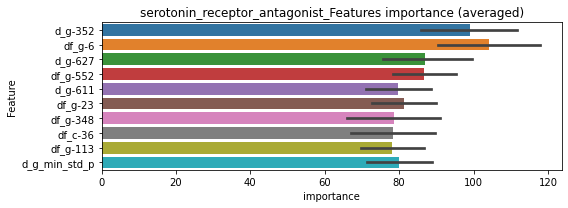

len(train_index) : 2249
len(valid_index) : 750
================================= fold 1/4 serotonin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000688519	valid_1's binary_logloss: 0.00311839
Early stopping, best iteration is:
[1626]	training's binary_logloss: 0.000452935	valid_1's binary_logloss: 0.0027792


len(train_index) : 2249
len(valid_index) : 750
================================= fold 2/4 serotonin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000682693	valid_1's binary_logloss: 0.00216401
[2000]	training's binary_logloss: 0.000392668	valid_1's binary_logloss: 0.00151354
[3000]	training's binary_logloss: 0.000304299	valid_1's binary_logloss: 0.00128016
[4000]	training's binary_logloss: 0.000261802	valid_1's binary_logloss: 0.00116638
[5000]	training's binary_logloss: 0.000241024	valid_1's binary_logloss: 0.00110296
[6000]	training's binary_logloss: 0.000226406	valid_1's binary_logloss: 0.00105459
Early stopping, best iteration is:
[6412]	training's binary_logloss: 0.000222305	valid_1's binary_logloss: 0.00104182


len(train_index) : 2249
len(valid_index) : 750
================================= fold 3/4 serotonin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000665239	valid_1's binary_logloss: 0.00962247
Early stopping, best iteration is:
[1079]	training's binary_logloss: 0.000622116	valid_1's binary_logloss: 0.00955395


len(train_index) : 2250
len(valid_index) : 749
================================= fold 4/4 serotonin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000685331	valid_1's binary_logloss: 0.00149193
[2000]	training's binary_logloss: 0.000395533	valid_1's binary_logloss: 0.000842062
[3000]	training's binary_logloss: 0.000308416	valid_1's binary_logloss: 0.000630817
[4000]	training's binary_logloss: 0.00026787	valid_1's binary_logloss: 0.000527453
[5000]	training's binary_logloss: 0.000246468	valid_1's binary_logloss: 0.000472025
[6000]	training's binary_logloss: 0.00023271	valid_1's binary_logloss: 0.000435925
[7000]	training's binary_logloss: 0.000222858	valid_1's binary_logloss: 0.000411277
[8000]	training's binary_logloss: 0.000216	valid_1's binary_logloss: 0.000394142
Early stopping, best iteration is:
[8119]	training's binary_logloss: 0.000215299	valid_1's binary_logloss: 0.000392234


serotonin_receptor_antagonist logloss: 0.0034430728038550044


neg labels: 3289 → selected neg labels: 3285


serotonin_reuptake_inhibitor, len(trt): 44, len(othr): 3285
target_rate: 0.0018477 → Adj_target_rate: 0.0020948
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00341524	valid_1's binary_logloss: 0.0193844
[600]	training's binary_logloss: 0.000681111	valid_1's binary_logloss: 0.0115528
Early stopping, best iteration is:
[744]	training's binary_logloss: 0.000563414	valid_1's binary_logloss: 0.0111115
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00351885	valid_1's binary_logloss: 0.0184809
[600]	training's binary_logloss: 0.000694171	valid_1's binary_logloss: 0.0117377
Early stopping, best iteration is:
[699]	training's binary_logloss: 0.000585437	valid_1's binary_logloss: 0.0113136
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00387142	valid_1's binary_logloss: 0.0101161
[600]	training's binary_logloss: 0.000727997	valid_1's binary_logloss: 0.00328975
Early stopping, best iteration is:
[766]	training's binary_logloss: 0.000590947	valid_1's binary_logl

1 / 3 AUC score:1.000
y_Threshold: 0.0045853, Threshold: 0.0314211, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00185
Num_p_label: 40.0, conf_0:0.02199, conf_1:0.04085
Num_p_label: 40.0, Expected: 7.4, Adj_threshold_1: 0.0314211
Num_p_label: 19.0, Expected: 7.4, Adj_threshold_2: 0.0614211
Num_p_label: 12.0, Expected: 7.4, Adj_threshold_3: 0.0914211
threshold: 0.0914211, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00306899	valid_1's binary_logloss: 0.0172443
[600]	training's binary_logloss: 0.000638908	valid_1's binary_logloss: 0.0106029
Early stopping, best iteration is:
[716]	training's binary_logloss: 0.000548206	valid_1's binary_logloss: 0.0102839
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00324621	valid_1's binary_logloss: 0.0141451
[600]	training's binary_logloss: 0.00066109	valid_1's binary_logloss: 0.00816419
Early stopping, best iteration is:
[654]	training's binary_logloss: 0.000593593	valid_1's binary_logloss: 0.0080233
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00346262	valid_1's binary_logloss: 0.00954177
[600]	training's binary_logloss: 0.000693521	valid_1's binary_logloss: 0.00312712
Early stopping, best iteration is:
[746]	training's binary_logloss: 0.000571023	valid_1's binary_log

2 / 3 AUC score:1.000
y_Threshold: 0.0789091, Threshold: 0.0914211, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0102963 Vs.target_rate: 0.00185
Num_p_label: 41.0, conf_0:0.07314, conf_1:0.10971
Num_p_label: 41.0, Expected: 7.4, Adj_threshold_1: 0.0914211
Num_p_label: 35.0, Expected: 7.4, Adj_threshold_2: 0.1214211
Num_p_label: 26.0, Expected: 7.4, Adj_threshold_3: 0.1514211
Num_p_label: 21.0, Expected: 7.4, Adj_threshold_4: 0.1814211
Num_p_label: 18.0, Expected: 7.4, Adj_threshold_5: 0.2114211
threshold: 0.2114211, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00306899	valid_1's binary_logloss: 0.0172443
[600]	training's binary_logloss: 0.000638908	valid_1's binary_logloss: 0.0106029
Early stopping, best iteration is:
[716]	training's binary_logloss: 0.000548206	valid_1's binary_logloss: 0.0102839
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00324621	valid_1's binary_logloss: 0.0141451
[600]	training's binary_logloss: 0.00066109	valid_1's binary_logloss: 0.00816419
Early stopping, best iteration is:
[654]	training's binary_logloss: 0.000593593	valid_1's binary_logloss: 0.0080233
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00346262	valid_1's binary_logloss: 0.00954177
[600]	training's binary_logloss: 0.000693521	valid_1's binary_logloss: 0.00312712
Early stopping, best iteration is:
[746]	training's binary_logloss: 0.000571023	valid_1's binary_log

3 / 3 AUC score:1.000
y_Threshold: 0.0789091, Threshold: 0.2114211, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0045203 Vs.target_rate: 0.00185
Num_p_label: 18.0, conf_0:0.19028, conf_1:0.23256
Num_p_label: 18.0, Expected: 7.4, Adj_threshold_1: 0.2114211
threshold: 0.2114211, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


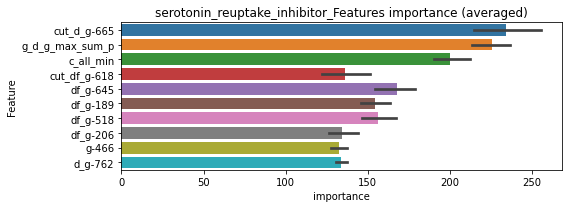

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 serotonin_reuptake_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000509651	valid_1's binary_logloss: 0.00627514
Early stopping, best iteration is:
[1878]	training's binary_logloss: 0.000312342	valid_1's binary_logloss: 0.00580707


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 serotonin_reuptake_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 serotonin_reuptake_inhibitor=================================


Early stopping, best iteration is:
[529]	training's binary_logloss: 0.000944267	valid_1's binary_logloss: 0.00392287
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000501705	valid_1's binary_logloss: 0.000513656
[2000]	training's binary_logloss: 0.000295153	valid_1's binary_logloss: 0.00028253
[3000]	training's binary_logloss: 0.000232045	valid_1's binary_logloss: 0.00020773
[4000]	training's binary_logloss: 0.000201747	valid_1's binary_logloss: 0.000171875
[5000]	training's binary_logloss: 0.000187389	valid_1's binary_logloss: 0.000154005
[6000]	training's binary_logloss: 0.000178087	valid_1's binary_logloss: 0.000142336
[7000]	training's binary_logloss: 0.000171794	valid_1's binary_logloss: 0.000134437
Early stopping, best iteration is:
[7708]	training's binary_logloss: 0.000168565	valid_1's binary_logloss: 0.000130327


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 serotonin_reuptake_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000511495	valid_1's binary_logloss: 0.00215195
Early stopping, best iteration is:
[1226]	training's binary_logloss: 0.000431159	valid_1's binary_logloss: 0.00206069


serotonin_reuptake_inhibitor logloss: 0.002981266122384895


neg labels: 3289 → selected neg labels: 3283


sigma_receptor_agonist, len(trt): 36, len(othr): 3283
target_rate: 0.0015117 → Adj_target_rate: 0.0017663
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00233073	valid_1's binary_logloss: 0.0189577
[600]	training's binary_logloss: 0.000532786	valid_1's binary_logloss: 0.0129125
Early stopping, best iteration is:
[623]	training's binary_logloss: 0.000512191	valid_1's binary_logloss: 0.0128165
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00252609	valid_1's binary_logloss: 0.00977987
[600]	training's binary_logloss: 0.000561209	valid_1's binary_logloss: 0.00607476
Early stopping, best iteration is:
[663]	training's binary_logloss: 0.00051107	valid_1's binary_logloss: 0.00597679
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00260329	valid_1's binary_logloss: 0.007593
[600]	training's binary_logloss: 0.000568316	valid_1's binary_logloss: 0.00362677
Early stopping, best iteration is:
[665]	training's binary_logloss: 0.000515385	valid_1's binary_log

1 / 3 AUC score:1.000
y_Threshold: 0.0032770, Threshold: 0.0251706, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, conf_0:0.01762, conf_1:0.03272
Num_p_label: 40.0, Expected: 6.0, Adj_threshold_1: 0.0251706
Num_p_label: 19.0, Expected: 6.0, Adj_threshold_2: 0.0551706
Num_p_label: 9.0, Expected: 6.0, Adj_threshold_3: 0.0851706
threshold: 0.0851706, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0022734	valid_1's binary_logloss: 0.0183891
[600]	training's binary_logloss: 0.000519358	valid_1's binary_logloss: 0.0125514
Early stopping, best iteration is:
[620]	training's binary_logloss: 0.000502477	valid_1's binary_logloss: 0.0124663
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00235184	valid_1's binary_logloss: 0.00867027
[600]	training's binary_logloss: 0.000536915	valid_1's binary_logloss: 0.00548354
Early stopping, best iteration is:
[601]	training's binary_logloss: 0.000535416	valid_1's binary_logloss: 0.00547447
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00243923	valid_1's binary_logloss: 0.00593924
[600]	training's binary_logloss: 0.000545337	valid_1's binary_logloss: 0.00271659
Early stopping, best iteration is:
[694]	training's binary_logloss: 0.00048866	valid_1's binary_lo

2 / 3 AUC score:1.000
y_Threshold: 0.0296591, Threshold: 0.0851706, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0107986 Vs.target_rate: 0.00151
Num_p_label: 43.0, conf_0:0.06814, conf_1:0.10220
Num_p_label: 43.0, Expected: 6.0, Adj_threshold_1: 0.0851706
Num_p_label: 33.0, Expected: 6.0, Adj_threshold_2: 0.1151706
Num_p_label: 27.0, Expected: 6.0, Adj_threshold_3: 0.1451706
Num_p_label: 25.0, Expected: 6.0, Adj_threshold_4: 0.1751706
Num_p_label: 19.0, Expected: 6.0, Adj_threshold_5: 0.2051706
Num_p_label: 16.0, Expected: 6.0, Adj_threshold_6: 0.2351706
Num_p_label: 12.0, Expected: 6.0, Adj_threshold_7: 0.2651706
threshold: 0.2651706, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0022734	valid_1's binary_logloss: 0.0183891
[600]	training's binary_logloss: 0.000519358	valid_1's binary_logloss: 0.0125514
Early stopping, best iteration is:
[620]	training's binary_logloss: 0.000502477	valid_1's binary_logloss: 0.0124663
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00235184	valid_1's binary_logloss: 0.00867027
[600]	training's binary_logloss: 0.000536915	valid_1's binary_logloss: 0.00548354
Early stopping, best iteration is:
[601]	training's binary_logloss: 0.000535416	valid_1's binary_logloss: 0.00547447
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00243923	valid_1's binary_logloss: 0.00593924
[600]	training's binary_logloss: 0.000545337	valid_1's binary_logloss: 0.00271659
Early stopping, best iteration is:
[694]	training's binary_logloss: 0.00048866	valid_1's binary_lo

3 / 3 AUC score:1.000
y_Threshold: 0.0296591, Threshold: 0.2651706, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0030136 Vs.target_rate: 0.00151
Num_p_label: 12.0, conf_0:0.23865, conf_1:0.29169
Num_p_label: 12.0, Expected: 6.0, Adj_threshold_1: 0.2651706
threshold: 0.2651706, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 656.0/3807, y_label_rate: 0.1723142


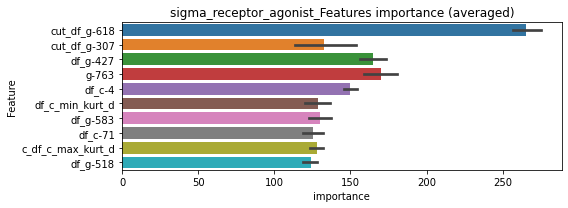

len(train_index) : 2855
len(valid_index) : 952
================================= fold 1/4 sigma_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00041497	valid_1's binary_logloss: 0.000740169
[2000]	training's binary_logloss: 0.000240809	valid_1's binary_logloss: 0.000433306
[3000]	training's binary_logloss: 0.000179831	valid_1's binary_logloss: 0.000324645
[4000]	training's binary_logloss: 0.000150339	valid_1's binary_logloss: 0.000271938
[5000]	training's binary_logloss: 0.000135046	valid_1's binary_logloss: 0.000244474
[6000]	training's binary_logloss: 0.000125166	valid_1's binary_logloss: 0.000226659
[7000]	training's binary_logloss: 0.000118251	valid_1's binary_logloss: 0.000214176
[8000]	training's binary_logloss: 0.00011346	valid_1's binary_logloss: 0.000205549
[9000]	training's binary_logloss: 0.000110044	valid_1's binary_logloss: 0.000199371
[10000]	training's binary_logloss: 0.00010762	valid_1's binary_logloss: 0.000195053
Did not meet early stopping. Best iteration is:
[9999]	training's binary_logloss: 0.00010762	valid_1'

len(train_index) : 2855
len(valid_index) : 952
================================= fold 2/4 sigma_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000514363	valid_1's binary_logloss: 0.00294753
[2000]	training's binary_logloss: 0.000293807	valid_1's binary_logloss: 0.00269388
Early stopping, best iteration is:
[2394]	training's binary_logloss: 0.000261731	valid_1's binary_logloss: 0.00266503


len(train_index) : 2855
len(valid_index) : 952
================================= fold 3/4 sigma_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000515968	valid_1's binary_logloss: 0.000681321
[2000]	training's binary_logloss: 0.000295005	valid_1's binary_logloss: 0.000462432
[3000]	training's binary_logloss: 0.000230077	valid_1's binary_logloss: 0.000390381
[4000]	training's binary_logloss: 0.000201793	valid_1's binary_logloss: 0.000358007
[5000]	training's binary_logloss: 0.000186485	valid_1's binary_logloss: 0.000340884
Early stopping, best iteration is:
[5467]	training's binary_logloss: 0.000181587	valid_1's binary_logloss: 0.000334546


len(train_index) : 2856
len(valid_index) : 951
================================= fold 4/4 sigma_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000483654	valid_1's binary_logloss: 0.00138051
Early stopping, best iteration is:
[1299]	training's binary_logloss: 0.00038835	valid_1's binary_logloss: 0.00124885


sigma_receptor_agonist logloss: 0.001111892178901177


neg labels: 3289 → selected neg labels: 3285


sigma_receptor_antagonist, len(trt): 36, len(othr): 3285
target_rate: 0.0015117 → Adj_target_rate: 0.0017663
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00323646	valid_1's binary_logloss: 0.0169804
[600]	training's binary_logloss: 0.000631419	valid_1's binary_logloss: 0.0106711
Early stopping, best iteration is:
[718]	training's binary_logloss: 0.000520513	valid_1's binary_logloss: 0.0103666
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00319159	valid_1's binary_logloss: 0.0116568
[600]	training's binary_logloss: 0.000618619	valid_1's binary_logloss: 0.00530767
Early stopping, best iteration is:
[712]	training's binary_logloss: 0.000513363	valid_1's binary_logloss: 0.00490205
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00350852	valid_1's binary_logloss: 0.00887027
[600]	training's binary_logloss: 0.000654411	valid_1's binary_logloss: 0.00316462
Early stopping, best iteration is:
[788]	training's binary_logloss: 0.000511371	valid_1's binary_l

1 / 3 AUC score:1.000
y_Threshold: 0.0040840, Threshold: 0.0136460, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, conf_0:0.00955, conf_1:0.01774
Num_p_label: 40.0, Expected: 6.0, Adj_threshold_1: 0.0136460
Num_p_label: 8.0, Expected: 6.0, Adj_threshold_2: 0.0436460
threshold: 0.0436460, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00302522	valid_1's binary_logloss: 0.0165379
[600]	training's binary_logloss: 0.000601795	valid_1's binary_logloss: 0.011259
Early stopping, best iteration is:
[724]	training's binary_logloss: 0.000498815	valid_1's binary_logloss: 0.0107973
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00296392	valid_1's binary_logloss: 0.00943021
[600]	training's binary_logloss: 0.00059888	valid_1's binary_logloss: 0.00412975
Early stopping, best iteration is:
[685]	training's binary_logloss: 0.000515789	valid_1's binary_logloss: 0.00396002
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00302939	valid_1's binary_logloss: 0.00712087
[600]	training's binary_logloss: 0.000611676	valid_1's binary_logloss: 0.00277502
Early stopping, best iteration is:
[805]	training's binary_logloss: 0.000494996	valid_1's binary_lo

2 / 3 AUC score:1.000
y_Threshold: 0.0295226, Threshold: 0.0436460, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0052737 Vs.target_rate: 0.00151
Num_p_label: 21.0, conf_0:0.03492, conf_1:0.05238
Num_p_label: 21.0, Expected: 6.0, Adj_threshold_1: 0.0436460
Num_p_label: 8.0, Expected: 6.0, Adj_threshold_2: 0.0736460
threshold: 0.0736460, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00302522	valid_1's binary_logloss: 0.0165379
[600]	training's binary_logloss: 0.000601795	valid_1's binary_logloss: 0.011259
Early stopping, best iteration is:
[724]	training's binary_logloss: 0.000498815	valid_1's binary_logloss: 0.0107973
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00296392	valid_1's binary_logloss: 0.00943021
[600]	training's binary_logloss: 0.00059888	valid_1's binary_logloss: 0.00412975
Early stopping, best iteration is:
[685]	training's binary_logloss: 0.000515789	valid_1's binary_logloss: 0.00396002
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00302939	valid_1's binary_logloss: 0.00712087
[600]	training's binary_logloss: 0.000611676	valid_1's binary_logloss: 0.00277502
Early stopping, best iteration is:
[807]	training's binary_logloss: 0.000494996	valid_1's binary_lo

3 / 3 AUC score:1.000
y_Threshold: 0.0295226, Threshold: 0.0736460, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0020090 Vs.target_rate: 0.00151
Num_p_label: 8.0, conf_0:0.06628, conf_1:0.08101
threshold: 0.0736460, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


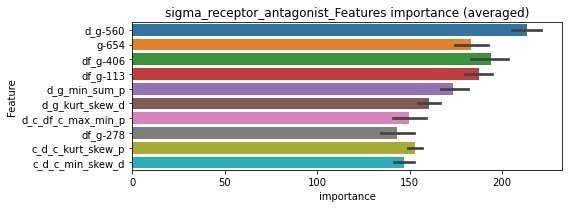

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 sigma_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[897]	training's binary_logloss: 0.000578839	valid_1's binary_logloss: 0.00748764


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 sigma_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000521463	valid_1's binary_logloss: 0.000705335
[2000]	training's binary_logloss: 0.000299548	valid_1's binary_logloss: 0.000435264
[3000]	training's binary_logloss: 0.000235949	valid_1's binary_logloss: 0.000352362
[4000]	training's binary_logloss: 0.000206324	valid_1's binary_logloss: 0.000311792
[5000]	training's binary_logloss: 0.000190386	valid_1's binary_logloss: 0.000290102
[6000]	training's binary_logloss: 0.000180176	valid_1's binary_logloss: 0.000276712
[7000]	training's binary_logloss: 0.000172679	valid_1's binary_logloss: 0.000266991
Early stopping, best iteration is:
[7236]	training's binary_logloss: 0.000171468	valid_1's binary_logloss: 0.000265303


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 sigma_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000423601	valid_1's binary_logloss: 0.000536162
[2000]	training's binary_logloss: 0.000242805	valid_1's binary_logloss: 0.000307775
[3000]	training's binary_logloss: 0.000180608	valid_1's binary_logloss: 0.000229057
[4000]	training's binary_logloss: 0.000150733	valid_1's binary_logloss: 0.000191232
[5000]	training's binary_logloss: 0.00013528	valid_1's binary_logloss: 0.000171653
[6000]	training's binary_logloss: 0.000125242	valid_1's binary_logloss: 0.000158924
[7000]	training's binary_logloss: 0.000118245	valid_1's binary_logloss: 0.000150051
[8000]	training's binary_logloss: 0.000113444	valid_1's binary_logloss: 0.000143963
[9000]	training's binary_logloss: 0.000109986	valid_1's binary_logloss: 0.000139576
[10000]	training's binary_logloss: 0.000107605	valid_1's binary_logloss: 0.000136564
Did not meet early stopping. Best iteration is:
[9999]	training's binary_logloss: 0.000107605	valid

len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 sigma_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00042147	valid_1's binary_logloss: 0.00062801
[2000]	training's binary_logloss: 0.00024231	valid_1's binary_logloss: 0.000363336
[3000]	training's binary_logloss: 0.000180344	valid_1's binary_logloss: 0.000271018
[4000]	training's binary_logloss: 0.00015065	valid_1's binary_logloss: 0.000226733
[5000]	training's binary_logloss: 0.000135264	valid_1's binary_logloss: 0.000203719
[6000]	training's binary_logloss: 0.00012521	valid_1's binary_logloss: 0.000188608
[7000]	training's binary_logloss: 0.00011821	valid_1's binary_logloss: 0.000178088
[8000]	training's binary_logloss: 0.000113372	valid_1's binary_logloss: 0.000170813
[9000]	training's binary_logloss: 0.000109947	valid_1's binary_logloss: 0.000165662
[10000]	training's binary_logloss: 0.000107588	valid_1's binary_logloss: 0.00016216
Did not meet early stopping. Best iteration is:
[9999]	training's binary_logloss: 0.000107588	valid_1's b

sigma_receptor_antagonist logloss: 0.0020138951221446003


neg labels: 3289 → selected neg labels: 3285


smoothened_receptor_antagonist, len(trt): 25, len(othr): 3285
target_rate: 0.0010498 → Adj_target_rate: 0.0012955
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00185112	valid_1's binary_logloss: 0.00436528
[600]	training's binary_logloss: 0.000423946	valid_1's binary_logloss: 0.00161767
Early stopping, best iteration is:
[649]	training's binary_logloss: 0.000404745	valid_1's binary_logloss: 0.00158646
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00176297	valid_1's binary_logloss: 0.010215
[600]	training's binary_logloss: 0.000408051	valid_1's binary_logloss: 0.0062436
Early stopping, best iteration is:
[622]	training's binary_logloss: 0.00039651	valid_1's binary_logloss: 0.00618607
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00185833	valid_1's binary_logloss: 0.00290774
[600]	training's binary_logloss: 0.000420195	valid_1's binary_logloss: 0.000804178
Early stopping, best iteration is:
[658]	training's binary_logloss: 0.000402752	valid_1's binary_

1 / 3 AUC score:1.000
y_Threshold: 0.0025666, Threshold: 0.0073109, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00105
Num_p_label: 40.0, conf_0:0.00512, conf_1:0.00950
Num_p_label: 40.0, Expected: 4.2, Adj_threshold_1: 0.0073109
Num_p_label: 1.0, Expected: 4.2, Adj_threshold_2: 0.0373109
threshold: 0.0373109, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00168964	valid_1's binary_logloss: 0.00365027
[600]	training's binary_logloss: 0.000401175	valid_1's binary_logloss: 0.0012819
Early stopping, best iteration is:
[625]	training's binary_logloss: 0.000392845	valid_1's binary_logloss: 0.00126918
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00165822	valid_1's binary_logloss: 0.00835446
[600]	training's binary_logloss: 0.000395426	valid_1's binary_logloss: 0.00506772
Early stopping, best iteration is:
[580]	training's binary_logloss: 0.000407156	valid_1's binary_logloss: 0.00505472
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00169948	valid_1's binary_logloss: 0.00295868
[600]	training's binary_logloss: 0.000405418	valid_1's binary_logloss: 0.000855005
Early stopping, best iteration is:
[658]	training's binary_logloss: 0.000386443	valid_1's bina

2 / 3 AUC score:1.000
y_Threshold: 0.0375856, Threshold: 0.0373109, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0020090 Vs.target_rate: 0.00105
Num_p_label: 8.0, conf_0:0.02985, conf_1:0.04477
Num_p_label: 8.0, Expected: 4.2, Adj_threshold_1: 0.0373109
threshold: 0.0373109, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00168964	valid_1's binary_logloss: 0.00365027
[600]	training's binary_logloss: 0.000401175	valid_1's binary_logloss: 0.0012819
Early stopping, best iteration is:
[625]	training's binary_logloss: 0.000392845	valid_1's binary_logloss: 0.00126918
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00165822	valid_1's binary_logloss: 0.00835446
[600]	training's binary_logloss: 0.000395426	valid_1's binary_logloss: 0.00506772
Early stopping, best iteration is:
[580]	training's binary_logloss: 0.000407156	valid_1's binary_logloss: 0.00505472
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00169948	valid_1's binary_logloss: 0.00295868
[600]	training's binary_logloss: 0.000405418	valid_1's binary_logloss: 0.000855005
Early stopping, best iteration is:
[658]	training's binary_logloss: 0.000386443	valid_1's bina

3 / 3 AUC score:1.000
y_Threshold: 0.0375856, Threshold: 0.0373109, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0020090 Vs.target_rate: 0.00105
Num_p_label: 8.0, conf_0:0.03358, conf_1:0.04104
Num_p_label: 8.0, Expected: 4.2, Adj_threshold_1: 0.0373109
threshold: 0.0373109, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


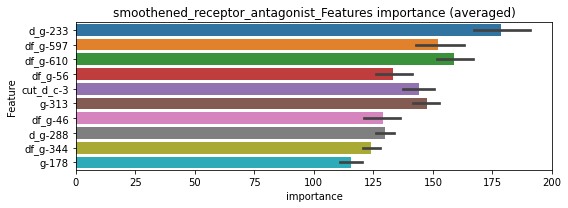

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 smoothened_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000454387	valid_1's binary_logloss: 0.000640387
[2000]	training's binary_logloss: 0.000271845	valid_1's binary_logloss: 0.000421243
[3000]	training's binary_logloss: 0.000213768	valid_1's binary_logloss: 0.00034692
[4000]	training's binary_logloss: 0.000186081	valid_1's binary_logloss: 0.000310546
[5000]	training's binary_logloss: 0.000171574	valid_1's binary_logloss: 0.000288731
[6000]	training's binary_logloss: 0.000161758	valid_1's binary_logloss: 0.000273148
[7000]	training's binary_logloss: 0.000154676	valid_1's binary_logloss: 0.000262645
[8000]	training's binary_logloss: 0.000149758	valid_1's binary_logloss: 0.000256008
Early stopping, best iteration is:
[8484]	training's binary_logloss: 0.00014774	valid_1's binary_logloss: 0.000253156


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 smoothened_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 smoothened_receptor_antagonist=================================


Early stopping, best iteration is:
[335]	training's binary_logloss: 0.00125099	valid_1's binary_logloss: 0.0126097
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000464675	valid_1's binary_logloss: 0.00111472
[2000]	training's binary_logloss: 0.000272959	valid_1's binary_logloss: 0.000866225
Early stopping, best iteration is:
[2734]	training's binary_logloss: 0.000226399	valid_1's binary_logloss: 0.000785862


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 smoothened_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000468944	valid_1's binary_logloss: 0.0013464
Early stopping, best iteration is:
[1641]	training's binary_logloss: 0.000316812	valid_1's binary_logloss: 0.00112453


smoothened_receptor_antagonist logloss: 0.003694923425376179


neg labels: 3289 → selected neg labels: 3261


sodium_channel_inhibitor, len(trt): 267, len(othr): 3261
target_rate: 0.0112119 → Adj_target_rate: 0.0096991
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.039074	valid_1's binary_logloss: 0.242611
Early stopping, best iteration is:
[350]	training's binary_logloss: 0.0281243	valid_1's binary_logloss: 0.24068
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0403348	valid_1's binary_logloss: 0.251473
Early stopping, best iteration is:
[277]	training's binary_logloss: 0.0466888	valid_1's binary_logloss: 0.250972
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0375591	valid_1's binary_logloss: 0.226576
Early stopping, best iteration is:
[325]	training's binary_logloss: 0.0316536	valid_1's binary_logloss: 0.225366
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0368428	valid_1's binary_logloss: 0.211921


1 / 3 AUC score:0.909
y_Threshold: 0.0866409, Threshold: 0.2284706, pos_neg_ratio: 0.8000000
Remove_noisy_data: 401 → Positive_corect_labels: 517/3512
p_label_rate: 0.0100452 Vs.target_rate: 0.01121
Num_p_label: 40.0, conf_0:0.15993, conf_1:0.29701


Early stopping, best iteration is:
[382]	training's binary_logloss: 0.0217058	valid_1's binary_logloss: 0.205921


threshold: 0.2284706, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 517.0/3512, y_label_rate: 0.1472096
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0185203	valid_1's binary_logloss: 0.128525
Early stopping, best iteration is:
[494]	training's binary_logloss: 0.00492766	valid_1's binary_logloss: 0.117149
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0191289	valid_1's binary_logloss: 0.119038
[600]	training's binary_logloss: 0.003144	valid_1's binary_logloss: 0.105106
Early stopping, best iteration is:
[583]	training's binary_logloss: 0.00337546	valid_1's binary_logloss: 0.104775
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0187898	valid_1's binary_logloss: 0.12873
Early stopping, best iteration is:
[546]	training's binary_logloss: 0.00382194	valid_1's binary_logloss: 0.119429
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0194395	valid_1's binary_logloss: 0.131726
[600]	training's binary_lo

2 / 3 AUC score:0.991
y_Threshold: 0.0585772, Threshold: 0.2284706, pos_neg_ratio: 0.8000000
Remove_noisy_data: 80 → Positive_corect_labels: 477.0/3432
p_label_rate: 0.0100452 Vs.target_rate: 0.01121
Num_p_label: 40.0, conf_0:0.18278, conf_1:0.27416
threshold: 0.2284706, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 477.0/3432, y_label_rate: 0.1389860
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0144096	valid_1's binary_logloss: 0.123829
Early stopping, best iteration is:
[476]	training's binary_logloss: 0.00421811	valid_1's binary_logloss: 0.117387
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0159621	valid_1's binary_logloss: 0.0862534
Early stopping, best iteration is:
[518]	training's binary_logloss: 0.00375818	valid_1's binary_logloss: 0.0736606
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0144299	valid_1's binary_logloss: 0.114657
Early stopping, best iteration is:
[428]	training's binary_logloss: 0.00562371	valid_1's binary_logloss: 0.108257
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0148757	valid_1's binary_logloss: 0.105103
[600]	training's binary_logloss: 0.00249042	valid_1's binary_logloss: 0.0895244
Early stopping, best

3 / 3 AUC score:0.996
y_Threshold: 0.0645624, Threshold: 0.2284706, pos_neg_ratio: 0.8000000
Remove_noisy_data: 62 → Positive_corect_labels: 446.0/3370
p_label_rate: 0.0115520 Vs.target_rate: 0.01121
Num_p_label: 46.0, conf_0:0.20562, conf_1:0.25132
threshold: 0.2284706, positive_p_label: 46.0/3982, p_label_rate: 0.0115520
positive_y_label: 446.0/3370, y_label_rate: 0.1323442


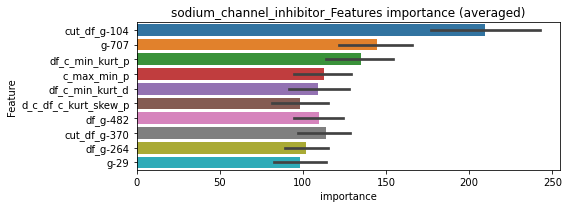

len(train_index) : 2527
len(valid_index) : 843
================================= fold 1/4 sodium_channel_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000644633	valid_1's binary_logloss: 0.00480661
[2000]	training's binary_logloss: 0.000363954	valid_1's binary_logloss: 0.00433687
[3000]	training's binary_logloss: 0.000279936	valid_1's binary_logloss: 0.00416255
Early stopping, best iteration is:
[3578]	training's binary_logloss: 0.000254192	valid_1's binary_logloss: 0.00409478


len(train_index) : 2527
len(valid_index) : 843
================================= fold 2/4 sodium_channel_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000658501	valid_1's binary_logloss: 0.00178477
[2000]	training's binary_logloss: 0.000371631	valid_1's binary_logloss: 0.00137184
Early stopping, best iteration is:
[2279]	training's binary_logloss: 0.000342339	valid_1's binary_logloss: 0.00133027


len(train_index) : 2528
len(valid_index) : 842
================================= fold 3/4 sodium_channel_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000657964	valid_1's binary_logloss: 0.00382144
Early stopping, best iteration is:
[1195]	training's binary_logloss: 0.000562414	valid_1's binary_logloss: 0.00368084


len(train_index) : 2528
len(valid_index) : 842
================================= fold 4/4 sodium_channel_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000644864	valid_1's binary_logloss: 0.0016679
[2000]	training's binary_logloss: 0.000364515	valid_1's binary_logloss: 0.00108793
[3000]	training's binary_logloss: 0.000281224	valid_1's binary_logloss: 0.000880022
[4000]	training's binary_logloss: 0.00024208	valid_1's binary_logloss: 0.000772625
[5000]	training's binary_logloss: 0.00022151	valid_1's binary_logloss: 0.00071647
[6000]	training's binary_logloss: 0.000207865	valid_1's binary_logloss: 0.000678742
[7000]	training's binary_logloss: 0.000197844	valid_1's binary_logloss: 0.000652338
Early stopping, best iteration is:
[7038]	training's binary_logloss: 0.000197692	valid_1's binary_logloss: 0.00065185


sodium_channel_inhibitor logloss: 0.002440097973010265


neg labels: 3289 → selected neg labels: 3282


sphingosine_receptor_agonist, len(trt): 32, len(othr): 3282
target_rate: 0.0013437 → Adj_target_rate: 0.0015980
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00228186	valid_1's binary_logloss: 0.0120504
[600]	training's binary_logloss: 0.000487969	valid_1's binary_logloss: 0.00738957
Early stopping, best iteration is:
[589]	training's binary_logloss: 0.000499324	valid_1's binary_logloss: 0.0073581
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00220366	valid_1's binary_logloss: 0.0103317
Early stopping, best iteration is:
[496]	training's binary_logloss: 0.000658421	valid_1's binary_logloss: 0.00780311
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00241242	valid_1's binary_logloss: 0.00795882
[600]	training's binary_logloss: 0.000510862	valid_1's binary_logloss: 0.004613
Early stopping, best iteration is:
[657]	training's binary_logloss: 0.000470231	valid_1's binary_logloss: 0.00456032
Training until validation scores don't improve for 30 rounds
[30

1 / 3 AUC score:1.000
y_Threshold: 0.0028872, Threshold: 0.0101702, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00134
Num_p_label: 40.0, conf_0:0.00712, conf_1:0.01322
Num_p_label: 40.0, Expected: 5.4, Adj_threshold_1: 0.0101702
Num_p_label: 7.0, Expected: 5.4, Adj_threshold_2: 0.0401702
threshold: 0.0401702, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00215481	valid_1's binary_logloss: 0.0115735
[600]	training's binary_logloss: 0.000476197	valid_1's binary_logloss: 0.00730589
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000462662	valid_1's binary_logloss: 0.00726768
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00211189	valid_1's binary_logloss: 0.010127
[600]	training's binary_logloss: 0.000478982	valid_1's binary_logloss: 0.00764368
Early stopping, best iteration is:
[588]	training's binary_logloss: 0.000489295	valid_1's binary_logloss: 0.00759093
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00226633	valid_1's binary_logloss: 0.00717405
[600]	training's binary_logloss: 0.000490286	valid_1's binary_logloss: 0.00472127
Early stopping, best iteration is:
[593]	training's binary_logloss: 0.000496373	valid_1's binary_

2 / 3 AUC score:1.000
y_Threshold: 0.0187816, Threshold: 0.0401702, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3804
p_label_rate: 0.0032647 Vs.target_rate: 0.00134
Num_p_label: 13.0, conf_0:0.03214, conf_1:0.04820
Num_p_label: 13.0, Expected: 5.4, Adj_threshold_1: 0.0401702
threshold: 0.0401702, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 655.0/3804, y_label_rate: 0.1721872
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00205051	valid_1's binary_logloss: 0.00857984
[600]	training's binary_logloss: 0.000474987	valid_1's binary_logloss: 0.00470414
Early stopping, best iteration is:
[670]	training's binary_logloss: 0.000435468	valid_1's binary_logloss: 0.00459188
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00212283	valid_1's binary_logloss: 0.00719641
[600]	training's binary_logloss: 0.00048077	valid_1's binary_logloss: 0.00349945
Early stopping, best iteration is:
[620]	training's binary_logloss: 0.000465477	valid_1's binary_logloss: 0.00346415
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00215873	valid_1's binary_logloss: 0.007425
[600]	training's binary_logloss: 0.000478042	valid_1's binary_logloss: 0.00358087
Early stopping, best iteration is:
[641]	training's binary_logloss: 0.000455285	valid_1's binary_

3 / 3 AUC score:1.000
y_Threshold: 0.0421330, Threshold: 0.0401702, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3804
p_label_rate: 0.0035158 Vs.target_rate: 0.00134
Num_p_label: 14.0, conf_0:0.03615, conf_1:0.04419
Num_p_label: 14.0, Expected: 5.4, Adj_threshold_1: 0.0401702
Num_p_label: 6.0, Expected: 5.4, Adj_threshold_2: 0.0701702
threshold: 0.0701702, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 655.0/3804, y_label_rate: 0.1721872


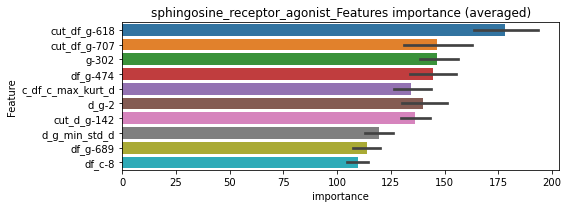

len(train_index) : 2853
len(valid_index) : 951
================================= fold 1/4 sphingosine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000495016	valid_1's binary_logloss: 0.00164291
[2000]	training's binary_logloss: 0.000290976	valid_1's binary_logloss: 0.00134937
[3000]	training's binary_logloss: 0.000234489	valid_1's binary_logloss: 0.00126451
[4000]	training's binary_logloss: 0.000208923	valid_1's binary_logloss: 0.00122727
[5000]	training's binary_logloss: 0.000195318	valid_1's binary_logloss: 0.00120468
Early stopping, best iteration is:
[5485]	training's binary_logloss: 0.000190217	valid_1's binary_logloss: 0.00119524


len(train_index) : 2853
len(valid_index) : 951
================================= fold 2/4 sphingosine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000477271	valid_1's binary_logloss: 0.000815781
[2000]	training's binary_logloss: 0.000281545	valid_1's binary_logloss: 0.000594435
[3000]	training's binary_logloss: 0.000226873	valid_1's binary_logloss: 0.000517394
[4000]	training's binary_logloss: 0.000199623	valid_1's binary_logloss: 0.00047971
Early stopping, best iteration is:
[3982]	training's binary_logloss: 0.000200073	valid_1's binary_logloss: 0.000479443


len(train_index) : 2853
len(valid_index) : 951
================================= fold 3/4 sphingosine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000470018	valid_1's binary_logloss: 0.00357593
Early stopping, best iteration is:
[1568]	training's binary_logloss: 0.000326909	valid_1's binary_logloss: 0.0033755


len(train_index) : 2853
len(valid_index) : 951
================================= fold 4/4 sphingosine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


sphingosine_receptor_agonist logloss: 0.0019431791234083317


Early stopping, best iteration is:
[565]	training's binary_logloss: 0.0008089	valid_1's binary_logloss: 0.00272073
neg labels: 3289 → selected neg labels: 3278


src_inhibitor, len(trt): 71, len(othr): 3278
target_rate: 0.0029814 → Adj_target_rate: 0.0031461
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00597471	valid_1's binary_logloss: 0.0384101
Early stopping, best iteration is:
[559]	training's binary_logloss: 0.00125455	valid_1's binary_logloss: 0.0277801
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00649505	valid_1's binary_logloss: 0.03233
[600]	training's binary_logloss: 0.00115658	valid_1's binary_logloss: 0.0231708
Early stopping, best iteration is:
[617]	training's binary_logloss: 0.00110217	valid_1's binary_logloss: 0.0229828
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0066859	valid_1's binary_logloss: 0.0338461
[600]	training's binary_logloss: 0.00116716	valid_1's binary_logloss: 0.0240479
Early stopping, best iteration is:
[776]	training's binary_logloss: 0.000791607	valid_1's binary_logloss: 0.0232065
Training until validation scores don't improve for 30 rounds
[300]	trainin

1 / 3 AUC score:0.999
y_Threshold: 0.0081796, Threshold: 0.0319917, pos_neg_ratio: 0.8000000
Remove_noisy_data: 138 → Positive_corect_labels: 652/3795
p_label_rate: 0.0100452 Vs.target_rate: 0.00298
Num_p_label: 40.0, conf_0:0.02239, conf_1:0.04159
Num_p_label: 40.0, Expected: 11.9, Adj_threshold_1: 0.0319917
Num_p_label: 14.0, Expected: 11.9, Adj_threshold_2: 0.0619917
threshold: 0.0619917, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 652.0/3795, y_label_rate: 0.1718050
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00561779	valid_1's binary_logloss: 0.0450187
[600]	training's binary_logloss: 0.00104436	valid_1's binary_logloss: 0.0360631
Early stopping, best iteration is:
[582]	training's binary_logloss: 0.00110543	valid_1's binary_logloss: 0.036049
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00590946	valid_1's binary_logloss: 0.0342361
[600]	training's binary_logloss: 0.00107273	valid_1's binary_logloss: 0.0270378
Early stopping, best iteration is:
[577]	training's binary_logloss: 0.00114889	valid_1's binary_logloss: 0.0269501
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00560701	valid_1's binary_logloss: 0.0392585
[600]	training's binary_logloss: 0.00105603	valid_1's binary_logloss: 0.0330106
Early stopping, best iteration is:
[652]	training's binary_logloss: 0.000918252	valid_1's binary_logloss: 0.

2 / 3 AUC score:1.000
y_Threshold: 0.0253147, Threshold: 0.0619917, pos_neg_ratio: 0.8000000
Remove_noisy_data: 12 → Positive_corect_labels: 646.0/3783
p_label_rate: 0.0125565 Vs.target_rate: 0.00298
Num_p_label: 50.0, conf_0:0.04959, conf_1:0.07439
Num_p_label: 50.0, Expected: 11.9, Adj_threshold_1: 0.0619917
Num_p_label: 31.0, Expected: 11.9, Adj_threshold_2: 0.0919917
Num_p_label: 22.0, Expected: 11.9, Adj_threshold_3: 0.1219917
Num_p_label: 17.0, Expected: 11.9, Adj_threshold_4: 0.1519917
threshold: 0.1519917, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 646.0/3783, y_label_rate: 0.1707639
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00515007	valid_1's binary_logloss: 0.0391802
[600]	training's binary_logloss: 0.00100469	valid_1's binary_logloss: 0.0305052
Early stopping, best iteration is:
[632]	training's binary_logloss: 0.000921822	valid_1's binary_logloss: 0.030151
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00531682	valid_1's binary_logloss: 0.0438969
Early stopping, best iteration is:
[489]	training's binary_logloss: 0.00150378	valid_1's binary_logloss: 0.0361474
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00574247	valid_1's binary_logloss: 0.0367939
[600]	training's binary_logloss: 0.00103782	valid_1's binary_logloss: 0.0273588
Early stopping, best iteration is:
[728]	training's binary_logloss: 0.000775275	valid_1's binary_logloss: 0.0263782
Training until validation scores don't improve for 30 rounds
[300]	trai

3 / 3 AUC score:1.000
y_Threshold: 0.0380496, Threshold: 0.1519917, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[527]	training's binary_logloss: 0.00129707	valid_1's binary_logloss: 0.0278109


Remove_noisy_data: 12 → Positive_corect_labels: 640.0/3771
p_label_rate: 0.0047715 Vs.target_rate: 0.00298
Num_p_label: 19.0, conf_0:0.13679, conf_1:0.16719
Num_p_label: 19.0, Expected: 11.9, Adj_threshold_1: 0.1519917
Num_p_label: 13.0, Expected: 11.9, Adj_threshold_2: 0.1819917
threshold: 0.1819917, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 640.0/3771, y_label_rate: 0.1697163


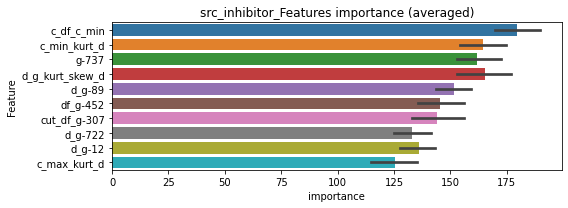

len(train_index) : 2828
len(valid_index) : 943
================================= fold 1/4 src_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000546052	valid_1's binary_logloss: 0.00741697
Early stopping, best iteration is:
[1346]	training's binary_logloss: 0.000419108	valid_1's binary_logloss: 0.0072571


len(train_index) : 2828
len(valid_index) : 943
================================= fold 2/4 src_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000558406	valid_1's binary_logloss: 0.00480879
Early stopping, best iteration is:
[1147]	training's binary_logloss: 0.000496016	valid_1's binary_logloss: 0.004675


len(train_index) : 2828
len(valid_index) : 943
================================= fold 3/4 src_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000557994	valid_1's binary_logloss: 0.00139967
[2000]	training's binary_logloss: 0.000318205	valid_1's binary_logloss: 0.00100396
[3000]	training's binary_logloss: 0.000248007	valid_1's binary_logloss: 0.000859236
Early stopping, best iteration is:
[3827]	training's binary_logloss: 0.000219893	valid_1's binary_logloss: 0.000801236


len(train_index) : 2829
len(valid_index) : 942
================================= fold 4/4 src_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000548595	valid_1's binary_logloss: 0.00163696
Early stopping, best iteration is:
[1175]	training's binary_logloss: 0.000477862	valid_1's binary_logloss: 0.00159254


src_inhibitor logloss: 0.0035822632231243415


neg labels: 3289 → selected neg labels: 3275


steroid, len(trt): 79, len(othr): 3275
target_rate: 0.0033174 → Adj_target_rate: 0.0034449
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0079186	valid_1's binary_logloss: 0.0609218
Early stopping, best iteration is:
[562]	training's binary_logloss: 0.0014973	valid_1's binary_logloss: 0.0506834
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00790531	valid_1's binary_logloss: 0.043079
[600]	training's binary_logloss: 0.0013286	valid_1's binary_logloss: 0.0294128
Early stopping, best iteration is:
[707]	training's binary_logloss: 0.000998596	valid_1's binary_logloss: 0.0283848
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00841354	valid_1's binary_logloss: 0.0442223
[600]	training's binary_logloss: 0.00136255	valid_1's binary_logloss: 0.0288295
Early stopping, best iteration is:
[736]	training's binary_logloss: 0.000954332	valid_1's binary_logloss: 0.0276801
Training until validation scores don't improve for 30 rounds
[300]	trainin

1 / 3 AUC score:0.999
y_Threshold: 0.0107881, Threshold: 0.2493316, pos_neg_ratio: 0.8000000
Remove_noisy_data: 143 → Positive_corect_labels: 649/3787
p_label_rate: 0.0100452 Vs.target_rate: 0.00332
Num_p_label: 40.0, conf_0:0.17453, conf_1:0.32413
Num_p_label: 40.0, Expected: 13.2, Adj_threshold_1: 0.2493316
Num_p_label: 34.0, Expected: 13.2, Adj_threshold_2: 0.2793316
Num_p_label: 32.0, Expected: 13.2, Adj_threshold_3: 0.3093316
Num_p_label: 30.0, Expected: 13.2, Adj_threshold_4: 0.3393316
Num_p_label: 29.0, Expected: 13.2, Adj_threshold_5: 0.3693316
Num_p_label: 25.0, Expected: 13.2, Adj_threshold_6: 0.3993316
Num_p_label: 23.0, Expected: 13.2, Adj_threshold_7: 0.4293316
Num_p_label: 20.0, Expected: 13.2, Adj_threshold_8: 0.4593316
Num_p_label: 15.0, Expected: 13.2, Adj_threshold_9: 0.4893316
threshold: 0.4893316, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 649.0/3787, y_label_rate: 0.1713758
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00690974	valid_1's binary_logloss: 0.0478211
[600]	training's binary_logloss: 0.0012047	valid_1's binary_logloss: 0.0368314
Early stopping, best iteration is:
[641]	training's binary_logloss: 0.00106826	valid_1's binary_logloss: 0.0362398
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0067607	valid_1's binary_logloss: 0.0439614
[600]	training's binary_logloss: 0.00117896	valid_1's binary_logloss: 0.0315116
Early stopping, best iteration is:
[799]	training's binary_logloss: 0.000763969	valid_1's binary_logloss: 0.0305424
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00703418	valid_1's binary_logloss: 0.0324219
[600]	training's binary_logloss: 0.00121013	valid_1's binary_logloss: 0.0192727
Early stopping, best iteration is:
[782]	training's binary_logloss: 0.000802779	valid_1's binary_logloss: 0.

2 / 3 AUC score:1.000
y_Threshold: 0.0463678, Threshold: 0.4893316, pos_neg_ratio: 0.8000000
Remove_noisy_data: 14 → Positive_corect_labels: 642.0/3773
p_label_rate: 0.0123054 Vs.target_rate: 0.00332
Num_p_label: 49.0, conf_0:0.39147, conf_1:0.58720
Num_p_label: 49.0, Expected: 13.2, Adj_threshold_1: 0.4893316
Num_p_label: 45.0, Expected: 13.2, Adj_threshold_2: 0.5193316
Num_p_label: 40.0, Expected: 13.2, Adj_threshold_3: 0.5493316
Num_p_label: 36.0, Expected: 13.2, Adj_threshold_4: 0.5793316
Num_p_label: 33.0, Expected: 13.2, Adj_threshold_5: 0.6093316
Num_p_label: 28.0, Expected: 13.2, Adj_threshold_6: 0.6393316
Num_p_label: 26.0, Expected: 13.2, Adj_threshold_7: 0.6693316
Num_p_label: 22.0, Expected: 13.2, Adj_threshold_8: 0.6993316
Num_p_label: 20.0, Expected: 13.2, Adj_threshold_9: 0.7293316
Num_p_label: 18.0, Expected: 13.2, Adj_threshold_10: 0.7593316
threshold: 0.7593316, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 642.0/3773, y_label_rate: 0.1701564


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00655183	valid_1's binary_logloss: 0.0412717
[600]	training's binary_logloss: 0.00115343	valid_1's binary_logloss: 0.030107
Early stopping, best iteration is:
[655]	training's binary_logloss: 0.000985931	valid_1's binary_logloss: 0.0294902
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00615127	valid_1's binary_logloss: 0.0491554
[600]	training's binary_logloss: 0.0011	valid_1's binary_logloss: 0.0390512
Early stopping, best iteration is:
[597]	training's binary_logloss: 0.00110873	valid_1's binary_logloss: 0.0390248
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0064194	valid_1's binary_logloss: 0.0233683
[600]	training's binary_logloss: 0.00116628	valid_1's binary_logloss: 0.0122972
[900]	training's binary_logloss: 0.00070149	valid_1's binary_logloss: 0.0112335
Early stopping, best iteration i

3 / 3 AUC score:1.000
y_Threshold: 0.0440154, Threshold: 0.7593316, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 637.0/3763
p_label_rate: 0.0055249 Vs.target_rate: 0.00332
Num_p_label: 22.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 22.0, Expected: 13.2, Adj_threshold_1: 0.7593316
Num_p_label: 18.0, Expected: 13.2, Adj_threshold_2: 0.7893316
threshold: 0.7893316, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 637.0/3763, y_label_rate: 0.1692798


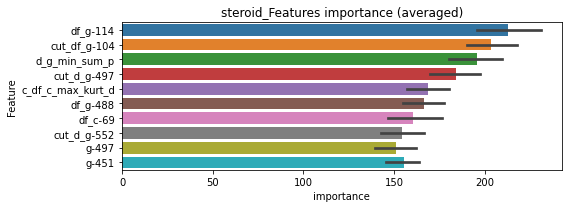

len(train_index) : 2822
len(valid_index) : 941
================================= fold 1/4 steroid=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00055691	valid_1's binary_logloss: 0.00382134
Early stopping, best iteration is:
[1027]	training's binary_logloss: 0.000542054	valid_1's binary_logloss: 0.00379751


len(train_index) : 2822
len(valid_index) : 941
================================= fold 2/4 steroid=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000549447	valid_1's binary_logloss: 0.00128405
[2000]	training's binary_logloss: 0.000321545	valid_1's binary_logloss: 0.000931395
[3000]	training's binary_logloss: 0.000253264	valid_1's binary_logloss: 0.000805272
Early stopping, best iteration is:
[3071]	training's binary_logloss: 0.000249598	valid_1's binary_logloss: 0.000794678


len(train_index) : 2822
len(valid_index) : 941
================================= fold 3/4 steroid=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000534061	valid_1's binary_logloss: 0.000871644
[2000]	training's binary_logloss: 0.000307955	valid_1's binary_logloss: 0.000573538
[3000]	training's binary_logloss: 0.000236509	valid_1's binary_logloss: 0.000469698
[4000]	training's binary_logloss: 0.000202523	valid_1's binary_logloss: 0.000416884
[5000]	training's binary_logloss: 0.000184512	valid_1's binary_logloss: 0.000385441
[6000]	training's binary_logloss: 0.000172631	valid_1's binary_logloss: 0.000365179
[7000]	training's binary_logloss: 0.000163819	valid_1's binary_logloss: 0.000349051
[8000]	training's binary_logloss: 0.000157344	valid_1's binary_logloss: 0.000338622
Early stopping, best iteration is:
[8404]	training's binary_logloss: 0.000155191	valid_1's binary_logloss: 0.000334365


len(train_index) : 2823
len(valid_index) : 940
================================= fold 4/4 steroid=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00054543	valid_1's binary_logloss: 0.0036061
[2000]	training's binary_logloss: 0.000317891	valid_1's binary_logloss: 0.00326297
Early stopping, best iteration is:
[2077]	training's binary_logloss: 0.000311018	valid_1's binary_logloss: 0.0032532


steroid logloss: 0.0020450007757130085


neg labels: 3289 → selected neg labels: 3287


syk_inhibitor, len(trt): 19, len(othr): 3287
target_rate: 0.0007979 → Adj_target_rate: 0.0010260
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00147522	valid_1's binary_logloss: 0.00251261
[600]	training's binary_logloss: 0.000393138	valid_1's binary_logloss: 0.000944628
Early stopping, best iteration is:
[599]	training's binary_logloss: 0.000393138	valid_1's binary_logloss: 0.000944628
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00138084	valid_1's binary_logloss: 0.00453641
[600]	training's binary_logloss: 0.000386749	valid_1's binary_logloss: 0.00217758
Early stopping, best iteration is:
[609]	training's binary_logloss: 0.000386749	valid_1's binary_logloss: 0.00217758
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00143559	valid_1's binary_logloss: 0.00266511
[600]	training's binary_logloss: 0.000392951	valid_1's binary_logloss: 0.000915574
Early stopping, best iteration is:
[589]	training's binary_logloss: 0.000392951	valid_1's b

1 / 3 AUC score:1.000
y_Threshold: 0.0020350, Threshold: 0.0062056, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00080
Num_p_label: 40.0, conf_0:0.00434, conf_1:0.00807
Num_p_label: 40.0, Expected: 3.2, Adj_threshold_1: 0.0062056
Num_p_label: 2.0, Expected: 3.2, Adj_threshold_2: 0.0362056
threshold: 0.0362056, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00135589	valid_1's binary_logloss: 0.00197597
[600]	training's binary_logloss: 0.000381065	valid_1's binary_logloss: 0.000597577
Early stopping, best iteration is:
[613]	training's binary_logloss: 0.000379561	valid_1's binary_logloss: 0.000595284
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00133329	valid_1's binary_logloss: 0.0042635
[600]	training's binary_logloss: 0.000376032	valid_1's binary_logloss: 0.0019115
Early stopping, best iteration is:
[611]	training's binary_logloss: 0.000374012	valid_1's binary_logloss: 0.00190915
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0013451	valid_1's binary_logloss: 0.0028035
[600]	training's binary_logloss: 0.000379455	valid_1's binary_logloss: 0.00107611
Early stopping, best iteration is:
[661]	training's binary_logloss: 0.00036906	valid_1's binary_

2 / 3 AUC score:1.000
y_Threshold: 0.1325221, Threshold: 0.0362056, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0025113 Vs.target_rate: 0.00080
Num_p_label: 10.0, conf_0:0.02896, conf_1:0.04345
Num_p_label: 10.0, Expected: 3.2, Adj_threshold_1: 0.0362056


[600]	training's binary_logloss: 0.000378598	valid_1's binary_logloss: 0.00100802
Early stopping, best iteration is:
[599]	training's binary_logloss: 0.000378598	valid_1's binary_logloss: 0.00100802


Num_p_label: 5.0, Expected: 3.2, Adj_threshold_2: 0.0662056
threshold: 0.0662056, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00135589	valid_1's binary_logloss: 0.00197597
[600]	training's binary_logloss: 0.000381065	valid_1's binary_logloss: 0.000597577
Early stopping, best iteration is:
[613]	training's binary_logloss: 0.000379561	valid_1's binary_logloss: 0.000595284
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00133329	valid_1's binary_logloss: 0.0042635
[600]	training's binary_logloss: 0.000376032	valid_1's binary_logloss: 0.0019115
Early stopping, best iteration is:
[611]	training's binary_logloss: 0.000374012	valid_1's binary_logloss: 0.00190915
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0013451	valid_1's binary_logloss: 0.0028035
[600]	training's binary_logloss: 0.000379455	valid_1's binary_logloss: 0.00107611
Early stopping, best iteration is:
[661]	training's binary_logloss: 0.00036906	valid_1's binary_

3 / 3 AUC score:1.000
y_Threshold: 0.1325221, Threshold: 0.0662056, pos_neg_ratio: 0.8000000


[600]	training's binary_logloss: 0.000378598	valid_1's binary_logloss: 0.00100802
Early stopping, best iteration is:
[601]	training's binary_logloss: 0.000378598	valid_1's binary_logloss: 0.00100802


Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0012557 Vs.target_rate: 0.00080
Num_p_label: 5.0, conf_0:0.05959, conf_1:0.07283
Num_p_label: 5.0, Expected: 3.2, Adj_threshold_1: 0.0662056
threshold: 0.0662056, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


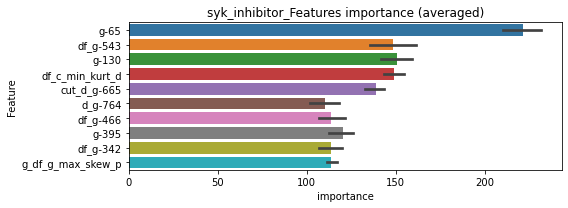

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 syk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000431258	valid_1's binary_logloss: 0.000388098
[2000]	training's binary_logloss: 0.000263312	valid_1's binary_logloss: 0.000225606
[3000]	training's binary_logloss: 0.000213655	valid_1's binary_logloss: 0.000174678
[4000]	training's binary_logloss: 0.000188528	valid_1's binary_logloss: 0.000148639
[5000]	training's binary_logloss: 0.00017483	valid_1's binary_logloss: 0.000134603
[6000]	training's binary_logloss: 0.000165842	valid_1's binary_logloss: 0.000125304
[7000]	training's binary_logloss: 0.000159661	valid_1's binary_logloss: 0.000118864
[8000]	training's binary_logloss: 0.000155145	valid_1's binary_logloss: 0.000114029
Early stopping, best iteration is:
[8326]	training's binary_logloss: 0.000153925	valid_1's binary_logloss: 0.000112711


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 syk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000439076	valid_1's binary_logloss: 0.00251154
Early stopping, best iteration is:
[1276]	training's binary_logloss: 0.000363379	valid_1's binary_logloss: 0.00240744


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 syk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000441442	valid_1's binary_logloss: 0.00132012
[2000]	training's binary_logloss: 0.000273092	valid_1's binary_logloss: 0.0010947
[3000]	training's binary_logloss: 0.000223456	valid_1's binary_logloss: 0.00102423
[4000]	training's binary_logloss: 0.000197648	valid_1's binary_logloss: 0.00098873
[5000]	training's binary_logloss: 0.000182867	valid_1's binary_logloss: 0.000966801
[6000]	training's binary_logloss: 0.000174161	valid_1's binary_logloss: 0.000954772
Early stopping, best iteration is:
[6134]	training's binary_logloss: 0.000173187	valid_1's binary_logloss: 0.00095262


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 syk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000384612	valid_1's binary_logloss: 0.000473573
[2000]	training's binary_logloss: 0.000231666	valid_1's binary_logloss: 0.000285864
[3000]	training's binary_logloss: 0.000175829	valid_1's binary_logloss: 0.000217125
[4000]	training's binary_logloss: 0.000148078	valid_1's binary_logloss: 0.000182924
[5000]	training's binary_logloss: 0.00013352	valid_1's binary_logloss: 0.000164969
[6000]	training's binary_logloss: 0.000124088	valid_1's binary_logloss: 0.000153333
[7000]	training's binary_logloss: 0.000117453	valid_1's binary_logloss: 0.000145147
[8000]	training's binary_logloss: 0.000112862	valid_1's binary_logloss: 0.000139482
[9000]	training's binary_logloss: 0.000109615	valid_1's binary_logloss: 0.000135476
[10000]	training's binary_logloss: 0.000107258	valid_1's binary_logloss: 0.000132567
Did not meet early stopping. Best iteration is:
[9999]	training's binary_logloss: 0.000107258	valid

syk_inhibitor logloss: 0.0009013484664640283


neg labels: 3289 → selected neg labels: 3278


tachykinin_antagonist, len(trt): 60, len(othr): 3278
target_rate: 0.0025195 → Adj_target_rate: 0.0027266
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00619655	valid_1's binary_logloss: 0.0291327
[600]	training's binary_logloss: 0.00101956	valid_1's binary_logloss: 0.0158407
Early stopping, best iteration is:
[791]	training's binary_logloss: 0.00069466	valid_1's binary_logloss: 0.0147538
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00647553	valid_1's binary_logloss: 0.0228894
[600]	training's binary_logloss: 0.00104025	valid_1's binary_logloss: 0.010391
Early stopping, best iteration is:
[846]	training's binary_logloss: 0.000670514	valid_1's binary_logloss: 0.00925184
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00652434	valid_1's binary_logloss: 0.0258547
[600]	training's binary_logloss: 0.00104811	valid_1's binary_logloss: 0.0143341
Early stopping, best iteration is:
[820]	training's binary_logloss: 0.000679442	valid_1's binary_logloss: 

1 / 3 AUC score:1.000
y_Threshold: 0.0066003, Threshold: 0.0175707, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 655/3801
p_label_rate: 0.0100452 Vs.target_rate: 0.00252
Num_p_label: 40.0, conf_0:0.01230, conf_1:0.02284
Num_p_label: 40.0, Expected: 10.0, Adj_threshold_1: 0.0175707
Num_p_label: 7.0, Expected: 10.0, Adj_threshold_2: 0.0475707
threshold: 0.0475707, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 655.0/3801, y_label_rate: 0.1723231
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00592101	valid_1's binary_logloss: 0.0270406
[600]	training's binary_logloss: 0.000989297	valid_1's binary_logloss: 0.014284
Early stopping, best iteration is:
[790]	training's binary_logloss: 0.000677329	valid_1's binary_logloss: 0.013053
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00589117	valid_1's binary_logloss: 0.0196533
[600]	training's binary_logloss: 0.00100934	valid_1's binary_logloss: 0.00826105
Early stopping, best iteration is:
[851]	training's binary_logloss: 0.000648885	valid_1's binary_logloss: 0.00710291
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00585257	valid_1's binary_logloss: 0.022537
[600]	training's binary_logloss: 0.000997183	valid_1's binary_logloss: 0.0123574
Early stopping, best iteration is:
[788]	training's binary_logloss: 0.000683341	valid_1's binary_logloss

2 / 3 AUC score:1.000
y_Threshold: 0.0353726, Threshold: 0.0475707, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 653.0/3797
p_label_rate: 0.0037670 Vs.target_rate: 0.00252
Num_p_label: 15.0, conf_0:0.03806, conf_1:0.05708
threshold: 0.0475707, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 653.0/3797, y_label_rate: 0.1719779
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00565059	valid_1's binary_logloss: 0.0258262
[600]	training's binary_logloss: 0.000979439	valid_1's binary_logloss: 0.01352
Early stopping, best iteration is:
[825]	training's binary_logloss: 0.000649893	valid_1's binary_logloss: 0.0124586
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00553559	valid_1's binary_logloss: 0.0242286
[600]	training's binary_logloss: 0.000963235	valid_1's binary_logloss: 0.013866
Early stopping, best iteration is:
[832]	training's binary_logloss: 0.000638007	valid_1's binary_logloss: 0.0128059
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0055055	valid_1's binary_logloss: 0.0257452
[600]	training's binary_logloss: 0.000966873	valid_1's binary_logloss: 0.0133422
Early stopping, best iteration is:
[720]	training's binary_logloss: 0.000730383	valid_1's binary_logloss: 

3 / 3 AUC score:1.000
y_Threshold: 0.0442045, Threshold: 0.0475707, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 653.0/3797
p_label_rate: 0.0045203 Vs.target_rate: 0.00252
Num_p_label: 18.0, conf_0:0.04281, conf_1:0.05233
Num_p_label: 18.0, Expected: 10.0, Adj_threshold_1: 0.0475707
Num_p_label: 9.0, Expected: 10.0, Adj_threshold_2: 0.0775707
threshold: 0.0775707, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 653.0/3797, y_label_rate: 0.1719779


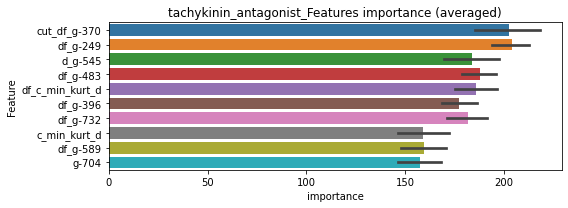

len(train_index) : 2847
len(valid_index) : 950
================================= fold 1/4 tachykinin_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2848
len(valid_index) : 949
================================= fold 2/4 tachykinin_antagonist=================================


Early stopping, best iteration is:
[682]	training's binary_logloss: 0.000640244	valid_1's binary_logloss: 0.00522936
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[906]	training's binary_logloss: 0.000595976	valid_1's binary_logloss: 0.00246934


len(train_index) : 2848
len(valid_index) : 949
================================= fold 3/4 tachykinin_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2848
len(valid_index) : 949
================================= fold 4/4 tachykinin_antagonist=================================


Early stopping, best iteration is:
[772]	training's binary_logloss: 0.000701401	valid_1's binary_logloss: 0.00582044
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000550034	valid_1's binary_logloss: 0.00447656
Early stopping, best iteration is:
[1213]	training's binary_logloss: 0.000467353	valid_1's binary_logloss: 0.00437329


tachykinin_antagonist logloss: 0.004473306963751772


neg labels: 3289 → selected neg labels: 3285


tgf-beta_receptor_inhibitor, len(trt): 30, len(othr): 3285
target_rate: 0.0012598 → Adj_target_rate: 0.0015127
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00249519	valid_1's binary_logloss: 0.00812803
[600]	training's binary_logloss: 0.000546117	valid_1's binary_logloss: 0.00362602
Early stopping, best iteration is:
[689]	training's binary_logloss: 0.000487197	valid_1's binary_logloss: 0.00345681
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0023165	valid_1's binary_logloss: 0.00778709
[600]	training's binary_logloss: 0.000534761	valid_1's binary_logloss: 0.00366452
Early stopping, best iteration is:
[660]	training's binary_logloss: 0.000489429	valid_1's binary_logloss: 0.00355432
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00248108	valid_1's binary_logloss: 0.0052463
[600]	training's binary_logloss: 0.000551523	valid_1's binary_logloss: 0.0015765
Early stopping, best iteration is:
[676]	training's binary_logloss: 0.00050211	valid_1's binary_l

1 / 3 AUC score:1.000
y_Threshold: 0.0039342, Threshold: 0.0145199, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00126
Num_p_label: 40.0, conf_0:0.01016, conf_1:0.01888
Num_p_label: 40.0, Expected: 5.0, Adj_threshold_1: 0.0145199
Num_p_label: 5.0, Expected: 5.0, Adj_threshold_2: 0.0445199


Early stopping, best iteration is:
[517]	training's binary_logloss: 0.000656585	valid_1's binary_logloss: 0.00711579


threshold: 0.0445199, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00222852	valid_1's binary_logloss: 0.00778686
[600]	training's binary_logloss: 0.000512429	valid_1's binary_logloss: 0.00361171
Early stopping, best iteration is:
[654]	training's binary_logloss: 0.000478511	valid_1's binary_logloss: 0.0035523
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00216642	valid_1's binary_logloss: 0.00794241
[600]	training's binary_logloss: 0.000507259	valid_1's binary_logloss: 0.00374636
Early stopping, best iteration is:
[736]	training's binary_logloss: 0.000465346	valid_1's binary_logloss: 0.00361786
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00224241	valid_1's binary_logloss: 0.00424901
[600]	training's binary_logloss: 0.000521157	valid_1's binary_logloss: 0.0012884
Early stopping, best iteration is:
[656]	training's binary_logloss: 0.000484186	valid_1's binary

2 / 3 AUC score:1.000
y_Threshold: 0.0588758, Threshold: 0.0445199, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0050226 Vs.target_rate: 0.00126
Num_p_label: 20.0, conf_0:0.03562, conf_1:0.05342
Num_p_label: 20.0, Expected: 5.0, Adj_threshold_1: 0.0445199
Num_p_label: 9.0, Expected: 5.0, Adj_threshold_2: 0.0745199
threshold: 0.0745199, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00222852	valid_1's binary_logloss: 0.00778686
[600]	training's binary_logloss: 0.000512429	valid_1's binary_logloss: 0.00361171
Early stopping, best iteration is:
[654]	training's binary_logloss: 0.000478511	valid_1's binary_logloss: 0.0035523
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00216642	valid_1's binary_logloss: 0.00794241
[600]	training's binary_logloss: 0.000507259	valid_1's binary_logloss: 0.00374636
Early stopping, best iteration is:
[708]	training's binary_logloss: 0.000465346	valid_1's binary_logloss: 0.00361786
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00224241	valid_1's binary_logloss: 0.00424901
[600]	training's binary_logloss: 0.000521157	valid_1's binary_logloss: 0.0012884
Early stopping, best iteration is:
[656]	training's binary_logloss: 0.000484186	valid_1's binary

3 / 3 AUC score:1.000
y_Threshold: 0.0588758, Threshold: 0.0745199, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0022602 Vs.target_rate: 0.00126
Num_p_label: 9.0, conf_0:0.06707, conf_1:0.08197
Num_p_label: 9.0, Expected: 5.0, Adj_threshold_1: 0.0745199
threshold: 0.0745199, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


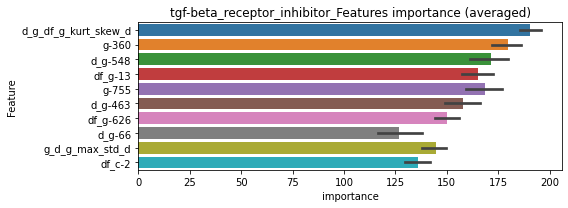

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 tgf-beta_receptor_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000490463	valid_1's binary_logloss: 0.000903983
[2000]	training's binary_logloss: 0.000284654	valid_1's binary_logloss: 0.00064005
[3000]	training's binary_logloss: 0.000222891	valid_1's binary_logloss: 0.000546257
[4000]	training's binary_logloss: 0.000194774	valid_1's binary_logloss: 0.000495027
[5000]	training's binary_logloss: 0.000179507	valid_1's binary_logloss: 0.000467484
[6000]	training's binary_logloss: 0.000169893	valid_1's binary_logloss: 0.000450694
[7000]	training's binary_logloss: 0.000163145	valid_1's binary_logloss: 0.000438741
Early stopping, best iteration is:
[7037]	training's binary_logloss: 0.000163039	valid_1's binary_logloss: 0.000438431


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 tgf-beta_receptor_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 952


Early stopping, best iteration is:
[891]	training's binary_logloss: 0.000549261	valid_1's binary_logloss: 0.00291639


================================= fold 3/4 tgf-beta_receptor_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000489523	valid_1's binary_logloss: 0.00211544
Early stopping, best iteration is:
[1511]	training's binary_logloss: 0.000345639	valid_1's binary_logloss: 0.00182206


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 tgf-beta_receptor_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000493397	valid_1's binary_logloss: 0.00381408
Early stopping, best iteration is:
[1635]	training's binary_logloss: 0.000331284	valid_1's binary_logloss: 0.00366121


tgf-beta_receptor_inhibitor logloss: 0.002209761047231948


neg labels: 3289 → selected neg labels: 3286


thrombin_inhibitor, len(trt): 19, len(othr): 3286
target_rate: 0.0007979 → Adj_target_rate: 0.0010260
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00134273	valid_1's binary_logloss: 0.00408703
[600]	training's binary_logloss: 0.000370033	valid_1's binary_logloss: 0.00209436
Early stopping, best iteration is:
[591]	training's binary_logloss: 0.000370033	valid_1's binary_logloss: 0.00209436
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00131321	valid_1's binary_logloss: 0.0064816
[600]	training's binary_logloss: 0.000371134	valid_1's binary_logloss: 0.00412343
Early stopping, best iteration is:
[625]	training's binary_logloss: 0.000366916	valid_1's binary_logloss: 0.00409398
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00132866	valid_1's binary_logloss: 0.00265379
[600]	training's binary_logloss: 0.000373669	valid_1's binary_logloss: 0.000952079
Early stopping, best iteration is:
[604]	training's binary_logloss: 0.000373057	valid_1's bina

1 / 3 AUC score:1.000
y_Threshold: 0.0023077, Threshold: 0.0084515, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00080
Num_p_label: 40.0, conf_0:0.00592, conf_1:0.01099


[600]	training's binary_logloss: 0.000367548	valid_1's binary_logloss: 0.00128154
Early stopping, best iteration is:
[611]	training's binary_logloss: 0.000366435	valid_1's binary_logloss: 0.00128001


Num_p_label: 40.0, Expected: 3.2, Adj_threshold_1: 0.0084515
Num_p_label: 0.0, Expected: 3.2, Adj_threshold_2: 0.0384515
threshold: 0.0384515, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00123858	valid_1's binary_logloss: 0.00417329
Early stopping, best iteration is:
[554]	training's binary_logloss: 0.000370994	valid_1's binary_logloss: 0.00224497
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00120015	valid_1's binary_logloss: 0.00830218
Early stopping, best iteration is:
[557]	training's binary_logloss: 0.000362584	valid_1's binary_logloss: 0.00620491
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00123438	valid_1's binary_logloss: 0.0020311
Early stopping, best iteration is:
[568]	training's binary_logloss: 0.000364602	valid_1's binary_logloss: 0.000732338
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00125804	valid_1's binary_logloss: 0.00283646


2 / 3 AUC score:1.000
y_Threshold: 0.0218690, Threshold: 0.0384515, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0042692 Vs.target_rate: 0.00080
Num_p_label: 17.0, conf_0:0.03076, conf_1:0.04614
Num_p_label: 17.0, Expected: 3.2, Adj_threshold_1: 0.0384515
Num_p_label: 6.0, Expected: 3.2, Adj_threshold_2: 0.0684515


[600]	training's binary_logloss: 0.000356005	valid_1's binary_logloss: 0.00124285
Early stopping, best iteration is:
[599]	training's binary_logloss: 0.000356005	valid_1's binary_logloss: 0.00124285


threshold: 0.0684515, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00123858	valid_1's binary_logloss: 0.00417329
Early stopping, best iteration is:
[554]	training's binary_logloss: 0.000370994	valid_1's binary_logloss: 0.00224497
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00120015	valid_1's binary_logloss: 0.00830218
Early stopping, best iteration is:
[557]	training's binary_logloss: 0.000362584	valid_1's binary_logloss: 0.00620491
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00123438	valid_1's binary_logloss: 0.0020311
Early stopping, best iteration is:
[568]	training's binary_logloss: 0.000364602	valid_1's binary_logloss: 0.000732338
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00125804	valid_1's binary_logloss: 0.00283646


3 / 3 AUC score:1.000
y_Threshold: 0.0218690, Threshold: 0.0684515, pos_neg_ratio: 0.8000000


[600]	training's binary_logloss: 0.000356005	valid_1's binary_logloss: 0.00124285
Early stopping, best iteration is:
[612]	training's binary_logloss: 0.000356005	valid_1's binary_logloss: 0.00124285


Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0015068 Vs.target_rate: 0.00080
Num_p_label: 6.0, conf_0:0.06161, conf_1:0.07530
Num_p_label: 6.0, Expected: 3.2, Adj_threshold_1: 0.0684515
threshold: 0.0684515, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


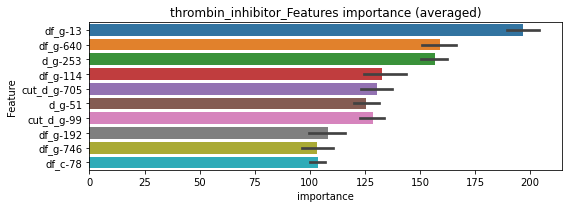

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 thrombin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000445043	valid_1's binary_logloss: 0.00152503
[2000]	training's binary_logloss: 0.000267812	valid_1's binary_logloss: 0.00124224
[3000]	training's binary_logloss: 0.000216433	valid_1's binary_logloss: 0.00116054
[4000]	training's binary_logloss: 0.000192636	valid_1's binary_logloss: 0.0011272
Early stopping, best iteration is:
[4895]	training's binary_logloss: 0.000180751	valid_1's binary_logloss: 0.00111088


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 thrombin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000433252	valid_1's binary_logloss: 0.00296344
[2000]	training's binary_logloss: 0.000261628	valid_1's binary_logloss: 0.0027124
[3000]	training's binary_logloss: 0.000208054	valid_1's binary_logloss: 0.00260897
[4000]	training's binary_logloss: 0.000182158	valid_1's binary_logloss: 0.00254785
Early stopping, best iteration is:
[4593]	training's binary_logloss: 0.000173358	valid_1's binary_logloss: 0.00252654


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 thrombin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000439781	valid_1's binary_logloss: 0.00169252
Early stopping, best iteration is:
[1613]	training's binary_logloss: 0.00030075	valid_1's binary_logloss: 0.00152639


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 thrombin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000378962	valid_1's binary_logloss: 0.000453111
[2000]	training's binary_logloss: 0.000229255	valid_1's binary_logloss: 0.00027495
[3000]	training's binary_logloss: 0.000174781	valid_1's binary_logloss: 0.000209782
[4000]	training's binary_logloss: 0.000147536	valid_1's binary_logloss: 0.000177157
[5000]	training's binary_logloss: 0.000133222	valid_1's binary_logloss: 0.000159998
[6000]	training's binary_logloss: 0.000123896	valid_1's binary_logloss: 0.000148813
[7000]	training's binary_logloss: 0.000117323	valid_1's binary_logloss: 0.000140931
[8000]	training's binary_logloss: 0.000112754	valid_1's binary_logloss: 0.00013545
[9000]	training's binary_logloss: 0.000109508	valid_1's binary_logloss: 0.000131555
[10000]	training's binary_logloss: 0.000107207	valid_1's binary_logloss: 0.000128798
Did not meet early stopping. Best iteration is:
[9999]	training's binary_logloss: 0.000107207	valid_

thrombin_inhibitor logloss: 0.0013239108167322718


neg labels: 3289 → selected neg labels: 3282


thymidylate_synthase_inhibitor, len(trt): 37, len(othr): 3282
target_rate: 0.0015537 → Adj_target_rate: 0.0018079
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00318104	valid_1's binary_logloss: 0.0151049
[600]	training's binary_logloss: 0.000623013	valid_1's binary_logloss: 0.00931774
Early stopping, best iteration is:
[634]	training's binary_logloss: 0.00058398	valid_1's binary_logloss: 0.00919138
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00322276	valid_1's binary_logloss: 0.0103585
[600]	training's binary_logloss: 0.000630154	valid_1's binary_logloss: 0.0042631
Early stopping, best iteration is:
[671]	training's binary_logloss: 0.000557174	valid_1's binary_logloss: 0.0040421
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00328535	valid_1's binary_logloss: 0.00689075
[600]	training's binary_logloss: 0.000641556	valid_1's binary_logloss: 0.00204311
Early stopping, best iteration is:
[656]	training's binary_logloss: 0.000580546	valid_1's binary_lo

1 / 3 AUC score:1.000
y_Threshold: 0.0041689, Threshold: 0.0173842, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00155
Num_p_label: 40.0, conf_0:0.01217, conf_1:0.02260
Num_p_label: 40.0, Expected: 6.2, Adj_threshold_1: 0.0173842
Num_p_label: 8.0, Expected: 6.2, Adj_threshold_2: 0.0473842
threshold: 0.0473842, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00297673	valid_1's binary_logloss: 0.0142297
[600]	training's binary_logloss: 0.000612588	valid_1's binary_logloss: 0.00926233
Early stopping, best iteration is:
[657]	training's binary_logloss: 0.000553635	valid_1's binary_logloss: 0.00912807
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00296227	valid_1's binary_logloss: 0.00967981
[600]	training's binary_logloss: 0.000615747	valid_1's binary_logloss: 0.00433488
Early stopping, best iteration is:
[709]	training's binary_logloss: 0.000531969	valid_1's binary_logloss: 0.00414601
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00312552	valid_1's binary_logloss: 0.00596051
[600]	training's binary_logloss: 0.00063368	valid_1's binary_logloss: 0.00184417
Early stopping, best iteration is:
[704]	training's binary_logloss: 0.000550409	valid_1's binary

2 / 3 AUC score:1.000
y_Threshold: 0.0425205, Threshold: 0.0473842, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3804
p_label_rate: 0.0050226 Vs.target_rate: 0.00155
Num_p_label: 20.0, conf_0:0.03791, conf_1:0.05686
Num_p_label: 20.0, Expected: 6.2, Adj_threshold_1: 0.0473842
Num_p_label: 10.0, Expected: 6.2, Adj_threshold_2: 0.0773842
threshold: 0.0773842, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 655.0/3804, y_label_rate: 0.1721872
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00286297	valid_1's binary_logloss: 0.0121202
[600]	training's binary_logloss: 0.000608714	valid_1's binary_logloss: 0.00603502
Early stopping, best iteration is:
[652]	training's binary_logloss: 0.00055242	valid_1's binary_logloss: 0.00583
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00293495	valid_1's binary_logloss: 0.0107197
[600]	training's binary_logloss: 0.000603128	valid_1's binary_logloss: 0.00566346
Early stopping, best iteration is:
[655]	training's binary_logloss: 0.000550205	valid_1's binary_logloss: 0.0055489
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00286403	valid_1's binary_logloss: 0.0111073
[600]	training's binary_logloss: 0.00059737	valid_1's binary_logloss: 0.0062149
Early stopping, best iteration is:
[696]	training's binary_logloss: 0.000536773	valid_1's binary_logloss

3 / 3 AUC score:1.000
y_Threshold: 0.0319526, Threshold: 0.0773842, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3804
p_label_rate: 0.0037670 Vs.target_rate: 0.00155
Num_p_label: 15.0, conf_0:0.06965, conf_1:0.08512
Num_p_label: 15.0, Expected: 6.2, Adj_threshold_1: 0.0773842
threshold: 0.0773842, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 655.0/3804, y_label_rate: 0.1721872


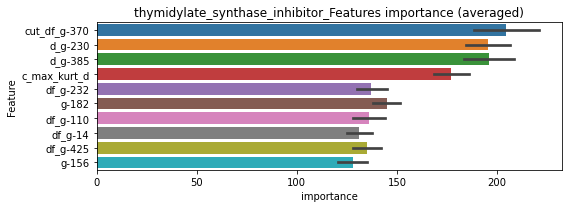

len(train_index) : 2853
len(valid_index) : 951
================================= fold 1/4 thymidylate_synthase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000488144	valid_1's binary_logloss: 0.0025818
Early stopping, best iteration is:
[1525]	training's binary_logloss: 0.000343139	valid_1's binary_logloss: 0.00244412


len(train_index) : 2853
len(valid_index) : 951
================================= fold 2/4 thymidylate_synthase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000517422	valid_1's binary_logloss: 0.00277708
Early stopping, best iteration is:
[1621]	training's binary_logloss: 0.000344201	valid_1's binary_logloss: 0.00259762


len(train_index) : 2853
len(valid_index) : 951
================================= fold 3/4 thymidylate_synthase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000504529	valid_1's binary_logloss: 0.000846378
[2000]	training's binary_logloss: 0.000291701	valid_1's binary_logloss: 0.000589982
[3000]	training's binary_logloss: 0.000226687	valid_1's binary_logloss: 0.000494898
[4000]	training's binary_logloss: 0.000196412	valid_1's binary_logloss: 0.000445285
[5000]	training's binary_logloss: 0.000180139	valid_1's binary_logloss: 0.000415817
[6000]	training's binary_logloss: 0.000169523	valid_1's binary_logloss: 0.000395333
Early stopping, best iteration is:
[6892]	training's binary_logloss: 0.00016232	valid_1's binary_logloss: 0.000382719


len(train_index) : 2853
len(valid_index) : 951
================================= fold 4/4 thymidylate_synthase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[953]	training's binary_logloss: 0.000536192	valid_1's binary_logloss: 0.00327532


thymidylate_synthase_inhibitor logloss: 0.002175147216752035


neg labels: 3289 → selected neg labels: 3282


tlr_agonist, len(trt): 30, len(othr): 3282
target_rate: 0.0012598 → Adj_target_rate: 0.0015127
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00234528	valid_1's binary_logloss: 0.00788875
[600]	training's binary_logloss: 0.000497932	valid_1's binary_logloss: 0.00372317
Early stopping, best iteration is:
[667]	training's binary_logloss: 0.000457767	valid_1's binary_logloss: 0.00361549
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00234701	valid_1's binary_logloss: 0.00624101
[600]	training's binary_logloss: 0.000494241	valid_1's binary_logloss: 0.00216483
Early stopping, best iteration is:
[651]	training's binary_logloss: 0.000459307	valid_1's binary_logloss: 0.00208846
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00241952	valid_1's binary_logloss: 0.00523898
[600]	training's binary_logloss: 0.000500933	valid_1's binary_logloss: 0.00172838
Early stopping, best iteration is:
[663]	training's binary_logloss: 0.000459899	valid_1's bina

1 / 3 AUC score:1.000
y_Threshold: 0.0031355, Threshold: 0.0185611, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00126
Num_p_label: 40.0, conf_0:0.01299, conf_1:0.02413
Num_p_label: 40.0, Expected: 5.0, Adj_threshold_1: 0.0185611
Num_p_label: 23.0, Expected: 5.0, Adj_threshold_2: 0.0485611
Num_p_label: 18.0, Expected: 5.0, Adj_threshold_3: 0.0785611
Num_p_label: 13.0, Expected: 5.0, Adj_threshold_4: 0.1085611
Num_p_label: 9.0, Expected: 5.0, Adj_threshold_5: 0.1385611
threshold: 0.1385611, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00212071	valid_1's binary_logloss: 0.00704415
[600]	training's binary_logloss: 0.000471446	valid_1's binary_logloss: 0.00327857
Early stopping, best iteration is:
[638]	training's binary_logloss: 0.000447411	valid_1's binary_logloss: 0.00322161
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0021436	valid_1's binary_logloss: 0.00538482
[600]	training's binary_logloss: 0.000469603	valid_1's binary_logloss: 0.00178911
Early stopping, best iteration is:
[653]	training's binary_logloss: 0.000441256	valid_1's binary_logloss: 0.00171993
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00220341	valid_1's binary_logloss: 0.00494651
[600]	training's binary_logloss: 0.000474277	valid_1's binary_logloss: 0.00165065
Early stopping, best iteration is:
[673]	training's binary_logloss: 0.000440716	valid_1's binar

2 / 3 AUC score:1.000
y_Threshold: 0.0227486, Threshold: 0.1385611, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3806
p_label_rate: 0.0062783 Vs.target_rate: 0.00126
Num_p_label: 25.0, conf_0:0.11085, conf_1:0.16627
Num_p_label: 25.0, Expected: 5.0, Adj_threshold_1: 0.1385611
Num_p_label: 21.0, Expected: 5.0, Adj_threshold_2: 0.1685611
Num_p_label: 19.0, Expected: 5.0, Adj_threshold_3: 0.1985611
Num_p_label: 16.0, Expected: 5.0, Adj_threshold_4: 0.2285611
Num_p_label: 16.0, Expected: 5.0, Adj_threshold_5: 0.2585611
Num_p_label: 16.0, Expected: 5.0, Adj_threshold_6: 0.2885611
Num_p_label: 15.0, Expected: 5.0, Adj_threshold_7: 0.3185611
Num_p_label: 15.0, Expected: 5.0, Adj_threshold_8: 0.3485611
Num_p_label: 14.0, Expected: 5.0, Adj_threshold_9: 0.3785611
Num_p_label: 11.0, Expected: 5.0, Adj_threshold_10: 0.4085611
threshold: 0.4085611, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
===========

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00212071	valid_1's binary_logloss: 0.00704415
[600]	training's binary_logloss: 0.000471446	valid_1's binary_logloss: 0.00327857
Early stopping, best iteration is:
[638]	training's binary_logloss: 0.000447411	valid_1's binary_logloss: 0.00322161
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0021436	valid_1's binary_logloss: 0.00538482
[600]	training's binary_logloss: 0.000469603	valid_1's binary_logloss: 0.00178911
Early stopping, best iteration is:
[653]	training's binary_logloss: 0.000441256	valid_1's binary_logloss: 0.00171993
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00220341	valid_1's binary_logloss: 0.00494651
[600]	training's binary_logloss: 0.000474277	valid_1's binary_logloss: 0.00165065
Early stopping, best iteration is:
[673]	training's binary_logloss: 0.000440716	valid_1's binar

3 / 3 AUC score:1.000
y_Threshold: 0.0227486, Threshold: 0.4085611, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3806
p_label_rate: 0.0027624 Vs.target_rate: 0.00126
Num_p_label: 11.0, conf_0:0.36771, conf_1:0.44942
Num_p_label: 11.0, Expected: 5.0, Adj_threshold_1: 0.4085611
threshold: 0.4085611, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 656.0/3806, y_label_rate: 0.1723594


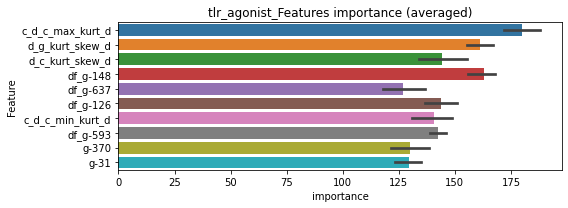

len(train_index) : 2854
len(valid_index) : 952
================================= fold 1/4 tlr_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000407308	valid_1's binary_logloss: 0.000540222
[2000]	training's binary_logloss: 0.000238833	valid_1's binary_logloss: 0.000317708
[3000]	training's binary_logloss: 0.000179092	valid_1's binary_logloss: 0.000238489
[4000]	training's binary_logloss: 0.000149891	valid_1's binary_logloss: 0.000199717
[5000]	training's binary_logloss: 0.00013475	valid_1's binary_logloss: 0.000179588
[6000]	training's binary_logloss: 0.000125001	valid_1's binary_logloss: 0.000166624
[7000]	training's binary_logloss: 0.000118149	valid_1's binary_logloss: 0.000157506
[8000]	training's binary_logloss: 0.000113444	valid_1's binary_logloss: 0.000151248
[9000]	training's binary_logloss: 0.000110065	valid_1's binary_logloss: 0.000146746
[10000]	training's binary_logloss: 0.000107658	valid_1's binary_logloss: 0.000143548
Did not meet early stopping. Best iteration is:
[9999]	training's binary_logloss: 0.000107658	valid

len(train_index) : 2854
len(valid_index) : 952
================================= fold 2/4 tlr_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000490911	valid_1's binary_logloss: 0.000502936
[2000]	training's binary_logloss: 0.000288564	valid_1's binary_logloss: 0.000283671
[3000]	training's binary_logloss: 0.000231862	valid_1's binary_logloss: 0.000218596
[4000]	training's binary_logloss: 0.000206596	valid_1's binary_logloss: 0.00018763
[5000]	training's binary_logloss: 0.000192972	valid_1's binary_logloss: 0.000171183
[6000]	training's binary_logloss: 0.000184149	valid_1's binary_logloss: 0.000160666
[7000]	training's binary_logloss: 0.000177609	valid_1's binary_logloss: 0.000152983
[8000]	training's binary_logloss: 0.000172457	valid_1's binary_logloss: 0.000146962
Early stopping, best iteration is:
[8497]	training's binary_logloss: 0.000170582	valid_1's binary_logloss: 0.000144797


len(train_index) : 2855
len(valid_index) : 951
================================= fold 3/4 tlr_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000489532	valid_1's binary_logloss: 0.0018628
Early stopping, best iteration is:
[1554]	training's binary_logloss: 0.000340564	valid_1's binary_logloss: 0.0015845


len(train_index) : 2855
len(valid_index) : 951
================================= fold 4/4 tlr_agonist=================================


Training until validation scores don't improve for 30 rounds


tlr_agonist logloss: 0.0014539480992769517


Early stopping, best iteration is:
[543]	training's binary_logloss: 0.000836459	valid_1's binary_logloss: 0.00394426
neg labels: 3289 → selected neg labels: 3289


tlr_antagonist, len(trt): 7, len(othr): 3289
target_rate: 0.0002939 → Adj_target_rate: 0.0004391
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000505455	valid_1's binary_logloss: 0.000780436
Early stopping, best iteration is:
[491]	training's binary_logloss: 0.00023302	valid_1's binary_logloss: 0.0003851
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000501691	valid_1's binary_logloss: 0.00302619
Early stopping, best iteration is:
[497]	training's binary_logloss: 0.000236661	valid_1's binary_logloss: 0.0024071
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00051239	valid_1's binary_logloss: 0.000687036
Early stopping, best iteration is:
[490]	training's binary_logloss: 0.000238078	valid_1's binary_logloss: 0.000311996
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000506948	valid_1's binary_logloss: 0.000667221


1 / 3 AUC score:1.000
y_Threshold: 0.0007354, Threshold: 0.0027130, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00029
Num_p_label: 40.0, conf_0:0.00190, conf_1:0.00353
Num_p_label: 40.0, Expected: 1.2, Adj_threshold_1: 0.0027130
Num_p_label: 1.0, Expected: 1.2, Adj_threshold_2: 0.0327130
threshold: 0.0327130, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[510]	training's binary_logloss: 0.000232648	valid_1's binary_logloss: 0.000328234


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000481463	valid_1's binary_logloss: 0.000578799
Early stopping, best iteration is:
[523]	training's binary_logloss: 0.000226645	valid_1's binary_logloss: 0.000279558
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000474973	valid_1's binary_logloss: 0.00279325
Early stopping, best iteration is:
[507]	training's binary_logloss: 0.000228646	valid_1's binary_logloss: 0.00211106
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000473254	valid_1's binary_logloss: 0.000548874
[600]	training's binary_logloss: 0.000223228	valid_1's binary_logloss: 0.000263279
Early stopping, best iteration is:
[577]	training's binary_logloss: 0.000223228	valid_1's binary_logloss: 0.000263279
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000476748	valid_1's binary_logloss: 0

2 / 3 AUC score:1.000
y_Threshold: 0.0330549, Threshold: 0.0327130, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0015068 Vs.target_rate: 0.00029
Num_p_label: 6.0, conf_0:0.02617, conf_1:0.03926
Num_p_label: 6.0, Expected: 1.2, Adj_threshold_1: 0.0327130
Num_p_label: 2.0, Expected: 1.2, Adj_threshold_2: 0.0627130
threshold: 0.0627130, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


[600]	training's binary_logloss: 0.000222976	valid_1's binary_logloss: 0.000259476
Early stopping, best iteration is:
[576]	training's binary_logloss: 0.000222976	valid_1's binary_logloss: 0.000259476


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000481463	valid_1's binary_logloss: 0.000578799
Early stopping, best iteration is:
[523]	training's binary_logloss: 0.000226645	valid_1's binary_logloss: 0.000279558
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000474973	valid_1's binary_logloss: 0.00279325
Early stopping, best iteration is:
[507]	training's binary_logloss: 0.000228646	valid_1's binary_logloss: 0.00211106
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000473254	valid_1's binary_logloss: 0.000548874
[600]	training's binary_logloss: 0.000223228	valid_1's binary_logloss: 0.000263279
Early stopping, best iteration is:
[577]	training's binary_logloss: 0.000223228	valid_1's binary_logloss: 0.000263279
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000476748	valid_1's binary_logloss: 0

3 / 3 AUC score:1.000
y_Threshold: 0.0330549, Threshold: 0.0627130, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0005023 Vs.target_rate: 0.00029
Num_p_label: 2.0, conf_0:0.05644, conf_1:0.06898
Num_p_label: 2.0, Expected: 1.2, Adj_threshold_1: 0.0627130


[600]	training's binary_logloss: 0.000222976	valid_1's binary_logloss: 0.000259476
Early stopping, best iteration is:
[576]	training's binary_logloss: 0.000222976	valid_1's binary_logloss: 0.000259476


threshold: 0.0627130, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


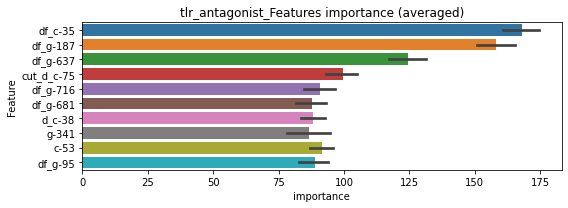

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 tlr_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000355121	valid_1's binary_logloss: 0.000763739
[2000]	training's binary_logloss: 0.000221445	valid_1's binary_logloss: 0.000568312
[3000]	training's binary_logloss: 0.000187054	valid_1's binary_logloss: 0.000528426
[4000]	training's binary_logloss: 0.000169966	valid_1's binary_logloss: 0.000512426
[5000]	training's binary_logloss: 0.000160206	valid_1's binary_logloss: 0.000501922
[6000]	training's binary_logloss: 0.000153472	valid_1's binary_logloss: 0.000494782
Early stopping, best iteration is:
[6513]	training's binary_logloss: 0.000150782	valid_1's binary_logloss: 0.00049213


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 tlr_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000354559	valid_1's binary_logloss: 0.000735197
[2000]	training's binary_logloss: 0.000219758	valid_1's binary_logloss: 0.000565879
[3000]	training's binary_logloss: 0.000186207	valid_1's binary_logloss: 0.00053329
[4000]	training's binary_logloss: 0.000168643	valid_1's binary_logloss: 0.000511283
[5000]	training's binary_logloss: 0.000158655	valid_1's binary_logloss: 0.000500145
Early stopping, best iteration is:
[5020]	training's binary_logloss: 0.000158431	valid_1's binary_logloss: 0.000499604


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 tlr_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000346099	valid_1's binary_logloss: 0.000335816
[2000]	training's binary_logloss: 0.000217507	valid_1's binary_logloss: 0.000204624
[3000]	training's binary_logloss: 0.000178352	valid_1's binary_logloss: 0.000163318
[4000]	training's binary_logloss: 0.000160525	valid_1's binary_logloss: 0.00014325
[5000]	training's binary_logloss: 0.000151344	valid_1's binary_logloss: 0.000132765
[6000]	training's binary_logloss: 0.000144906	valid_1's binary_logloss: 0.000125431
[7000]	training's binary_logloss: 0.000139961	valid_1's binary_logloss: 0.000119796
[8000]	training's binary_logloss: 0.000136222	valid_1's binary_logloss: 0.000115516
[9000]	training's binary_logloss: 0.000133771	valid_1's binary_logloss: 0.000112721
[10000]	training's binary_logloss: 0.000131478	valid_1's binary_logloss: 0.000110144
Did not meet early stopping. Best iteration is:
[9999]	training's binary_logloss: 0.000131478	valid

len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 tlr_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000353504	valid_1's binary_logloss: 0.000332513
[2000]	training's binary_logloss: 0.000220873	valid_1's binary_logloss: 0.000201904
[3000]	training's binary_logloss: 0.00018734	valid_1's binary_logloss: 0.000165424
[4000]	training's binary_logloss: 0.000169245	valid_1's binary_logloss: 0.000145296
[5000]	training's binary_logloss: 0.000159066	valid_1's binary_logloss: 0.000133957
[6000]	training's binary_logloss: 0.000152156	valid_1's binary_logloss: 0.000126259
[7000]	training's binary_logloss: 0.000147068	valid_1's binary_logloss: 0.000120586
[8000]	training's binary_logloss: 0.00014327	valid_1's binary_logloss: 0.000116395
[9000]	training's binary_logloss: 0.000140547	valid_1's binary_logloss: 0.000113359
Early stopping, best iteration is:
[9768]	training's binary_logloss: 0.000138899	valid_1's binary_logloss: 0.000111519


tlr_antagonist logloss: 0.0003034121580346059


neg labels: 3289 → selected neg labels: 3289


tnf_inhibitor, len(trt): 36, len(othr): 3289
target_rate: 0.0015117 → Adj_target_rate: 0.0017663
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00307701	valid_1's binary_logloss: 0.0127386
[600]	training's binary_logloss: 0.000612817	valid_1's binary_logloss: 0.00704629
Early stopping, best iteration is:
[709]	training's binary_logloss: 0.000522146	valid_1's binary_logloss: 0.00677569
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00285701	valid_1's binary_logloss: 0.0182713
[600]	training's binary_logloss: 0.000591424	valid_1's binary_logloss: 0.0113271
Early stopping, best iteration is:
[651]	training's binary_logloss: 0.000538657	valid_1's binary_logloss: 0.0110336
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00296118	valid_1's binary_logloss: 0.0102981
[600]	training's binary_logloss: 0.000606375	valid_1's binary_logloss: 0.00616309
Early stopping, best iteration is:
[654]	training's binary_logloss: 0.000553377	valid_1's binary_lo

1 / 3 AUC score:1.000
y_Threshold: 0.0044130, Threshold: 0.0205346, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, conf_0:0.01437, conf_1:0.02669
Num_p_label: 40.0, Expected: 6.0, Adj_threshold_1: 0.0205346
Num_p_label: 15.0, Expected: 6.0, Adj_threshold_2: 0.0505346
threshold: 0.0505346, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0027615	valid_1's binary_logloss: 0.0126305
[600]	training's binary_logloss: 0.000577764	valid_1's binary_logloss: 0.00663563
Early stopping, best iteration is:
[682]	training's binary_logloss: 0.000517754	valid_1's binary_logloss: 0.00641476
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00274589	valid_1's binary_logloss: 0.0160651
[600]	training's binary_logloss: 0.000580888	valid_1's binary_logloss: 0.0100446
Early stopping, best iteration is:
[630]	training's binary_logloss: 0.000548569	valid_1's binary_logloss: 0.00985328
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00283905	valid_1's binary_logloss: 0.00922562
[600]	training's binary_logloss: 0.000584101	valid_1's binary_logloss: 0.00498605
Early stopping, best iteration is:
[679]	training's binary_logloss: 0.000525704	valid_1's binary_l

2 / 3 AUC score:1.000
y_Threshold: 0.0414384, Threshold: 0.0505346, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0092918 Vs.target_rate: 0.00151
Num_p_label: 37.0, conf_0:0.04043, conf_1:0.06064
Num_p_label: 37.0, Expected: 6.0, Adj_threshold_1: 0.0505346
Num_p_label: 23.0, Expected: 6.0, Adj_threshold_2: 0.0805346
Num_p_label: 21.0, Expected: 6.0, Adj_threshold_3: 0.1105346
Num_p_label: 16.0, Expected: 6.0, Adj_threshold_4: 0.1405346
Num_p_label: 11.0, Expected: 6.0, Adj_threshold_5: 0.1705346
threshold: 0.1705346, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0027615	valid_1's binary_logloss: 0.0126305
[600]	training's binary_logloss: 0.000577764	valid_1's binary_logloss: 0.00663563
Early stopping, best iteration is:
[682]	training's binary_logloss: 0.000517754	valid_1's binary_logloss: 0.00641476
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00274589	valid_1's binary_logloss: 0.0160651
[600]	training's binary_logloss: 0.000580888	valid_1's binary_logloss: 0.0100446
Early stopping, best iteration is:
[630]	training's binary_logloss: 0.000548569	valid_1's binary_logloss: 0.00985328
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00283905	valid_1's binary_logloss: 0.00922562
[600]	training's binary_logloss: 0.000584101	valid_1's binary_logloss: 0.00498605
Early stopping, best iteration is:
[679]	training's binary_logloss: 0.000525704	valid_1's binary_l

3 / 3 AUC score:1.000
y_Threshold: 0.0414384, Threshold: 0.1705346, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0027624 Vs.target_rate: 0.00151
Num_p_label: 11.0, conf_0:0.15348, conf_1:0.18759
Num_p_label: 11.0, Expected: 6.0, Adj_threshold_1: 0.1705346
threshold: 0.1705346, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


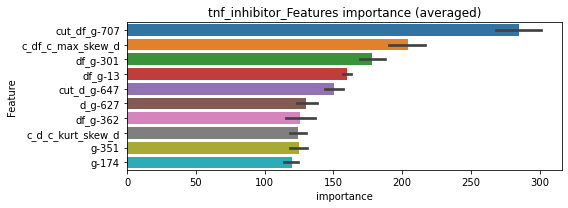

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 tnf_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000525764	valid_1's binary_logloss: 0.00234307
[2000]	training's binary_logloss: 0.000306456	valid_1's binary_logloss: 0.00196344
Early stopping, best iteration is:
[2715]	training's binary_logloss: 0.000254916	valid_1's binary_logloss: 0.00188321


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 tnf_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000507682	valid_1's binary_logloss: 0.00382123
Early stopping, best iteration is:
[1124]	training's binary_logloss: 0.000458903	valid_1's binary_logloss: 0.00376368


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 tnf_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000514585	valid_1's binary_logloss: 0.000503753
[2000]	training's binary_logloss: 0.000296034	valid_1's binary_logloss: 0.000281918
[3000]	training's binary_logloss: 0.000233513	valid_1's binary_logloss: 0.000216126
[4000]	training's binary_logloss: 0.000203927	valid_1's binary_logloss: 0.000183725
[5000]	training's binary_logloss: 0.000188607	valid_1's binary_logloss: 0.00016674
[6000]	training's binary_logloss: 0.000178454	valid_1's binary_logloss: 0.000155827
[7000]	training's binary_logloss: 0.000170763	valid_1's binary_logloss: 0.000147834
Early stopping, best iteration is:
[7488]	training's binary_logloss: 0.000168142	valid_1's binary_logloss: 0.00014521


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 tnf_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000490296	valid_1's binary_logloss: 0.00137075
Early stopping, best iteration is:
[988]	training's binary_logloss: 0.000496161	valid_1's binary_logloss: 0.00136691


tnf_inhibitor logloss: 0.0017905408793892203


neg labels: 3289 → selected neg labels: 3276


topoisomerase_inhibitor, len(trt): 127, len(othr): 3276
target_rate: 0.0053330 → Adj_target_rate: 0.0051574
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0153634	valid_1's binary_logloss: 0.117226
[600]	training's binary_logloss: 0.00230724	valid_1's binary_logloss: 0.104639
Early stopping, best iteration is:
[608]	training's binary_logloss: 0.00223625	valid_1's binary_logloss: 0.104279
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0170649	valid_1's binary_logloss: 0.0846056
[600]	training's binary_logloss: 0.00237703	valid_1's binary_logloss: 0.064706
Early stopping, best iteration is:
[607]	training's binary_logloss: 0.00230736	valid_1's binary_logloss: 0.0645715
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0167848	valid_1's binary_logloss: 0.0557432
[600]	training's binary_logloss: 0.00249311	valid_1's binary_logloss: 0.0295073
[900]	training's binary_logloss: 0.00116204	valid_1's binary_logloss: 0.0254869
Early stopping, best iteration is:

1 / 3 AUC score:0.992
y_Threshold: 0.0194072, Threshold: 0.1999828, pos_neg_ratio: 0.8000000
Remove_noisy_data: 170 → Positive_corect_labels: 636/3761
p_label_rate: 0.0100452 Vs.target_rate: 0.00533
Num_p_label: 40.0, conf_0:0.13999, conf_1:0.25998
Num_p_label: 40.0, Expected: 21.2, Adj_threshold_1: 0.1999828
Num_p_label: 32.0, Expected: 21.2, Adj_threshold_2: 0.2299828
Num_p_label: 26.0, Expected: 21.2, Adj_threshold_3: 0.2599828
threshold: 0.2599828, positive_p_label: 26.0/3982, p_label_rate: 0.0065294
positive_y_label: 636.0/3761, y_label_rate: 0.1691040
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0125713	valid_1's binary_logloss: 0.0852216
[600]	training's binary_logloss: 0.00195915	valid_1's binary_logloss: 0.0688123
Early stopping, best iteration is:
[653]	training's binary_logloss: 0.00164835	valid_1's binary_logloss: 0.0680543
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0118077	valid_1's binary_logloss: 0.0719532
[600]	training's binary_logloss: 0.00192118	valid_1's binary_logloss: 0.0561475
Early stopping, best iteration is:
[677]	training's binary_logloss: 0.00150601	valid_1's binary_logloss: 0.0554651
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0130954	valid_1's binary_logloss: 0.0678011
[600]	training's binary_logloss: 0.0019976	valid_1's binary_logloss: 0.0511983
Early stopping, best iteration is:
[625]	training's binary_logloss: 0.00182897	valid_1's binary_logloss: 0.0507

2 / 3 AUC score:0.997
y_Threshold: 0.0465887, Threshold: 0.2599828, pos_neg_ratio: 0.8000000
Remove_noisy_data: 44 → Positive_corect_labels: 614.0/3717
p_label_rate: 0.0170768 Vs.target_rate: 0.00533
Num_p_label: 68.0, conf_0:0.20799, conf_1:0.31198
Num_p_label: 68.0, Expected: 21.2, Adj_threshold_1: 0.2599828
Num_p_label: 64.0, Expected: 21.2, Adj_threshold_2: 0.2899828
Num_p_label: 53.0, Expected: 21.2, Adj_threshold_3: 0.3199828
Num_p_label: 45.0, Expected: 21.2, Adj_threshold_4: 0.3499828
Num_p_label: 40.0, Expected: 21.2, Adj_threshold_5: 0.3799828
Num_p_label: 34.0, Expected: 21.2, Adj_threshold_6: 0.4099828
Num_p_label: 29.0, Expected: 21.2, Adj_threshold_7: 0.4399828
threshold: 0.4399828, positive_p_label: 29.0/3982, p_label_rate: 0.0072828
positive_y_label: 614.0/3717, y_label_rate: 0.1651870
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0103813	valid_1's binary_logloss: 0.0648945
[600]	training's binary_logloss: 0.00168127	valid_1's binary_logloss: 0.0459393
Early stopping, best iteration is:
[639]	training's binary_logloss: 0.00148787	valid_1's binary_logloss: 0.0451854
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0107877	valid_1's binary_logloss: 0.0579649
[600]	training's binary_logloss: 0.00171989	valid_1's binary_logloss: 0.0405089
Early stopping, best iteration is:
[789]	training's binary_logloss: 0.0010639	valid_1's binary_logloss: 0.039002
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0105354	valid_1's binary_logloss: 0.0655037
[600]	training's binary_logloss: 0.00170172	valid_1's binary_logloss: 0.0483603
Early stopping, best iteration is:
[667]	training's binary_logloss: 0.00137981	valid_1's binary_logloss: 0.04777

3 / 3 AUC score:0.999
y_Threshold: 0.0455708, Threshold: 0.4399828, pos_neg_ratio: 0.8000000
Remove_noisy_data: 18 → Positive_corect_labels: 605.0/3699
p_label_rate: 0.0143144 Vs.target_rate: 0.00533
Num_p_label: 57.0, conf_0:0.39598, conf_1:0.48398
Num_p_label: 57.0, Expected: 21.2, Adj_threshold_1: 0.4399828
Num_p_label: 50.0, Expected: 21.2, Adj_threshold_2: 0.4699828
Num_p_label: 47.0, Expected: 21.2, Adj_threshold_3: 0.4999828
Num_p_label: 42.0, Expected: 21.2, Adj_threshold_4: 0.5299828
Num_p_label: 38.0, Expected: 21.2, Adj_threshold_5: 0.5599828
Num_p_label: 36.0, Expected: 21.2, Adj_threshold_6: 0.5899828
Num_p_label: 33.0, Expected: 21.2, Adj_threshold_7: 0.6199828
Num_p_label: 29.0, Expected: 21.2, Adj_threshold_8: 0.6499828
threshold: 0.6499828, positive_p_label: 29.0/3982, p_label_rate: 0.0072828
positive_y_label: 605.0/3699, y_label_rate: 0.1635577


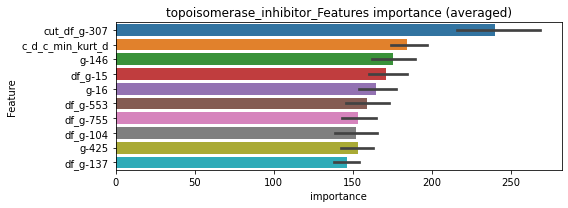

len(train_index) : 2774
len(valid_index) : 925
================================= fold 1/4 topoisomerase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000593225	valid_1's binary_logloss: 0.00287581
[2000]	training's binary_logloss: 0.000331855	valid_1's binary_logloss: 0.00233525
[3000]	training's binary_logloss: 0.000254699	valid_1's binary_logloss: 0.00215004
[4000]	training's binary_logloss: 0.000219754	valid_1's binary_logloss: 0.00205572
Early stopping, best iteration is:
[4238]	training's binary_logloss: 0.000214771	valid_1's binary_logloss: 0.00204332


len(train_index) : 2774
len(valid_index) : 925
================================= fold 2/4 topoisomerase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000527857	valid_1's binary_logloss: 0.000975588
[2000]	training's binary_logloss: 0.000308104	valid_1's binary_logloss: 0.000571882
[3000]	training's binary_logloss: 0.000241842	valid_1's binary_logloss: 0.000438275
[4000]	training's binary_logloss: 0.000203869	valid_1's binary_logloss: 0.000338261
[5000]	training's binary_logloss: 0.000187932	valid_1's binary_logloss: 0.000292714
[6000]	training's binary_logloss: 0.000174316	valid_1's binary_logloss: 0.000268133
[7000]	training's binary_logloss: 0.000158566	valid_1's binary_logloss: 0.000264362
[8000]	training's binary_logloss: 0.00015351	valid_1's binary_logloss: 0.000263375
Early stopping, best iteration is:
[8457]	training's binary_logloss: 0.00015218	valid_1's binary_logloss: 0.000263206


len(train_index) : 2774
len(valid_index) : 925
================================= fold 3/4 topoisomerase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000589288	valid_1's binary_logloss: 0.00355139
Early stopping, best iteration is:
[1612]	training's binary_logloss: 0.000385733	valid_1's binary_logloss: 0.00322981


len(train_index) : 2775
len(valid_index) : 924
================================= fold 4/4 topoisomerase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000576669	valid_1's binary_logloss: 0.00377161
Early stopping, best iteration is:
[1644]	training's binary_logloss: 0.00037406	valid_1's binary_logloss: 0.00348045


topoisomerase_inhibitor logloss: 0.0022552438789320063


neg labels: 3289 → selected neg labels: 3287


transient_receptor_potential_channel_antagonist, len(trt): 18, len(othr): 3287
target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00138548	valid_1's binary_logloss: 0.00271685
[600]	training's binary_logloss: 0.000382786	valid_1's binary_logloss: 0.00102654
Early stopping, best iteration is:
[634]	training's binary_logloss: 0.000382501	valid_1's binary_logloss: 0.00102585
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00132944	valid_1's binary_logloss: 0.00696267
Early stopping, best iteration is:
[550]	training's binary_logloss: 0.00040045	valid_1's binary_logloss: 0.00401105
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00140575	valid_1's binary_logloss: 0.00521411
[600]	training's binary_logloss: 0.000384708	valid_1's binary_logloss: 0.00327093
Early stopping, best iteration is:
[577]	training's binary_logloss: 0.000390607	valid_1's binary_logloss: 0.00326757
Training until validation scores don't improve for 30 rounds

1 / 3 AUC score:1.000
y_Threshold: 0.0022691, Threshold: 0.0126739, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, conf_0:0.00887, conf_1:0.01648
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_1: 0.0126739
Num_p_label: 16.0, Expected: 3.0, Adj_threshold_2: 0.0426739
Num_p_label: 11.0, Expected: 3.0, Adj_threshold_3: 0.0726739


[600]	training's binary_logloss: 0.000391674	valid_1's binary_logloss: 0.00107635
Early stopping, best iteration is:
[585]	training's binary_logloss: 0.000391674	valid_1's binary_logloss: 0.00107635


Num_p_label: 6.0, Expected: 3.0, Adj_threshold_4: 0.1026739
threshold: 0.1026739, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00128619	valid_1's binary_logloss: 0.00191898
[600]	training's binary_logloss: 0.000360028	valid_1's binary_logloss: 0.000647228
Early stopping, best iteration is:
[615]	training's binary_logloss: 0.000358743	valid_1's binary_logloss: 0.000645661
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00118444	valid_1's binary_logloss: 0.00778997
[600]	training's binary_logloss: 0.000368275	valid_1's binary_logloss: 0.00530646
Early stopping, best iteration is:
[579]	training's binary_logloss: 0.000369496	valid_1's binary_logloss: 0.00529848
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00125895	valid_1's binary_logloss: 0.00536559
Early stopping, best iteration is:
[553]	training's binary_logloss: 0.000377362	valid_1's binary_logloss: 0.00407247
Training until validation scores don't improve for 30 rou

2 / 3 AUC score:1.000
y_Threshold: 0.0319986, Threshold: 0.1026739, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0105475 Vs.target_rate: 0.00076
Num_p_label: 42.0, conf_0:0.08214, conf_1:0.12321
Num_p_label: 42.0, Expected: 3.0, Adj_threshold_1: 0.1026739
Num_p_label: 37.0, Expected: 3.0, Adj_threshold_2: 0.1326739
Num_p_label: 30.0, Expected: 3.0, Adj_threshold_3: 0.1626739
Num_p_label: 25.0, Expected: 3.0, Adj_threshold_4: 0.1926739
Num_p_label: 23.0, Expected: 3.0, Adj_threshold_5: 0.2226739
Num_p_label: 23.0, Expected: 3.0, Adj_threshold_6: 0.2526739
Num_p_label: 20.0, Expected: 3.0, Adj_threshold_7: 0.2826739


Early stopping, best iteration is:
[550]	training's binary_logloss: 0.000378646	valid_1's binary_logloss: 0.00120383


Num_p_label: 18.0, Expected: 3.0, Adj_threshold_8: 0.3126739
Num_p_label: 17.0, Expected: 3.0, Adj_threshold_9: 0.3426739
Num_p_label: 15.0, Expected: 3.0, Adj_threshold_10: 0.3726739
threshold: 0.4026739, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00128619	valid_1's binary_logloss: 0.00191898
[600]	training's binary_logloss: 0.000360028	valid_1's binary_logloss: 0.000647228
Early stopping, best iteration is:
[615]	training's binary_logloss: 0.000358743	valid_1's binary_logloss: 0.000645661
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00118444	valid_1's binary_logloss: 0.00778997
[600]	training's binary_logloss: 0.000368275	valid_1's binary_logloss: 0.00530646
Early stopping, best iteration is:
[579]	training's binary_logloss: 0.000369496	valid_1's binary_logloss: 0.00529848
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00125895	valid_1's binary_logloss: 0.00536559
Early stopping, best iteration is:
[553]	training's binary_logloss: 0.000377362	valid_1's binary_logloss: 0.00407247
Training until validation scores don't improve for 30 rou

3 / 3 AUC score:1.000
y_Threshold: 0.0319986, Threshold: 0.4026739, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812


Early stopping, best iteration is:
[550]	training's binary_logloss: 0.000378646	valid_1's binary_logloss: 0.00120383


p_label_rate: 0.0037670 Vs.target_rate: 0.00076
Num_p_label: 15.0, conf_0:0.36241, conf_1:0.44294
Num_p_label: 15.0, Expected: 3.0, Adj_threshold_1: 0.4026739
Num_p_label: 10.0, Expected: 3.0, Adj_threshold_2: 0.4326739
Num_p_label: 9.0, Expected: 3.0, Adj_threshold_3: 0.4626739
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_4: 0.4926739
threshold: 0.4926739, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


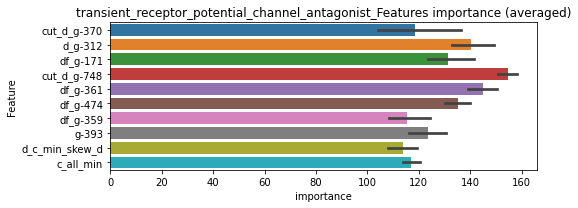

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 transient_receptor_potential_channel_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000444301	valid_1's binary_logloss: 0.000505566
[2000]	training's binary_logloss: 0.000266775	valid_1's binary_logloss: 0.000317853
[3000]	training's binary_logloss: 0.000215439	valid_1's binary_logloss: 0.000260871
[4000]	training's binary_logloss: 0.000191651	valid_1's binary_logloss: 0.000233217
[5000]	training's binary_logloss: 0.000179064	valid_1's binary_logloss: 0.000218025
[6000]	training's binary_logloss: 0.00017114	valid_1's binary_logloss: 0.000207783
[7000]	training's binary_logloss: 0.000164974	valid_1's binary_logloss: 0.000201056
Early stopping, best iteration is:
[7872]	training's binary_logloss: 0.000161252	valid_1's binary_logloss: 0.000196305


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 transient_receptor_potential_channel_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000376354	valid_1's binary_logloss: 0.000572562
[2000]	training's binary_logloss: 0.00022897	valid_1's binary_logloss: 0.000351976
[3000]	training's binary_logloss: 0.000174577	valid_1's binary_logloss: 0.0002693
[4000]	training's binary_logloss: 0.000147415	valid_1's binary_logloss: 0.000227811
[5000]	training's binary_logloss: 0.00013309	valid_1's binary_logloss: 0.000205854
[6000]	training's binary_logloss: 0.000123817	valid_1's binary_logloss: 0.000191621
[7000]	training's binary_logloss: 0.000117291	valid_1's binary_logloss: 0.000181593
[8000]	training's binary_logloss: 0.000112752	valid_1's binary_logloss: 0.000174614
[9000]	training's binary_logloss: 0.000109517	valid_1's binary_logloss: 0.000169632
[10000]	training's binary_logloss: 0.000107164	valid_1's binary_logloss: 0.000166023
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.000107164	valid_1

len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 transient_receptor_potential_channel_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000451123	valid_1's binary_logloss: 0.00232629
Early stopping, best iteration is:
[1866]	training's binary_logloss: 0.000285914	valid_1's binary_logloss: 0.00209113


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 transient_receptor_potential_channel_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000377907	valid_1's binary_logloss: 0.000452208
[2000]	training's binary_logloss: 0.000229288	valid_1's binary_logloss: 0.000275079
[3000]	training's binary_logloss: 0.000174816	valid_1's binary_logloss: 0.000209937
[4000]	training's binary_logloss: 0.000147709	valid_1's binary_logloss: 0.000177489
[5000]	training's binary_logloss: 0.000133282	valid_1's binary_logloss: 0.000160189
[6000]	training's binary_logloss: 0.000123867	valid_1's binary_logloss: 0.000148889
[7000]	training's binary_logloss: 0.000117257	valid_1's binary_logloss: 0.000140956
[8000]	training's binary_logloss: 0.000112679	valid_1's binary_logloss: 0.000135459
[9000]	training's binary_logloss: 0.000109454	valid_1's binary_logloss: 0.000131589
[10000]	training's binary_logloss: 0.000107241	valid_1's binary_logloss: 0.000128944
Did not meet early stopping. Best iteration is:
[9999]	training's binary_logloss: 0.000107241	vali

transient_receptor_potential_channel_antagonist logloss: 0.0006459129803361908


neg labels: 3289 → selected neg labels: 3289


tropomyosin_receptor_kinase_inhibitor, len(trt): 6, len(othr): 3289
target_rate: 0.0002520 → Adj_target_rate: 0.0003851
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000375654	valid_1's binary_logloss: 0.00122438
Early stopping, best iteration is:
[464]	training's binary_logloss: 0.00018884	valid_1's binary_logloss: 0.000859095
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000376107	valid_1's binary_logloss: 0.000513385
Early stopping, best iteration is:
[491]	training's binary_logloss: 0.000187274	valid_1's binary_logloss: 0.000254525
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000377099	valid_1's binary_logloss: 0.000940067
Early stopping, best iteration is:
[469]	training's binary_logloss: 0.000189394	valid_1's binary_logloss: 0.00049246
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000376311	valid_1's binary_logloss: 0.000547227


1 / 3 AUC score:1.000
y_Threshold: 0.0005401, Threshold: 0.0013784, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00025
Num_p_label: 40.0, conf_0:0.00096, conf_1:0.00179
Num_p_label: 40.0, Expected: 1.0, Adj_threshold_1: 0.0013784
Num_p_label: 1.0, Expected: 1.0, Adj_threshold_2: 0.0313784
threshold: 0.0313784, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[470]	training's binary_logloss: 0.000188122	valid_1's binary_logloss: 0.000289015


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000353148	valid_1's binary_logloss: 0.00099671
Early stopping, best iteration is:
[525]	training's binary_logloss: 0.00017448	valid_1's binary_logloss: 0.000654823
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000352269	valid_1's binary_logloss: 0.000394886
Early stopping, best iteration is:
[515]	training's binary_logloss: 0.000177524	valid_1's binary_logloss: 0.000204842
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000351985	valid_1's binary_logloss: 0.00038356
Early stopping, best iteration is:
[508]	training's binary_logloss: 0.000176122	valid_1's binary_logloss: 0.000193873
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00035116	valid_1's binary_logloss: 0.000435838


2 / 3 AUC score:1.000
y_Threshold: 0.1172487, Threshold: 0.0313784, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0015068 Vs.target_rate: 0.00025
Num_p_label: 6.0, conf_0:0.02510, conf_1:0.03765
Num_p_label: 6.0, Expected: 1.0, Adj_threshold_1: 0.0313784
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_2: 0.0613784
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_3: 0.0913784
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_4: 0.1213784
threshold: 0.1213784, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[518]	training's binary_logloss: 0.000176615	valid_1's binary_logloss: 0.000233044


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000353148	valid_1's binary_logloss: 0.00099671
Early stopping, best iteration is:
[525]	training's binary_logloss: 0.00017448	valid_1's binary_logloss: 0.000654823
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000352269	valid_1's binary_logloss: 0.000394886
Early stopping, best iteration is:
[514]	training's binary_logloss: 0.000177524	valid_1's binary_logloss: 0.000204842
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000351985	valid_1's binary_logloss: 0.00038356
Early stopping, best iteration is:
[508]	training's binary_logloss: 0.000176122	valid_1's binary_logloss: 0.000193873
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00035116	valid_1's binary_logloss: 0.000435838


3 / 3 AUC score:1.000
y_Threshold: 0.1172487, Threshold: 0.1213784, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813


Early stopping, best iteration is:
[518]	training's binary_logloss: 0.000176615	valid_1's binary_logloss: 0.000233044


p_label_rate: 0.0005023 Vs.target_rate: 0.00025
Num_p_label: 2.0, conf_0:0.10924, conf_1:0.13352
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_1: 0.1213784
threshold: 0.1213784, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


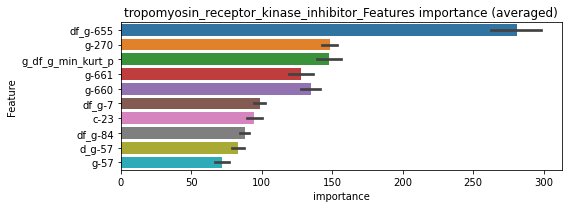

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 tropomyosin_receptor_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[761]	training's binary_logloss: 0.00037915	valid_1's binary_logloss: 0.00263878


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 tropomyosin_receptor_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000319075	valid_1's binary_logloss: 0.000483056
[2000]	training's binary_logloss: 0.000199682	valid_1's binary_logloss: 0.000355111
[3000]	training's binary_logloss: 0.00017119	valid_1's binary_logloss: 0.000331797
[4000]	training's binary_logloss: 0.000157196	valid_1's binary_logloss: 0.000314882
[5000]	training's binary_logloss: 0.000148867	valid_1's binary_logloss: 0.000304861
[6000]	training's binary_logloss: 0.000143136	valid_1's binary_logloss: 0.000298251
Early stopping, best iteration is:
[6885]	training's binary_logloss: 0.000139421	valid_1's binary_logloss: 0.000294001


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 tropomyosin_receptor_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000315016	valid_1's binary_logloss: 0.000520783
[2000]	training's binary_logloss: 0.000195548	valid_1's binary_logloss: 0.00037045
[3000]	training's binary_logloss: 0.000165814	valid_1's binary_logloss: 0.000334126
[4000]	training's binary_logloss: 0.000152182	valid_1's binary_logloss: 0.000318826
Early stopping, best iteration is:
[4240]	training's binary_logloss: 0.000150042	valid_1's binary_logloss: 0.000316125


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 tropomyosin_receptor_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000317091	valid_1's binary_logloss: 0.000569761
[2000]	training's binary_logloss: 0.000197071	valid_1's binary_logloss: 0.000437369
[3000]	training's binary_logloss: 0.000167106	valid_1's binary_logloss: 0.000409055
Early stopping, best iteration is:
[3125]	training's binary_logloss: 0.000164575	valid_1's binary_logloss: 0.000406627


tropomyosin_receptor_kinase_inhibitor logloss: 0.0009144619946225497


neg labels: 3289 → selected neg labels: 3281


trpv_agonist, len(trt): 25, len(othr): 3281
target_rate: 0.0010498 → Adj_target_rate: 0.0012955
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00181983	valid_1's binary_logloss: 0.00820645
[600]	training's binary_logloss: 0.000454506	valid_1's binary_logloss: 0.0045471
Early stopping, best iteration is:
[602]	training's binary_logloss: 0.000453254	valid_1's binary_logloss: 0.00453746
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00188094	valid_1's binary_logloss: 0.00432918
[600]	training's binary_logloss: 0.000453443	valid_1's binary_logloss: 0.00172677
Early stopping, best iteration is:
[666]	training's binary_logloss: 0.000428859	valid_1's binary_logloss: 0.00169621
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00184033	valid_1's binary_logloss: 0.00429587
[600]	training's binary_logloss: 0.000459701	valid_1's binary_logloss: 0.00173808
Early stopping, best iteration is:
[652]	training's binary_logloss: 0.000438647	valid_1's binar

1 / 3 AUC score:1.000
y_Threshold: 0.0022479, Threshold: 0.0093403, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00105
Num_p_label: 40.0, conf_0:0.00654, conf_1:0.01214
Num_p_label: 40.0, Expected: 4.2, Adj_threshold_1: 0.0093403
Num_p_label: 13.0, Expected: 4.2, Adj_threshold_2: 0.0393403
Num_p_label: 8.0, Expected: 4.2, Adj_threshold_3: 0.0693403
threshold: 0.0693403, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00170514	valid_1's binary_logloss: 0.00747804
[600]	training's binary_logloss: 0.000435953	valid_1's binary_logloss: 0.00425429
Early stopping, best iteration is:
[624]	training's binary_logloss: 0.000426642	valid_1's binary_logloss: 0.00420962
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00173701	valid_1's binary_logloss: 0.00389156
[600]	training's binary_logloss: 0.000432446	valid_1's binary_logloss: 0.00148725
Early stopping, best iteration is:
[666]	training's binary_logloss: 0.000411353	valid_1's binary_logloss: 0.001453
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00170954	valid_1's binary_logloss: 0.0037198
[600]	training's binary_logloss: 0.000441266	valid_1's binary_logloss: 0.00143119
Early stopping, best iteration is:
[657]	training's binary_logloss: 0.00042154	valid_1's binary_l

2 / 3 AUC score:1.000
y_Threshold: 0.0441156, Threshold: 0.0693403, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3805
p_label_rate: 0.0040181 Vs.target_rate: 0.00105
Num_p_label: 16.0, conf_0:0.05547, conf_1:0.08321
Num_p_label: 16.0, Expected: 4.2, Adj_threshold_1: 0.0693403
Num_p_label: 11.0, Expected: 4.2, Adj_threshold_2: 0.0993403
Num_p_label: 9.0, Expected: 4.2, Adj_threshold_3: 0.1293403
threshold: 0.1293403, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00170514	valid_1's binary_logloss: 0.00747804
[600]	training's binary_logloss: 0.000435953	valid_1's binary_logloss: 0.00425429
Early stopping, best iteration is:
[624]	training's binary_logloss: 0.000426642	valid_1's binary_logloss: 0.00420962
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00173701	valid_1's binary_logloss: 0.00389156
[600]	training's binary_logloss: 0.000432446	valid_1's binary_logloss: 0.00148725
Early stopping, best iteration is:
[666]	training's binary_logloss: 0.000411353	valid_1's binary_logloss: 0.001453
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00170954	valid_1's binary_logloss: 0.0037198
[600]	training's binary_logloss: 0.000441266	valid_1's binary_logloss: 0.00143119
Early stopping, best iteration is:
[657]	training's binary_logloss: 0.00042154	valid_1's binary_l

3 / 3 AUC score:1.000
y_Threshold: 0.0441156, Threshold: 0.1293403, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3805
p_label_rate: 0.0022602 Vs.target_rate: 0.00105
Num_p_label: 9.0, conf_0:0.11641, conf_1:0.14227
Num_p_label: 9.0, Expected: 4.2, Adj_threshold_1: 0.1293403
threshold: 0.1293403, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 656.0/3805, y_label_rate: 0.1724047


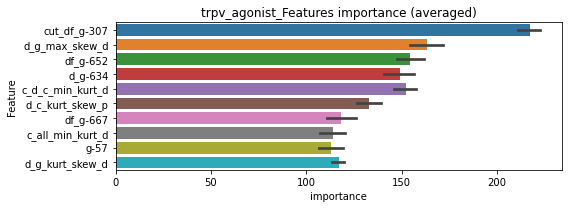

len(train_index) : 2853
len(valid_index) : 952
================================= fold 1/4 trpv_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2854
len(valid_index) : 951
================================= fold 2/4 trpv_agonist=================================


Early stopping, best iteration is:
[664]	training's binary_logloss: 0.000703478	valid_1's binary_logloss: 0.00228319
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000402474	valid_1's binary_logloss: 0.000533064
[2000]	training's binary_logloss: 0.000237261	valid_1's binary_logloss: 0.000315227
[3000]	training's binary_logloss: 0.000178507	valid_1's binary_logloss: 0.000237455
[4000]	training's binary_logloss: 0.00014965	valid_1's binary_logloss: 0.000199189
[5000]	training's binary_logloss: 0.000134608	valid_1's binary_logloss: 0.000179218
[6000]	training's binary_logloss: 0.000124874	valid_1's binary_logloss: 0.000166288
[7000]	training's binary_logloss: 0.000118043	valid_1's binary_logloss: 0.000157207
[8000]	training's binary_logloss: 0.00011333	valid_1's binary_logloss: 0.000150943
[9000]	training's binary_logloss: 0.000109984	valid_1's binary_logloss: 0.000146493
[10000]	training's binary_logloss: 0.000107645	valid_1's binary_logl

len(train_index) : 2854
len(valid_index) : 951
================================= fold 3/4 trpv_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000483241	valid_1's binary_logloss: 0.000915025
[2000]	training's binary_logloss: 0.000292717	valid_1's binary_logloss: 0.000683046
Early stopping, best iteration is:
[2945]	training's binary_logloss: 0.000239618	valid_1's binary_logloss: 0.000612521


len(train_index) : 2854
len(valid_index) : 951
================================= fold 4/4 trpv_agonist=================================


Training until validation scores don't improve for 30 rounds


trpv_agonist logloss: 0.0016548736855848433


Early stopping, best iteration is:
[531]	training's binary_logloss: 0.000869576	valid_1's binary_logloss: 0.00357934
neg labels: 3289 → selected neg labels: 3280


trpv_antagonist, len(trt): 48, len(othr): 3280
target_rate: 0.0020156 → Adj_target_rate: 0.0022556
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00351235	valid_1's binary_logloss: 0.025129
[600]	training's binary_logloss: 0.000726236	valid_1's binary_logloss: 0.0189491
Early stopping, best iteration is:
[667]	training's binary_logloss: 0.000625178	valid_1's binary_logloss: 0.0186165
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00372774	valid_1's binary_logloss: 0.0172934
[600]	training's binary_logloss: 0.000735696	valid_1's binary_logloss: 0.00949155
Early stopping, best iteration is:
[750]	training's binary_logloss: 0.000571779	valid_1's binary_logloss: 0.00889378
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00382638	valid_1's binary_logloss: 0.00828655
[600]	training's binary_logloss: 0.000777333	valid_1's binary_logloss: 0.00267231
Early stopping, best iteration is:
[826]	training's binary_logloss: 0.000574022	valid_1's binary_lo

1 / 3 AUC score:0.999
y_Threshold: 0.0049772, Threshold: 0.0237929, pos_neg_ratio: 0.8000000
Remove_noisy_data: 136 → Positive_corect_labels: 654/3800
p_label_rate: 0.0100452 Vs.target_rate: 0.00202
Num_p_label: 40.0, conf_0:0.01666, conf_1:0.03093
Num_p_label: 40.0, Expected: 8.0, Adj_threshold_1: 0.0237929


Early stopping, best iteration is:
[515]	training's binary_logloss: 0.000906305	valid_1's binary_logloss: 0.0270084


Num_p_label: 15.0, Expected: 8.0, Adj_threshold_2: 0.0537929
threshold: 0.0537929, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 654.0/3800, y_label_rate: 0.1721053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00317174	valid_1's binary_logloss: 0.0156703
[600]	training's binary_logloss: 0.000669748	valid_1's binary_logloss: 0.00994559
Early stopping, best iteration is:
[692]	training's binary_logloss: 0.000565196	valid_1's binary_logloss: 0.00953677
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0033046	valid_1's binary_logloss: 0.0138803
[600]	training's binary_logloss: 0.000682346	valid_1's binary_logloss: 0.00845288
Early stopping, best iteration is:
[726]	training's binary_logloss: 0.00054945	valid_1's binary_logloss: 0.00807753
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00325081	valid_1's binary_logloss: 0.0161926
[600]	training's binary_logloss: 0.000679907	valid_1's binary_logloss: 0.0119368
Early stopping, best iteration is:
[579]	training's binary_logloss: 0.000716725	valid_1's binary_log

2 / 3 AUC score:1.000
y_Threshold: 0.0208961, Threshold: 0.0537929, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 651.0/3794
p_label_rate: 0.0097941 Vs.target_rate: 0.00202
Num_p_label: 39.0, conf_0:0.04303, conf_1:0.06455
Num_p_label: 39.0, Expected: 8.0, Adj_threshold_1: 0.0537929
Num_p_label: 20.0, Expected: 8.0, Adj_threshold_2: 0.0837929
threshold: 0.0837929, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 651.0/3794, y_label_rate: 0.1715867
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00316872	valid_1's binary_logloss: 0.0142981
[600]	training's binary_logloss: 0.000664673	valid_1's binary_logloss: 0.00786974
Early stopping, best iteration is:
[715]	training's binary_logloss: 0.000546569	valid_1's binary_logloss: 0.00755863
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00308634	valid_1's binary_logloss: 0.0174274
[600]	training's binary_logloss: 0.000660978	valid_1's binary_logloss: 0.0112624
Early stopping, best iteration is:
[724]	training's binary_logloss: 0.000532508	valid_1's binary_logloss: 0.0107451
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00316232	valid_1's binary_logloss: 0.0103334
[600]	training's binary_logloss: 0.000675854	valid_1's binary_logloss: 0.0058064
Early stopping, best iteration is:
[582]	training's binary_logloss: 0.000706503	valid_1's binary_log

3 / 3 AUC score:1.000
y_Threshold: 0.0296767, Threshold: 0.0837929, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 651.0/3794
p_label_rate: 0.0047715 Vs.target_rate: 0.00202
Num_p_label: 19.0, conf_0:0.07541, conf_1:0.09217
Num_p_label: 19.0, Expected: 8.0, Adj_threshold_1: 0.0837929
threshold: 0.0837929, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 651.0/3794, y_label_rate: 0.1715867


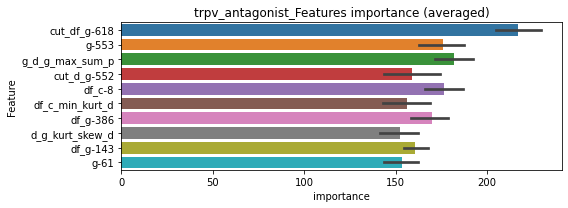

len(train_index) : 2845
len(valid_index) : 949
================================= fold 1/4 trpv_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000514312	valid_1's binary_logloss: 0.00110614
[2000]	training's binary_logloss: 0.000298386	valid_1's binary_logloss: 0.000858179
[3000]	training's binary_logloss: 0.000229584	valid_1's binary_logloss: 0.000766797
Early stopping, best iteration is:
[3128]	training's binary_logloss: 0.000223515	valid_1's binary_logloss: 0.000756899


len(train_index) : 2845
len(valid_index) : 949
================================= fold 2/4 trpv_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000512157	valid_1's binary_logloss: 0.00116113
[2000]	training's binary_logloss: 0.000294788	valid_1's binary_logloss: 0.000818177
[3000]	training's binary_logloss: 0.000227875	valid_1's binary_logloss: 0.000698157
[4000]	training's binary_logloss: 0.00019604	valid_1's binary_logloss: 0.000634753
[5000]	training's binary_logloss: 0.000179527	valid_1's binary_logloss: 0.000596274
[6000]	training's binary_logloss: 0.000168963	valid_1's binary_logloss: 0.0005688
[7000]	training's binary_logloss: 0.000161047	valid_1's binary_logloss: 0.000551465
Early stopping, best iteration is:
[7055]	training's binary_logloss: 0.000160861	valid_1's binary_logloss: 0.000550542


len(train_index) : 2846
len(valid_index) : 948
================================= fold 3/4 trpv_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000532637	valid_1's binary_logloss: 0.00244893
[2000]	training's binary_logloss: 0.000309893	valid_1's binary_logloss: 0.00218509
[3000]	training's binary_logloss: 0.000245139	valid_1's binary_logloss: 0.00210207
Early stopping, best iteration is:
[3837]	training's binary_logloss: 0.000219056	valid_1's binary_logloss: 0.00206307


len(train_index) : 2846
len(valid_index) : 948
================================= fold 4/4 trpv_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000517818	valid_1's binary_logloss: 0.00353333
Early stopping, best iteration is:
[1093]	training's binary_logloss: 0.000479457	valid_1's binary_logloss: 0.00349363


trpv_antagonist logloss: 0.0017156070505928486


neg labels: 3289 → selected neg labels: 3253


tubulin_inhibitor, len(trt): 316, len(othr): 3253
target_rate: 0.0132695 → Adj_target_rate: 0.0111926
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0449608	valid_1's binary_logloss: 0.292011
Early stopping, best iteration is:
[345]	training's binary_logloss: 0.0342617	valid_1's binary_logloss: 0.290825
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0440776	valid_1's binary_logloss: 0.279411
Early stopping, best iteration is:
[305]	training's binary_logloss: 0.0426289	valid_1's binary_logloss: 0.279116
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0431567	valid_1's binary_logloss: 0.277291
Early stopping, best iteration is:
[334]	training's binary_logloss: 0.0351826	valid_1's binary_logloss: 0.276598
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0455359	valid_1's binary_logloss: 0.275679


1 / 3 AUC score:0.866
y_Threshold: 0.0966718, Threshold: 0.2535039, pos_neg_ratio: 0.8000000
Remove_noisy_data: 505 → Positive_corect_labels: 463/3398
p_label_rate: 0.0100452 Vs.target_rate: 0.01327
Num_p_label: 40.0, conf_0:0.17745, conf_1:0.32956
threshold: 0.2535039, positive_p_label: 40.0/3982, p_label_rate: 0.0100452


Early stopping, best iteration is:
[317]	training's binary_logloss: 0.0412184	valid_1's binary_logloss: 0.274378


positive_y_label: 463.0/3398, y_label_rate: 0.1362566
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0180839	valid_1's binary_logloss: 0.166745
Early stopping, best iteration is:
[486]	training's binary_logloss: 0.00505723	valid_1's binary_logloss: 0.158724
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0169234	valid_1's binary_logloss: 0.155454
Early stopping, best iteration is:
[523]	training's binary_logloss: 0.00402547	valid_1's binary_logloss: 0.14389
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0184041	valid_1's binary_logloss: 0.11825
[600]	training's binary_logloss: 0.00311596	valid_1's binary_logloss: 0.097818
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.00327346	valid_1's binary_logloss: 0.0974644
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0167791	valid_1's binary_logloss: 0.172917


2 / 3 AUC score:0.982
y_Threshold: 0.0568459, Threshold: 0.2535039, pos_neg_ratio: 0.8000000
Remove_noisy_data: 104 → Positive_corect_labels: 411.0/3294
p_label_rate: 0.0072828 Vs.target_rate: 0.01327
Num_p_label: 29.0, conf_0:0.20280, conf_1:0.30420
Num_p_label: 29.0, Expected: 52.8, Adj_threshold_1: 0.2535039
Num_p_label: 34.0, Expected: 52.8, Adj_threshold_2: 0.2235039


Early stopping, best iteration is:
[361]	training's binary_logloss: 0.0105674	valid_1's binary_logloss: 0.170593


Num_p_label: 52.0, Expected: 52.8, Adj_threshold_3: 0.1935039
threshold: 0.1935039, positive_p_label: 52.0/3982, p_label_rate: 0.0130588
positive_y_label: 411.0/3294, y_label_rate: 0.1247723
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0134267	valid_1's binary_logloss: 0.108736
[600]	training's binary_logloss: 0.00241143	valid_1's binary_logloss: 0.0927735
Early stopping, best iteration is:
[651]	training's binary_logloss: 0.00204709	valid_1's binary_logloss: 0.0919651
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0139419	valid_1's binary_logloss: 0.142547
Early stopping, best iteration is:
[415]	training's binary_logloss: 0.00586612	valid_1's binary_logloss: 0.134229
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0135972	valid_1's binary_logloss: 0.11943
Early stopping, best iteration is:
[432]	training's binary_logloss: 0.00518551	valid_1's binary_logloss: 0.114022
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.012236	valid_1's binary_logloss: 0.122582


3 / 3 AUC score:0.989
y_Threshold: 0.0511325, Threshold: 0.1935039, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[474]	training's binary_logloss: 0.00378596	valid_1's binary_logloss: 0.11436


Remove_noisy_data: 62 → Positive_corect_labels: 380.0/3232
p_label_rate: 0.0148167 Vs.target_rate: 0.01327
Num_p_label: 59.0, conf_0:0.17415, conf_1:0.21285
threshold: 0.1935039, positive_p_label: 59.0/3982, p_label_rate: 0.0148167
positive_y_label: 380.0/3232, y_label_rate: 0.1175743


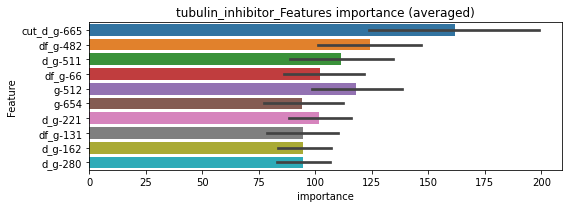

len(train_index) : 2424
len(valid_index) : 808
================================= fold 1/4 tubulin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000677018	valid_1's binary_logloss: 0.0011332
[2000]	training's binary_logloss: 0.000380849	valid_1's binary_logloss: 0.000627193
[3000]	training's binary_logloss: 0.000292868	valid_1's binary_logloss: 0.00046521
[4000]	training's binary_logloss: 0.00025154	valid_1's binary_logloss: 0.000386047
[5000]	training's binary_logloss: 0.000229849	valid_1's binary_logloss: 0.000346437
[6000]	training's binary_logloss: 0.000215486	valid_1's binary_logloss: 0.000320651
[7000]	training's binary_logloss: 0.000204989	valid_1's binary_logloss: 0.000302474
Early stopping, best iteration is:
[7738]	training's binary_logloss: 0.000199487	valid_1's binary_logloss: 0.000293124


len(train_index) : 2424
len(valid_index) : 808
================================= fold 2/4 tubulin_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2424
len(valid_index) : 808
================================= fold 3/4 tubulin_inhibitor=================================


Early stopping, best iteration is:
[471]	training's binary_logloss: 0.0013964	valid_1's binary_logloss: 0.0180223
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000682794	valid_1's binary_logloss: 0.00110303
[2000]	training's binary_logloss: 0.000381924	valid_1's binary_logloss: 0.0006272
[3000]	training's binary_logloss: 0.000291505	valid_1's binary_logloss: 0.000469149
[4000]	training's binary_logloss: 0.000251887	valid_1's binary_logloss: 0.000390093
[5000]	training's binary_logloss: 0.000230112	valid_1's binary_logloss: 0.000349839
[6000]	training's binary_logloss: 0.000216182	valid_1's binary_logloss: 0.000329526
[7000]	training's binary_logloss: 0.000207785	valid_1's binary_logloss: 0.000306734
Early stopping, best iteration is:
[7720]	training's binary_logloss: 0.000201547	valid_1's binary_logloss: 0.000300806


len(train_index) : 2424
len(valid_index) : 808
================================= fold 4/4 tubulin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000672407	valid_1's binary_logloss: 0.00252435
Early stopping, best iteration is:
[1525]	training's binary_logloss: 0.000461358	valid_1's binary_logloss: 0.00219883


tubulin_inhibitor logloss: 0.005204829091988652


neg labels: 3289 → selected neg labels: 3281


tyrosine_kinase_inhibitor, len(trt): 73, len(othr): 3281
target_rate: 0.0030654 → Adj_target_rate: 0.0032212
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00637887	valid_1's binary_logloss: 0.0517164
[600]	training's binary_logloss: 0.00113772	valid_1's binary_logloss: 0.0401318
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.00115269	valid_1's binary_logloss: 0.0399625
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00561428	valid_1's binary_logloss: 0.0504437
Early stopping, best iteration is:
[519]	training's binary_logloss: 0.0014388	valid_1's binary_logloss: 0.0434479
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00670211	valid_1's binary_logloss: 0.0282225
[600]	training's binary_logloss: 0.0011753	valid_1's binary_logloss: 0.0211123
Early stopping, best iteration is:
[662]	training's binary_logloss: 0.0010039	valid_1's binary_logloss: 0.0207223
Training until validation scores don't improve for 30 rounds
[300]	training

1 / 3 AUC score:0.998
y_Threshold: 0.0073461, Threshold: 0.0624277, pos_neg_ratio: 0.8000000
Remove_noisy_data: 142 → Positive_corect_labels: 651/3795
p_label_rate: 0.0100452 Vs.target_rate: 0.00307
Num_p_label: 40.0, conf_0:0.04370, conf_1:0.08116
Num_p_label: 40.0, Expected: 12.2, Adj_threshold_1: 0.0624277
Num_p_label: 30.0, Expected: 12.2, Adj_threshold_2: 0.0924277
Num_p_label: 25.0, Expected: 12.2, Adj_threshold_3: 0.1224277
Num_p_label: 15.0, Expected: 12.2, Adj_threshold_4: 0.1524277
threshold: 0.1524277, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 651.0/3795, y_label_rate: 0.1715415
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00543595	valid_1's binary_logloss: 0.0514236
[600]	training's binary_logloss: 0.00102946	valid_1's binary_logloss: 0.0436147
Early stopping, best iteration is:
[763]	training's binary_logloss: 0.00074618	valid_1's binary_logloss: 0.0423718
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00532992	valid_1's binary_logloss: 0.0416692
[600]	training's binary_logloss: 0.00104464	valid_1's binary_logloss: 0.0307325
Early stopping, best iteration is:
[761]	training's binary_logloss: 0.000765387	valid_1's binary_logloss: 0.0299427
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00542528	valid_1's binary_logloss: 0.0315912
[600]	training's binary_logloss: 0.00104483	valid_1's binary_logloss: 0.02446
Early stopping, best iteration is:
[582]	training's binary_logloss: 0.00110212	valid_1's binary_logloss: 0.0

2 / 3 AUC score:1.000
y_Threshold: 0.0254614, Threshold: 0.1524277, pos_neg_ratio: 0.8000000
Remove_noisy_data: 12 → Positive_corect_labels: 645.0/3783
p_label_rate: 0.0140633 Vs.target_rate: 0.00307
Num_p_label: 56.0, conf_0:0.12194, conf_1:0.18291
Num_p_label: 56.0, Expected: 12.2, Adj_threshold_1: 0.1524277
Num_p_label: 50.0, Expected: 12.2, Adj_threshold_2: 0.1824277
Num_p_label: 43.0, Expected: 12.2, Adj_threshold_3: 0.2124277


Early stopping, best iteration is:
[454]	training's binary_logloss: 0.00179638	valid_1's binary_logloss: 0.031725


Num_p_label: 37.0, Expected: 12.2, Adj_threshold_4: 0.2424277
Num_p_label: 34.0, Expected: 12.2, Adj_threshold_5: 0.2724277
Num_p_label: 28.0, Expected: 12.2, Adj_threshold_6: 0.3024277
Num_p_label: 24.0, Expected: 12.2, Adj_threshold_7: 0.3324277
Num_p_label: 21.0, Expected: 12.2, Adj_threshold_8: 0.3624277
Num_p_label: 19.0, Expected: 12.2, Adj_threshold_9: 0.3924277
Num_p_label: 17.0, Expected: 12.2, Adj_threshold_10: 0.4224277
threshold: 0.4224277, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 645.0/3783, y_label_rate: 0.1704996
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00472905	valid_1's binary_logloss: 0.0571831
Early stopping, best iteration is:
[421]	training's binary_logloss: 0.00193015	valid_1's binary_logloss: 0.0531481
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00533788	valid_1's binary_logloss: 0.030573
[600]	training's binary_logloss: 0.00102135	valid_1's binary_logloss: 0.020723
[900]	training's binary_logloss: 0.000673803	valid_1's binary_logloss: 0.0196377
Early stopping, best iteration is:
[880]	training's binary_logloss: 0.000673803	valid_1's binary_logloss: 0.0196377
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00541276	valid_1's binary_logloss: 0.0246874
[600]	training's binary_logloss: 0.00104029	valid_1's binary_logloss: 0.0136601
Early stopping, best iteration is:
[857]	training's binary_logloss: 0.000684023	valid_1's binary_logloss: 0

3 / 3 AUC score:1.000
y_Threshold: 0.0251319, Threshold: 0.4224277, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 642.0/3777
p_label_rate: 0.0050226 Vs.target_rate: 0.00307
Num_p_label: 20.0, conf_0:0.38018, conf_1:0.46467
Num_p_label: 20.0, Expected: 12.2, Adj_threshold_1: 0.4224277
Num_p_label: 18.0, Expected: 12.2, Adj_threshold_2: 0.4524277
threshold: 0.4524277, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 642.0/3777, y_label_rate: 0.1699762


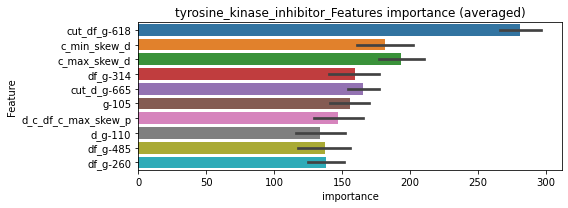

len(train_index) : 2832
len(valid_index) : 945
================================= fold 1/4 tyrosine_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000451467	valid_1's binary_logloss: 0.0009141
[2000]	training's binary_logloss: 0.00025123	valid_1's binary_logloss: 0.000511938
[3000]	training's binary_logloss: 0.000184918	valid_1's binary_logloss: 0.000377673
[4000]	training's binary_logloss: 0.000153424	valid_1's binary_logloss: 0.000313783
[5000]	training's binary_logloss: 0.00013733	valid_1's binary_logloss: 0.000281103
[6000]	training's binary_logloss: 0.000126922	valid_1's binary_logloss: 0.000259816
[7000]	training's binary_logloss: 0.000119659	valid_1's binary_logloss: 0.000244945
[8000]	training's binary_logloss: 0.000114705	valid_1's binary_logloss: 0.000234823
[9000]	training's binary_logloss: 0.000111198	valid_1's binary_logloss: 0.000227662
[10000]	training's binary_logloss: 0.000108697	valid_1's binary_logloss: 0.000222601
Did not meet early stopping. Best iteration is:
[9999]	training's binary_logloss: 0.000108697	valid_1'

len(train_index) : 2833
len(valid_index) : 944
================================= fold 2/4 tyrosine_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[901]	training's binary_logloss: 0.000621166	valid_1's binary_logloss: 0.00386984


len(train_index) : 2833
len(valid_index) : 944
================================= fold 3/4 tyrosine_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000549446	valid_1's binary_logloss: 0.0010838
Early stopping, best iteration is:
[1604]	training's binary_logloss: 0.000363019	valid_1's binary_logloss: 0.000871112


len(train_index) : 2833
len(valid_index) : 944
================================= fold 4/4 tyrosine_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000549976	valid_1's binary_logloss: 0.00362947
Early stopping, best iteration is:
[1025]	training's binary_logloss: 0.000537414	valid_1's binary_logloss: 0.00360643


tyrosine_kinase_inhibitor logloss: 0.0021425806098264778


neg labels: 3289 → selected neg labels: 3287


ubiquitin_specific_protease_inhibitor, len(trt): 12, len(othr): 3287
target_rate: 0.0005039 → Adj_target_rate: 0.0006942
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00073083	valid_1's binary_logloss: 0.0042533
Early stopping, best iteration is:
[501]	training's binary_logloss: 0.000298465	valid_1's binary_logloss: 0.00315714
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00075595	valid_1's binary_logloss: 0.00225958
[600]	training's binary_logloss: 0.000276459	valid_1's binary_logloss: 0.001329
Early stopping, best iteration is:
[613]	training's binary_logloss: 0.000275587	valid_1's binary_logloss: 0.00132675
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000765373	valid_1's binary_logloss: 0.00108425
Early stopping, best iteration is:
[552]	training's binary_logloss: 0.000285675	valid_1's binary_logloss: 0.000470533
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000737575	valid_1's binary_logloss: 0.00198504

1 / 3 AUC score:1.000
y_Threshold: 0.0011059, Threshold: 0.0037958, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00050
Num_p_label: 40.0, conf_0:0.00266, conf_1:0.00493
Num_p_label: 40.0, Expected: 2.0, Adj_threshold_1: 0.0037958
Num_p_label: 1.0, Expected: 2.0, Adj_threshold_2: 0.0337958
threshold: 0.0337958, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


[600]	training's binary_logloss: 0.000278771	valid_1's binary_logloss: 0.00117532
Early stopping, best iteration is:
[575]	training's binary_logloss: 0.000278771	valid_1's binary_logloss: 0.00117532


positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000690073	valid_1's binary_logloss: 0.0051069
Early stopping, best iteration is:
[497]	training's binary_logloss: 0.000285368	valid_1's binary_logloss: 0.00432331
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000703763	valid_1's binary_logloss: 0.00241809
Early stopping, best iteration is:
[542]	training's binary_logloss: 0.000272246	valid_1's binary_logloss: 0.00156447
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000726969	valid_1's binary_logloss: 0.00087248
[600]	training's binary_logloss: 0.000269954	valid_1's binary_logloss: 0.000345656
Early stopping, best iteration is:
[597]	training's binary_logloss: 0.000269954	valid_1's binary_logloss: 0.000345656
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000698262	valid_1's binary_logloss: 0.001

2 / 3 AUC score:1.000
y_Threshold: 0.0121826, Threshold: 0.0337958, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0017579 Vs.target_rate: 0.00050
Num_p_label: 7.0, conf_0:0.02704, conf_1:0.04055
Num_p_label: 7.0, Expected: 2.0, Adj_threshold_1: 0.0337958
Num_p_label: 4.0, Expected: 2.0, Adj_threshold_2: 0.0637958


[600]	training's binary_logloss: 0.000266298	valid_1's binary_logloss: 0.000894633
Early stopping, best iteration is:
[602]	training's binary_logloss: 0.000266269	valid_1's binary_logloss: 0.000894585


threshold: 0.0637958, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000690073	valid_1's binary_logloss: 0.0051069
Early stopping, best iteration is:
[497]	training's binary_logloss: 0.000285368	valid_1's binary_logloss: 0.00432331
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000703763	valid_1's binary_logloss: 0.00241809
Early stopping, best iteration is:
[542]	training's binary_logloss: 0.000272246	valid_1's binary_logloss: 0.00156447
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000726969	valid_1's binary_logloss: 0.00087248
[600]	training's binary_logloss: 0.000269954	valid_1's binary_logloss: 0.000345656
Early stopping, best iteration is:
[578]	training's binary_logloss: 0.000269954	valid_1's binary_logloss: 0.000345656
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000698262	valid_1's binary_logloss: 0.001

3 / 3 AUC score:1.000
y_Threshold: 0.0121826, Threshold: 0.0637958, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812


[600]	training's binary_logloss: 0.000266298	valid_1's binary_logloss: 0.000894633
Early stopping, best iteration is:
[602]	training's binary_logloss: 0.000266269	valid_1's binary_logloss: 0.000894585


p_label_rate: 0.0010045 Vs.target_rate: 0.00050
Num_p_label: 4.0, conf_0:0.05742, conf_1:0.07018
Num_p_label: 4.0, Expected: 2.0, Adj_threshold_1: 0.0637958
threshold: 0.0637958, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


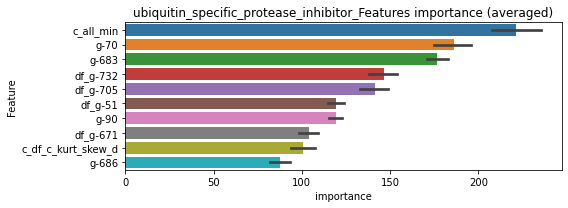

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 ubiquitin_specific_protease_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000394614	valid_1's binary_logloss: 0.00398551
Early stopping, best iteration is:
[1390]	training's binary_logloss: 0.000304998	valid_1's binary_logloss: 0.00382872


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 ubiquitin_specific_protease_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000409457	valid_1's binary_logloss: 0.000976799
[2000]	training's binary_logloss: 0.000250438	valid_1's binary_logloss: 0.000771343
Early stopping, best iteration is:
[2455]	training's binary_logloss: 0.000225437	valid_1's binary_logloss: 0.000740844


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 ubiquitin_specific_protease_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000397381	valid_1's binary_logloss: 0.00035754
[2000]	training's binary_logloss: 0.000242661	valid_1's binary_logloss: 0.000209383
[3000]	training's binary_logloss: 0.000199671	valid_1's binary_logloss: 0.00016588
[4000]	training's binary_logloss: 0.000179536	valid_1's binary_logloss: 0.000144727
[5000]	training's binary_logloss: 0.000168657	valid_1's binary_logloss: 0.000133205
[6000]	training's binary_logloss: 0.000161327	valid_1's binary_logloss: 0.00012539
[7000]	training's binary_logloss: 0.000156146	valid_1's binary_logloss: 0.00011984
[8000]	training's binary_logloss: 0.000152509	valid_1's binary_logloss: 0.000115801
Early stopping, best iteration is:
[8369]	training's binary_logloss: 0.000151396	valid_1's binary_logloss: 0.000114569


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 ubiquitin_specific_protease_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000417387	valid_1's binary_logloss: 0.000506172
[2000]	training's binary_logloss: 0.000249205	valid_1's binary_logloss: 0.000322773
[3000]	training's binary_logloss: 0.000199975	valid_1's binary_logloss: 0.000263828
[4000]	training's binary_logloss: 0.000180125	valid_1's binary_logloss: 0.000239205
[5000]	training's binary_logloss: 0.000170026	valid_1's binary_logloss: 0.000226357
[6000]	training's binary_logloss: 0.000164046	valid_1's binary_logloss: 0.000217363
Early stopping, best iteration is:
[6255]	training's binary_logloss: 0.000162669	valid_1's binary_logloss: 0.000215222


ubiquitin_specific_protease_inhibitor logloss: 0.0012248924765778692


neg labels: 3289 → selected neg labels: 3264


vegfr_inhibitor, len(trt): 170, len(othr): 3264
target_rate: 0.0071387 → Adj_target_rate: 0.0066081
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.020394	valid_1's binary_logloss: 0.159631
Early stopping, best iteration is:
[385]	training's binary_logloss: 0.0108341	valid_1's binary_logloss: 0.156039
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0208019	valid_1's binary_logloss: 0.114683
Early stopping, best iteration is:
[511]	training's binary_logloss: 0.00507325	valid_1's binary_logloss: 0.0987907
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0202337	valid_1's binary_logloss: 0.129384
Early stopping, best iteration is:
[552]	training's binary_logloss: 0.0039236	valid_1's binary_logloss: 0.120343
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0207135	valid_1's binary_logloss: 0.131326


1 / 3 AUC score:0.973
y_Threshold: 0.0362846, Threshold: 0.1891614, pos_neg_ratio: 0.8000000
Remove_noisy_data: 228 → Positive_corect_labels: 604/3688
p_label_rate: 0.0100452 Vs.target_rate: 0.00714
Num_p_label: 40.0, conf_0:0.13241, conf_1:0.24591


Early stopping, best iteration is:
[399]	training's binary_logloss: 0.00990474	valid_1's binary_logloss: 0.122288


threshold: 0.1891614, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 604.0/3688, y_label_rate: 0.1637744
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0131878	valid_1's binary_logloss: 0.106594
[600]	training's binary_logloss: 0.00216608	valid_1's binary_logloss: 0.092859
Early stopping, best iteration is:
[606]	training's binary_logloss: 0.00212015	valid_1's binary_logloss: 0.0925591
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0143204	valid_1's binary_logloss: 0.103279
Early stopping, best iteration is:
[525]	training's binary_logloss: 0.00313273	valid_1's binary_logloss: 0.0927314
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0141576	valid_1's binary_logloss: 0.105725
Early stopping, best iteration is:
[470]	training's binary_logloss: 0.00410984	valid_1's binary_logloss: 0.0934948
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0137998	valid_1's binary_logloss: 0.0923891
[600]	training's bi

2 / 3 AUC score:0.995
y_Threshold: 0.0441945, Threshold: 0.1891614, pos_neg_ratio: 0.8000000
Remove_noisy_data: 54 → Positive_corect_labels: 577.0/3634
p_label_rate: 0.0173280 Vs.target_rate: 0.00714
Num_p_label: 69.0, conf_0:0.15133, conf_1:0.22699
Num_p_label: 69.0, Expected: 28.4, Adj_threshold_1: 0.1891614
Num_p_label: 62.0, Expected: 28.4, Adj_threshold_2: 0.2191614
Num_p_label: 57.0, Expected: 28.4, Adj_threshold_3: 0.2491614
Num_p_label: 48.0, Expected: 28.4, Adj_threshold_4: 0.2791614
Num_p_label: 40.0, Expected: 28.4, Adj_threshold_5: 0.3091614
threshold: 0.3091614, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 577.0/3634, y_label_rate: 0.1587782
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0119244	valid_1's binary_logloss: 0.0959495
[600]	training's binary_logloss: 0.00195821	valid_1's binary_logloss: 0.0786151
Early stopping, best iteration is:
[574]	training's binary_logloss: 0.00215794	valid_1's binary_logloss: 0.0784746
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.011681	valid_1's binary_logloss: 0.0890128
Early stopping, best iteration is:
[487]	training's binary_logloss: 0.00325086	valid_1's binary_logloss: 0.0779592
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0124498	valid_1's binary_logloss: 0.0574772
[600]	training's binary_logloss: 0.00205423	valid_1's binary_logloss: 0.0365114
Early stopping, best iteration is:
[758]	training's binary_logloss: 0.00132092	valid_1's binary_logloss: 0.0341557
Training until validation scores don't improve for 30 rounds
[300]	training'

3 / 3 AUC score:0.998
y_Threshold: 0.0452123, Threshold: 0.3091614, pos_neg_ratio: 0.8000000
Remove_noisy_data: 28 → Positive_corect_labels: 563.0/3606
p_label_rate: 0.0105475 Vs.target_rate: 0.00714
Num_p_label: 42.0, conf_0:0.27825, conf_1:0.34008
threshold: 0.3091614, positive_p_label: 42.0/3982, p_label_rate: 0.0105475
positive_y_label: 563.0/3606, y_label_rate: 0.1561287


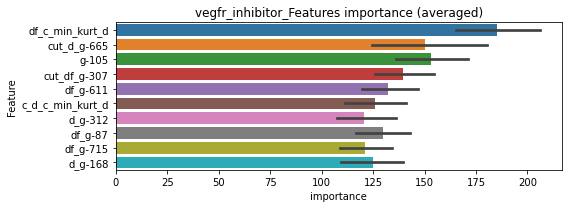

len(train_index) : 2704
len(valid_index) : 902
================================= fold 1/4 vegfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000602748	valid_1's binary_logloss: 0.00502483
Early stopping, best iteration is:
[975]	training's binary_logloss: 0.000617714	valid_1's binary_logloss: 0.00500214


len(train_index) : 2704
len(valid_index) : 902
================================= fold 2/4 vegfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00059669	valid_1's binary_logloss: 0.00184499
Early stopping, best iteration is:
[1226]	training's binary_logloss: 0.000500393	valid_1's binary_logloss: 0.00172308


len(train_index) : 2705
len(valid_index) : 901
================================= fold 3/4 vegfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00059883	valid_1's binary_logloss: 0.00291161
Early stopping, best iteration is:
[995]	training's binary_logloss: 0.000601545	valid_1's binary_logloss: 0.00290366


len(train_index) : 2705
len(valid_index) : 901
================================= fold 4/4 vegfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000603646	valid_1's binary_logloss: 0.00194397
Early stopping, best iteration is:
[1501]	training's binary_logloss: 0.000417191	valid_1's binary_logloss: 0.00171854


vegfr_inhibitor logloss: 0.0028378985541704727


neg labels: 3289 → selected neg labels: 3286


vitamin_b, len(trt): 26, len(othr): 3286
target_rate: 0.0010918 → Adj_target_rate: 0.0013394
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00186088	valid_1's binary_logloss: 0.00534421
[600]	training's binary_logloss: 0.000448643	valid_1's binary_logloss: 0.00227891
Early stopping, best iteration is:
[631]	training's binary_logloss: 0.000432934	valid_1's binary_logloss: 0.0022307
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00186257	valid_1's binary_logloss: 0.00714788
[600]	training's binary_logloss: 0.000438156	valid_1's binary_logloss: 0.0039113
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000438337	valid_1's binary_logloss: 0.00390963
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00183652	valid_1's binary_logloss: 0.00594988
[600]	training's binary_logloss: 0.000438478	valid_1's binary_logloss: 0.00290856
Early stopping, best iteration is:
[614]	training's binary_logloss: 0.000434661	valid_1's binary

1 / 3 AUC score:1.000
y_Threshold: 0.0026706, Threshold: 0.0108417, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00109
Num_p_label: 40.0, conf_0:0.00759, conf_1:0.01409
Num_p_label: 40.0, Expected: 4.3, Adj_threshold_1: 0.0108417
Num_p_label: 11.0, Expected: 4.3, Adj_threshold_2: 0.0408417
Num_p_label: 3.0, Expected: 4.3, Adj_threshold_3: 0.0708417
threshold: 0.0708417, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00169732	valid_1's binary_logloss: 0.00514497
[600]	training's binary_logloss: 0.000424405	valid_1's binary_logloss: 0.00226229
Early stopping, best iteration is:
[664]	training's binary_logloss: 0.000403712	valid_1's binary_logloss: 0.00221258
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00173232	valid_1's binary_logloss: 0.00562864
[600]	training's binary_logloss: 0.000423487	valid_1's binary_logloss: 0.00312216
Early stopping, best iteration is:
[598]	training's binary_logloss: 0.000423487	valid_1's binary_logloss: 0.00312216
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00174063	valid_1's binary_logloss: 0.00602924
[600]	training's binary_logloss: 0.00042813	valid_1's binary_logloss: 0.00330088
Early stopping, best iteration is:
[612]	training's binary_logloss: 0.000424511	valid_1's binar

2 / 3 AUC score:1.000
y_Threshold: 0.0454913, Threshold: 0.0708417, pos_neg_ratio: 0.8000000


[600]	training's binary_logloss: 0.000431605	valid_1's binary_logloss: 0.00515592
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000432652	valid_1's binary_logloss: 0.00515401


Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0087896 Vs.target_rate: 0.00109
Num_p_label: 35.0, conf_0:0.05667, conf_1:0.08501
Num_p_label: 35.0, Expected: 4.3, Adj_threshold_1: 0.0708417
Num_p_label: 20.0, Expected: 4.3, Adj_threshold_2: 0.1008417
Num_p_label: 14.0, Expected: 4.3, Adj_threshold_3: 0.1308417
Num_p_label: 12.0, Expected: 4.3, Adj_threshold_4: 0.1608417
Num_p_label: 11.0, Expected: 4.3, Adj_threshold_5: 0.1908417
Num_p_label: 10.0, Expected: 4.3, Adj_threshold_6: 0.2208417
threshold: 0.2208417, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00169732	valid_1's binary_logloss: 0.00514497
[600]	training's binary_logloss: 0.000424405	valid_1's binary_logloss: 0.00226229
Early stopping, best iteration is:
[664]	training's binary_logloss: 0.000403712	valid_1's binary_logloss: 0.00221258
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00173232	valid_1's binary_logloss: 0.00562864
[600]	training's binary_logloss: 0.000423487	valid_1's binary_logloss: 0.00312216
Early stopping, best iteration is:
[598]	training's binary_logloss: 0.000423487	valid_1's binary_logloss: 0.00312216
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00174063	valid_1's binary_logloss: 0.00602924
[600]	training's binary_logloss: 0.00042813	valid_1's binary_logloss: 0.00330088
Early stopping, best iteration is:
[612]	training's binary_logloss: 0.000424511	valid_1's binar

3 / 3 AUC score:1.000
y_Threshold: 0.0454913, Threshold: 0.2208417, pos_neg_ratio: 0.8000000


[600]	training's binary_logloss: 0.000431605	valid_1's binary_logloss: 0.00515592
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000432652	valid_1's binary_logloss: 0.00515401


Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0025113 Vs.target_rate: 0.00109
Num_p_label: 10.0, conf_0:0.19876, conf_1:0.24293
Num_p_label: 10.0, Expected: 4.3, Adj_threshold_1: 0.2208417
threshold: 0.2208417, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


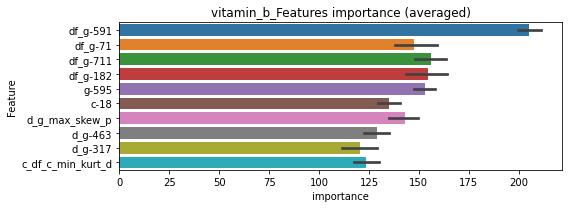

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 vitamin_b=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000465395	valid_1's binary_logloss: 0.000860515
[2000]	training's binary_logloss: 0.000282436	valid_1's binary_logloss: 0.000623748
Early stopping, best iteration is:
[2150]	training's binary_logloss: 0.000272369	valid_1's binary_logloss: 0.00060901


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 vitamin_b=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000474587	valid_1's binary_logloss: 0.00192059
Early stopping, best iteration is:
[1271]	training's binary_logloss: 0.000389399	valid_1's binary_logloss: 0.00178883


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 vitamin_b=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000464879	valid_1's binary_logloss: 0.00292802
Early stopping, best iteration is:
[1338]	training's binary_logloss: 0.000364589	valid_1's binary_logloss: 0.00281616


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 vitamin_b=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00047686	valid_1's binary_logloss: 0.00257778
Early stopping, best iteration is:
[1855]	training's binary_logloss: 0.000295028	valid_1's binary_logloss: 0.00227216


vitamin_b logloss: 0.001872266744954891


neg labels: 3289 → selected neg labels: 3284


vitamin_d_receptor_agonist, len(trt): 39, len(othr): 3284
target_rate: 0.0016377 → Adj_target_rate: 0.0018906
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00284538	valid_1's binary_logloss: 0.0131295
[600]	training's binary_logloss: 0.000609714	valid_1's binary_logloss: 0.00767293
Early stopping, best iteration is:
[690]	training's binary_logloss: 0.00053302	valid_1's binary_logloss: 0.00747334
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00306928	valid_1's binary_logloss: 0.0120469
[600]	training's binary_logloss: 0.000626171	valid_1's binary_logloss: 0.00649168
Early stopping, best iteration is:
[697]	training's binary_logloss: 0.000541578	valid_1's binary_logloss: 0.0063504
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00311677	valid_1's binary_logloss: 0.00735035
[600]	training's binary_logloss: 0.000636127	valid_1's binary_logloss: 0.00254896
Early stopping, best iteration is:
[675]	training's binary_logloss: 0.000563649	valid_1's binary_l

1 / 3 AUC score:1.000
y_Threshold: 0.0038048, Threshold: 0.0184988, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00164
Num_p_label: 40.0, conf_0:0.01295, conf_1:0.02405
Num_p_label: 40.0, Expected: 6.5, Adj_threshold_1: 0.0184988
Num_p_label: 11.0, Expected: 6.5, Adj_threshold_2: 0.0484988
threshold: 0.0484988, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00274637	valid_1's binary_logloss: 0.0127806
[600]	training's binary_logloss: 0.00058539	valid_1's binary_logloss: 0.00725854
Early stopping, best iteration is:
[674]	training's binary_logloss: 0.00052236	valid_1's binary_logloss: 0.00702706
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00277652	valid_1's binary_logloss: 0.0102254
[600]	training's binary_logloss: 0.000594207	valid_1's binary_logloss: 0.00506951
Early stopping, best iteration is:
[691]	training's binary_logloss: 0.000527113	valid_1's binary_logloss: 0.00489684
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00288625	valid_1's binary_logloss: 0.00651266
[600]	training's binary_logloss: 0.000604099	valid_1's binary_logloss: 0.00209451
Early stopping, best iteration is:
[797]	training's binary_logloss: 0.000512224	valid_1's binary_l

2 / 3 AUC score:1.000
y_Threshold: 0.0627765, Threshold: 0.0484988, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0087896 Vs.target_rate: 0.00164
Num_p_label: 35.0, conf_0:0.03880, conf_1:0.05820
Num_p_label: 35.0, Expected: 6.5, Adj_threshold_1: 0.0484988
Num_p_label: 19.0, Expected: 6.5, Adj_threshold_2: 0.0784988
Num_p_label: 13.0, Expected: 6.5, Adj_threshold_3: 0.1084988
threshold: 0.1084988, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00274637	valid_1's binary_logloss: 0.0127806
[600]	training's binary_logloss: 0.00058539	valid_1's binary_logloss: 0.00725854
Early stopping, best iteration is:
[674]	training's binary_logloss: 0.00052236	valid_1's binary_logloss: 0.00702706
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00277652	valid_1's binary_logloss: 0.0102254
[600]	training's binary_logloss: 0.000594207	valid_1's binary_logloss: 0.00506951
Early stopping, best iteration is:
[691]	training's binary_logloss: 0.000527113	valid_1's binary_logloss: 0.00489684
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00288625	valid_1's binary_logloss: 0.00651266
[600]	training's binary_logloss: 0.000604099	valid_1's binary_logloss: 0.00209451
Early stopping, best iteration is:
[797]	training's binary_logloss: 0.000512224	valid_1's binary_l

3 / 3 AUC score:1.000
y_Threshold: 0.0627765, Threshold: 0.1084988, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0032647 Vs.target_rate: 0.00164
Num_p_label: 13.0, conf_0:0.09765, conf_1:0.11935
Num_p_label: 13.0, Expected: 6.5, Adj_threshold_1: 0.1084988
threshold: 0.1084988, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


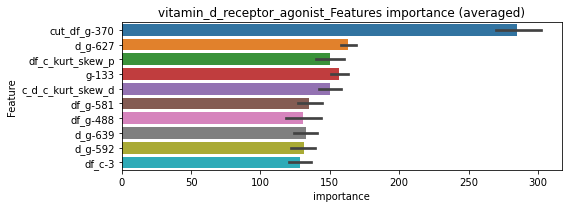

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 vitamin_d_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000517418	valid_1's binary_logloss: 0.00582642
Early stopping, best iteration is:
[1270]	training's binary_logloss: 0.000424177	valid_1's binary_logloss: 0.00563624


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 vitamin_d_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000502441	valid_1's binary_logloss: 0.00362565
Early stopping, best iteration is:
[1477]	training's binary_logloss: 0.000361519	valid_1's binary_logloss: 0.00347976


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 vitamin_d_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000521179	valid_1's binary_logloss: 0.000925598
[2000]	training's binary_logloss: 0.000304215	valid_1's binary_logloss: 0.000682429
Early stopping, best iteration is:
[2771]	training's binary_logloss: 0.000251079	valid_1's binary_logloss: 0.000626881


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 vitamin_d_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000515331	valid_1's binary_logloss: 0.00238758
Early stopping, best iteration is:
[1292]	training's binary_logloss: 0.000413969	valid_1's binary_logloss: 0.00227136


vitamin_d_receptor_agonist logloss: 0.0030042527738388565


neg labels: 3289 → selected neg labels: 3287


wnt_inhibitor, len(trt): 30, len(othr): 3287
target_rate: 0.0012598 → Adj_target_rate: 0.0015127
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00242258	valid_1's binary_logloss: 0.0066851
[600]	training's binary_logloss: 0.000515431	valid_1's binary_logloss: 0.00234724
Early stopping, best iteration is:
[671]	training's binary_logloss: 0.000467919	valid_1's binary_logloss: 0.0022188
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00228964	valid_1's binary_logloss: 0.0106652
[600]	training's binary_logloss: 0.000509906	valid_1's binary_logloss: 0.00567599
Early stopping, best iteration is:
[685]	training's binary_logloss: 0.000456868	valid_1's binary_logloss: 0.00544576
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00241911	valid_1's binary_logloss: 0.0052016
[600]	training's binary_logloss: 0.000522599	valid_1's binary_logloss: 0.00163982
Early stopping, best iteration is:
[674]	training's binary_logloss: 0.000471117	valid_1's binary_l

1 / 3 AUC score:1.000
y_Threshold: 0.0035947, Threshold: 0.0165831, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00126
Num_p_label: 40.0, conf_0:0.01161, conf_1:0.02156
Num_p_label: 40.0, Expected: 5.0, Adj_threshold_1: 0.0165831
Num_p_label: 17.0, Expected: 5.0, Adj_threshold_2: 0.0465831
Num_p_label: 8.0, Expected: 5.0, Adj_threshold_3: 0.0765831
threshold: 0.0765831, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00215484	valid_1's binary_logloss: 0.00563566
[600]	training's binary_logloss: 0.000489578	valid_1's binary_logloss: 0.00210275
Early stopping, best iteration is:
[672]	training's binary_logloss: 0.000455096	valid_1's binary_logloss: 0.00203139
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00209411	valid_1's binary_logloss: 0.00930233
[600]	training's binary_logloss: 0.000488315	valid_1's binary_logloss: 0.00472383
Early stopping, best iteration is:
[691]	training's binary_logloss: 0.000445563	valid_1's binary_logloss: 0.00456911
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00221717	valid_1's binary_logloss: 0.00412399
[600]	training's binary_logloss: 0.000493508	valid_1's binary_logloss: 0.00122025
Early stopping, best iteration is:
[729]	training's binary_logloss: 0.000434143	valid_1's bina

2 / 3 AUC score:1.000
y_Threshold: 0.0480522, Threshold: 0.0765831, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0047715 Vs.target_rate: 0.00126
Num_p_label: 19.0, conf_0:0.06127, conf_1:0.09190
Num_p_label: 19.0, Expected: 5.0, Adj_threshold_1: 0.0765831
Num_p_label: 15.0, Expected: 5.0, Adj_threshold_2: 0.1065831
Num_p_label: 8.0, Expected: 5.0, Adj_threshold_3: 0.1365831
threshold: 0.1365831, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00215484	valid_1's binary_logloss: 0.00563566
[600]	training's binary_logloss: 0.000489578	valid_1's binary_logloss: 0.00210275
Early stopping, best iteration is:
[672]	training's binary_logloss: 0.000455096	valid_1's binary_logloss: 0.00203139
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00209411	valid_1's binary_logloss: 0.00930233
[600]	training's binary_logloss: 0.000488315	valid_1's binary_logloss: 0.00472383
Early stopping, best iteration is:
[691]	training's binary_logloss: 0.000445563	valid_1's binary_logloss: 0.00456911
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00221717	valid_1's binary_logloss: 0.00412399
[600]	training's binary_logloss: 0.000493508	valid_1's binary_logloss: 0.00122025
Early stopping, best iteration is:
[729]	training's binary_logloss: 0.000434143	valid_1's bina

3 / 3 AUC score:1.000
y_Threshold: 0.0480522, Threshold: 0.1365831, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0020090 Vs.target_rate: 0.00126
Num_p_label: 8.0, conf_0:0.12292, conf_1:0.15024
Num_p_label: 8.0, Expected: 5.0, Adj_threshold_1: 0.1365831
threshold: 0.1365831, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


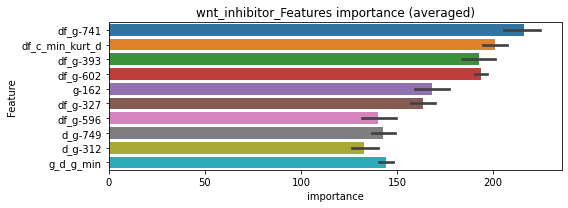

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 wnt_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000407546	valid_1's binary_logloss: 0.000531521
[2000]	training's binary_logloss: 0.000238492	valid_1's binary_logloss: 0.000312243
[3000]	training's binary_logloss: 0.000178804	valid_1's binary_logloss: 0.000234417
[4000]	training's binary_logloss: 0.000149702	valid_1's binary_logloss: 0.000196431
[5000]	training's binary_logloss: 0.000134554	valid_1's binary_logloss: 0.000176615
[6000]	training's binary_logloss: 0.000124757	valid_1's binary_logloss: 0.000163784
[7000]	training's binary_logloss: 0.000117892	valid_1's binary_logloss: 0.000154791
[8000]	training's binary_logloss: 0.000113178	valid_1's binary_logloss: 0.000148614
[9000]	training's binary_logloss: 0.000109796	valid_1's binary_logloss: 0.000144178
[10000]	training's binary_logloss: 0.000107432	valid_1's binary_logloss: 0.000141096
Did not meet early stopping. Best iteration is:
[9999]	training's binary_logloss: 0.000107432	vali

len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 wnt_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000466411	valid_1's binary_logloss: 0.00323542
Early stopping, best iteration is:
[1341]	training's binary_logloss: 0.000366043	valid_1's binary_logloss: 0.00309902


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 wnt_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000492738	valid_1's binary_logloss: 0.00070627
[2000]	training's binary_logloss: 0.000292407	valid_1's binary_logloss: 0.000477806
[3000]	training's binary_logloss: 0.000235625	valid_1's binary_logloss: 0.000414434
Early stopping, best iteration is:
[3959]	training's binary_logloss: 0.000209157	valid_1's binary_logloss: 0.000383181


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 wnt_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000469147	valid_1's binary_logloss: 0.000705007
[2000]	training's binary_logloss: 0.00027827	valid_1's binary_logloss: 0.000448737
[3000]	training's binary_logloss: 0.000219957	valid_1's binary_logloss: 0.000360906
[4000]	training's binary_logloss: 0.000192564	valid_1's binary_logloss: 0.000318551
[5000]	training's binary_logloss: 0.000178035	valid_1's binary_logloss: 0.000296733
[6000]	training's binary_logloss: 0.000169001	valid_1's binary_logloss: 0.000283136
[7000]	training's binary_logloss: 0.000162559	valid_1's binary_logloss: 0.000273312
[8000]	training's binary_logloss: 0.000157686	valid_1's binary_logloss: 0.000265518
Early stopping, best iteration is:
[8038]	training's binary_logloss: 0.000157412	valid_1's binary_logloss: 0.000265092


wnt_inhibitor logloss: 0.0009721142401318605


CV:0.0021617842911067302


In [50]:
RUN()